## [Face Keypoints Data Sit](https://www.kaggle.com/c/facial-keypoints-detection/data)

### Data Preprocessing

In [1]:
%matplotlib inline
import os
import sys
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

TRAIN_DATA_PATH = 'E:\\dataSets\\face-keypoints\\face-keypoints\\data\\train\\training.csv'
TEST_DATA_PATH = 'E:\\dataSets\\face-keypoints\\face-keypoints\\data\\test\\test.csv '
LOOKUP_TABLE = 'E:\\dataSets\\face-keypoints\\face-keypoints\\data\\IdLookupTable.csv'

In [2]:
def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = TEST_DATA_PATH if test else TRAIN_DATA_PATH
    df = pd.read_csv(fname)
    
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
    
    if cols:
        df = df[list(cols) + ['Image']]
        
    print(df.count())
    df = df.dropna() 
    
    X = np.vstack(df['Image'].values) / 255. 
    X = X.astype(np.float32) 
    
    if not test:
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48
        X, y = shuffle(X, y, random_state=42) 
        y = y.astype(np.float32)
    else:
        y = None
        
    return X, y

def load2d(test=False, cols=None):
    X, y = load(test=test, cols=cols)
    X = X.reshape(-1, 96, 96, 1) # 轉換成Conv2D的卷積層的input shape
    
    return X, y

## Method 1

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(9216,)))
model.add(Dense(30)) 

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Training
X, y = load()

print('X.shape == {}; X.min == {:.3f}; X.max == {:.3f}'.format(X.shape, X.min(), X.max()))
print('y.shape == {}; y.min == {:.3f}; y.max == {:.3f}'.format(y.shape, y.min(), y.max()))

batch_size = 32
epochs = 100

history = model.fit(X, y,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)


left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

X.shape == (2140, 9216); X.min == 0.000; X.max == 1.000
y.shape == (2140, 30); y.min == -0.920; y.max == 0.996


Train on 1712 samples, validate on 428 samples
Epoch 1/100


  32/1712 [..............................] - ETA: 9:38 - loss: 0.3556

 288/1712 [====>.........................] - ETA: 54s - loss: 0.1299 

 704/1712 [===========>..................] - ETA: 15s - loss: 0.0777

1088/1712 [==================>...........] - ETA: 6s - loss: 0.0563 

1472/1712 [========================>.....] - ETA: 1s - loss: 0.0455

1712/1712 [==============================] - 11s 7ms/step - loss: 0.0412 - val_loss: 0.0134


Epoch 2/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0131

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0131

 864/1712 [==============>...............] - ETA: 0s - loss: 0.0128

1408/1712 [=======================>......] - ETA: 0s - loss: 0.0126

1712/1712 [==============================] - 0s 123us/step - loss: 0.0126 - val_loss: 0.0115


Epoch 3/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0128



 576/1712 [=========>....................] - ETA: 0s - loss: 0.0109

1056/1712 [=================>............] - ETA: 0s - loss: 0.0110

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0109

1712/1712 [==============================] - 0s 112us/step - loss: 0.0108 - val_loss: 0.0117


Epoch 4/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0106

 448/1712 [======>.......................] - ETA: 0s - loss: 0.0099

 864/1712 [==============>...............] - ETA: 0s - loss: 0.0101

1312/1712 [=====================>........] - ETA: 0s - loss: 0.0102

1712/1712 [==============================] - 0s 140us/step - loss: 0.0100 - val_loss: 0.0098


Epoch 5/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0082

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0092

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0091

1376/1712 [=======================>......] - ETA: 0s - loss: 0.0091

1712/1712 [==============================] - 0s 136us/step - loss: 0.0091 - val_loss: 0.0092


Epoch 6/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0061

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0083

 832/1712 [=============>................] - ETA: 0s - loss: 0.0089

1280/1712 [=====================>........] - ETA: 0s - loss: 0.0088

1712/1712 [==============================] - 0s 143us/step - loss: 0.0088 - val_loss: 0.0086


Epoch 7/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0065

 448/1712 [======>.......................] - ETA: 0s - loss: 0.0083

 896/1712 [==============>...............] - ETA: 0s - loss: 0.0081

1312/1712 [=====================>........] - ETA: 0s - loss: 0.0082

1712/1712 [==============================] - 0s 143us/step - loss: 0.0082 - val_loss: 0.0087


Epoch 8/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0098

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0081

 800/1712 [=============>................] - ETA: 0s - loss: 0.0081

1216/1712 [====================>.........] - ETA: 0s - loss: 0.0080

1664/1712 [============================>.] - ETA: 0s - loss: 0.0078

1712/1712 [==============================] - 0s 148us/step - loss: 0.0078 - val_loss: 0.0108


Epoch 9/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0103

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0091

 864/1712 [==============>...............] - ETA: 0s - loss: 0.0083

1280/1712 [=====================>........] - ETA: 0s - loss: 0.0080



1664/1712 [============================>.] - ETA: 0s - loss: 0.0077

1712/1712 [==============================] - 0s 146us/step - loss: 0.0076 - val_loss: 0.0079


Epoch 10/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0075

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0070

 928/1712 [===============>..............] - ETA: 0s - loss: 0.0072



1440/1712 [========================>.....] - ETA: 0s - loss: 0.0072

1712/1712 [==============================] - 0s 125us/step - loss: 0.0072 - val_loss: 0.0076


Epoch 11/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0074

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0069

1120/1712 [==================>...........] - ETA: 0s - loss: 0.0069

1696/1712 [============================>.] - ETA: 0s - loss: 0.0070

1712/1712 [==============================] - 0s 106us/step - loss: 0.0070 - val_loss: 0.0076


Epoch 12/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0062

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0070

1056/1712 [=================>............] - ETA: 0s - loss: 0.0068

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0068



1712/1712 [==============================] - 0s 111us/step - loss: 0.0068 - val_loss: 0.0086


Epoch 13/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0086

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0068

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0065

1440/1712 [========================>.....] - ETA: 0s - loss: 0.0065

1712/1712 [==============================] - 0s 124us/step - loss: 0.0066 - val_loss: 0.0072


Epoch 14/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0063

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0064

 864/1712 [==============>...............] - ETA: 0s - loss: 0.0066

1376/1712 [=======================>......] - ETA: 0s - loss: 0.0065

1712/1712 [==============================] - 0s 135us/step - loss: 0.0064 - val_loss: 0.0070


Epoch 15/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0059

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0065

 832/1712 [=============>................] - ETA: 0s - loss: 0.0062

1184/1712 [===================>..........] - ETA: 0s - loss: 0.0062

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0062

1712/1712 [==============================] - 0s 152us/step - loss: 0.0063 - val_loss: 0.0068


Epoch 16/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0065

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0060



 864/1712 [==============>...............] - ETA: 0s - loss: 0.0061

1280/1712 [=====================>........] - ETA: 0s - loss: 0.0062

1696/1712 [============================>.] - ETA: 0s - loss: 0.0061

1712/1712 [==============================] - 0s 145us/step - loss: 0.0061 - val_loss: 0.0070


Epoch 17/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0049

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0056

 992/1712 [================>.............] - ETA: 0s - loss: 0.0059

1440/1712 [========================>.....] - ETA: 0s - loss: 0.0060



1712/1712 [==============================] - 0s 125us/step - loss: 0.0060 - val_loss: 0.0068


Epoch 18/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0077

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0058

1120/1712 [==================>...........] - ETA: 0s - loss: 0.0058

1696/1712 [============================>.] - ETA: 0s - loss: 0.0058

1712/1712 [==============================] - 0s 110us/step - loss: 0.0058 - val_loss: 0.0065


Epoch 19/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0050

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0056

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0057

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0058

1712/1712 [==============================] - 0s 117us/step - loss: 0.0057 - val_loss: 0.0078


Epoch 20/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0052



 544/1712 [========>.....................] - ETA: 0s - loss: 0.0056



1056/1712 [=================>............] - ETA: 0s - loss: 0.0055

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0056



1712/1712 [==============================] - 0s 117us/step - loss: 0.0055 - val_loss: 0.0065


Epoch 21/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0058



 544/1712 [========>.....................] - ETA: 0s - loss: 0.0054

1024/1712 [================>.............] - ETA: 0s - loss: 0.0053

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0054

1712/1712 [==============================] - 0s 115us/step - loss: 0.0054 - val_loss: 0.0061


Epoch 22/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0046

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0053

1024/1712 [================>.............] - ETA: 0s - loss: 0.0053

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0053

1712/1712 [==============================] - 0s 115us/step - loss: 0.0053 - val_loss: 0.0064


Epoch 23/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0069

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0058

1056/1712 [=================>............] - ETA: 0s - loss: 0.0055

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0053

1712/1712 [==============================] - 0s 115us/step - loss: 0.0053 - val_loss: 0.0064


Epoch 24/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0041



 480/1712 [=======>......................] - ETA: 0s - loss: 0.0051

1024/1712 [================>.............] - ETA: 0s - loss: 0.0053

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0053



1712/1712 [==============================] - 0s 120us/step - loss: 0.0053 - val_loss: 0.0058


Epoch 25/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0045



 512/1712 [=======>......................] - ETA: 0s - loss: 0.0051

1024/1712 [================>.............] - ETA: 0s - loss: 0.0051

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0051

1712/1712 [==============================] - 0s 115us/step - loss: 0.0051 - val_loss: 0.0056


Epoch 26/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0042

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0048

1024/1712 [================>.............] - ETA: 0s - loss: 0.0049

1472/1712 [========================>.....] - ETA: 0s - loss: 0.0049

1712/1712 [==============================] - 0s 121us/step - loss: 0.0049 - val_loss: 0.0060


Epoch 27/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0051

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0049

1024/1712 [================>.............] - ETA: 0s - loss: 0.0049

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0049



1712/1712 [==============================] - 0s 120us/step - loss: 0.0049 - val_loss: 0.0063


Epoch 28/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0055

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0045

 832/1712 [=============>................] - ETA: 0s - loss: 0.0048

1312/1712 [=====================>........] - ETA: 0s - loss: 0.0049

1712/1712 [==============================] - 0s 128us/step - loss: 0.0049 - val_loss: 0.0056


Epoch 29/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0057

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0048

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0047

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0047

1712/1712 [==============================] - 0s 109us/step - loss: 0.0047 - val_loss: 0.0054


Epoch 30/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0046

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0043

1056/1712 [=================>............] - ETA: 0s - loss: 0.0046

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0046

1712/1712 [==============================] - 0s 110us/step - loss: 0.0046 - val_loss: 0.0053


Epoch 31/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0039

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0046

1056/1712 [=================>............] - ETA: 0s - loss: 0.0046

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0046

1712/1712 [==============================] - 0s 110us/step - loss: 0.0046 - val_loss: 0.0056


Epoch 32/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0047

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0043

 992/1712 [================>.............] - ETA: 0s - loss: 0.0045

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0045

1712/1712 [==============================] - 0s 115us/step - loss: 0.0045 - val_loss: 0.0053


Epoch 33/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0058

 576/1712 [=========>....................] - ETA: 0s - loss: 0.0043

1120/1712 [==================>...........] - ETA: 0s - loss: 0.0043

1696/1712 [============================>.] - ETA: 0s - loss: 0.0044

1712/1712 [==============================] - 0s 107us/step - loss: 0.0044 - val_loss: 0.0052


Epoch 34/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0036

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0043

1056/1712 [=================>............] - ETA: 0s - loss: 0.0045

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0044

1712/1712 [==============================] - 0s 111us/step - loss: 0.0044 - val_loss: 0.0051


Epoch 35/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0057

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0042

1056/1712 [=================>............] - ETA: 0s - loss: 0.0043

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0044

1712/1712 [==============================] - 0s 112us/step - loss: 0.0044 - val_loss: 0.0056


Epoch 36/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0047

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0047

1056/1712 [=================>............] - ETA: 0s - loss: 0.0044

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0043

1712/1712 [==============================] - 0s 115us/step - loss: 0.0043 - val_loss: 0.0050


Epoch 37/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0037

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0040

 992/1712 [================>.............] - ETA: 0s - loss: 0.0040



1568/1712 [==========================>...] - ETA: 0s - loss: 0.0042

1712/1712 [==============================] - 0s 118us/step - loss: 0.0042 - val_loss: 0.0050


Epoch 38/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0033

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0040

1024/1712 [================>.............] - ETA: 0s - loss: 0.0041

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0041

1712/1712 [==============================] - 0s 121us/step - loss: 0.0041 - val_loss: 0.0051


Epoch 39/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0040

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0039



1024/1712 [================>.............] - ETA: 0s - loss: 0.0041



1536/1712 [=========================>....] - ETA: 0s - loss: 0.0041

1712/1712 [==============================] - 0s 124us/step - loss: 0.0041 - val_loss: 0.0053


Epoch 40/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0034

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0039

 992/1712 [================>.............] - ETA: 0s - loss: 0.0039

1472/1712 [========================>.....] - ETA: 0s - loss: 0.0040

1712/1712 [==============================] - 0s 123us/step - loss: 0.0040 - val_loss: 0.0053


Epoch 41/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0043

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0039

 896/1712 [==============>...............] - ETA: 0s - loss: 0.0039

1408/1712 [=======================>......] - ETA: 0s - loss: 0.0039

1712/1712 [==============================] - 0s 123us/step - loss: 0.0040 - val_loss: 0.0048


Epoch 42/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0044

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0042

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0041

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0040

1712/1712 [==============================] - 0s 120us/step - loss: 0.0040 - val_loss: 0.0048


Epoch 43/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0029

 576/1712 [=========>....................] - ETA: 0s - loss: 0.0037



1088/1712 [==================>...........] - ETA: 0s - loss: 0.0037

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0038

1712/1712 [==============================] - 0s 126us/step - loss: 0.0039 - val_loss: 0.0047


Epoch 44/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0043

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0039

 928/1712 [===============>..............] - ETA: 0s - loss: 0.0039

1440/1712 [========================>.....] - ETA: 0s - loss: 0.0038

1712/1712 [==============================] - 0s 128us/step - loss: 0.0038 - val_loss: 0.0046


Epoch 45/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0042

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0038



1056/1712 [=================>............] - ETA: 0s - loss: 0.0039

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0038

1712/1712 [==============================] - 0s 112us/step - loss: 0.0038 - val_loss: 0.0046


Epoch 46/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0033

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0037

1056/1712 [=================>............] - ETA: 0s - loss: 0.0037

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0038

1712/1712 [==============================] - 0s 111us/step - loss: 0.0038 - val_loss: 0.0049


Epoch 47/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0039

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0039

 928/1712 [===============>..............] - ETA: 0s - loss: 0.0038

1376/1712 [=======================>......] - ETA: 0s - loss: 0.0037

1712/1712 [==============================] - 0s 125us/step - loss: 0.0038 - val_loss: 0.0048


Epoch 48/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0040



 544/1712 [========>.....................] - ETA: 0s - loss: 0.0036

1056/1712 [=================>............] - ETA: 0s - loss: 0.0036

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0036



1712/1712 [==============================] - 0s 117us/step - loss: 0.0037 - val_loss: 0.0047


Epoch 49/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0035

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0037

1056/1712 [=================>............] - ETA: 0s - loss: 0.0038

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0037

1712/1712 [==============================] - 0s 119us/step - loss: 0.0037 - val_loss: 0.0060


Epoch 50/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0049



 544/1712 [========>.....................] - ETA: 0s - loss: 0.0036



1024/1712 [================>.............] - ETA: 0s - loss: 0.0038



1536/1712 [=========================>....] - ETA: 0s - loss: 0.0037

1712/1712 [==============================] - 0s 117us/step - loss: 0.0036 - val_loss: 0.0049


Epoch 51/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0039

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0036

1024/1712 [================>.............] - ETA: 0s - loss: 0.0035



1568/1712 [==========================>...] - ETA: 0s - loss: 0.0035

1712/1712 [==============================] - 0s 115us/step - loss: 0.0036 - val_loss: 0.0046


Epoch 52/100

  32/1712 [..............................] - ETA: 0s - loss: 0.0033

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0036

1024/1712 [================>.............] - ETA: 0s - loss: 0.0035

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0036

1712/1712 [==============================] - 0s 115us/step - loss: 0.0035 - val_loss: 0.0043


Epoch 53/100


  32/1712 [..............................]

 - ETA: 0s - loss: 0.0033

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0034

1056/1712 [=================>............] - ETA: 0s - loss: 0.0035



1600/1712 [===========================>..] - ETA: 0s - loss: 0.0035

1712/1712 [==============================] - 0s 115us/step - loss: 0.0035 - val_loss: 0.0043


Epoch 54/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0030

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0036

1024/1712 [================>.............] - ETA: 0s - loss: 0.0035

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0034

1712/1712 [==============================] - 0s 115us/step - loss: 0.0034 - val_loss: 0.0043


Epoch 55/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0030

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0038

1024/1712 [================>.............] - ETA: 0s - loss: 0.0036

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0035

1712/1712 [==============================] - 0s 114us/step - loss: 0.0035 - val_loss: 0.0044


Epoch 56/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0029

 448/1712 [======>.......................] - ETA: 0s - loss: 0.0033

 896/1712 [==============>...............] - ETA: 0s - loss: 0.0033

1440/1712 [========================>.....] - ETA: 0s - loss: 0.0033

1712/1712 [==============================] - 0s 125us/step - loss: 0.0033 - val_loss: 0.0042


Epoch 57/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0027

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0033

1024/1712 [================>.............] - ETA: 0s - loss: 0.0033

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0033



1712/1712 [==============================] - 0s 118us/step - loss: 0.0033 - val_loss: 0.0044


Epoch 58/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0033

1024/1712 [================>.............] - ETA: 0s - loss: 0.0033

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0033



1712/1712 [==============================] - 0s 117us/step - loss: 0.0033 - val_loss: 0.0044


Epoch 59/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0028

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0032

 992/1712 [================>.............]

 - ETA: 0s - loss: 0.0032

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0033

1712/1712 [==============================] - 0s 117us/step - loss: 0.0033 - val_loss: 0.0043


Epoch 60/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0031

1024/1712 [================>.............] - ETA: 0s - loss: 0.0032

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0033

1712/1712 [==============================] - 0s 116us/step - loss: 0.0033 - val_loss: 0.0043


Epoch 61/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0029



 480/1712 [=======>......................] - ETA: 0s - loss: 0.0031

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0031



1440/1712 [========================>.....] - ETA: 0s - loss: 0.0032

1712/1712 [==============================] - 0s 122us/step - loss: 0.0032 - val_loss: 0.0042


Epoch 62/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0043



 576/1712 [=========>....................] - ETA: 0s - loss: 0.0033



1088/1712 [==================>...........] - ETA: 0s - loss: 0.0032

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0032

1712/1712 [==============================] - 0s 113us/step - loss: 0.0032 - val_loss: 0.0042


Epoch 63/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0035

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0031

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0031

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0032

1712/1712 [==============================] - 0s 112us/step - loss: 0.0032 - val_loss: 0.0044


Epoch 64/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0031

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0031

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0031

1712/1712 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0044


Epoch 65/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0037

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0030

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0031



1664/1712 [============================>.] - ETA: 0s - loss: 0.0031

1712/1712 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0040


Epoch 66/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0029

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0032

1024/1712 [================>.............] - ETA: 0s - loss: 0.0031

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0031

1712/1712 [==============================] - 0s 113us/step - loss: 0.0031 - val_loss: 0.0041


Epoch 67/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0029

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0030

1056/1712 [=================>............] - ETA: 0s - loss: 0.0030

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0030

1712/1712 [==============================] - 0s 114us/step - loss: 0.0031 - val_loss: 0.0043


Epoch 68/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0027

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0031

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0031

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0031

1712/1712 [==============================] - 0s 113us/step - loss: 0.0031 - val_loss: 0.0040


Epoch 69/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0030

1024/1712 [================>.............] - ETA: 0s - loss: 0.0030

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0030

1712/1712 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0040


Epoch 70/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0033



 544/1712 [========>.....................] - ETA: 0s - loss: 0.0030



1056/1712 [=================>............] - ETA: 0s - loss: 0.0030

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0030



1712/1712 [==============================] - 0s 117us/step - loss: 0.0030 - val_loss: 0.0039


Epoch 71/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0035



 512/1712 [=======>......................] - ETA: 0s - loss: 0.0033

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0031



1504/1712 [=========================>....] - ETA: 0s - loss: 0.0030

1712/1712 [==============================] - 0s 124us/step - loss: 0.0030 - val_loss: 0.0039


Epoch 72/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0029

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0027



1056/1712 [=================>............] - ETA: 0s - loss: 0.0028

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 0s 114us/step - loss: 0.0029 - val_loss: 0.0039


Epoch 73/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0022

 576/1712 [=========>....................] - ETA: 0s - loss: 0.0027

1120/1712 [==================>...........] - ETA: 0s - loss: 0.0029

1664/1712 [============================>.] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0038


Epoch 74/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0029

1056/1712 [=================>............] - ETA: 0s - loss: 0.0029

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 0s 112us/step - loss: 0.0029 - val_loss: 0.0045


Epoch 75/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0033

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0028

1056/1712 [=================>............] - ETA: 0s - loss: 0.0028

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0028

1712/1712 [==============================] - 0s 111us/step - loss: 0.0029 - val_loss: 0.0039


Epoch 76/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0027

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0027

1024/1712 [================>.............] - ETA: 0s - loss: 0.0028

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0029



1712/1712 [==============================] - 0s 117us/step - loss: 0.0029 - val_loss: 0.0038


Epoch 77/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0030

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0028



 992/1712 [================>.............] - ETA: 0s - loss: 0.0028

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0028

1712/1712 [==============================] - 0s 119us/step - loss: 0.0028 - val_loss: 0.0039


Epoch 78/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0029

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0029

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 0s 111us/step - loss: 0.0029 - val_loss: 0.0038


Epoch 79/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0025

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0028

 896/1712 [==============>...............] - ETA: 0s - loss: 0.0028

1280/1712 [=====================>........] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 0s 135us/step - loss: 0.0028 - val_loss: 0.0040


Epoch 80/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0021

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0027

1056/1712 [=================>............] - ETA: 0s - loss: 0.0027

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0028

1712/1712 [==============================] - 0s 112us/step - loss: 0.0028 - val_loss: 0.0038


Epoch 81/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0032

 448/1712 [======>.......................] - ETA: 0s - loss: 0.0028

 992/1712 [================>.............] - ETA: 0s - loss: 0.0027

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0027



1712/1712 [==============================] - 0s 123us/step - loss: 0.0028 - val_loss: 0.0037


Epoch 82/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0027

1024/1712 [================>.............] - ETA: 0s - loss: 0.0027

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0027



1712/1712 [==============================] - 0s 119us/step - loss: 0.0027 - val_loss: 0.0037


Epoch 83/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0029



1024/1712 [================>.............] - ETA: 0s - loss: 0.0028



1536/1712 [=========================>....] - ETA: 0s - loss: 0.0027



1712/1712 [==============================] - 0s 120us/step - loss: 0.0027 - val_loss: 0.0040


Epoch 84/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0027

 992/1712 [================>.............] - ETA: 0s - loss: 0.0027



1408/1712 [=======================>......] - ETA: 0s - loss: 0.0027

1712/1712 [==============================] - 0s 127us/step - loss: 0.0027 - val_loss: 0.0036


Epoch 85/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0032

 576/1712 [=========>....................] - ETA: 0s - loss: 0.0030

1120/1712 [==================>...........] - ETA: 0s - loss: 0.0028

1664/1712 [============================>.] - ETA: 0s - loss: 0.0027

1712/1712 [==============================] - 0s 110us/step - loss: 0.0027 - val_loss: 0.0037


Epoch 86/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0027

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0026

 992/1712 [================>.............] - ETA: 0s - loss: 0.0027

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0027



1712/1712 [==============================] - 0s 118us/step - loss: 0.0027 - val_loss: 0.0038


Epoch 87/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0028

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0027

1056/1712 [=================>............] - ETA: 0s - loss: 0.0027

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0027

1712/1712 [==============================] - 0s 113us/step - loss: 0.0027 - val_loss: 0.0036


Epoch 88/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0032

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0027

1056/1712 [=================>............] - ETA: 0s - loss: 0.0026

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0026

1712/1712 [==============================] - 0s 112us/step - loss: 0.0026 - val_loss: 0.0037


Epoch 89/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0018

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0027

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0026

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0026

1712/1712 [==============================] - 0s 112us/step - loss: 0.0026 - val_loss: 0.0036


Epoch 90/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0024

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0025

1056/1712 [=================>............] - ETA: 0s - loss: 0.0026

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0026

1712/1712 [==============================] - 0s 115us/step - loss: 0.0026 - val_loss: 0.0036


Epoch 91/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0024

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0026

 992/1712 [================>.............] - ETA: 0s - loss: 0.0026

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0026



1712/1712 [==============================] - 0s 122us/step - loss: 0.0026 - val_loss: 0.0038


Epoch 92/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0025

1056/1712 [=================>............] - ETA: 0s - loss: 0.0025

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0025

1712/1712 [==============================] - 0s 114us/step - loss: 0.0025 - val_loss: 0.0036


Epoch 93/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0028

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0027

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0026

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0026

1712/1712 [==============================] - 0s 111us/step - loss: 0.0026 - val_loss: 0.0037


Epoch 94/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0024

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0024

 992/1712 [================>.............] - ETA: 0s - loss: 0.0027

1472/1712 [========================>.....] - ETA: 0s - loss: 0.0026



1712/1712 [==============================] - 0s 119us/step - loss: 0.0026 - val_loss: 0.0037


Epoch 95/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 576/1712 [=========>....................] - ETA: 0s - loss: 0.0026

1024/1712 [================>.............] - ETA: 0s - loss: 0.0025



1568/1712 [==========================>...] - ETA: 0s - loss: 0.0025



1712/1712 [==============================] - 0s 118us/step - loss: 0.0025 - val_loss: 0.0035


Epoch 96/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0025



 512/1712 [=======>......................] - ETA: 0s - loss: 0.0025

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0026



1472/1712 [========================>.....] - ETA: 0s - loss: 0.0025

1712/1712 [==============================] - 0s 122us/step - loss: 0.0025 - val_loss: 0.0035


Epoch 97/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0028

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0025



1056/1712 [=================>............] - ETA: 0s - loss: 0.0024

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 0s 119us/step - loss: 0.0025 - val_loss: 0.0038


Epoch 98/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0030

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0025

1056/1712 [=================>............] - ETA: 0s - loss: 0.0025

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 0s 114us/step - loss: 0.0024 - val_loss: 0.0035


Epoch 99/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0024

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0024

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 0s 119us/step - loss: 0.0024 - val_loss: 0.0035


Epoch 100/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0016



 512/1712 [=======>......................] - ETA: 0s - loss: 0.0023

1024/1712 [================>.............] - ETA: 0s - loss: 0.0025

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 0s 118us/step - loss: 0.0024 - val_loss: 0.0036


### Display results

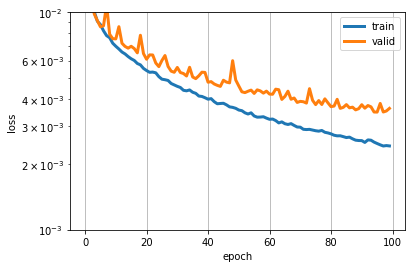

In [7]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, linewidth=3, label='train')
plt.plot(val_loss, linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(1e-3, 1e-2)
plt.yscale('log')
plt.show()




### Evaluation

In [8]:
X_test, _ = load(test=True)
y_pred = model.predict(X_test)

ImageId    1783
Image      1783
dtype: int64


In [9]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

In [10]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, aticks=[], yticks=[])
    plot_sample(X_test[i], y_pred[i], ax)
    
plt.show()

## Method 2

In [11]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [12]:
class FlippedImageDataGenerator(ImageDataGenerator):
    flip_indices = [(0, 2), (1, 3), (4, 8), (5, 9),
                    (6, 10), (7, 11), (12, 16), (13, 17),
                    (14, 18), (15, 19), (22, 24), (23, 25)]
    
    def next(self):
        X_batch, y_batch = super(FlippedImageDataGenerator, self).next()
        batch_size = X_batch.shape[0]
        indices = np.random.choice(batch_size, batch_size / 2, replace=False)
        X_batch[indices] = X_batch[indices, :, :, ::-1]
        
        if y_batch is not None:
            y_batch[indices, ::2] = y_batch[indices,::2] * -1
            
            for a, b in self.flip_indices:
                y_batch[indices, a], y_batch[indices, b] = (
                    y_batch[indices, b], y_batch[indices, a]
                )
                
        return X_batch, y_batch

### Model

In [13]:
def cnn_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same',
                     activation='relu',
                     kernel_initializer='he_normal',
                     input_shape=(96, 96, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(30))
    
    return model

model2 = cnn_model()
model2.summary()


sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model2.compile(loss='mean_squared_error', optimizer=sgd)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
__________

### Training

In [14]:
X, y = load2d()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

epochs = 30

flipgen = FlippedImageDataGenerator()
history = model2.fit_generator(flipgen.flow(X_train, y_train),
                               steps_per_epoch=len(X_train),
                               epochs=epochs,
                               validation_data=(X_val, y_val))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

Epoch 1/30


   1/1712 [..............................] - ETA: 3:16:06 - loss: 0.3909

   3/1712 [..............................] - ETA: 1:05:57 - loss: 0.1996

   5/1712 [..............................] - ETA: 39:55 - loss: 0.1546  

   7/1712 [..............................] - ETA: 28:45 - loss: 0.1329

   9/1712 [..............................] - ETA: 22:33 - loss: 0.1185

  11/1712 [..............................] - ETA: 18:36 - loss: 0.1086



  13/1712 [..............................] - ETA: 15:52 - loss: 0.1015



  15/1712 [..............................] - ETA: 13:51 - loss: 0.0969

  17/1712 [..............................] - ETA: 12:20 - loss: 0.0929

  19/1712 [..............................] - ETA: 11:07 - loss: 0.0893

  20/1712 [..............................] - ETA: 10:47 - loss: 0.0875

  22/1712 [..............................] - ETA: 9:52 - loss: 0.0843 

  24/1712 [..............................] - ETA: 9:07 - loss: 0.0817

  26/1712 [..............................] - ETA: 8:28 - loss: 0.0796



  28/1712 [..............................] - ETA: 7:56 - loss: 0.0778



  30/1712 [..............................] - ETA: 7:27 - loss: 0.0759



  32/1712 [..............................] - ETA: 7:02 - loss: 0.0741

  34/1712 [..............................] - ETA: 6:40 - loss: 0.0726

  36/1712 [..............................] - ETA: 6:21 - loss: 0.0709

  38/1712 [..............................] - ETA: 6:03 - loss: 0.0692

  40/1712 [..............................] - ETA: 5:47 - loss: 0.0679

  42/1712 [..............................] - ETA: 5:33 - loss: 0.0666

  44/1712 [..............................] - ETA: 5:20 - loss: 0.0655

  46/1712 [..............................] - ETA: 5:08 - loss: 0.0643

  48/1712 [..............................] - ETA: 4:57 - loss: 0.0633

  50/1712 [..............................] - ETA: 4:47 - loss: 0.0623

  52/1712 [..............................] - ETA: 4:38 - loss: 0.0613

  54/1712 [..............................] - ETA: 4:29 - loss: 0.0604

  55/1712 [..............................] - ETA: 4:26 - loss: 0.0598

  57/1712 [..............................] - ETA: 4:18 - loss: 0.0589

  59/1712 [>.............................] - ETA: 4:11 - loss: 0.0583

  61/1712 [>.............................] - ETA: 4:04 - loss: 0.0575



  63/1712 [>.............................] - ETA: 3:58 - loss: 0.0567



  65/1712 [>.............................] - ETA: 3:52 - loss: 0.0558



  67/1712 [>.............................] - ETA: 3:46 - loss: 0.0552



  69/1712 [>.............................] - ETA: 3:41 - loss: 0.0545



  71/1712 [>.............................] - ETA: 3:36 - loss: 0.0539

  73/1712 [>.............................] - ETA: 3:32 - loss: 0.0534



  75/1712 [>.............................] - ETA: 3:27 - loss: 0.0528



  77/1712 [>.............................] - ETA: 3:23 - loss: 0.0522



  79/1712 [>.............................] - ETA: 3:19 - loss: 0.0517



  81/1712 [>.............................] - ETA: 3:15 - loss: 0.0510

  83/1712 [>.............................] - ETA: 3:12 - loss: 0.0505

  85/1712 [>.............................] - ETA: 3:08 - loss: 0.0501

  87/1712 [>.............................] - ETA: 3:05 - loss: 0.0495

  89/1712 [>.............................] - ETA: 3:02 - loss: 0.0491



  91/1712 [>.............................] - ETA: 2:59 - loss: 0.0486

  93/1712 [>.............................] - ETA: 2:56 - loss: 0.0481

  95/1712 [>.............................] - ETA: 2:53 - loss: 0.0477

  97/1712 [>.............................] - ETA: 2:50 - loss: 0.0473

  99/1712 [>.............................] - ETA: 2:48 - loss: 0.0468

 101/1712 [>.............................] - ETA: 2:45 - loss: 0.0465

 103/1712 [>.............................] - ETA: 2:43 - loss: 0.0460

 105/1712 [>.............................] - ETA: 2:40 - loss: 0.0456

 107/1712 [>.............................] - ETA: 2:38 - loss: 0.0452

 109/1712 [>.............................] - ETA: 2:37 - loss: 0.0448

 111/1712 [>.............................] - ETA: 2:35 - loss: 0.0444

 113/1712 [>.............................] - ETA: 2:33 - loss: 0.0441

 115/1712 [=>............................] - ETA: 2:31 - loss: 0.0437



 117/1712 [=>............................] - ETA: 2:29 - loss: 0.0434



 119/1712 [=>............................] - ETA: 2:27 - loss: 0.0431

 121/1712 [=>............................] - ETA: 2:25 - loss: 0.0427

 123/1712 [=>............................] - ETA: 2:24 - loss: 0.0423

 125/1712 [=>............................] - ETA: 2:22 - loss: 0.0420

 127/1712 [=>............................] - ETA: 2:20 - loss: 0.0417

 129/1712 [=>............................] - ETA: 2:19 - loss: 0.0414

 131/1712 [=>............................] - ETA: 2:17 - loss: 0.0411

 133/1712 [=>............................] - ETA: 2:16 - loss: 0.0409



 135/1712 [=>............................] - ETA: 2:15 - loss: 0.0406



 137/1712 [=>............................] - ETA: 2:13 - loss: 0.0403

 139/1712 [=>............................] - ETA: 2:12 - loss: 0.0400

 141/1712 [=>............................] - ETA: 2:10 - loss: 0.0397

 143/1712 [=>............................] - ETA: 2:09 - loss: 0.0395



 145/1712 [=>............................] - ETA: 2:08 - loss: 0.0392



 147/1712 [=>............................] - ETA: 2:07 - loss: 0.0390

 149/1712 [=>............................] - ETA: 2:06 - loss: 0.0387



 151/1712 [=>............................] - ETA: 2:04 - loss: 0.0385

 153/1712 [=>............................] - ETA: 2:03 - loss: 0.0382

 155/1712 [=>............................] - ETA: 2:02 - loss: 0.0380

 157/1712 [=>............................] - ETA: 2:01 - loss: 0.0378

 159/1712 [=>............................] - ETA: 2:00 - loss: 0.0376

 161/1712 [=>............................] - ETA: 1:59 - loss: 0.0373

 163/1712 [=>............................] - ETA: 1:59 - loss: 0.0371

 165/1712 [=>............................] - ETA: 1:58 - loss: 0.0370

 167/1712 [=>............................] - ETA: 1:57 - loss: 0.0367

 169/1712 [=>............................] - ETA: 1:56 - loss: 0.0365

 171/1712 [=>............................] - ETA: 1:55 - loss: 0.0363

 173/1712 [==>...........................] - ETA: 1:54 - loss: 0.0362

 175/1712 [==>...........................] - ETA: 1:53 - loss: 0.0360

 177/1712 [==>...........................] - ETA: 1:52 - loss: 0.0357

 179/1712 [==>...........................] - ETA: 1:51 - loss: 0.0355

 181/1712 [==>...........................]

 - ETA: 1:50 - loss: 0.0354



 183/1712 [==>...........................] - ETA: 1:50 - loss: 0.0352

 185/1712 [==>...........................] - ETA: 1:49 - loss: 0.0350

 187/1712 [==>...........................] - ETA: 1:48 - loss: 0.0349

 189/1712 [==>...........................] - ETA: 1:47 - loss: 0.0347



 191/1712 [==>...........................] - ETA: 1:47 - loss: 0.0345

 193/1712 [==>...........................] - ETA: 1:46 - loss: 0.0343



 195/1712 [==>...........................] - ETA: 1:45 - loss: 0.0341



 197/1712 [==>...........................] - ETA: 1:44 - loss: 0.0340

 199/1712 [==>...........................] - ETA: 1:44 - loss: 0.0338

 201/1712 [==>...........................] - ETA: 1:43 - loss: 0.0336

 203/1712 [==>...........................] - ETA: 1:42 - loss: 0.0335

 205/1712 [==>...........................] - ETA: 1:42 - loss: 0.0333

 207/1712 [==>...........................] - ETA: 1:41 - loss: 0.0332

 209/1712 [==>...........................]

 - ETA: 1:40 - loss: 0.0330

 211/1712 [==>...........................] - ETA: 1:40 - loss: 0.0329

 213/1712 [==>...........................] - ETA: 1:39 - loss: 0.0327

 215/1712 [==>...........................] - ETA: 1:39 - loss: 0.0326

 217/1712 [==>...........................] - ETA: 1:38 - loss: 0.0324

 219/1712 [==>...........................] - ETA: 1:38 - loss: 0.0323

 221/1712 [==>...........................] - ETA: 1:37 - loss: 0.0321



 223/1712 [==>...........................] - ETA: 1:37 - loss: 0.0320



 225/1712 [==>...........................] - ETA: 1:36 - loss: 0.0319



 227/1712 [==>...........................] - ETA: 1:36 - loss: 0.0317

 229/1712 [===>..........................] - ETA: 1:35 - loss: 0.0316



 231/1712 [===>..........................] - ETA: 1:35 - loss: 0.0315

 233/1712 [===>..........................] - ETA: 1:34 - loss: 0.0313

 235/1712 [===>..........................] - ETA: 1:33 - loss: 0.0312

 237/1712 [===>..........................] - ETA: 1:33 - loss: 0.0311

 239/1712 [===>..........................] - ETA: 1:32 - loss: 0.0309

 241/1712 [===>..........................] - ETA: 1:32 - loss: 0.0308

 243/1712 [===>..........................] - ETA: 1:32 - loss: 0.0307

 245/1712 [===>..........................] - ETA: 1:31 - loss: 0.0306

 247/1712 [===>..........................] - ETA: 1:31 - loss: 0.0304

 249/1712 [===>..........................] - ETA: 1:30 - loss: 0.0303

 251/1712 [===>..........................] - ETA: 1:30 - loss: 0.0302

 253/1712 [===>..........................] - ETA: 1:29 - loss: 0.0301

 255/1712 [===>..........................] - ETA: 1:29 - loss: 0.0300

 257/1712 [===>..........................] - ETA: 1:28 - loss: 0.0298

 259/1712 [===>..........................] - ETA: 1:28 - loss: 0.0297

 261/1712 [===>..........................] - ETA: 1:27 - loss: 0.0296



 263/1712 [===>..........................] - ETA: 1:27 - loss: 0.0295



 265/1712 [===>..........................] - ETA: 1:27 - loss: 0.0294

 267/1712 [===>..........................] - ETA: 1:26 - loss: 0.0293

 269/1712 [===>..........................] - ETA: 1:26 - loss: 0.0292

 271/1712 [===>..........................] - ETA: 1:26 - loss: 0.0291

 273/1712 [===>..........................] - ETA: 1:25 - loss: 0.0290

 275/1712 [===>..........................] - ETA: 1:25 - loss: 0.0289

 277/1712 [===>..........................] - ETA: 1:24 - loss: 0.0288



 279/1712 [===>..........................] - ETA: 1:24 - loss: 0.0287



 281/1712 [===>..........................] - ETA: 1:24 - loss: 0.0286



 283/1712 [===>..........................] - ETA: 1:23 - loss: 0.0285



 285/1712 [===>..........................] - ETA: 1:23 - loss: 0.0284



 287/1712 [====>.........................] - ETA: 1:22 - loss: 0.0283



 289/1712 [====>.........................] - ETA: 1:22 - loss: 0.0282



 291/1712 [====>.........................] - ETA: 1:22 - loss: 0.0281



 293/1712 [====>.........................] - ETA: 1:21 - loss: 0.0280



 295/1712 [====>.........................] - ETA: 1:21 - loss: 0.0279

 297/1712 [====>.........................] - ETA: 1:21 - loss: 0.0278



 299/1712 [====>.........................] - ETA: 1:20 - loss: 0.0277

 301/1712 [====>.........................] - ETA: 1:20 - loss: 0.0276

 303/1712 [====>.........................] - ETA: 1:20 - loss: 0.0276



 305/1712 [====>.........................] - ETA: 1:19 - loss: 0.0275

 307/1712 [====>.........................] - ETA: 1:19 - loss: 0.0274



 309/1712 [====>.........................] - ETA: 1:19 - loss: 0.0273



 311/1712 [====>.........................] - ETA: 1:18 - loss: 0.0272



 313/1712 [====>.........................] - ETA: 1:18 - loss: 0.0271

 315/1712 [====>.........................] - ETA: 1:18 - loss: 0.0270

 317/1712 [====>.........................] - ETA: 1:17 - loss: 0.0269

 319/1712 [====>.........................] - ETA: 1:17 - loss: 0.0268

 321/1712 [====>.........................] - ETA: 1:17 - loss: 0.0268

 323/1712 [====>.........................] - ETA: 1:16 - loss: 0.0267

 325/1712 [====>.........................] - ETA: 1:16 - loss: 0.0266

 327/1712 [====>.........................] - ETA: 1:16 - loss: 0.0266

 329/1712 [====>.........................] - ETA: 1:16 - loss: 0.0265

 331/1712 [====>.........................] - ETA: 1:16 - loss: 0.0264

 333/1712 [====>.........................] - ETA: 1:15 - loss: 0.0263

 335/1712 [====>.........................] - ETA: 1:15 - loss: 0.0262

 337/1712 [====>.........................] - ETA: 1:15 - loss: 0.0261

 339/1712 [====>.........................] - ETA: 1:14 - loss: 0.0260

 341/1712 [====>.........................] - ETA: 1:14 - loss: 0.0260

 343/1712 [=====>........................] - ETA: 1:14 - loss: 0.0259

 345/1712 [=====>........................] - ETA: 1:13 - loss: 0.0258

 347/1712 [=====>........................] - ETA: 1:13 - loss: 0.0258

 349/1712 [=====>........................] - ETA: 1:13 - loss: 0.0257

 351/1712 [=====>........................] - ETA: 1:13 - loss: 0.0256

 353/1712 [=====>........................] - ETA: 1:12 - loss: 0.0255



 355/1712 [=====>........................] - ETA: 1:12 - loss: 0.0255

 357/1712 [=====>........................] - ETA: 1:12 - loss: 0.0254



 359/1712 [=====>........................] - ETA: 1:12 - loss: 0.0253



 361/1712 [=====>........................] - ETA: 1:11 - loss: 0.0252

 363/1712 [=====>........................] - ETA: 1:11 - loss: 0.0252

 365/1712 [=====>........................] - ETA: 1:11 - loss: 0.0251

 367/1712 [=====>........................] - ETA: 1:11 - loss: 0.0250

 369/1712 [=====>........................] - ETA: 1:10 - loss: 0.0250

 371/1712 [=====>........................] - ETA: 1:10 - loss: 0.0249

 373/1712 [=====>........................] - ETA: 1:10 - loss: 0.0248

 375/1712 [=====>........................] - ETA: 1:10 - loss: 0.0248

 377/1712 [=====>........................] - ETA: 1:09 - loss: 0.0247

 379/1712 [=====>........................] - ETA: 1:09 - loss: 0.0246

 381/1712 [=====>........................] - ETA: 1:09 - loss: 0.0246

 383/1712 [=====>........................] - ETA: 1:09 - loss: 0.0245

 385/1712 [=====>........................] - ETA: 1:09 - loss: 0.0244

 387/1712 [=====>........................] - ETA: 1:08 - loss: 0.0244

 389/1712 [=====>........................] - ETA: 1:08 - loss: 0.0243

 391/1712 [=====>........................] - ETA: 1:08 - loss: 0.0242

 393/1712 [=====>........................] - ETA: 1:08 - loss: 0.0242

 395/1712 [=====>........................] - ETA: 1:07 - loss: 0.0241

 397/1712 [=====>........................] - ETA: 1:07 - loss: 0.0240

 399/1712 [=====>........................] - ETA: 1:07 - loss: 0.0240

 401/1712 [======>.......................] - ETA: 1:07 - loss: 0.0239

 403/1712 [======>.......................] - ETA: 1:07 - loss: 0.0239

 405/1712 [======>.......................] - ETA: 1:06 - loss: 0.0238

 407/1712 [======>.......................] - ETA: 1:06 - loss: 0.0237

 409/1712 [======>.......................] - ETA: 1:06 - loss: 0.0237

 411/1712 [======>.......................] - ETA: 1:06 - loss: 0.0236

 413/1712 [======>.......................] - ETA: 1:05 - loss: 0.0236

 415/1712 [======>.......................] - ETA: 1:05 - loss: 0.0235

 417/1712 [======>.......................] - ETA: 1:05 - loss: 0.0235

 419/1712 [======>.......................] - ETA: 1:05 - loss: 0.0234

 421/1712 [======>.......................] - ETA: 1:05 - loss: 0.0234

 423/1712 [======>.......................] - ETA: 1:04 - loss: 0.0233

 425/1712 [======>.......................] - ETA: 1:04 - loss: 0.0232

 427/1712 [======>.......................] - ETA: 1:04 - loss: 0.0232

 429/1712 [======>.......................] - ETA: 1:04 - loss: 0.0231

 431/1712 [======>.......................] - ETA: 1:04 - loss: 0.0231

 433/1712 [======>.......................] - ETA: 1:04 - loss: 0.0230

 435/1712 [======>.......................] - ETA: 1:03 - loss: 0.0230

 437/1712 [======>.......................] - ETA: 1:03 - loss: 0.0229



 439/1712 [======>.......................] - ETA: 1:03 - loss: 0.0229



 441/1712 [======>.......................] - ETA: 1:03 - loss: 0.0228

 443/1712 [======>.......................] - ETA: 1:03 - loss: 0.0227



 445/1712 [======>.......................] - ETA: 1:02 - loss: 0.0227



 447/1712 [======>.......................] - ETA: 1:02 - loss: 0.0226



 449/1712 [======>.......................] - ETA: 1:02 - loss: 0.0226



 451/1712 [======>.......................] - ETA: 1:02 - loss: 0.0225



 453/1712 [======>.......................] - ETA: 1:02 - loss: 0.0225



 455/1712 [======>.......................] - ETA: 1:01 - loss: 0.0224



 457/1712 [=======>......................] - ETA: 1:01 - loss: 0.0224



 459/1712 [=======>......................] - ETA: 1:01 - loss: 0.0223

 461/1712 [=======>......................] - ETA: 1:01 - loss: 0.0223

 463/1712 [=======>......................] - ETA: 1:01 - loss: 0.0222

 465/1712 [=======>......................] - ETA: 1:00 - loss: 0.0222

 467/1712 [=======>......................] - ETA: 1:00 - loss: 0.0221

 469/1712 [=======>......................] - ETA: 1:00 - loss: 0.0221

 471/1712 [=======>......................] - ETA: 1:00 - loss: 0.0220



 473/1712 [=======>......................] - ETA: 1:00 - loss: 0.0220



 475/1712 [=======>......................] - ETA: 1:00 - loss: 0.0219

 477/1712 [=======>......................] - ETA: 59s - loss: 0.0219 



 479/1712 [=======>......................] - ETA: 59s - loss: 0.0218



 481/1712 [=======>......................] - ETA: 59s - loss: 0.0218



 483/1712 [=======>......................] - ETA: 59s - loss: 0.0217



 485/1712 [=======>......................] - ETA: 59s - loss: 0.0217

 487/1712 [=======>......................] - ETA: 59s - loss: 0.0217

 489/1712 [=======>......................] - ETA: 58s - loss: 0.0216

 491/1712 [=======>......................] - ETA: 58s - loss: 0.0216



 493/1712 [=======>......................] - ETA: 58s - loss: 0.0215

 495/1712 [=======>......................] - ETA: 58s - loss: 0.0215

 497/1712 [=======>......................] - ETA: 58s - loss: 0.0214



 499/1712 [=======>......................] - ETA: 58s - loss: 0.0214



 501/1712 [=======>......................] - ETA: 57s - loss: 0.0213



 503/1712 [=======>......................] - ETA: 57s - loss: 0.0213

 505/1712 [=======>......................] - ETA: 57s - loss: 0.0213

 507/1712 [=======>......................] - ETA: 57s - loss: 0.0212

 509/1712 [=======>......................] - ETA: 57s - loss: 0.0212

 511/1712 [=======>......................] - ETA: 57s - loss: 0.0211

 513/1712 [=======>......................] - ETA: 56s - loss: 0.0211

 515/1712 [========>.....................] - ETA: 56s - loss: 0.0210

 517/1712 [========>.....................] - ETA: 56s - loss: 0.0210

 519/1712 [========>.....................] - ETA: 56s - loss: 0.0210

 521/1712 [========>.....................] - ETA: 56s - loss: 0.0209

 523/1712 [========>.....................] - ETA: 56s - loss: 0.0209

 525/1712 [========>.....................] - ETA: 55s - loss: 0.0208

 527/1712 [========>.....................] - ETA: 55s - loss: 0.0208

 529/1712 [========>.....................] - ETA: 55s - loss: 0.0207

 531/1712 [========>.....................] - ETA: 55s - loss: 0.0207

 533/1712 [========>.....................] - ETA: 55s - loss: 0.0207

 535/1712 [========>.....................] - ETA: 55s - loss: 0.0206

 537/1712 [========>.....................] - ETA: 55s - loss: 0.0206

 539/1712 [========>.....................] - ETA: 54s - loss: 0.0205

 541/1712 [========>.....................] - ETA: 54s - loss: 0.0205

 543/1712 [========>.....................] - ETA: 54s - loss: 0.0205

 545/1712 [========>.....................] - ETA: 54s - loss: 0.0204

 547/1712 [========>.....................] - ETA: 54s - loss: 0.0204

 549/1712 [========>.....................] - ETA: 54s - loss: 0.0203

 551/1712 [========>.....................] - ETA: 54s - loss: 0.0203



 553/1712 [========>.....................] - ETA: 53s - loss: 0.0203

 555/1712 [========>.....................] - ETA: 53s - loss: 0.0202



 557/1712 [========>.....................] - ETA: 53s - loss: 0.0202

 559/1712 [========>.....................] - ETA: 53s - loss: 0.0202



 561/1712 [========>.....................] - ETA: 53s - loss: 0.0201

 563/1712 [========>.....................] - ETA: 53s - loss: 0.0201

 565/1712 [========>.....................] - ETA: 53s - loss: 0.0200

 567/1712 [========>.....................] - ETA: 52s - loss: 0.0200

 569/1712 [========>.....................] - ETA: 52s - loss: 0.0200

 571/1712 [=========>....................] - ETA: 52s - loss: 0.0199

 573/1712 [=========>....................] - ETA: 52s - loss: 0.0199

 575/1712 [=========>....................] - ETA: 52s - loss: 0.0199

 577/1712 [=========>....................] - ETA: 52s - loss: 0.0198

 579/1712 [=========>....................] - ETA: 52s - loss: 0.0198

 581/1712 [=========>....................] - ETA: 51s - loss: 0.0197

 583/1712 [=========>....................] - ETA: 51s - loss: 0.0197

 585/1712 [=========>....................] - ETA: 51s - loss: 0.0197

 587/1712 [=========>....................] - ETA: 51s - loss: 0.0196

 589/1712 [=========>....................] - ETA: 51s - loss: 0.0196

 591/1712 [=========>....................] - ETA: 51s - loss: 0.0196

 593/1712 [=========>....................] - ETA: 51s - loss: 0.0195

 595/1712 [=========>....................] - ETA: 50s - loss: 0.0195

 597/1712 [=========>....................] - ETA: 50s - loss: 0.0195

 599/1712 [=========>....................] - ETA: 50s - loss: 0.0194

 601/1712 [=========>....................] - ETA: 50s - loss: 0.0194

 603/1712 [=========>....................] - ETA: 50s - loss: 0.0194

 605/1712 [=========>....................] - ETA: 50s - loss: 0.0193

 607/1712 [=========>....................] - ETA: 50s - loss: 0.0193



 609/1712 [=========>....................] - ETA: 50s - loss: 0.0193



 611/1712 [=========>....................] - ETA: 49s - loss: 0.0192

 613/1712 [=========>....................] - ETA: 49s - loss: 0.0192



 615/1712 [=========>....................] - ETA: 49s - loss: 0.0192



 617/1712 [=========>....................] - ETA: 49s - loss: 0.0191



 619/1712 [=========>....................] - ETA: 49s - loss: 0.0191



 621/1712 [=========>....................] - ETA: 49s - loss: 0.0191



 623/1712 [=========>....................] - ETA: 49s - loss: 0.0190



 625/1712 [=========>....................] - ETA: 48s - loss: 0.0190



 627/1712 [=========>....................] - ETA: 48s - loss: 0.0190



 629/1712 [==========>...................] - ETA: 48s - loss: 0.0189



 631/1712 [==========>...................] - ETA: 48s - loss: 0.0189

 633/1712 [==========>...................] - ETA: 48s - loss: 0.0189

 635/1712 [==========>...................] - ETA: 48s - loss: 0.0188

 637/1712 [==========>...................] - ETA: 48s - loss: 0.0188

 639/1712 [==========>...................] - ETA: 48s - loss: 0.0188

 641/1712 [==========>...................] - ETA: 47s - loss: 0.0187

 643/1712 [==========>...................] - ETA: 47s - loss: 0.0187

 645/1712 [==========>...................] - ETA: 47s - loss: 0.0187

 647/1712 [==========>...................] - ETA: 47s - loss: 0.0186

 649/1712 [==========>...................] - ETA: 47s - loss: 0.0186

 651/1712 [==========>...................] - ETA: 47s - loss: 0.0186

 653/1712 [==========>...................] - ETA: 47s - loss: 0.0186

 655/1712 [==========>...................] - ETA: 47s - loss: 0.0185

 657/1712 [==========>...................] - ETA: 46s - loss: 0.0185

 659/1712 [==========>...................] - ETA: 46s - loss: 0.0185

 661/1712 [==========>...................] - ETA: 46s - loss: 0.0184

 663/1712 [==========>...................] - ETA: 46s - loss: 0.0184

 665/1712 [==========>...................] - ETA: 46s - loss: 0.0184

 667/1712 [==========>...................] - ETA: 46s - loss: 0.0183

 669/1712 [==========>...................] - ETA: 46s - loss: 0.0183

 671/1712 [==========>...................] - ETA: 46s - loss: 0.0183

 673/1712 [==========>...................] - ETA: 45s - loss: 0.0183

 675/1712 [==========>...................] - ETA: 45s - loss: 0.0182



 677/1712 [==========>...................] - ETA: 45s - loss: 0.0182



 679/1712 [==========>...................] - ETA: 45s - loss: 0.0182

 681/1712 [==========>...................] - ETA: 45s - loss: 0.0181

 683/1712 [==========>...................] - ETA: 45s - loss: 0.0181

 685/1712 [===========>..................] - ETA: 45s - loss: 0.0181

 687/1712 [===========>..................] - ETA: 45s - loss: 0.0181

 689/1712 [===========>..................] - ETA: 45s - loss: 0.0180

 691/1712 [===========>..................] - ETA: 44s - loss: 0.0180

 693/1712 [===========>..................] - ETA: 44s - loss: 0.0180

 695/1712 [===========>..................] - ETA: 44s - loss: 0.0179

 697/1712 [===========>..................] - ETA: 44s - loss: 0.0179

 699/1712 [===========>..................] - ETA: 44s - loss: 0.0179



 701/1712 [===========>..................] - ETA: 44s - loss: 0.0179

 703/1712 [===========>..................] - ETA: 44s - loss: 0.0178

 705/1712 [===========>..................] - ETA: 44s - loss: 0.0178

 707/1712 [===========>..................] - ETA: 43s - loss: 0.0178

 709/1712 [===========>..................] - ETA: 43s - loss: 0.0178

 711/1712 [===========>..................] - ETA: 43s - loss: 0.0177



 713/1712 [===========>..................] - ETA: 43s - loss: 0.0177

 715/1712 [===========>..................] - ETA: 43s - loss: 0.0177



 717/1712 [===========>..................] - ETA: 43s - loss: 0.0176



 719/1712 [===========>..................] - ETA: 43s - loss: 0.0176



 721/1712 [===========>..................] - ETA: 43s - loss: 0.0176



 723/1712 [===========>..................] - ETA: 43s - loss: 0.0176



 725/1712 [===========>..................] - ETA: 42s - loss: 0.0175



 727/1712 [===========>..................] - ETA: 42s - loss: 0.0175

 729/1712 [===========>..................] - ETA: 42s - loss: 0.0175



 731/1712 [===========>..................] - ETA: 42s - loss: 0.0175



 733/1712 [===========>..................] - ETA: 42s - loss: 0.0174

 735/1712 [===========>..................] - ETA: 42s - loss: 0.0174



 737/1712 [===========>..................] - ETA: 42s - loss: 0.0174

 739/1712 [===========>..................] - ETA: 42s - loss: 0.0174



 741/1712 [===========>..................] - ETA: 42s - loss: 0.0173



 743/1712 [============>.................] - ETA: 41s - loss: 0.0173

 745/1712 [============>.................] - ETA: 41s - loss: 0.0173



 747/1712 [============>.................] - ETA: 41s - loss: 0.0173

 749/1712 [============>.................] - ETA: 41s - loss: 0.0172

 751/1712 [============>.................] - ETA: 41s - loss: 0.0172

 753/1712 [============>.................] - ETA: 41s - loss: 0.0172

 755/1712 [============>.................] - ETA: 41s - loss: 0.0172

 757/1712 [============>.................] - ETA: 41s - loss: 0.0171

 759/1712 [============>.................] - ETA: 41s - loss: 0.0171

 761/1712 [============>.................] - ETA: 40s - loss: 0.0171

 763/1712 [============>.................] - ETA: 40s - loss: 0.0171

 765/1712 [============>.................] - ETA: 40s - loss: 0.0170

 767/1712 [============>.................] - ETA: 40s - loss: 0.0170

 769/1712 [============>.................] - ETA: 40s - loss: 0.0170



 771/1712 [============>.................] - ETA: 40s - loss: 0.0170



 773/1712 [============>.................] - ETA: 40s - loss: 0.0169

 775/1712 [============>.................] - ETA: 40s - loss: 0.0169

 777/1712 [============>.................] - ETA: 40s - loss: 0.0169



 779/1712 [============>.................] - ETA: 39s - loss: 0.0169

 781/1712 [============>.................] - ETA: 39s - loss: 0.0169

 783/1712 [============>.................] - ETA: 39s - loss: 0.0168

 785/1712 [============>.................] - ETA: 39s - loss: 0.0168

 787/1712 [============>.................] - ETA: 39s - loss: 0.0168



 789/1712 [============>.................] - ETA: 39s - loss: 0.0168

 791/1712 [============>.................] - ETA: 39s - loss: 0.0167

 793/1712 [============>.................] - ETA: 39s - loss: 0.0167

 795/1712 [============>.................] - ETA: 39s - loss: 0.0167

 797/1712 [============>.................] - ETA: 39s - loss: 0.0167

 799/1712 [=============>................] - ETA: 38s - loss: 0.0167

 801/1712 [=============>................] - ETA: 38s - loss: 0.0166

 803/1712 [=============>................] - ETA: 38s - loss: 0.0166

 805/1712 [=============>................] - ETA: 38s - loss: 0.0166

 807/1712 [=============>................] - ETA: 38s - loss: 0.0166

 809/1712 [=============>................] - ETA: 38s - loss: 0.0165

 811/1712 [=============>................] - ETA: 38s - loss: 0.0165

 813/1712 [=============>................] - ETA: 38s - loss: 0.0165

 815/1712 [=============>................] - ETA: 38s - loss: 0.0165

 817/1712 [=============>................] - ETA: 37s - loss: 0.0165

 819/1712 [=============>................] - ETA: 37s - loss: 0.0164

 821/1712 [=============>................] - ETA: 37s - loss: 0.0164

 823/1712 [=============>................] - ETA: 37s - loss: 0.0164



 825/1712 [=============>................] - ETA: 37s - loss: 0.0164



 827/1712 [=============>................] - ETA: 37s - loss: 0.0163



 829/1712 [=============>................] - ETA: 37s - loss: 0.0163

 831/1712 [=============>................] - ETA: 37s - loss: 0.0163



 833/1712 [=============>................] - ETA: 37s - loss: 0.0163



 835/1712 [=============>................] - ETA: 37s - loss: 0.0163



 837/1712 [=============>................] - ETA: 36s - loss: 0.0162



 839/1712 [=============>................] - ETA: 36s - loss: 0.0162



 841/1712 [=============>................] - ETA: 36s - loss: 0.0162



 843/1712 [=============>................] - ETA: 36s - loss: 0.0162



 845/1712 [=============>................] - ETA: 36s - loss: 0.0162

 847/1712 [=============>................] - ETA: 36s - loss: 0.0161

 849/1712 [=============>................] - ETA: 36s - loss: 0.0161



 851/1712 [=============>................] - ETA: 36s - loss: 0.0161



 853/1712 [=============>................] - ETA: 36s - loss: 0.0161



 855/1712 [=============>................] - ETA: 36s - loss: 0.0161

 857/1712 [==============>...............] - ETA: 35s - loss: 0.0160



 859/1712 [==============>...............] - ETA: 35s - loss: 0.0160



 861/1712 [==============>...............] - ETA: 35s - loss: 0.0160

 863/1712 [==============>...............] - ETA: 35s - loss: 0.0160

 865/1712 [==============>...............] - ETA: 35s - loss: 0.0160

 867/1712 [==============>...............] - ETA: 35s - loss: 0.0159

 869/1712 [==============>...............] - ETA: 35s - loss: 0.0159

 871/1712 [==============>...............] - ETA: 35s - loss: 0.0159

 873/1712 [==============>...............] - ETA: 35s - loss: 0.0159



 875/1712 [==============>...............] - ETA: 35s - loss: 0.0159



 877/1712 [==============>...............] - ETA: 34s - loss: 0.0158

 879/1712 [==============>...............] - ETA: 34s - loss: 0.0158

 881/1712 [==============>...............] - ETA: 34s - loss: 0.0158

 883/1712 [==============>...............] - ETA: 34s - loss: 0.0158

 885/1712 [==============>...............] - ETA: 34s - loss: 0.0158

 887/1712 [==============>...............] - ETA: 34s - loss: 0.0157

 889/1712 [==============>...............] - ETA: 34s - loss: 0.0157

 891/1712 [==============>...............] - ETA: 34s - loss: 0.0157

 893/1712 [==============>...............] - ETA: 34s - loss: 0.0157

 895/1712 [==============>...............] - ETA: 34s - loss: 0.0157

 897/1712 [==============>...............] - ETA: 33s - loss: 0.0156

 899/1712 [==============>...............] - ETA: 33s - loss: 0.0156

 901/1712 [==============>...............] - ETA: 33s - loss: 0.0156

 903/1712 [==============>...............] - ETA: 33s - loss: 0.0156



 905/1712 [==============>...............] - ETA: 33s - loss: 0.0156



 907/1712 [==============>...............] - ETA: 33s - loss: 0.0156

 909/1712 [==============>...............] - ETA: 33s - loss: 0.0155

 911/1712 [==============>...............] - ETA: 33s - loss: 0.0155

 913/1712 [==============>...............] - ETA: 33s - loss: 0.0155

 915/1712 [===============>..............] - ETA: 33s - loss: 0.0155

 917/1712 [===============>..............] - ETA: 32s - loss: 0.0155

 919/1712 [===============>..............] - ETA: 32s - loss: 0.0154

 921/1712 [===============>..............] - ETA: 32s - loss: 0.0154

 923/1712 [===============>..............] - ETA: 32s - loss: 0.0154

 925/1712 [===============>..............] - ETA: 32s - loss: 0.0154

 927/1712 [===============>..............] - ETA: 32s - loss: 0.0154

 929/1712 [===============>..............] - ETA: 32s - loss: 0.0153

 931/1712 [===============>..............] - ETA: 32s - loss: 0.0153

 933/1712 [===============>..............] - ETA: 32s - loss: 0.0153

 935/1712 [===============>..............] - ETA: 32s - loss: 0.0153

 937/1712 [===============>..............] - ETA: 32s - loss: 0.0153

 939/1712 [===============>..............] - ETA: 31s - loss: 0.0153

 941/1712 [===============>..............] - ETA: 31s - loss: 0.0152



 943/1712 [===============>..............] - ETA: 31s - loss: 0.0152



 945/1712 [===============>..............] - ETA: 31s - loss: 0.0152

 947/1712 [===============>..............] - ETA: 31s - loss: 0.0152

 949/1712 [===============>..............] - ETA: 31s - loss: 0.0152

 951/1712 [===============>..............] - ETA: 31s - loss: 0.0151



 953/1712 [===============>..............] - ETA: 31s - loss: 0.0151



 955/1712 [===============>..............] - ETA: 31s - loss: 0.0151

 957/1712 [===============>..............] - ETA: 31s - loss: 0.0151

 959/1712 [===============>..............] - ETA: 30s - loss: 0.0151

 961/1712 [===============>..............] - ETA: 30s - loss: 0.0151

 963/1712 [===============>..............] - ETA: 30s - loss: 0.0150

 965/1712 [===============>..............] - ETA: 30s - loss: 0.0150

 967/1712 [===============>..............] - ETA: 30s - loss: 0.0150

 969/1712 [===============>..............] - ETA: 30s - loss: 0.0150



 971/1712 [================>.............] - ETA: 30s - loss: 0.0150

 973/1712 [================>.............] - ETA: 30s - loss: 0.0150

 975/1712 [================>.............] - ETA: 30s - loss: 0.0149

 977/1712 [================>.............] - ETA: 30s - loss: 0.0149



 979/1712 [================>.............] - ETA: 30s - loss: 0.0149



 981/1712 [================>.............] - ETA: 29s - loss: 0.0149



 983/1712 [================>.............] - ETA: 29s - loss: 0.0149

 985/1712 [================>.............] - ETA: 29s - loss: 0.0149



 987/1712 [================>.............] - ETA: 29s - loss: 0.0148



 989/1712 [================>.............] - ETA: 29s - loss: 0.0148

 991/1712 [================>.............] - ETA: 29s - loss: 0.0148

 993/1712 [================>.............] - ETA: 29s - loss: 0.0148

 995/1712 [================>.............] - ETA: 29s - loss: 0.0148

 997/1712 [================>.............] - ETA: 29s - loss: 0.0148

 999/1712 [================>.............] - ETA: 29s - loss: 0.0148

1001/1712 [================>.............] - ETA: 29s - loss: 0.0147

1003/1712 [================>.............] - ETA: 28s - loss: 0.0147

1005/1712 [================>.............] - ETA: 28s - loss: 0.0147

1007/1712 [================>.............] - ETA: 28s - loss: 0.0147



1009/1712 [================>.............] - ETA: 28s - loss: 0.0147



1011/1712 [================>.............] - ETA: 28s - loss: 0.0147

1013/1712 [================>.............] - ETA: 28s - loss: 0.0146

1015/1712 [================>.............] - ETA: 28s - loss: 0.0146

1017/1712 [================>.............] - ETA: 28s - loss: 0.0146

1019/1712 [================>.............] - ETA: 28s - loss: 0.0146

1021/1712 [================>.............] - ETA: 28s - loss: 0.0146

1023/1712 [================>.............] - ETA: 28s - loss: 0.0146

1025/1712 [================>.............] - ETA: 27s - loss: 0.0145

1027/1712 [================>.............] - ETA: 27s - loss: 0.0145

1029/1712 [=================>............] - ETA: 27s - loss: 0.0145

1031/1712 [=================>............] - ETA: 27s - loss: 0.0145

1033/1712 [=================>............] - ETA: 27s - loss: 0.0145

1035/1712 [=================>............] - ETA: 27s - loss: 0.0145

1037/1712 [=================>............] - ETA: 27s - loss: 0.0145

1039/1712 [=================>............] - ETA: 27s - loss: 0.0144

1041/1712 [=================>............] - ETA: 27s - loss: 0.0144

1043/1712 [=================>............] - ETA: 27s - loss: 0.0144

1045/1712 [=================>............] - ETA: 27s - loss: 0.0144

1047/1712 [=================>............] - ETA: 26s - loss: 0.0144

1049/1712 [=================>............] - ETA: 26s - loss: 0.0144

1051/1712 [=================>............] - ETA: 26s - loss: 0.0143

1053/1712 [=================>............] - ETA: 26s - loss: 0.0143

1055/1712 [=================>............] - ETA: 26s - loss: 0.0143

1057/1712 [=================>............] - ETA: 26s - loss: 0.0143

1059/1712 [=================>............] - ETA: 26s - loss: 0.0143

1061/1712 [=================>............] - ETA: 26s - loss: 0.0143

1063/1712 [=================>............] - ETA: 26s - loss: 0.0143

1065/1712 [=================>............] - ETA: 26s - loss: 0.0142

1067/1712 [=================>............] - ETA: 26s - loss: 0.0142



1069/1712 [=================>............] - ETA: 25s - loss: 0.0142



1071/1712 [=================>............] - ETA: 25s - loss: 0.0142



1073/1712 [=================>............] - ETA: 25s - loss: 0.0142

1075/1712 [=================>............] - ETA: 25s - loss: 0.0142



1077/1712 [=================>............] - ETA: 25s - loss: 0.0142

1079/1712 [=================>............] - ETA: 25s - loss: 0.0141

1081/1712 [=================>............] - ETA: 25s - loss: 0.0141

1083/1712 [=================>............] - ETA: 25s - loss: 0.0141

1085/1712 [==================>...........] - ETA: 25s - loss: 0.0141



1087/1712 [==================>...........] - ETA: 25s - loss: 0.0141



1089/1712 [==================>...........] - ETA: 25s - loss: 0.0141



1091/1712 [==================>...........] - ETA: 25s - loss: 0.0141



1093/1712 [==================>...........] - ETA: 24s - loss: 0.0141

1095/1712 [==================>...........] - ETA: 24s - loss: 0.0140



1097/1712 [==================>...........] - ETA: 24s - loss: 0.0140



1099/1712 [==================>...........] - ETA: 24s - loss: 0.0140



1101/1712 [==================>...........] - ETA: 24s - loss: 0.0140

1103/1712 [==================>...........] - ETA: 24s - loss: 0.0140



1105/1712 [==================>...........] - ETA: 24s - loss: 0.0140



1107/1712 [==================>...........] - ETA: 24s - loss: 0.0139

1109/1712 [==================>...........] - ETA: 24s - loss: 0.0139



1111/1712 [==================>...........] - ETA: 24s - loss: 0.0139



1113/1712 [==================>...........] - ETA: 24s - loss: 0.0139

1115/1712 [==================>...........] - ETA: 23s - loss: 0.0139

1117/1712 [==================>...........] - ETA: 23s - loss: 0.0139

1119/1712 [==================>...........] - ETA: 23s - loss: 0.0139

1121/1712 [==================>...........] - ETA: 23s - loss: 0.0138

1123/1712 [==================>...........] - ETA: 23s - loss: 0.0138

1125/1712 [==================>...........] - ETA: 23s - loss: 0.0138

1127/1712 [==================>...........] - ETA: 23s - loss: 0.0138

1129/1712 [==================>...........] - ETA: 23s - loss: 0.0138

1131/1712 [==================>...........] - ETA: 23s - loss: 0.0138

1133/1712 [==================>...........] - ETA: 23s - loss: 0.0138

1135/1712 [==================>...........] - ETA: 23s - loss: 0.0138

1137/1712 [==================>...........] - ETA: 23s - loss: 0.0137

1139/1712 [==================>...........] - ETA: 22s - loss: 0.0137

1141/1712 [==================>...........] - ETA: 22s - loss: 0.0137



1143/1712 [===================>..........] - ETA: 22s - loss: 0.0137



1145/1712 [===================>..........] - ETA: 22s - loss: 0.0137

1147/1712 [===================>..........] - ETA: 22s - loss: 0.0137



1149/1712 [===================>..........] - ETA: 22s - loss: 0.0137



1151/1712 [===================>..........] - ETA: 22s - loss: 0.0136



1153/1712 [===================>..........] - ETA: 22s - loss: 0.0136

1155/1712 [===================>..........] - ETA: 22s - loss: 0.0136



1157/1712 [===================>..........] - ETA: 22s - loss: 0.0136



1159/1712 [===================>..........] - ETA: 22s - loss: 0.0136

1161/1712 [===================>..........] - ETA: 21s - loss: 0.0136



1163/1712 [===================>..........] - ETA: 21s - loss: 0.0136

1165/1712 [===================>..........] - ETA: 21s - loss: 0.0136

1167/1712 [===================>..........] - ETA: 21s - loss: 0.0135

1169/1712 [===================>..........] - ETA: 21s - loss: 0.0135

1171/1712 [===================>..........] - ETA: 21s - loss: 0.0135

1173/1712 [===================>..........] - ETA: 21s - loss: 0.0135

1175/1712 [===================>..........] - ETA: 21s - loss: 0.0135

1177/1712 [===================>..........]

 - ETA: 21s - loss: 0.0135



1179/1712 [===================>..........] - ETA: 21s - loss: 0.0135



1181/1712 [===================>..........] - ETA: 21s - loss: 0.0135



1183/1712 [===================>..........] - ETA: 21s - loss: 0.0134

1185/1712 [===================>..........] - ETA: 20s - loss: 0.0134



1187/1712 [===================>..........] - ETA: 20s - loss: 0.0134

1189/1712 [===================>..........] - ETA: 20s - loss: 0.0134

1191/1712 [===================>..........] - ETA: 20s - loss: 0.0134

1193/1712 [===================>..........] - ETA: 20s - loss: 0.0134

1195/1712 [===================>..........] - ETA: 20s - loss: 0.0134

1197/1712 [===================>..........] - ETA: 20s - loss: 0.0134

1199/1712 [====================>.........] - ETA: 20s - loss: 0.0133

1201/1712 [====================>.........] - ETA: 20s - loss: 0.0133

1203/1712 [====================>.........] - ETA: 20s - loss: 0.0133



1205/1712 [====================>.........] - ETA: 20s - loss: 0.0133



1207/1712 [====================>.........] - ETA: 20s - loss: 0.0133

1209/1712 [====================>.........] - ETA: 19s - loss: 0.0133



1211/1712 [====================>.........] - ETA: 19s - loss: 0.0133



1213/1712 [====================>.........] - ETA: 19s - loss: 0.0133



1215/1712 [====================>.........] - ETA: 19s - loss: 0.0132



1217/1712 [====================>.........] - ETA: 19s - loss: 0.0132



1219/1712 [====================>.........] - ETA: 19s - loss: 0.0132

1221/1712 [====================>.........] - ETA: 19s - loss: 0.0132

1223/1712 [====================>.........] - ETA: 19s - loss: 0.0132

1225/1712 [====================>.........] - ETA: 19s - loss: 0.0132



1227/1712 [====================>.........] - ETA: 19s - loss: 0.0132



1229/1712 [====================>.........] - ETA: 19s - loss: 0.0132

1231/1712 [====================>.........] - ETA: 19s - loss: 0.0132

1233/1712 [====================>.........] - ETA: 18s - loss: 0.0131



1235/1712 [====================>.........] - ETA: 18s - loss: 0.0131



1237/1712 [====================>.........] - ETA: 18s - loss: 0.0131

1239/1712 [====================>.........] - ETA: 18s - loss: 0.0131



1241/1712 [====================>.........] - ETA: 18s - loss: 0.0131

1243/1712 [====================>.........] - ETA: 18s - loss: 0.0131

1245/1712 [====================>.........] - ETA: 18s - loss: 0.0131

1247/1712 [====================>.........] - ETA: 18s - loss: 0.0131

1249/1712 [====================>.........] - ETA: 18s - loss: 0.0131

1251/1712 [====================>.........] - ETA: 18s - loss: 0.0130

1253/1712 [====================>.........] - ETA: 18s - loss: 0.0130

1255/1712 [====================>.........] - ETA: 18s - loss: 0.0130

1257/1712 [=====================>........] - ETA: 17s - loss: 0.0130

1259/1712 [=====================>........] - ETA: 17s - loss: 0.0130

1261/1712 [=====================>........] - ETA: 17s - loss: 0.0130

1263/1712 [=====================>........] - ETA: 17s - loss: 0.0130

1265/1712 [=====================>........] - ETA: 17s - loss: 0.0130

1267/1712 [=====================>........] - ETA: 17s - loss: 0.0129

1269/1712 [=====================>........] - ETA: 17s - loss: 0.0129

1271/1712 [=====================>........] - ETA: 17s - loss: 0.0129

1273/1712 [=====================>........] - ETA: 17s - loss: 0.0129

1275/1712 [=====================>........] - ETA: 17s - loss: 0.0129

1277/1712 [=====================>........] - ETA: 17s - loss: 0.0129

1279/1712 [=====================>........] - ETA: 17s - loss: 0.0129

1281/1712 [=====================>........] - ETA: 16s - loss: 0.0129

1283/1712 [=====================>........] - ETA: 16s - loss: 0.0129

1285/1712 [=====================>........] - ETA: 16s - loss: 0.0129



1287/1712 [=====================>........] - ETA: 16s - loss: 0.0128

1289/1712 [=====================>........] - ETA: 16s - loss: 0.0128

1291/1712 [=====================>........] - ETA: 16s - loss: 0.0128

1293/1712 [=====================>........] - ETA: 16s - loss: 0.0128

1295/1712 [=====================>........] - ETA: 16s - loss: 0.0128

1297/1712 [=====================>........] - ETA: 16s - loss: 0.0128



1299/1712 [=====================>........] - ETA: 16s - loss: 0.0128

1301/1712 [=====================>........] - ETA: 16s - loss: 0.0128

1303/1712 [=====================>........] - ETA: 16s - loss: 0.0128



1305/1712 [=====================>........] - ETA: 15s - loss: 0.0127



1307/1712 [=====================>........] - ETA: 15s - loss: 0.0127



1309/1712 [=====================>........] - ETA: 15s - loss: 0.0127



1311/1712 [=====================>........] - ETA: 15s - loss: 0.0127



1313/1712 [======================>.......] - ETA: 15s - loss: 0.0127

1315/1712 [======================>.......] - ETA: 15s - loss: 0.0127

1317/1712 [======================>.......] - ETA: 15s - loss: 0.0127

1319/1712 [======================>.......] - ETA: 15s - loss: 0.0127

1321/1712 [======================>.......] - ETA: 15s - loss: 0.0127

1323/1712 [======================>.......] - ETA: 15s - loss: 0.0126

1325/1712 [======================>.......] - ETA: 15s - loss: 0.0126

1327/1712 [======================>.......] - ETA: 15s - loss: 0.0126

1329/1712 [======================>.......] - ETA: 14s - loss: 0.0126



1331/1712 [======================>.......] - ETA: 14s - loss: 0.0126



1333/1712 [======================>.......] - ETA: 14s - loss: 0.0126



1335/1712 [======================>.......] - ETA: 14s - loss: 0.0126

1337/1712 [======================>.......] - ETA: 14s - loss: 0.0126

1339/1712 [======================>.......] - ETA: 14s - loss: 0.0126



1341/1712 [======================>.......] - ETA: 14s - loss: 0.0126

1343/1712 [======================>.......] - ETA: 14s - loss: 0.0125



1345/1712 [======================>.......] - ETA: 14s - loss: 0.0125

1347/1712 [======================>.......] - ETA: 14s - loss: 0.0125



1349/1712 [======================>.......] - ETA: 14s - loss: 0.0125

1351/1712 [======================>.......] - ETA: 14s - loss: 0.0125

1353/1712 [======================>.......] - ETA: 14s - loss: 0.0125

1355/1712 [======================>.......] - ETA: 13s - loss: 0.0125



1357/1712 [======================>.......] - ETA: 13s - loss: 0.0125



1359/1712 [======================>.......] - ETA: 13s - loss: 0.0125

1361/1712 [======================>.......] - ETA: 13s - loss: 0.0125



1363/1712 [======================>.......] - ETA: 13s - loss: 0.0124



1365/1712 [======================>.......] - ETA: 13s - loss: 0.0124

1367/1712 [======================>.......] - ETA: 13s - loss: 0.0124

1369/1712 [======================>.......] - ETA: 13s - loss: 0.0124



1371/1712 [=======================>......] - ETA: 13s - loss: 0.0124



1373/1712 [=======================>......] - ETA: 13s - loss: 0.0124

1375/1712 [=======================>......] - ETA: 13s - loss: 0.0124

1377/1712 [=======================>......] - ETA: 13s - loss: 0.0124

1379/1712 [=======================>......] - ETA: 12s - loss: 0.0124

1381/1712 [=======================>......] - ETA: 12s - loss: 0.0124

1383/1712 [=======================>......] - ETA: 12s - loss: 0.0123



1385/1712 [=======================>......] - ETA: 12s - loss: 0.0123



1387/1712 [=======================>......] - ETA: 12s - loss: 0.0123



1389/1712 [=======================>......] - ETA: 12s - loss: 0.0123

1391/1712 [=======================>......] - ETA: 12s - loss: 0.0123

1393/1712 [=======================>......] - ETA: 12s - loss: 0.0123

1395/1712 [=======================>......] - ETA: 12s - loss: 0.0123

1397/1712 [=======================>......] - ETA: 12s - loss: 0.0123

1399/1712 [=======================>......]

 - ETA: 12s - loss: 0.0123

1401/1712 [=======================>......] - ETA: 12s - loss: 0.0123

1403/1712 [=======================>......] - ETA: 12s - loss: 0.0122

1405/1712 [=======================>......] - ETA: 11s - loss: 0.0122

1407/1712 [=======================>......] - ETA: 11s - loss: 0.0122

1409/1712 [=======================>......] - ETA: 11s - loss: 0.0122

1411/1712 [=======================>......] - ETA: 11s - loss: 0.0122

1413/1712 [=======================>......] - ETA: 11s - loss: 0.0122



1415/1712 [=======================>......] - ETA: 11s - loss: 0.0122

1417/1712 [=======================>......] - ETA: 11s - loss: 0.0122

1419/1712 [=======================>......] - ETA: 11s - loss: 0.0122

1421/1712 [=======================>......] - ETA: 11s - loss: 0.0122

1423/1712 [=======================>......] - ETA: 11s - loss: 0.0122

1425/1712 [=======================>......] - ETA: 11s - loss: 0.0121

1427/1712 [========================>.....] - ETA: 11s - loss: 0.0121

1429/1712 [========================>.....] - ETA: 10s - loss: 0.0121

1431/1712 [========================>.....] - ETA: 10s - loss: 0.0121

1433/1712 [========================>.....] - ETA: 10s - loss: 0.0121



1435/1712 [========================>.....] - ETA: 10s - loss: 0.0121



1437/1712 [========================>.....] - ETA: 10s - loss: 0.0121



1439/1712 [========================>.....] - ETA: 10s - loss: 0.0121

1441/1712 [========================>.....] - ETA: 10s - loss: 0.0121

1443/1712 [========================>.....] - ETA: 10s - loss: 0.0121

1445/1712 [========================>.....] - ETA: 10s - loss: 0.0121

1447/1712 [========================>.....] - ETA: 10s - loss: 0.0120

1449/1712 [========================>.....] - ETA: 10s - loss: 0.0120

1451/1712 [========================>.....] - ETA: 10s - loss: 0.0120

1453/1712 [========================>.....] - ETA: 10s - loss: 0.0120

1455/1712 [========================>.....] - ETA: 9s - loss: 0.0120 

1457/1712 [========================>.....] - ETA: 9s - loss: 0.0120

1459/1712 [========================>.....] - ETA: 9s - loss: 0.0120

1461/1712 [========================>.....] - ETA: 9s - loss: 0.0120

1463/1712 [========================>.....] - ETA: 9s - loss: 0.0120

1465/1712 [========================>.....] - ETA: 9s - loss: 0.0120

1467/1712 [========================>.....] - ETA: 9s - loss: 0.0120

1469/1712 [========================>.....] - ETA: 9s - loss: 0.0119

1471/1712 [========================>.....] - ETA: 9s - loss: 0.0119



1473/1712 [========================>.....] - ETA: 9s - loss: 0.0119



1475/1712 [========================>.....] - ETA: 9s - loss: 0.0119



1477/1712 [========================>.....] - ETA: 9s - loss: 0.0119

1479/1712 [========================>.....] - ETA: 9s - loss: 0.0119

1481/1712 [========================>.....] - ETA: 8s - loss: 0.0119



1483/1712 [========================>.....] - ETA: 8s - loss: 0.0119

1485/1712 [=========================>....] - ETA: 8s - loss: 0.0119

1487/1712 [=========================>....] - ETA: 8s - loss: 0.0119

1489/1712 [=========================>....] - ETA: 8s - loss: 0.0119

1491/1712 [=========================>....] - ETA: 8s - loss: 0.0118

1493/1712 [=========================>....] - ETA: 8s - loss: 0.0118

1495/1712 [=========================>....]

 - ETA: 8s - loss: 0.0118

1497/1712 [=========================>....] - ETA: 8s - loss: 0.0118



1499/1712 [=========================>....] - ETA: 8s - loss: 0.0118

1501/1712 [=========================>....] - ETA: 8s - loss: 0.0118

1503/1712 [=========================>....] - ETA: 8s - loss: 0.0118

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0118

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0118

1509/1712 [=========================>....] - ETA: 7s - loss: 0.0118

1511/1712 [=========================>....] - ETA: 7s - loss: 0.0118

1513/1712 [=========================>....] - ETA: 7s - loss: 0.0118

1515/1712 [=========================>....] - ETA: 7s - loss: 0.0117

1517/1712 [=========================>....] - ETA: 7s - loss: 0.0117

1519/1712 [=========================>....] - ETA: 7s - loss: 0.0117

1521/1712 [=========================>....] - ETA: 7s - loss: 0.0117

1523/1712 [=========================>....] - ETA: 7s - loss: 0.0117

1525/1712 [=========================>....] - ETA: 7s - loss: 0.0117

1527/1712 [=========================>....] - ETA: 7s - loss: 0.0117

1529/1712 [=========================>....] - ETA: 7s - loss: 0.0117



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0117



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0117



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0117

1537/1712 [=========================>....] - ETA: 6s - loss: 0.0117



1539/1712 [=========================>....] - ETA: 6s - loss: 0.0116

1541/1712 [==========================>...] - ETA: 6s - loss: 0.0116

1543/1712 [==========================>...] - ETA: 6s - loss: 0.0116



1545/1712 [==========================>...] - ETA: 6s - loss: 0.0116



1547/1712 [==========================>...] - ETA: 6s - loss: 0.0116

1549/1712 [==========================>...] - ETA: 6s - loss: 0.0116

1551/1712 [==========================>...] - ETA: 6s - loss: 0.0116



1553/1712 [==========================>...] - ETA: 6s - loss: 0.0116

1555/1712 [==========================>...] - ETA: 6s - loss: 0.0116



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0116

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0116

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0116

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0116

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0115

1567/1712 [==========================>...] - ETA: 5s - loss: 0.0115

1569/1712 [==========================>...] - ETA: 5s - loss: 0.0115

1571/1712 [==========================>...] - ETA: 5s - loss: 0.0115

1573/1712 [==========================>...] - ETA: 5s - loss: 0.0115

1575/1712 [==========================>...] - ETA: 5s - loss: 0.0115



1577/1712 [==========================>...] - ETA: 5s - loss: 0.0115



1579/1712 [==========================>...] - ETA: 5s - loss: 0.0115

1581/1712 [==========================>...] - ETA: 5s - loss: 0.0115



1583/1712 [==========================>...] - ETA: 4s - loss: 0.0115



1585/1712 [==========================>...] - ETA: 4s - loss: 0.0115

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0115



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0114



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0114

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0114

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0114



1597/1712 [==========================>...] - ETA: 4s - loss: 0.0114



1599/1712 [===========================>..] - ETA: 4s - loss: 0.0114

1601/1712 [===========================>..] - ETA: 4s - loss: 0.0114

1603/1712 [===========================>..] - ETA: 4s - loss: 0.0114



1605/1712 [===========================>..] - ETA: 4s - loss: 0.0114

1607/1712 [===========================>..] - ETA: 4s - loss: 0.0114



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0114



1611/1712 [===========================>..] - ETA: 3s - loss: 0.0114

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0114



1615/1712 [===========================>..] - ETA: 3s - loss: 0.0113

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0113

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0113

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0113

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0113

1625/1712 [===========================>..] - ETA: 3s - loss: 0.0113

1627/1712 [===========================>..] - ETA: 3s - loss: 0.0113

1629/1712 [===========================>..] - ETA: 3s - loss: 0.0113

1631/1712 [===========================>..] - ETA: 3s - loss: 0.0113

1633/1712 [===========================>..] - ETA: 3s - loss: 0.0113

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0113

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0113

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0113

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0113

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0112

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0112

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0112



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0112

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0112



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0112



1655/1712 [============================>.] - ETA: 2s - loss: 0.0112



1657/1712 [============================>.] - ETA: 2s - loss: 0.0112

1659/1712 [============================>.] - ETA: 2s - loss: 0.0112

1661/1712 [============================>.] - ETA: 1s - loss: 0.0112



1663/1712 [============================>.] - ETA: 1s - loss: 0.0112



1665/1712 [============================>.] - ETA: 1s - loss: 0.0112



1667/1712 [============================>.] - ETA: 1s - loss: 0.0112



1669/1712 [============================>.] - ETA: 1s - loss: 0.0111



1671/1712 [============================>.] - ETA: 1s - loss: 0.0111



1673/1712 [============================>.] - ETA: 1s - loss: 0.0111

1675/1712 [============================>.] - ETA: 1s - loss: 0.0111

1677/1712 [============================>.] - ETA: 1s - loss: 0.0111

1679/1712 [============================>.] - ETA: 1s - loss: 0.0111

1681/1712 [============================>.] - ETA: 1s - loss: 0.0111

1683/1712 [============================>.] - ETA: 1s - loss: 0.0111

1685/1712 [============================>.] - ETA: 1s - loss: 0.0111



1687/1712 [============================>.] - ETA: 0s - loss: 0.0111

1689/1712 [============================>.] - ETA: 0s - loss: 0.0111

1691/1712 [============================>.] - ETA: 0s - loss: 0.0111



1693/1712 [============================>.] - ETA: 0s - loss: 0.0111



1695/1712 [============================>.] - ETA: 0s - loss: 0.0111

1697/1712 [============================>.] - ETA: 0s - loss: 0.0111



1699/1712 [============================>.] - ETA: 0s - loss: 0.0110

1701/1712 [============================>.] - ETA: 0s - loss: 0.0110

1703/1712 [============================>.] - ETA: 0s - loss: 0.0110

1705/1712 [============================>.] - ETA: 0s - loss: 0.0110

1707/1712 [============================>.] - ETA: 0s - loss: 0.0110

1709/1712 [============================>.] - ETA: 0s - loss: 0.0110

1711/1712 [============================>.] - ETA: 0s - loss: 0.0110

1712/1712 [==============================] - 65s 38ms/step - loss: 0.0110 - val_loss: 0.0044


Epoch 2/30
   1/1712 [..............................] - ETA: 58s - loss: 0.0050

   3/1712 [..............................] - ETA: 57s - loss: 0.0051

   5/1712 [..............................] - ETA: 56s - loss: 0.0049

   7/1712 [..............................] - ETA: 56s - loss: 0.0049

   9/1712 [..............................] - ETA: 56s - loss: 0.0049

  11/1712 [..............................] - ETA: 56s - loss: 0.0049

  13/1712 [..............................] - ETA: 56s - loss: 0.0050



  15/1712 [..............................] - ETA: 56s - loss: 0.0051

  17/1712 [..............................] - ETA: 1:00 - loss: 0.0051

  19/1712 [..............................] - ETA: 59s - loss: 0.0052 

  21/1712 [..............................] - ETA: 59s - loss: 0.0052

  23/1712 [..............................] - ETA: 59s - loss: 0.0051

  25/1712 [..............................] - ETA: 58s - loss: 0.0050



  27/1712 [..............................] - ETA: 58s - loss: 0.0051

  29/1712 [..............................] - ETA: 58s - loss: 0.0051



  31/1712 [..............................] - ETA: 58s - loss: 0.0051



  33/1712 [..............................] - ETA: 58s - loss: 0.0051



  35/1712 [..............................] - ETA: 57s - loss: 0.0050

  37/1712 [..............................] - ETA: 57s - loss: 0.0050

  39/1712 [..............................] - ETA: 57s - loss: 0.0050



  41/1712 [..............................] - ETA: 57s - loss: 0.0050



  43/1712 [..............................] - ETA: 57s - loss: 0.0050

  45/1712 [..............................] - ETA: 57s - loss: 0.0050

  47/1712 [..............................] - ETA: 57s - loss: 0.0050



  49/1712 [..............................] - ETA: 57s - loss: 0.0050



  51/1712 [..............................] - ETA: 57s - loss: 0.0050

  53/1712 [..............................] - ETA: 56s - loss: 0.0050

  55/1712 [..............................] - ETA: 56s - loss: 0.0051



  57/1712 [..............................] - ETA: 56s - loss: 0.0050



  59/1712 [>.............................] - ETA: 56s - loss: 0.0051

  61/1712 [>.............................] - ETA: 56s - loss: 0.0050

  63/1712 [>.............................] - ETA: 55s - loss: 0.0050

  65/1712 [>.............................] - ETA: 55s - loss: 0.0050

  67/1712 [>.............................] - ETA: 55s - loss: 0.0050



  69/1712 [>.............................] - ETA: 55s - loss: 0.0050

  71/1712 [>.............................] - ETA: 56s - loss: 0.0050

  73/1712 [>.............................] - ETA: 56s - loss: 0.0050

  75/1712 [>.............................] - ETA: 56s - loss: 0.0050



  77/1712 [>.............................] - ETA: 56s - loss: 0.0050

  79/1712 [>.............................] - ETA: 56s - loss: 0.0050

  81/1712 [>.............................] - ETA: 56s - loss: 0.0050



  83/1712 [>.............................] - ETA: 56s - loss: 0.0050



  85/1712 [>.............................] - ETA: 56s - loss: 0.0051



  87/1712 [>.............................] - ETA: 55s - loss: 0.0051

  89/1712 [>.............................] - ETA: 55s - loss: 0.0050

  91/1712 [>.............................] - ETA: 55s - loss: 0.0050



  93/1712 [>.............................] - ETA: 55s - loss: 0.0050



  95/1712 [>.............................] - ETA: 55s - loss: 0.0050

  97/1712 [>.............................] - ETA: 55s - loss: 0.0051

  99/1712 [>.............................] - ETA: 55s - loss: 0.0050

 101/1712 [>.............................] - ETA: 55s - loss: 0.0050

 103/1712 [>.............................] - ETA: 55s - loss: 0.0050

 105/1712 [>.............................] - ETA: 54s - loss: 0.0050

 107/1712 [>.............................] - ETA: 54s - loss: 0.0050

 109/1712 [>.............................] - ETA: 54s - loss: 0.0050



 111/1712 [>.............................] - ETA: 54s - loss: 0.0050



 113/1712 [>.............................] - ETA: 54s - loss: 0.0050

 115/1712 [=>............................] - ETA: 54s - loss: 0.0050



 117/1712 [=>............................] - ETA: 54s - loss: 0.0050

 119/1712 [=>............................] - ETA: 54s - loss: 0.0050



 121/1712 [=>............................] - ETA: 54s - loss: 0.0050



 123/1712 [=>............................] - ETA: 54s - loss: 0.0050

 125/1712 [=>............................] - ETA: 54s - loss: 0.0050

 127/1712 [=>............................] - ETA: 54s - loss: 0.0050

 129/1712 [=>............................] - ETA: 54s - loss: 0.0050

 131/1712 [=>............................] - ETA: 54s - loss: 0.0050

 133/1712 [=>............................] - ETA: 53s - loss: 0.0050



 135/1712 [=>............................] - ETA: 53s - loss: 0.0050



 137/1712 [=>............................] - ETA: 53s - loss: 0.0050



 139/1712 [=>............................] - ETA: 53s - loss: 0.0050



 141/1712 [=>............................] - ETA: 53s - loss: 0.0050

 143/1712 [=>............................] - ETA: 53s - loss: 0.0050



 145/1712 [=>............................] - ETA: 53s - loss: 0.0050



 147/1712 [=>............................] - ETA: 53s - loss: 0.0050



 149/1712 [=>............................] - ETA: 53s - loss: 0.0050



 151/1712 [=>............................] - ETA: 53s - loss: 0.0050



 153/1712 [=>............................] - ETA: 53s - loss: 0.0050

 155/1712 [=>............................] - ETA: 53s - loss: 0.0050



 157/1712 [=>............................] - ETA: 53s - loss: 0.0050

 159/1712 [=>............................] - ETA: 52s - loss: 0.0050

 161/1712 [=>............................] - ETA: 52s - loss: 0.0050



 163/1712 [=>............................] - ETA: 52s - loss: 0.0050



 165/1712 [=>............................] - ETA: 52s - loss: 0.0050

 167/1712 [=>............................] - ETA: 52s - loss: 0.0050

 169/1712 [=>............................] - ETA: 52s - loss: 0.0050



 171/1712 [=>............................] - ETA: 52s - loss: 0.0050



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0050



 175/1712 [==>...........................] - ETA: 52s - loss: 0.0050



 177/1712 [==>...........................] - ETA: 52s - loss: 0.0050

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0050

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0050

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0050

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0050

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0050

 189/1712 [==>...........................] - ETA: 52s - loss: 0.0050

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0050



 193/1712 [==>...........................] - ETA: 51s - loss: 0.0050



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0050



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0050

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0050

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0050



 203/1712 [==>...........................] - ETA: 51s - loss: 0.0050

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0050

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0050

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0050



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0050



 213/1712 [==>...........................] - ETA: 51s - loss: 0.0050



 215/1712 [==>...........................] - ETA: 50s - loss: 0.0050



 217/1712 [==>...........................] - ETA: 50s - loss: 0.0050



 219/1712 [==>...........................] - ETA: 50s - loss: 0.0050



 221/1712 [==>...........................] - ETA: 50s - loss: 0.0050

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0050

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0050

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0050

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0050



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0050

 233/1712 [===>..........................] - ETA: 50s - loss: 0.0050

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0050

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0050

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0050

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0050

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0050



 245/1712 [===>..........................] - ETA: 49s - loss: 0.0050



 247/1712 [===>..........................] - ETA: 49s - loss: 0.0050

 249/1712 [===>..........................] - ETA: 49s - loss: 0.0050

 251/1712 [===>..........................] - ETA: 49s - loss: 0.0050



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0050

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0050



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0050

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0050



 261/1712 [===>..........................] - ETA: 49s - loss: 0.0050



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0050

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0050



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0050



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0050

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0050

 273/1712 [===>..........................] - ETA: 48s - loss: 0.0050



 275/1712 [===>..........................] - ETA: 48s - loss: 0.0050



 277/1712 [===>..........................] - ETA: 48s - loss: 0.0049



 279/1712 [===>..........................] - ETA: 48s - loss: 0.0050

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0050

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0049



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0050

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0050

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0050

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0050

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0050

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0050

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0050

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0049



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0049



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0049



 305/1712 [====>.........................] - ETA: 47s - loss: 0.0049

 307/1712 [====>.........................] - ETA: 47s - loss: 0.0050

 309/1712 [====>.........................] - ETA: 47s - loss: 0.0050

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0050

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0049



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0049

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0049



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0049

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0049



 323/1712 [====>.........................] - ETA: 47s - loss: 0.0049

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0049



 327/1712 [====>.........................] - ETA: 47s - loss: 0.0049



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0049



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0049

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0049

 335/1712 [====>.........................] - ETA: 46s - loss: 0.0049

 337/1712 [====>.........................] - ETA: 46s - loss: 0.0049

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0049

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0049

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0049

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0049



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0049

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0049

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0049



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0049

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0049

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0049

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0049

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0049

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0049

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0049

 367/1712 [=====>........................] - ETA: 45s - loss: 0.0049



 369/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0049



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0049



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 397/1712 [=====>........................] - ETA: 45s - loss: 0.0049

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0049

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0049

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0049

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0049

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0049

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0049

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0049



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0049



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0049

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0049



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0049



 421/1712 [======>.......................] - ETA: 44s - loss: 0.0049

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0049

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0049



 427/1712 [======>.......................] - ETA: 43s - loss: 0.0049

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0049

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0049

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0049

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0049



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0049

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0049



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0049



 443/1712 [======>.......................] - ETA: 43s - loss: 0.0049



 445/1712 [======>.......................] - ETA: 43s - loss: 0.0049



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0049

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0049

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0049

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0049

 455/1712 [======>.......................] - ETA: 43s - loss: 0.0049

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0049

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0049



 461/1712 [=======>......................] - ETA: 42s - loss: 0.0049



 463/1712 [=======>......................] - ETA: 42s - loss: 0.0049

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0049

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0049



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0049

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0049



 473/1712 [=======>......................] - ETA: 42s - loss: 0.0049



 475/1712 [=======>......................] - ETA: 42s - loss: 0.0049

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0049

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0049

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0049

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0049

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0049



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0049



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 511/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0049

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0049

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0049

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0049



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0049



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0049

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0049

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0049



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0049



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0049

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0049



 535/1712 [========>.....................] - ETA: 40s - loss: 0.0049



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0049



 539/1712 [========>.....................] - ETA: 40s - loss: 0.0049

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0049

 543/1712 [========>.....................] - ETA: 40s - loss: 0.0049



 545/1712 [========>.....................] - ETA: 39s - loss: 0.0049



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0049



 567/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0049

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0049

 573/1712 [=========>....................] - ETA: 39s - loss: 0.0049

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0049

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0049

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0049

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0049

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0049



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0049



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0049

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0049

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0049

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0049

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0048

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0049

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0048

 601/1712 [=========>....................] - ETA: 37s - loss: 0.0049

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0049



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0049



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0049

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0048

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0048

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0048

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0048

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0048



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0048



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0048

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0048

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0048

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0048



 629/1712 [==========>...................] - ETA: 37s - loss: 0.0048



 631/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0048



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0048



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0048



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0048

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0048



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0048

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0048

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0048

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0048

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0048



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0048



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0048



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0048

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0048

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0048



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0048



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0048



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0048

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0048

 689/1712 [===========>..................] - ETA: 35s - loss: 0.0048



 691/1712 [===========>..................] - ETA: 34s - loss: 0.0048



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0048



 695/1712 [===========>..................] - ETA: 34s - loss: 0.0048



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0048

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0048



 701/1712 [===========>..................] - ETA: 34s - loss: 0.0048



 703/1712 [===========>..................] - ETA: 34s - loss: 0.0048



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0048



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0048

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0048



 711/1712 [===========>..................] - ETA: 34s - loss: 0.0048

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0048

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0048

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0048

 719/1712 [===========>..................] - ETA: 34s - loss: 0.0048

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0048

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0048

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0048

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0048

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0048

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0048



 733/1712 [===========>..................] - ETA: 33s - loss: 0.0048

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0048

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0048

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0048

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0048

 743/1712 [============>.................] - ETA: 33s - loss: 0.0048

 745/1712 [============>.................] - ETA: 33s - loss: 0.0048



 747/1712 [============>.................] - ETA: 33s - loss: 0.0048

 749/1712 [============>.................] - ETA: 32s - loss: 0.0048



 751/1712 [============>.................] - ETA: 32s - loss: 0.0048



 753/1712 [============>.................] - ETA: 32s - loss: 0.0048



 755/1712 [============>.................] - ETA: 32s - loss: 0.0048

 757/1712 [============>.................] - ETA: 32s - loss: 0.0048

 759/1712 [============>.................] - ETA: 32s - loss: 0.0048



 761/1712 [============>.................] - ETA: 32s - loss: 0.0048



 763/1712 [============>.................] - ETA: 32s - loss: 0.0048

 765/1712 [============>.................] - ETA: 32s - loss: 0.0048

 767/1712 [============>.................] - ETA: 32s - loss: 0.0048



 769/1712 [============>.................] - ETA: 32s - loss: 0.0048

 771/1712 [============>.................] - ETA: 32s - loss: 0.0048

 773/1712 [============>.................] - ETA: 32s - loss: 0.0048

 775/1712 [============>.................] - ETA: 32s - loss: 0.0048

 777/1712 [============>.................] - ETA: 32s - loss: 0.0048



 779/1712 [============>.................] - ETA: 31s - loss: 0.0048



 781/1712 [============>.................] - ETA: 31s - loss: 0.0048

 783/1712 [============>.................] - ETA: 31s - loss: 0.0048



 785/1712 [============>.................] - ETA: 31s - loss: 0.0048



 787/1712 [============>.................] - ETA: 31s - loss: 0.0048



 789/1712 [============>.................] - ETA: 31s - loss: 0.0048



 791/1712 [============>.................] - ETA: 31s - loss: 0.0048

 793/1712 [============>.................] - ETA: 31s - loss: 0.0048

 795/1712 [============>.................] - ETA: 31s - loss: 0.0048

 797/1712 [============>.................] - ETA: 31s - loss: 0.0048

 799/1712 [=============>................] - ETA: 31s - loss: 0.0048



 801/1712 [=============>................] - ETA: 31s - loss: 0.0048



 803/1712 [=============>................] - ETA: 31s - loss: 0.0048



 805/1712 [=============>................] - ETA: 31s - loss: 0.0048

 807/1712 [=============>................] - ETA: 30s - loss: 0.0048

 809/1712 [=============>................] - ETA: 30s - loss: 0.0048

 811/1712 [=============>................] - ETA: 30s - loss: 0.0048

 813/1712 [=============>................]

 - ETA: 30s - loss: 0.0048

 815/1712 [=============>................]

 - ETA: 30s - loss: 0.0048

 817/1712 [=============>................] - ETA: 30s - loss: 0.0048

 819/1712 [=============>................] - ETA: 30s - loss: 0.0048

 821/1712 [=============>................] - ETA: 30s - loss: 0.0048

 823/1712 [=============>................] - ETA: 30s - loss: 0.0048

 825/1712 [=============>................] - ETA: 30s - loss: 0.0048

 827/1712 [=============>................] - ETA: 30s - loss: 0.0048

 829/1712 [=============>................] - ETA: 30s - loss: 0.0048

 831/1712 [=============>................] - ETA: 30s - loss: 0.0048

 833/1712 [=============>................] - ETA: 30s - loss: 0.0048



 835/1712 [=============>................] - ETA: 30s - loss: 0.0048

 837/1712 [=============>................] - ETA: 29s - loss: 0.0048



 839/1712 [=============>................] - ETA: 29s - loss: 0.0048

 841/1712 [=============>................] - ETA: 29s - loss: 0.0048

 843/1712 [=============>................] - ETA: 29s - loss: 0.0048

 845/1712 [=============>................] - ETA: 29s - loss: 0.0048

 847/1712 [=============>................] - ETA: 29s - loss: 0.0048

 849/1712 [=============>................] - ETA: 29s - loss: 0.0048

 851/1712 [=============>................] - ETA: 29s - loss: 0.0048



 853/1712 [=============>................] - ETA: 29s - loss: 0.0048



 855/1712 [=============>................] - ETA: 29s - loss: 0.0048



 857/1712 [==============>...............] - ETA: 29s - loss: 0.0048

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0048



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0048

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0048

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0048



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0048



 889/1712 [==============>...............] - ETA: 28s - loss: 0.0048



 891/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 893/1712 [==============>...............] - ETA: 28s - loss: 0.0048

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0048



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0048



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0048



 901/1712 [==============>...............] - ETA: 27s - loss: 0.0048



 903/1712 [==============>...............] - ETA: 27s - loss: 0.0048



 905/1712 [==============>...............] - ETA: 27s - loss: 0.0048



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0048



 909/1712 [==============>...............] - ETA: 27s - loss: 0.0048



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0048

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0048



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0048



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0048

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0048

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0048

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0048



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0048



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0048



 929/1712 [===============>..............] - ETA: 26s - loss: 0.0048

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0048

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0048

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0048

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0048

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0048

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0048



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0048



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0048

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0048

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0048



 951/1712 [===============>..............] - ETA: 26s - loss: 0.0048

 953/1712 [===============>..............] - ETA: 25s - loss: 0.0048



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0048



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0048

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0047



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0047



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0047



 965/1712 [===============>..............] - ETA: 25s - loss: 0.0047

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0048



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0047



 971/1712 [================>.............] - ETA: 25s - loss: 0.0047

 973/1712 [================>.............] - ETA: 25s - loss: 0.0047

 975/1712 [================>.............] - ETA: 25s - loss: 0.0047

 977/1712 [================>.............] - ETA: 25s - loss: 0.0047

 979/1712 [================>.............] - ETA: 25s - loss: 0.0047



 981/1712 [================>.............] - ETA: 24s - loss: 0.0047



 983/1712 [================>.............] - ETA: 24s - loss: 0.0047



 985/1712 [================>.............] - ETA: 24s - loss: 0.0047



 987/1712 [================>.............] - ETA: 24s - loss: 0.0047

 989/1712 [================>.............] - ETA: 24s - loss: 0.0047

 991/1712 [================>.............] - ETA: 24s - loss: 0.0047

 993/1712 [================>.............] - ETA: 24s - loss: 0.0047

 995/1712 [================>.............] - ETA: 24s - loss: 0.0047

 997/1712 [================>.............] - ETA: 24s - loss: 0.0047

 999/1712 [================>.............]

 - ETA: 24s - loss: 0.0047

1001/1712 [================>.............] - ETA: 24s - loss: 0.0047



1003/1712 [================>.............] - ETA: 24s - loss: 0.0047

1005/1712 [================>.............] - ETA: 24s - loss: 0.0047

1007/1712 [================>.............] - ETA: 24s - loss: 0.0047

1009/1712 [================>.............] - ETA: 24s - loss: 0.0047

1011/1712 [================>.............] - ETA: 23s - loss: 0.0047



1013/1712 [================>.............] - ETA: 23s - loss: 0.0047



1015/1712 [================>.............] - ETA: 23s - loss: 0.0047

1017/1712 [================>.............] - ETA: 23s - loss: 0.0047



1019/1712 [================>.............] - ETA: 23s - loss: 0.0047



1021/1712 [================>.............] - ETA: 23s - loss: 0.0047



1023/1712 [================>.............] - ETA: 23s - loss: 0.0047



1025/1712 [================>.............] - ETA: 23s - loss: 0.0047

1027/1712 [================>.............] - ETA: 23s - loss: 0.0047



1029/1712 [=================>............] - ETA: 23s - loss: 0.0047



1031/1712 [=================>............] - ETA: 23s - loss: 0.0047



1033/1712 [=================>............] - ETA: 23s - loss: 0.0047

1035/1712 [=================>............] - ETA: 23s - loss: 0.0047



1037/1712 [=================>............] - ETA: 23s - loss: 0.0047



1039/1712 [=================>............] - ETA: 22s - loss: 0.0047



1041/1712 [=================>............] - ETA: 22s - loss: 0.0047

1043/1712 [=================>............] - ETA: 22s - loss: 0.0047

1045/1712 [=================>............] - ETA: 22s - loss: 0.0047

1047/1712 [=================>............] - ETA: 22s - loss: 0.0047



1049/1712 [=================>............] - ETA: 22s - loss: 0.0047

1051/1712 [=================>............] - ETA: 22s - loss: 0.0047

1053/1712 [=================>............] - ETA: 22s - loss: 0.0047

1055/1712 [=================>............] - ETA: 22s - loss: 0.0047



1057/1712 [=================>............] - ETA: 22s - loss: 0.0047



1059/1712 [=================>............] - ETA: 22s - loss: 0.0047

1061/1712 [=================>............] - ETA: 22s - loss: 0.0047



1063/1712 [=================>............] - ETA: 22s - loss: 0.0047



1065/1712 [=================>............] - ETA: 22s - loss: 0.0047



1067/1712 [=================>............] - ETA: 22s - loss: 0.0047



1069/1712 [=================>............] - ETA: 21s - loss: 0.0047

1071/1712 [=================>............] - ETA: 21s - loss: 0.0047

1073/1712 [=================>............] - ETA: 21s - loss: 0.0047

1075/1712 [=================>............] - ETA: 21s - loss: 0.0047

1077/1712 [=================>............] - ETA: 21s - loss: 0.0047

1079/1712 [=================>............] - ETA: 21s - loss: 0.0047

1081/1712 [=================>............] - ETA: 21s - loss: 0.0047

1083/1712 [=================>............]

 - ETA: 21s - loss: 0.0047



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0047



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0047



1089/1712 [==================>...........] - ETA: 21s - loss: 0.0047



1091/1712 [==================>...........] - ETA: 21s - loss: 0.0047

1093/1712 [==================>...........]

 - ETA: 21s - loss: 0.0047

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0047

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0047

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0047

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0047



1103/1712 [==================>...........] - ETA: 20s - loss: 0.0047



1105/1712 [==================>...........] - ETA: 20s - loss: 0.0047

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0047

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0047



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0047



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0047



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0047

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0047

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0047

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0047

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0047



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0047

1127/1712 [==================>...........] - ETA: 19s - loss: 0.0047

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0047



1131/1712 [==================>...........] - ETA: 19s - loss: 0.0047



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0047

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0047



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0047

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0047

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0047

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0047



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0047



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0047

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0047

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0047

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0047

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0047

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0047

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0047



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0047

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0047



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0047

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0047

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0047



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0047



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0047

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0047

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0047



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0047

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0047



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0047



1185/1712 [===================>..........] - ETA: 18s - loss: 0.0047

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0047



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0047



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0047



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0047



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0047



1197/1712 [===================>..........] - ETA: 17s - loss: 0.0047



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0047

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0047



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0047

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0047

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0047

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0047

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0047

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0047

1215/1712 [====================>.........] - ETA: 16s - loss: 0.0047



1217/1712 [====================>.........] - ETA: 16s - loss: 0.0047



1219/1712 [====================>.........] - ETA: 16s - loss: 0.0047



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0047

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0047

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0047

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0047

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0047

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0047

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0047

1235/1712 [====================>.........]

 - ETA: 16s - loss: 0.0047



1237/1712 [====================>.........] - ETA: 16s - loss: 0.0047

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0047



1241/1712 [====================>.........] - ETA: 16s - loss: 0.0047



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0047

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0047



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0047



1249/1712 [====================>.........] - ETA: 15s - loss: 0.0047



1251/1712 [====================>.........] - ETA: 15s - loss: 0.0047

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0047



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0047



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0047

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0047

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0047

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0047



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0047



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0047

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0047

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0047

1273/1712 [=====================>........] - ETA: 14s - loss: 0.0047

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0047

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0047

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0047

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0047

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0047

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0047



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0047



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0047

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0047



1293/1712 [=====================>........] - ETA: 14s - loss: 0.0047



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0047



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0047



1299/1712 [=====================>........] - ETA: 14s - loss: 0.0047

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0047



1303/1712 [=====================>........] - ETA: 13s - loss: 0.0047



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0047



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0047

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0047

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0047

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0047

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0047

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0047

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0047



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0047



1323/1712 [======================>.......] - ETA: 13s - loss: 0.0047



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0047

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0047

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0047



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0047



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0047



1335/1712 [======================>.......] - ETA: 12s - loss: 0.0047



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0047



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0047

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0047

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0047



1345/1712 [======================>.......] - ETA: 12s - loss: 0.0047



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0047



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0047

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0047

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0047

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0047



1357/1712 [======================>.......] - ETA: 12s - loss: 0.0047



1359/1712 [======================>.......] - ETA: 12s - loss: 0.0047



1361/1712 [======================>.......] - ETA: 11s - loss: 0.0047



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0047

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0047

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0047

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0047

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0047

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0047



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0047



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0047



1379/1712 [=======================>......] - ETA: 11s - loss: 0.0047



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0047



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0047

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0047



1387/1712 [=======================>......] - ETA: 11s - loss: 0.0047



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0047

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0047

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0047

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0047

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0047



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0047



1401/1712 [=======================>......] - ETA: 10s - loss: 0.0047

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0047

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0047



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0047



1409/1712 [=======================>......] - ETA: 10s - loss: 0.0047

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0047

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0047



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0047

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0047

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0047

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0047 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0047

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0047



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0047



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0047



1431/1712 [========================>.....] - ETA: 9s - loss: 0.0047



1433/1712 [========================>.....] - ETA: 9s - loss: 0.0047



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0046

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0047



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0047



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0047

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0046

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0046



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0046



1449/1712 [========================>.....] - ETA: 8s - loss: 0.0046

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0046



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0046

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0046



1457/1712 [========================>.....] - ETA: 8s - loss: 0.0046

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0046



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0046



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0046



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0046



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0046



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0046

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0046

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0046

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0046

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0046

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0046

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0046

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0046

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0046

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0046

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0046

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0046



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0046

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0046

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0046

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0046

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0046

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0046

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0046



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0046



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0046



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0046

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0046

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0046



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0046

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0046



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0046

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0046

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0046

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0046

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0046

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0046

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0046



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0046



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0046



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0046



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0046

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0046

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0046

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0046

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0046

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0046

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0046



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0046

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0046



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0046

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0046

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0046



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0046



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0046

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0046



1595/1712 [==========================>...] - ETA: 3s - loss: 0.0046

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0046



1599/1712 [===========================>..] - ETA: 3s - loss: 0.0046



1601/1712 [===========================>..] - ETA: 3s - loss: 0.0046



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0046

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0046

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0046

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0046

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0046



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0046



1615/1712 [===========================>..] - ETA: 3s - loss: 0.0046

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0046

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0046

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0046

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0046



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0046



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0046

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0046



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0046



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0046

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0046

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0046

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0046

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0046

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0046

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0046



1647/1712 [===========================>..] - ETA: 2s - loss: 0.0046



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0046

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0046

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0046

1655/1712 [============================>.] - ETA: 1s - loss: 0.0046

1657/1712 [============================>.] - ETA: 1s - loss: 0.0046

1659/1712 [============================>.] - ETA: 1s - loss: 0.0046

1661/1712 [============================>.] - ETA: 1s - loss: 0.0046

1663/1712 [============================>.] - ETA: 1s - loss: 0.0046

1665/1712 [============================>.] - ETA: 1s - loss: 0.0046

1667/1712 [============================>.] - ETA: 1s - loss: 0.0046

1669/1712 [============================>.] - ETA: 1s - loss: 0.0046



1671/1712 [============================>.] - ETA: 1s - loss: 0.0046



1673/1712 [============================>.] - ETA: 1s - loss: 0.0046

1675/1712 [============================>.] - ETA: 1s - loss: 0.0046

1677/1712 [============================>.] - ETA: 1s - loss: 0.0046

1679/1712 [============================>.] - ETA: 1s - loss: 0.0046

1681/1712 [============================>.] - ETA: 1s - loss: 0.0046

1683/1712 [============================>.] - ETA: 0s - loss: 0.0046

1685/1712 [============================>.] - ETA: 0s - loss: 0.0046

1687/1712 [============================>.] - ETA: 0s - loss: 0.0046

1689/1712 [============================>.] - ETA: 0s - loss: 0.0046

1691/1712 [============================>.] - ETA: 0s - loss: 0.0046

1693/1712 [============================>.] - ETA: 0s - loss: 0.0046

1695/1712 [============================>.] - ETA: 0s - loss: 0.0046

1697/1712 [============================>.] - ETA: 0s - loss: 0.0046



1699/1712 [============================>.] - ETA: 0s - loss: 0.0046

1701/1712 [============================>.] - ETA: 0s - loss: 0.0046

1703/1712 [============================>.] - ETA: 0s - loss: 0.0046

1705/1712 [============================>.] - ETA: 0s - loss: 0.0046

1707/1712 [============================>.] - ETA: 0s - loss: 0.0046



1709/1712 [============================>.] - ETA: 0s - loss: 0.0046



1711/1712 [============================>.] - ETA: 0s - loss: 0.0046

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0046 - val_loss: 0.0041


Epoch 3/30


   1/1712 [..............................] - ETA: 58s - loss: 0.0043

   3/1712 [..............................] - ETA: 57s - loss: 0.0043

   5/1712 [..............................] - ETA: 57s - loss: 0.0044



   7/1712 [..............................] - ETA: 57s - loss: 0.0043



   9/1712 [..............................] - ETA: 57s - loss: 0.0043



  11/1712 [..............................] - ETA: 57s - loss: 0.0044



  13/1712 [..............................] - ETA: 56s - loss: 0.0045



  15/1712 [..............................] - ETA: 56s - loss: 0.0045



  17/1712 [..............................] - ETA: 56s - loss: 0.0043

  19/1712 [..............................] - ETA: 56s - loss: 0.0043



  21/1712 [..............................] - ETA: 56s - loss: 0.0042

  23/1712 [..............................] - ETA: 56s - loss: 0.0043

  25/1712 [..............................] - ETA: 56s - loss: 0.0042



  27/1712 [..............................] - ETA: 56s - loss: 0.0042



  29/1712 [..............................] - ETA: 56s - loss: 0.0042

  31/1712 [..............................] - ETA: 56s - loss: 0.0043

  33/1712 [..............................] - ETA: 58s - loss: 0.0043

  35/1712 [..............................] - ETA: 58s - loss: 0.0043

  37/1712 [..............................] - ETA: 57s - loss: 0.0043



  39/1712 [..............................] - ETA: 57s - loss: 0.0043

  41/1712 [..............................] - ETA: 57s - loss: 0.0043

  43/1712 [..............................] - ETA: 57s - loss: 0.0043

  45/1712 [..............................] - ETA: 57s - loss: 0.0043

  47/1712 [..............................] - ETA: 57s - loss: 0.0043

  49/1712 [..............................] - ETA: 57s - loss: 0.0043

  51/1712 [..............................] - ETA: 56s - loss: 0.0043



  53/1712 [..............................] - ETA: 56s - loss: 0.0043

  55/1712 [..............................] - ETA: 56s - loss: 0.0043

  57/1712 [..............................] - ETA: 56s - loss: 0.0043

  59/1712 [>.............................] - ETA: 56s - loss: 0.0043

  61/1712 [>.............................] - ETA: 56s - loss: 0.0043

  63/1712 [>.............................] - ETA: 55s - loss: 0.0043



  65/1712 [>.............................] - ETA: 55s - loss: 0.0043



  67/1712 [>.............................] - ETA: 55s - loss: 0.0043

  69/1712 [>.............................] - ETA: 55s - loss: 0.0043



  71/1712 [>.............................] - ETA: 55s - loss: 0.0044



  73/1712 [>.............................] - ETA: 55s - loss: 0.0044



  75/1712 [>.............................] - ETA: 55s - loss: 0.0044

  77/1712 [>.............................] - ETA: 55s - loss: 0.0044

  79/1712 [>.............................] - ETA: 55s - loss: 0.0044



  81/1712 [>.............................] - ETA: 55s - loss: 0.0043

  83/1712 [>.............................] - ETA: 55s - loss: 0.0043



  85/1712 [>.............................] - ETA: 55s - loss: 0.0043

  87/1712 [>.............................] - ETA: 55s - loss: 0.0043

  89/1712 [>.............................] - ETA: 55s - loss: 0.0043

  91/1712 [>.............................] - ETA: 55s - loss: 0.0043



  93/1712 [>.............................] - ETA: 55s - loss: 0.0043



  95/1712 [>.............................] - ETA: 55s - loss: 0.0043



  97/1712 [>.............................] - ETA: 55s - loss: 0.0043

  99/1712 [>.............................] - ETA: 55s - loss: 0.0043



 101/1712 [>.............................] - ETA: 55s - loss: 0.0043

 103/1712 [>.............................] - ETA: 54s - loss: 0.0043

 105/1712 [>.............................] - ETA: 54s - loss: 0.0043

 107/1712 [>.............................] - ETA: 54s - loss: 0.0043



 109/1712 [>.............................] - ETA: 54s - loss: 0.0043

 111/1712 [>.............................] - ETA: 54s - loss: 0.0043



 113/1712 [>.............................] - ETA: 54s - loss: 0.0043



 115/1712 [=>............................] - ETA: 54s - loss: 0.0043

 117/1712 [=>............................] - ETA: 54s - loss: 0.0043

 119/1712 [=>............................] - ETA: 54s - loss: 0.0043



 121/1712 [=>............................] - ETA: 54s - loss: 0.0044



 123/1712 [=>............................] - ETA: 54s - loss: 0.0043



 125/1712 [=>............................] - ETA: 53s - loss: 0.0043



 127/1712 [=>............................] - ETA: 53s - loss: 0.0043



 129/1712 [=>............................] - ETA: 53s - loss: 0.0043



 131/1712 [=>............................] - ETA: 53s - loss: 0.0043



 133/1712 [=>............................] - ETA: 53s - loss: 0.0043



 135/1712 [=>............................] - ETA: 53s - loss: 0.0043

 137/1712 [=>............................] - ETA: 53s - loss: 0.0043

 139/1712 [=>............................] - ETA: 53s - loss: 0.0043

 141/1712 [=>............................] - ETA: 53s - loss: 0.0043

 143/1712 [=>............................] - ETA: 53s - loss: 0.0043

 145/1712 [=>............................] - ETA: 53s - loss: 0.0043

 147/1712 [=>............................] - ETA: 53s - loss: 0.0043



 149/1712 [=>............................] - ETA: 53s - loss: 0.0043



 151/1712 [=>............................] - ETA: 53s - loss: 0.0043

 153/1712 [=>............................] - ETA: 53s - loss: 0.0043

 155/1712 [=>............................] - ETA: 53s - loss: 0.0043



 157/1712 [=>............................] - ETA: 53s - loss: 0.0043

 159/1712 [=>............................] - ETA: 52s - loss: 0.0043

 161/1712 [=>............................] - ETA: 52s - loss: 0.0043

 163/1712 [=>............................] - ETA: 52s - loss: 0.0043



 165/1712 [=>............................] - ETA: 52s - loss: 0.0043

 167/1712 [=>............................] - ETA: 52s - loss: 0.0043



 169/1712 [=>............................] - ETA: 52s - loss: 0.0043



 171/1712 [=>............................] - ETA: 52s - loss: 0.0043

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0043

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0043

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0043



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0043



 181/1712 [==>...........................] - ETA: 52s - loss: 0.0043

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0043

 185/1712 [==>...........................] - ETA: 51s - loss: 0.0043



 187/1712 [==>...........................] - ETA: 51s - loss: 0.0043



 189/1712 [==>...........................] - ETA: 51s - loss: 0.0043



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0043



 193/1712 [==>...........................] - ETA: 51s - loss: 0.0043

 195/1712 [==>...........................] - ETA: 51s - loss: 0.0043

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0043

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0043

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0043



 203/1712 [==>...........................] - ETA: 51s - loss: 0.0043



 205/1712 [==>...........................] - ETA: 51s - loss: 0.0043

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0043

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0043



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0043

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0043

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0043

 217/1712 [==>...........................] - ETA: 50s - loss: 0.0043

 219/1712 [==>...........................] - ETA: 50s - loss: 0.0043

 221/1712 [==>...........................] - ETA: 50s - loss: 0.0043



 223/1712 [==>...........................] - ETA: 50s - loss: 0.0043



 225/1712 [==>...........................] - ETA: 50s - loss: 0.0043

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0043

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0043



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0043



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0043



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0043



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0043



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0043



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0043



 243/1712 [===>..........................] - ETA: 49s - loss: 0.0043



 245/1712 [===>..........................] - ETA: 49s - loss: 0.0043



 247/1712 [===>..........................] - ETA: 49s - loss: 0.0043

 249/1712 [===>..........................] - ETA: 49s - loss: 0.0043

 251/1712 [===>..........................] - ETA: 49s - loss: 0.0043

 253/1712 [===>..........................] - ETA: 49s - loss: 0.0043

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0043



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0043

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0043



 261/1712 [===>..........................] - ETA: 49s - loss: 0.0043

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0043

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0043



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0043

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0043

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0043

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0043



 275/1712 [===>..........................] - ETA: 48s - loss: 0.0043



 277/1712 [===>..........................] - ETA: 48s - loss: 0.0043



 279/1712 [===>..........................] - ETA: 48s - loss: 0.0043

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0043

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0043



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0043



 287/1712 [====>.........................] - ETA: 48s - loss: 0.0043



 289/1712 [====>.........................] - ETA: 48s - loss: 0.0043

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0043

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0043



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0043

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0043



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0043



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0043

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0043

 305/1712 [====>.........................] - ETA: 47s - loss: 0.0043

 307/1712 [====>.........................] - ETA: 47s - loss: 0.0043

 309/1712 [====>.........................] - ETA: 47s - loss: 0.0043



 311/1712 [====>.........................] - ETA: 47s - loss: 0.0043



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0043



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0043

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0043



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0043

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0043



 323/1712 [====>.........................] - ETA: 47s - loss: 0.0043

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0043

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0043



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0043



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0043

 333/1712 [====>.........................] - ETA: 46s - loss: 0.0043



 335/1712 [====>.........................] - ETA: 46s - loss: 0.0043



 337/1712 [====>.........................] - ETA: 46s - loss: 0.0043



 339/1712 [====>.........................] - ETA: 46s - loss: 0.0043

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0043

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0043

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0043



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0043



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0043



 351/1712 [=====>........................] - ETA: 46s - loss: 0.0043

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0043



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0043

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0043

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0043

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0043

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0043

 365/1712 [=====>........................] - ETA: 45s - loss: 0.0043



 367/1712 [=====>........................] - ETA: 45s - loss: 0.0043



 369/1712 [=====>........................] - ETA: 45s - loss: 0.0043

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0043



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0043



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0043

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0043

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0043



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0043



 383/1712 [=====>........................] - ETA: 45s - loss: 0.0043

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0043

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0043

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0043

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0043

 393/1712 [=====>........................] - ETA: 44s - loss: 0.0043



 395/1712 [=====>........................] - ETA: 44s - loss: 0.0043

 397/1712 [=====>........................] - ETA: 44s - loss: 0.0043

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0043

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0043

 403/1712 [======>.......................]

 - ETA: 44s - loss: 0.0043

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0043

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0043

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0043

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0043

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0043

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0043



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0043



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0043

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0043



 423/1712 [======>.......................] - ETA: 43s - loss: 0.0043



 425/1712 [======>.......................] - ETA: 43s - loss: 0.0043

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0043

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0043

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0043

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0043



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0043

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0043

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0043



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0043

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0043

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0043

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0043



 449/1712 [======>.......................] - ETA: 42s - loss: 0.0043



 451/1712 [======>.......................] - ETA: 42s - loss: 0.0043



 453/1712 [======>.......................] - ETA: 42s - loss: 0.0043



 455/1712 [======>.......................] - ETA: 42s - loss: 0.0043

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0043

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0043

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0043

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0043

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0043

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0043

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0043



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0043



 473/1712 [=======>......................] - ETA: 42s - loss: 0.0043

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0043

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0043



 479/1712 [=======>......................] - ETA: 42s - loss: 0.0043



 481/1712 [=======>......................] - ETA: 41s - loss: 0.0043



 483/1712 [=======>......................] - ETA: 41s - loss: 0.0043



 485/1712 [=======>......................] - ETA: 41s - loss: 0.0043

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0043

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0043



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0043



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0043

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0043

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0043

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0043

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0043

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0043



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0043

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0043



 509/1712 [=======>......................] - ETA: 40s - loss: 0.0043

 511/1712 [=======>......................] - ETA: 40s - loss: 0.0043

 513/1712 [=======>......................] - ETA: 40s - loss: 0.0043



 515/1712 [========>.....................] - ETA: 40s - loss: 0.0043



 517/1712 [========>.....................] - ETA: 40s - loss: 0.0043

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0043

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0043

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0043

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0043



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0043



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0043

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0043

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0043

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0043



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0043

 539/1712 [========>.....................] - ETA: 39s - loss: 0.0043

 541/1712 [========>.....................] - ETA: 39s - loss: 0.0043



 543/1712 [========>.....................] - ETA: 39s - loss: 0.0043

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0043

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0043

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0043

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0043



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0043



 555/1712 [========>.....................] - ETA: 39s - loss: 0.0043

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0043



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0043



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0043



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0043



 565/1712 [========>.....................] - ETA: 39s - loss: 0.0043

 567/1712 [========>.....................] - ETA: 38s - loss: 0.0043

 569/1712 [========>.....................] - ETA: 38s - loss: 0.0043



 571/1712 [=========>....................] - ETA: 38s - loss: 0.0043

 573/1712 [=========>....................] - ETA: 38s - loss: 0.0043

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0043

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0043



 579/1712 [=========>....................] - ETA: 38s - loss: 0.0043

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0043

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0043

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0043

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0043



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0043



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0043

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0043



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0043



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0043



 599/1712 [=========>....................] - ETA: 37s - loss: 0.0043



 601/1712 [=========>....................] - ETA: 37s - loss: 0.0043



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0043



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0043



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0043

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0043

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0043

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0043

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0043



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0043



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0043

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0043

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0043



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0043

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0043

 629/1712 [==========>...................] - ETA: 36s - loss: 0.0043

 631/1712 [==========>...................] - ETA: 36s - loss: 0.0043



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0043

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0043



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0043



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0043



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0043



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0043



 645/1712 [==========>...................] - ETA: 36s - loss: 0.0043

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0043



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0043



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0043

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0043

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0043

 657/1712 [==========>...................] - ETA: 35s - loss: 0.0043

 659/1712 [==========>...................] - ETA: 35s - loss: 0.0043

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0043

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0043



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0043

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0043



 669/1712 [==========>...................] - ETA: 35s - loss: 0.0043



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0043



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0043



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0043

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0043



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0043

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0043

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0043

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0043

 687/1712 [===========>..................] - ETA: 34s - loss: 0.0043



 689/1712 [===========>..................] - ETA: 34s - loss: 0.0043

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0043

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0043



 695/1712 [===========>..................] - ETA: 34s - loss: 0.0043



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0043

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0043

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0043

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0043

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0043



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0043



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0043

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0043

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0043

 715/1712 [===========>..................] - ETA: 33s - loss: 0.0043

 717/1712 [===========>..................] - ETA: 33s - loss: 0.0043

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0043



 721/1712 [===========>..................] - ETA: 33s - loss: 0.0043



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0043

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0043



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0043



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0043

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0043



 733/1712 [===========>..................] - ETA: 33s - loss: 0.0043

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0043

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0043

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0043



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0043

 743/1712 [============>.................] - ETA: 33s - loss: 0.0043



 745/1712 [============>.................] - ETA: 32s - loss: 0.0043



 747/1712 [============>.................] - ETA: 32s - loss: 0.0043

 749/1712 [============>.................] - ETA: 32s - loss: 0.0043

 751/1712 [============>.................] - ETA: 32s - loss: 0.0043

 753/1712 [============>.................] - ETA: 32s - loss: 0.0043

 755/1712 [============>.................] - ETA: 32s - loss: 0.0043

 757/1712 [============>.................] - ETA: 32s - loss: 0.0043

 759/1712 [============>.................] - ETA: 32s - loss: 0.0043

 761/1712 [============>.................] - ETA: 32s - loss: 0.0043

 763/1712 [============>.................] - ETA: 32s - loss: 0.0043



 765/1712 [============>.................] - ETA: 32s - loss: 0.0043



 767/1712 [============>.................] - ETA: 32s - loss: 0.0043

 769/1712 [============>.................] - ETA: 32s - loss: 0.0043



 771/1712 [============>.................] - ETA: 32s - loss: 0.0043



 773/1712 [============>.................] - ETA: 31s - loss: 0.0043

 775/1712 [============>.................] - ETA: 31s - loss: 0.0043

 777/1712 [============>.................] - ETA: 31s - loss: 0.0043

 779/1712 [============>.................] - ETA: 31s - loss: 0.0043



 781/1712 [============>.................] - ETA: 31s - loss: 0.0043



 783/1712 [============>.................] - ETA: 31s - loss: 0.0043

 785/1712 [============>.................] - ETA: 31s - loss: 0.0043



 787/1712 [============>.................] - ETA: 31s - loss: 0.0043

 789/1712 [============>.................] - ETA: 31s - loss: 0.0043

 791/1712 [============>.................] - ETA: 31s - loss: 0.0043

 793/1712 [============>.................] - ETA: 31s - loss: 0.0043

 795/1712 [============>.................] - ETA: 31s - loss: 0.0043



 797/1712 [============>.................] - ETA: 31s - loss: 0.0043



 799/1712 [=============>................] - ETA: 31s - loss: 0.0043

 801/1712 [=============>................] - ETA: 31s - loss: 0.0043

 803/1712 [=============>................] - ETA: 30s - loss: 0.0043

 805/1712 [=============>................] - ETA: 30s - loss: 0.0043



 807/1712 [=============>................] - ETA: 30s - loss: 0.0043



 809/1712 [=============>................] - ETA: 30s - loss: 0.0043

 811/1712 [=============>................] - ETA: 30s - loss: 0.0043

 813/1712 [=============>................] - ETA: 30s - loss: 0.0043

 815/1712 [=============>................] - ETA: 30s - loss: 0.0043

 817/1712 [=============>................] - ETA: 30s - loss: 0.0043



 819/1712 [=============>................] - ETA: 30s - loss: 0.0043



 821/1712 [=============>................] - ETA: 30s - loss: 0.0043



 823/1712 [=============>................] - ETA: 30s - loss: 0.0043

 825/1712 [=============>................] - ETA: 30s - loss: 0.0043

 827/1712 [=============>................] - ETA: 30s - loss: 0.0043



 829/1712 [=============>................] - ETA: 30s - loss: 0.0043

 831/1712 [=============>................] - ETA: 30s - loss: 0.0043



 833/1712 [=============>................] - ETA: 29s - loss: 0.0043



 835/1712 [=============>................] - ETA: 29s - loss: 0.0043



 837/1712 [=============>................] - ETA: 29s - loss: 0.0043



 839/1712 [=============>................] - ETA: 29s - loss: 0.0043

 841/1712 [=============>................] - ETA: 29s - loss: 0.0043

 843/1712 [=============>................] - ETA: 29s - loss: 0.0043

 845/1712 [=============>................] - ETA: 29s - loss: 0.0043

 847/1712 [=============>................] - ETA: 29s - loss: 0.0043



 849/1712 [=============>................] - ETA: 29s - loss: 0.0043



 851/1712 [=============>................] - ETA: 29s - loss: 0.0043

 853/1712 [=============>................] - ETA: 29s - loss: 0.0043

 855/1712 [=============>................] - ETA: 29s - loss: 0.0043

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0043

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0043

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0043



 863/1712 [==============>...............] - ETA: 28s - loss: 0.0043

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0043

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0043



 869/1712 [==============>...............] - ETA: 28s - loss: 0.0043



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0043



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0043

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0043

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0043

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0043

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0043

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0043

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0043



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0043

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0043

 891/1712 [==============>...............] - ETA: 27s - loss: 0.0043

 893/1712 [==============>...............] - ETA: 27s - loss: 0.0043

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0043

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0043

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0043

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0043



 903/1712 [==============>...............] - ETA: 27s - loss: 0.0043



 905/1712 [==============>...............] - ETA: 27s - loss: 0.0043

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0043

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0043

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0043

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0043

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0043



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0043



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0043



 921/1712 [===============>..............] - ETA: 26s - loss: 0.0043



 923/1712 [===============>..............] - ETA: 26s - loss: 0.0043

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0043

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0043

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0043



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0043



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0043

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0043



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0043



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0043

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0043

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0043



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0043

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0043



 949/1712 [===============>..............] - ETA: 25s - loss: 0.0043

 951/1712 [===============>..............] - ETA: 25s - loss: 0.0043

 953/1712 [===============>..............] - ETA: 25s - loss: 0.0043

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0043

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0043

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0043

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0043

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0043



 965/1712 [===============>..............] - ETA: 25s - loss: 0.0043



 967/1712 [===============>..............] - ETA: 25s - loss: 0.0043



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0043

 971/1712 [================>.............] - ETA: 25s - loss: 0.0043

 973/1712 [================>.............] - ETA: 25s - loss: 0.0043



 975/1712 [================>.............] - ETA: 25s - loss: 0.0043



 977/1712 [================>.............] - ETA: 25s - loss: 0.0043



 979/1712 [================>.............] - ETA: 24s - loss: 0.0043



 981/1712 [================>.............] - ETA: 24s - loss: 0.0043



 983/1712 [================>.............] - ETA: 24s - loss: 0.0043



 985/1712 [================>.............] - ETA: 24s - loss: 0.0043

 987/1712 [================>.............] - ETA: 24s - loss: 0.0043



 989/1712 [================>.............] - ETA: 24s - loss: 0.0043



 991/1712 [================>.............] - ETA: 24s - loss: 0.0043

 993/1712 [================>.............] - ETA: 24s - loss: 0.0043



 995/1712 [================>.............] - ETA: 24s - loss: 0.0043



 997/1712 [================>.............] - ETA: 24s - loss: 0.0043

 999/1712 [================>.............] - ETA: 24s - loss: 0.0043

1001/1712 [================>.............] - ETA: 24s - loss: 0.0043

1003/1712 [================>.............] - ETA: 24s - loss: 0.0043

1005/1712 [================>.............] - ETA: 24s - loss: 0.0043

1007/1712 [================>.............] - ETA: 24s - loss: 0.0043

1009/1712 [================>.............] - ETA: 23s - loss: 0.0043

1011/1712 [================>.............]

 - ETA: 23s - loss: 0.0043



1013/1712 [================>.............] - ETA: 23s - loss: 0.0043



1015/1712 [================>.............] - ETA: 23s - loss: 0.0043

1017/1712 [================>.............] - ETA: 23s - loss: 0.0043



1019/1712 [================>.............] - ETA: 23s - loss: 0.0043



1021/1712 [================>.............] - ETA: 23s - loss: 0.0043



1023/1712 [================>.............] - ETA: 23s - loss: 0.0043

1025/1712 [================>.............] - ETA: 23s - loss: 0.0043

1027/1712 [================>.............] - ETA: 23s - loss: 0.0043

1029/1712 [=================>............] - ETA: 23s - loss: 0.0043

1031/1712 [=================>............] - ETA: 23s - loss: 0.0043



1033/1712 [=================>............] - ETA: 23s - loss: 0.0043



1035/1712 [=================>............] - ETA: 23s - loss: 0.0043

1037/1712 [=================>............] - ETA: 23s - loss: 0.0043



1039/1712 [=================>............] - ETA: 22s - loss: 0.0043

1041/1712 [=================>............] - ETA: 22s - loss: 0.0043



1043/1712 [=================>............] - ETA: 22s - loss: 0.0043

1045/1712 [=================>............] - ETA: 22s - loss: 0.0043

1047/1712 [=================>............] - ETA: 22s - loss: 0.0043



1049/1712 [=================>............] - ETA: 22s - loss: 0.0043



1051/1712 [=================>............] - ETA: 22s - loss: 0.0043



1053/1712 [=================>............] - ETA: 22s - loss: 0.0043

1055/1712 [=================>............] - ETA: 22s - loss: 0.0043

1057/1712 [=================>............] - ETA: 22s - loss: 0.0043

1059/1712 [=================>............] - ETA: 22s - loss: 0.0043

1061/1712 [=================>............] - ETA: 22s - loss: 0.0043

1063/1712 [=================>............] - ETA: 22s - loss: 0.0043

1065/1712 [=================>............] - ETA: 22s - loss: 0.0043

1067/1712 [=================>............] - ETA: 21s - loss: 0.0043



1069/1712 [=================>............] - ETA: 21s - loss: 0.0043



1071/1712 [=================>............] - ETA: 21s - loss: 0.0043



1073/1712 [=================>............] - ETA: 21s - loss: 0.0043

1075/1712 [=================>............] - ETA: 21s - loss: 0.0043

1077/1712 [=================>............] - ETA: 21s - loss: 0.0043



1079/1712 [=================>............] - ETA: 21s - loss: 0.0043



1081/1712 [=================>............] - ETA: 21s - loss: 0.0043

1083/1712 [=================>............] - ETA: 21s - loss: 0.0043

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0043

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0043

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0043

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0043

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0043

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0043

1097/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0043



1119/1712 [==================>...........] - ETA: 20s - loss: 0.0043



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0043



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0043

1127/1712 [==================>...........] - ETA: 19s - loss: 0.0043

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0043

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0043



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0043



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0043

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0043

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0043



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0043



1143/1712 [===================>..........] - ETA: 19s - loss: 0.0043

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0043



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0043

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0043



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0043



1153/1712 [===================>..........] - ETA: 19s - loss: 0.0043

1155/1712 [===================>..........] - ETA: 18s - loss: 0.0043

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0043



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0043

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0043

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0043



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0043

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0043

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0043

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0043

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0043



1175/1712 [===================>..........] - ETA: 18s - loss: 0.0043



1177/1712 [===================>..........] - ETA: 18s - loss: 0.0043

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0043



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0043



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0043

1185/1712 [===================>..........] - ETA: 17s - loss: 0.0043

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0043



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0043

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0043

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0043

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0043

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0043



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0043

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0043

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0043



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0043



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0043

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0043

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0043



1213/1712 [====================>.........] - ETA: 17s - loss: 0.0043

1215/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0043



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0043



1229/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0043



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0043

1243/1712 [====================>.........] - ETA: 15s - loss: 0.0043

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0043



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0043



1249/1712 [====================>.........] - ETA: 15s - loss: 0.0043

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0043

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0043



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0043



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0043

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0043



1261/1712 [=====================>........] - ETA: 15s - loss: 0.0043



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0043

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0043



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0043



1269/1712 [=====================>........] - ETA: 15s - loss: 0.0043



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0043

1273/1712 [=====================>........] - ETA: 14s - loss: 0.0043

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0043

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0043

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0043

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0043

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0043

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0043



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0043

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0043



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0043



1293/1712 [=====================>........] - ETA: 14s - loss: 0.0043



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0043

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0043



1299/1712 [=====================>........] - ETA: 14s - loss: 0.0043

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0043

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0043



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0043

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0043

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0043

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0043

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0043

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0043



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0043



1319/1712 [======================>.......] - ETA: 13s - loss: 0.0043

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0043

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0043

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0043

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0043

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0043

1331/1712 [======================>.......] - ETA: 12s - loss: 0.0043

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0043

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0043

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0043

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0043



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0043



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0043

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0043

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0043

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0043



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0043

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0043

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0043

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0043



1359/1712 [======================>.......] - ETA: 12s - loss: 0.0043



1361/1712 [======================>.......] - ETA: 11s - loss: 0.0043



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0043

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0043

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0043



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0043

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0043



1373/1712 [=======================>......] - ETA: 11s - loss: 0.0043



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0043

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0043

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0043

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0043

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0043

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0043

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0043



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0043



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0043

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0043



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0043

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0043



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0043

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0043

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0043



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0043

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0043

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0043

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0043

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0043

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0043



1417/1712 [=======================>......] - ETA: 10s - loss: 0.0043



1419/1712 [=======================>......] - ETA: 9s - loss: 0.0043 



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0043

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0043



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0043



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0043



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0043

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0043

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0043



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0043

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0043

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0043

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0043



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0043

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0043

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0043

1449/1712 [========================>.....] - ETA: 8s - loss: 0.0043

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0042



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0042



1455/1712 [========================>.....] - ETA: 8s - loss: 0.0042

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0042

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0042



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0043

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0043

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0043

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0043

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0043



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0043



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0043

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0043

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0043



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0042

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0042



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0042



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0042

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0043

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0042

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0043

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0043

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0042

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0042

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0042



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0042

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0042



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0042



1507/1712 [=========================>....] - ETA: 6s - loss: 0.0042

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0042

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0042

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0042

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0042

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0042



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0042



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0042

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0042

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0042

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0042

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0042

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0042



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0042



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0042



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0042



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0042

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0042

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0042

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0042

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0042

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0042



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0042



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0042

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0042

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0042



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0042



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0042



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0042



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0042



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0042



1569/1712 [==========================>...] - ETA: 4s - loss: 0.0042

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0042

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0042



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0042

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0042

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0042



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0042



1583/1712 [==========================>...] - ETA: 4s - loss: 0.0042

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0042



1587/1712 [==========================>...] - ETA: 4s - loss: 0.0042

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0042

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0042

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0042



1595/1712 [==========================>...] - ETA: 3s - loss: 0.0042

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0042

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0042

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0042

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0042

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0042



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0042

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0042

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0042

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0042

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0042



1617/1712 [===========================>..] - ETA: 3s - loss: 0.0042



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0042

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0042

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0042

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0042

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0042



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0042



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0042

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0042

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0042



1637/1712 [===========================>..] - ETA: 2s - loss: 0.0042

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0042

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0042

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0042

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0042



1647/1712 [===========================>..] - ETA: 2s - loss: 0.0042



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0042



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0042

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0042

1655/1712 [============================>.] - ETA: 1s - loss: 0.0042

1657/1712 [============================>.] - ETA: 1s - loss: 0.0042



1659/1712 [============================>.] - ETA: 1s - loss: 0.0042



1661/1712 [============================>.] - ETA: 1s - loss: 0.0042

1663/1712 [============================>.] - ETA: 1s - loss: 0.0042

1665/1712 [============================>.] - ETA: 1s - loss: 0.0042



1667/1712 [============================>.] - ETA: 1s - loss: 0.0042

1669/1712 [============================>.] - ETA: 1s - loss: 0.0042

1671/1712 [============================>.] - ETA: 1s - loss: 0.0042

1673/1712 [============================>.] - ETA: 1s - loss: 0.0042

1675/1712 [============================>.] - ETA: 1s - loss: 0.0042

1677/1712 [============================>.] - ETA: 1s - loss: 0.0042



1679/1712 [============================>.] - ETA: 1s - loss: 0.0042



1681/1712 [============================>.] - ETA: 1s - loss: 0.0042

1683/1712 [============================>.] - ETA: 0s - loss: 0.0042



1685/1712 [============================>.] - ETA: 0s - loss: 0.0042



1687/1712 [============================>.] - ETA: 0s - loss: 0.0042

1689/1712 [============================>.] - ETA: 0s - loss: 0.0042



1691/1712 [============================>.] - ETA: 0s - loss: 0.0042



1693/1712 [============================>.] - ETA: 0s - loss: 0.0042

1695/1712 [============================>.] - ETA: 0s - loss: 0.0042



1697/1712 [============================>.] - ETA: 0s - loss: 0.0042



1699/1712 [============================>.] - ETA: 0s - loss: 0.0042

1701/1712 [============================>.] - ETA: 0s - loss: 0.0042

1703/1712 [============================>.] - ETA: 0s - loss: 0.0042

1705/1712 [============================>.] - ETA: 0s - loss: 0.0042

1707/1712 [============================>.] - ETA: 0s - loss: 0.0042

1709/1712 [============================>.] - ETA: 0s - loss: 0.0042

1711/1712 [============================>.] - ETA: 0s - loss: 0.0042

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0042 - val_loss: 0.0039


Epoch 4/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0045

   3/1712 [..............................] - ETA: 57s - loss: 0.0042

   5/1712 [..............................] - ETA: 57s - loss: 0.0039

   7/1712 [..............................] - ETA: 54s - loss: 0.0041

   9/1712 [..............................] - ETA: 54s - loss: 0.0041

  11/1712 [..............................] - ETA: 54s - loss: 0.0041



  13/1712 [..............................] - ETA: 55s - loss: 0.0041



  15/1712 [..............................] - ETA: 55s - loss: 0.0041



  17/1712 [..............................] - ETA: 55s - loss: 0.0043

  19/1712 [..............................] - ETA: 55s - loss: 0.0043

  21/1712 [..............................] - ETA: 55s - loss: 0.0042



  23/1712 [..............................] - ETA: 55s - loss: 0.0042



  25/1712 [..............................] - ETA: 55s - loss: 0.0042

  27/1712 [..............................] - ETA: 56s - loss: 0.0042

  29/1712 [..............................] - ETA: 56s - loss: 0.0042



  31/1712 [..............................] - ETA: 56s - loss: 0.0042



  33/1712 [..............................] - ETA: 55s - loss: 0.0041



  35/1712 [..............................] - ETA: 56s - loss: 0.0041



  37/1712 [..............................] - ETA: 55s - loss: 0.0041

  39/1712 [..............................] - ETA: 55s - loss: 0.0041

  41/1712 [..............................] - ETA: 55s - loss: 0.0041



  43/1712 [..............................] - ETA: 55s - loss: 0.0041



  45/1712 [..............................] - ETA: 55s - loss: 0.0041

  47/1712 [..............................] - ETA: 55s - loss: 0.0041

  49/1712 [..............................] - ETA: 56s - loss: 0.0042

  51/1712 [..............................] - ETA: 56s - loss: 0.0042

  53/1712 [..............................] - ETA: 56s - loss: 0.0042

  55/1712 [..............................] - ETA: 56s - loss: 0.0042

  57/1712 [..............................] - ETA: 55s - loss: 0.0042

  59/1712 [>.............................] - ETA: 55s - loss: 0.0042



  61/1712 [>.............................] - ETA: 55s - loss: 0.0042

  63/1712 [>.............................] - ETA: 55s - loss: 0.0041

  65/1712 [>.............................] - ETA: 55s - loss: 0.0042



  67/1712 [>.............................] - ETA: 55s - loss: 0.0041

  69/1712 [>.............................] - ETA: 55s - loss: 0.0042



  71/1712 [>.............................] - ETA: 55s - loss: 0.0042

  73/1712 [>.............................] - ETA: 55s - loss: 0.0042



  75/1712 [>.............................] - ETA: 55s - loss: 0.0042

  77/1712 [>.............................] - ETA: 55s - loss: 0.0041

  79/1712 [>.............................] - ETA: 55s - loss: 0.0041



  81/1712 [>.............................] - ETA: 55s - loss: 0.0041

  83/1712 [>.............................] - ETA: 55s - loss: 0.0041



  85/1712 [>.............................] - ETA: 54s - loss: 0.0041



  87/1712 [>.............................] - ETA: 54s - loss: 0.0041

  89/1712 [>.............................] - ETA: 54s - loss: 0.0041

  91/1712 [>.............................] - ETA: 54s - loss: 0.0041



  93/1712 [>.............................] - ETA: 54s - loss: 0.0041

  95/1712 [>.............................] - ETA: 54s - loss: 0.0041



  97/1712 [>.............................] - ETA: 54s - loss: 0.0041

  99/1712 [>.............................] - ETA: 54s - loss: 0.0041

 101/1712 [>.............................] - ETA: 54s - loss: 0.0041

 103/1712 [>.............................] - ETA: 54s - loss: 0.0042

 105/1712 [>.............................] - ETA: 54s - loss: 0.0042

 107/1712 [>.............................] - ETA: 54s - loss: 0.0041

 109/1712 [>.............................] - ETA: 54s - loss: 0.0042

 111/1712 [>.............................] - ETA: 54s - loss: 0.0042

 113/1712 [>.............................] - ETA: 54s - loss: 0.0042

 115/1712 [=>............................] - ETA: 54s - loss: 0.0042



 117/1712 [=>............................] - ETA: 54s - loss: 0.0042

 119/1712 [=>............................] - ETA: 54s - loss: 0.0042



 121/1712 [=>............................] - ETA: 54s - loss: 0.0042



 123/1712 [=>............................] - ETA: 54s - loss: 0.0041



 125/1712 [=>............................] - ETA: 53s - loss: 0.0041



 127/1712 [=>............................] - ETA: 53s - loss: 0.0042

 129/1712 [=>............................] - ETA: 53s - loss: 0.0042

 131/1712 [=>............................] - ETA: 53s - loss: 0.0042



 133/1712 [=>............................] - ETA: 53s - loss: 0.0042

 135/1712 [=>............................] - ETA: 53s - loss: 0.0042

 137/1712 [=>............................] - ETA: 53s - loss: 0.0042

 139/1712 [=>............................] - ETA: 53s - loss: 0.0042

 141/1712 [=>............................] - ETA: 53s - loss: 0.0042



 143/1712 [=>............................] - ETA: 53s - loss: 0.0042



 145/1712 [=>............................] - ETA: 53s - loss: 0.0042

 147/1712 [=>............................] - ETA: 53s - loss: 0.0042

 149/1712 [=>............................] - ETA: 52s - loss: 0.0042



 151/1712 [=>............................] - ETA: 52s - loss: 0.0042

 153/1712 [=>............................] - ETA: 52s - loss: 0.0041

 155/1712 [=>............................] - ETA: 52s - loss: 0.0041

 157/1712 [=>............................] - ETA: 53s - loss: 0.0041

 159/1712 [=>............................] - ETA: 52s - loss: 0.0041

 161/1712 [=>............................] - ETA: 52s - loss: 0.0042

 163/1712 [=>............................] - ETA: 52s - loss: 0.0041

 165/1712 [=>............................] - ETA: 52s - loss: 0.0041



 167/1712 [=>............................] - ETA: 52s - loss: 0.0041



 169/1712 [=>............................] - ETA: 52s - loss: 0.0041



 171/1712 [=>............................] - ETA: 52s - loss: 0.0042



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0042

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0042

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0042

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0041

 181/1712 [==>...........................] - ETA: 51s - loss: 0.0041

 183/1712 [==>...........................] - ETA: 51s - loss: 0.0041

 185/1712 [==>...........................] - ETA: 51s - loss: 0.0041

 187/1712 [==>...........................] - ETA: 51s - loss: 0.0041



 189/1712 [==>...........................] - ETA: 51s - loss: 0.0041



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0041



 193/1712 [==>...........................] - ETA: 51s - loss: 0.0041

 195/1712 [==>...........................] - ETA: 51s - loss: 0.0041

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0041



 199/1712 [==>...........................] - ETA: 51s - loss: 0.0041



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0041

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0041



 205/1712 [==>...........................] - ETA: 51s - loss: 0.0041



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0041

 209/1712 [==>...........................] - ETA: 50s - loss: 0.0041

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0041

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0042

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0041



 217/1712 [==>...........................] - ETA: 50s - loss: 0.0041

 219/1712 [==>...........................] - ETA: 50s - loss: 0.0041



 221/1712 [==>...........................] - ETA: 50s - loss: 0.0042

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0041

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0041

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0041

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0041



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0041



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0041

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0041



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0041

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0041



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0041

 243/1712 [===>..........................] - ETA: 49s - loss: 0.0041

 245/1712 [===>..........................] - ETA: 49s - loss: 0.0041

 247/1712 [===>..........................] - ETA: 49s - loss: 0.0041



 249/1712 [===>..........................] - ETA: 49s - loss: 0.0041

 251/1712 [===>..........................] - ETA: 49s - loss: 0.0041



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0041



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0041

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0041

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0041



 261/1712 [===>..........................] - ETA: 49s - loss: 0.0041

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0041

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0041

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0042

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0042

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0042



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0041

 275/1712 [===>..........................] - ETA: 48s - loss: 0.0041



 277/1712 [===>..........................] - ETA: 48s - loss: 0.0041

 279/1712 [===>..........................] - ETA: 48s - loss: 0.0042

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0041

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0041

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0042

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0041

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0042



 291/1712 [====>.........................] - ETA: 48s - loss: 0.0042



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0042



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0042

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0042

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0042

 301/1712 [====>.........................] - ETA: 47s - loss: 0.0042



 303/1712 [====>.........................] - ETA: 47s - loss: 0.0042



 305/1712 [====>.........................] - ETA: 47s - loss: 0.0042



 307/1712 [====>.........................] - ETA: 47s - loss: 0.0042

 309/1712 [====>.........................] - ETA: 47s - loss: 0.0042

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0042



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0041



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0041

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0041

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0041

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0041

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0041

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0042



 327/1712 [====>.........................] - ETA: 47s - loss: 0.0042

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0041

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0041

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0041



 335/1712 [====>.........................] - ETA: 46s - loss: 0.0041

 337/1712 [====>.........................] - ETA: 46s - loss: 0.0041



 339/1712 [====>.........................] - ETA: 46s - loss: 0.0041

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0041



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0041



 345/1712 [=====>........................] - ETA: 46s - loss: 0.0041



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0041



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0041

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0041



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0041

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0041



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0041

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0041



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0041



 363/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 365/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 367/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0041



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0041



 383/1712 [=====>........................] - ETA: 45s - loss: 0.0041



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0041

 393/1712 [=====>........................] - ETA: 44s - loss: 0.0041



 395/1712 [=====>........................] - ETA: 44s - loss: 0.0041

 397/1712 [=====>........................] - ETA: 44s - loss: 0.0041



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0041

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0041

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0041



 405/1712 [======>.......................] - ETA: 44s - loss: 0.0041



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0041

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0041

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0041



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0041

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0041



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0041



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0041



 421/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 423/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 425/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0041



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0041



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0041



 443/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0041



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0041

 453/1712 [======>.......................] - ETA: 42s - loss: 0.0041



 455/1712 [======>.......................] - ETA: 42s - loss: 0.0041

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0041

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0041

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0041

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0041



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0041



 467/1712 [=======>......................] - ETA: 42s - loss: 0.0041

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0041

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0041



 473/1712 [=======>......................] - ETA: 42s - loss: 0.0041



 475/1712 [=======>......................] - ETA: 42s - loss: 0.0041

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0041



 479/1712 [=======>......................] - ETA: 41s - loss: 0.0041

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0041

 483/1712 [=======>......................] - ETA: 41s - loss: 0.0041

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0041



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0041

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0041



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0041



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0041

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0041

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0041



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0041

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0041



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0041

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0041

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0041



 509/1712 [=======>......................] - ETA: 41s - loss: 0.0041



 511/1712 [=======>......................] - ETA: 40s - loss: 0.0041

 513/1712 [=======>......................] - ETA: 40s - loss: 0.0041

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0041

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0041

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0041



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0041



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0041

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0041



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0041



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0041



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0041



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0041

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0041

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0041

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0041

 541/1712 [========>.....................] - ETA: 39s - loss: 0.0041



 543/1712 [========>.....................] - ETA: 39s - loss: 0.0041



 545/1712 [========>.....................] - ETA: 39s - loss: 0.0041

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0041

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0041

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0041



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0041



 555/1712 [========>.....................] - ETA: 39s - loss: 0.0041



 557/1712 [========>.....................] - ETA: 39s - loss: 0.0041

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0041

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0041

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0041

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0041

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0041



 569/1712 [========>.....................] - ETA: 38s - loss: 0.0041



 571/1712 [=========>....................] - ETA: 38s - loss: 0.0041

 573/1712 [=========>....................] - ETA: 38s - loss: 0.0041

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0041

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0041

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0041



 581/1712 [=========>....................] - ETA: 38s - loss: 0.0041



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0041



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0041

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0041

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0041

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0041

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0041



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0041



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0041

 599/1712 [=========>....................] - ETA: 37s - loss: 0.0041

 601/1712 [=========>....................] - ETA: 37s - loss: 0.0041



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0041

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0041

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0041



 609/1712 [=========>....................] - ETA: 37s - loss: 0.0041



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0041

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0041

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0041



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0041



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0041

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0041

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0041



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0041



 627/1712 [=========>....................] - ETA: 36s - loss: 0.0041



 629/1712 [==========>...................] - ETA: 36s - loss: 0.0041

 631/1712 [==========>...................] - ETA: 36s - loss: 0.0041

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0041



 635/1712 [==========>...................] - ETA: 36s - loss: 0.0041



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0041

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0041

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0041

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0041

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0041

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0041



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0041



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0041



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0041

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0041

 657/1712 [==========>...................] - ETA: 35s - loss: 0.0041



 659/1712 [==========>...................] - ETA: 35s - loss: 0.0041



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0041

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0041



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0041

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0041

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0041



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0041



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0041

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0041

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0041



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0041



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0041

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0041



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0041

 687/1712 [===========>..................] - ETA: 34s - loss: 0.0041

 689/1712 [===========>..................] - ETA: 34s - loss: 0.0041

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0041



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0041



 695/1712 [===========>..................] - ETA: 34s - loss: 0.0041

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0041

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0041

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0041

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0041



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0041



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0041

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0041



 711/1712 [===========>..................] - ETA: 34s - loss: 0.0041

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0041

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0041

 717/1712 [===========>..................] - ETA: 33s - loss: 0.0041

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0041



 721/1712 [===========>..................] - ETA: 33s - loss: 0.0041

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0041

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0041



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0041



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0041



 731/1712 [===========>..................] - ETA: 33s - loss: 0.0041

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0041

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0041

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0041



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0041



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0041



 743/1712 [============>.................] - ETA: 33s - loss: 0.0041

 745/1712 [============>.................] - ETA: 32s - loss: 0.0041

 747/1712 [============>.................] - ETA: 32s - loss: 0.0041

 749/1712 [============>.................] - ETA: 32s - loss: 0.0041

 751/1712 [============>.................] - ETA: 32s - loss: 0.0041

 753/1712 [============>.................] - ETA: 32s - loss: 0.0041

 755/1712 [============>.................] - ETA: 32s - loss: 0.0041

 757/1712 [============>.................] - ETA: 32s - loss: 0.0041

 759/1712 [============>.................] - ETA: 32s - loss: 0.0041

 761/1712 [============>.................] - ETA: 32s - loss: 0.0041



 763/1712 [============>.................] - ETA: 32s - loss: 0.0041



 765/1712 [============>.................] - ETA: 32s - loss: 0.0041



 767/1712 [============>.................] - ETA: 32s - loss: 0.0041

 769/1712 [============>.................] - ETA: 32s - loss: 0.0041

 771/1712 [============>.................] - ETA: 32s - loss: 0.0041

 773/1712 [============>.................] - ETA: 32s - loss: 0.0041



 775/1712 [============>.................] - ETA: 31s - loss: 0.0041



 777/1712 [============>.................] - ETA: 31s - loss: 0.0041

 779/1712 [============>.................] - ETA: 31s - loss: 0.0041

 781/1712 [============>.................] - ETA: 31s - loss: 0.0041



 783/1712 [============>.................] - ETA: 31s - loss: 0.0041



 785/1712 [============>.................] - ETA: 31s - loss: 0.0041

 787/1712 [============>.................] - ETA: 31s - loss: 0.0041



 789/1712 [============>.................] - ETA: 31s - loss: 0.0041



 791/1712 [============>.................] - ETA: 31s - loss: 0.0041

 793/1712 [============>.................] - ETA: 31s - loss: 0.0041

 795/1712 [============>.................] - ETA: 31s - loss: 0.0041



 797/1712 [============>.................] - ETA: 31s - loss: 0.0041

 799/1712 [=============>................] - ETA: 31s - loss: 0.0041



 801/1712 [=============>................] - ETA: 31s - loss: 0.0041

 803/1712 [=============>................] - ETA: 31s - loss: 0.0041

 805/1712 [=============>................] - ETA: 30s - loss: 0.0041

 807/1712 [=============>................] - ETA: 30s - loss: 0.0041

 809/1712 [=============>................] - ETA: 30s - loss: 0.0041

 811/1712 [=============>................] - ETA: 30s - loss: 0.0041



 813/1712 [=============>................] - ETA: 30s - loss: 0.0041



 815/1712 [=============>................] - ETA: 30s - loss: 0.0041

 817/1712 [=============>................] - ETA: 30s - loss: 0.0041

 819/1712 [=============>................] - ETA: 30s - loss: 0.0041



 821/1712 [=============>................] - ETA: 30s - loss: 0.0041



 823/1712 [=============>................] - ETA: 30s - loss: 0.0041



 825/1712 [=============>................] - ETA: 30s - loss: 0.0041

 827/1712 [=============>................] - ETA: 30s - loss: 0.0041

 829/1712 [=============>................] - ETA: 30s - loss: 0.0041

 831/1712 [=============>................] - ETA: 30s - loss: 0.0041



 833/1712 [=============>................] - ETA: 29s - loss: 0.0041

 835/1712 [=============>................] - ETA: 29s - loss: 0.0041

 837/1712 [=============>................] - ETA: 29s - loss: 0.0041



 839/1712 [=============>................] - ETA: 29s - loss: 0.0041

 841/1712 [=============>................] - ETA: 29s - loss: 0.0041

 843/1712 [=============>................] - ETA: 29s - loss: 0.0041

 845/1712 [=============>................] - ETA: 29s - loss: 0.0041

 847/1712 [=============>................] - ETA: 29s - loss: 0.0041

 849/1712 [=============>................] - ETA: 29s - loss: 0.0041

 851/1712 [=============>................] - ETA: 29s - loss: 0.0041

 853/1712 [=============>................] - ETA: 29s - loss: 0.0041

 855/1712 [=============>................] - ETA: 29s - loss: 0.0041

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0041

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0041

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0041

 863/1712 [==============>...............] - ETA: 28s - loss: 0.0041

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0041

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0041

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0041



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0041



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0041



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0041

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0041

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0041



 881/1712 [==============>...............] - ETA: 28s - loss: 0.0041

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0041



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0041



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0041

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0041

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0041

 893/1712 [==============>...............] - ETA: 27s - loss: 0.0041

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0041

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0041



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0041

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0041

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0041

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0041



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0041



 909/1712 [==============>...............] - ETA: 27s - loss: 0.0041

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0041

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0041

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0041

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0041

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0041

 921/1712 [===============>..............] - ETA: 26s - loss: 0.0041

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0041

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0041



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0041

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0041

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0041



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0041



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0041

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0041

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0041



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0041



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0041

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0041

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0041

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0041

 951/1712 [===============>..............] - ETA: 25s - loss: 0.0041



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0041



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0041



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0041

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0041



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0041

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0041



 965/1712 [===============>..............] - ETA: 25s - loss: 0.0041

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0041

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0041

 971/1712 [================>.............] - ETA: 25s - loss: 0.0041

 973/1712 [================>.............] - ETA: 25s - loss: 0.0041

 975/1712 [================>.............] - ETA: 25s - loss: 0.0041



 977/1712 [================>.............] - ETA: 25s - loss: 0.0041

 979/1712 [================>.............] - ETA: 25s - loss: 0.0041



 981/1712 [================>.............] - ETA: 24s - loss: 0.0041



 983/1712 [================>.............] - ETA: 24s - loss: 0.0041



 985/1712 [================>.............] - ETA: 24s - loss: 0.0041



 987/1712 [================>.............] - ETA: 24s - loss: 0.0041

 989/1712 [================>.............] - ETA: 24s - loss: 0.0041

 991/1712 [================>.............] - ETA: 24s - loss: 0.0041

 993/1712 [================>.............] - ETA: 24s - loss: 0.0041



 995/1712 [================>.............] - ETA: 24s - loss: 0.0041



 997/1712 [================>.............] - ETA: 24s - loss: 0.0041

 999/1712 [================>.............] - ETA: 24s - loss: 0.0041



1001/1712 [================>.............] - ETA: 24s - loss: 0.0041



1003/1712 [================>.............] - ETA: 24s - loss: 0.0041

1005/1712 [================>.............] - ETA: 24s - loss: 0.0041

1007/1712 [================>.............] - ETA: 24s - loss: 0.0041

1009/1712 [================>.............] - ETA: 23s - loss: 0.0041



1011/1712 [================>.............] - ETA: 23s - loss: 0.0041



1013/1712 [================>.............] - ETA: 23s - loss: 0.0041

1015/1712 [================>.............] - ETA: 23s - loss: 0.0041

1017/1712 [================>.............] - ETA: 23s - loss: 0.0041



1019/1712 [================>.............] - ETA: 23s - loss: 0.0041

1021/1712 [================>.............] - ETA: 23s - loss: 0.0041

1023/1712 [================>.............] - ETA: 23s - loss: 0.0041

1025/1712 [================>.............] - ETA: 23s - loss: 0.0041



1027/1712 [================>.............] - ETA: 23s - loss: 0.0041

1029/1712 [=================>............] - ETA: 23s - loss: 0.0041

1031/1712 [=================>............] - ETA: 23s - loss: 0.0041



1033/1712 [=================>............] - ETA: 23s - loss: 0.0041



1035/1712 [=================>............] - ETA: 23s - loss: 0.0041

1037/1712 [=================>............] - ETA: 23s - loss: 0.0041

1039/1712 [=================>............] - ETA: 22s - loss: 0.0041



1041/1712 [=================>............] - ETA: 22s - loss: 0.0041

1043/1712 [=================>............] - ETA: 22s - loss: 0.0041

1045/1712 [=================>............] - ETA: 22s - loss: 0.0041



1047/1712 [=================>............] - ETA: 22s - loss: 0.0041

1049/1712 [=================>............] - ETA: 22s - loss: 0.0041



1051/1712 [=================>............] - ETA: 22s - loss: 0.0041

1053/1712 [=================>............] - ETA: 22s - loss: 0.0041

1055/1712 [=================>............] - ETA: 22s - loss: 0.0041

1057/1712 [=================>............] - ETA: 22s - loss: 0.0041



1059/1712 [=================>............] - ETA: 22s - loss: 0.0041

1061/1712 [=================>............] - ETA: 22s - loss: 0.0041

1063/1712 [=================>............] - ETA: 22s - loss: 0.0041

1065/1712 [=================>............] - ETA: 22s - loss: 0.0041

1067/1712 [=================>............] - ETA: 22s - loss: 0.0041



1069/1712 [=================>............] - ETA: 21s - loss: 0.0041

1071/1712 [=================>............] - ETA: 21s - loss: 0.0041



1073/1712 [=================>............] - ETA: 21s - loss: 0.0041

1075/1712 [=================>............] - ETA: 21s - loss: 0.0041

1077/1712 [=================>............] - ETA: 21s - loss: 0.0041

1079/1712 [=================>............] - ETA: 21s - loss: 0.0041



1081/1712 [=================>............] - ETA: 21s - loss: 0.0041



1083/1712 [=================>............] - ETA: 21s - loss: 0.0041

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0041

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0041



1089/1712 [==================>...........] - ETA: 21s - loss: 0.0041

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0041



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0041

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0041

1097/1712 [==================>...........] - ETA: 20s - loss: 0.0041

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0041



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0041

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0041

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0041



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0041

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0041



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0041

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0041

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0041

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0041



1119/1712 [==================>...........] - ETA: 20s - loss: 0.0041



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0041



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0041

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0041

1127/1712 [==================>...........] - ETA: 19s - loss: 0.0041

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0041

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0041

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0041

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0041

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0041



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0041



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0041

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0041



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0041



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0041

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0041

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0041

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0041

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0041

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0041

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0041



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0041

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0041

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0041

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0041



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0041



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0041



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0041

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0041

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0041



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0041



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0041

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0041

1185/1712 [===================>..........] - ETA: 17s - loss: 0.0041

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0041



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0041



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0041

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0041

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0041



1197/1712 [===================>..........] - ETA: 17s - loss: 0.0041



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0041

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0041

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0041

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0041



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0041



1209/1712 [====================>.........] - ETA: 17s - loss: 0.0041

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0041

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0041

1215/1712 [====================>.........] - ETA: 16s - loss: 0.0041



1217/1712 [====================>.........] - ETA: 16s - loss: 0.0041



1219/1712 [====================>.........] - ETA: 16s - loss: 0.0041

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0041

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0041



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0041



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0041



1229/1712 [====================>.........] - ETA: 16s - loss: 0.0041



1231/1712 [====================>.........] - ETA: 16s - loss: 0.0041

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0041

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0041

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0041

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0041

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0041

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0041



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0041



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0041

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0041

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0041

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0041



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0041



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0041



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0041



1261/1712 [=====================>........] - ETA: 15s - loss: 0.0041



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0041



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0041

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0041

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0041



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0041

1273/1712 [=====================>........] - ETA: 14s - loss: 0.0041



1275/1712 [=====================>........] - ETA: 14s - loss: 0.0041

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0041

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0041



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0041



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0041



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0041

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0041

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0041

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0041

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0041

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0041



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0041



1299/1712 [=====================>........] - ETA: 14s - loss: 0.0041



1301/1712 [=====================>........] - ETA: 14s - loss: 0.0041

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0041

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0041



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0041



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0041

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0041

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0041



1315/1712 [======================>.......] - ETA: 13s - loss: 0.0041

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0041



1319/1712 [======================>.......] - ETA: 13s - loss: 0.0041



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0041

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0041

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0041

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0041

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0041



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0041



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0041

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0041



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0041



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0041

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0041

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0041

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0041

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0041

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0041



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0041

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0041

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0041

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0041

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0041



1361/1712 [======================>.......] - ETA: 11s - loss: 0.0041



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0041

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0041



1367/1712 [======================>.......] - ETA: 11s - loss: 0.0041

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0041

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0041



1373/1712 [=======================>......] - ETA: 11s - loss: 0.0041



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0041

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0041

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0041



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0041

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0041



1385/1712 [=======================>......] - ETA: 11s - loss: 0.0041

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0041

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0041



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0041



1393/1712 [=======================>......] - ETA: 10s - loss: 0.0041



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0041



1397/1712 [=======================>......] - ETA: 10s - loss: 0.0041

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0041

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0041

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0041



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0041

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0041

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0041

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0041

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0041



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0041

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0041

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0041



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0041 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0041

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0041

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0041



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0041



1431/1712 [========================>.....] - ETA: 9s - loss: 0.0041



1433/1712 [========================>.....] - ETA: 9s - loss: 0.0041



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0041

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0041

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0041



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0041



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0041

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0041

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0041

1449/1712 [========================>.....] - ETA: 8s - loss: 0.0041



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1453/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0041



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0041



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0041



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0041

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0041

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0041



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0041

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0041

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0041

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0041



1491/1712 [=========================>....] - ETA: 7s - loss: 0.0041



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0041



1495/1712 [=========================>....] - ETA: 7s - loss: 0.0041

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0041

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0041



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0041

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0041



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0041

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0041

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0041

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0041



1513/1712 [=========================>....] - ETA: 6s - loss: 0.0041



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0041

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0041

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0041

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0041

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0041



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0041



1527/1712 [=========================>....] - ETA: 6s - loss: 0.0041

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0041



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0041

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0041

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0041

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0041



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0041



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0041

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0041

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0041

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0041

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0041



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0041



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0041



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0041



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0041

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0041

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0041

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0041

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0041



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0041

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0041

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0041

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0041

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0041

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0041



1579/1712 [==========================>...] - ETA: 4s - loss: 0.0041



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0041



1583/1712 [==========================>...] - ETA: 4s - loss: 0.0041

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0041

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0041

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0041

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0041



1593/1712 [==========================>...] - ETA: 4s - loss: 0.0041

1595/1712 [==========================>...] - ETA: 3s - loss: 0.0041



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0041



1599/1712 [===========================>..] - ETA: 3s - loss: 0.0041



1601/1712 [===========================>..] - ETA: 3s - loss: 0.0041

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0041

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0041



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0041

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0041



1611/1712 [===========================>..] - ETA: 3s - loss: 0.0041



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0041

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0041

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0041

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0041



1621/1712 [===========================>..] - ETA: 3s - loss: 0.0041



1623/1712 [===========================>..] - ETA: 3s - loss: 0.0041

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0041

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0041



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0041



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0041



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0041

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0041

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0041



1639/1712 [===========================>..] - ETA: 2s - loss: 0.0041



1641/1712 [===========================>..] - ETA: 2s - loss: 0.0041

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0041

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0041

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0041



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0041

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0041



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0041



1655/1712 [============================>.] - ETA: 1s - loss: 0.0041

1657/1712 [============================>.] - ETA: 1s - loss: 0.0041



1659/1712 [============================>.] - ETA: 1s - loss: 0.0041

1661/1712 [============================>.] - ETA: 1s - loss: 0.0041

1663/1712 [============================>.] - ETA: 1s - loss: 0.0041

1665/1712 [============================>.] - ETA: 1s - loss: 0.0041



1667/1712 [============================>.] - ETA: 1s - loss: 0.0041

1669/1712 [============================>.] - ETA: 1s - loss: 0.0041

1671/1712 [============================>.] - ETA: 1s - loss: 0.0041

1673/1712 [============================>.] - ETA: 1s - loss: 0.0041

1675/1712 [============================>.] - ETA: 1s - loss: 0.0041



1677/1712 [============================>.] - ETA: 1s - loss: 0.0041

1679/1712 [============================>.] - ETA: 1s - loss: 0.0041

1681/1712 [============================>.] - ETA: 1s - loss: 0.0041



1683/1712 [============================>.] - ETA: 0s - loss: 0.0041



1685/1712 [============================>.] - ETA: 0s - loss: 0.0041

1687/1712 [============================>.] - ETA: 0s - loss: 0.0041



1689/1712 [============================>.] - ETA: 0s - loss: 0.0041



1691/1712 [============================>.] - ETA: 0s - loss: 0.0041



1693/1712 [============================>.] - ETA: 0s - loss: 0.0041



1695/1712 [============================>.] - ETA: 0s - loss: 0.0041



1697/1712 [============================>.] - ETA: 0s - loss: 0.0041



1699/1712 [============================>.] - ETA: 0s - loss: 0.0041

1701/1712 [============================>.] - ETA: 0s - loss: 0.0041



1703/1712 [============================>.] - ETA: 0s - loss: 0.0041

1705/1712 [============================>.] - ETA: 0s - loss: 0.0041

1707/1712 [============================>.] - ETA: 0s - loss: 0.0041

1709/1712 [============================>.] - ETA: 0s - loss: 0.0041



1711/1712 [============================>.] - ETA: 0s - loss: 0.0041

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0041 - val_loss: 0.0037


Epoch 5/30


   1/1712 [..............................] - ETA: 58s - loss: 0.0044

   3/1712 [..............................] - ETA: 58s - loss: 0.0036

   5/1712 [..............................] - ETA: 57s - loss: 0.0039



   7/1712 [..............................] - ETA: 57s - loss: 0.0040

   9/1712 [..............................] - ETA: 57s - loss: 0.0039



  11/1712 [..............................] - ETA: 57s - loss: 0.0039



  13/1712 [..............................] - ETA: 57s - loss: 0.0041

  15/1712 [..............................] - ETA: 57s - loss: 0.0040



  17/1712 [..............................] - ETA: 57s - loss: 0.0041

  19/1712 [..............................] - ETA: 57s - loss: 0.0040

  21/1712 [..............................] - ETA: 57s - loss: 0.0040



  23/1712 [..............................] - ETA: 56s - loss: 0.0040



  25/1712 [..............................] - ETA: 56s - loss: 0.0040

  27/1712 [..............................] - ETA: 56s - loss: 0.0040

  29/1712 [..............................] - ETA: 56s - loss: 0.0039



  31/1712 [..............................] - ETA: 56s - loss: 0.0039

  33/1712 [..............................] - ETA: 56s - loss: 0.0039

  35/1712 [..............................] - ETA: 56s - loss: 0.0040



  37/1712 [..............................] - ETA: 56s - loss: 0.0040



  39/1712 [..............................] - ETA: 56s - loss: 0.0040

  41/1712 [..............................] - ETA: 56s - loss: 0.0039

  43/1712 [..............................] - ETA: 56s - loss: 0.0039

  45/1712 [..............................] - ETA: 56s - loss: 0.0040



  47/1712 [..............................] - ETA: 56s - loss: 0.0039



  49/1712 [..............................] - ETA: 56s - loss: 0.0039

  51/1712 [..............................] - ETA: 56s - loss: 0.0039

  53/1712 [..............................] - ETA: 56s - loss: 0.0040

  55/1712 [..............................] - ETA: 55s - loss: 0.0040

  57/1712 [..............................] - ETA: 55s - loss: 0.0040

  59/1712 [>.............................] - ETA: 55s - loss: 0.0040



  61/1712 [>.............................] - ETA: 55s - loss: 0.0040

  63/1712 [>.............................] - ETA: 55s - loss: 0.0040

  65/1712 [>.............................] - ETA: 56s - loss: 0.0040

  67/1712 [>.............................] - ETA: 56s - loss: 0.0040

  69/1712 [>.............................] - ETA: 56s - loss: 0.0040



  71/1712 [>.............................] - ETA: 56s - loss: 0.0040



  73/1712 [>.............................] - ETA: 56s - loss: 0.0040

  75/1712 [>.............................] - ETA: 56s - loss: 0.0040

  77/1712 [>.............................] - ETA: 55s - loss: 0.0040

  79/1712 [>.............................] - ETA: 55s - loss: 0.0040



  81/1712 [>.............................] - ETA: 55s - loss: 0.0040



  83/1712 [>.............................] - ETA: 55s - loss: 0.0039



  85/1712 [>.............................] - ETA: 55s - loss: 0.0039

  87/1712 [>.............................] - ETA: 55s - loss: 0.0039



  89/1712 [>.............................] - ETA: 55s - loss: 0.0039

  91/1712 [>.............................] - ETA: 55s - loss: 0.0039

  93/1712 [>.............................] - ETA: 55s - loss: 0.0039

  95/1712 [>.............................] - ETA: 54s - loss: 0.0039



  97/1712 [>.............................] - ETA: 54s - loss: 0.0039



  99/1712 [>.............................] - ETA: 54s - loss: 0.0039

 101/1712 [>.............................] - ETA: 54s - loss: 0.0039

 103/1712 [>.............................] - ETA: 54s - loss: 0.0040

 105/1712 [>.............................] - ETA: 54s - loss: 0.0039



 107/1712 [>.............................] - ETA: 54s - loss: 0.0039



 109/1712 [>.............................] - ETA: 54s - loss: 0.0040

 111/1712 [>.............................] - ETA: 54s - loss: 0.0039

 113/1712 [>.............................] - ETA: 54s - loss: 0.0040



 115/1712 [=>............................] - ETA: 54s - loss: 0.0040



 117/1712 [=>............................] - ETA: 54s - loss: 0.0040

 119/1712 [=>............................] - ETA: 54s - loss: 0.0040

 121/1712 [=>............................] - ETA: 54s - loss: 0.0040

 123/1712 [=>............................] - ETA: 54s - loss: 0.0040



 125/1712 [=>............................] - ETA: 54s - loss: 0.0040

 127/1712 [=>............................] - ETA: 54s - loss: 0.0040



 129/1712 [=>............................] - ETA: 54s - loss: 0.0040

 131/1712 [=>............................] - ETA: 54s - loss: 0.0040



 133/1712 [=>............................] - ETA: 53s - loss: 0.0040



 135/1712 [=>............................] - ETA: 53s - loss: 0.0040

 137/1712 [=>............................] - ETA: 53s - loss: 0.0040

 139/1712 [=>............................] - ETA: 53s - loss: 0.0040

 141/1712 [=>............................] - ETA: 53s - loss: 0.0040

 143/1712 [=>............................] - ETA: 53s - loss: 0.0040



 145/1712 [=>............................] - ETA: 53s - loss: 0.0040



 147/1712 [=>............................] - ETA: 53s - loss: 0.0040



 149/1712 [=>............................] - ETA: 53s - loss: 0.0040

 151/1712 [=>............................] - ETA: 53s - loss: 0.0040

 153/1712 [=>............................] - ETA: 53s - loss: 0.0040



 155/1712 [=>............................] - ETA: 52s - loss: 0.0040



 157/1712 [=>............................] - ETA: 52s - loss: 0.0040



 159/1712 [=>............................] - ETA: 52s - loss: 0.0040

 161/1712 [=>............................] - ETA: 52s - loss: 0.0040



 163/1712 [=>............................] - ETA: 52s - loss: 0.0040



 165/1712 [=>............................] - ETA: 52s - loss: 0.0040



 167/1712 [=>............................] - ETA: 52s - loss: 0.0040

 169/1712 [=>............................] - ETA: 52s - loss: 0.0040

 171/1712 [=>............................] - ETA: 52s - loss: 0.0040

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0040

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0040

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0040



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0040



 181/1712 [==>...........................] - ETA: 52s - loss: 0.0040

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0040



 185/1712 [==>...........................] - ETA: 52s - loss: 0.0040

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0040

 189/1712 [==>...........................] - ETA: 52s - loss: 0.0040



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0040

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0040

 195/1712 [==>...........................] - ETA: 51s - loss: 0.0040

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0040



 199/1712 [==>...........................] - ETA: 51s - loss: 0.0040

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0040



 203/1712 [==>...........................] - ETA: 51s - loss: 0.0040



 205/1712 [==>...........................] - ETA: 51s - loss: 0.0040

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0040

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0040

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0040



 213/1712 [==>...........................] - ETA: 51s - loss: 0.0040



 215/1712 [==>...........................] - ETA: 51s - loss: 0.0040



 217/1712 [==>...........................] - ETA: 51s - loss: 0.0040



 219/1712 [==>...........................] - ETA: 50s - loss: 0.0040

 221/1712 [==>...........................] - ETA: 50s - loss: 0.0040

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0040

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0040

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0040

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0040

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0040



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0040



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0040

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0040

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0040



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0040



 243/1712 [===>..........................] - ETA: 50s - loss: 0.0040

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0040

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0040

 249/1712 [===>..........................] - ETA: 50s - loss: 0.0040



 251/1712 [===>..........................] - ETA: 49s - loss: 0.0040



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0040

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0040



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0040

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0040



 261/1712 [===>..........................] - ETA: 49s - loss: 0.0040



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0040



 265/1712 [===>..........................] - ETA: 49s - loss: 0.0040

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0040

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0040

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0040



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0040

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0040

 277/1712 [===>..........................] - ETA: 48s - loss: 0.0040

 279/1712 [===>..........................] - ETA: 48s - loss: 0.0040

 281/1712 [===>..........................] - ETA: 49s - loss: 0.0040

 283/1712 [===>..........................] - ETA: 49s - loss: 0.0040

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0040

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0040

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0040



 291/1712 [====>.........................] - ETA: 48s - loss: 0.0040



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0040

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0040



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0040



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0040

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0040

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0040



 305/1712 [====>.........................] - ETA: 48s - loss: 0.0040



 307/1712 [====>.........................] - ETA: 48s - loss: 0.0040

 309/1712 [====>.........................] - ETA: 48s - loss: 0.0040

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0040

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0040



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0040



 317/1712 [====>.........................] - ETA: 47s - loss: 0.0040



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0040

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0040

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0040

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0040

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0040



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0040



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0040



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0040

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0040

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0040

 339/1712 [====>.........................] - ETA: 47s - loss: 0.0040



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0040



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0040



 345/1712 [=====>........................] - ETA: 46s - loss: 0.0040

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0040

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0040

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0040



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0040



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0040

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0040



 359/1712 [=====>........................] - ETA: 46s - loss: 0.0040

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0040



 363/1712 [=====>........................] - ETA: 46s - loss: 0.0040



 365/1712 [=====>........................] - ETA: 46s - loss: 0.0040

 367/1712 [=====>........................] - ETA: 46s - loss: 0.0040

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0040



 371/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0040



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0040



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0040



 397/1712 [=====>........................] - ETA: 45s - loss: 0.0040



 399/1712 [=====>........................] - ETA: 45s - loss: 0.0040

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0040

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0040

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0040



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0040



 409/1712 [======>.......................] - ETA: 44s - loss: 0.0040

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0040



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0040



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0040



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0040

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0040

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0040



 423/1712 [======>.......................] - ETA: 44s - loss: 0.0040

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0040

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0040

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0040

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0040



 433/1712 [======>.......................] - ETA: 43s - loss: 0.0040

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0040



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0040



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0040

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0040

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0040

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0040

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0040

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0040

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0040



 453/1712 [======>.......................] - ETA: 43s - loss: 0.0040



 455/1712 [======>.......................] - ETA: 43s - loss: 0.0040

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0040

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0040

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0040



 463/1712 [=======>......................] - ETA: 42s - loss: 0.0040



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0040



 467/1712 [=======>......................] - ETA: 42s - loss: 0.0040

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0040



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0040



 473/1712 [=======>......................] - ETA: 42s - loss: 0.0040

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0040



 477/1712 [=======>......................] - ETA: 42s - loss: 0.0040



 479/1712 [=======>......................] - ETA: 42s - loss: 0.0040

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0040



 483/1712 [=======>......................] - ETA: 42s - loss: 0.0040



 485/1712 [=======>......................] - ETA: 41s - loss: 0.0040

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0039

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0039



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0040

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0040



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0040

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0040

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0040

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0040

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0040

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0040

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0040



 509/1712 [=======>......................] - ETA: 41s - loss: 0.0040



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0040



 513/1712 [=======>......................] - ETA: 41s - loss: 0.0040

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0040

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0040



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0039



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0039

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0039

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0039



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0039

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0039

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0039

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0040

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0040



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0040



 539/1712 [========>.....................] - ETA: 40s - loss: 0.0040

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0040



 543/1712 [========>.....................] - ETA: 39s - loss: 0.0040



 545/1712 [========>.....................] - ETA: 39s - loss: 0.0040

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0040

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0040

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0040

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0040

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0040



 557/1712 [========>.....................] - ETA: 39s - loss: 0.0040

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0040



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0040



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0040

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0040

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0040

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0040

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0040



 573/1712 [=========>....................] - ETA: 38s - loss: 0.0040



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0040

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0040



 579/1712 [=========>....................] - ETA: 38s - loss: 0.0040



 581/1712 [=========>....................] - ETA: 38s - loss: 0.0040



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0040



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0040

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0040

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0040



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0040



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0040

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0040

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0040



 599/1712 [=========>....................] - ETA: 38s - loss: 0.0040

 601/1712 [=========>....................] - ETA: 37s - loss: 0.0040

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0040

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0040

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0040

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0040



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0040



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0040



 615/1712 [=========>....................] - ETA: 37s - loss: 0.0040

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0040



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0040

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0040



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0040



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0040

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0040



 629/1712 [==========>...................] - ETA: 37s - loss: 0.0040

 631/1712 [==========>...................] - ETA: 37s - loss: 0.0040

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0040

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0039

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0040

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0040



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0040



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0040

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0040

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0040

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0040

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0040

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0040

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0040



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0040

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0040

 661/1712 [==========>...................] - ETA: 36s - loss: 0.0039

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0039

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0039



 667/1712 [==========>...................] - ETA: 35s - loss: 0.0039



 669/1712 [==========>...................] - ETA: 35s - loss: 0.0039

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0039

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0039

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0039

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0039



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0039

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0039



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0039



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0039

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0039

 689/1712 [===========>..................] - ETA: 35s - loss: 0.0039



 691/1712 [===========>..................] - ETA: 34s - loss: 0.0039



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0040

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0040

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0040

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0039



 701/1712 [===========>..................] - ETA: 34s - loss: 0.0039



 703/1712 [===========>..................] - ETA: 34s - loss: 0.0039

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0039



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0039



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0039

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0039

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0039

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0039

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0039

 719/1712 [===========>..................] - ETA: 34s - loss: 0.0039



 721/1712 [===========>..................] - ETA: 33s - loss: 0.0039



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0039

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0039

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0039



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0039



 731/1712 [===========>..................] - ETA: 33s - loss: 0.0039

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0039

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0039

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0039



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0039



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0039

 743/1712 [============>.................] - ETA: 33s - loss: 0.0039



 745/1712 [============>.................] - ETA: 33s - loss: 0.0039

 747/1712 [============>.................] - ETA: 33s - loss: 0.0039

 749/1712 [============>.................] - ETA: 32s - loss: 0.0039

 751/1712 [============>.................] - ETA: 32s - loss: 0.0039



 753/1712 [============>.................] - ETA: 32s - loss: 0.0039

 755/1712 [============>.................] - ETA: 32s - loss: 0.0039

 757/1712 [============>.................] - ETA: 32s - loss: 0.0039

 759/1712 [============>.................] - ETA: 32s - loss: 0.0039



 761/1712 [============>.................] - ETA: 32s - loss: 0.0039



 763/1712 [============>.................] - ETA: 32s - loss: 0.0039

 765/1712 [============>.................] - ETA: 32s - loss: 0.0039

 767/1712 [============>.................] - ETA: 32s - loss: 0.0039

 769/1712 [============>.................] - ETA: 32s - loss: 0.0039

 771/1712 [============>.................] - ETA: 32s - loss: 0.0039

 773/1712 [============>.................] - ETA: 32s - loss: 0.0039

 775/1712 [============>.................] - ETA: 32s - loss: 0.0039

 777/1712 [============>.................] - ETA: 32s - loss: 0.0039



 779/1712 [============>.................] - ETA: 31s - loss: 0.0039

 781/1712 [============>.................] - ETA: 31s - loss: 0.0039

 783/1712 [============>.................] - ETA: 31s - loss: 0.0039

 785/1712 [============>.................] - ETA: 31s - loss: 0.0039



 787/1712 [============>.................] - ETA: 31s - loss: 0.0039

 789/1712 [============>.................] - ETA: 31s - loss: 0.0039

 791/1712 [============>.................] - ETA: 31s - loss: 0.0039

 793/1712 [============>.................] - ETA: 31s - loss: 0.0039

 795/1712 [============>.................] - ETA: 31s - loss: 0.0039

 797/1712 [============>.................] - ETA: 31s - loss: 0.0039



 799/1712 [=============>................] - ETA: 31s - loss: 0.0039

 801/1712 [=============>................] - ETA: 31s - loss: 0.0039



 803/1712 [=============>................] - ETA: 31s - loss: 0.0039

 805/1712 [=============>................] - ETA: 31s - loss: 0.0039

 807/1712 [=============>................] - ETA: 30s - loss: 0.0039

 809/1712 [=============>................] - ETA: 30s - loss: 0.0039

 811/1712 [=============>................] - ETA: 30s - loss: 0.0039



 813/1712 [=============>................] - ETA: 30s - loss: 0.0039



 815/1712 [=============>................] - ETA: 30s - loss: 0.0039



 817/1712 [=============>................] - ETA: 30s - loss: 0.0039

 819/1712 [=============>................] - ETA: 30s - loss: 0.0039

 821/1712 [=============>................] - ETA: 30s - loss: 0.0039

 823/1712 [=============>................] - ETA: 30s - loss: 0.0039

 825/1712 [=============>................] - ETA: 30s - loss: 0.0039

 827/1712 [=============>................] - ETA: 30s - loss: 0.0039

 829/1712 [=============>................] - ETA: 30s - loss: 0.0039

 831/1712 [=============>................] - ETA: 30s - loss: 0.0039



 833/1712 [=============>................] - ETA: 30s - loss: 0.0039

 835/1712 [=============>................] - ETA: 30s - loss: 0.0039



 837/1712 [=============>................] - ETA: 29s - loss: 0.0039

 839/1712 [=============>................] - ETA: 29s - loss: 0.0039

 841/1712 [=============>................] - ETA: 29s - loss: 0.0039

 843/1712 [=============>................] - ETA: 29s - loss: 0.0039



 845/1712 [=============>................] - ETA: 29s - loss: 0.0039



 847/1712 [=============>................] - ETA: 29s - loss: 0.0039

 849/1712 [=============>................] - ETA: 29s - loss: 0.0039

 851/1712 [=============>................] - ETA: 29s - loss: 0.0039



 853/1712 [=============>................] - ETA: 29s - loss: 0.0039



 855/1712 [=============>................] - ETA: 29s - loss: 0.0039



 857/1712 [==============>...............] - ETA: 29s - loss: 0.0039

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0039

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0039



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0039



 865/1712 [==============>...............] - ETA: 28s - loss: 0.0039

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0039

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0039



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0039



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0039

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0039

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0039

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0039



 881/1712 [==============>...............] - ETA: 28s - loss: 0.0039



 883/1712 [==============>...............] - ETA: 28s - loss: 0.0039

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0039

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0039

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0039

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0039

 893/1712 [==============>...............] - ETA: 28s - loss: 0.0039



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0039

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0039



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0039

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0039

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0039

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0039



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0039

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0039

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0039



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0039



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0039

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0039

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0039



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0039



 923/1712 [===============>..............] - ETA: 26s - loss: 0.0039



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0039

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0039

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0039

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0039

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0039



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0039



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0039

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0039

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0039



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0039



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0039

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0039



 949/1712 [===============>..............] - ETA: 26s - loss: 0.0039



 951/1712 [===============>..............] - ETA: 26s - loss: 0.0039

 953/1712 [===============>..............] - ETA: 25s - loss: 0.0039

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0039

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0039

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0039



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0039



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0039



 965/1712 [===============>..............] - ETA: 25s - loss: 0.0039

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0039

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0039

 971/1712 [================>.............] - ETA: 25s - loss: 0.0039

 973/1712 [================>.............] - ETA: 25s - loss: 0.0039



 975/1712 [================>.............] - ETA: 25s - loss: 0.0039

 977/1712 [================>.............] - ETA: 25s - loss: 0.0039



 979/1712 [================>.............] - ETA: 25s - loss: 0.0039



 981/1712 [================>.............] - ETA: 25s - loss: 0.0039

 983/1712 [================>.............] - ETA: 24s - loss: 0.0039

 985/1712 [================>.............] - ETA: 24s - loss: 0.0039

 987/1712 [================>.............] - ETA: 24s - loss: 0.0039



 989/1712 [================>.............] - ETA: 24s - loss: 0.0039



 991/1712 [================>.............] - ETA: 24s - loss: 0.0039

 993/1712 [================>.............] - ETA: 24s - loss: 0.0039

 995/1712 [================>.............] - ETA: 24s - loss: 0.0039

 997/1712 [================>.............] - ETA: 24s - loss: 0.0039



 999/1712 [================>.............] - ETA: 24s - loss: 0.0039

1001/1712 [================>.............] - ETA: 24s - loss: 0.0039

1003/1712 [================>.............] - ETA: 24s - loss: 0.0039

1005/1712 [================>.............] - ETA: 24s - loss: 0.0039

1007/1712 [================>.............] - ETA: 24s - loss: 0.0039



1009/1712 [================>.............] - ETA: 24s - loss: 0.0039



1011/1712 [================>.............] - ETA: 23s - loss: 0.0039

1013/1712 [================>.............] - ETA: 23s - loss: 0.0039

1015/1712 [================>.............] - ETA: 23s - loss: 0.0039



1017/1712 [================>.............] - ETA: 23s - loss: 0.0039

1019/1712 [================>.............] - ETA: 23s - loss: 0.0039

1021/1712 [================>.............] - ETA: 23s - loss: 0.0039



1023/1712 [================>.............] - ETA: 23s - loss: 0.0039

1025/1712 [================>.............] - ETA: 23s - loss: 0.0039

1027/1712 [================>.............] - ETA: 23s - loss: 0.0039

1029/1712 [=================>............] - ETA: 23s - loss: 0.0039

1031/1712 [=================>............] - ETA: 23s - loss: 0.0039



1033/1712 [=================>............] - ETA: 23s - loss: 0.0039



1035/1712 [=================>............] - ETA: 23s - loss: 0.0039

1037/1712 [=================>............] - ETA: 23s - loss: 0.0039

1039/1712 [=================>............] - ETA: 23s - loss: 0.0039

1041/1712 [=================>............] - ETA: 22s - loss: 0.0039

1043/1712 [=================>............] - ETA: 22s - loss: 0.0039



1045/1712 [=================>............] - ETA: 22s - loss: 0.0039



1047/1712 [=================>............] - ETA: 22s - loss: 0.0039

1049/1712 [=================>............] - ETA: 22s - loss: 0.0039

1051/1712 [=================>............] - ETA: 22s - loss: 0.0039



1053/1712 [=================>............] - ETA: 22s - loss: 0.0039



1055/1712 [=================>............] - ETA: 22s - loss: 0.0039

1057/1712 [=================>............] - ETA: 22s - loss: 0.0039

1059/1712 [=================>............] - ETA: 22s - loss: 0.0039

1061/1712 [=================>............] - ETA: 22s - loss: 0.0039

1063/1712 [=================>............] - ETA: 22s - loss: 0.0039



1065/1712 [=================>............] - ETA: 22s - loss: 0.0039



1067/1712 [=================>............] - ETA: 22s - loss: 0.0039



1069/1712 [=================>............] - ETA: 22s - loss: 0.0039



1071/1712 [=================>............] - ETA: 21s - loss: 0.0039

1073/1712 [=================>............] - ETA: 21s - loss: 0.0039

1075/1712 [=================>............] - ETA: 21s - loss: 0.0039

1077/1712 [=================>............] - ETA: 21s - loss: 0.0039

1079/1712 [=================>............] - ETA: 21s - loss: 0.0039



1081/1712 [=================>............] - ETA: 21s - loss: 0.0039



1083/1712 [=================>............] - ETA: 21s - loss: 0.0039

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0039

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0039



1089/1712 [==================>...........] - ETA: 21s - loss: 0.0039

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0039

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0039

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0039



1097/1712 [==================>...........] - ETA: 21s - loss: 0.0039



1099/1712 [==================>...........] - ETA: 20s - loss: 0.0039

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0039

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0039



1105/1712 [==================>...........] - ETA: 20s - loss: 0.0039



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0039

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0039



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0039



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0039

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0039

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0039

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0039



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0039



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0039

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0039

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0039



1129/1712 [==================>...........] - ETA: 19s - loss: 0.0039

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0039



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0039



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0039



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0039



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0039

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0039



1143/1712 [===================>..........] - ETA: 19s - loss: 0.0039

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0039

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0039

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0039

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0039



1153/1712 [===================>..........] - ETA: 19s - loss: 0.0039



1155/1712 [===================>..........] - ETA: 19s - loss: 0.0039

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0039

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0039

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0039

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0039



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0039



1167/1712 [===================>..........] - ETA: 18s - loss: 0.0039



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0039

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0039

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0039



1175/1712 [===================>..........] - ETA: 18s - loss: 0.0039



1177/1712 [===================>..........] - ETA: 18s - loss: 0.0039



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0039



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0039

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0039

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0039



1187/1712 [===================>..........] - ETA: 17s - loss: 0.0039

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0039

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0039

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0039

1195/1712 [===================>..........]

 - ETA: 17s - loss: 0.0039



1197/1712 [===================>..........] - ETA: 17s - loss: 0.0039

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0039

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0039

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0039



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0039



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0039

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0039

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0039

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0039

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0039



1217/1712 [====================>.........] - ETA: 16s - loss: 0.0039

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0039

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0039

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0039

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0039



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0039



1229/1712 [====================>.........] - ETA: 16s - loss: 0.0039

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0039

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0039



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0039

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0039

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0039

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0039

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0039



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0039



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0039

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0039

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0039

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0039

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0039

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0039



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0039

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0039



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0039



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0039



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0039

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0039



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0039

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0039

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0039

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0039

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0039

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0039



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0039



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0039

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0039

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0039



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0039

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0039



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0039

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0039

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0039

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0039



1303/1712 [=====================>........] - ETA: 13s - loss: 0.0039

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0039

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0039

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0039

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0039



1313/1712 [======================>.......] - ETA: 13s - loss: 0.0039



1315/1712 [======================>.......] - ETA: 13s - loss: 0.0039

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0039

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0039



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0039



1323/1712 [======================>.......] - ETA: 13s - loss: 0.0039

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0039

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0039

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0039

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0039

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0039

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0039

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0039



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0039



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0039



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0039

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0039

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0039

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0039



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0039

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0039

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0039



1357/1712 [======================>.......] - ETA: 12s - loss: 0.0039

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0039

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0039

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0039

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0039



1367/1712 [======================>.......] - ETA: 11s - loss: 0.0039

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0039

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0039



1373/1712 [=======================>......] - ETA: 11s - loss: 0.0039



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0039

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0039

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0039

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0039

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0039

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0039



1387/1712 [=======================>......] - ETA: 11s - loss: 0.0039



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0039



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0039

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0039

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0039

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0039

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0039

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0039



1403/1712 [=======================>......] - ETA: 10s - loss: 0.0039



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0039



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0039

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0039



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0039



1413/1712 [=======================>......] - ETA: 10s - loss: 0.0039

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0039

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0039

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0039



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0039 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0039

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0039



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0039



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0039

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0039

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0039

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0039



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0039

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0039

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0039



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0039



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0039



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0039

1449/1712 [========================>.....] - ETA: 8s - loss: 0.0039

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0039



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0039

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0039

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0039

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0039

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0039

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0039



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0039



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0039

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0039

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0039

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0039



1475/1712 [========================>.....] - ETA: 8s - loss: 0.0039



1477/1712 [========================>.....] - ETA: 8s - loss: 0.0039

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0039

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0039

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0039

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0039



1487/1712 [=========================>....] - ETA: 7s - loss: 0.0039



1489/1712 [=========================>....] - ETA: 7s - loss: 0.0039

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0039



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0039



1495/1712 [=========================>....] - ETA: 7s - loss: 0.0039

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0039



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0039



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0039

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0039

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0039



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0039



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0039

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0039



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0039



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0039

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0039

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0039



1545/1712 [==========================>...] - ETA: 5s - loss: 0.0039

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0039



1549/1712 [==========================>...] - ETA: 5s - loss: 0.0039



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0039

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0039

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0039



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0039



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0039

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0039

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0039

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0039



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0039



1569/1712 [==========================>...] - ETA: 4s - loss: 0.0039

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0039

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0039

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0039

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0039

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0039

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0039

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0039



1585/1712 [==========================>...] - ETA: 4s - loss: 0.0039

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0039

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0039

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0039



1593/1712 [==========================>...] - ETA: 4s - loss: 0.0039



1595/1712 [==========================>...] - ETA: 4s - loss: 0.0039



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0039

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0039

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0039

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0039

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0039



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0039

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0039



1611/1712 [===========================>..] - ETA: 3s - loss: 0.0039



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0039

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0039

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0039



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0039



1621/1712 [===========================>..] - ETA: 3s - loss: 0.0039

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0039

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0039



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0039



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0039

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0039

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0039

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0039

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0039

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0039



1641/1712 [===========================>..] - ETA: 2s - loss: 0.0039



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0039



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0039

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0039

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0039



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0039



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0039



1655/1712 [============================>.] - ETA: 1s - loss: 0.0039

1657/1712 [============================>.] - ETA: 1s - loss: 0.0039

1659/1712 [============================>.] - ETA: 1s - loss: 0.0039

1661/1712 [============================>.] - ETA: 1s - loss: 0.0039

1663/1712 [============================>.] - ETA: 1s - loss: 0.0039



1665/1712 [============================>.] - ETA: 1s - loss: 0.0039



1667/1712 [============================>.] - ETA: 1s - loss: 0.0039



1669/1712 [============================>.] - ETA: 1s - loss: 0.0039

1671/1712 [============================>.] - ETA: 1s - loss: 0.0039



1673/1712 [============================>.] - ETA: 1s - loss: 0.0039

1675/1712 [============================>.] - ETA: 1s - loss: 0.0039



1677/1712 [============================>.] - ETA: 1s - loss: 0.0039



1679/1712 [============================>.] - ETA: 1s - loss: 0.0039

1681/1712 [============================>.] - ETA: 1s - loss: 0.0039



1683/1712 [============================>.] - ETA: 0s - loss: 0.0039

1685/1712 [============================>.] - ETA: 0s - loss: 0.0039

1687/1712 [============================>.] - ETA: 0s - loss: 0.0039

1689/1712 [============================>.] - ETA: 0s - loss: 0.0039

1691/1712 [============================>.] - ETA: 0s - loss: 0.0039



1693/1712 [============================>.] - ETA: 0s - loss: 0.0039



1695/1712 [============================>.] - ETA: 0s - loss: 0.0039



1697/1712 [============================>.] - ETA: 0s - loss: 0.0039

1699/1712 [============================>.] - ETA: 0s - loss: 0.0039



1701/1712 [============================>.] - ETA: 0s - loss: 0.0039



1703/1712 [============================>.] - ETA: 0s - loss: 0.0039

1705/1712 [============================>.] - ETA: 0s - loss: 0.0039

1707/1712 [============================>.] - ETA: 0s - loss: 0.0039



1709/1712 [============================>.] - ETA: 0s - loss: 0.0039



1711/1712 [============================>.] - ETA: 0s - loss: 0.0039

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0039 - val_loss: 0.0034


Epoch 6/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0041

   3/1712 [..............................] - ETA: 51s - loss: 0.0037

   5/1712 [..............................] - ETA: 53s - loss: 0.0042

   7/1712 [..............................] - ETA: 54s - loss: 0.0041



   9/1712 [..............................] - ETA: 55s - loss: 0.0041



  11/1712 [..............................] - ETA: 55s - loss: 0.0040

  13/1712 [..............................] - ETA: 55s - loss: 0.0039

  15/1712 [..............................] - ETA: 55s - loss: 0.0038



  17/1712 [..............................] - ETA: 55s - loss: 0.0038

  19/1712 [..............................] - ETA: 55s - loss: 0.0038



  21/1712 [..............................] - ETA: 56s - loss: 0.0039

  23/1712 [..............................] - ETA: 56s - loss: 0.0039

  25/1712 [..............................] - ETA: 56s - loss: 0.0039

  27/1712 [..............................] - ETA: 58s - loss: 0.0038

  29/1712 [..............................] - ETA: 57s - loss: 0.0038

  31/1712 [..............................] - ETA: 57s - loss: 0.0038

  33/1712 [..............................] - ETA: 57s - loss: 0.0038

  35/1712 [..............................] - ETA: 56s - loss: 0.0038



  37/1712 [..............................] - ETA: 56s - loss: 0.0038



  39/1712 [..............................] - ETA: 56s - loss: 0.0038

  41/1712 [..............................] - ETA: 56s - loss: 0.0038

  43/1712 [..............................] - ETA: 56s - loss: 0.0037

  45/1712 [..............................] - ETA: 56s - loss: 0.0038



  47/1712 [..............................] - ETA: 56s - loss: 0.0037



  49/1712 [..............................] - ETA: 56s - loss: 0.0037

  51/1712 [..............................] - ETA: 56s - loss: 0.0037

  53/1712 [..............................] - ETA: 56s - loss: 0.0037



  55/1712 [..............................] - ETA: 56s - loss: 0.0038

  57/1712 [..............................] - ETA: 56s - loss: 0.0038



  59/1712 [>.............................] - ETA: 56s - loss: 0.0038



  61/1712 [>.............................] - ETA: 55s - loss: 0.0038



  63/1712 [>.............................] - ETA: 55s - loss: 0.0038

  65/1712 [>.............................] - ETA: 55s - loss: 0.0038

  67/1712 [>.............................] - ETA: 55s - loss: 0.0038



  69/1712 [>.............................] - ETA: 55s - loss: 0.0038



  71/1712 [>.............................] - ETA: 55s - loss: 0.0038



  73/1712 [>.............................] - ETA: 55s - loss: 0.0038

  75/1712 [>.............................] - ETA: 55s - loss: 0.0038

  77/1712 [>.............................] - ETA: 55s - loss: 0.0038



  79/1712 [>.............................] - ETA: 55s - loss: 0.0038

  81/1712 [>.............................] - ETA: 55s - loss: 0.0038

  83/1712 [>.............................] - ETA: 55s - loss: 0.0038

  85/1712 [>.............................] - ETA: 55s - loss: 0.0038

  87/1712 [>.............................] - ETA: 55s - loss: 0.0038



  89/1712 [>.............................] - ETA: 55s - loss: 0.0038

  91/1712 [>.............................] - ETA: 55s - loss: 0.0038



  93/1712 [>.............................] - ETA: 55s - loss: 0.0038



  95/1712 [>.............................] - ETA: 55s - loss: 0.0038



  97/1712 [>.............................] - ETA: 55s - loss: 0.0038

  99/1712 [>.............................] - ETA: 54s - loss: 0.0038

 101/1712 [>.............................] - ETA: 54s - loss: 0.0038

 103/1712 [>.............................] - ETA: 54s - loss: 0.0038



 105/1712 [>.............................] - ETA: 54s - loss: 0.0038



 107/1712 [>.............................] - ETA: 54s - loss: 0.0038



 109/1712 [>.............................] - ETA: 54s - loss: 0.0038

 111/1712 [>.............................] - ETA: 54s - loss: 0.0038

 113/1712 [>.............................] - ETA: 54s - loss: 0.0038

 115/1712 [=>............................] - ETA: 54s - loss: 0.0038

 117/1712 [=>............................] - ETA: 54s - loss: 0.0038

 119/1712 [=>............................] - ETA: 54s - loss: 0.0038



 121/1712 [=>............................] - ETA: 54s - loss: 0.0038



 123/1712 [=>............................] - ETA: 54s - loss: 0.0038



 125/1712 [=>............................] - ETA: 53s - loss: 0.0038



 127/1712 [=>............................] - ETA: 53s - loss: 0.0038



 129/1712 [=>............................] - ETA: 53s - loss: 0.0038



 131/1712 [=>............................] - ETA: 53s - loss: 0.0038

 133/1712 [=>............................] - ETA: 53s - loss: 0.0038

 135/1712 [=>............................] - ETA: 53s - loss: 0.0038

 137/1712 [=>............................] - ETA: 53s - loss: 0.0038

 139/1712 [=>............................] - ETA: 53s - loss: 0.0038

 141/1712 [=>............................] - ETA: 53s - loss: 0.0038

 143/1712 [=>............................] - ETA: 53s - loss: 0.0038

 145/1712 [=>............................] - ETA: 53s - loss: 0.0038

 147/1712 [=>............................] - ETA: 53s - loss: 0.0038

 149/1712 [=>............................] - ETA: 53s - loss: 0.0038

 151/1712 [=>............................] - ETA: 53s - loss: 0.0038

 153/1712 [=>............................] - ETA: 53s - loss: 0.0038

 155/1712 [=>............................] - ETA: 53s - loss: 0.0038

 157/1712 [=>............................] - ETA: 52s - loss: 0.0038



 159/1712 [=>............................] - ETA: 52s - loss: 0.0038



 161/1712 [=>............................] - ETA: 52s - loss: 0.0038

 163/1712 [=>............................] - ETA: 52s - loss: 0.0038



 165/1712 [=>............................] - ETA: 52s - loss: 0.0038

 167/1712 [=>............................] - ETA: 52s - loss: 0.0038

 169/1712 [=>............................] - ETA: 52s - loss: 0.0038



 171/1712 [=>............................] - ETA: 52s - loss: 0.0038



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0038

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0038

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0038

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0038

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0038

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0038



 185/1712 [==>...........................] - ETA: 51s - loss: 0.0038



 187/1712 [==>...........................] - ETA: 51s - loss: 0.0038

 189/1712 [==>...........................] - ETA: 52s - loss: 0.0038

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0038

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0038



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0038



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0038

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0038

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0038

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0038

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0038



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0038



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0038

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0038

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0038



 215/1712 [==>...........................] - ETA: 50s - loss: 0.0038

 217/1712 [==>...........................] - ETA: 50s - loss: 0.0038



 219/1712 [==>...........................] - ETA: 50s - loss: 0.0038

 221/1712 [==>...........................] - ETA: 50s - loss: 0.0038



 223/1712 [==>...........................] - ETA: 50s - loss: 0.0038

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0038



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0038



 229/1712 [===>..........................] - ETA: 50s - loss: 0.0038



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0038

 233/1712 [===>..........................] - ETA: 50s - loss: 0.0038

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0038



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0038



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0038



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0038

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0038

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0038

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0038



 249/1712 [===>..........................] - ETA: 49s - loss: 0.0038



 251/1712 [===>..........................] - ETA: 49s - loss: 0.0038

 253/1712 [===>..........................] - ETA: 49s - loss: 0.0038

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0038

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0038



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0038



 261/1712 [===>..........................] - ETA: 49s - loss: 0.0038



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0038

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0038



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0038



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0038

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0038



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0038



 275/1712 [===>..........................] - ETA: 49s - loss: 0.0038

 277/1712 [===>..........................] - ETA: 48s - loss: 0.0038

 279/1712 [===>..........................] - ETA: 48s - loss: 0.0038



 281/1712 [===>..........................] - ETA: 48s - loss: 0.0038



 283/1712 [===>..........................] - ETA: 48s - loss: 0.0038

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0038

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0038

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0038

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0038



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0038



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0038

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0038

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0038

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0038



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0038



 305/1712 [====>.........................] - ETA: 48s - loss: 0.0038

 307/1712 [====>.........................] - ETA: 47s - loss: 0.0038



 309/1712 [====>.........................] - ETA: 47s - loss: 0.0038



 311/1712 [====>.........................] - ETA: 47s - loss: 0.0038



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0038

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0038



 317/1712 [====>.........................] - ETA: 47s - loss: 0.0038

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0037

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0037

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0038

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0038

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0038



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0038



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0038



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0038

 335/1712 [====>.........................] - ETA: 46s - loss: 0.0038

 337/1712 [====>.........................] - ETA: 46s - loss: 0.0038



 339/1712 [====>.........................] - ETA: 46s - loss: 0.0038



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0038

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0038

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0038



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0038



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0038

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0038

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0038

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0038



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0038



 359/1712 [=====>........................] - ETA: 46s - loss: 0.0038



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0038

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0038



 365/1712 [=====>........................] - ETA: 45s - loss: 0.0038

 367/1712 [=====>........................] - ETA: 45s - loss: 0.0038

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0038

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0038

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0037



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0038



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0038

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0038



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0037

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0037



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0038



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0037

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0037

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0037

 393/1712 [=====>........................] - ETA: 44s - loss: 0.0038

 395/1712 [=====>........................] - ETA: 44s - loss: 0.0037



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0037



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0037



 401/1712 [======>.......................] - ETA: 44s - loss: 0.0037

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0038

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0037

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0037

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0037



 411/1712 [======>.......................] - ETA: 44s - loss: 0.0037

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0037

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0038

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0037



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0037

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0037

 423/1712 [======>.......................] - ETA: 43s - loss: 0.0037



 425/1712 [======>.......................] - ETA: 43s - loss: 0.0037



 427/1712 [======>.......................] - ETA: 43s - loss: 0.0037

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0037

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0038

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0037

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0037



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0037



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0037

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0037

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0037



 445/1712 [======>.......................] - ETA: 43s - loss: 0.0037

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0037

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0037



 451/1712 [======>.......................] - ETA: 42s - loss: 0.0037



 453/1712 [======>.......................] - ETA: 42s - loss: 0.0037



 455/1712 [======>.......................] - ETA: 42s - loss: 0.0037



 457/1712 [=======>......................] - ETA: 42s - loss: 0.0037

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0037

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0037

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0037

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0037



 467/1712 [=======>......................] - ETA: 42s - loss: 0.0037

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0037



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0037

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0037



 475/1712 [=======>......................] - ETA: 42s - loss: 0.0037



 477/1712 [=======>......................] - ETA: 42s - loss: 0.0037

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0037

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0037



 483/1712 [=======>......................] - ETA: 41s - loss: 0.0037

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0037



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0037



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0037

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0037

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0037



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0037



 497/1712 [=======>......................] - ETA: 41s - loss: 0.0037

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0037

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0037



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0037

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0037

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0037

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0037



 511/1712 [=======>......................] - ETA: 40s - loss: 0.0037

 513/1712 [=======>......................] - ETA: 40s - loss: 0.0037

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0037

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0037



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0037



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0037



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0037

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0037

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0037

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0037

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0037



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0037



 535/1712 [========>.....................] - ETA: 40s - loss: 0.0037

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0037

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0037

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0037

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0037



 545/1712 [========>.....................] - ETA: 39s - loss: 0.0037



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0037

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0037



 551/1712 [========>.....................] - ETA: 39s - loss: 0.0037

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0037

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0037



 557/1712 [========>.....................] - ETA: 39s - loss: 0.0037



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0037

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0037

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0037

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0037

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0037

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0037

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0037

 573/1712 [=========>....................] - ETA: 38s - loss: 0.0037



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0037



 577/1712 [=========>....................] - ETA: 38s - loss: 0.0037

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0037



 581/1712 [=========>....................] - ETA: 38s - loss: 0.0037



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0037



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0037



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0037

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0037

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0037



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0037



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0037



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0037

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0037

 601/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0037



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0037



 627/1712 [=========>....................] - ETA: 37s - loss: 0.0037

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0037

 631/1712 [==========>...................] - ETA: 36s - loss: 0.0037

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0037

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0037



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0037



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0037

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0037



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0037

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0037

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0037

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0037



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0037

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0037



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0037



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0037

 659/1712 [==========>...................] - ETA: 35s - loss: 0.0037



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0037



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0037

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0037

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0037



 669/1712 [==========>...................] - ETA: 35s - loss: 0.0037



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0037



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0037

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0037

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0037

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0037



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0037

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0037



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0037

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0037

 689/1712 [===========>..................] - ETA: 34s - loss: 0.0037

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0037



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0037

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0037



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0037

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0037

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0037



 703/1712 [===========>..................] - ETA: 34s - loss: 0.0037

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0037

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0037

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0037



 711/1712 [===========>..................] - ETA: 34s - loss: 0.0037

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0037

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0037



 717/1712 [===========>..................] - ETA: 33s - loss: 0.0037

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0037

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0037



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0037

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0037



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0037

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0037

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0037

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0037

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0037



 737/1712 [===========>..................] - ETA: 33s - loss: 0.0037

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0037

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0037

 743/1712 [============>.................] - ETA: 33s - loss: 0.0037



 745/1712 [============>.................] - ETA: 33s - loss: 0.0037



 747/1712 [============>.................] - ETA: 32s - loss: 0.0037



 749/1712 [============>.................] - ETA: 32s - loss: 0.0037

 751/1712 [============>.................] - ETA: 32s - loss: 0.0037

 753/1712 [============>.................] - ETA: 32s - loss: 0.0037



 755/1712 [============>.................] - ETA: 32s - loss: 0.0037



 757/1712 [============>.................] - ETA: 32s - loss: 0.0037



 759/1712 [============>.................] - ETA: 32s - loss: 0.0037

 761/1712 [============>.................] - ETA: 32s - loss: 0.0037



 763/1712 [============>.................] - ETA: 32s - loss: 0.0037

 765/1712 [============>.................] - ETA: 32s - loss: 0.0037

 767/1712 [============>.................] - ETA: 32s - loss: 0.0037



 769/1712 [============>.................] - ETA: 32s - loss: 0.0037



 771/1712 [============>.................] - ETA: 32s - loss: 0.0037

 773/1712 [============>.................] - ETA: 32s - loss: 0.0037

 775/1712 [============>.................] - ETA: 32s - loss: 0.0037

 777/1712 [============>.................] - ETA: 31s - loss: 0.0037

 779/1712 [============>.................] - ETA: 31s - loss: 0.0037



 781/1712 [============>.................] - ETA: 31s - loss: 0.0037

 783/1712 [============>.................] - ETA: 31s - loss: 0.0037

 785/1712 [============>.................] - ETA: 31s - loss: 0.0037

 787/1712 [============>.................] - ETA: 31s - loss: 0.0037



 789/1712 [============>.................] - ETA: 31s - loss: 0.0037

 791/1712 [============>.................] - ETA: 31s - loss: 0.0037



 793/1712 [============>.................] - ETA: 31s - loss: 0.0037

 795/1712 [============>.................] - ETA: 31s - loss: 0.0037



 797/1712 [============>.................] - ETA: 31s - loss: 0.0037

 799/1712 [=============>................] - ETA: 31s - loss: 0.0037

 801/1712 [=============>................] - ETA: 31s - loss: 0.0037

 803/1712 [=============>................] - ETA: 31s - loss: 0.0037

 805/1712 [=============>................] - ETA: 30s - loss: 0.0037



 807/1712 [=============>................] - ETA: 30s - loss: 0.0037



 809/1712 [=============>................] - ETA: 30s - loss: 0.0037



 811/1712 [=============>................] - ETA: 30s - loss: 0.0037

 813/1712 [=============>................] - ETA: 30s - loss: 0.0037

 815/1712 [=============>................] - ETA: 30s - loss: 0.0037



 817/1712 [=============>................] - ETA: 30s - loss: 0.0037



 819/1712 [=============>................] - ETA: 30s - loss: 0.0037

 821/1712 [=============>................] - ETA: 30s - loss: 0.0037

 823/1712 [=============>................] - ETA: 30s - loss: 0.0037

 825/1712 [=============>................] - ETA: 30s - loss: 0.0037



 827/1712 [=============>................] - ETA: 30s - loss: 0.0037

 829/1712 [=============>................] - ETA: 30s - loss: 0.0037



 831/1712 [=============>................] - ETA: 30s - loss: 0.0037



 833/1712 [=============>................] - ETA: 30s - loss: 0.0037



 835/1712 [=============>................] - ETA: 29s - loss: 0.0037

 837/1712 [=============>................] - ETA: 29s - loss: 0.0037

 839/1712 [=============>................] - ETA: 29s - loss: 0.0037

 841/1712 [=============>................] - ETA: 29s - loss: 0.0037

 843/1712 [=============>................] - ETA: 29s - loss: 0.0037



 845/1712 [=============>................] - ETA: 29s - loss: 0.0037



 847/1712 [=============>................] - ETA: 29s - loss: 0.0037

 849/1712 [=============>................] - ETA: 29s - loss: 0.0037

 851/1712 [=============>................] - ETA: 29s - loss: 0.0037

 853/1712 [=============>................] - ETA: 29s - loss: 0.0037

 855/1712 [=============>................] - ETA: 29s - loss: 0.0037

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0037



 859/1712 [==============>...............] - ETA: 29s - loss: 0.0037



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0037



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0037

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0037



 867/1712 [==============>...............] - ETA: 28s - loss: 0.0037

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0037

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0037



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0037



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0037

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0037

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0037



 881/1712 [==============>...............] - ETA: 28s - loss: 0.0037

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0037



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0037



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0037

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0037

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0037

 893/1712 [==============>...............] - ETA: 27s - loss: 0.0037

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0037



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0037



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0037

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0037

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0037

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0037



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0037



 909/1712 [==============>...............] - ETA: 27s - loss: 0.0037

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0037



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0037

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0037



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0037

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0037

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0037

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0037

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0037

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0037



 929/1712 [===============>..............] - ETA: 26s - loss: 0.0037



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0037

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0037

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0037

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0037



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0037

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0037



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0037

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0037

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0037

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0037



 951/1712 [===============>..............] - ETA: 26s - loss: 0.0037



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0037

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0037



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0037

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0037

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0037

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0037



 965/1712 [===============>..............] - ETA: 25s - loss: 0.0037

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0037

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0037

 971/1712 [================>.............] - ETA: 25s - loss: 0.0037

 973/1712 [================>.............] - ETA: 25s - loss: 0.0037

 975/1712 [================>.............] - ETA: 25s - loss: 0.0037



 977/1712 [================>.............] - ETA: 25s - loss: 0.0037



 979/1712 [================>.............] - ETA: 25s - loss: 0.0037

 981/1712 [================>.............] - ETA: 24s - loss: 0.0037



 983/1712 [================>.............] - ETA: 24s - loss: 0.0037



 985/1712 [================>.............] - ETA: 24s - loss: 0.0037



 987/1712 [================>.............] - ETA: 24s - loss: 0.0037



 989/1712 [================>.............] - ETA: 24s - loss: 0.0037

 991/1712 [================>.............] - ETA: 24s - loss: 0.0037

 993/1712 [================>.............] - ETA: 24s - loss: 0.0037

 995/1712 [================>.............] - ETA: 24s - loss: 0.0037



 997/1712 [================>.............] - ETA: 24s - loss: 0.0037

 999/1712 [================>.............] - ETA: 24s - loss: 0.0037

1001/1712 [================>.............] - ETA: 24s - loss: 0.0037

1003/1712 [================>.............] - ETA: 24s - loss: 0.0037

1005/1712 [================>.............] - ETA: 24s - loss: 0.0037

1007/1712 [================>.............] - ETA: 24s - loss: 0.0037



1009/1712 [================>.............] - ETA: 24s - loss: 0.0037



1011/1712 [================>.............] - ETA: 23s - loss: 0.0037

1013/1712 [================>.............] - ETA: 23s - loss: 0.0037

1015/1712 [================>.............] - ETA: 23s - loss: 0.0037



1017/1712 [================>.............] - ETA: 23s - loss: 0.0037



1019/1712 [================>.............] - ETA: 23s - loss: 0.0037

1021/1712 [================>.............] - ETA: 23s - loss: 0.0037



1023/1712 [================>.............] - ETA: 23s - loss: 0.0037

1025/1712 [================>.............] - ETA: 23s - loss: 0.0037



1027/1712 [================>.............] - ETA: 23s - loss: 0.0037

1029/1712 [=================>............] - ETA: 23s - loss: 0.0037

1031/1712 [=================>............] - ETA: 23s - loss: 0.0037

1033/1712 [=================>............] - ETA: 23s - loss: 0.0037



1035/1712 [=================>............] - ETA: 23s - loss: 0.0037



1037/1712 [=================>............] - ETA: 23s - loss: 0.0037

1039/1712 [=================>............] - ETA: 22s - loss: 0.0037

1041/1712 [=================>............] - ETA: 22s - loss: 0.0037



1043/1712 [=================>............] - ETA: 22s - loss: 0.0037



1045/1712 [=================>............] - ETA: 22s - loss: 0.0037



1047/1712 [=================>............] - ETA: 22s - loss: 0.0037



1049/1712 [=================>............] - ETA: 22s - loss: 0.0037

1051/1712 [=================>............] - ETA: 22s - loss: 0.0037

1053/1712 [=================>............] - ETA: 22s - loss: 0.0037

1055/1712 [=================>............] - ETA: 22s - loss: 0.0037

1057/1712 [=================>............] - ETA: 22s - loss: 0.0037



1059/1712 [=================>............] - ETA: 22s - loss: 0.0037



1061/1712 [=================>............] - ETA: 22s - loss: 0.0037

1063/1712 [=================>............] - ETA: 22s - loss: 0.0037

1065/1712 [=================>............] - ETA: 22s - loss: 0.0037



1067/1712 [=================>............] - ETA: 22s - loss: 0.0037



1069/1712 [=================>............] - ETA: 21s - loss: 0.0037

1071/1712 [=================>............] - ETA: 21s - loss: 0.0037

1073/1712 [=================>............] - ETA: 21s - loss: 0.0037



1075/1712 [=================>............] - ETA: 21s - loss: 0.0037



1077/1712 [=================>............] - ETA: 21s - loss: 0.0037



1079/1712 [=================>............] - ETA: 21s - loss: 0.0037



1081/1712 [=================>............] - ETA: 21s - loss: 0.0037

1083/1712 [=================>............] - ETA: 21s - loss: 0.0037

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0037

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0037



1089/1712 [==================>...........] - ETA: 21s - loss: 0.0037



1091/1712 [==================>...........] - ETA: 21s - loss: 0.0037



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0037

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0037



1097/1712 [==================>...........] - ETA: 21s - loss: 0.0037

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0037



1119/1712 [==================>...........] - ETA: 20s - loss: 0.0037



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0037

1127/1712 [==================>...........] - ETA: 19s - loss: 0.0037



1129/1712 [==================>...........] - ETA: 19s - loss: 0.0037



1131/1712 [==================>...........] - ETA: 19s - loss: 0.0037



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0037

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0037

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0037



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0037



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0037

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0037

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0037



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0037



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0037



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0037

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0037

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0037



1157/1712 [===================>..........] - ETA: 18s - loss: 0.0037



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0037

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0037

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0037

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0037

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0037



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0037



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0037

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0037

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0037

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0037



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0037



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0037

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0037

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0037

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0037

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0037



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0037



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0037

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0037

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0037



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0037

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0037

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0037



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0037



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0037

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0037

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0037

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0037

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0037

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0037

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0037



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0037



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0037



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0037



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0037

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0037

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0037

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0037



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0037



1237/1712 [====================>.........] - ETA: 16s - loss: 0.0037

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0037

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0037

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0037



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0037



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0037



1249/1712 [====================>.........] - ETA: 15s - loss: 0.0037

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0037

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0037

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0037

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0037



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0037

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0037



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0037



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0037



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0037

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0037

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0037

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0037



1275/1712 [=====================>........] - ETA: 14s - loss: 0.0037



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0037



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0037



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0037

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0037



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0037

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0037

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0037



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0037

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0037

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0037

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0037

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0037



1301/1712 [=====================>........] - ETA: 14s - loss: 0.0037



1303/1712 [=====================>........] - ETA: 13s - loss: 0.0037

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0037

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0037

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0037

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0037

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0037



1315/1712 [======================>.......] - ETA: 13s - loss: 0.0037

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0037



1319/1712 [======================>.......] - ETA: 13s - loss: 0.0037



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0037

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0037

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0037

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0037

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0037



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0037

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0037

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0037



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0037



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0037

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0037

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0037



1345/1712 [======================>.......] - ETA: 12s - loss: 0.0037

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0037

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0037



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0037



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0037

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0037

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0037



1359/1712 [======================>.......] - ETA: 12s - loss: 0.0037



1361/1712 [======================>.......] - ETA: 12s - loss: 0.0037



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0037

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0037

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0037

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0037

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0037

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0037



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0037

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0037

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0037

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0037



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0037



1385/1712 [=======================>......] - ETA: 11s - loss: 0.0037

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0037

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0037

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0037



1393/1712 [=======================>......] - ETA: 10s - loss: 0.0037



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0037

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0037



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0037



1401/1712 [=======================>......] - ETA: 10s - loss: 0.0037

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0037



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0037

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0037

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0037



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0037



1413/1712 [=======================>......] - ETA: 10s - loss: 0.0037

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0037

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0037



1419/1712 [=======================>......] - ETA: 10s - loss: 0.0037



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0037 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0037

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0037

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0037

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0037

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0037

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0037

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0037



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0037



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0037



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0037

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0037



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0037



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0037

1449/1712 [========================>.....] - ETA: 9s - loss: 0.0037

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0037

1453/1712 [========================>.....] - ETA: 8s - loss: 0.0037



1455/1712 [========================>.....] - ETA: 8s - loss: 0.0037



1457/1712 [========================>.....] - ETA: 8s - loss: 0.0037

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0037

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0037

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0037

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0037

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0037



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0037

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0037

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0037

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0037

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0037



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0037



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0037



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0037

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0037

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0037

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0037



1491/1712 [=========================>....] - ETA: 7s - loss: 0.0037

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0037

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0037

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0037



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0037



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0037

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0037



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0037



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0037



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0037



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0037

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0037



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0037



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0037

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0037



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0037

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0037

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0037



1527/1712 [=========================>....] - ETA: 6s - loss: 0.0037

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0037



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0037

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0037

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0037

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0037

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0037

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0037

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0037



1545/1712 [==========================>...] - ETA: 5s - loss: 0.0037



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0037



1549/1712 [==========================>...] - ETA: 5s - loss: 0.0037

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0037

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0037

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0037



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0037



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0037

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0037



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0037

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0037

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0037

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0037

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0037

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0037



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0037



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0037

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0037

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0037

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0037



1585/1712 [==========================>...] - ETA: 4s - loss: 0.0037



1587/1712 [==========================>...] - ETA: 4s - loss: 0.0037



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0037

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0037

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0037

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0037

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0037

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0037

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0037

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0037



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0037



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0037



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0037

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0037

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0037

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0037



1617/1712 [===========================>..] - ETA: 3s - loss: 0.0037



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0037



1621/1712 [===========================>..] - ETA: 3s - loss: 0.0037

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0037

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0037



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0037



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0037

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0037

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0037

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0037



1637/1712 [===========================>..] - ETA: 2s - loss: 0.0037

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0037

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0037



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0037



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0037

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0037

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0037

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0037

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0037



1655/1712 [============================>.] - ETA: 1s - loss: 0.0037



1657/1712 [============================>.] - ETA: 1s - loss: 0.0037

1659/1712 [============================>.] - ETA: 1s - loss: 0.0037



1661/1712 [============================>.] - ETA: 1s - loss: 0.0037

1663/1712 [============================>.] - ETA: 1s - loss: 0.0037

1665/1712 [============================>.] - ETA: 1s - loss: 0.0037



1667/1712 [============================>.] - ETA: 1s - loss: 0.0037

1669/1712 [============================>.] - ETA: 1s - loss: 0.0037

1671/1712 [============================>.] - ETA: 1s - loss: 0.0037



1673/1712 [============================>.] - ETA: 1s - loss: 0.0037



1675/1712 [============================>.] - ETA: 1s - loss: 0.0037

1677/1712 [============================>.] - ETA: 1s - loss: 0.0037

1679/1712 [============================>.] - ETA: 1s - loss: 0.0037

1681/1712 [============================>.] - ETA: 1s - loss: 0.0037



1683/1712 [============================>.] - ETA: 0s - loss: 0.0037



1685/1712 [============================>.] - ETA: 0s - loss: 0.0037



1687/1712 [============================>.] - ETA: 0s - loss: 0.0037

1689/1712 [============================>.] - ETA: 0s - loss: 0.0037

1691/1712 [============================>.] - ETA: 0s - loss: 0.0037



1693/1712 [============================>.] - ETA: 0s - loss: 0.0037

1695/1712 [============================>.] - ETA: 0s - loss: 0.0037

1697/1712 [============================>.] - ETA: 0s - loss: 0.0037

1699/1712 [============================>.] - ETA: 0s - loss: 0.0037

1701/1712 [============================>.] - ETA: 0s - loss: 0.0037

1703/1712 [============================>.] - ETA: 0s - loss: 0.0037

1705/1712 [============================>.] - ETA: 0s - loss: 0.0037

1707/1712 [============================>.] - ETA: 0s - loss: 0.0037



1709/1712 [============================>.] - ETA: 0s - loss: 0.0037

1711/1712 [============================>.] - ETA: 0s - loss: 0.0037

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0037 - val_loss: 0.0032


Epoch 7/30


   1/1712 [..............................] - ETA: 58s - loss: 0.0034

   3/1712 [..............................] - ETA: 58s - loss: 0.0036

   5/1712 [..............................] - ETA: 57s - loss: 0.0034

   7/1712 [..............................] - ETA: 54s - loss: 0.0032

   9/1712 [..............................] - ETA: 55s - loss: 0.0034

  11/1712 [..............................] - ETA: 55s - loss: 0.0034



  13/1712 [..............................] - ETA: 55s - loss: 0.0034



  15/1712 [..............................] - ETA: 55s - loss: 0.0036

  17/1712 [..............................] - ETA: 55s - loss: 0.0035



  19/1712 [..............................] - ETA: 55s - loss: 0.0036



  21/1712 [..............................] - ETA: 56s - loss: 0.0036

  23/1712 [..............................] - ETA: 56s - loss: 0.0036

  25/1712 [..............................] - ETA: 56s - loss: 0.0036

  27/1712 [..............................] - ETA: 56s - loss: 0.0035



  29/1712 [..............................] - ETA: 56s - loss: 0.0035



  31/1712 [..............................] - ETA: 56s - loss: 0.0036

  33/1712 [..............................] - ETA: 56s - loss: 0.0035

  35/1712 [..............................] - ETA: 56s - loss: 0.0035



  37/1712 [..............................] - ETA: 55s - loss: 0.0036

  39/1712 [..............................] - ETA: 55s - loss: 0.0035



  41/1712 [..............................] - ETA: 55s - loss: 0.0035

  43/1712 [..............................] - ETA: 57s - loss: 0.0035

  45/1712 [..............................] - ETA: 56s - loss: 0.0035

  47/1712 [..............................] - ETA: 56s - loss: 0.0035

  49/1712 [..............................] - ETA: 56s - loss: 0.0035

  51/1712 [..............................] - ETA: 56s - loss: 0.0035



  53/1712 [..............................] - ETA: 56s - loss: 0.0035



  55/1712 [..............................] - ETA: 56s - loss: 0.0035

  57/1712 [..............................] - ETA: 56s - loss: 0.0035

  59/1712 [>.............................] - ETA: 56s - loss: 0.0035

  61/1712 [>.............................] - ETA: 55s - loss: 0.0035

  63/1712 [>.............................] - ETA: 55s - loss: 0.0035



  65/1712 [>.............................] - ETA: 55s - loss: 0.0035

  67/1712 [>.............................] - ETA: 55s - loss: 0.0035

  69/1712 [>.............................] - ETA: 55s - loss: 0.0035

  71/1712 [>.............................] - ETA: 55s - loss: 0.0035



  73/1712 [>.............................] - ETA: 55s - loss: 0.0035



  75/1712 [>.............................] - ETA: 55s - loss: 0.0035



  77/1712 [>.............................] - ETA: 55s - loss: 0.0035



  79/1712 [>.............................] - ETA: 55s - loss: 0.0035

  81/1712 [>.............................] - ETA: 55s - loss: 0.0035

  83/1712 [>.............................] - ETA: 55s - loss: 0.0035

  85/1712 [>.............................] - ETA: 55s - loss: 0.0035



  87/1712 [>.............................] - ETA: 55s - loss: 0.0035



  89/1712 [>.............................] - ETA: 54s - loss: 0.0035



  91/1712 [>.............................] - ETA: 54s - loss: 0.0035

  93/1712 [>.............................] - ETA: 54s - loss: 0.0035

  95/1712 [>.............................] - ETA: 54s - loss: 0.0036

  97/1712 [>.............................] - ETA: 55s - loss: 0.0036

  99/1712 [>.............................] - ETA: 55s - loss: 0.0036

 101/1712 [>.............................] - ETA: 55s - loss: 0.0036

 103/1712 [>.............................] - ETA: 54s - loss: 0.0036

 105/1712 [>.............................] - ETA: 54s - loss: 0.0036



 107/1712 [>.............................] - ETA: 54s - loss: 0.0036



 109/1712 [>.............................] - ETA: 54s - loss: 0.0036

 111/1712 [>.............................] - ETA: 54s - loss: 0.0036

 113/1712 [>.............................] - ETA: 54s - loss: 0.0036



 115/1712 [=>............................] - ETA: 54s - loss: 0.0036

 117/1712 [=>............................] - ETA: 54s - loss: 0.0036



 119/1712 [=>............................] - ETA: 54s - loss: 0.0036



 121/1712 [=>............................] - ETA: 54s - loss: 0.0036

 123/1712 [=>............................] - ETA: 54s - loss: 0.0036

 125/1712 [=>............................] - ETA: 54s - loss: 0.0036



 127/1712 [=>............................] - ETA: 53s - loss: 0.0036



 129/1712 [=>............................] - ETA: 53s - loss: 0.0036



 131/1712 [=>............................] - ETA: 53s - loss: 0.0036

 133/1712 [=>............................] - ETA: 53s - loss: 0.0036

 135/1712 [=>............................] - ETA: 53s - loss: 0.0036



 137/1712 [=>............................] - ETA: 53s - loss: 0.0036

 139/1712 [=>............................] - ETA: 53s - loss: 0.0035

 141/1712 [=>............................] - ETA: 53s - loss: 0.0036

 143/1712 [=>............................] - ETA: 53s - loss: 0.0035



 145/1712 [=>............................] - ETA: 53s - loss: 0.0036

 147/1712 [=>............................] - ETA: 53s - loss: 0.0036



 149/1712 [=>............................] - ETA: 53s - loss: 0.0036

 151/1712 [=>............................] - ETA: 53s - loss: 0.0036

 153/1712 [=>............................] - ETA: 53s - loss: 0.0036

 155/1712 [=>............................] - ETA: 53s - loss: 0.0036

 157/1712 [=>............................] - ETA: 53s - loss: 0.0036

 159/1712 [=>............................] - ETA: 53s - loss: 0.0036



 161/1712 [=>............................] - ETA: 52s - loss: 0.0036



 163/1712 [=>............................] - ETA: 52s - loss: 0.0036

 165/1712 [=>............................] - ETA: 52s - loss: 0.0036

 167/1712 [=>............................] - ETA: 52s - loss: 0.0036

 169/1712 [=>............................] - ETA: 52s - loss: 0.0036



 171/1712 [=>............................] - ETA: 52s - loss: 0.0036



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0035

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0035

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0035

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0035

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0035

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0035



 185/1712 [==>...........................] - ETA: 52s - loss: 0.0036

 187/1712 [==>...........................] - ETA: 51s - loss: 0.0035

 189/1712 [==>...........................] - ETA: 51s - loss: 0.0035

 191/1712 [==>...........................] - ETA: 51s - loss: 0.0035

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0036

 195/1712 [==>...........................] - ETA: 51s - loss: 0.0036

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0036



 199/1712 [==>...........................] - ETA: 51s - loss: 0.0036



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0036

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0036

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0036

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0036

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0036

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0036

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0036

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0036

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0036



 219/1712 [==>...........................] - ETA: 50s - loss: 0.0036



 221/1712 [==>...........................] - ETA: 50s - loss: 0.0036



 223/1712 [==>...........................] - ETA: 50s - loss: 0.0036

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0036

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0036

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0036



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0036



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0036

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0036

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0036

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0036

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0036

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0036



 245/1712 [===>..........................] - ETA: 49s - loss: 0.0036

 247/1712 [===>..........................] - ETA: 49s - loss: 0.0036



 249/1712 [===>..........................] - ETA: 49s - loss: 0.0036



 251/1712 [===>..........................] - ETA: 49s - loss: 0.0036



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0036

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0036



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0036

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0036

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0036

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0036

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0036



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0036



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0036



 271/1712 [===>..........................] - ETA: 49s - loss: 0.0036

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0036

 275/1712 [===>..........................] - ETA: 48s - loss: 0.0036

 277/1712 [===>..........................] - ETA: 48s - loss: 0.0036

 279/1712 [===>..........................] - ETA: 48s - loss: 0.0036

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0036

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0036

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0036



 287/1712 [====>.........................] - ETA: 48s - loss: 0.0036



 289/1712 [====>.........................] - ETA: 48s - loss: 0.0036

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0036

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0036



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0036

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0036



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0036



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0036

 303/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 305/1712 [====>.........................] - ETA: 47s - loss: 0.0036



 307/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 309/1712 [====>.........................] - ETA: 47s - loss: 0.0036



 311/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0036



 327/1712 [====>.........................] - ETA: 47s - loss: 0.0036



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0036

 335/1712 [====>.........................] - ETA: 46s - loss: 0.0036



 337/1712 [====>.........................] - ETA: 46s - loss: 0.0036

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0036



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0036

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0036

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0036



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0036

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0036

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0036



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0036



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0036

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0036

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0036



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0036



 363/1712 [=====>........................] - ETA: 45s - loss: 0.0036

 365/1712 [=====>........................] - ETA: 45s - loss: 0.0036

 367/1712 [=====>........................] - ETA: 45s - loss: 0.0036

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0036

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0035



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0035



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0036



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0035

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0035



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0036

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0036

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0036

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0036

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0036



 391/1712 [=====>........................] - ETA: 45s - loss: 0.0036

 393/1712 [=====>........................] - ETA: 44s - loss: 0.0035

 395/1712 [=====>........................] - ETA: 44s - loss: 0.0035

 397/1712 [=====>........................] - ETA: 44s - loss: 0.0035

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0035



 401/1712 [======>.......................] - ETA: 44s - loss: 0.0035



 403/1712 [======>.......................] - ETA: 44s - loss: 0.0035

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0036

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0036

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0036

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0036

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0036

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0036



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0036

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0036

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0036

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0036

 425/1712 [======>.......................] - ETA: 43s - loss: 0.0036



 427/1712 [======>.......................] - ETA: 43s - loss: 0.0036



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0036



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0036

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0036

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0036

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0036



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0036

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0036



 443/1712 [======>.......................] - ETA: 43s - loss: 0.0036

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0035



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0035

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0035

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0035



 453/1712 [======>.......................] - ETA: 42s - loss: 0.0035



 455/1712 [======>.......................] - ETA: 42s - loss: 0.0035



 457/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0036

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0035

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0035



 483/1712 [=======>......................] - ETA: 41s - loss: 0.0035

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0035



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0035



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0035



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0035

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0035

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0035

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0035

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0035



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0035



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0035

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0035

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0035

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0035

 511/1712 [=======>......................] - ETA: 40s - loss: 0.0035



 513/1712 [=======>......................] - ETA: 40s - loss: 0.0035



 515/1712 [========>.....................] - ETA: 40s - loss: 0.0035



 517/1712 [========>.....................] - ETA: 40s - loss: 0.0035



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0035

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0035

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0035

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0035



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0035

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0035

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0035

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0035



 535/1712 [========>.....................] - ETA: 40s - loss: 0.0035

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0035

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0035



 541/1712 [========>.....................] - ETA: 39s - loss: 0.0035



 543/1712 [========>.....................] - ETA: 39s - loss: 0.0035

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0035



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0035

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0035



 551/1712 [========>.....................] - ETA: 39s - loss: 0.0035

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0035

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0035

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0035



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0035

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0035



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0035

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0035



 567/1712 [========>.....................] - ETA: 39s - loss: 0.0035

 569/1712 [========>.....................] - ETA: 38s - loss: 0.0035

 571/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 573/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0035



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0035

 599/1712 [=========>....................] - ETA: 37s - loss: 0.0035



 601/1712 [=========>....................] - ETA: 37s - loss: 0.0035

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0035

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0035



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0035

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0035



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0035



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0035



 615/1712 [=========>....................] - ETA: 37s - loss: 0.0035



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0035

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0035

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0035



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0035



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0035

 627/1712 [=========>....................] - ETA: 36s - loss: 0.0035

 629/1712 [==========>...................] - ETA: 36s - loss: 0.0035

 631/1712 [==========>...................] - ETA: 36s - loss: 0.0035



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0035

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0035

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0035

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0035

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0035

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0035

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0035



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0035

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0035

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0035



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0035



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0035

 657/1712 [==========>...................] - ETA: 35s - loss: 0.0035

 659/1712 [==========>...................] - ETA: 35s - loss: 0.0035

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0035

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0035



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0035



 667/1712 [==========>...................] - ETA: 35s - loss: 0.0035

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0035

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0035

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0035

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0035



 677/1712 [==========>...................] - ETA: 35s - loss: 0.0035



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0035



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0035



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0035

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0035



 687/1712 [===========>..................] - ETA: 34s - loss: 0.0035



 689/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0035



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0035



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0035



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0035

 717/1712 [===========>..................] - ETA: 33s - loss: 0.0035



 719/1712 [===========>..................] - ETA: 33s - loss: 0.0035



 721/1712 [===========>..................] - ETA: 33s - loss: 0.0035

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0035

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0035

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0035

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0035



 731/1712 [===========>..................] - ETA: 33s - loss: 0.0035



 733/1712 [===========>..................] - ETA: 33s - loss: 0.0035

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0035

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0035



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0035

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0035

 743/1712 [============>.................] - ETA: 33s - loss: 0.0035

 745/1712 [============>.................] - ETA: 33s - loss: 0.0035

 747/1712 [============>.................] - ETA: 32s - loss: 0.0035

 749/1712 [============>.................] - ETA: 32s - loss: 0.0035

 751/1712 [============>.................] - ETA: 32s - loss: 0.0035



 753/1712 [============>.................] - ETA: 32s - loss: 0.0035



 755/1712 [============>.................] - ETA: 32s - loss: 0.0035

 757/1712 [============>.................] - ETA: 32s - loss: 0.0035

 759/1712 [============>.................] - ETA: 32s - loss: 0.0035

 761/1712 [============>.................] - ETA: 32s - loss: 0.0035

 763/1712 [============>.................] - ETA: 32s - loss: 0.0035



 765/1712 [============>.................] - ETA: 32s - loss: 0.0035



 767/1712 [============>.................] - ETA: 32s - loss: 0.0035



 769/1712 [============>.................] - ETA: 32s - loss: 0.0035

 771/1712 [============>.................] - ETA: 32s - loss: 0.0035

 773/1712 [============>.................] - ETA: 32s - loss: 0.0035

 775/1712 [============>.................] - ETA: 31s - loss: 0.0035



 777/1712 [============>.................] - ETA: 31s - loss: 0.0035

 779/1712 [============>.................] - ETA: 31s - loss: 0.0035



 781/1712 [============>.................] - ETA: 31s - loss: 0.0035



 783/1712 [============>.................] - ETA: 31s - loss: 0.0035

 785/1712 [============>.................] - ETA: 31s - loss: 0.0035



 787/1712 [============>.................] - ETA: 31s - loss: 0.0035



 789/1712 [============>.................] - ETA: 31s - loss: 0.0035



 791/1712 [============>.................] - ETA: 31s - loss: 0.0035

 793/1712 [============>.................] - ETA: 31s - loss: 0.0035



 795/1712 [============>.................] - ETA: 31s - loss: 0.0035



 797/1712 [============>.................] - ETA: 31s - loss: 0.0035

 799/1712 [=============>................] - ETA: 31s - loss: 0.0035

 801/1712 [=============>................] - ETA: 31s - loss: 0.0035

 803/1712 [=============>................] - ETA: 31s - loss: 0.0035



 805/1712 [=============>................] - ETA: 30s - loss: 0.0035



 807/1712 [=============>................] - ETA: 30s - loss: 0.0035

 809/1712 [=============>................] - ETA: 30s - loss: 0.0035

 811/1712 [=============>................] - ETA: 30s - loss: 0.0035

 813/1712 [=============>................] - ETA: 30s - loss: 0.0035

 815/1712 [=============>................] - ETA: 30s - loss: 0.0035

 817/1712 [=============>................] - ETA: 30s - loss: 0.0035



 819/1712 [=============>................] - ETA: 30s - loss: 0.0035



 821/1712 [=============>................] - ETA: 30s - loss: 0.0035



 823/1712 [=============>................] - ETA: 30s - loss: 0.0035

 825/1712 [=============>................] - ETA: 30s - loss: 0.0035

 827/1712 [=============>................] - ETA: 30s - loss: 0.0035



 829/1712 [=============>................] - ETA: 30s - loss: 0.0035

 831/1712 [=============>................] - ETA: 30s - loss: 0.0035

 833/1712 [=============>................] - ETA: 29s - loss: 0.0035

 835/1712 [=============>................] - ETA: 29s - loss: 0.0035



 837/1712 [=============>................] - ETA: 29s - loss: 0.0035



 839/1712 [=============>................] - ETA: 29s - loss: 0.0035



 841/1712 [=============>................] - ETA: 29s - loss: 0.0035

 843/1712 [=============>................] - ETA: 29s - loss: 0.0035

 845/1712 [=============>................] - ETA: 29s - loss: 0.0035



 847/1712 [=============>................] - ETA: 29s - loss: 0.0035



 849/1712 [=============>................] - ETA: 29s - loss: 0.0035

 851/1712 [=============>................] - ETA: 29s - loss: 0.0035

 853/1712 [=============>................] - ETA: 29s - loss: 0.0035

 855/1712 [=============>................] - ETA: 29s - loss: 0.0035

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0035



 859/1712 [==============>...............] - ETA: 29s - loss: 0.0035

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0035

 863/1712 [==============>...............] - ETA: 28s - loss: 0.0035



 865/1712 [==============>...............] - ETA: 28s - loss: 0.0035



 867/1712 [==============>...............] - ETA: 28s - loss: 0.0035

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0035



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0035

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0035



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0035



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0035

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0035

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0035

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0035



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0035

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0035

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0035

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0035

 893/1712 [==============>...............] - ETA: 27s - loss: 0.0035

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0035

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0035



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0035



 901/1712 [==============>...............] - ETA: 27s - loss: 0.0035



 903/1712 [==============>...............] - ETA: 27s - loss: 0.0035

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0035

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0035

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0035

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0035



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0035

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0035



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0035

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0035



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0035

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0035



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0035



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0035

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0035



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0035

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0035

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0035



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0035



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0035



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0035

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0035

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0035

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0035



 949/1712 [===============>..............] - ETA: 26s - loss: 0.0035



 951/1712 [===============>..............] - ETA: 25s - loss: 0.0035



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0035



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0035

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0035

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0035

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0035

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0035

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0035



 967/1712 [===============>..............] - ETA: 25s - loss: 0.0035



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0035



 971/1712 [================>.............] - ETA: 25s - loss: 0.0035

 973/1712 [================>.............] - ETA: 25s - loss: 0.0035

 975/1712 [================>.............] - ETA: 25s - loss: 0.0035

 977/1712 [================>.............] - ETA: 25s - loss: 0.0035

 979/1712 [================>.............] - ETA: 25s - loss: 0.0035



 981/1712 [================>.............] - ETA: 24s - loss: 0.0035



 983/1712 [================>.............] - ETA: 24s - loss: 0.0035



 985/1712 [================>.............] - ETA: 24s - loss: 0.0035

 987/1712 [================>.............] - ETA: 24s - loss: 0.0035

 989/1712 [================>.............] - ETA: 24s - loss: 0.0035



 991/1712 [================>.............] - ETA: 24s - loss: 0.0035

 993/1712 [================>.............] - ETA: 24s - loss: 0.0035



 995/1712 [================>.............] - ETA: 24s - loss: 0.0035

 997/1712 [================>.............] - ETA: 24s - loss: 0.0035



 999/1712 [================>.............] - ETA: 24s - loss: 0.0035



1001/1712 [================>.............] - ETA: 24s - loss: 0.0035

1003/1712 [================>.............] - ETA: 24s - loss: 0.0035



1005/1712 [================>.............] - ETA: 24s - loss: 0.0035



1007/1712 [================>.............] - ETA: 24s - loss: 0.0035

1009/1712 [================>.............] - ETA: 23s - loss: 0.0035



1011/1712 [================>.............] - ETA: 23s - loss: 0.0035

1013/1712 [================>.............] - ETA: 23s - loss: 0.0035

1015/1712 [================>.............] - ETA: 23s - loss: 0.0035

1017/1712 [================>.............] - ETA: 23s - loss: 0.0035

1019/1712 [================>.............] - ETA: 23s - loss: 0.0035



1021/1712 [================>.............] - ETA: 23s - loss: 0.0035

1023/1712 [================>.............] - ETA: 23s - loss: 0.0035



1025/1712 [================>.............] - ETA: 23s - loss: 0.0035



1027/1712 [================>.............] - ETA: 23s - loss: 0.0035

1029/1712 [=================>............] - ETA: 23s - loss: 0.0035

1031/1712 [=================>............] - ETA: 23s - loss: 0.0035

1033/1712 [=================>............] - ETA: 23s - loss: 0.0035

1035/1712 [=================>............] - ETA: 23s - loss: 0.0035



1037/1712 [=================>............] - ETA: 23s - loss: 0.0035

1039/1712 [=================>............] - ETA: 22s - loss: 0.0035

1041/1712 [=================>............] - ETA: 22s - loss: 0.0035



1043/1712 [=================>............] - ETA: 22s - loss: 0.0035



1045/1712 [=================>............] - ETA: 22s - loss: 0.0035



1047/1712 [=================>............] - ETA: 22s - loss: 0.0035



1049/1712 [=================>............] - ETA: 22s - loss: 0.0035

1051/1712 [=================>............] - ETA: 22s - loss: 0.0035

1053/1712 [=================>............] - ETA: 22s - loss: 0.0035

1055/1712 [=================>............] - ETA: 22s - loss: 0.0035



1057/1712 [=================>............] - ETA: 22s - loss: 0.0035



1059/1712 [=================>............] - ETA: 22s - loss: 0.0035



1061/1712 [=================>............] - ETA: 22s - loss: 0.0035

1063/1712 [=================>............] - ETA: 22s - loss: 0.0035



1065/1712 [=================>............] - ETA: 22s - loss: 0.0035

1067/1712 [=================>............] - ETA: 22s - loss: 0.0035

1069/1712 [=================>............] - ETA: 21s - loss: 0.0035

1071/1712 [=================>............] - ETA: 21s - loss: 0.0035

1073/1712 [=================>............] - ETA: 21s - loss: 0.0035



1075/1712 [=================>............] - ETA: 21s - loss: 0.0035

1077/1712 [=================>............] - ETA: 21s - loss: 0.0035



1079/1712 [=================>............] - ETA: 21s - loss: 0.0035

1081/1712 [=================>............] - ETA: 21s - loss: 0.0035

1083/1712 [=================>............] - ETA: 21s - loss: 0.0035



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0035



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0035

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0035



1091/1712 [==================>...........] - ETA: 21s - loss: 0.0035

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0035

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0035



1097/1712 [==================>...........] - ETA: 21s - loss: 0.0035



1099/1712 [==================>...........] - ETA: 20s - loss: 0.0035



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0035

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0035

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0035



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0035



1109/1712 [==================>...........] - ETA: 20s - loss: 0.0035

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0035

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0035

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0035



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0035

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0035



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0035

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0035

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0035

1127/1712 [==================>...........] - ETA: 19s - loss: 0.0035



1129/1712 [==================>...........] - ETA: 19s - loss: 0.0035

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0035



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0035

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0035

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0035



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0035

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0035

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0035



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0035

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0035



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0035



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0035

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0035

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0035

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0035

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0035



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0035



1163/1712 [===================>..........] - ETA: 18s - loss: 0.0035

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0035

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0035

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0035



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0035



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0035

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0035

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0035

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0035

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0035



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0035



1185/1712 [===================>..........] - ETA: 17s - loss: 0.0035



1187/1712 [===================>..........] - ETA: 17s - loss: 0.0035

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0035

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0035

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0035



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0035

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0035

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0035

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0035

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0035

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0035



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0035

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0035

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0035

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0035



1215/1712 [====================>.........] - ETA: 16s - loss: 0.0035

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0035



1219/1712 [====================>.........] - ETA: 16s - loss: 0.0035



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0035



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0035



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0035



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0035

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0035

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0035

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0035

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0035

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0035



1239/1712 [====================>.........] - ETA: 16s - loss: 0.0035

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0035

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0035

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0035

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0035

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0035

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0035



1253/1712 [====================>.........] - ETA: 15s - loss: 0.0035



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0035

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0035



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0035

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0035



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0035



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0035



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0035

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0035

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0035

1273/1712 [=====================>........] - ETA: 14s - loss: 0.0035

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0035

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0035



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0035



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0035



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0035

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0035

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0035

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0035



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0035

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0035

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0035

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0035

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0035

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0035



1303/1712 [=====================>........] - ETA: 13s - loss: 0.0035



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0035

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0035

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0035

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0035

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0035



1315/1712 [======================>.......] - ETA: 13s - loss: 0.0035

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0035

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0035



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0035

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0035



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0035



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0035

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0035

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0035



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0035

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0035

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0035

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0035

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0035

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0035



1345/1712 [======================>.......] - ETA: 12s - loss: 0.0035



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0035



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0035

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0035



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0035



1355/1712 [======================>.......] - ETA: 12s - loss: 0.0035



1357/1712 [======================>.......] - ETA: 12s - loss: 0.0035

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0035

1361/1712 [======================>.......] - ETA: 11s - loss: 0.0035



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0035



1365/1712 [======================>.......] - ETA: 11s - loss: 0.0035

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0035



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0035

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0035

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0035

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0035

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0035

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0035



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0035

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0035

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0035

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0035



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0035

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0035



1403/1712 [=======================>......] - ETA: 10s - loss: 0.0035



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0035



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0035

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0035



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0035 



1423/1712 [=======================>......] - ETA: 9s - loss: 0.0035



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0035



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0035

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0035

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0035



1433/1712 [========================>.....] - ETA: 9s - loss: 0.0035



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0035

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0035

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0035



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0035

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0035

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0035

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0035

1449/1712 [========================>.....] - ETA: 8s - loss: 0.0035

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0035



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0035



1455/1712 [========================>.....] - ETA: 8s - loss: 0.0035

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0035

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0035



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0035

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0035



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0035



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0035

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0035

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0035



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0035

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0035

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0035

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0035

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0035



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0035



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0035

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0035

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0035

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0035

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0035

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0035



1497/1712 [=========================>....] - ETA: 7s - loss: 0.0035



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0035

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0035

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0035

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0035



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0035



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0035

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0035

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0035

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0035



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0035



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0035

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0035

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0035



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0035



1527/1712 [=========================>....] - ETA: 6s - loss: 0.0035



1529/1712 [=========================>....] - ETA: 6s - loss: 0.0035

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0035

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0035



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0035



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0035

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0035

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0035



1543/1712 [==========================>...] - ETA: 5s - loss: 0.0035



1545/1712 [==========================>...] - ETA: 5s - loss: 0.0035



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0035

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0035



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0035

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0035

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0035

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0035

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0035

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0035



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0035



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0035

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0035

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0035



1571/1712 [==========================>...] - ETA: 4s - loss: 0.0035



1573/1712 [==========================>...] - ETA: 4s - loss: 0.0035

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0035

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0035

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0035



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0035

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0035

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0035



1587/1712 [==========================>...] - ETA: 4s - loss: 0.0035



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0035

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0035

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0035



1595/1712 [==========================>...] - ETA: 3s - loss: 0.0035

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0035

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0035

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0035



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0035



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0035

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0035

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0035

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0035

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0035

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0035

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0035



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0035

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0035

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0035

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0035



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0035

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0035



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0035



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0035

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0035

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0035

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0035

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0035



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0035



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0035

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0035



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0035

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0035

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0035



1655/1712 [============================>.] - ETA: 1s - loss: 0.0035



1657/1712 [============================>.] - ETA: 1s - loss: 0.0035



1659/1712 [============================>.] - ETA: 1s - loss: 0.0035



1661/1712 [============================>.] - ETA: 1s - loss: 0.0035

1663/1712 [============================>.] - ETA: 1s - loss: 0.0035

1665/1712 [============================>.] - ETA: 1s - loss: 0.0035

1667/1712 [============================>.] - ETA: 1s - loss: 0.0035



1669/1712 [============================>.] - ETA: 1s - loss: 0.0035



1671/1712 [============================>.] - ETA: 1s - loss: 0.0035

1673/1712 [============================>.] - ETA: 1s - loss: 0.0035

1675/1712 [============================>.] - ETA: 1s - loss: 0.0035

1677/1712 [============================>.] - ETA: 1s - loss: 0.0035



1679/1712 [============================>.] - ETA: 1s - loss: 0.0035

1681/1712 [============================>.] - ETA: 1s - loss: 0.0035

1683/1712 [============================>.] - ETA: 0s - loss: 0.0035

1685/1712 [============================>.] - ETA: 0s - loss: 0.0035



1687/1712 [============================>.] - ETA: 0s - loss: 0.0035



1689/1712 [============================>.] - ETA: 0s - loss: 0.0035

1691/1712 [============================>.] - ETA: 0s - loss: 0.0035



1693/1712 [============================>.] - ETA: 0s - loss: 0.0035

1695/1712 [============================>.] - ETA: 0s - loss: 0.0035

1697/1712 [============================>.] - ETA: 0s - loss: 0.0035

1699/1712 [============================>.] - ETA: 0s - loss: 0.0035

1701/1712 [============================>.] - ETA: 0s - loss: 0.0035

1703/1712 [============================>.] - ETA: 0s - loss: 0.0035



1705/1712 [============================>.] - ETA: 0s - loss: 0.0035

1707/1712 [============================>.] - ETA: 0s - loss: 0.0035

1709/1712 [============================>.] - ETA: 0s - loss: 0.0035



1711/1712 [============================>.] - ETA: 0s - loss: 0.0035

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0035 - val_loss: 0.0029


Epoch 8/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0031

   3/1712 [..............................] - ETA: 57s - loss: 0.0037

   5/1712 [..............................] - ETA: 52s - loss: 0.0035

   7/1712 [..............................] - ETA: 53s - loss: 0.0035

   9/1712 [..............................] - ETA: 54s - loss: 0.0037

  11/1712 [..............................] - ETA: 54s - loss: 0.0039



  13/1712 [..............................] - ETA: 55s - loss: 0.0038



  15/1712 [..............................] - ETA: 55s - loss: 0.0037



  17/1712 [..............................] - ETA: 55s - loss: 0.0037

  19/1712 [..............................] - ETA: 55s - loss: 0.0036

  21/1712 [..............................] - ETA: 55s - loss: 0.0036

  23/1712 [..............................] - ETA: 55s - loss: 0.0035



  25/1712 [..............................] - ETA: 55s - loss: 0.0035



  27/1712 [..............................] - ETA: 55s - loss: 0.0035

  29/1712 [..............................] - ETA: 55s - loss: 0.0035



  31/1712 [..............................] - ETA: 55s - loss: 0.0035



  33/1712 [..............................] - ETA: 55s - loss: 0.0035

  35/1712 [..............................] - ETA: 55s - loss: 0.0034

  37/1712 [..............................] - ETA: 55s - loss: 0.0035

  39/1712 [..............................] - ETA: 55s - loss: 0.0035



  41/1712 [..............................] - ETA: 55s - loss: 0.0035



  43/1712 [..............................] - ETA: 55s - loss: 0.0034



  45/1712 [..............................] - ETA: 55s - loss: 0.0034



  47/1712 [..............................] - ETA: 55s - loss: 0.0034

  49/1712 [..............................] - ETA: 55s - loss: 0.0034



  51/1712 [..............................] - ETA: 55s - loss: 0.0034

  53/1712 [..............................] - ETA: 55s - loss: 0.0034

  55/1712 [..............................] - ETA: 55s - loss: 0.0034



  57/1712 [..............................] - ETA: 55s - loss: 0.0034

  59/1712 [>.............................] - ETA: 56s - loss: 0.0034

  61/1712 [>.............................] - ETA: 56s - loss: 0.0034

  63/1712 [>.............................] - ETA: 56s - loss: 0.0034



  65/1712 [>.............................] - ETA: 56s - loss: 0.0034

  67/1712 [>.............................] - ETA: 56s - loss: 0.0034

  69/1712 [>.............................] - ETA: 55s - loss: 0.0034

  71/1712 [>.............................] - ETA: 55s - loss: 0.0034

  73/1712 [>.............................] - ETA: 55s - loss: 0.0034

  75/1712 [>.............................] - ETA: 55s - loss: 0.0034

  77/1712 [>.............................] - ETA: 55s - loss: 0.0034

  79/1712 [>.............................] - ETA: 55s - loss: 0.0034



  81/1712 [>.............................] - ETA: 55s - loss: 0.0034



  83/1712 [>.............................] - ETA: 55s - loss: 0.0034

  85/1712 [>.............................] - ETA: 54s - loss: 0.0034



  87/1712 [>.............................] - ETA: 54s - loss: 0.0034

  89/1712 [>.............................] - ETA: 54s - loss: 0.0034



  91/1712 [>.............................] - ETA: 54s - loss: 0.0034



  93/1712 [>.............................] - ETA: 54s - loss: 0.0035



  95/1712 [>.............................] - ETA: 54s - loss: 0.0035

  97/1712 [>.............................] - ETA: 54s - loss: 0.0034

  99/1712 [>.............................] - ETA: 54s - loss: 0.0034



 101/1712 [>.............................] - ETA: 54s - loss: 0.0034



 103/1712 [>.............................] - ETA: 54s - loss: 0.0034

 105/1712 [>.............................] - ETA: 54s - loss: 0.0034



 107/1712 [>.............................] - ETA: 54s - loss: 0.0034

 109/1712 [>.............................] - ETA: 54s - loss: 0.0034

 111/1712 [>.............................] - ETA: 54s - loss: 0.0034

 113/1712 [>.............................] - ETA: 54s - loss: 0.0034

 115/1712 [=>............................] - ETA: 54s - loss: 0.0034

 117/1712 [=>............................] - ETA: 54s - loss: 0.0034



 119/1712 [=>............................] - ETA: 54s - loss: 0.0034



 121/1712 [=>............................] - ETA: 54s - loss: 0.0034



 123/1712 [=>............................] - ETA: 54s - loss: 0.0034

 125/1712 [=>............................] - ETA: 54s - loss: 0.0034

 127/1712 [=>............................] - ETA: 53s - loss: 0.0034



 129/1712 [=>............................] - ETA: 53s - loss: 0.0034



 131/1712 [=>............................] - ETA: 53s - loss: 0.0034

 133/1712 [=>............................] - ETA: 53s - loss: 0.0034

 135/1712 [=>............................] - ETA: 53s - loss: 0.0034

 137/1712 [=>............................] - ETA: 53s - loss: 0.0034



 139/1712 [=>............................] - ETA: 53s - loss: 0.0034

 141/1712 [=>............................] - ETA: 53s - loss: 0.0034



 143/1712 [=>............................] - ETA: 53s - loss: 0.0034

 145/1712 [=>............................] - ETA: 53s - loss: 0.0034

 147/1712 [=>............................] - ETA: 53s - loss: 0.0034



 149/1712 [=>............................] - ETA: 53s - loss: 0.0034



 151/1712 [=>............................] - ETA: 53s - loss: 0.0034

 153/1712 [=>............................] - ETA: 52s - loss: 0.0034

 155/1712 [=>............................] - ETA: 52s - loss: 0.0034

 157/1712 [=>............................] - ETA: 52s - loss: 0.0034

 159/1712 [=>............................] - ETA: 52s - loss: 0.0034

 161/1712 [=>............................] - ETA: 52s - loss: 0.0034

 163/1712 [=>............................] - ETA: 52s - loss: 0.0034

 165/1712 [=>............................] - ETA: 52s - loss: 0.0034

 167/1712 [=>............................] - ETA: 52s - loss: 0.0034

 169/1712 [=>............................] - ETA: 52s - loss: 0.0034

 171/1712 [=>............................] - ETA: 52s - loss: 0.0034

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0034

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0034



 177/1712 [==>...........................] - ETA: 52s - loss: 0.0034



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0034

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0034

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0034



 185/1712 [==>...........................] - ETA: 52s - loss: 0.0034

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0034



 189/1712 [==>...........................] - ETA: 52s - loss: 0.0034



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0034



 193/1712 [==>...........................] - ETA: 51s - loss: 0.0034



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0034

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0034

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0034

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0034



 203/1712 [==>...........................] - ETA: 51s - loss: 0.0034

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0034



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0034



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0034

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0034

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0034



 215/1712 [==>...........................] - ETA: 50s - loss: 0.0034



 217/1712 [==>...........................] - ETA: 50s - loss: 0.0034



 219/1712 [==>...........................] - ETA: 50s - loss: 0.0034

 221/1712 [==>...........................] - ETA: 50s - loss: 0.0034

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0034

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0034



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0034

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0034

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0034



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0034

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0034



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0034



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0034

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0034

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0034



 245/1712 [===>..........................] - ETA: 50s - loss: 0.0034



 247/1712 [===>..........................] - ETA: 50s - loss: 0.0034

 249/1712 [===>..........................] - ETA: 49s - loss: 0.0034



 251/1712 [===>..........................] - ETA: 49s - loss: 0.0034

 253/1712 [===>..........................] - ETA: 49s - loss: 0.0034

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0034

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0034

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0034

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0034



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0034



 265/1712 [===>..........................] - ETA: 49s - loss: 0.0034



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0034



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0034

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0034

 273/1712 [===>..........................] - ETA: 48s - loss: 0.0034

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0034

 277/1712 [===>..........................] - ETA: 49s - loss: 0.0034

 279/1712 [===>..........................] - ETA: 48s - loss: 0.0034



 281/1712 [===>..........................] - ETA: 48s - loss: 0.0034



 283/1712 [===>..........................] - ETA: 48s - loss: 0.0034

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0034

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0034

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0034

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0034

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0034

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0034

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0034



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0034



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0034

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0034

 305/1712 [====>.........................] - ETA: 47s - loss: 0.0034

 307/1712 [====>.........................] - ETA: 47s - loss: 0.0034



 309/1712 [====>.........................] - ETA: 47s - loss: 0.0034



 311/1712 [====>.........................] - ETA: 47s - loss: 0.0034



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0034

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0034

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0034

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0034



 321/1712 [====>.........................] - ETA: 47s - loss: 0.0034



 323/1712 [====>.........................] - ETA: 47s - loss: 0.0034



 325/1712 [====>.........................] - ETA: 47s - loss: 0.0034

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0034

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0034

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0034

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0034

 335/1712 [====>.........................] - ETA: 46s - loss: 0.0034

 337/1712 [====>.........................] - ETA: 46s - loss: 0.0034

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0034



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0034



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0034

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0034

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0034



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0034



 351/1712 [=====>........................] - ETA: 46s - loss: 0.0034



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0034

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0034

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0034



 359/1712 [=====>........................] - ETA: 46s - loss: 0.0034

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0034

 363/1712 [=====>........................] - ETA: 45s - loss: 0.0034



 365/1712 [=====>........................] - ETA: 45s - loss: 0.0034



 367/1712 [=====>........................] - ETA: 45s - loss: 0.0034

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0034



 371/1712 [=====>........................] - ETA: 45s - loss: 0.0034



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0034

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0034

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0034



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0034



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0034

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0034

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0034

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0034



 389/1712 [=====>........................] - ETA: 45s - loss: 0.0034



 391/1712 [=====>........................] - ETA: 45s - loss: 0.0034

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0034



 395/1712 [=====>........................] - ETA: 44s - loss: 0.0034

 397/1712 [=====>........................] - ETA: 44s - loss: 0.0034

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0034



 401/1712 [======>.......................] - ETA: 44s - loss: 0.0034

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0034

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0034



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0034



 409/1712 [======>.......................] - ETA: 44s - loss: 0.0034

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0034

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0034

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0034

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0034



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0034

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0034

 423/1712 [======>.......................] - ETA: 43s - loss: 0.0034



 425/1712 [======>.......................] - ETA: 43s - loss: 0.0034



 427/1712 [======>.......................] - ETA: 43s - loss: 0.0034



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0034

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0034

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0034



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0034

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0034

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0034

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0034

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0034



 445/1712 [======>.......................] - ETA: 43s - loss: 0.0034

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0034



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0034

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0034

 453/1712 [======>.......................] - ETA: 42s - loss: 0.0034



 455/1712 [======>.......................] - ETA: 42s - loss: 0.0034



 457/1712 [=======>......................] - ETA: 42s - loss: 0.0034

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0034

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0034

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0034



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0034



 467/1712 [=======>......................] - ETA: 42s - loss: 0.0034



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0034

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0034

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0034

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0034



 477/1712 [=======>......................] - ETA: 42s - loss: 0.0034



 479/1712 [=======>......................] - ETA: 42s - loss: 0.0034

 481/1712 [=======>......................] - ETA: 41s - loss: 0.0034

 483/1712 [=======>......................] - ETA: 41s - loss: 0.0034



 485/1712 [=======>......................] - ETA: 41s - loss: 0.0034



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0034

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0034

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0034

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0034

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0034



 497/1712 [=======>......................] - ETA: 41s - loss: 0.0034



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0034



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0034

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0034



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0034

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0034

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0034



 511/1712 [=======>......................] - ETA: 40s - loss: 0.0034



 513/1712 [=======>......................] - ETA: 40s - loss: 0.0034



 515/1712 [========>.....................] - ETA: 40s - loss: 0.0034

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0034



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0034

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0034

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0034



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0034



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0034



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0034

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0034



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0034



 535/1712 [========>.....................] - ETA: 40s - loss: 0.0034

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0034

 539/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 541/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0034



 551/1712 [========>.....................] - ETA: 39s - loss: 0.0034



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0034



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0034

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0034



 569/1712 [========>.....................] - ETA: 39s - loss: 0.0034



 571/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 573/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0034



 579/1712 [=========>....................] - ETA: 38s - loss: 0.0034



 581/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0034



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0034



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0034

 601/1712 [=========>....................] - ETA: 37s - loss: 0.0034

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0034



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0034

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0034

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0034



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0034



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0034

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0034

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0034

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0034



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0034



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0034

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0034

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0034



 629/1712 [==========>...................] - ETA: 36s - loss: 0.0034

 631/1712 [==========>...................] - ETA: 36s - loss: 0.0034



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0034



 635/1712 [==========>...................] - ETA: 36s - loss: 0.0034

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0034



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0034



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0034



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0034

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0034

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0034



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0034



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0034

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0034

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0034

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0034



 659/1712 [==========>...................] - ETA: 35s - loss: 0.0034



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0034

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0034

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0034

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0034

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0034



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0034



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0034



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0034

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0034



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0034



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0034

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0034



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0034

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0034

 689/1712 [===========>..................] - ETA: 34s - loss: 0.0034



 691/1712 [===========>..................] - ETA: 34s - loss: 0.0034



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0034



 715/1712 [===========>..................] - ETA: 34s - loss: 0.0034



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0034

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0034

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0034

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0034

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0034



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0034

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0034

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0034

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0034

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0034

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0034



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0034



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0034



 743/1712 [============>.................] - ETA: 33s - loss: 0.0034



 745/1712 [============>.................] - ETA: 33s - loss: 0.0034

 747/1712 [============>.................] - ETA: 32s - loss: 0.0034

 749/1712 [============>.................] - ETA: 32s - loss: 0.0034



 751/1712 [============>.................] - ETA: 32s - loss: 0.0034



 753/1712 [============>.................] - ETA: 32s - loss: 0.0034



 755/1712 [============>.................] - ETA: 32s - loss: 0.0034

 757/1712 [============>.................] - ETA: 32s - loss: 0.0034

 759/1712 [============>.................] - ETA: 32s - loss: 0.0034

 761/1712 [============>.................] - ETA: 32s - loss: 0.0034

 763/1712 [============>.................] - ETA: 32s - loss: 0.0034

 765/1712 [============>.................] - ETA: 32s - loss: 0.0034



 767/1712 [============>.................] - ETA: 32s - loss: 0.0034

 769/1712 [============>.................] - ETA: 32s - loss: 0.0034

 771/1712 [============>.................] - ETA: 32s - loss: 0.0034



 773/1712 [============>.................] - ETA: 32s - loss: 0.0034



 775/1712 [============>.................] - ETA: 32s - loss: 0.0034



 777/1712 [============>.................] - ETA: 31s - loss: 0.0034

 779/1712 [============>.................] - ETA: 31s - loss: 0.0034

 781/1712 [============>.................] - ETA: 31s - loss: 0.0034

 783/1712 [============>.................] - ETA: 31s - loss: 0.0034



 785/1712 [============>.................] - ETA: 31s - loss: 0.0034



 787/1712 [============>.................] - ETA: 31s - loss: 0.0034

 789/1712 [============>.................] - ETA: 31s - loss: 0.0034

 791/1712 [============>.................] - ETA: 31s - loss: 0.0034



 793/1712 [============>.................] - ETA: 31s - loss: 0.0034

 795/1712 [============>.................] - ETA: 31s - loss: 0.0034

 797/1712 [============>.................] - ETA: 31s - loss: 0.0034



 799/1712 [=============>................] - ETA: 31s - loss: 0.0034

 801/1712 [=============>................] - ETA: 31s - loss: 0.0034

 803/1712 [=============>................] - ETA: 31s - loss: 0.0034

 805/1712 [=============>................] - ETA: 30s - loss: 0.0034

 807/1712 [=============>................] - ETA: 30s - loss: 0.0034

 809/1712 [=============>................] - ETA: 30s - loss: 0.0034



 811/1712 [=============>................] - ETA: 30s - loss: 0.0034



 813/1712 [=============>................] - ETA: 30s - loss: 0.0034

 815/1712 [=============>................] - ETA: 30s - loss: 0.0034

 817/1712 [=============>................] - ETA: 30s - loss: 0.0034

 819/1712 [=============>................] - ETA: 30s - loss: 0.0034



 821/1712 [=============>................] - ETA: 30s - loss: 0.0034



 823/1712 [=============>................] - ETA: 30s - loss: 0.0034



 825/1712 [=============>................] - ETA: 30s - loss: 0.0034

 827/1712 [=============>................] - ETA: 30s - loss: 0.0034

 829/1712 [=============>................] - ETA: 30s - loss: 0.0034



 831/1712 [=============>................] - ETA: 30s - loss: 0.0034



 833/1712 [=============>................] - ETA: 30s - loss: 0.0034

 835/1712 [=============>................] - ETA: 29s - loss: 0.0034



 837/1712 [=============>................] - ETA: 29s - loss: 0.0034



 839/1712 [=============>................] - ETA: 29s - loss: 0.0034



 841/1712 [=============>................] - ETA: 29s - loss: 0.0034

 843/1712 [=============>................] - ETA: 29s - loss: 0.0034

 845/1712 [=============>................] - ETA: 29s - loss: 0.0034



 847/1712 [=============>................] - ETA: 29s - loss: 0.0034



 849/1712 [=============>................] - ETA: 29s - loss: 0.0034

 851/1712 [=============>................] - ETA: 29s - loss: 0.0034



 853/1712 [=============>................] - ETA: 29s - loss: 0.0034

 855/1712 [=============>................] - ETA: 29s - loss: 0.0034

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0034

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0034

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0034

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0034



 865/1712 [==============>...............] - ETA: 28s - loss: 0.0034



 867/1712 [==============>...............] - ETA: 28s - loss: 0.0034

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0034

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0034

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0034



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0034



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0034



 879/1712 [==============>...............] - ETA: 28s - loss: 0.0034

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0034



 883/1712 [==============>...............] - ETA: 28s - loss: 0.0034



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0034



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0034

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0034

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0034



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0034



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0034

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0034

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0034

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0034

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0034



 905/1712 [==============>...............] - ETA: 27s - loss: 0.0034



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0034

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0034

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0034



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0034

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0034



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0034

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0034



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0034

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0034

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0034

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0034

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0034



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0034



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0034



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0034



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0034

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0034



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0034



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0034

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0034

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0034



 949/1712 [===============>..............] - ETA: 26s - loss: 0.0034



 951/1712 [===============>..............] - ETA: 26s - loss: 0.0034



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0034

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0034

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0034

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0034



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0034



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0034



 965/1712 [===============>..............] - ETA: 25s - loss: 0.0034

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0034

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0034

 971/1712 [================>.............] - ETA: 25s - loss: 0.0034



 973/1712 [================>.............] - ETA: 25s - loss: 0.0034



 975/1712 [================>.............] - ETA: 25s - loss: 0.0034

 977/1712 [================>.............] - ETA: 25s - loss: 0.0034

 979/1712 [================>.............] - ETA: 25s - loss: 0.0034

 981/1712 [================>.............] - ETA: 25s - loss: 0.0034



 983/1712 [================>.............] - ETA: 24s - loss: 0.0034



 985/1712 [================>.............] - ETA: 24s - loss: 0.0034

 987/1712 [================>.............] - ETA: 24s - loss: 0.0034

 989/1712 [================>.............] - ETA: 24s - loss: 0.0034

 991/1712 [================>.............] - ETA: 24s - loss: 0.0034



 993/1712 [================>.............] - ETA: 24s - loss: 0.0034



 995/1712 [================>.............] - ETA: 24s - loss: 0.0034

 997/1712 [================>.............] - ETA: 24s - loss: 0.0034

 999/1712 [================>.............] - ETA: 24s - loss: 0.0034

1001/1712 [================>.............] - ETA: 24s - loss: 0.0034



1003/1712 [================>.............] - ETA: 24s - loss: 0.0034



1005/1712 [================>.............] - ETA: 24s - loss: 0.0034

1007/1712 [================>.............] - ETA: 24s - loss: 0.0034

1009/1712 [================>.............] - ETA: 24s - loss: 0.0034



1011/1712 [================>.............] - ETA: 23s - loss: 0.0033

1013/1712 [================>.............] - ETA: 23s - loss: 0.0033



1015/1712 [================>.............] - ETA: 23s - loss: 0.0033

1017/1712 [================>.............] - ETA: 23s - loss: 0.0033



1019/1712 [================>.............] - ETA: 23s - loss: 0.0033

1021/1712 [================>.............] - ETA: 23s - loss: 0.0034



1023/1712 [================>.............] - ETA: 23s - loss: 0.0034



1025/1712 [================>.............] - ETA: 23s - loss: 0.0034



1027/1712 [================>.............] - ETA: 23s - loss: 0.0034



1029/1712 [=================>............] - ETA: 23s - loss: 0.0034

1031/1712 [=================>............] - ETA: 23s - loss: 0.0034

1033/1712 [=================>............] - ETA: 23s - loss: 0.0034

1035/1712 [=================>............] - ETA: 23s - loss: 0.0034



1037/1712 [=================>............] - ETA: 23s - loss: 0.0034

1039/1712 [=================>............] - ETA: 23s - loss: 0.0034



1041/1712 [=================>............] - ETA: 22s - loss: 0.0034

1043/1712 [=================>............] - ETA: 22s - loss: 0.0034

1045/1712 [=================>............] - ETA: 22s - loss: 0.0034



1047/1712 [=================>............] - ETA: 22s - loss: 0.0033



1049/1712 [=================>............] - ETA: 22s - loss: 0.0034

1051/1712 [=================>............] - ETA: 22s - loss: 0.0034

1053/1712 [=================>............] - ETA: 22s - loss: 0.0034

1055/1712 [=================>............] - ETA: 22s - loss: 0.0034

1057/1712 [=================>............] - ETA: 22s - loss: 0.0034

1059/1712 [=================>............] - ETA: 22s - loss: 0.0034



1061/1712 [=================>............] - ETA: 22s - loss: 0.0034

1063/1712 [=================>............] - ETA: 22s - loss: 0.0034



1065/1712 [=================>............] - ETA: 22s - loss: 0.0034



1067/1712 [=================>............] - ETA: 22s - loss: 0.0034



1069/1712 [=================>............] - ETA: 21s - loss: 0.0034

1071/1712 [=================>............] - ETA: 21s - loss: 0.0034

1073/1712 [=================>............] - ETA: 21s - loss: 0.0034



1075/1712 [=================>............] - ETA: 21s - loss: 0.0034



1077/1712 [=================>............] - ETA: 21s - loss: 0.0034

1079/1712 [=================>............] - ETA: 21s - loss: 0.0034



1081/1712 [=================>............] - ETA: 21s - loss: 0.0033



1083/1712 [=================>............] - ETA: 21s - loss: 0.0033

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0033

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0033

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0033



1091/1712 [==================>...........] - ETA: 21s - loss: 0.0033



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0033



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0033

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0033



1099/1712 [==================>...........] - ETA: 20s - loss: 0.0033



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0033

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0033



1105/1712 [==================>...........] - ETA: 20s - loss: 0.0033



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0033

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0033

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0033

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0033



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0033



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0033

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0033

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0033

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0033



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0033



1127/1712 [==================>...........] - ETA: 19s - loss: 0.0033



1129/1712 [==================>...........] - ETA: 19s - loss: 0.0033



1131/1712 [==================>...........] - ETA: 19s - loss: 0.0033

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0033



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0033

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0033

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0033

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0033

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0033

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0033

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0033



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0033



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0033

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0033

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0033

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0033

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0033



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0033

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0033



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0033

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0034



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0033



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0033

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0033

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0033



1177/1712 [===================>..........] - ETA: 18s - loss: 0.0033



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0033



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0033

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0033

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0033

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0033



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0033



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0033

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0033

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0033

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0033



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0033



1201/1712 [====================>.........] - ETA: 17s - loss: 0.0033



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0033



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0033



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0033

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0033

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0033

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0033

1215/1712 [====================>.........] - ETA: 16s - loss: 0.0033

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0033



1219/1712 [====================>.........] - ETA: 16s - loss: 0.0033



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0033

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0033



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0033



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0033



1229/1712 [====================>.........] - ETA: 16s - loss: 0.0033



1231/1712 [====================>.........] - ETA: 16s - loss: 0.0033

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0033



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0033



1237/1712 [====================>.........] - ETA: 16s - loss: 0.0033

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0033

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0033

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0033



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0033

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0033

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0033

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0033



1253/1712 [====================>.........] - ETA: 15s - loss: 0.0033



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0033



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0033

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0033

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0033



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0033



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0033



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0033

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0033

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0033



1273/1712 [=====================>........] - ETA: 15s - loss: 0.0033



1275/1712 [=====================>........] - ETA: 14s - loss: 0.0033

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0033

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0033

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0033



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0033



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0033



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0033



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0033

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0033



1293/1712 [=====================>........] - ETA: 14s - loss: 0.0033



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0033

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0033

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0033

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0033

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0033

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0033



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0033



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0033

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0033

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0033

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0033



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0033



1319/1712 [======================>.......] - ETA: 13s - loss: 0.0033



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0033

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0033



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0033



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0033



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0033

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0033

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0033



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0033



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0033



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0033

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0033

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0033

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0033



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0033

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0033



1373/1712 [=======================>......] - ETA: 11s - loss: 0.0033

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0033

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0033

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0033



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0033



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0033

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0033



1387/1712 [=======================>......] - ETA: 11s - loss: 0.0033



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0033

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0033

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0033



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0033

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0033

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0033

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0033

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0033



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0033



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0033

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0033

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0033

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0033

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0033

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0033



1419/1712 [=======================>......] - ETA: 10s - loss: 0.0033



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0033 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0033

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0033

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0033



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0033



1431/1712 [========================>.....] - ETA: 9s - loss: 0.0033

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0033

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0033

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0033

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0033



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0033

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0033

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0033

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0033

1449/1712 [========================>.....] - ETA: 8s - loss: 0.0033



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0033



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0033

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0033

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0033

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0033



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0033

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0033

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0033

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0033

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0033

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0033



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0033



1475/1712 [========================>.....] - ETA: 8s - loss: 0.0033

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0033

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0033



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0033



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0033

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0033

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0033

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0033

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0033

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0033

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0033



1497/1712 [=========================>....] - ETA: 7s - loss: 0.0033

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0033

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0033



1503/1712 [=========================>....] - ETA: 7s - loss: 0.0033

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0033

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0033

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0033



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0033

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0033



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0033

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0033

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0033

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0033

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0033

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0033

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0033

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0033



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0033

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0033



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0033



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0033

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0033

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0033

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0033

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0033



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0033



1549/1712 [==========================>...] - ETA: 5s - loss: 0.0033



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0033

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0033

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0033



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0033



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0033

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0033

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0033



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0033



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0033

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0033

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0033

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0033

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0033



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0033



1579/1712 [==========================>...] - ETA: 4s - loss: 0.0033

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0033

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0033

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0033



1587/1712 [==========================>...] - ETA: 4s - loss: 0.0033



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0033

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0033

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0033

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0033



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0033

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0033

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0033



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0033



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0033



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0033

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0033



1611/1712 [===========================>..] - ETA: 3s - loss: 0.0033



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0033

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0033



1617/1712 [===========================>..] - ETA: 3s - loss: 0.0033

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0033

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0033



1623/1712 [===========================>..] - ETA: 3s - loss: 0.0033

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0033

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0033

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0033



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0033



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0033

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0033

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0033



1639/1712 [===========================>..] - ETA: 2s - loss: 0.0033

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0033



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0033



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0033

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0033

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0033



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0033

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0033

1655/1712 [============================>.] - ETA: 1s - loss: 0.0033

1657/1712 [============================>.] - ETA: 1s - loss: 0.0033



1659/1712 [============================>.] - ETA: 1s - loss: 0.0033



1661/1712 [============================>.] - ETA: 1s - loss: 0.0033

1663/1712 [============================>.] - ETA: 1s - loss: 0.0033



1665/1712 [============================>.] - ETA: 1s - loss: 0.0033

1667/1712 [============================>.] - ETA: 1s - loss: 0.0033



1669/1712 [============================>.] - ETA: 1s - loss: 0.0033



1671/1712 [============================>.] - ETA: 1s - loss: 0.0033



1673/1712 [============================>.] - ETA: 1s - loss: 0.0033



1675/1712 [============================>.] - ETA: 1s - loss: 0.0033

1677/1712 [============================>.] - ETA: 1s - loss: 0.0033

1679/1712 [============================>.] - ETA: 1s - loss: 0.0033

1681/1712 [============================>.] - ETA: 1s - loss: 0.0033

1683/1712 [============================>.] - ETA: 0s - loss: 0.0033

1685/1712 [============================>.] - ETA: 0s - loss: 0.0033

1687/1712 [============================>.] - ETA: 0s - loss: 0.0033



1689/1712 [============================>.] - ETA: 0s - loss: 0.0033



1691/1712 [============================>.] - ETA: 0s - loss: 0.0033

1693/1712 [============================>.] - ETA: 0s - loss: 0.0033

1695/1712 [============================>.] - ETA: 0s - loss: 0.0033

1697/1712 [============================>.] - ETA: 0s - loss: 0.0033

1699/1712 [============================>.] - ETA: 0s - loss: 0.0033



1701/1712 [============================>.] - ETA: 0s - loss: 0.0033



1703/1712 [============================>.] - ETA: 0s - loss: 0.0033

1705/1712 [============================>.] - ETA: 0s - loss: 0.0033

1707/1712 [============================>.] - ETA: 0s - loss: 0.0033



1709/1712 [============================>.] - ETA: 0s - loss: 0.0033

1711/1712 [============================>.] - ETA: 0s - loss: 0.0033

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0033 - val_loss: 0.0028


Epoch 9/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0032

   3/1712 [..............................] - ETA: 57s - loss: 0.0029

   5/1712 [..............................] - ETA: 57s - loss: 0.0029



   7/1712 [..............................] - ETA: 57s - loss: 0.0031

   9/1712 [..............................] - ETA: 57s - loss: 0.0030



  11/1712 [..............................] - ETA: 57s - loss: 0.0030

  13/1712 [..............................] - ETA: 55s - loss: 0.0030

  15/1712 [..............................] - ETA: 55s - loss: 0.0030

  17/1712 [..............................] - ETA: 55s - loss: 0.0030

  19/1712 [..............................] - ETA: 56s - loss: 0.0031

  21/1712 [..............................] - ETA: 59s - loss: 0.0030

  23/1712 [..............................] - ETA: 59s - loss: 0.0031

  25/1712 [..............................] - ETA: 59s - loss: 0.0031



  27/1712 [..............................] - ETA: 58s - loss: 0.0031

  29/1712 [..............................] - ETA: 58s - loss: 0.0031



  31/1712 [..............................] - ETA: 58s - loss: 0.0031



  33/1712 [..............................] - ETA: 58s - loss: 0.0031



  35/1712 [..............................] - ETA: 58s - loss: 0.0031

  37/1712 [..............................] - ETA: 58s - loss: 0.0032



  39/1712 [..............................] - ETA: 57s - loss: 0.0032

  41/1712 [..............................] - ETA: 57s - loss: 0.0032



  43/1712 [..............................] - ETA: 57s - loss: 0.0032

  45/1712 [..............................] - ETA: 57s - loss: 0.0032



  47/1712 [..............................] - ETA: 57s - loss: 0.0032

  49/1712 [..............................] - ETA: 57s - loss: 0.0032

  51/1712 [..............................] - ETA: 57s - loss: 0.0032



  53/1712 [..............................] - ETA: 57s - loss: 0.0032



  55/1712 [..............................] - ETA: 56s - loss: 0.0032

  57/1712 [..............................] - ETA: 56s - loss: 0.0032

  59/1712 [>.............................] - ETA: 56s - loss: 0.0032

  61/1712 [>.............................] - ETA: 56s - loss: 0.0032

  63/1712 [>.............................] - ETA: 56s - loss: 0.0032

  65/1712 [>.............................] - ETA: 56s - loss: 0.0032

  67/1712 [>.............................] - ETA: 56s - loss: 0.0032

  69/1712 [>.............................] - ETA: 56s - loss: 0.0032



  71/1712 [>.............................] - ETA: 56s - loss: 0.0032

  73/1712 [>.............................] - ETA: 55s - loss: 0.0032

  75/1712 [>.............................] - ETA: 56s - loss: 0.0032

  77/1712 [>.............................] - ETA: 56s - loss: 0.0032

  79/1712 [>.............................] - ETA: 56s - loss: 0.0032



  81/1712 [>.............................] - ETA: 56s - loss: 0.0032



  83/1712 [>.............................] - ETA: 56s - loss: 0.0032



  85/1712 [>.............................] - ETA: 56s - loss: 0.0032

  87/1712 [>.............................] - ETA: 56s - loss: 0.0032

  89/1712 [>.............................] - ETA: 55s - loss: 0.0032

  91/1712 [>.............................] - ETA: 55s - loss: 0.0032

  93/1712 [>.............................] - ETA: 55s - loss: 0.0032



  95/1712 [>.............................] - ETA: 55s - loss: 0.0032



  97/1712 [>.............................] - ETA: 55s - loss: 0.0032



  99/1712 [>.............................] - ETA: 55s - loss: 0.0032

 101/1712 [>.............................] - ETA: 55s - loss: 0.0032

 103/1712 [>.............................] - ETA: 55s - loss: 0.0032

 105/1712 [>.............................] - ETA: 55s - loss: 0.0032

 107/1712 [>.............................] - ETA: 55s - loss: 0.0032



 109/1712 [>.............................] - ETA: 55s - loss: 0.0032



 111/1712 [>.............................] - ETA: 54s - loss: 0.0032



 113/1712 [>.............................] - ETA: 54s - loss: 0.0032

 115/1712 [=>............................] - ETA: 54s - loss: 0.0032

 117/1712 [=>............................] - ETA: 54s - loss: 0.0032



 119/1712 [=>............................] - ETA: 54s - loss: 0.0032

 121/1712 [=>............................] - ETA: 54s - loss: 0.0032

 123/1712 [=>............................] - ETA: 54s - loss: 0.0032



 125/1712 [=>............................] - ETA: 54s - loss: 0.0032

 127/1712 [=>............................] - ETA: 54s - loss: 0.0032

 129/1712 [=>............................] - ETA: 54s - loss: 0.0032

 131/1712 [=>............................] - ETA: 54s - loss: 0.0032

 133/1712 [=>............................] - ETA: 54s - loss: 0.0032



 135/1712 [=>............................] - ETA: 54s - loss: 0.0032

 137/1712 [=>............................] - ETA: 54s - loss: 0.0032

 139/1712 [=>............................] - ETA: 54s - loss: 0.0032



 141/1712 [=>............................] - ETA: 54s - loss: 0.0032

 143/1712 [=>............................] - ETA: 54s - loss: 0.0032

 145/1712 [=>............................] - ETA: 53s - loss: 0.0032

 147/1712 [=>............................] - ETA: 53s - loss: 0.0032



 149/1712 [=>............................] - ETA: 53s - loss: 0.0032



 151/1712 [=>............................] - ETA: 53s - loss: 0.0032



 153/1712 [=>............................] - ETA: 53s - loss: 0.0032



 155/1712 [=>............................] - ETA: 53s - loss: 0.0032



 157/1712 [=>............................] - ETA: 53s - loss: 0.0032

 159/1712 [=>............................] - ETA: 53s - loss: 0.0032



 161/1712 [=>............................] - ETA: 53s - loss: 0.0033



 163/1712 [=>............................] - ETA: 53s - loss: 0.0033

 165/1712 [=>............................] - ETA: 53s - loss: 0.0032

 167/1712 [=>............................] - ETA: 53s - loss: 0.0032

 169/1712 [=>............................] - ETA: 53s - loss: 0.0032



 171/1712 [=>............................] - ETA: 52s - loss: 0.0032

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0032

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0032

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0032



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0032



 181/1712 [==>...........................] - ETA: 52s - loss: 0.0032

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0032

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0033

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0033



 189/1712 [==>...........................] - ETA: 52s - loss: 0.0033

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0033



 193/1712 [==>...........................] - ETA: 52s - loss: 0.0032

 195/1712 [==>...........................] - ETA: 52s - loss: 0.0032

 197/1712 [==>...........................] - ETA: 52s - loss: 0.0032

 199/1712 [==>...........................] - ETA: 52s - loss: 0.0032

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0032

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0032

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0032



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0032

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0032



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0032



 213/1712 [==>...........................] - ETA: 51s - loss: 0.0032

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0032

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0032

 219/1712 [==>...........................] - ETA: 51s - loss: 0.0032



 221/1712 [==>...........................] - ETA: 51s - loss: 0.0032



 223/1712 [==>...........................] - ETA: 51s - loss: 0.0032

 225/1712 [==>...........................] - ETA: 51s - loss: 0.0032

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0032

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0032

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0032



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0032

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0032

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0032

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0032

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0032

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0032



 245/1712 [===>..........................] - ETA: 50s - loss: 0.0032



 247/1712 [===>..........................] - ETA: 50s - loss: 0.0032

 249/1712 [===>..........................] - ETA: 50s - loss: 0.0032



 251/1712 [===>..........................] - ETA: 50s - loss: 0.0032



 253/1712 [===>..........................] - ETA: 50s - loss: 0.0032

 255/1712 [===>..........................] - ETA: 50s - loss: 0.0032

 257/1712 [===>..........................] - ETA: 50s - loss: 0.0032



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0032

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0032

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0032

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0032

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0032



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0032

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0032



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0032

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0032



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0032

 279/1712 [===>..........................] - ETA: 49s - loss: 0.0032



 281/1712 [===>..........................] - ETA: 49s - loss: 0.0032



 283/1712 [===>..........................] - ETA: 48s - loss: 0.0032

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0032

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0032



 289/1712 [====>.........................] - ETA: 48s - loss: 0.0032

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0032

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0032

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0032

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0032



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0032



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0032



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0032

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0032

 307/1712 [====>.........................] - ETA: 48s - loss: 0.0032



 309/1712 [====>.........................] - ETA: 48s - loss: 0.0032

 311/1712 [====>.........................] - ETA: 48s - loss: 0.0032

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0032

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0033

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0032



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0032



 321/1712 [====>.........................] - ETA: 47s - loss: 0.0032



 323/1712 [====>.........................] - ETA: 47s - loss: 0.0032

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0032

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0032



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0032



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0032

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0032

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0032

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0032

 339/1712 [====>.........................]

 - ETA: 47s - loss: 0.0032



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0032



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0032

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0032

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0032

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0032

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0032

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0032



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0032



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0032

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0032

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0032



 363/1712 [=====>........................] - ETA: 46s - loss: 0.0032



 365/1712 [=====>........................] - ETA: 46s - loss: 0.0032



 367/1712 [=====>........................] - ETA: 46s - loss: 0.0032



 369/1712 [=====>........................] - ETA: 46s - loss: 0.0032

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0032



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0032



 383/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0032



 391/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0032



 395/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 397/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 399/1712 [=====>........................] - ETA: 45s - loss: 0.0032

 401/1712 [======>.......................] - ETA: 45s - loss: 0.0032

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0032



 405/1712 [======>.......................] - ETA: 44s - loss: 0.0032

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0032

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0032



 411/1712 [======>.......................] - ETA: 44s - loss: 0.0032



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0032

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0032

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0032



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0032

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0032

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0032

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0032

 427/1712 [======>.......................] - ETA: 44s - loss: 0.0032

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0032



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0032



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0032



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 455/1712 [======>.......................] - ETA: 43s - loss: 0.0032

 457/1712 [=======>......................] - ETA: 43s - loss: 0.0032



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0032



 461/1712 [=======>......................] - ETA: 42s - loss: 0.0032

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0032



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0032

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0032

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0032



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0032

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0032

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0032



 477/1712 [=======>......................] - ETA: 42s - loss: 0.0032



 479/1712 [=======>......................] - ETA: 42s - loss: 0.0032

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0032

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0032



 485/1712 [=======>......................] - ETA: 42s - loss: 0.0032

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0032

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0032

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0032

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0032

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0032



 497/1712 [=======>......................] - ETA: 41s - loss: 0.0032



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0032



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0032

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0032

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0032

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0032

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0032

 511/1712 [=======>......................] - ETA: 41s - loss: 0.0032



 513/1712 [=======>......................] - ETA: 41s - loss: 0.0032



 515/1712 [========>.....................] - ETA: 41s - loss: 0.0032



 517/1712 [========>.....................] - ETA: 40s - loss: 0.0032

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0032

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0032

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0032



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0032

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0032

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0032



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0032



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0032

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0032

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0032

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0032

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0032



 543/1712 [========>.....................] - ETA: 40s - loss: 0.0032

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0032

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0032

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0032

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0032

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0032

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0032



 557/1712 [========>.....................] - ETA: 39s - loss: 0.0032



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0032

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0032

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0032

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0032



 567/1712 [========>.....................] - ETA: 39s - loss: 0.0032

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0032

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0032



 573/1712 [=========>....................] - ETA: 39s - loss: 0.0032



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0032

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0032



 579/1712 [=========>....................] - ETA: 38s - loss: 0.0032

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0032

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0032

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0032



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0032



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0032

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0032

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0032

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0032

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0032

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0032

 601/1712 [=========>....................] - ETA: 38s - loss: 0.0032



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0032

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0032

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0032



 609/1712 [=========>....................] - ETA: 37s - loss: 0.0032



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0032

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0032

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0032

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0032

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0032

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0032

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0032

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0032

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0032



 629/1712 [==========>...................] - ETA: 37s - loss: 0.0032



 631/1712 [==========>...................] - ETA: 37s - loss: 0.0032

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0032

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0032



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0032



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0032

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0032

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0032

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0032



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0032



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0032



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0032

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0032

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0032



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0032

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0032



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0032



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0032

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0032

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0032

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0032

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0032

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0032



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0032

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0032

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0032

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0032

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0032



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0032



 687/1712 [===========>..................] - ETA: 35s - loss: 0.0032

 689/1712 [===========>..................] - ETA: 35s - loss: 0.0032

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0032



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0032

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0032



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0032

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0032

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0032



 703/1712 [===========>..................] - ETA: 34s - loss: 0.0032



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0032

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0032

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0032

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0032



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0032



 715/1712 [===========>..................] - ETA: 34s - loss: 0.0032



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0032



 719/1712 [===========>..................] - ETA: 33s - loss: 0.0032



 721/1712 [===========>..................] - ETA: 33s - loss: 0.0032

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0032

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0032

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0032



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0032

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0032



 733/1712 [===========>..................] - ETA: 33s - loss: 0.0032

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0032

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0032

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0032

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0032



 743/1712 [============>.................] - ETA: 33s - loss: 0.0032



 745/1712 [============>.................] - ETA: 33s - loss: 0.0032

 747/1712 [============>.................] - ETA: 33s - loss: 0.0032

 749/1712 [============>.................] - ETA: 32s - loss: 0.0032



 751/1712 [============>.................] - ETA: 32s - loss: 0.0032



 753/1712 [============>.................] - ETA: 32s - loss: 0.0032



 755/1712 [============>.................] - ETA: 32s - loss: 0.0032

 757/1712 [============>.................] - ETA: 32s - loss: 0.0032



 759/1712 [============>.................] - ETA: 32s - loss: 0.0032



 761/1712 [============>.................] - ETA: 32s - loss: 0.0032

 763/1712 [============>.................] - ETA: 32s - loss: 0.0032

 765/1712 [============>.................] - ETA: 32s - loss: 0.0032

 767/1712 [============>.................] - ETA: 32s - loss: 0.0032

 769/1712 [============>.................] - ETA: 32s - loss: 0.0032



 771/1712 [============>.................] - ETA: 32s - loss: 0.0032

 773/1712 [============>.................] - ETA: 32s - loss: 0.0032



 775/1712 [============>.................] - ETA: 32s - loss: 0.0032

 777/1712 [============>.................] - ETA: 32s - loss: 0.0032

 779/1712 [============>.................] - ETA: 31s - loss: 0.0032

 781/1712 [============>.................] - ETA: 31s - loss: 0.0032



 783/1712 [============>.................] - ETA: 31s - loss: 0.0032

 785/1712 [============>.................] - ETA: 31s - loss: 0.0032

 787/1712 [============>.................] - ETA: 31s - loss: 0.0032

 789/1712 [============>.................] - ETA: 31s - loss: 0.0032

 791/1712 [============>.................] - ETA: 31s - loss: 0.0032



 793/1712 [============>.................] - ETA: 31s - loss: 0.0032



 795/1712 [============>.................] - ETA: 31s - loss: 0.0032

 797/1712 [============>.................] - ETA: 31s - loss: 0.0032

 799/1712 [=============>................] - ETA: 31s - loss: 0.0032

 801/1712 [=============>................] - ETA: 31s - loss: 0.0032



 803/1712 [=============>................] - ETA: 31s - loss: 0.0032

 805/1712 [=============>................] - ETA: 31s - loss: 0.0032

 807/1712 [=============>................] - ETA: 30s - loss: 0.0032



 809/1712 [=============>................] - ETA: 30s - loss: 0.0032



 811/1712 [=============>................] - ETA: 30s - loss: 0.0032



 813/1712 [=============>................] - ETA: 30s - loss: 0.0032



 815/1712 [=============>................] - ETA: 30s - loss: 0.0032

 817/1712 [=============>................] - ETA: 30s - loss: 0.0032

 819/1712 [=============>................] - ETA: 30s - loss: 0.0032

 821/1712 [=============>................] - ETA: 30s - loss: 0.0032



 823/1712 [=============>................] - ETA: 30s - loss: 0.0032



 825/1712 [=============>................] - ETA: 30s - loss: 0.0032

 827/1712 [=============>................] - ETA: 30s - loss: 0.0032



 829/1712 [=============>................] - ETA: 30s - loss: 0.0032

 831/1712 [=============>................] - ETA: 30s - loss: 0.0032

 833/1712 [=============>................] - ETA: 30s - loss: 0.0032

 835/1712 [=============>................] - ETA: 30s - loss: 0.0032



 837/1712 [=============>................] - ETA: 29s - loss: 0.0032



 839/1712 [=============>................] - ETA: 29s - loss: 0.0032

 841/1712 [=============>................] - ETA: 29s - loss: 0.0032

 843/1712 [=============>................] - ETA: 29s - loss: 0.0032

 845/1712 [=============>................] - ETA: 29s - loss: 0.0032



 847/1712 [=============>................] - ETA: 29s - loss: 0.0032

 849/1712 [=============>................] - ETA: 29s - loss: 0.0032



 851/1712 [=============>................] - ETA: 29s - loss: 0.0032



 853/1712 [=============>................] - ETA: 29s - loss: 0.0032

 855/1712 [=============>................] - ETA: 29s - loss: 0.0032

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0032

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0032



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0032



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0032



 865/1712 [==============>...............] - ETA: 28s - loss: 0.0032

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0032



 869/1712 [==============>...............] - ETA: 28s - loss: 0.0032



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0032

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0032



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0032



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0032

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0032



 881/1712 [==============>...............] - ETA: 28s - loss: 0.0032

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0032

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0032

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0032

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0032



 891/1712 [==============>...............] - ETA: 28s - loss: 0.0032



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0032

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0032

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0032

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0032

 901/1712 [==============>...............]

 - ETA: 27s - loss: 0.0032

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0032

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0032

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0032

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0032



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0032



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0032



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0032

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0032



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0032



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0032

 923/1712 [===============>..............] - ETA: 27s - loss: 0.0032

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0032



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0032

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0032



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0032

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0032



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0032



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0032

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0032

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0032

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0032



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0032



 947/1712 [===============>..............] - ETA: 26s - loss: 0.0032

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0032

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0032



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0032

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0032

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0032

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0032

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0032



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0032

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0032

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0032

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0032



 971/1712 [================>.............] - ETA: 25s - loss: 0.0032



 973/1712 [================>.............] - ETA: 25s - loss: 0.0032



 975/1712 [================>.............] - ETA: 25s - loss: 0.0032

 977/1712 [================>.............] - ETA: 25s - loss: 0.0032

 979/1712 [================>.............] - ETA: 25s - loss: 0.0032



 981/1712 [================>.............] - ETA: 25s - loss: 0.0032



 983/1712 [================>.............] - ETA: 24s - loss: 0.0032

 985/1712 [================>.............] - ETA: 24s - loss: 0.0032

 987/1712 [================>.............] - ETA: 24s - loss: 0.0032

 989/1712 [================>.............] - ETA: 24s - loss: 0.0032



 991/1712 [================>.............] - ETA: 24s - loss: 0.0032

 993/1712 [================>.............] - ETA: 24s - loss: 0.0032

 995/1712 [================>.............] - ETA: 24s - loss: 0.0032

 997/1712 [================>.............] - ETA: 24s - loss: 0.0032



 999/1712 [================>.............] - ETA: 24s - loss: 0.0032



1001/1712 [================>.............] - ETA: 24s - loss: 0.0032

1003/1712 [================>.............] - ETA: 24s - loss: 0.0032

1005/1712 [================>.............] - ETA: 24s - loss: 0.0032



1007/1712 [================>.............] - ETA: 24s - loss: 0.0032



1009/1712 [================>.............] - ETA: 24s - loss: 0.0032

1011/1712 [================>.............] - ETA: 24s - loss: 0.0032

1013/1712 [================>.............] - ETA: 23s - loss: 0.0032



1015/1712 [================>.............] - ETA: 23s - loss: 0.0032

1017/1712 [================>.............] - ETA: 23s - loss: 0.0032

1019/1712 [================>.............] - ETA: 23s - loss: 0.0032



1021/1712 [================>.............] - ETA: 23s - loss: 0.0032

1023/1712 [================>.............] - ETA: 23s - loss: 0.0032

1025/1712 [================>.............] - ETA: 23s - loss: 0.0032

1027/1712 [================>.............] - ETA: 23s - loss: 0.0032

1029/1712 [=================>............] - ETA: 23s - loss: 0.0032



1031/1712 [=================>............] - ETA: 23s - loss: 0.0032

1033/1712 [=================>............] - ETA: 23s - loss: 0.0032



1035/1712 [=================>............] - ETA: 23s - loss: 0.0032



1037/1712 [=================>............] - ETA: 23s - loss: 0.0032



1039/1712 [=================>............] - ETA: 23s - loss: 0.0032



1041/1712 [=================>............] - ETA: 22s - loss: 0.0032



1043/1712 [=================>............] - ETA: 22s - loss: 0.0032

1045/1712 [=================>............] - ETA: 22s - loss: 0.0032

1047/1712 [=================>............] - ETA: 22s - loss: 0.0032

1049/1712 [=================>............] - ETA: 22s - loss: 0.0032

1051/1712 [=================>............] - ETA: 22s - loss: 0.0032

1053/1712 [=================>............] - ETA: 22s - loss: 0.0032

1055/1712 [=================>............] - ETA: 22s - loss: 0.0032

1057/1712 [=================>............] - ETA: 22s - loss: 0.0032



1059/1712 [=================>............] - ETA: 22s - loss: 0.0032



1061/1712 [=================>............] - ETA: 22s - loss: 0.0032

1063/1712 [=================>............] - ETA: 22s - loss: 0.0032

1065/1712 [=================>............] - ETA: 22s - loss: 0.0032



1067/1712 [=================>............] - ETA: 22s - loss: 0.0032

1069/1712 [=================>............] - ETA: 22s - loss: 0.0032

1071/1712 [=================>............] - ETA: 21s - loss: 0.0032



1073/1712 [=================>............] - ETA: 21s - loss: 0.0032



1075/1712 [=================>............] - ETA: 21s - loss: 0.0032



1077/1712 [=================>............] - ETA: 21s - loss: 0.0032

1079/1712 [=================>............] - ETA: 21s - loss: 0.0032

1081/1712 [=================>............] - ETA: 21s - loss: 0.0032



1083/1712 [=================>............] - ETA: 21s - loss: 0.0032



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0032

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0032

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0032

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0032

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0032

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0032

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0032

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0032

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0032

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0032

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0032

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0032

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0032

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0032



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0032

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0032

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0032

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0032

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0032



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0032



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0032



1127/1712 [==================>...........] - ETA: 20s - loss: 0.0032



1129/1712 [==================>...........] - ETA: 19s - loss: 0.0032

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0032

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0032

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0032



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0032

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0032

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0032



1143/1712 [===================>..........] - ETA: 19s - loss: 0.0032

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0032

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0032



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0032



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0032



1153/1712 [===================>..........] - ETA: 19s - loss: 0.0032

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0032

1157/1712 [===================>..........] - ETA: 19s - loss: 0.0032

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0032

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0032

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0032



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0032



1167/1712 [===================>..........] - ETA: 18s - loss: 0.0032

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0032

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0032



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0032

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0032

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0032



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0032

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0032



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0032



1185/1712 [===================>..........] - ETA: 18s - loss: 0.0032

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0032



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0032

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0032



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0032



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0032

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0032

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0032



1201/1712 [====================>.........] - ETA: 17s - loss: 0.0032



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0032

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0032

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0032

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0032

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0032

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0032

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0032

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0032

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0032



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0032



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0032



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0032

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0032

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0032

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0032



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0032



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0032

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0032

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0032

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0032



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0032



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0032



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0032

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0032

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0032

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0032



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0032



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0032



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0032

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0032

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0032

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0032

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0032



1269/1712 [=====================>........] - ETA: 15s - loss: 0.0032

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0032

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0032

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0032



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0032

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0032

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0032

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0032



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0032

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0032



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0032

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0032



1293/1712 [=====================>........] - ETA: 14s - loss: 0.0032

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0032

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0032



1299/1712 [=====================>........] - ETA: 14s - loss: 0.0032



1301/1712 [=====================>........] - ETA: 14s - loss: 0.0032

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0032

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0032

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0032



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0032



1311/1712 [=====================>........] - ETA: 13s - loss: 0.0032

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0032

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0032

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0032

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0032

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0032



1323/1712 [======================>.......] - ETA: 13s - loss: 0.0032



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0032

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0032



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0032



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0032

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0032



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0032



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0032



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0032



1357/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0032

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0032



1365/1712 [======================>.......] - ETA: 11s - loss: 0.0032

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0032

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0032

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0032

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0032

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0032



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0032

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0032



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0032

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0032

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0032

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0032

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0032

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0032



1393/1712 [=======================>......] - ETA: 10s - loss: 0.0032



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0032

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0032

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0032

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0032

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0032



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0032



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0032

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0032

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0032

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0032



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0032



1417/1712 [=======================>......] - ETA: 10s - loss: 0.0032



1419/1712 [=======================>......] - ETA: 10s - loss: 0.0032

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0032 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0032

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0032

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0032

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0032

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0032

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0032



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0032

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0032



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0032



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0032



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0032



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0032

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0032



1449/1712 [========================>.....] - ETA: 8s - loss: 0.0032



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0032

1453/1712 [========================>.....] - ETA: 8s - loss: 0.0032

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0032

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0032

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0032

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0032

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0032



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0032

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0032



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0032



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0032

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0032

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0032



1477/1712 [========================>.....] - ETA: 8s - loss: 0.0032

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0032

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0032

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0032

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0032



1487/1712 [=========================>....] - ETA: 7s - loss: 0.0032



1489/1712 [=========================>....] - ETA: 7s - loss: 0.0032

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0032

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0032



1495/1712 [=========================>....] - ETA: 7s - loss: 0.0032



1497/1712 [=========================>....] - ETA: 7s - loss: 0.0032

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0032

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0032



1503/1712 [=========================>....] - ETA: 7s - loss: 0.0032



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0032

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0032

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0032



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0032



1513/1712 [=========================>....] - ETA: 6s - loss: 0.0032



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0032

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0032

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0032

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0032



1523/1712 [=========================>....] - ETA: 6s - loss: 0.0032

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0032

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0032

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0032

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0032

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0032

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0032

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0032

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0032

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0032

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0032

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0032

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0032

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0032



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0032



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0032



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0032

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0032

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0032



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0032

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0032



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0032



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0032

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0032

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0032

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0032



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0032



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0032

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0032



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0032



1583/1712 [==========================>...] - ETA: 4s - loss: 0.0032



1585/1712 [==========================>...] - ETA: 4s - loss: 0.0032

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0032

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0032

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0032



1593/1712 [==========================>...] - ETA: 4s - loss: 0.0032



1595/1712 [==========================>...] - ETA: 4s - loss: 0.0032



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0032

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0032

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0032

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0032



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0032

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0032

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0032

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0032

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0032



1615/1712 [===========================>..] - ETA: 3s - loss: 0.0032

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0032

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0032



1621/1712 [===========================>..] - ETA: 3s - loss: 0.0032

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0032



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0032



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0032

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0032

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0032

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0032



1635/1712 [===========================>..] - ETA: 2s - loss: 0.0032



1637/1712 [===========================>..] - ETA: 2s - loss: 0.0032

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0032

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0032

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0032

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0032



1647/1712 [===========================>..] - ETA: 2s - loss: 0.0032



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0032



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0032

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0032



1655/1712 [============================>.] - ETA: 1s - loss: 0.0032



1657/1712 [============================>.] - ETA: 1s - loss: 0.0032

1659/1712 [============================>.] - ETA: 1s - loss: 0.0032

1661/1712 [============================>.] - ETA: 1s - loss: 0.0032

1663/1712 [============================>.] - ETA: 1s - loss: 0.0032

1665/1712 [============================>.] - ETA: 1s - loss: 0.0032



1667/1712 [============================>.] - ETA: 1s - loss: 0.0032



1669/1712 [============================>.] - ETA: 1s - loss: 0.0032



1671/1712 [============================>.] - ETA: 1s - loss: 0.0032

1673/1712 [============================>.] - ETA: 1s - loss: 0.0032

1675/1712 [============================>.] - ETA: 1s - loss: 0.0032

1677/1712 [============================>.] - ETA: 1s - loss: 0.0032



1679/1712 [============================>.] - ETA: 1s - loss: 0.0032



1681/1712 [============================>.] - ETA: 1s - loss: 0.0032

1683/1712 [============================>.] - ETA: 0s - loss: 0.0032

1685/1712 [============================>.] - ETA: 0s - loss: 0.0032



1687/1712 [============================>.] - ETA: 0s - loss: 0.0032

1689/1712 [============================>.] - ETA: 0s - loss: 0.0032



1691/1712 [============================>.] - ETA: 0s - loss: 0.0032

1693/1712 [============================>.] - ETA: 0s - loss: 0.0032

1695/1712 [============================>.] - ETA: 0s - loss: 0.0032

1697/1712 [============================>.] - ETA: 0s - loss: 0.0032

1699/1712 [============================>.] - ETA: 0s - loss: 0.0032

1701/1712 [============================>.] - ETA: 0s - loss: 0.0032

1703/1712 [============================>.] - ETA: 0s - loss: 0.0032



1705/1712 [============================>.] - ETA: 0s - loss: 0.0032

1707/1712 [============================>.] - ETA: 0s - loss: 0.0032



1709/1712 [============================>.] - ETA: 0s - loss: 0.0032



1711/1712 [============================>.] - ETA: 0s - loss: 0.0032

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0032 - val_loss: 0.0026


Epoch 10/30


   1/1712 [..............................] - ETA: 34s - loss: 0.0034

   3/1712 [..............................] - ETA: 50s - loss: 0.0034

   5/1712 [..............................] - ETA: 54s - loss: 0.0032



   7/1712 [..............................] - ETA: 54s - loss: 0.0030

   9/1712 [..............................] - ETA: 55s - loss: 0.0032



  11/1712 [..............................] - ETA: 55s - loss: 0.0031

  13/1712 [..............................] - ETA: 56s - loss: 0.0031

  15/1712 [..............................] - ETA: 56s - loss: 0.0032

  17/1712 [..............................] - ETA: 56s - loss: 0.0031

  19/1712 [..............................] - ETA: 56s - loss: 0.0032



  21/1712 [..............................] - ETA: 56s - loss: 0.0031



  23/1712 [..............................] - ETA: 56s - loss: 0.0032

  25/1712 [..............................] - ETA: 56s - loss: 0.0032

  27/1712 [..............................] - ETA: 56s - loss: 0.0031



  29/1712 [..............................] - ETA: 56s - loss: 0.0031



  31/1712 [..............................] - ETA: 56s - loss: 0.0031

  33/1712 [..............................] - ETA: 56s - loss: 0.0031

  35/1712 [..............................] - ETA: 56s - loss: 0.0031

  37/1712 [..............................] - ETA: 57s - loss: 0.0031

  39/1712 [..............................] - ETA: 57s - loss: 0.0031

  41/1712 [..............................] - ETA: 57s - loss: 0.0031



  43/1712 [..............................] - ETA: 57s - loss: 0.0031

  45/1712 [..............................] - ETA: 56s - loss: 0.0031

  47/1712 [..............................] - ETA: 56s - loss: 0.0031

  49/1712 [..............................] - ETA: 56s - loss: 0.0031

  51/1712 [..............................] - ETA: 56s - loss: 0.0031



  53/1712 [..............................] - ETA: 56s - loss: 0.0031



  55/1712 [..............................] - ETA: 56s - loss: 0.0031



  57/1712 [..............................] - ETA: 56s - loss: 0.0031

  59/1712 [>.............................] - ETA: 56s - loss: 0.0031

  61/1712 [>.............................] - ETA: 55s - loss: 0.0031



  63/1712 [>.............................] - ETA: 55s - loss: 0.0031

  65/1712 [>.............................] - ETA: 55s - loss: 0.0032

  67/1712 [>.............................] - ETA: 55s - loss: 0.0032



  69/1712 [>.............................] - ETA: 55s - loss: 0.0031



  71/1712 [>.............................] - ETA: 55s - loss: 0.0031



  73/1712 [>.............................] - ETA: 55s - loss: 0.0031

  75/1712 [>.............................] - ETA: 55s - loss: 0.0031

  77/1712 [>.............................] - ETA: 55s - loss: 0.0031

  79/1712 [>.............................] - ETA: 55s - loss: 0.0031

  81/1712 [>.............................] - ETA: 55s - loss: 0.0031



  83/1712 [>.............................] - ETA: 55s - loss: 0.0031



  85/1712 [>.............................] - ETA: 55s - loss: 0.0031

  87/1712 [>.............................] - ETA: 55s - loss: 0.0031

  89/1712 [>.............................] - ETA: 54s - loss: 0.0031

  91/1712 [>.............................] - ETA: 55s - loss: 0.0031

  93/1712 [>.............................] - ETA: 55s - loss: 0.0032

  95/1712 [>.............................] - ETA: 55s - loss: 0.0031



  97/1712 [>.............................] - ETA: 55s - loss: 0.0031



  99/1712 [>.............................] - ETA: 55s - loss: 0.0032



 101/1712 [>.............................] - ETA: 55s - loss: 0.0032

 103/1712 [>.............................] - ETA: 55s - loss: 0.0032

 105/1712 [>.............................] - ETA: 54s - loss: 0.0032



 107/1712 [>.............................] - ETA: 54s - loss: 0.0032



 109/1712 [>.............................] - ETA: 54s - loss: 0.0032

 111/1712 [>.............................] - ETA: 54s - loss: 0.0032

 113/1712 [>.............................] - ETA: 54s - loss: 0.0032

 115/1712 [=>............................] - ETA: 54s - loss: 0.0032

 117/1712 [=>............................] - ETA: 54s - loss: 0.0032

 119/1712 [=>............................] - ETA: 54s - loss: 0.0031

 121/1712 [=>............................] - ETA: 54s - loss: 0.0031

 123/1712 [=>............................] - ETA: 54s - loss: 0.0032

 125/1712 [=>............................] - ETA: 53s - loss: 0.0031



 127/1712 [=>............................] - ETA: 53s - loss: 0.0032



 129/1712 [=>............................] - ETA: 53s - loss: 0.0032

 131/1712 [=>............................] - ETA: 53s - loss: 0.0031

 133/1712 [=>............................] - ETA: 53s - loss: 0.0031



 135/1712 [=>............................] - ETA: 53s - loss: 0.0031



 137/1712 [=>............................] - ETA: 53s - loss: 0.0031

 139/1712 [=>............................] - ETA: 53s - loss: 0.0031

 141/1712 [=>............................] - ETA: 53s - loss: 0.0031



 143/1712 [=>............................] - ETA: 53s - loss: 0.0031

 145/1712 [=>............................] - ETA: 53s - loss: 0.0031

 147/1712 [=>............................] - ETA: 53s - loss: 0.0031

 149/1712 [=>............................] - ETA: 53s - loss: 0.0031

 151/1712 [=>............................] - ETA: 53s - loss: 0.0031



 153/1712 [=>............................] - ETA: 53s - loss: 0.0031

 155/1712 [=>............................] - ETA: 53s - loss: 0.0031

 157/1712 [=>............................] - ETA: 53s - loss: 0.0031

 159/1712 [=>............................] - ETA: 52s - loss: 0.0031



 161/1712 [=>............................] - ETA: 52s - loss: 0.0031

 163/1712 [=>............................] - ETA: 52s - loss: 0.0031

 165/1712 [=>............................] - ETA: 52s - loss: 0.0031



 167/1712 [=>............................] - ETA: 52s - loss: 0.0031

 169/1712 [=>............................] - ETA: 52s - loss: 0.0031

 171/1712 [=>............................] - ETA: 52s - loss: 0.0031



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0031



 175/1712 [==>...........................] - ETA: 52s - loss: 0.0031

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0031

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0031

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0031



 183/1712 [==>...........................] - ETA: 52s - loss: 0.0031



 185/1712 [==>...........................] - ETA: 51s - loss: 0.0031



 187/1712 [==>...........................] - ETA: 51s - loss: 0.0031



 189/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 191/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0031



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0031



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0031



 215/1712 [==>...........................] - ETA: 51s - loss: 0.0031



 217/1712 [==>...........................] - ETA: 51s - loss: 0.0031

 219/1712 [==>...........................] - ETA: 50s - loss: 0.0031

 221/1712 [==>...........................] - ETA: 50s - loss: 0.0031

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0031



 225/1712 [==>...........................] - ETA: 50s - loss: 0.0031



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0031

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0031

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0031



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0031

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0031

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0031

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0031



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0031

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0031



 245/1712 [===>..........................] - ETA: 49s - loss: 0.0031

 247/1712 [===>..........................] - ETA: 49s - loss: 0.0031



 249/1712 [===>..........................] - ETA: 49s - loss: 0.0031



 251/1712 [===>..........................] - ETA: 49s - loss: 0.0031

 253/1712 [===>..........................] - ETA: 49s - loss: 0.0031

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0031

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0031



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0031



 261/1712 [===>..........................] - ETA: 49s - loss: 0.0031

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0031

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0031

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0031



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0031



 271/1712 [===>..........................] - ETA: 49s - loss: 0.0031



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0031

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0031

 277/1712 [===>..........................] - ETA: 49s - loss: 0.0031

 279/1712 [===>..........................] - ETA: 48s - loss: 0.0031

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0031

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0031

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0031

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0031

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0031

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0031



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0031

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0031



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0031

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0031

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0031



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0031



 305/1712 [====>.........................] - ETA: 47s - loss: 0.0031

 307/1712 [====>.........................] - ETA: 48s - loss: 0.0031

 309/1712 [====>.........................] - ETA: 47s - loss: 0.0031

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0031



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0031



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0031

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0031

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0031

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0031



 323/1712 [====>.........................] - ETA: 47s - loss: 0.0031

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0031

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0031

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0031

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0031



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0031



 335/1712 [====>.........................] - ETA: 46s - loss: 0.0031

 337/1712 [====>.........................] - ETA: 46s - loss: 0.0031



 339/1712 [====>.........................] - ETA: 46s - loss: 0.0031

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0031

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0031



 345/1712 [=====>........................] - ETA: 46s - loss: 0.0031

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0031



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0031



 351/1712 [=====>........................] - ETA: 46s - loss: 0.0031



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0031



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0031



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0031



 359/1712 [=====>........................] - ETA: 46s - loss: 0.0031

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0031

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0031

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0031



 367/1712 [=====>........................] - ETA: 45s - loss: 0.0031



 369/1712 [=====>........................] - ETA: 45s - loss: 0.0031

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0031

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0031

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0031

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0031



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0031

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0031

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0031



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0031

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0031

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0031



 391/1712 [=====>........................] - ETA: 45s - loss: 0.0031



 393/1712 [=====>........................] - ETA: 45s - loss: 0.0031

 395/1712 [=====>........................] - ETA: 44s - loss: 0.0031

 397/1712 [=====>........................] - ETA: 44s - loss: 0.0031



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0031



 401/1712 [======>.......................] - ETA: 44s - loss: 0.0031



 403/1712 [======>.......................] - ETA: 44s - loss: 0.0031



 405/1712 [======>.......................] - ETA: 44s - loss: 0.0031

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0031

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0031



 411/1712 [======>.......................] - ETA: 44s - loss: 0.0031



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0031

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0031

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0031

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0031

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0031

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0031

 425/1712 [======>.......................] - ETA: 43s - loss: 0.0031



 427/1712 [======>.......................] - ETA: 43s - loss: 0.0031



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0031



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0031

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0031

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0031



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0031



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0031

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0031

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0031



 445/1712 [======>.......................] - ETA: 43s - loss: 0.0031



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0031

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0031



 451/1712 [======>.......................] - ETA: 43s - loss: 0.0031

 453/1712 [======>.......................] - ETA: 42s - loss: 0.0031

 455/1712 [======>.......................] - ETA: 42s - loss: 0.0031

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0031

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0031

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0031

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0031



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0031



 467/1712 [=======>......................] - ETA: 42s - loss: 0.0031

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0031

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0031

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0031

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0031

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0031

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0031



 481/1712 [=======>......................] - ETA: 42s - loss: 0.0031



 483/1712 [=======>......................] - ETA: 41s - loss: 0.0031

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0031

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0031



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0031



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0031

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0031

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0031

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0031



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0031



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0031

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0031



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0031



 507/1712 [=======>......................] - ETA: 41s - loss: 0.0031

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0031



 511/1712 [=======>......................] - ETA: 40s - loss: 0.0031



 513/1712 [=======>......................] - ETA: 40s - loss: 0.0031

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0031

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0031

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0031



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0031

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0031

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0031

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0031

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0031



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0031

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0031

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0031



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0031

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0031



 541/1712 [========>.....................] - ETA: 40s - loss: 0.0031

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0031

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0031



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0031



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0031



 551/1712 [========>.....................] - ETA: 39s - loss: 0.0031



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0031

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0031

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0031



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0031

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0031

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0031

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0031

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0031

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0031

 571/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 573/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0031



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0031



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0031



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0031



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0031

 601/1712 [=========>....................] - ETA: 37s - loss: 0.0031

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0031



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0031

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0031



 609/1712 [=========>....................] - ETA: 37s - loss: 0.0031



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0031

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0031

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0031

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0031

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0031



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0031

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0031



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0031

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0031

 629/1712 [==========>...................] - ETA: 36s - loss: 0.0031

 631/1712 [==========>...................] - ETA: 36s - loss: 0.0031

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0031

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0031



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0031



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0031



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0031

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0031

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0031

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0031



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0031

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0031

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0031

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0031



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0031

 659/1712 [==========>...................] - ETA: 35s - loss: 0.0031

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0031

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0031



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0031



 667/1712 [==========>...................] - ETA: 35s - loss: 0.0031



 669/1712 [==========>...................] - ETA: 35s - loss: 0.0031

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0031

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0031



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0031



 677/1712 [==========>...................] - ETA: 35s - loss: 0.0031

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0031

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0031



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0031

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0031

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0031

 689/1712 [===========>..................] - ETA: 35s - loss: 0.0031



 691/1712 [===========>..................] - ETA: 34s - loss: 0.0031



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0031

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0031

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0031

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0031



 701/1712 [===========>..................] - ETA: 34s - loss: 0.0031

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0031

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0031



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0031



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0031

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0031



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0031

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0031



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0031

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0031

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0031

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0031

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0031



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0031

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0031



 731/1712 [===========>..................] - ETA: 33s - loss: 0.0031

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0031

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0031



 737/1712 [===========>..................] - ETA: 33s - loss: 0.0031

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0031

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0031

 743/1712 [============>.................] - ETA: 33s - loss: 0.0031



 745/1712 [============>.................] - ETA: 33s - loss: 0.0031

 747/1712 [============>.................] - ETA: 33s - loss: 0.0031



 749/1712 [============>.................] - ETA: 32s - loss: 0.0031



 751/1712 [============>.................] - ETA: 32s - loss: 0.0031



 753/1712 [============>.................] - ETA: 32s - loss: 0.0031

 755/1712 [============>.................] - ETA: 32s - loss: 0.0031

 757/1712 [============>.................] - ETA: 32s - loss: 0.0031



 759/1712 [============>.................] - ETA: 32s - loss: 0.0031



 761/1712 [============>.................] - ETA: 32s - loss: 0.0031

 763/1712 [============>.................] - ETA: 32s - loss: 0.0031



 765/1712 [============>.................] - ETA: 32s - loss: 0.0031

 767/1712 [============>.................] - ETA: 32s - loss: 0.0031

 769/1712 [============>.................] - ETA: 32s - loss: 0.0031

 771/1712 [============>.................] - ETA: 32s - loss: 0.0031



 773/1712 [============>.................] - ETA: 32s - loss: 0.0031



 775/1712 [============>.................] - ETA: 32s - loss: 0.0031

 777/1712 [============>.................] - ETA: 31s - loss: 0.0031



 779/1712 [============>.................] - ETA: 31s - loss: 0.0031



 781/1712 [============>.................] - ETA: 31s - loss: 0.0031

 783/1712 [============>.................] - ETA: 31s - loss: 0.0031

 785/1712 [============>.................] - ETA: 31s - loss: 0.0031

 787/1712 [============>.................] - ETA: 31s - loss: 0.0031

 789/1712 [============>.................] - ETA: 31s - loss: 0.0031

 791/1712 [============>.................] - ETA: 31s - loss: 0.0031

 793/1712 [============>.................] - ETA: 31s - loss: 0.0031

 795/1712 [============>.................] - ETA: 31s - loss: 0.0031

 797/1712 [============>.................] - ETA: 31s - loss: 0.0031



 799/1712 [=============>................] - ETA: 31s - loss: 0.0031



 801/1712 [=============>................] - ETA: 31s - loss: 0.0031



 803/1712 [=============>................] - ETA: 31s - loss: 0.0031

 805/1712 [=============>................] - ETA: 31s - loss: 0.0031

 807/1712 [=============>................] - ETA: 30s - loss: 0.0031

 809/1712 [=============>................] - ETA: 30s - loss: 0.0031

 811/1712 [=============>................] - ETA: 30s - loss: 0.0031

 813/1712 [=============>................] - ETA: 30s - loss: 0.0031



 815/1712 [=============>................] - ETA: 30s - loss: 0.0031



 817/1712 [=============>................] - ETA: 30s - loss: 0.0031

 819/1712 [=============>................] - ETA: 30s - loss: 0.0031

 821/1712 [=============>................] - ETA: 30s - loss: 0.0031

 823/1712 [=============>................] - ETA: 30s - loss: 0.0031

 825/1712 [=============>................] - ETA: 30s - loss: 0.0031



 827/1712 [=============>................] - ETA: 30s - loss: 0.0031

 829/1712 [=============>................] - ETA: 30s - loss: 0.0031

 831/1712 [=============>................] - ETA: 30s - loss: 0.0031



 833/1712 [=============>................] - ETA: 30s - loss: 0.0031

 835/1712 [=============>................] - ETA: 30s - loss: 0.0031

 837/1712 [=============>................] - ETA: 29s - loss: 0.0031

 839/1712 [=============>................] - ETA: 29s - loss: 0.0031

 841/1712 [=============>................] - ETA: 29s - loss: 0.0031

 843/1712 [=============>................] - ETA: 29s - loss: 0.0031

 845/1712 [=============>................] - ETA: 29s - loss: 0.0031

 847/1712 [=============>................] - ETA: 29s - loss: 0.0031

 849/1712 [=============>................] - ETA: 29s - loss: 0.0031

 851/1712 [=============>................] - ETA: 29s - loss: 0.0031



 853/1712 [=============>................] - ETA: 29s - loss: 0.0031

 855/1712 [=============>................] - ETA: 29s - loss: 0.0031

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0031

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0031

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0031



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0031



 865/1712 [==============>...............] - ETA: 29s - loss: 0.0031

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0031

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0031

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0031

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0031



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0031

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0031

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0031

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0031



 883/1712 [==============>...............] - ETA: 28s - loss: 0.0031

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0031



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0031



 889/1712 [==============>...............] - ETA: 28s - loss: 0.0031

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0031

 893/1712 [==============>...............] - ETA: 28s - loss: 0.0031

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0031

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0031



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0031

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0031

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0031

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0031

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0031

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0031



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0031



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0031



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0031

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0031



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0031



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0031

 923/1712 [===============>..............] - ETA: 27s - loss: 0.0031

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0031

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0031

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0031

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0031

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0031



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0031

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0031

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0031



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0031

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0031



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0031

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0031



 949/1712 [===============>..............] - ETA: 26s - loss: 0.0031

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0031



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0031

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0031

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0031

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0031



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0031



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0031

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0031

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0031

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0031

 971/1712 [================>.............] - ETA: 25s - loss: 0.0031

 973/1712 [================>.............] - ETA: 25s - loss: 0.0031



 975/1712 [================>.............] - ETA: 25s - loss: 0.0031



 977/1712 [================>.............] - ETA: 25s - loss: 0.0031

 979/1712 [================>.............] - ETA: 25s - loss: 0.0031



 981/1712 [================>.............] - ETA: 25s - loss: 0.0031

 983/1712 [================>.............] - ETA: 24s - loss: 0.0031

 985/1712 [================>.............] - ETA: 24s - loss: 0.0031

 987/1712 [================>.............] - ETA: 24s - loss: 0.0031

 989/1712 [================>.............] - ETA: 24s - loss: 0.0031



 991/1712 [================>.............] - ETA: 24s - loss: 0.0031



 993/1712 [================>.............] - ETA: 24s - loss: 0.0031

 995/1712 [================>.............] - ETA: 24s - loss: 0.0031

 997/1712 [================>.............] - ETA: 24s - loss: 0.0031

 999/1712 [================>.............] - ETA: 24s - loss: 0.0031



1001/1712 [================>.............] - ETA: 24s - loss: 0.0031

1003/1712 [================>.............] - ETA: 24s - loss: 0.0031



1005/1712 [================>.............] - ETA: 24s - loss: 0.0031



1007/1712 [================>.............] - ETA: 24s - loss: 0.0031

1009/1712 [================>.............] - ETA: 24s - loss: 0.0031

1011/1712 [================>.............] - ETA: 24s - loss: 0.0031

1013/1712 [================>.............] - ETA: 23s - loss: 0.0031

1015/1712 [================>.............] - ETA: 23s - loss: 0.0031



1017/1712 [================>.............] - ETA: 23s - loss: 0.0031



1019/1712 [================>.............] - ETA: 23s - loss: 0.0031

1021/1712 [================>.............] - ETA: 23s - loss: 0.0031

1023/1712 [================>.............] - ETA: 23s - loss: 0.0031

1025/1712 [================>.............] - ETA: 23s - loss: 0.0031

1027/1712 [================>.............] - ETA: 23s - loss: 0.0031



1029/1712 [=================>............] - ETA: 23s - loss: 0.0031



1031/1712 [=================>............] - ETA: 23s - loss: 0.0031

1033/1712 [=================>............] - ETA: 23s - loss: 0.0031



1035/1712 [=================>............] - ETA: 23s - loss: 0.0031

1037/1712 [=================>............] - ETA: 23s - loss: 0.0031



1039/1712 [=================>............] - ETA: 23s - loss: 0.0031



1041/1712 [=================>............] - ETA: 22s - loss: 0.0031



1043/1712 [=================>............] - ETA: 22s - loss: 0.0031

1045/1712 [=================>............] - ETA: 22s - loss: 0.0031

1047/1712 [=================>............] - ETA: 22s - loss: 0.0031

1049/1712 [=================>............] - ETA: 22s - loss: 0.0031



1051/1712 [=================>............] - ETA: 22s - loss: 0.0031



1053/1712 [=================>............] - ETA: 22s - loss: 0.0031

1055/1712 [=================>............] - ETA: 22s - loss: 0.0031

1057/1712 [=================>............] - ETA: 22s - loss: 0.0031

1059/1712 [=================>............] - ETA: 22s - loss: 0.0031



1061/1712 [=================>............] - ETA: 22s - loss: 0.0031

1063/1712 [=================>............] - ETA: 22s - loss: 0.0031

1065/1712 [=================>............] - ETA: 22s - loss: 0.0031

1067/1712 [=================>............] - ETA: 22s - loss: 0.0031

1069/1712 [=================>............] - ETA: 22s - loss: 0.0031



1071/1712 [=================>............] - ETA: 21s - loss: 0.0031



1073/1712 [=================>............] - ETA: 21s - loss: 0.0031



1075/1712 [=================>............] - ETA: 21s - loss: 0.0031

1077/1712 [=================>............] - ETA: 21s - loss: 0.0031

1079/1712 [=================>............] - ETA: 21s - loss: 0.0031

1081/1712 [=================>............] - ETA: 21s - loss: 0.0031

1083/1712 [=================>............] - ETA: 21s - loss: 0.0031

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0031



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0031

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0031



1091/1712 [==================>...........] - ETA: 21s - loss: 0.0031



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0031



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0031

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0031

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0031



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0031



1103/1712 [==================>...........] - ETA: 20s - loss: 0.0031

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0031



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0031



1109/1712 [==================>...........] - ETA: 20s - loss: 0.0031

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0031



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0031

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0031

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0031

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0031

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0031

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0031



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0031



1127/1712 [==================>...........] - ETA: 20s - loss: 0.0031

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0031



1131/1712 [==================>...........] - ETA: 19s - loss: 0.0031



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0031

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0031



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0031



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0031

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0031

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0031

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0031

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0031



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0031



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0031



1153/1712 [===================>..........] - ETA: 19s - loss: 0.0031

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0031

1157/1712 [===================>..........] - ETA: 19s - loss: 0.0031

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0031



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0031

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0031

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0031

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0031



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0031

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0031

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0031

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0031

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0031



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0031

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0031



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0031



1185/1712 [===================>..........] - ETA: 18s - loss: 0.0031

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0031

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0031



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0031



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0031

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0031

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0031

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0031

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0031



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0031

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0031

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0031



1209/1712 [====================>.........] - ETA: 17s - loss: 0.0031

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0031

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0031

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0031



1217/1712 [====================>.........] - ETA: 16s - loss: 0.0031

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0031



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0031



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0031

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0031

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0031

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0031

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0031



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0031



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0031

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0031



1239/1712 [====================>.........] - ETA: 16s - loss: 0.0031

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0031



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0031



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0031



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0031



1249/1712 [====================>.........] - ETA: 15s - loss: 0.0031



1251/1712 [====================>.........] - ETA: 15s - loss: 0.0031

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0031



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0031

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0031

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0031

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0031

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0031

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0031

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0031



1269/1712 [=====================>........] - ETA: 15s - loss: 0.0031



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0031



1273/1712 [=====================>........] - ETA: 15s - loss: 0.0031

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0031

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0031

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0031

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0031

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0031



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0031

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0031



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0031



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0031

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0031



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0031

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0031

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0031



1301/1712 [=====================>........] - ETA: 14s - loss: 0.0031



1303/1712 [=====================>........] - ETA: 14s - loss: 0.0031

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0031

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0031

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0031

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0031



1313/1712 [======================>.......] - ETA: 13s - loss: 0.0031



1315/1712 [======================>.......] - ETA: 13s - loss: 0.0031

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0031

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0031

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0031

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0031

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0031

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0031

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0031

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0031

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0031

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0031

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0031

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0031

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0031



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0031

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0031

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0031

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0031

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0031



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0031



1355/1712 [======================>.......] - ETA: 12s - loss: 0.0031



1357/1712 [======================>.......] - ETA: 12s - loss: 0.0031

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0031

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0031



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0031

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0031

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0031



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0031



1371/1712 [=======================>......] - ETA: 11s - loss: 0.0031

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0031

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0031

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0031

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0031

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0031

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0031

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0031

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0031

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0031

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0031



1393/1712 [=======================>......] - ETA: 10s - loss: 0.0031



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0031

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0031



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0031



1401/1712 [=======================>......] - ETA: 10s - loss: 0.0031

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0031

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0031

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0031

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0031

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0031



1413/1712 [=======================>......] - ETA: 10s - loss: 0.0031

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0031

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0031



1419/1712 [=======================>......] - ETA: 10s - loss: 0.0031

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0031 



1423/1712 [=======================>......] - ETA: 9s - loss: 0.0031



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0031



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0031



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0031

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0031

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0031



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0031

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0031

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0031

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0031

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0031

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0031

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0031



1449/1712 [========================>.....] - ETA: 9s - loss: 0.0031

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0031

1453/1712 [========================>.....] - ETA: 8s - loss: 0.0031

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0031

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0031



1459/1712 [========================>.....] - ETA: 8s - loss: 0.0031



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0031

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0031



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0031

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0031



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0031



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0031

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0031



1475/1712 [========================>.....] - ETA: 8s - loss: 0.0031



1477/1712 [========================>.....] - ETA: 8s - loss: 0.0031

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0031



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0031

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0031



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0031

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0031

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0031

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0031

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0031

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0031

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0031

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0031



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0031



1503/1712 [=========================>....] - ETA: 7s - loss: 0.0031

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0031

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0031

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0031



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0031



1513/1712 [=========================>....] - ETA: 6s - loss: 0.0031

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0031

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0031

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0031



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0031

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0031

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0031

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0031

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0031



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0031



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0031

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0031

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0031

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0031



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0031



1543/1712 [==========================>...] - ETA: 5s - loss: 0.0031

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0031

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0031

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0031

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0031

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0031

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0031



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0031



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0031



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0031

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0031

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0031

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0031



1569/1712 [==========================>...] - ETA: 4s - loss: 0.0031

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0031



1573/1712 [==========================>...] - ETA: 4s - loss: 0.0031

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0031

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0031

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0031



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0031

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0031

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0031

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0031

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0031



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0031



1593/1712 [==========================>...] - ETA: 4s - loss: 0.0031

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0031

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0031



1599/1712 [===========================>..] - ETA: 3s - loss: 0.0031



1601/1712 [===========================>..] - ETA: 3s - loss: 0.0031

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0031

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0031

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0031



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0031

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0031

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0031

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0031



1617/1712 [===========================>..] - ETA: 3s - loss: 0.0031

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0031

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0031

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0031

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0031



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0031



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0031

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0031



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0031

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0031

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0031

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0031



1641/1712 [===========================>..] - ETA: 2s - loss: 0.0031

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0031



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0031



1647/1712 [===========================>..] - ETA: 2s - loss: 0.0031

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0031

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0031



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0031



1655/1712 [============================>.] - ETA: 1s - loss: 0.0031

1657/1712 [============================>.] - ETA: 1s - loss: 0.0031

1659/1712 [============================>.] - ETA: 1s - loss: 0.0031

1661/1712 [============================>.] - ETA: 1s - loss: 0.0031



1663/1712 [============================>.] - ETA: 1s - loss: 0.0031



1665/1712 [============================>.] - ETA: 1s - loss: 0.0031



1667/1712 [============================>.] - ETA: 1s - loss: 0.0031

1669/1712 [============================>.] - ETA: 1s - loss: 0.0031

1671/1712 [============================>.] - ETA: 1s - loss: 0.0031



1673/1712 [============================>.] - ETA: 1s - loss: 0.0031



1675/1712 [============================>.] - ETA: 1s - loss: 0.0031

1677/1712 [============================>.] - ETA: 1s - loss: 0.0031

1679/1712 [============================>.] - ETA: 1s - loss: 0.0031

1681/1712 [============================>.] - ETA: 1s - loss: 0.0031



1683/1712 [============================>.] - ETA: 0s - loss: 0.0031

1685/1712 [============================>.] - ETA: 0s - loss: 0.0031

1687/1712 [============================>.] - ETA: 0s - loss: 0.0031



1689/1712 [============================>.] - ETA: 0s - loss: 0.0031

1691/1712 [============================>.] - ETA: 0s - loss: 0.0031



1693/1712 [============================>.] - ETA: 0s - loss: 0.0031

1695/1712 [============================>.] - ETA: 0s - loss: 0.0031

1697/1712 [============================>.] - ETA: 0s - loss: 0.0031

1699/1712 [============================>.] - ETA: 0s - loss: 0.0031



1701/1712 [============================>.] - ETA: 0s - loss: 0.0031

1703/1712 [============================>.] - ETA: 0s - loss: 0.0031



1705/1712 [============================>.] - ETA: 0s - loss: 0.0031



1707/1712 [============================>.] - ETA: 0s - loss: 0.0031



1709/1712 [============================>.] - ETA: 0s - loss: 0.0031

1711/1712 [============================>.] - ETA: 0s - loss: 0.0031

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0031 - val_loss: 0.0025


Epoch 11/30


   1/1712 [..............................] - ETA: 59s - loss: 0.0021

   3/1712 [..............................] - ETA: 1:00 - loss: 0.0025

   5/1712 [..............................] - ETA: 58s - loss: 0.0027 



   7/1712 [..............................] - ETA: 58s - loss: 0.0029



   9/1712 [..............................] - ETA: 58s - loss: 0.0030

  11/1712 [..............................] - ETA: 58s - loss: 0.0029

  13/1712 [..............................] - ETA: 58s - loss: 0.0030

  15/1712 [..............................] - ETA: 57s - loss: 0.0030

  17/1712 [..............................] - ETA: 57s - loss: 0.0030

  19/1712 [..............................] - ETA: 57s - loss: 0.0031



  21/1712 [..............................] - ETA: 57s - loss: 0.0031

  23/1712 [..............................] - ETA: 57s - loss: 0.0031

  25/1712 [..............................] - ETA: 57s - loss: 0.0031

  27/1712 [..............................] - ETA: 56s - loss: 0.0030

  29/1712 [..............................] - ETA: 56s - loss: 0.0030

  31/1712 [..............................] - ETA: 56s - loss: 0.0030



  33/1712 [..............................] - ETA: 56s - loss: 0.0031



  35/1712 [..............................] - ETA: 56s - loss: 0.0031

  37/1712 [..............................] - ETA: 56s - loss: 0.0031

  39/1712 [..............................] - ETA: 56s - loss: 0.0030



  41/1712 [..............................] - ETA: 56s - loss: 0.0031

  43/1712 [..............................] - ETA: 56s - loss: 0.0031

  45/1712 [..............................] - ETA: 55s - loss: 0.0031

  47/1712 [..............................] - ETA: 55s - loss: 0.0031

  49/1712 [..............................] - ETA: 55s - loss: 0.0031



  51/1712 [..............................] - ETA: 55s - loss: 0.0031

  53/1712 [..............................] - ETA: 56s - loss: 0.0031

  55/1712 [..............................] - ETA: 56s - loss: 0.0030

  57/1712 [..............................] - ETA: 56s - loss: 0.0030



  59/1712 [>.............................] - ETA: 56s - loss: 0.0030



  61/1712 [>.............................] - ETA: 56s - loss: 0.0030



  63/1712 [>.............................] - ETA: 56s - loss: 0.0030



  65/1712 [>.............................] - ETA: 56s - loss: 0.0030

  67/1712 [>.............................] - ETA: 56s - loss: 0.0030

  69/1712 [>.............................] - ETA: 56s - loss: 0.0030

  71/1712 [>.............................] - ETA: 55s - loss: 0.0030

  73/1712 [>.............................] - ETA: 55s - loss: 0.0030



  75/1712 [>.............................] - ETA: 55s - loss: 0.0030

  77/1712 [>.............................] - ETA: 55s - loss: 0.0030

  79/1712 [>.............................] - ETA: 55s - loss: 0.0030

  81/1712 [>.............................] - ETA: 55s - loss: 0.0030



  83/1712 [>.............................] - ETA: 55s - loss: 0.0030



  85/1712 [>.............................] - ETA: 55s - loss: 0.0030

  87/1712 [>.............................] - ETA: 55s - loss: 0.0030

  89/1712 [>.............................] - ETA: 54s - loss: 0.0030

  91/1712 [>.............................] - ETA: 54s - loss: 0.0030

  93/1712 [>.............................] - ETA: 54s - loss: 0.0030



  95/1712 [>.............................] - ETA: 54s - loss: 0.0030

  97/1712 [>.............................] - ETA: 54s - loss: 0.0030

  99/1712 [>.............................] - ETA: 54s - loss: 0.0030

 101/1712 [>.............................] - ETA: 54s - loss: 0.0030



 103/1712 [>.............................] - ETA: 54s - loss: 0.0031



 105/1712 [>.............................] - ETA: 54s - loss: 0.0030

 107/1712 [>.............................] - ETA: 54s - loss: 0.0030

 109/1712 [>.............................] - ETA: 54s - loss: 0.0030

 111/1712 [>.............................] - ETA: 54s - loss: 0.0030

 113/1712 [>.............................] - ETA: 54s - loss: 0.0030

 115/1712 [=>............................] - ETA: 54s - loss: 0.0030

 117/1712 [=>............................] - ETA: 54s - loss: 0.0030



 119/1712 [=>............................] - ETA: 54s - loss: 0.0030

 121/1712 [=>............................] - ETA: 54s - loss: 0.0030

 123/1712 [=>............................] - ETA: 54s - loss: 0.0030



 125/1712 [=>............................] - ETA: 54s - loss: 0.0030

 127/1712 [=>............................] - ETA: 54s - loss: 0.0030

 129/1712 [=>............................] - ETA: 53s - loss: 0.0030

 131/1712 [=>............................] - ETA: 53s - loss: 0.0030



 133/1712 [=>............................] - ETA: 53s - loss: 0.0030



 135/1712 [=>............................] - ETA: 53s - loss: 0.0030



 137/1712 [=>............................] - ETA: 53s - loss: 0.0030



 139/1712 [=>............................] - ETA: 53s - loss: 0.0030



 141/1712 [=>............................] - ETA: 53s - loss: 0.0030

 143/1712 [=>............................] - ETA: 53s - loss: 0.0030



 145/1712 [=>............................] - ETA: 53s - loss: 0.0030

 147/1712 [=>............................] - ETA: 53s - loss: 0.0030

 149/1712 [=>............................] - ETA: 53s - loss: 0.0030

 151/1712 [=>............................] - ETA: 53s - loss: 0.0030

 153/1712 [=>............................] - ETA: 52s - loss: 0.0030

 155/1712 [=>............................] - ETA: 52s - loss: 0.0030

 157/1712 [=>............................] - ETA: 52s - loss: 0.0030

 159/1712 [=>............................] - ETA: 52s - loss: 0.0030

 161/1712 [=>............................] - ETA: 52s - loss: 0.0030

 163/1712 [=>............................] - ETA: 52s - loss: 0.0030

 165/1712 [=>............................] - ETA: 52s - loss: 0.0030



 167/1712 [=>............................] - ETA: 52s - loss: 0.0030



 169/1712 [=>............................] - ETA: 52s - loss: 0.0030



 171/1712 [=>............................] - ETA: 52s - loss: 0.0030

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0030

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0030

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0030

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0030



 181/1712 [==>...........................] - ETA: 52s - loss: 0.0030



 183/1712 [==>...........................] - ETA: 52s - loss: 0.0030

 185/1712 [==>...........................] - ETA: 51s - loss: 0.0030

 187/1712 [==>...........................] - ETA: 51s - loss: 0.0030

 189/1712 [==>...........................] - ETA: 51s - loss: 0.0030



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0030

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0030



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0030

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0030



 199/1712 [==>...........................] - ETA: 51s - loss: 0.0030



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0030

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0030



 205/1712 [==>...........................] - ETA: 51s - loss: 0.0030



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0030



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0030

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0030

 213/1712 [==>...........................] - ETA: 50s - loss: 0.0030

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0030

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0030

 219/1712 [==>...........................] - ETA: 50s - loss: 0.0030



 221/1712 [==>...........................] - ETA: 50s - loss: 0.0030



 223/1712 [==>...........................] - ETA: 50s - loss: 0.0030

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0030

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0030

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0030

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0030



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0030



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0030



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0030



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0030

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0030

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0030



 245/1712 [===>..........................] - ETA: 49s - loss: 0.0030



 247/1712 [===>..........................] - ETA: 49s - loss: 0.0030

 249/1712 [===>..........................] - ETA: 49s - loss: 0.0030

 251/1712 [===>..........................] - ETA: 49s - loss: 0.0030



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0030



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0030

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0030



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0030



 261/1712 [===>..........................] - ETA: 49s - loss: 0.0030

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0030

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0030



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0030

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0030

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0030

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0030



 275/1712 [===>..........................] - ETA: 49s - loss: 0.0030



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0030

 279/1712 [===>..........................] - ETA: 48s - loss: 0.0030

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0030

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0030



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0030

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0030



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0030



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0030



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 305/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 307/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 309/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0030



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0030



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0030



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0030



 337/1712 [====>.........................] - ETA: 46s - loss: 0.0030



 339/1712 [====>.........................] - ETA: 46s - loss: 0.0030



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0030

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0030

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0030

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0030



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0030



 351/1712 [=====>........................] - ETA: 46s - loss: 0.0030

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0030

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0030

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0030

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0030



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0030

 363/1712 [=====>........................] - ETA: 45s - loss: 0.0030

 365/1712 [=====>........................] - ETA: 45s - loss: 0.0030



 367/1712 [=====>........................] - ETA: 45s - loss: 0.0030



 369/1712 [=====>........................] - ETA: 45s - loss: 0.0030

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0030



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0030

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0030

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0030

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0030

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0030

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0030



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0030



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0030

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0030

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0030



 393/1712 [=====>........................] - ETA: 45s - loss: 0.0030



 395/1712 [=====>........................] - ETA: 44s - loss: 0.0030



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0030

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0030

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0030



 403/1712 [======>.......................] - ETA: 44s - loss: 0.0030

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0030



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0030

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0030



 411/1712 [======>.......................] - ETA: 44s - loss: 0.0030



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0030



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0030

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0030

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0030

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0030

 423/1712 [======>.......................] - ETA: 43s - loss: 0.0030

 425/1712 [======>.......................] - ETA: 43s - loss: 0.0030

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0030



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0030

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0030

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0030

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0030



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0030



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0030



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0030

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0030

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0030



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0030



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0030

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0030

 453/1712 [======>.......................] - ETA: 42s - loss: 0.0030



 455/1712 [======>.......................] - ETA: 42s - loss: 0.0030



 457/1712 [=======>......................] - ETA: 42s - loss: 0.0030



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0030

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0030



 463/1712 [=======>......................] - ETA: 42s - loss: 0.0030

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0030

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0030



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0030



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0030

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0030

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0030



 477/1712 [=======>......................] - ETA: 42s - loss: 0.0030



 479/1712 [=======>......................] - ETA: 42s - loss: 0.0030

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0030

 483/1712 [=======>......................] - ETA: 41s - loss: 0.0030

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0030

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0030

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0030



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0030

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0030

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0030

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0030



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0030



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0030



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0030

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0030

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0030

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0030

 511/1712 [=======>......................] - ETA: 41s - loss: 0.0030



 513/1712 [=======>......................] - ETA: 40s - loss: 0.0030

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0030

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0030

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0030

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0030



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0030



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0030

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0030

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0030



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0030



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0030

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0030



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0030

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0030

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0030

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0030



 545/1712 [========>.....................] - ETA: 39s - loss: 0.0030



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0030

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0030

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0030

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0030

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0030



 557/1712 [========>.....................] - ETA: 39s - loss: 0.0030



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0030



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0030

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0030



 565/1712 [========>.....................] - ETA: 39s - loss: 0.0030

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0030



 569/1712 [========>.....................] - ETA: 39s - loss: 0.0030



 571/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 573/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0030



 577/1712 [=========>....................] - ETA: 38s - loss: 0.0030



 579/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0030



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0030



 599/1712 [=========>....................] - ETA: 38s - loss: 0.0030

 601/1712 [=========>....................] - ETA: 38s - loss: 0.0030



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0030



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0030



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0030

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0030

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0030

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0030

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0030

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0030

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0030

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0030



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0030

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0030

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0030

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0030



 631/1712 [==========>...................] - ETA: 36s - loss: 0.0030



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0030

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0030

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0030



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0030



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0030



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0030



 645/1712 [==========>...................] - ETA: 36s - loss: 0.0030

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0030

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0030

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0030



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0030

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0030

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0030

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0030

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0030



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0030

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0030



 667/1712 [==========>...................] - ETA: 35s - loss: 0.0030

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0030

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0030

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0030



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0030



 677/1712 [==========>...................] - ETA: 35s - loss: 0.0030



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0030

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0030

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0030

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0030

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0030



 689/1712 [===========>..................] - ETA: 34s - loss: 0.0030



 691/1712 [===========>..................] - ETA: 34s - loss: 0.0030



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0030

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0030

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0030



 699/1712 [===========>..................] - ETA: 34s - loss: 0.0030

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0030

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0030

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0030



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0030



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0030

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0030

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0030

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0030



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0030



 719/1712 [===========>..................] - ETA: 33s - loss: 0.0030

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0030

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0030



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0030



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0030



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0030

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0030



 733/1712 [===========>..................] - ETA: 33s - loss: 0.0030



 735/1712 [===========>..................] - ETA: 33s - loss: 0.0030

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0030

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0030

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0030

 743/1712 [============>.................] - ETA: 33s - loss: 0.0030

 745/1712 [============>.................] - ETA: 33s - loss: 0.0030



 747/1712 [============>.................] - ETA: 32s - loss: 0.0030



 749/1712 [============>.................] - ETA: 32s - loss: 0.0030

 751/1712 [============>.................] - ETA: 32s - loss: 0.0030

 753/1712 [============>.................] - ETA: 32s - loss: 0.0030

 755/1712 [============>.................] - ETA: 32s - loss: 0.0030

 757/1712 [============>.................] - ETA: 32s - loss: 0.0030

 759/1712 [============>.................] - ETA: 32s - loss: 0.0030

 761/1712 [============>.................] - ETA: 32s - loss: 0.0030



 763/1712 [============>.................] - ETA: 32s - loss: 0.0030



 765/1712 [============>.................] - ETA: 32s - loss: 0.0030

 767/1712 [============>.................] - ETA: 32s - loss: 0.0030

 769/1712 [============>.................] - ETA: 32s - loss: 0.0030



 771/1712 [============>.................] - ETA: 32s - loss: 0.0030

 773/1712 [============>.................] - ETA: 32s - loss: 0.0030



 775/1712 [============>.................] - ETA: 32s - loss: 0.0030



 777/1712 [============>.................] - ETA: 31s - loss: 0.0030

 779/1712 [============>.................] - ETA: 31s - loss: 0.0030

 781/1712 [============>.................] - ETA: 31s - loss: 0.0030



 783/1712 [============>.................] - ETA: 31s - loss: 0.0030



 785/1712 [============>.................] - ETA: 31s - loss: 0.0030

 787/1712 [============>.................] - ETA: 31s - loss: 0.0030

 789/1712 [============>.................] - ETA: 31s - loss: 0.0030

 791/1712 [============>.................] - ETA: 31s - loss: 0.0030

 793/1712 [============>.................] - ETA: 31s - loss: 0.0030

 795/1712 [============>.................] - ETA: 31s - loss: 0.0030

 797/1712 [============>.................] - ETA: 31s - loss: 0.0030



 799/1712 [=============>................] - ETA: 31s - loss: 0.0030



 801/1712 [=============>................] - ETA: 31s - loss: 0.0030



 803/1712 [=============>................] - ETA: 31s - loss: 0.0030

 805/1712 [=============>................] - ETA: 31s - loss: 0.0030



 807/1712 [=============>................] - ETA: 30s - loss: 0.0030

 809/1712 [=============>................] - ETA: 30s - loss: 0.0030

 811/1712 [=============>................] - ETA: 30s - loss: 0.0030

 813/1712 [=============>................] - ETA: 30s - loss: 0.0030

 815/1712 [=============>................] - ETA: 30s - loss: 0.0030



 817/1712 [=============>................] - ETA: 30s - loss: 0.0030

 819/1712 [=============>................] - ETA: 30s - loss: 0.0030



 821/1712 [=============>................] - ETA: 30s - loss: 0.0030



 823/1712 [=============>................] - ETA: 30s - loss: 0.0030

 825/1712 [=============>................] - ETA: 30s - loss: 0.0030

 827/1712 [=============>................] - ETA: 30s - loss: 0.0030

 829/1712 [=============>................] - ETA: 30s - loss: 0.0030



 831/1712 [=============>................] - ETA: 30s - loss: 0.0030

 833/1712 [=============>................] - ETA: 30s - loss: 0.0030

 835/1712 [=============>................] - ETA: 29s - loss: 0.0030

 837/1712 [=============>................] - ETA: 29s - loss: 0.0030



 839/1712 [=============>................] - ETA: 29s - loss: 0.0030



 841/1712 [=============>................] - ETA: 29s - loss: 0.0030

 843/1712 [=============>................] - ETA: 29s - loss: 0.0030

 845/1712 [=============>................] - ETA: 29s - loss: 0.0030



 847/1712 [=============>................] - ETA: 29s - loss: 0.0030

 849/1712 [=============>................] - ETA: 29s - loss: 0.0030

 851/1712 [=============>................] - ETA: 29s - loss: 0.0030

 853/1712 [=============>................] - ETA: 29s - loss: 0.0030

 855/1712 [=============>................] - ETA: 29s - loss: 0.0030



 857/1712 [==============>...............] - ETA: 29s - loss: 0.0030



 859/1712 [==============>...............] - ETA: 29s - loss: 0.0030



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0030

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0030

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0030

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0030

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0030



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0030

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0030

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0030

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0030



 879/1712 [==============>...............] - ETA: 28s - loss: 0.0030

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0030

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0030



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0030

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0030

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0030



 891/1712 [==============>...............] - ETA: 28s - loss: 0.0030

 893/1712 [==============>...............] - ETA: 28s - loss: 0.0030



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0030



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0030

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0030



 901/1712 [==============>...............] - ETA: 27s - loss: 0.0030

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0030

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0030



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0030

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0030



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0030



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0030

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0030

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0030

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0030

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0030

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0030



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0030



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0030



 929/1712 [===============>..............] - ETA: 26s - loss: 0.0030

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0030



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0030



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0030



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0030

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0030



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0030



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0030

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0030

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0030

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0030

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0030

 953/1712 [===============>..............] - ETA: 25s - loss: 0.0030

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0030

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0030



 959/1712 [===============>..............] - ETA: 25s - loss: 0.0030



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0030



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0030

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0030



 967/1712 [===============>..............] - ETA: 25s - loss: 0.0030



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0030

 971/1712 [================>.............] - ETA: 25s - loss: 0.0030

 973/1712 [================>.............] - ETA: 25s - loss: 0.0030

 975/1712 [================>.............] - ETA: 25s - loss: 0.0030



 977/1712 [================>.............] - ETA: 25s - loss: 0.0030



 979/1712 [================>.............] - ETA: 25s - loss: 0.0030

 981/1712 [================>.............] - ETA: 25s - loss: 0.0030

 983/1712 [================>.............] - ETA: 24s - loss: 0.0030

 985/1712 [================>.............] - ETA: 24s - loss: 0.0030

 987/1712 [================>.............] - ETA: 24s - loss: 0.0030

 989/1712 [================>.............] - ETA: 24s - loss: 0.0030

 991/1712 [================>.............] - ETA: 24s - loss: 0.0030



 993/1712 [================>.............] - ETA: 24s - loss: 0.0030



 995/1712 [================>.............] - ETA: 24s - loss: 0.0030



 997/1712 [================>.............] - ETA: 24s - loss: 0.0030

 999/1712 [================>.............] - ETA: 24s - loss: 0.0030



1001/1712 [================>.............] - ETA: 24s - loss: 0.0030



1003/1712 [================>.............] - ETA: 24s - loss: 0.0030

1005/1712 [================>.............] - ETA: 24s - loss: 0.0030

1007/1712 [================>.............] - ETA: 24s - loss: 0.0030

1009/1712 [================>.............] - ETA: 24s - loss: 0.0030



1011/1712 [================>.............] - ETA: 23s - loss: 0.0030



1013/1712 [================>.............] - ETA: 23s - loss: 0.0030

1015/1712 [================>.............] - ETA: 23s - loss: 0.0030

1017/1712 [================>.............] - ETA: 23s - loss: 0.0030



1019/1712 [================>.............] - ETA: 23s - loss: 0.0030



1021/1712 [================>.............] - ETA: 23s - loss: 0.0030

1023/1712 [================>.............] - ETA: 23s - loss: 0.0030

1025/1712 [================>.............] - ETA: 23s - loss: 0.0030

1027/1712 [================>.............] - ETA: 23s - loss: 0.0030

1029/1712 [=================>............] - ETA: 23s - loss: 0.0030



1031/1712 [=================>............] - ETA: 23s - loss: 0.0030



1033/1712 [=================>............] - ETA: 23s - loss: 0.0030

1035/1712 [=================>............] - ETA: 23s - loss: 0.0030

1037/1712 [=================>............] - ETA: 23s - loss: 0.0030

1039/1712 [=================>............] - ETA: 23s - loss: 0.0030

1041/1712 [=================>............] - ETA: 22s - loss: 0.0030



1043/1712 [=================>............] - ETA: 22s - loss: 0.0030



1045/1712 [=================>............] - ETA: 22s - loss: 0.0030



1047/1712 [=================>............] - ETA: 22s - loss: 0.0030

1049/1712 [=================>............] - ETA: 22s - loss: 0.0030

1051/1712 [=================>............] - ETA: 22s - loss: 0.0030

1053/1712 [=================>............] - ETA: 22s - loss: 0.0030

1055/1712 [=================>............] - ETA: 22s - loss: 0.0030



1057/1712 [=================>............] - ETA: 22s - loss: 0.0030



1059/1712 [=================>............] - ETA: 22s - loss: 0.0030

1061/1712 [=================>............] - ETA: 22s - loss: 0.0030



1063/1712 [=================>............] - ETA: 22s - loss: 0.0030

1065/1712 [=================>............] - ETA: 22s - loss: 0.0030



1067/1712 [=================>............] - ETA: 22s - loss: 0.0030



1069/1712 [=================>............] - ETA: 21s - loss: 0.0030

1071/1712 [=================>............] - ETA: 21s - loss: 0.0030



1073/1712 [=================>............] - ETA: 21s - loss: 0.0030

1075/1712 [=================>............] - ETA: 21s - loss: 0.0030



1077/1712 [=================>............] - ETA: 21s - loss: 0.0030

1079/1712 [=================>............] - ETA: 21s - loss: 0.0030

1081/1712 [=================>............] - ETA: 21s - loss: 0.0030

1083/1712 [=================>............] - ETA: 21s - loss: 0.0030

1085/1712 [==================>...........]

 - ETA: 21s - loss: 0.0030

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0030

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0030

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0030



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0030

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0030

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0030



1099/1712 [==================>...........] - ETA: 20s - loss: 0.0030



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0030



1103/1712 [==================>...........] - ETA: 20s - loss: 0.0030

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0030

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0030

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0030

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0030



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0030



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0030



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0030

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0030



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0030



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0030

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0030

1127/1712 [==================>...........] - ETA: 19s - loss: 0.0030



1129/1712 [==================>...........] - ETA: 19s - loss: 0.0030



1131/1712 [==================>...........] - ETA: 19s - loss: 0.0030

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0030

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0030

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0030



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0030

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0030

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0030

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0030

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0030

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0030

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0030



1153/1712 [===================>..........] - ETA: 19s - loss: 0.0030

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0030



1157/1712 [===================>..........] - ETA: 18s - loss: 0.0030

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0030

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0030



1163/1712 [===================>..........] - ETA: 18s - loss: 0.0030

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0030



1167/1712 [===================>..........] - ETA: 18s - loss: 0.0030



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0030

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0030

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0030



1175/1712 [===================>..........] - ETA: 18s - loss: 0.0030



1177/1712 [===================>..........] - ETA: 18s - loss: 0.0030



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0030

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0030



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0030



1185/1712 [===================>..........] - ETA: 18s - loss: 0.0030

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0030

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0030

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0030



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0030

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0030



1197/1712 [===================>..........] - ETA: 17s - loss: 0.0030



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0030

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0030



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0030



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0030

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0030

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0030

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0030

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0030

1215/1712 [====================>.........] - ETA: 16s - loss: 0.0030



1217/1712 [====================>.........] - ETA: 16s - loss: 0.0030



1219/1712 [====================>.........] - ETA: 16s - loss: 0.0030

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0030

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0030

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0030



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0030



1229/1712 [====================>.........] - ETA: 16s - loss: 0.0030

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0030

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0030



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0030



1237/1712 [====================>.........] - ETA: 16s - loss: 0.0030

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0030

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0030

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0030

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0030



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0030



1249/1712 [====================>.........] - ETA: 15s - loss: 0.0030

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0030



1253/1712 [====================>.........] - ETA: 15s - loss: 0.0030



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0030

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0030

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0030

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0030

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0030



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0030



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0030

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0030

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0030

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0030

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0030



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0030



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0030

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0030

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0030



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0030



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0030



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0030



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0030



1293/1712 [=====================>........] - ETA: 14s - loss: 0.0030

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0030

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0030

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0030

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0030



1303/1712 [=====================>........] - ETA: 13s - loss: 0.0030

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0030



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0030



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0030



1311/1712 [=====================>........] - ETA: 13s - loss: 0.0030

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0030

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0030

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0030



1319/1712 [======================>.......] - ETA: 13s - loss: 0.0030



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0030

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0030



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0030

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0030

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0030



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0030



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0030



1335/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0030



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0030



1355/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0030

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0030

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0030



1367/1712 [======================>.......] - ETA: 11s - loss: 0.0030



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0030

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0030

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0030

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0030



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0030



1379/1712 [=======================>......] - ETA: 11s - loss: 0.0030



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0030

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0030

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0030



1387/1712 [=======================>......] - ETA: 11s - loss: 0.0030

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0030



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0030



1393/1712 [=======================>......] - ETA: 10s - loss: 0.0030



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0030

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0030



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0030



1401/1712 [=======================>......] - ETA: 10s - loss: 0.0030

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0030

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0030

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0030



1409/1712 [=======================>......] - ETA: 10s - loss: 0.0030



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0030

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0030

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0030



1417/1712 [=======================>......] - ETA: 10s - loss: 0.0030



1419/1712 [=======================>......] - ETA: 10s - loss: 0.0030



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0030 



1423/1712 [=======================>......] - ETA: 9s - loss: 0.0030

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0030



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0030

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0030

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0030

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0030



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0030



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0030



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0030

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0030

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0030

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0030



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0030

1449/1712 [========================>.....] - ETA: 8s - loss: 0.0030



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0030



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0030



1455/1712 [========================>.....] - ETA: 8s - loss: 0.0030

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0030

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0030

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0030



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0030



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0030

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0030

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0030



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0030

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0030

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0030

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0030

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0030



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0030



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0030

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0030

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0030

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0030

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0030



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0030



1495/1712 [=========================>....] - ETA: 7s - loss: 0.0030

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0030

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0030



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0030

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0030

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0030

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0030

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0030



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0030

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0030



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0030

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0030

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0030



1543/1712 [==========================>...] - ETA: 5s - loss: 0.0030



1545/1712 [==========================>...] - ETA: 5s - loss: 0.0030



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0030

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0030

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0030

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0030



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0030



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0030

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0030

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0030

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0030

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0030

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0030

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0030

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0030



1573/1712 [==========================>...] - ETA: 4s - loss: 0.0030

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0030



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0030



1579/1712 [==========================>...] - ETA: 4s - loss: 0.0030

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0030

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0030



1585/1712 [==========================>...] - ETA: 4s - loss: 0.0030

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0030

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0030

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0030

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0030

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0030



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0030



1599/1712 [===========================>..] - ETA: 3s - loss: 0.0030

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0030



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0030



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0030

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0030

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0030

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0030

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0030

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0030

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0030

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0030

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0030

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0030



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0030



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0030

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0030

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0030

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0030



1635/1712 [===========================>..] - ETA: 2s - loss: 0.0030



1637/1712 [===========================>..] - ETA: 2s - loss: 0.0030

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0030

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0030

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0030

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0030



1647/1712 [===========================>..] - ETA: 2s - loss: 0.0030



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0030

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0030

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0030



1655/1712 [============================>.] - ETA: 1s - loss: 0.0030

1657/1712 [============================>.] - ETA: 1s - loss: 0.0030

1659/1712 [============================>.] - ETA: 1s - loss: 0.0030



1661/1712 [============================>.] - ETA: 1s - loss: 0.0030

1663/1712 [============================>.] - ETA: 1s - loss: 0.0030

1665/1712 [============================>.] - ETA: 1s - loss: 0.0030

1667/1712 [============================>.] - ETA: 1s - loss: 0.0030



1669/1712 [============================>.] - ETA: 1s - loss: 0.0030



1671/1712 [============================>.] - ETA: 1s - loss: 0.0030

1673/1712 [============================>.] - ETA: 1s - loss: 0.0030

1675/1712 [============================>.] - ETA: 1s - loss: 0.0030

1677/1712 [============================>.] - ETA: 1s - loss: 0.0030

1679/1712 [============================>.] - ETA: 1s - loss: 0.0030

1681/1712 [============================>.] - ETA: 1s - loss: 0.0030



1683/1712 [============================>.] - ETA: 0s - loss: 0.0030

1685/1712 [============================>.] - ETA: 0s - loss: 0.0030

1687/1712 [============================>.] - ETA: 0s - loss: 0.0030

1689/1712 [============================>.] - ETA: 0s - loss: 0.0030



1691/1712 [============================>.] - ETA: 0s - loss: 0.0030

1693/1712 [============================>.] - ETA: 0s - loss: 0.0030



1695/1712 [============================>.] - ETA: 0s - loss: 0.0030

1697/1712 [============================>.] - ETA: 0s - loss: 0.0030

1699/1712 [============================>.] - ETA: 0s - loss: 0.0030



1701/1712 [============================>.] - ETA: 0s - loss: 0.0030



1703/1712 [============================>.] - ETA: 0s - loss: 0.0030

1705/1712 [============================>.] - ETA: 0s - loss: 0.0030

1707/1712 [============================>.] - ETA: 0s - loss: 0.0030

1709/1712 [============================>.] - ETA: 0s - loss: 0.0030

1711/1712 [============================>.] - ETA: 0s - loss: 0.0030

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0030 - val_loss: 0.0024


Epoch 12/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0049

   3/1712 [..............................] - ETA: 57s - loss: 0.0036

   5/1712 [..............................] - ETA: 57s - loss: 0.0033



   7/1712 [..............................] - ETA: 57s - loss: 0.0031

   9/1712 [..............................] - ETA: 57s - loss: 0.0030



  11/1712 [..............................] - ETA: 57s - loss: 0.0031

  13/1712 [..............................] - ETA: 57s - loss: 0.0031

  15/1712 [..............................] - ETA: 1:01 - loss: 0.0030

  17/1712 [..............................] - ETA: 1:00 - loss: 0.0029

  19/1712 [..............................] - ETA: 1:00 - loss: 0.0029

  21/1712 [..............................] - ETA: 59s - loss: 0.0029 

  23/1712 [..............................] - ETA: 59s - loss: 0.0029



  25/1712 [..............................] - ETA: 59s - loss: 0.0029



  27/1712 [..............................] - ETA: 59s - loss: 0.0028

  29/1712 [..............................] - ETA: 58s - loss: 0.0028

  31/1712 [..............................] - ETA: 58s - loss: 0.0029



  33/1712 [..............................] - ETA: 58s - loss: 0.0029



  35/1712 [..............................] - ETA: 58s - loss: 0.0029



  37/1712 [..............................] - ETA: 58s - loss: 0.0029



  39/1712 [..............................] - ETA: 57s - loss: 0.0029

  41/1712 [..............................] - ETA: 57s - loss: 0.0029



  43/1712 [..............................] - ETA: 57s - loss: 0.0029



  45/1712 [..............................] - ETA: 57s - loss: 0.0029



  47/1712 [..............................] - ETA: 57s - loss: 0.0029

  49/1712 [..............................] - ETA: 57s - loss: 0.0029

  51/1712 [..............................] - ETA: 56s - loss: 0.0030

  53/1712 [..............................] - ETA: 56s - loss: 0.0030

  55/1712 [..............................] - ETA: 56s - loss: 0.0029

  57/1712 [..............................] - ETA: 56s - loss: 0.0029



  59/1712 [>.............................] - ETA: 56s - loss: 0.0029

  61/1712 [>.............................] - ETA: 56s - loss: 0.0030



  63/1712 [>.............................] - ETA: 56s - loss: 0.0030

  65/1712 [>.............................] - ETA: 56s - loss: 0.0030

  67/1712 [>.............................] - ETA: 56s - loss: 0.0030

  69/1712 [>.............................] - ETA: 56s - loss: 0.0030

  71/1712 [>.............................] - ETA: 56s - loss: 0.0030

  73/1712 [>.............................] - ETA: 56s - loss: 0.0030

  75/1712 [>.............................] - ETA: 56s - loss: 0.0030

  77/1712 [>.............................] - ETA: 56s - loss: 0.0030



  79/1712 [>.............................] - ETA: 56s - loss: 0.0030

  81/1712 [>.............................] - ETA: 56s - loss: 0.0030

  83/1712 [>.............................] - ETA: 56s - loss: 0.0030

  85/1712 [>.............................] - ETA: 56s - loss: 0.0030

  87/1712 [>.............................] - ETA: 55s - loss: 0.0029



  89/1712 [>.............................] - ETA: 55s - loss: 0.0030

  91/1712 [>.............................] - ETA: 55s - loss: 0.0030



  93/1712 [>.............................] - ETA: 55s - loss: 0.0030

  95/1712 [>.............................] - ETA: 55s - loss: 0.0030



  97/1712 [>.............................] - ETA: 55s - loss: 0.0029



  99/1712 [>.............................] - ETA: 55s - loss: 0.0029

 101/1712 [>.............................] - ETA: 55s - loss: 0.0029

 103/1712 [>.............................] - ETA: 55s - loss: 0.0029



 105/1712 [>.............................] - ETA: 55s - loss: 0.0029

 107/1712 [>.............................] - ETA: 55s - loss: 0.0029

 109/1712 [>.............................] - ETA: 55s - loss: 0.0029

 111/1712 [>.............................] - ETA: 54s - loss: 0.0029



 113/1712 [>.............................] - ETA: 54s - loss: 0.0029

 115/1712 [=>............................] - ETA: 54s - loss: 0.0029

 117/1712 [=>............................] - ETA: 54s - loss: 0.0029



 119/1712 [=>............................] - ETA: 54s - loss: 0.0029



 121/1712 [=>............................] - ETA: 54s - loss: 0.0029

 123/1712 [=>............................] - ETA: 54s - loss: 0.0030

 125/1712 [=>............................] - ETA: 54s - loss: 0.0030

 127/1712 [=>............................] - ETA: 54s - loss: 0.0029



 129/1712 [=>............................] - ETA: 54s - loss: 0.0029



 131/1712 [=>............................] - ETA: 54s - loss: 0.0029

 133/1712 [=>............................] - ETA: 54s - loss: 0.0029



 135/1712 [=>............................] - ETA: 54s - loss: 0.0030

 137/1712 [=>............................] - ETA: 54s - loss: 0.0030

 139/1712 [=>............................] - ETA: 54s - loss: 0.0029



 141/1712 [=>............................] - ETA: 54s - loss: 0.0029



 143/1712 [=>............................] - ETA: 54s - loss: 0.0029



 145/1712 [=>............................] - ETA: 53s - loss: 0.0029

 147/1712 [=>............................] - ETA: 53s - loss: 0.0029

 149/1712 [=>............................] - ETA: 53s - loss: 0.0029



 151/1712 [=>............................] - ETA: 53s - loss: 0.0029

 153/1712 [=>............................] - ETA: 53s - loss: 0.0029



 155/1712 [=>............................] - ETA: 53s - loss: 0.0029



 157/1712 [=>............................] - ETA: 53s - loss: 0.0029

 159/1712 [=>............................] - ETA: 53s - loss: 0.0030



 161/1712 [=>............................] - ETA: 53s - loss: 0.0030



 163/1712 [=>............................] - ETA: 53s - loss: 0.0030

 165/1712 [=>............................] - ETA: 53s - loss: 0.0029

 167/1712 [=>............................] - ETA: 52s - loss: 0.0029

 169/1712 [=>............................] - ETA: 52s - loss: 0.0029



 171/1712 [=>............................] - ETA: 52s - loss: 0.0029



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0029



 175/1712 [==>...........................] - ETA: 52s - loss: 0.0029

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0029

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0029

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0029



 183/1712 [==>...........................] - ETA: 52s - loss: 0.0029

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0029



 187/1712 [==>...........................] - ETA: 52s - loss: 0.0029



 189/1712 [==>...........................] - ETA: 52s - loss: 0.0029



 191/1712 [==>...........................] - ETA: 52s - loss: 0.0029

 193/1712 [==>...........................] - ETA: 52s - loss: 0.0029

 195/1712 [==>...........................] - ETA: 52s - loss: 0.0029

 197/1712 [==>...........................] - ETA: 52s - loss: 0.0029



 199/1712 [==>...........................] - ETA: 51s - loss: 0.0029



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0029

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0029

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0029



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0029



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0029



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0029

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0029

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0029

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0029



 219/1712 [==>...........................] - ETA: 51s - loss: 0.0029

 221/1712 [==>...........................] - ETA: 51s - loss: 0.0029



 223/1712 [==>...........................] - ETA: 50s - loss: 0.0029

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0029

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0029



 229/1712 [===>..........................] - ETA: 50s - loss: 0.0029

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0030

 233/1712 [===>..........................] - ETA: 50s - loss: 0.0030

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0030



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0030

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0030

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0030

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0030



 245/1712 [===>..........................] - ETA: 50s - loss: 0.0029



 247/1712 [===>..........................] - ETA: 50s - loss: 0.0030



 249/1712 [===>..........................] - ETA: 50s - loss: 0.0029

 251/1712 [===>..........................] - ETA: 50s - loss: 0.0030



 253/1712 [===>..........................] - ETA: 50s - loss: 0.0029



 255/1712 [===>..........................] - ETA: 50s - loss: 0.0030

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0029

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0029

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0029

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0030



 265/1712 [===>..........................] - ETA: 49s - loss: 0.0029



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0029

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0029

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0029

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0029



 275/1712 [===>..........................] - ETA: 49s - loss: 0.0030



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0029



 279/1712 [===>..........................] - ETA: 49s - loss: 0.0029

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0029

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0029

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0029

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0029

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0029



 291/1712 [====>.........................] - ETA: 48s - loss: 0.0029



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0030



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0030



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0030



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 307/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 309/1712 [====>.........................] - ETA: 48s - loss: 0.0030

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0030



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0030



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0030



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0030



 321/1712 [====>.........................] - ETA: 47s - loss: 0.0030

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0029



 325/1712 [====>.........................] - ETA: 47s - loss: 0.0029



 327/1712 [====>.........................] - ETA: 47s - loss: 0.0029

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0029



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0029



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0029

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0029

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0029

 339/1712 [====>.........................] - ETA: 47s - loss: 0.0029

 341/1712 [====>.........................] - ETA: 47s - loss: 0.0029

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0029



 345/1712 [=====>........................] - ETA: 46s - loss: 0.0029

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0029



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0029



 351/1712 [=====>........................] - ETA: 46s - loss: 0.0029

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0029

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0029



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0029

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0029



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0029



 363/1712 [=====>........................] - ETA: 46s - loss: 0.0029

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0029



 367/1712 [=====>........................] - ETA: 46s - loss: 0.0029

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0029

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0029

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0029

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0029

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0029



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0029



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0029

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0029



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0029



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0029



 389/1712 [=====>........................] - ETA: 45s - loss: 0.0029

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0029

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0029

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0029

 397/1712 [=====>........................] - ETA: 45s - loss: 0.0029



 399/1712 [=====>........................] - ETA: 45s - loss: 0.0029

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0029

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0029



 405/1712 [======>.......................] - ETA: 44s - loss: 0.0029

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0029



 409/1712 [======>.......................] - ETA: 44s - loss: 0.0029

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0029

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0029



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0029



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0029

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0029

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0029



 423/1712 [======>.......................] - ETA: 44s - loss: 0.0029



 425/1712 [======>.......................] - ETA: 44s - loss: 0.0029



 427/1712 [======>.......................] - ETA: 44s - loss: 0.0029



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0029

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0029

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0029



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0029



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0029

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0029

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0029

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0029

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0029

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0029

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0029

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0029



 453/1712 [======>.......................] - ETA: 43s - loss: 0.0029



 455/1712 [======>.......................] - ETA: 43s - loss: 0.0029

 457/1712 [=======>......................] - ETA: 43s - loss: 0.0029

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0029

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0029

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0029

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0029

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0029



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0029



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0029



 473/1712 [=======>......................] - ETA: 42s - loss: 0.0029



 475/1712 [=======>......................] - ETA: 42s - loss: 0.0029

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0029

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0029

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0029



 483/1712 [=======>......................] - ETA: 42s - loss: 0.0029



 485/1712 [=======>......................] - ETA: 42s - loss: 0.0029

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0029



 509/1712 [=======>......................] - ETA: 41s - loss: 0.0029



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0029

 515/1712 [========>.....................] - ETA: 41s - loss: 0.0029

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0029

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0029



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0029



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0029



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0029

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0029



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0029



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0029

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0029

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0029



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0029



 539/1712 [========>.....................] - ETA: 40s - loss: 0.0029

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0029



 543/1712 [========>.....................] - ETA: 40s - loss: 0.0029

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0029

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0029

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0029



 551/1712 [========>.....................] - ETA: 39s - loss: 0.0029

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0029

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0029

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0029

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0029



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0029



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0029

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0029

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0029

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0029

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0029

 573/1712 [=========>....................] - ETA: 39s - loss: 0.0029



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0029

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0029

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0029



 581/1712 [=========>....................] - ETA: 38s - loss: 0.0029

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0029

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0029



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0029



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0029

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0029

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0029

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0029



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0029



 599/1712 [=========>....................] - ETA: 38s - loss: 0.0029



 601/1712 [=========>....................] - ETA: 38s - loss: 0.0029



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0029



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0029



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0029

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0029



 631/1712 [==========>...................] - ETA: 37s - loss: 0.0029

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0029



 635/1712 [==========>...................] - ETA: 36s - loss: 0.0029

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0029



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0029



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0029

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0029



 645/1712 [==========>...................] - ETA: 36s - loss: 0.0029



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0029



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0029

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0029

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0029

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0029

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0029



 659/1712 [==========>...................] - ETA: 36s - loss: 0.0029



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0029

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0029

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0029

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0029

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0029



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0029



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0029

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0029

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0029



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0029



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0029



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0029

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0029



 687/1712 [===========>..................] - ETA: 35s - loss: 0.0029



 689/1712 [===========>..................] - ETA: 35s - loss: 0.0029

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0029

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0029

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0029



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0029



 699/1712 [===========>..................] - ETA: 34s - loss: 0.0029

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0029

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0029

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0029

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0029



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0029



 711/1712 [===========>..................] - ETA: 34s - loss: 0.0029



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0029

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0029

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0029

 719/1712 [===========>..................] - ETA: 34s - loss: 0.0029

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0029

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0029



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0029



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0029

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0029

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0029



 733/1712 [===========>..................] - ETA: 33s - loss: 0.0029

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0029

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0029



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0029



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0029



 743/1712 [============>.................] - ETA: 33s - loss: 0.0029

 745/1712 [============>.................] - ETA: 33s - loss: 0.0029

 747/1712 [============>.................] - ETA: 33s - loss: 0.0029

 749/1712 [============>.................] - ETA: 32s - loss: 0.0029



 751/1712 [============>.................] - ETA: 32s - loss: 0.0029

 753/1712 [============>.................] - ETA: 32s - loss: 0.0029



 755/1712 [============>.................] - ETA: 32s - loss: 0.0029

 757/1712 [============>.................] - ETA: 32s - loss: 0.0029

 759/1712 [============>.................] - ETA: 32s - loss: 0.0029

 761/1712 [============>.................] - ETA: 32s - loss: 0.0029



 763/1712 [============>.................] - ETA: 32s - loss: 0.0029

 765/1712 [============>.................] - ETA: 32s - loss: 0.0029

 767/1712 [============>.................] - ETA: 32s - loss: 0.0029



 769/1712 [============>.................] - ETA: 32s - loss: 0.0029

 771/1712 [============>.................] - ETA: 32s - loss: 0.0029

 773/1712 [============>.................] - ETA: 32s - loss: 0.0029

 775/1712 [============>.................] - ETA: 32s - loss: 0.0029



 777/1712 [============>.................] - ETA: 32s - loss: 0.0029



 779/1712 [============>.................] - ETA: 31s - loss: 0.0029



 781/1712 [============>.................] - ETA: 31s - loss: 0.0029

 783/1712 [============>.................] - ETA: 31s - loss: 0.0029



 785/1712 [============>.................] - ETA: 31s - loss: 0.0029



 787/1712 [============>.................] - ETA: 31s - loss: 0.0029

 789/1712 [============>.................] - ETA: 31s - loss: 0.0029

 791/1712 [============>.................] - ETA: 31s - loss: 0.0029

 793/1712 [============>.................] - ETA: 31s - loss: 0.0029

 795/1712 [============>.................] - ETA: 31s - loss: 0.0029

 797/1712 [============>.................] - ETA: 31s - loss: 0.0029



 799/1712 [=============>................] - ETA: 31s - loss: 0.0029

 801/1712 [=============>................] - ETA: 31s - loss: 0.0029



 803/1712 [=============>................] - ETA: 31s - loss: 0.0029

 805/1712 [=============>................] - ETA: 31s - loss: 0.0029

 807/1712 [=============>................] - ETA: 30s - loss: 0.0029



 809/1712 [=============>................] - ETA: 30s - loss: 0.0029



 811/1712 [=============>................] - ETA: 30s - loss: 0.0029

 813/1712 [=============>................] - ETA: 30s - loss: 0.0029



 815/1712 [=============>................] - ETA: 30s - loss: 0.0029



 817/1712 [=============>................] - ETA: 30s - loss: 0.0029



 819/1712 [=============>................] - ETA: 30s - loss: 0.0029

 821/1712 [=============>................] - ETA: 30s - loss: 0.0029



 823/1712 [=============>................] - ETA: 30s - loss: 0.0029

 825/1712 [=============>................] - ETA: 30s - loss: 0.0029

 827/1712 [=============>................] - ETA: 30s - loss: 0.0029

 829/1712 [=============>................] - ETA: 30s - loss: 0.0029

 831/1712 [=============>................] - ETA: 30s - loss: 0.0029

 833/1712 [=============>................] - ETA: 30s - loss: 0.0029



 835/1712 [=============>................] - ETA: 30s - loss: 0.0029

 837/1712 [=============>................] - ETA: 29s - loss: 0.0029

 839/1712 [=============>................] - ETA: 29s - loss: 0.0029

 841/1712 [=============>................] - ETA: 29s - loss: 0.0029

 843/1712 [=============>................] - ETA: 29s - loss: 0.0029



 845/1712 [=============>................] - ETA: 29s - loss: 0.0029



 847/1712 [=============>................] - ETA: 29s - loss: 0.0029



 849/1712 [=============>................] - ETA: 29s - loss: 0.0029



 851/1712 [=============>................] - ETA: 29s - loss: 0.0029



 853/1712 [=============>................] - ETA: 29s - loss: 0.0029

 855/1712 [=============>................] - ETA: 29s - loss: 0.0029

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0029



 859/1712 [==============>...............] - ETA: 29s - loss: 0.0029



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0029

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0029



 865/1712 [==============>...............] - ETA: 28s - loss: 0.0029

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0029

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0029

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0029



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0029



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0029

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0029

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0029

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0029

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0029



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0029



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0029

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0029

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0029



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0029



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0029

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0029

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0029

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0029

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0029

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0029

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0029

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0029



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0029



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0029

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0029



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0029



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0029



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0029

 923/1712 [===============>..............] - ETA: 27s - loss: 0.0029



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0029

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0029

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0029

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0029

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0029

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0029

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0029

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0029



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0029

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0029

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0029



 947/1712 [===============>..............] - ETA: 26s - loss: 0.0029



 949/1712 [===============>..............] - ETA: 26s - loss: 0.0029



 951/1712 [===============>..............] - ETA: 26s - loss: 0.0029



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0029



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0029

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0029

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0029



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0029



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0029

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0029



 967/1712 [===============>..............] - ETA: 25s - loss: 0.0029



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0029

 971/1712 [================>.............] - ETA: 25s - loss: 0.0029

 973/1712 [================>.............] - ETA: 25s - loss: 0.0029

 975/1712 [================>.............] - ETA: 25s - loss: 0.0029

 977/1712 [================>.............] - ETA: 25s - loss: 0.0029



 979/1712 [================>.............] - ETA: 25s - loss: 0.0029



 981/1712 [================>.............] - ETA: 25s - loss: 0.0029



 983/1712 [================>.............] - ETA: 24s - loss: 0.0029



 985/1712 [================>.............] - ETA: 24s - loss: 0.0029

 987/1712 [================>.............] - ETA: 24s - loss: 0.0029

 989/1712 [================>.............] - ETA: 24s - loss: 0.0029

 991/1712 [================>.............] - ETA: 24s - loss: 0.0029

 993/1712 [================>.............] - ETA: 24s - loss: 0.0029

 995/1712 [================>.............] - ETA: 24s - loss: 0.0029

 997/1712 [================>.............] - ETA: 24s - loss: 0.0029



 999/1712 [================>.............] - ETA: 24s - loss: 0.0029

1001/1712 [================>.............] - ETA: 24s - loss: 0.0029

1003/1712 [================>.............] - ETA: 24s - loss: 0.0029

1005/1712 [================>.............] - ETA: 24s - loss: 0.0029



1007/1712 [================>.............] - ETA: 24s - loss: 0.0029



1009/1712 [================>.............] - ETA: 24s - loss: 0.0029

1011/1712 [================>.............] - ETA: 23s - loss: 0.0029

1013/1712 [================>.............] - ETA: 23s - loss: 0.0029



1015/1712 [================>.............] - ETA: 23s - loss: 0.0029

1017/1712 [================>.............] - ETA: 23s - loss: 0.0029

1019/1712 [================>.............] - ETA: 23s - loss: 0.0029

1021/1712 [================>.............] - ETA: 23s - loss: 0.0029

1023/1712 [================>.............] - ETA: 23s - loss: 0.0029



1025/1712 [================>.............] - ETA: 23s - loss: 0.0029



1027/1712 [================>.............] - ETA: 23s - loss: 0.0029



1029/1712 [=================>............] - ETA: 23s - loss: 0.0029

1031/1712 [=================>............] - ETA: 23s - loss: 0.0029

1033/1712 [=================>............] - ETA: 23s - loss: 0.0029



1035/1712 [=================>............] - ETA: 23s - loss: 0.0029



1037/1712 [=================>............] - ETA: 23s - loss: 0.0029



1039/1712 [=================>............] - ETA: 23s - loss: 0.0029

1041/1712 [=================>............] - ETA: 22s - loss: 0.0029

1043/1712 [=================>............] - ETA: 22s - loss: 0.0029

1045/1712 [=================>............] - ETA: 22s - loss: 0.0029

1047/1712 [=================>............] - ETA: 22s - loss: 0.0029

1049/1712 [=================>............] - ETA: 22s - loss: 0.0029

1051/1712 [=================>............] - ETA: 22s - loss: 0.0029

1053/1712 [=================>............] - ETA: 22s - loss: 0.0029



1055/1712 [=================>............] - ETA: 22s - loss: 0.0029

1057/1712 [=================>............] - ETA: 22s - loss: 0.0029

1059/1712 [=================>............] - ETA: 22s - loss: 0.0029

1061/1712 [=================>............] - ETA: 22s - loss: 0.0029

1063/1712 [=================>............] - ETA: 22s - loss: 0.0029

1065/1712 [=================>............] - ETA: 22s - loss: 0.0029



1067/1712 [=================>............] - ETA: 22s - loss: 0.0029



1069/1712 [=================>............] - ETA: 22s - loss: 0.0029



1071/1712 [=================>............] - ETA: 21s - loss: 0.0029

1073/1712 [=================>............] - ETA: 21s - loss: 0.0029



1075/1712 [=================>............] - ETA: 21s - loss: 0.0029



1077/1712 [=================>............] - ETA: 21s - loss: 0.0029

1079/1712 [=================>............] - ETA: 21s - loss: 0.0029

1081/1712 [=================>............] - ETA: 21s - loss: 0.0029



1083/1712 [=================>............] - ETA: 21s - loss: 0.0029



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0029

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0029

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0029

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0029



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0029

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0029

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0029

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0029



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0029

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0029

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0029



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0029



1109/1712 [==================>...........] - ETA: 20s - loss: 0.0029



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0029

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0029



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0029



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0029

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0029

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0029

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0029

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0029

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0029

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0029

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0029



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0029

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0029

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0029



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0029



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0029

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0029



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0029



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0029

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0029

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0029

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0029

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0029

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0029

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0029

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0029

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0029



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0029



1167/1712 [===================>..........] - ETA: 18s - loss: 0.0029

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0029

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0029



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0029



1175/1712 [===================>..........] - ETA: 18s - loss: 0.0029

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0029



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0029



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0029



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0029

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0029

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0029

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0029

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0029

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0029

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0029



1197/1712 [===================>..........] - ETA: 17s - loss: 0.0029



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0029

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0029

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0029

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0029

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0029



1209/1712 [====================>.........] - ETA: 17s - loss: 0.0029



1211/1712 [====================>.........] - ETA: 17s - loss: 0.0029



1213/1712 [====================>.........] - ETA: 17s - loss: 0.0029

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0029

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0029

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0029

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0029



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0029



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0029



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0029

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0029

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0029



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0029



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0029

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0029

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0029

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0029

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0029



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0029



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0029

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0029

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0029



1253/1712 [====================>.........] - ETA: 15s - loss: 0.0029



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0029

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0029

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0029

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0029



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0029



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0029



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0029

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0029



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0029



1273/1712 [=====================>........] - ETA: 15s - loss: 0.0029



1275/1712 [=====================>........] - ETA: 14s - loss: 0.0029

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0029

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0029

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0029



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0029



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0029



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0029

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0029

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0029

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0029



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0029



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0029



1299/1712 [=====================>........] - ETA: 14s - loss: 0.0029

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0029

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0029



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0029



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0029

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0029

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0029

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0029

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0029



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0029



1319/1712 [======================>.......] - ETA: 13s - loss: 0.0029



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0029

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0029

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0029

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0029



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0029



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0029

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0029



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0029



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0029



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0029



1361/1712 [======================>.......] - ETA: 12s - loss: 0.0029

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0029

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0029

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0029

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0029

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0029

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0029

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0029



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0029



1379/1712 [=======================>......] - ETA: 11s - loss: 0.0029

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0029



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0029

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0029

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0029



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0029

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0029

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0029

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0029

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0029



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0029

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0029



1403/1712 [=======================>......] - ETA: 10s - loss: 0.0029



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0029

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0029



1409/1712 [=======================>......] - ETA: 10s - loss: 0.0029

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0029

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0029

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0029



1417/1712 [=======================>......] - ETA: 10s - loss: 0.0029

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0029

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0029 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0029



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0029

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0029

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0029

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0029

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0029

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0029



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0029



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0029

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0029

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0029



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0029



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0029



1449/1712 [========================>.....] - ETA: 8s - loss: 0.0029



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0029



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0029

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0029

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0029

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0029



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0029



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0029



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0029

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0029

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0029

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0029

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0029

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0029

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0029



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0029



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0029



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0029



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0029

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0029



1489/1712 [=========================>....] - ETA: 7s - loss: 0.0029

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0029



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0029



1495/1712 [=========================>....] - ETA: 7s - loss: 0.0029

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0029

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0029



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0029

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0029



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0029

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0029

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0029

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0029

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0029

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0029

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0029



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0029

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0029



1523/1712 [=========================>....] - ETA: 6s - loss: 0.0029



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0029

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0029

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0029

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0029

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0029



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0029



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0029

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0029

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0029

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0029

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0029

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0029

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0029



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0029



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0029



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0029

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0029



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0029

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0029

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0029

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0029

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0029

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0029



1571/1712 [==========================>...] - ETA: 4s - loss: 0.0029

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0029

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0029

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0029

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0029

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0029

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0029

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0029

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0029



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0029



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0029

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0029



1595/1712 [==========================>...] - ETA: 4s - loss: 0.0029



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0029

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0029

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0029

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0029

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0029



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0029



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0029



1611/1712 [===========================>..] - ETA: 3s - loss: 0.0029

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0029

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0029

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0029



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0029

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0029

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0029

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0029



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0029



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0029



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0029

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0029

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0029

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0029

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0029

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0029



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0029



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0029

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0029

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0029



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0029



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0029

1655/1712 [============================>.] - ETA: 1s - loss: 0.0029

1657/1712 [============================>.] - ETA: 1s - loss: 0.0029

1659/1712 [============================>.] - ETA: 1s - loss: 0.0029

1661/1712 [============================>.] - ETA: 1s - loss: 0.0029



1663/1712 [============================>.] - ETA: 1s - loss: 0.0029



1665/1712 [============================>.] - ETA: 1s - loss: 0.0029

1667/1712 [============================>.] - ETA: 1s - loss: 0.0029

1669/1712 [============================>.] - ETA: 1s - loss: 0.0029

1671/1712 [============================>.] - ETA: 1s - loss: 0.0029

1673/1712 [============================>.] - ETA: 1s - loss: 0.0029



1675/1712 [============================>.] - ETA: 1s - loss: 0.0029

1677/1712 [============================>.] - ETA: 1s - loss: 0.0029

1679/1712 [============================>.] - ETA: 1s - loss: 0.0029



1681/1712 [============================>.] - ETA: 1s - loss: 0.0029



1683/1712 [============================>.] - ETA: 0s - loss: 0.0029

1685/1712 [============================>.] - ETA: 0s - loss: 0.0029



1687/1712 [============================>.] - ETA: 0s - loss: 0.0029

1689/1712 [============================>.] - ETA: 0s - loss: 0.0029

1691/1712 [============================>.] - ETA: 0s - loss: 0.0029

1693/1712 [============================>.] - ETA: 0s - loss: 0.0029



1695/1712 [============================>.] - ETA: 0s - loss: 0.0029



1697/1712 [============================>.] - ETA: 0s - loss: 0.0029

1699/1712 [============================>.] - ETA: 0s - loss: 0.0029

1701/1712 [============================>.] - ETA: 0s - loss: 0.0029

1703/1712 [============================>.] - ETA: 0s - loss: 0.0029



1705/1712 [============================>.] - ETA: 0s - loss: 0.0029

1707/1712 [============================>.] - ETA: 0s - loss: 0.0029



1709/1712 [============================>.] - ETA: 0s - loss: 0.0029



1711/1712 [============================>.] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0029 - val_loss: 0.0023


Epoch 13/30


   1/1712 [..............................] - ETA: 58s - loss: 0.0035

   3/1712 [..............................] - ETA: 57s - loss: 0.0029

   5/1712 [..............................] - ETA: 57s - loss: 0.0029



   7/1712 [..............................] - ETA: 57s - loss: 0.0030

   9/1712 [..............................] - ETA: 57s - loss: 0.0031



  11/1712 [..............................] - ETA: 57s - loss: 0.0031



  13/1712 [..............................] - ETA: 57s - loss: 0.0030

  15/1712 [..............................] - ETA: 57s - loss: 0.0030

  17/1712 [..............................] - ETA: 55s - loss: 0.0029

  19/1712 [..............................] - ETA: 55s - loss: 0.0029

  21/1712 [..............................] - ETA: 55s - loss: 0.0029

  23/1712 [..............................] - ETA: 55s - loss: 0.0029

  25/1712 [..............................] - ETA: 55s - loss: 0.0029

  27/1712 [..............................] - ETA: 55s - loss: 0.0029

  29/1712 [..............................] - ETA: 55s - loss: 0.0028

  31/1712 [..............................] - ETA: 57s - loss: 0.0028

  33/1712 [..............................] - ETA: 57s - loss: 0.0028

  35/1712 [..............................] - ETA: 57s - loss: 0.0028



  37/1712 [..............................] - ETA: 57s - loss: 0.0028

  39/1712 [..............................] - ETA: 57s - loss: 0.0028



  41/1712 [..............................] - ETA: 57s - loss: 0.0028



  43/1712 [..............................] - ETA: 57s - loss: 0.0028

  45/1712 [..............................] - ETA: 56s - loss: 0.0028



  47/1712 [..............................] - ETA: 56s - loss: 0.0028



  49/1712 [..............................] - ETA: 56s - loss: 0.0028



  51/1712 [..............................] - ETA: 56s - loss: 0.0029

  53/1712 [..............................] - ETA: 56s - loss: 0.0028

  55/1712 [..............................] - ETA: 56s - loss: 0.0028



  57/1712 [..............................] - ETA: 56s - loss: 0.0028



  59/1712 [>.............................] - ETA: 56s - loss: 0.0029

  61/1712 [>.............................] - ETA: 56s - loss: 0.0029



  63/1712 [>.............................] - ETA: 56s - loss: 0.0028



  65/1712 [>.............................] - ETA: 56s - loss: 0.0028



  67/1712 [>.............................] - ETA: 56s - loss: 0.0028



  69/1712 [>.............................] - ETA: 56s - loss: 0.0028

  71/1712 [>.............................] - ETA: 55s - loss: 0.0028

  73/1712 [>.............................] - ETA: 55s - loss: 0.0029

  75/1712 [>.............................] - ETA: 55s - loss: 0.0028

  77/1712 [>.............................] - ETA: 55s - loss: 0.0028



  79/1712 [>.............................] - ETA: 55s - loss: 0.0028

  81/1712 [>.............................] - ETA: 55s - loss: 0.0028

  83/1712 [>.............................] - ETA: 55s - loss: 0.0028

  85/1712 [>.............................] - ETA: 56s - loss: 0.0028

  87/1712 [>.............................] - ETA: 55s - loss: 0.0028

  89/1712 [>.............................] - ETA: 55s - loss: 0.0028



  91/1712 [>.............................] - ETA: 55s - loss: 0.0028

  93/1712 [>.............................] - ETA: 55s - loss: 0.0028

  95/1712 [>.............................] - ETA: 55s - loss: 0.0028

  97/1712 [>.............................] - ETA: 55s - loss: 0.0028

  99/1712 [>.............................] - ETA: 55s - loss: 0.0028



 101/1712 [>.............................] - ETA: 55s - loss: 0.0028



 103/1712 [>.............................] - ETA: 54s - loss: 0.0028



 105/1712 [>.............................] - ETA: 54s - loss: 0.0028

 107/1712 [>.............................] - ETA: 54s - loss: 0.0028

 109/1712 [>.............................] - ETA: 54s - loss: 0.0028

 111/1712 [>.............................] - ETA: 54s - loss: 0.0028



 113/1712 [>.............................] - ETA: 54s - loss: 0.0028



 115/1712 [=>............................] - ETA: 54s - loss: 0.0028

 117/1712 [=>............................] - ETA: 54s - loss: 0.0028

 119/1712 [=>............................] - ETA: 54s - loss: 0.0028



 121/1712 [=>............................] - ETA: 54s - loss: 0.0028

 123/1712 [=>............................] - ETA: 54s - loss: 0.0028



 125/1712 [=>............................] - ETA: 54s - loss: 0.0028

 127/1712 [=>............................] - ETA: 54s - loss: 0.0028



 129/1712 [=>............................] - ETA: 54s - loss: 0.0028



 131/1712 [=>............................] - ETA: 53s - loss: 0.0028

 133/1712 [=>............................] - ETA: 53s - loss: 0.0028



 135/1712 [=>............................] - ETA: 53s - loss: 0.0028

 137/1712 [=>............................] - ETA: 53s - loss: 0.0028

 139/1712 [=>............................] - ETA: 54s - loss: 0.0028

 141/1712 [=>............................] - ETA: 53s - loss: 0.0028

 143/1712 [=>............................] - ETA: 53s - loss: 0.0028



 145/1712 [=>............................] - ETA: 53s - loss: 0.0028

 147/1712 [=>............................] - ETA: 53s - loss: 0.0028

 149/1712 [=>............................] - ETA: 53s - loss: 0.0028

 151/1712 [=>............................] - ETA: 53s - loss: 0.0029

 153/1712 [=>............................] - ETA: 53s - loss: 0.0029

 155/1712 [=>............................] - ETA: 53s - loss: 0.0029

 157/1712 [=>............................] - ETA: 53s - loss: 0.0028



 159/1712 [=>............................] - ETA: 53s - loss: 0.0028



 161/1712 [=>............................] - ETA: 53s - loss: 0.0028

 163/1712 [=>............................] - ETA: 52s - loss: 0.0028

 165/1712 [=>............................] - ETA: 52s - loss: 0.0028

 167/1712 [=>............................] - ETA: 52s - loss: 0.0029

 169/1712 [=>............................] - ETA: 52s - loss: 0.0028



 171/1712 [=>............................] - ETA: 52s - loss: 0.0028



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0028



 175/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0028



 181/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0028



 187/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 189/1712 [==>...........................] - ETA: 52s - loss: 0.0028



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 193/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 195/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 197/1712 [==>...........................] - ETA: 52s - loss: 0.0028



 199/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 203/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 215/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 219/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 221/1712 [==>...........................] - ETA: 50s - loss: 0.0028

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0028

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0028



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0028



 229/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 233/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 243/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 245/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 249/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 251/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 253/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 265/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 271/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 275/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 279/1712 [===>..........................] - ETA: 48s - loss: 0.0028



 281/1712 [===>..........................] - ETA: 48s - loss: 0.0028



 283/1712 [===>..........................] - ETA: 48s - loss: 0.0028

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0028

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0028



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0028



 307/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 309/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 317/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 327/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 335/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 337/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0028

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0028

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0028



 345/1712 [=====>........................] - ETA: 46s - loss: 0.0028



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0028



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0028



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0028



 367/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 395/1712 [=====>........................] - ETA: 44s - loss: 0.0028



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0028

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0028



 401/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0028



 405/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0028



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0028



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0028



 421/1712 [======>.......................] - ETA: 44s - loss: 0.0028



 423/1712 [======>.......................] - ETA: 44s - loss: 0.0028



 425/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 433/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 443/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 445/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 453/1712 [======>.......................] - ETA: 42s - loss: 0.0028

 455/1712 [======>.......................] - ETA: 42s - loss: 0.0028

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 461/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 475/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 477/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 483/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 511/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 513/1712 [=======>......................] - ETA: 40s - loss: 0.0028

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0028



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0028



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 557/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 565/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 567/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0028

 573/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 579/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 581/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 601/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0028



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0028



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0028



 631/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 645/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0028



 667/1712 [==========>...................] - ETA: 35s - loss: 0.0028



 669/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0028

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0028



 689/1712 [===========>..................] - ETA: 35s - loss: 0.0028

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0028



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0028



 699/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0028



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0028



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0028



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0028



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0028



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0028



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0028



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0028



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0028



 743/1712 [============>.................] - ETA: 33s - loss: 0.0028

 745/1712 [============>.................] - ETA: 33s - loss: 0.0028

 747/1712 [============>.................] - ETA: 33s - loss: 0.0028



 749/1712 [============>.................] - ETA: 32s - loss: 0.0028

 751/1712 [============>.................] - ETA: 32s - loss: 0.0028



 753/1712 [============>.................] - ETA: 32s - loss: 0.0028

 755/1712 [============>.................] - ETA: 32s - loss: 0.0028

 757/1712 [============>.................] - ETA: 32s - loss: 0.0028

 759/1712 [============>.................] - ETA: 32s - loss: 0.0028



 761/1712 [============>.................] - ETA: 32s - loss: 0.0028

 763/1712 [============>.................] - ETA: 32s - loss: 0.0028

 765/1712 [============>.................] - ETA: 32s - loss: 0.0028



 767/1712 [============>.................] - ETA: 32s - loss: 0.0028



 769/1712 [============>.................] - ETA: 32s - loss: 0.0028



 771/1712 [============>.................] - ETA: 32s - loss: 0.0028



 773/1712 [============>.................] - ETA: 32s - loss: 0.0028

 775/1712 [============>.................] - ETA: 32s - loss: 0.0028

 777/1712 [============>.................] - ETA: 31s - loss: 0.0028



 779/1712 [============>.................] - ETA: 31s - loss: 0.0028



 781/1712 [============>.................] - ETA: 31s - loss: 0.0028

 783/1712 [============>.................] - ETA: 31s - loss: 0.0028



 785/1712 [============>.................] - ETA: 31s - loss: 0.0028

 787/1712 [============>.................] - ETA: 31s - loss: 0.0028

 789/1712 [============>.................] - ETA: 31s - loss: 0.0028

 791/1712 [============>.................] - ETA: 31s - loss: 0.0028



 793/1712 [============>.................] - ETA: 31s - loss: 0.0028

 795/1712 [============>.................] - ETA: 31s - loss: 0.0028



 797/1712 [============>.................] - ETA: 31s - loss: 0.0028

 799/1712 [=============>................] - ETA: 31s - loss: 0.0028

 801/1712 [=============>................] - ETA: 31s - loss: 0.0028



 803/1712 [=============>................] - ETA: 31s - loss: 0.0028



 805/1712 [=============>................] - ETA: 31s - loss: 0.0028

 807/1712 [=============>................] - ETA: 30s - loss: 0.0028

 809/1712 [=============>................] - ETA: 30s - loss: 0.0028

 811/1712 [=============>................] - ETA: 30s - loss: 0.0028

 813/1712 [=============>................] - ETA: 30s - loss: 0.0028



 815/1712 [=============>................] - ETA: 30s - loss: 0.0028

 817/1712 [=============>................] - ETA: 30s - loss: 0.0028

 819/1712 [=============>................] - ETA: 30s - loss: 0.0028

 821/1712 [=============>................] - ETA: 30s - loss: 0.0028



 823/1712 [=============>................] - ETA: 30s - loss: 0.0028

 825/1712 [=============>................] - ETA: 30s - loss: 0.0028



 827/1712 [=============>................] - ETA: 30s - loss: 0.0028

 829/1712 [=============>................] - ETA: 30s - loss: 0.0028

 831/1712 [=============>................] - ETA: 30s - loss: 0.0028

 833/1712 [=============>................] - ETA: 30s - loss: 0.0028

 835/1712 [=============>................] - ETA: 29s - loss: 0.0028

 837/1712 [=============>................] - ETA: 29s - loss: 0.0028



 839/1712 [=============>................] - ETA: 29s - loss: 0.0028

 841/1712 [=============>................] - ETA: 29s - loss: 0.0028

 843/1712 [=============>................] - ETA: 29s - loss: 0.0028

 845/1712 [=============>................] - ETA: 29s - loss: 0.0028



 847/1712 [=============>................] - ETA: 29s - loss: 0.0028



 849/1712 [=============>................] - ETA: 29s - loss: 0.0028



 851/1712 [=============>................] - ETA: 29s - loss: 0.0028

 853/1712 [=============>................] - ETA: 29s - loss: 0.0028

 855/1712 [=============>................] - ETA: 29s - loss: 0.0028

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0028

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0028



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0028



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0028

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 889/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 891/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0028



 905/1712 [==============>...............] - ETA: 27s - loss: 0.0028



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0028



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0028



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0028

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0028

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0028



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0028

 923/1712 [===============>..............] - ETA: 27s - loss: 0.0028

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0028



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0028



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0028



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0028



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 953/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0028



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0028



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 971/1712 [================>.............] - ETA: 25s - loss: 0.0028



 973/1712 [================>.............] - ETA: 25s - loss: 0.0028



 975/1712 [================>.............] - ETA: 25s - loss: 0.0028

 977/1712 [================>.............] - ETA: 25s - loss: 0.0028

 979/1712 [================>.............] - ETA: 25s - loss: 0.0028

 981/1712 [================>.............] - ETA: 25s - loss: 0.0028

 983/1712 [================>.............] - ETA: 24s - loss: 0.0028



 985/1712 [================>.............] - ETA: 24s - loss: 0.0028



 987/1712 [================>.............] - ETA: 24s - loss: 0.0028



 989/1712 [================>.............] - ETA: 24s - loss: 0.0028



 991/1712 [================>.............] - ETA: 24s - loss: 0.0028

 993/1712 [================>.............] - ETA: 24s - loss: 0.0028

 995/1712 [================>.............] - ETA: 24s - loss: 0.0028



 997/1712 [================>.............] - ETA: 24s - loss: 0.0028



 999/1712 [================>.............] - ETA: 24s - loss: 0.0028

1001/1712 [================>.............] - ETA: 24s - loss: 0.0028

1003/1712 [================>.............] - ETA: 24s - loss: 0.0028

1005/1712 [================>.............] - ETA: 24s - loss: 0.0028

1007/1712 [================>.............] - ETA: 24s - loss: 0.0028



1009/1712 [================>.............] - ETA: 24s - loss: 0.0028



1011/1712 [================>.............] - ETA: 24s - loss: 0.0028

1013/1712 [================>.............] - ETA: 23s - loss: 0.0028

1015/1712 [================>.............] - ETA: 23s - loss: 0.0028

1017/1712 [================>.............] - ETA: 23s - loss: 0.0028

1019/1712 [================>.............] - ETA: 23s - loss: 0.0028



1021/1712 [================>.............] - ETA: 23s - loss: 0.0028



1023/1712 [================>.............] - ETA: 23s - loss: 0.0028

1025/1712 [================>.............] - ETA: 23s - loss: 0.0028



1027/1712 [================>.............] - ETA: 23s - loss: 0.0028

1029/1712 [=================>............] - ETA: 23s - loss: 0.0028



1031/1712 [=================>............] - ETA: 23s - loss: 0.0028



1033/1712 [=================>............] - ETA: 23s - loss: 0.0028

1035/1712 [=================>............] - ETA: 23s - loss: 0.0028

1037/1712 [=================>............] - ETA: 23s - loss: 0.0028



1039/1712 [=================>............] - ETA: 23s - loss: 0.0028



1041/1712 [=================>............] - ETA: 22s - loss: 0.0028

1043/1712 [=================>............] - ETA: 22s - loss: 0.0028

1045/1712 [=================>............] - ETA: 22s - loss: 0.0028

1047/1712 [=================>............] - ETA: 22s - loss: 0.0028

1049/1712 [=================>............] - ETA: 22s - loss: 0.0028

1051/1712 [=================>............] - ETA: 22s - loss: 0.0028



1053/1712 [=================>............] - ETA: 22s - loss: 0.0028



1055/1712 [=================>............] - ETA: 22s - loss: 0.0028

1057/1712 [=================>............] - ETA: 22s - loss: 0.0028

1059/1712 [=================>............] - ETA: 22s - loss: 0.0028

1061/1712 [=================>............] - ETA: 22s - loss: 0.0028

1063/1712 [=================>............] - ETA: 22s - loss: 0.0028



1065/1712 [=================>............] - ETA: 22s - loss: 0.0028



1067/1712 [=================>............] - ETA: 22s - loss: 0.0028

1069/1712 [=================>............] - ETA: 22s - loss: 0.0028

1071/1712 [=================>............] - ETA: 21s - loss: 0.0028

1073/1712 [=================>............] - ETA: 21s - loss: 0.0028

1075/1712 [=================>............] - ETA: 21s - loss: 0.0028



1077/1712 [=================>............] - ETA: 21s - loss: 0.0028



1079/1712 [=================>............] - ETA: 21s - loss: 0.0028



1081/1712 [=================>............] - ETA: 21s - loss: 0.0028

1083/1712 [=================>............] - ETA: 21s - loss: 0.0028



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0028



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0028

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0028

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0028

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0028



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0028



1097/1712 [==================>...........] - ETA: 21s - loss: 0.0028



1099/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0028



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0028



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0028



1127/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0028

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0028

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0028



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0028

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0028

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0028



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0028



1143/1712 [===================>..........] - ETA: 19s - loss: 0.0028

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0028

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0028

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0028



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0028



1153/1712 [===================>..........] - ETA: 19s - loss: 0.0028

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0028



1157/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1163/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1187/1712 [===================>..........] - ETA: 17s - loss: 0.0028

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0028

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0028

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0028

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0028



1197/1712 [===================>..........] - ETA: 17s - loss: 0.0028

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0028

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0028

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0028



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0028



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0028



1209/1712 [====================>.........] - ETA: 17s - loss: 0.0028

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0028



1213/1712 [====================>.........] - ETA: 17s - loss: 0.0028



1215/1712 [====================>.........] - ETA: 17s - loss: 0.0028

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0028



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0028



1231/1712 [====================>.........] - ETA: 16s - loss: 0.0028



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0028



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0028

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0028

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0028

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0028

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0028



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0028



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0028



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0028



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0028



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0028



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0028



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0028



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0028



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0028

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0028



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0028



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0028



1311/1712 [=====================>........] - ETA: 13s - loss: 0.0028



1313/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0028



1319/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0028



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0028



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1355/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1361/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0028

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0028

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0028

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0028

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0028



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0028



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1397/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1417/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0028 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0028



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0028

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0028



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0028



1431/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0028



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0028



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0028



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1449/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1455/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1457/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1475/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0028

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0028



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0028



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0028



1487/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0028



1495/1712 [=========================>....] - ETA: 7s - loss: 0.0028



1497/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0028



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1513/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1523/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0028



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0028

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0028



1549/1712 [==========================>...] - ETA: 5s - loss: 0.0028



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0028



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0028



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0028



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1571/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1573/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1593/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0028

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1615/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1617/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1623/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1655/1712 [============================>.] - ETA: 1s - loss: 0.0028

1657/1712 [============================>.] - ETA: 1s - loss: 0.0028



1659/1712 [============================>.] - ETA: 1s - loss: 0.0028



1661/1712 [============================>.] - ETA: 1s - loss: 0.0028

1663/1712 [============================>.] - ETA: 1s - loss: 0.0028

1665/1712 [============================>.] - ETA: 1s - loss: 0.0028

1667/1712 [============================>.] - ETA: 1s - loss: 0.0028

1669/1712 [============================>.] - ETA: 1s - loss: 0.0028



1671/1712 [============================>.] - ETA: 1s - loss: 0.0028



1673/1712 [============================>.] - ETA: 1s - loss: 0.0028



1675/1712 [============================>.] - ETA: 1s - loss: 0.0028



1677/1712 [============================>.] - ETA: 1s - loss: 0.0028

1679/1712 [============================>.] - ETA: 1s - loss: 0.0028

1681/1712 [============================>.] - ETA: 1s - loss: 0.0028



1683/1712 [============================>.] - ETA: 0s - loss: 0.0028

1685/1712 [============================>.] - ETA: 0s - loss: 0.0028

1687/1712 [============================>.] - ETA: 0s - loss: 0.0028

1689/1712 [============================>.] - ETA: 0s - loss: 0.0028

1691/1712 [============================>.] - ETA: 0s - loss: 0.0028



1693/1712 [============================>.] - ETA: 0s - loss: 0.0028



1695/1712 [============================>.] - ETA: 0s - loss: 0.0028

1697/1712 [============================>.] - ETA: 0s - loss: 0.0028



1699/1712 [============================>.] - ETA: 0s - loss: 0.0028



1701/1712 [============================>.] - ETA: 0s - loss: 0.0028



1703/1712 [============================>.] - ETA: 0s - loss: 0.0028

1705/1712 [============================>.] - ETA: 0s - loss: 0.0028

1707/1712 [============================>.] - ETA: 0s - loss: 0.0028

1709/1712 [============================>.] - ETA: 0s - loss: 0.0028



1711/1712 [============================>.] - ETA: 0s - loss: 0.0028

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0028 - val_loss: 0.0022


Epoch 14/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0032

   3/1712 [..............................] - ETA: 1:00 - loss: 0.0032

   5/1712 [..............................] - ETA: 59s - loss: 0.0032 

   7/1712 [..............................] - ETA: 59s - loss: 0.0030

   9/1712 [..............................] - ETA: 58s - loss: 0.0029

  11/1712 [..............................] - ETA: 58s - loss: 0.0028



  13/1712 [..............................] - ETA: 57s - loss: 0.0028



  15/1712 [..............................] - ETA: 57s - loss: 0.0028

  17/1712 [..............................] - ETA: 57s - loss: 0.0028

  19/1712 [..............................] - ETA: 57s - loss: 0.0028



  21/1712 [..............................] - ETA: 57s - loss: 0.0028



  23/1712 [..............................] - ETA: 57s - loss: 0.0027



  25/1712 [..............................] - ETA: 57s - loss: 0.0027



  27/1712 [..............................] - ETA: 57s - loss: 0.0027

  29/1712 [..............................] - ETA: 57s - loss: 0.0028



  31/1712 [..............................] - ETA: 57s - loss: 0.0028



  33/1712 [..............................] - ETA: 56s - loss: 0.0028

  35/1712 [..............................] - ETA: 57s - loss: 0.0028

  37/1712 [..............................] - ETA: 56s - loss: 0.0028

  39/1712 [..............................] - ETA: 56s - loss: 0.0028

  41/1712 [..............................] - ETA: 56s - loss: 0.0027



  43/1712 [..............................] - ETA: 56s - loss: 0.0027



  45/1712 [..............................] - ETA: 56s - loss: 0.0028

  47/1712 [..............................] - ETA: 57s - loss: 0.0028

  49/1712 [..............................] - ETA: 57s - loss: 0.0028

  51/1712 [..............................] - ETA: 57s - loss: 0.0028



  53/1712 [..............................] - ETA: 57s - loss: 0.0028

  55/1712 [..............................] - ETA: 57s - loss: 0.0028

  57/1712 [..............................] - ETA: 57s - loss: 0.0028



  59/1712 [>.............................] - ETA: 57s - loss: 0.0028



  61/1712 [>.............................] - ETA: 56s - loss: 0.0028

  63/1712 [>.............................] - ETA: 56s - loss: 0.0028

  65/1712 [>.............................] - ETA: 56s - loss: 0.0028

  67/1712 [>.............................] - ETA: 56s - loss: 0.0028

  69/1712 [>.............................] - ETA: 56s - loss: 0.0028

  71/1712 [>.............................] - ETA: 56s - loss: 0.0028



  73/1712 [>.............................] - ETA: 56s - loss: 0.0028

  75/1712 [>.............................] - ETA: 55s - loss: 0.0028



  77/1712 [>.............................] - ETA: 55s - loss: 0.0028



  79/1712 [>.............................] - ETA: 55s - loss: 0.0028

  81/1712 [>.............................] - ETA: 55s - loss: 0.0028



  83/1712 [>.............................] - ETA: 55s - loss: 0.0028

  85/1712 [>.............................] - ETA: 55s - loss: 0.0028

  87/1712 [>.............................] - ETA: 55s - loss: 0.0028

  89/1712 [>.............................] - ETA: 55s - loss: 0.0028



  91/1712 [>.............................] - ETA: 55s - loss: 0.0028



  93/1712 [>.............................] - ETA: 55s - loss: 0.0028

  95/1712 [>.............................] - ETA: 55s - loss: 0.0028

  97/1712 [>.............................] - ETA: 55s - loss: 0.0028

  99/1712 [>.............................] - ETA: 55s - loss: 0.0028

 101/1712 [>.............................] - ETA: 55s - loss: 0.0028

 103/1712 [>.............................] - ETA: 55s - loss: 0.0028

 105/1712 [>.............................] - ETA: 55s - loss: 0.0027

 107/1712 [>.............................] - ETA: 55s - loss: 0.0028

 109/1712 [>.............................] - ETA: 55s - loss: 0.0028



 111/1712 [>.............................] - ETA: 55s - loss: 0.0027



 113/1712 [>.............................] - ETA: 54s - loss: 0.0028

 115/1712 [=>............................] - ETA: 54s - loss: 0.0028

 117/1712 [=>............................] - ETA: 54s - loss: 0.0028



 119/1712 [=>............................] - ETA: 54s - loss: 0.0028



 121/1712 [=>............................] - ETA: 54s - loss: 0.0028

 123/1712 [=>............................] - ETA: 54s - loss: 0.0028

 125/1712 [=>............................] - ETA: 54s - loss: 0.0028

 127/1712 [=>............................] - ETA: 54s - loss: 0.0028



 129/1712 [=>............................] - ETA: 54s - loss: 0.0028



 131/1712 [=>............................] - ETA: 54s - loss: 0.0028

 133/1712 [=>............................] - ETA: 54s - loss: 0.0028

 135/1712 [=>............................] - ETA: 53s - loss: 0.0028

 137/1712 [=>............................] - ETA: 53s - loss: 0.0028

 139/1712 [=>............................] - ETA: 53s - loss: 0.0028



 141/1712 [=>............................] - ETA: 53s - loss: 0.0028



 143/1712 [=>............................] - ETA: 53s - loss: 0.0028

 145/1712 [=>............................] - ETA: 53s - loss: 0.0028

 147/1712 [=>............................] - ETA: 53s - loss: 0.0028



 149/1712 [=>............................] - ETA: 53s - loss: 0.0028

 151/1712 [=>............................] - ETA: 53s - loss: 0.0028

 153/1712 [=>............................] - ETA: 53s - loss: 0.0028

 155/1712 [=>............................] - ETA: 53s - loss: 0.0028

 157/1712 [=>............................] - ETA: 53s - loss: 0.0028

 159/1712 [=>............................] - ETA: 53s - loss: 0.0028



 161/1712 [=>............................] - ETA: 53s - loss: 0.0028



 163/1712 [=>............................] - ETA: 53s - loss: 0.0028



 165/1712 [=>............................] - ETA: 53s - loss: 0.0028

 167/1712 [=>............................] - ETA: 53s - loss: 0.0028

 169/1712 [=>............................] - ETA: 52s - loss: 0.0028



 171/1712 [=>............................] - ETA: 52s - loss: 0.0028

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0028



 177/1712 [==>...........................] - ETA: 52s - loss: 0.0028



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0028



 189/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0028

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 199/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 205/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 215/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0028

 219/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 221/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 223/1712 [==>...........................] - ETA: 51s - loss: 0.0028



 225/1712 [==>...........................] - ETA: 50s - loss: 0.0028

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0028

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 245/1712 [===>..........................] - ETA: 50s - loss: 0.0028

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0028



 249/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 251/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 253/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 261/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0028



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 277/1712 [===>..........................] - ETA: 49s - loss: 0.0028

 279/1712 [===>..........................] - ETA: 48s - loss: 0.0028

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0028

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0028



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0028



 287/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0028



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0028



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0028



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0028

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0028



 305/1712 [====>.........................] - ETA: 48s - loss: 0.0028



 307/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 309/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 311/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 325/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0028



 335/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0028

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0028

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0028

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0028



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0028



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0028



 359/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0028

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0028



 365/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 367/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 389/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 391/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0028

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0028



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0028



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0028



 401/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0028



 409/1712 [======>.......................] - ETA: 44s - loss: 0.0028



 411/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0028



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0028

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 443/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 451/1712 [======>.......................] - ETA: 43s - loss: 0.0028



 453/1712 [======>.......................] - ETA: 43s - loss: 0.0028

 455/1712 [======>.......................] - ETA: 42s - loss: 0.0028

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 463/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 473/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 477/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0028

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0028



 485/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 497/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 507/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0028

 511/1712 [=======>......................] - ETA: 41s - loss: 0.0028



 513/1712 [=======>......................] - ETA: 40s - loss: 0.0028

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0028



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0028



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0028



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0028



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0028

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 545/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 555/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 557/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 567/1712 [========>.....................] - ETA: 39s - loss: 0.0028



 569/1712 [========>.....................] - ETA: 39s - loss: 0.0028

 571/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 573/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 579/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 581/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0028



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0028

 601/1712 [=========>....................] - ETA: 37s - loss: 0.0028



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0028



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0028



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0028



 615/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0028



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0028

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0028



 627/1712 [=========>....................] - ETA: 37s - loss: 0.0028



 629/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 631/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 635/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0028

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0028



 659/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0028



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0028



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0028



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0028



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0028

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0028

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0028

 689/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0028



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0028

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0028



 733/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0028

 743/1712 [============>.................] - ETA: 33s - loss: 0.0028



 745/1712 [============>.................] - ETA: 33s - loss: 0.0028



 747/1712 [============>.................] - ETA: 33s - loss: 0.0028

 749/1712 [============>.................] - ETA: 32s - loss: 0.0028

 751/1712 [============>.................] - ETA: 32s - loss: 0.0028

 753/1712 [============>.................] - ETA: 32s - loss: 0.0028

 755/1712 [============>.................] - ETA: 32s - loss: 0.0028

 757/1712 [============>.................] - ETA: 32s - loss: 0.0028

 759/1712 [============>.................] - ETA: 32s - loss: 0.0028

 761/1712 [============>.................] - ETA: 32s - loss: 0.0028

 763/1712 [============>.................] - ETA: 32s - loss: 0.0028

 765/1712 [============>.................] - ETA: 32s - loss: 0.0028

 767/1712 [============>.................] - ETA: 32s - loss: 0.0028

 769/1712 [============>.................] - ETA: 32s - loss: 0.0028



 771/1712 [============>.................] - ETA: 32s - loss: 0.0028



 773/1712 [============>.................] - ETA: 32s - loss: 0.0028



 774/1712 [============>.................] - ETA: 32s - loss: 0.0028

 775/1712 [============>.................] - ETA: 32s - loss: 0.0028

 777/1712 [============>.................] - ETA: 32s - loss: 0.0028

 779/1712 [============>.................] - ETA: 32s - loss: 0.0028

 781/1712 [============>.................] - ETA: 31s - loss: 0.0028

 783/1712 [============>.................] - ETA: 31s - loss: 0.0028

 785/1712 [============>.................] - ETA: 31s - loss: 0.0028

 787/1712 [============>.................] - ETA: 31s - loss: 0.0028

 789/1712 [============>.................] - ETA: 31s - loss: 0.0028

 791/1712 [============>.................] - ETA: 31s - loss: 0.0028

 793/1712 [============>.................] - ETA: 31s - loss: 0.0028

 795/1712 [============>.................] - ETA: 31s - loss: 0.0028

 797/1712 [============>.................] - ETA: 31s - loss: 0.0028

 799/1712 [=============>................] - ETA: 31s - loss: 0.0028

 801/1712 [=============>................] - ETA: 31s - loss: 0.0028

 803/1712 [=============>................] - ETA: 31s - loss: 0.0028

 805/1712 [=============>................] - ETA: 31s - loss: 0.0028

 807/1712 [=============>................] - ETA: 31s - loss: 0.0028



 809/1712 [=============>................] - ETA: 31s - loss: 0.0028



 811/1712 [=============>................] - ETA: 30s - loss: 0.0028

 813/1712 [=============>................] - ETA: 30s - loss: 0.0028

 815/1712 [=============>................] - ETA: 30s - loss: 0.0028



 817/1712 [=============>................] - ETA: 30s - loss: 0.0028



 819/1712 [=============>................] - ETA: 30s - loss: 0.0028

 821/1712 [=============>................] - ETA: 30s - loss: 0.0028

 823/1712 [=============>................] - ETA: 30s - loss: 0.0028

 825/1712 [=============>................] - ETA: 30s - loss: 0.0028



 827/1712 [=============>................] - ETA: 30s - loss: 0.0028

 829/1712 [=============>................] - ETA: 30s - loss: 0.0028

 831/1712 [=============>................] - ETA: 30s - loss: 0.0028

 833/1712 [=============>................] - ETA: 30s - loss: 0.0028



 835/1712 [=============>................] - ETA: 30s - loss: 0.0028



 837/1712 [=============>................] - ETA: 30s - loss: 0.0028

 839/1712 [=============>................] - ETA: 29s - loss: 0.0028

 841/1712 [=============>................] - ETA: 29s - loss: 0.0028

 843/1712 [=============>................] - ETA: 29s - loss: 0.0028

 845/1712 [=============>................] - ETA: 29s - loss: 0.0028

 847/1712 [=============>................] - ETA: 29s - loss: 0.0028



 849/1712 [=============>................] - ETA: 29s - loss: 0.0028

 851/1712 [=============>................] - ETA: 29s - loss: 0.0028

 853/1712 [=============>................] - ETA: 29s - loss: 0.0028

 855/1712 [=============>................] - ETA: 29s - loss: 0.0028

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0028

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0028

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0028

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0028

 865/1712 [==============>...............] - ETA: 29s - loss: 0.0028

 867/1712 [==============>...............] - ETA: 29s - loss: 0.0028



 869/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0028

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 889/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 891/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 895/1712 [==============>...............] - ETA: 28s - loss: 0.0028



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0028



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0028

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0028

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0028

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0028

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0028



 923/1712 [===============>..............] - ETA: 27s - loss: 0.0028

 925/1712 [===============>..............] - ETA: 27s - loss: 0.0028

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0028



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0028



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 953/1712 [===============>..............] - ETA: 26s - loss: 0.0028

 955/1712 [===============>..............] - ETA: 26s - loss: 0.0028



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0028

 971/1712 [================>.............] - ETA: 25s - loss: 0.0028



 973/1712 [================>.............] - ETA: 25s - loss: 0.0028

 975/1712 [================>.............] - ETA: 25s - loss: 0.0028

 977/1712 [================>.............] - ETA: 25s - loss: 0.0028

 979/1712 [================>.............] - ETA: 25s - loss: 0.0028

 981/1712 [================>.............] - ETA: 25s - loss: 0.0028

 983/1712 [================>.............] - ETA: 25s - loss: 0.0028

 985/1712 [================>.............] - ETA: 24s - loss: 0.0028



 987/1712 [================>.............] - ETA: 24s - loss: 0.0028



 989/1712 [================>.............] - ETA: 24s - loss: 0.0028

 991/1712 [================>.............] - ETA: 24s - loss: 0.0028



 993/1712 [================>.............] - ETA: 24s - loss: 0.0028

 995/1712 [================>.............] - ETA: 24s - loss: 0.0028

 997/1712 [================>.............] - ETA: 24s - loss: 0.0028

 999/1712 [================>.............] - ETA: 24s - loss: 0.0028

1001/1712 [================>.............] - ETA: 24s - loss: 0.0028



1003/1712 [================>.............] - ETA: 24s - loss: 0.0028

1005/1712 [================>.............] - ETA: 24s - loss: 0.0028



1007/1712 [================>.............] - ETA: 24s - loss: 0.0028



1009/1712 [================>.............] - ETA: 24s - loss: 0.0028



1011/1712 [================>.............] - ETA: 24s - loss: 0.0028



1013/1712 [================>.............] - ETA: 24s - loss: 0.0028



1015/1712 [================>.............] - ETA: 23s - loss: 0.0028



1017/1712 [================>.............] - ETA: 23s - loss: 0.0028

1019/1712 [================>.............] - ETA: 23s - loss: 0.0028

1021/1712 [================>.............] - ETA: 23s - loss: 0.0028

1023/1712 [================>.............] - ETA: 23s - loss: 0.0028

1025/1712 [================>.............] - ETA: 23s - loss: 0.0028



1027/1712 [================>.............] - ETA: 23s - loss: 0.0028



1029/1712 [=================>............] - ETA: 23s - loss: 0.0028

1031/1712 [=================>............] - ETA: 23s - loss: 0.0028

1033/1712 [=================>............] - ETA: 23s - loss: 0.0028

1035/1712 [=================>............] - ETA: 23s - loss: 0.0028

1037/1712 [=================>............] - ETA: 23s - loss: 0.0028

1039/1712 [=================>............]

 - ETA: 23s - loss: 0.0028



1041/1712 [=================>............] - ETA: 23s - loss: 0.0028

1043/1712 [=================>............] - ETA: 22s - loss: 0.0028



1045/1712 [=================>............] - ETA: 22s - loss: 0.0028

1047/1712 [=================>............] - ETA: 22s - loss: 0.0028



1049/1712 [=================>............] - ETA: 22s - loss: 0.0028



1051/1712 [=================>............] - ETA: 22s - loss: 0.0028

1053/1712 [=================>............] - ETA: 22s - loss: 0.0028

1055/1712 [=================>............] - ETA: 22s - loss: 0.0028

1057/1712 [=================>............] - ETA: 22s - loss: 0.0028



1059/1712 [=================>............] - ETA: 22s - loss: 0.0028



1061/1712 [=================>............] - ETA: 22s - loss: 0.0028

1063/1712 [=================>............] - ETA: 22s - loss: 0.0028

1065/1712 [=================>............] - ETA: 22s - loss: 0.0028

1067/1712 [=================>............] - ETA: 22s - loss: 0.0028

1069/1712 [=================>............] - ETA: 22s - loss: 0.0028

1071/1712 [=================>............] - ETA: 22s - loss: 0.0028

1073/1712 [=================>............] - ETA: 21s - loss: 0.0028

1075/1712 [=================>............] - ETA: 21s - loss: 0.0028

1077/1712 [=================>............] - ETA: 21s - loss: 0.0028

1079/1712 [=================>............] - ETA: 21s - loss: 0.0028

1081/1712 [=================>............] - ETA: 21s - loss: 0.0028

1083/1712 [=================>............] - ETA: 21s - loss: 0.0028



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0028



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0028



1089/1712 [==================>...........] - ETA: 21s - loss: 0.0028

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0028

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0028

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0028

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0028

1099/1712 [==================>...........] - ETA: 21s - loss: 0.0028

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0028



1105/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0028



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0028



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0028



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0028



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0028



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1129/1712 [==================>...........] - ETA: 20s - loss: 0.0028

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0028



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0028



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0028

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0028

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0028

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0028

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0028

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0028



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0028



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0028



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0028



1153/1712 [===================>..........] - ETA: 19s - loss: 0.0028

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0028

1157/1712 [===================>..........] - ETA: 19s - loss: 0.0028

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0028



1187/1712 [===================>..........] - ETA: 18s - loss: 0.0028

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0028



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0028



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0028

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0028



1197/1712 [===================>..........] - ETA: 17s - loss: 0.0028

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0028

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0028

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0028

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0028



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0028



1209/1712 [====================>.........] - ETA: 17s - loss: 0.0028



1211/1712 [====================>.........] - ETA: 17s - loss: 0.0028

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0028

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0028



1217/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0028



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0028



1229/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0028



1241/1712 [====================>.........] - ETA: 16s - loss: 0.0028



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0028

1245/1712 [====================>.........] - ETA: 16s - loss: 0.0028



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0028



1249/1712 [====================>.........] - ETA: 15s - loss: 0.0028

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0028

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0028

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0028

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0028



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0028



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0028



1273/1712 [=====================>........] - ETA: 15s - loss: 0.0028

1275/1712 [=====================>........] - ETA: 15s - loss: 0.0028



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0028



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0028



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0028



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0028



1303/1712 [=====================>........] - ETA: 14s - loss: 0.0028

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0028



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0028

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0028



1311/1712 [=====================>........] - ETA: 13s - loss: 0.0028



1313/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0028



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0028



1319/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0028



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0028



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0028



1333/1712 [======================>.......] - ETA: 13s - loss: 0.0028

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0028

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1361/1712 [======================>.......] - ETA: 12s - loss: 0.0028



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0028

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0028

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0028

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0028



1371/1712 [=======================>......] - ETA: 11s - loss: 0.0028



1373/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0028



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0028



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0028



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0028



1391/1712 [=======================>......] - ETA: 11s - loss: 0.0028

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1413/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1417/1712 [=======================>......] - ETA: 10s - loss: 0.0028



1419/1712 [=======================>......] - ETA: 10s - loss: 0.0028

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0028 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0028

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0028

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0028



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0028



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0028



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0028



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0028



1449/1712 [========================>.....] - ETA: 9s - loss: 0.0028

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1453/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1459/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0028

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0028



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0028



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0028

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0028



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0028



1487/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0028



1503/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0028

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1527/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0028



1537/1712 [=========================>....] - ETA: 6s - loss: 0.0028

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0028

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0028



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0028



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0028



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0028



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0028



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0028

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1571/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1585/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0028

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1595/1712 [==========================>...] - ETA: 4s - loss: 0.0028



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0028

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1621/1712 [===========================>..] - ETA: 3s - loss: 0.0028

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0028



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1635/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1637/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0028

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0028



1655/1712 [============================>.] - ETA: 1s - loss: 0.0028

1657/1712 [============================>.] - ETA: 1s - loss: 0.0028

1659/1712 [============================>.] - ETA: 1s - loss: 0.0028



1661/1712 [============================>.] - ETA: 1s - loss: 0.0028



1663/1712 [============================>.] - ETA: 1s - loss: 0.0028

1665/1712 [============================>.] - ETA: 1s - loss: 0.0028

1667/1712 [============================>.] - ETA: 1s - loss: 0.0028

1669/1712 [============================>.] - ETA: 1s - loss: 0.0028

1671/1712 [============================>.] - ETA: 1s - loss: 0.0028



1673/1712 [============================>.] - ETA: 1s - loss: 0.0028



1675/1712 [============================>.] - ETA: 1s - loss: 0.0028

1677/1712 [============================>.] - ETA: 1s - loss: 0.0028



1679/1712 [============================>.] - ETA: 1s - loss: 0.0028

1681/1712 [============================>.] - ETA: 1s - loss: 0.0028

1683/1712 [============================>.] - ETA: 0s - loss: 0.0028



1685/1712 [============================>.] - ETA: 0s - loss: 0.0028

1687/1712 [============================>.] - ETA: 0s - loss: 0.0028

1689/1712 [============================>.] - ETA: 0s - loss: 0.0028

1691/1712 [============================>.] - ETA: 0s - loss: 0.0028

1693/1712 [============================>.] - ETA: 0s - loss: 0.0028

1695/1712 [============================>.] - ETA: 0s - loss: 0.0028



1697/1712 [============================>.] - ETA: 0s - loss: 0.0028



1699/1712 [============================>.] - ETA: 0s - loss: 0.0028

1701/1712 [============================>.] - ETA: 0s - loss: 0.0028

1703/1712 [============================>.] - ETA: 0s - loss: 0.0028



1705/1712 [============================>.] - ETA: 0s - loss: 0.0028

1707/1712 [============================>.] - ETA: 0s - loss: 0.0028

1709/1712 [============================>.] - ETA: 0s - loss: 0.0028



1711/1712 [============================>.] - ETA: 0s - loss: 0.0028

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0028 - val_loss: 0.0021


Epoch 15/30


   1/1712 [..............................] - ETA: 54s - loss: 0.0028

   3/1712 [..............................] - ETA: 57s - loss: 0.0028

   5/1712 [..............................] - ETA: 57s - loss: 0.0026



   7/1712 [..............................] - ETA: 57s - loss: 0.0026



   9/1712 [..............................] - ETA: 57s - loss: 0.0026

  11/1712 [..............................] - ETA: 57s - loss: 0.0026

  13/1712 [..............................] - ETA: 57s - loss: 0.0027

  15/1712 [..............................] - ETA: 57s - loss: 0.0027



  17/1712 [..............................] - ETA: 57s - loss: 0.0027



  19/1712 [..............................] - ETA: 57s - loss: 0.0026

  21/1712 [..............................] - ETA: 57s - loss: 0.0026

  23/1712 [..............................] - ETA: 57s - loss: 0.0026

  25/1712 [..............................] - ETA: 56s - loss: 0.0026



  27/1712 [..............................] - ETA: 56s - loss: 0.0027



  29/1712 [..............................] - ETA: 56s - loss: 0.0027

  31/1712 [..............................] - ETA: 56s - loss: 0.0027



  33/1712 [..............................] - ETA: 56s - loss: 0.0027



  35/1712 [..............................] - ETA: 56s - loss: 0.0027

  37/1712 [..............................] - ETA: 56s - loss: 0.0027

  39/1712 [..............................] - ETA: 56s - loss: 0.0027

  41/1712 [..............................] - ETA: 56s - loss: 0.0027

  43/1712 [..............................] - ETA: 56s - loss: 0.0027



  45/1712 [..............................] - ETA: 56s - loss: 0.0027



  47/1712 [..............................] - ETA: 56s - loss: 0.0027

  49/1712 [..............................] - ETA: 56s - loss: 0.0027

  51/1712 [..............................] - ETA: 56s - loss: 0.0027

  53/1712 [..............................] - ETA: 55s - loss: 0.0027

  55/1712 [..............................] - ETA: 55s - loss: 0.0027

  57/1712 [..............................] - ETA: 55s - loss: 0.0027

  59/1712 [>.............................] - ETA: 55s - loss: 0.0027

  61/1712 [>.............................] - ETA: 55s - loss: 0.0027

  63/1712 [>.............................] - ETA: 56s - loss: 0.0027



  65/1712 [>.............................] - ETA: 56s - loss: 0.0027

  67/1712 [>.............................] - ETA: 56s - loss: 0.0027

  69/1712 [>.............................] - ETA: 56s - loss: 0.0027



  71/1712 [>.............................] - ETA: 56s - loss: 0.0027



  73/1712 [>.............................] - ETA: 56s - loss: 0.0027



  75/1712 [>.............................] - ETA: 56s - loss: 0.0027



  77/1712 [>.............................] - ETA: 56s - loss: 0.0027

  79/1712 [>.............................] - ETA: 56s - loss: 0.0027

  81/1712 [>.............................] - ETA: 56s - loss: 0.0027

  83/1712 [>.............................] - ETA: 55s - loss: 0.0027

  85/1712 [>.............................] - ETA: 55s - loss: 0.0027

  87/1712 [>.............................] - ETA: 55s - loss: 0.0027



  89/1712 [>.............................] - ETA: 55s - loss: 0.0027



  91/1712 [>.............................] - ETA: 55s - loss: 0.0027

  93/1712 [>.............................] - ETA: 55s - loss: 0.0027

  95/1712 [>.............................] - ETA: 55s - loss: 0.0027



  97/1712 [>.............................] - ETA: 55s - loss: 0.0027

  99/1712 [>.............................] - ETA: 55s - loss: 0.0027

 101/1712 [>.............................] - ETA: 55s - loss: 0.0027



 103/1712 [>.............................] - ETA: 55s - loss: 0.0027

 105/1712 [>.............................] - ETA: 54s - loss: 0.0027

 107/1712 [>.............................] - ETA: 54s - loss: 0.0027

 109/1712 [>.............................] - ETA: 54s - loss: 0.0027



 111/1712 [>.............................] - ETA: 54s - loss: 0.0027



 113/1712 [>.............................] - ETA: 54s - loss: 0.0027

 115/1712 [=>............................] - ETA: 54s - loss: 0.0027

 117/1712 [=>............................] - ETA: 54s - loss: 0.0027

 119/1712 [=>............................] - ETA: 54s - loss: 0.0027

 121/1712 [=>............................] - ETA: 54s - loss: 0.0027

 123/1712 [=>............................] - ETA: 54s - loss: 0.0027



 125/1712 [=>............................] - ETA: 54s - loss: 0.0027



 127/1712 [=>............................] - ETA: 54s - loss: 0.0027

 129/1712 [=>............................] - ETA: 54s - loss: 0.0027

 131/1712 [=>............................] - ETA: 54s - loss: 0.0027

 133/1712 [=>............................] - ETA: 54s - loss: 0.0027



 135/1712 [=>............................] - ETA: 54s - loss: 0.0027



 137/1712 [=>............................] - ETA: 53s - loss: 0.0027



 139/1712 [=>............................] - ETA: 53s - loss: 0.0027

 141/1712 [=>............................] - ETA: 53s - loss: 0.0027



 143/1712 [=>............................] - ETA: 53s - loss: 0.0027

 145/1712 [=>............................] - ETA: 53s - loss: 0.0027



 147/1712 [=>............................] - ETA: 53s - loss: 0.0027

 149/1712 [=>............................] - ETA: 53s - loss: 0.0027



 151/1712 [=>............................] - ETA: 53s - loss: 0.0027



 153/1712 [=>............................] - ETA: 53s - loss: 0.0027

 155/1712 [=>............................] - ETA: 53s - loss: 0.0027

 157/1712 [=>............................] - ETA: 53s - loss: 0.0027

 159/1712 [=>............................] - ETA: 53s - loss: 0.0027



 161/1712 [=>............................] - ETA: 53s - loss: 0.0027



 163/1712 [=>............................] - ETA: 53s - loss: 0.0027



 165/1712 [=>............................] - ETA: 52s - loss: 0.0027

 167/1712 [=>............................] - ETA: 52s - loss: 0.0027

 169/1712 [=>............................] - ETA: 52s - loss: 0.0027

 171/1712 [=>............................] - ETA: 53s - loss: 0.0027

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0027

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0027



 177/1712 [==>...........................] - ETA: 52s - loss: 0.0027

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0027

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0027

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0027

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0027

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0027

 189/1712 [==>...........................] - ETA: 52s - loss: 0.0027

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0027



 193/1712 [==>...........................] - ETA: 52s - loss: 0.0027



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0027

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0027



 199/1712 [==>...........................] - ETA: 51s - loss: 0.0027



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0027



 203/1712 [==>...........................] - ETA: 51s - loss: 0.0027



 205/1712 [==>...........................] - ETA: 51s - loss: 0.0027

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0027



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0027

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0027

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0027

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0027



 217/1712 [==>...........................] - ETA: 51s - loss: 0.0027



 219/1712 [==>...........................] - ETA: 51s - loss: 0.0027

 221/1712 [==>...........................] - ETA: 50s - loss: 0.0027



 223/1712 [==>...........................] - ETA: 50s - loss: 0.0027

 225/1712 [==>...........................] - ETA: 51s - loss: 0.0027

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0027

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0027



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0027



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0027



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0027

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0027



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0027



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0027

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0027

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0027

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0027

 249/1712 [===>..........................] - ETA: 50s - loss: 0.0027

 251/1712 [===>..........................] - ETA: 49s - loss: 0.0027

 253/1712 [===>..........................] - ETA: 49s - loss: 0.0027



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0027

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0027



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0027

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0027

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0027



 265/1712 [===>..........................] - ETA: 49s - loss: 0.0027



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0027



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0027



 271/1712 [===>..........................] - ETA: 49s - loss: 0.0027

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0027

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0027



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0027

 279/1712 [===>..........................] - ETA: 49s - loss: 0.0027

 281/1712 [===>..........................] - ETA: 49s - loss: 0.0027

 283/1712 [===>..........................] - ETA: 49s - loss: 0.0027



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0027



 287/1712 [====>.........................] - ETA: 48s - loss: 0.0027



 289/1712 [====>.........................] - ETA: 48s - loss: 0.0027

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0027

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0027



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0027



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0027

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0027



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0027

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0027

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0027



 307/1712 [====>.........................] - ETA: 48s - loss: 0.0027



 309/1712 [====>.........................] - ETA: 48s - loss: 0.0027

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0027



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0027



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0027

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0027

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0027



 321/1712 [====>.........................] - ETA: 47s - loss: 0.0027

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0027



 325/1712 [====>.........................] - ETA: 47s - loss: 0.0027



 327/1712 [====>.........................] - ETA: 47s - loss: 0.0027

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0027

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0027

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0027

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0027

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0027



 339/1712 [====>.........................] - ETA: 47s - loss: 0.0027



 341/1712 [====>.........................] - ETA: 47s - loss: 0.0027



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0027

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0027



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0027

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0027



 351/1712 [=====>........................] - ETA: 46s - loss: 0.0027



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0027

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0027

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0027

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0027



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0027



 363/1712 [=====>........................] - ETA: 46s - loss: 0.0027

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0027

 367/1712 [=====>........................] - ETA: 46s - loss: 0.0027

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0027

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0027



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0027



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0027



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0027

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0027



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0027

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0027



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0027

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0027

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0027

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0027



 393/1712 [=====>........................] - ETA: 45s - loss: 0.0027

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0027



 397/1712 [=====>........................] - ETA: 45s - loss: 0.0027

 399/1712 [=====>........................] - ETA: 45s - loss: 0.0027

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0027

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0027

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0027



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0027



 409/1712 [======>.......................] - ETA: 44s - loss: 0.0027

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0027



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0027

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0027

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0027

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0027



 421/1712 [======>.......................] - ETA: 44s - loss: 0.0027



 423/1712 [======>.......................] - ETA: 44s - loss: 0.0027



 425/1712 [======>.......................] - ETA: 44s - loss: 0.0027

 427/1712 [======>.......................] - ETA: 44s - loss: 0.0027

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0027



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0027

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0027

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0027

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0027

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0027

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0027

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0027

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0027



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0027



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0027



 451/1712 [======>.......................] - ETA: 43s - loss: 0.0027

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0027

 455/1712 [======>.......................] - ETA: 43s - loss: 0.0027

 457/1712 [=======>......................] - ETA: 43s - loss: 0.0027

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0027

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0027

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0027



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0027



 467/1712 [=======>......................] - ETA: 42s - loss: 0.0027

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0027

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0027

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0027



 475/1712 [=======>......................] - ETA: 42s - loss: 0.0027



 477/1712 [=======>......................] - ETA: 42s - loss: 0.0027

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0027

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0027

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0027



 485/1712 [=======>......................] - ETA: 42s - loss: 0.0027



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0027



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0027



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0027

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0027

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0027

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0027

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0027



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0027

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0027



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0027

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0027



 509/1712 [=======>......................] - ETA: 41s - loss: 0.0027



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0027

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0027



 515/1712 [========>.....................] - ETA: 41s - loss: 0.0027

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0027



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0027



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0027



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0027

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0027

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0027

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0027



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0027

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0027

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0027

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0027



 539/1712 [========>.....................] - ETA: 40s - loss: 0.0027

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0027



 543/1712 [========>.....................] - ETA: 40s - loss: 0.0027



 545/1712 [========>.....................] - ETA: 39s - loss: 0.0027

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0027

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0027

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0027

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0027



 555/1712 [========>.....................] - ETA: 39s - loss: 0.0027

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0027

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0027

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0027



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0027



 565/1712 [========>.....................] - ETA: 39s - loss: 0.0027

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0027

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0027



 571/1712 [=========>....................] - ETA: 39s - loss: 0.0027



 573/1712 [=========>....................] - ETA: 39s - loss: 0.0027



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0027



 577/1712 [=========>....................] - ETA: 38s - loss: 0.0027

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0027



 581/1712 [=========>....................] - ETA: 38s - loss: 0.0027



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0027



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0027



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0027

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0027

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0027

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0027



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0027



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0027

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0027

 601/1712 [=========>....................] - ETA: 38s - loss: 0.0027

 603/1712 [=========>....................] - ETA: 38s - loss: 0.0027

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0027

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0027



 609/1712 [=========>....................] - ETA: 37s - loss: 0.0027

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0027



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0027



 615/1712 [=========>....................] - ETA: 37s - loss: 0.0027



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0027

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0027



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0027



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0027

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0027

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0027

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0027



 631/1712 [==========>...................] - ETA: 37s - loss: 0.0027



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0027

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0027

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0027



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0027

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0027

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0027

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0027



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0027



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0027



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0027

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0027

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0027

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0027

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0027

 661/1712 [==========>...................] - ETA: 36s - loss: 0.0027



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0027



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0027

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0027

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0027

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0027



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0027



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0027



 677/1712 [==========>...................] - ETA: 35s - loss: 0.0027



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0027

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0027



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0027

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0027

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0027

 689/1712 [===========>..................] - ETA: 35s - loss: 0.0027

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0027



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0027



 695/1712 [===========>..................] - ETA: 34s - loss: 0.0027

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0027

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0027

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0027



 703/1712 [===========>..................] - ETA: 34s - loss: 0.0027



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0027



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0027

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0027

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0027

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0027

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0027



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0027

 719/1712 [===========>..................] - ETA: 34s - loss: 0.0027



 721/1712 [===========>..................] - ETA: 33s - loss: 0.0027



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0027



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0027



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0027

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0027

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0027

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0027



 735/1712 [===========>..................] - ETA: 33s - loss: 0.0027

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0027

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0027

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0027



 743/1712 [============>.................] - ETA: 33s - loss: 0.0027



 745/1712 [============>.................] - ETA: 33s - loss: 0.0027



 747/1712 [============>.................] - ETA: 33s - loss: 0.0027

 749/1712 [============>.................] - ETA: 32s - loss: 0.0027

 751/1712 [============>.................] - ETA: 32s - loss: 0.0027

 753/1712 [============>.................] - ETA: 32s - loss: 0.0027

 755/1712 [============>.................] - ETA: 32s - loss: 0.0027



 757/1712 [============>.................] - ETA: 32s - loss: 0.0027



 759/1712 [============>.................] - ETA: 32s - loss: 0.0027

 761/1712 [============>.................] - ETA: 32s - loss: 0.0027



 763/1712 [============>.................] - ETA: 32s - loss: 0.0027

 765/1712 [============>.................] - ETA: 32s - loss: 0.0027

 767/1712 [============>.................] - ETA: 32s - loss: 0.0027

 769/1712 [============>.................] - ETA: 32s - loss: 0.0027

 771/1712 [============>.................] - ETA: 32s - loss: 0.0027



 773/1712 [============>.................] - ETA: 32s - loss: 0.0027



 775/1712 [============>.................] - ETA: 32s - loss: 0.0027



 777/1712 [============>.................] - ETA: 32s - loss: 0.0027



 779/1712 [============>.................] - ETA: 31s - loss: 0.0027

 781/1712 [============>.................] - ETA: 31s - loss: 0.0027

 783/1712 [============>.................] - ETA: 31s - loss: 0.0027



 785/1712 [============>.................] - ETA: 31s - loss: 0.0027



 787/1712 [============>.................] - ETA: 31s - loss: 0.0027

 789/1712 [============>.................] - ETA: 31s - loss: 0.0027

 791/1712 [============>.................] - ETA: 31s - loss: 0.0027

 793/1712 [============>.................] - ETA: 31s - loss: 0.0027

 795/1712 [============>.................] - ETA: 31s - loss: 0.0027

 797/1712 [============>.................] - ETA: 31s - loss: 0.0027

 799/1712 [=============>................] - ETA: 31s - loss: 0.0027



 801/1712 [=============>................] - ETA: 31s - loss: 0.0027



 803/1712 [=============>................] - ETA: 31s - loss: 0.0027

 805/1712 [=============>................] - ETA: 31s - loss: 0.0027



 807/1712 [=============>................] - ETA: 30s - loss: 0.0027



 809/1712 [=============>................] - ETA: 30s - loss: 0.0027

 811/1712 [=============>................] - ETA: 30s - loss: 0.0027



 813/1712 [=============>................] - ETA: 30s - loss: 0.0027

 815/1712 [=============>................] - ETA: 30s - loss: 0.0027

 817/1712 [=============>................] - ETA: 30s - loss: 0.0027

 819/1712 [=============>................] - ETA: 30s - loss: 0.0027

 821/1712 [=============>................] - ETA: 30s - loss: 0.0027

 823/1712 [=============>................] - ETA: 30s - loss: 0.0027

 825/1712 [=============>................] - ETA: 30s - loss: 0.0027



 827/1712 [=============>................] - ETA: 30s - loss: 0.0027



 829/1712 [=============>................] - ETA: 30s - loss: 0.0027

 831/1712 [=============>................] - ETA: 30s - loss: 0.0027

 833/1712 [=============>................] - ETA: 30s - loss: 0.0027

 835/1712 [=============>................] - ETA: 30s - loss: 0.0027



 837/1712 [=============>................] - ETA: 29s - loss: 0.0027

 839/1712 [=============>................] - ETA: 29s - loss: 0.0027

 841/1712 [=============>................] - ETA: 29s - loss: 0.0027

 843/1712 [=============>................] - ETA: 29s - loss: 0.0027



 845/1712 [=============>................] - ETA: 29s - loss: 0.0027

 847/1712 [=============>................] - ETA: 29s - loss: 0.0027



 849/1712 [=============>................] - ETA: 29s - loss: 0.0027



 851/1712 [=============>................] - ETA: 29s - loss: 0.0027

 853/1712 [=============>................] - ETA: 29s - loss: 0.0027



 855/1712 [=============>................] - ETA: 29s - loss: 0.0027

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0027

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0027

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0027



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0027

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0027



 867/1712 [==============>...............] - ETA: 28s - loss: 0.0027



 869/1712 [==============>...............] - ETA: 28s - loss: 0.0027

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0027

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0027

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0027

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0027



 879/1712 [==============>...............] - ETA: 28s - loss: 0.0027



 881/1712 [==============>...............] - ETA: 28s - loss: 0.0027

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0027

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0027

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0027

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0027



 891/1712 [==============>...............] - ETA: 28s - loss: 0.0027



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0027

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0027

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0027



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0027

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0027

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0027

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0027



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0027



 909/1712 [==============>...............] - ETA: 27s - loss: 0.0027

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0027

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0027



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0027

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0027



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0027



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0027



 923/1712 [===============>..............] - ETA: 26s - loss: 0.0027



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0027

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0027

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0027

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0027



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0027



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0027

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0027



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0027

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0027

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0027



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0027



 947/1712 [===============>..............] - ETA: 26s - loss: 0.0027

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0027

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0027

 953/1712 [===============>..............] - ETA: 25s - loss: 0.0027



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0027



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0027

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0027

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0027

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0027

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0027



 967/1712 [===============>..............] - ETA: 25s - loss: 0.0027



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0027

 971/1712 [================>.............] - ETA: 25s - loss: 0.0027



 973/1712 [================>.............] - ETA: 25s - loss: 0.0027

 975/1712 [================>.............] - ETA: 25s - loss: 0.0027



 977/1712 [================>.............] - ETA: 25s - loss: 0.0027



 979/1712 [================>.............] - ETA: 25s - loss: 0.0027

 981/1712 [================>.............] - ETA: 25s - loss: 0.0027

 983/1712 [================>.............] - ETA: 24s - loss: 0.0027

 985/1712 [================>.............] - ETA: 24s - loss: 0.0027



 987/1712 [================>.............] - ETA: 24s - loss: 0.0027



 989/1712 [================>.............] - ETA: 24s - loss: 0.0027



 991/1712 [================>.............] - ETA: 24s - loss: 0.0027

 993/1712 [================>.............] - ETA: 24s - loss: 0.0027



 995/1712 [================>.............] - ETA: 24s - loss: 0.0027

 997/1712 [================>.............] - ETA: 24s - loss: 0.0027

 999/1712 [================>.............] - ETA: 24s - loss: 0.0027



1001/1712 [================>.............] - ETA: 24s - loss: 0.0027

1003/1712 [================>.............] - ETA: 24s - loss: 0.0027

1005/1712 [================>.............] - ETA: 24s - loss: 0.0027

1007/1712 [================>.............] - ETA: 24s - loss: 0.0027



1009/1712 [================>.............] - ETA: 24s - loss: 0.0027

1011/1712 [================>.............] - ETA: 23s - loss: 0.0027

1013/1712 [================>.............] - ETA: 23s - loss: 0.0027



1015/1712 [================>.............] - ETA: 23s - loss: 0.0027

1017/1712 [================>.............] - ETA: 23s - loss: 0.0027

1019/1712 [================>.............] - ETA: 23s - loss: 0.0027



1021/1712 [================>.............] - ETA: 23s - loss: 0.0027

1023/1712 [================>.............] - ETA: 23s - loss: 0.0027

1025/1712 [================>.............] - ETA: 23s - loss: 0.0027

1027/1712 [================>.............] - ETA: 23s - loss: 0.0027

1029/1712 [=================>............] - ETA: 23s - loss: 0.0027



1031/1712 [=================>............] - ETA: 23s - loss: 0.0027

1033/1712 [=================>............] - ETA: 23s - loss: 0.0027

1035/1712 [=================>............] - ETA: 23s - loss: 0.0027

1037/1712 [=================>............] - ETA: 23s - loss: 0.0027

1039/1712 [=================>............] - ETA: 23s - loss: 0.0027

1041/1712 [=================>............] - ETA: 22s - loss: 0.0027



1043/1712 [=================>............] - ETA: 22s - loss: 0.0027



1045/1712 [=================>............] - ETA: 22s - loss: 0.0027

1047/1712 [=================>............] - ETA: 22s - loss: 0.0027

1049/1712 [=================>............] - ETA: 22s - loss: 0.0027

1051/1712 [=================>............] - ETA: 22s - loss: 0.0027



1053/1712 [=================>............] - ETA: 22s - loss: 0.0027



1055/1712 [=================>............] - ETA: 22s - loss: 0.0027



1057/1712 [=================>............] - ETA: 22s - loss: 0.0027

1059/1712 [=================>............] - ETA: 22s - loss: 0.0027

1061/1712 [=================>............] - ETA: 22s - loss: 0.0027

1063/1712 [=================>............] - ETA: 22s - loss: 0.0027



1065/1712 [=================>............] - ETA: 22s - loss: 0.0027



1067/1712 [=================>............] - ETA: 22s - loss: 0.0027

1069/1712 [=================>............] - ETA: 22s - loss: 0.0027

1071/1712 [=================>............] - ETA: 21s - loss: 0.0027

1073/1712 [=================>............] - ETA: 21s - loss: 0.0027

1075/1712 [=================>............] - ETA: 21s - loss: 0.0027

1077/1712 [=================>............] - ETA: 21s - loss: 0.0027



1079/1712 [=================>............] - ETA: 21s - loss: 0.0027



1081/1712 [=================>............] - ETA: 21s - loss: 0.0027



1083/1712 [=================>............] - ETA: 21s - loss: 0.0027

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0027

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0027

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0027

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0027

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0027



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0027



1097/1712 [==================>...........] - ETA: 21s - loss: 0.0027



1099/1712 [==================>...........] - ETA: 20s - loss: 0.0027

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0027



1103/1712 [==================>...........] - ETA: 20s - loss: 0.0027

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0027

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0027



1109/1712 [==================>...........] - ETA: 20s - loss: 0.0027



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0027

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0027

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0027



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0027

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0027

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0027



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0027

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0027

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0027



1129/1712 [==================>...........] - ETA: 19s - loss: 0.0027

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0027



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0027

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0027

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0027

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0027



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0027

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0027

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0027

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0027



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0027

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0027

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0027

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0027

1157/1712 [===================>..........] - ETA: 19s - loss: 0.0027



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0027



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0027

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0027

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0027

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0027



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0027

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0027

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0027



1175/1712 [===================>..........] - ETA: 18s - loss: 0.0027



1177/1712 [===================>..........] - ETA: 18s - loss: 0.0027

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0027

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0027

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0027

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0027

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0027

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0027

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0027



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0027



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0027

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0027

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0027

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0027



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0027



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0027

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0027

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0027

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0027

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0027

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0027



1217/1712 [====================>.........] - ETA: 16s - loss: 0.0027



1219/1712 [====================>.........] - ETA: 16s - loss: 0.0027

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0027

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0027



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0027



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0027

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0027

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0027

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0027



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0027

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0027

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0027



1241/1712 [====================>.........] - ETA: 16s - loss: 0.0027



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0027

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0027



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0027



1249/1712 [====================>.........] - ETA: 15s - loss: 0.0027

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0027

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0027

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0027

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0027



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0027



1261/1712 [=====================>........] - ETA: 15s - loss: 0.0027

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0027

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0027

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0027

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0027



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0027



1273/1712 [=====================>........] - ETA: 15s - loss: 0.0027

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0027

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0027

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0027

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0027

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0027

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0027

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0027



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0027



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0027

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0027

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0027

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0027

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0027



1301/1712 [=====================>........] - ETA: 14s - loss: 0.0027



1303/1712 [=====================>........] - ETA: 13s - loss: 0.0027

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0027

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0027

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0027



1311/1712 [=====================>........] - ETA: 13s - loss: 0.0027



1313/1712 [======================>.......] - ETA: 13s - loss: 0.0027

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0027

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0027

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0027

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0027



1323/1712 [======================>.......] - ETA: 13s - loss: 0.0027



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0027

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0027

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0027



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0027



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0027



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0027



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0027



1355/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0027

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0027



1365/1712 [======================>.......] - ETA: 11s - loss: 0.0027



1367/1712 [======================>.......] - ETA: 11s - loss: 0.0027

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0027

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0027



1373/1712 [=======================>......] - ETA: 11s - loss: 0.0027



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0027

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0027

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0027



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0027

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0027

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0027



1387/1712 [=======================>......] - ETA: 11s - loss: 0.0027



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0027

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0027



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0027



1403/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0027



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0027



1409/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0027

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0027 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0027

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0027



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0027



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0027

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0027

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0027



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0027

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0027



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0027



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0027

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0027

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0027



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0027

1449/1712 [========================>.....] - ETA: 9s - loss: 0.0027



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0027



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0027

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0027

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0027



1459/1712 [========================>.....] - ETA: 8s - loss: 0.0027

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0027



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0027



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0027

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0027

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0027

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0027

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0027



1475/1712 [========================>.....] - ETA: 8s - loss: 0.0027



1477/1712 [========================>.....] - ETA: 8s - loss: 0.0027

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0027

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0027



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0027

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0027



1487/1712 [=========================>....] - ETA: 7s - loss: 0.0027

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0027

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0027

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0027

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0027

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0027



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0027



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0027



1503/1712 [=========================>....] - ETA: 7s - loss: 0.0027

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0027



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0027



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0027

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0027

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0027

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0027



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0027



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0027

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0027

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0027

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0027



1527/1712 [=========================>....] - ETA: 6s - loss: 0.0027

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0027



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0027



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0027

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0027

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0027

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0027



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0027



1543/1712 [==========================>...] - ETA: 5s - loss: 0.0027

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0027



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0027

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0027

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0027



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0027



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0027



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0027

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0027

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0027

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0027

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0027

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0027

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0027



1571/1712 [==========================>...] - ETA: 4s - loss: 0.0027



1573/1712 [==========================>...] - ETA: 4s - loss: 0.0027

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0027

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0027

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0027



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0027



1583/1712 [==========================>...] - ETA: 4s - loss: 0.0027

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0027

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0027

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0027

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0027

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0027



1595/1712 [==========================>...] - ETA: 4s - loss: 0.0027



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0027

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0027



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0027



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0027

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0027



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0027



1635/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0027



1641/1712 [===========================>..] - ETA: 2s - loss: 0.0027



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0027

1655/1712 [============================>.] - ETA: 1s - loss: 0.0027

1657/1712 [============================>.] - ETA: 1s - loss: 0.0027



1659/1712 [============================>.] - ETA: 1s - loss: 0.0027

1661/1712 [============================>.] - ETA: 1s - loss: 0.0027



1663/1712 [============================>.] - ETA: 1s - loss: 0.0027

1665/1712 [============================>.] - ETA: 1s - loss: 0.0027



1667/1712 [============================>.] - ETA: 1s - loss: 0.0027

1669/1712 [============================>.] - ETA: 1s - loss: 0.0027



1671/1712 [============================>.] - ETA: 1s - loss: 0.0027



1673/1712 [============================>.] - ETA: 1s - loss: 0.0027

1675/1712 [============================>.] - ETA: 1s - loss: 0.0027

1677/1712 [============================>.] - ETA: 1s - loss: 0.0027

1679/1712 [============================>.] - ETA: 1s - loss: 0.0027

1681/1712 [============================>.] - ETA: 1s - loss: 0.0027

1683/1712 [============================>.] - ETA: 0s - loss: 0.0027

1685/1712 [============================>.] - ETA: 0s - loss: 0.0027

1687/1712 [============================>.] - ETA: 0s - loss: 0.0027



1689/1712 [============================>.] - ETA: 0s - loss: 0.0027

1691/1712 [============================>.] - ETA: 0s - loss: 0.0027



1693/1712 [============================>.] - ETA: 0s - loss: 0.0027

1695/1712 [============================>.] - ETA: 0s - loss: 0.0027



1697/1712 [============================>.] - ETA: 0s - loss: 0.0027



1699/1712 [============================>.] - ETA: 0s - loss: 0.0027

1701/1712 [============================>.] - ETA: 0s - loss: 0.0027



1703/1712 [============================>.] - ETA: 0s - loss: 0.0027

1705/1712 [============================>.] - ETA: 0s - loss: 0.0027

1707/1712 [============================>.] - ETA: 0s - loss: 0.0027



1709/1712 [============================>.] - ETA: 0s - loss: 0.0027



1711/1712 [============================>.] - ETA: 0s - loss: 0.0027

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0027 - val_loss: 0.0021


Epoch 16/30


   1/1712 [..............................] - ETA: 59s - loss: 0.0021

   3/1712 [..............................] - ETA: 59s - loss: 0.0023

   5/1712 [..............................] - ETA: 58s - loss: 0.0024



   7/1712 [..............................] - ETA: 57s - loss: 0.0025



   9/1712 [..............................] - ETA: 57s - loss: 0.0025

  11/1712 [..............................] - ETA: 55s - loss: 0.0025

  13/1712 [..............................] - ETA: 55s - loss: 0.0026

  15/1712 [..............................] - ETA: 55s - loss: 0.0027



  17/1712 [..............................] - ETA: 55s - loss: 0.0026



  19/1712 [..............................] - ETA: 56s - loss: 0.0026



  21/1712 [..............................] - ETA: 56s - loss: 0.0026

  23/1712 [..............................] - ETA: 56s - loss: 0.0026

  25/1712 [..............................] - ETA: 58s - loss: 0.0026

  27/1712 [..............................] - ETA: 57s - loss: 0.0026

  29/1712 [..............................] - ETA: 57s - loss: 0.0026

  31/1712 [..............................] - ETA: 57s - loss: 0.0026



  33/1712 [..............................] - ETA: 57s - loss: 0.0026

  35/1712 [..............................] - ETA: 56s - loss: 0.0026



  37/1712 [..............................] - ETA: 56s - loss: 0.0026



  39/1712 [..............................] - ETA: 56s - loss: 0.0026

  41/1712 [..............................] - ETA: 56s - loss: 0.0026

  43/1712 [..............................] - ETA: 56s - loss: 0.0026



  45/1712 [..............................] - ETA: 56s - loss: 0.0026

  47/1712 [..............................] - ETA: 56s - loss: 0.0026

  49/1712 [..............................] - ETA: 56s - loss: 0.0026

  51/1712 [..............................] - ETA: 56s - loss: 0.0026



  53/1712 [..............................] - ETA: 56s - loss: 0.0026

  55/1712 [..............................] - ETA: 56s - loss: 0.0026

  57/1712 [..............................] - ETA: 56s - loss: 0.0026

  59/1712 [>.............................] - ETA: 56s - loss: 0.0026

  61/1712 [>.............................] - ETA: 56s - loss: 0.0026

  63/1712 [>.............................] - ETA: 55s - loss: 0.0026



  65/1712 [>.............................] - ETA: 55s - loss: 0.0026

  67/1712 [>.............................] - ETA: 55s - loss: 0.0026

  69/1712 [>.............................] - ETA: 55s - loss: 0.0026



  71/1712 [>.............................] - ETA: 55s - loss: 0.0026

  73/1712 [>.............................] - ETA: 55s - loss: 0.0026



  75/1712 [>.............................] - ETA: 55s - loss: 0.0026

  77/1712 [>.............................] - ETA: 55s - loss: 0.0026

  79/1712 [>.............................] - ETA: 56s - loss: 0.0026

  81/1712 [>.............................] - ETA: 55s - loss: 0.0026

  83/1712 [>.............................] - ETA: 55s - loss: 0.0026

  85/1712 [>.............................] - ETA: 55s - loss: 0.0026



  87/1712 [>.............................] - ETA: 55s - loss: 0.0026



  89/1712 [>.............................] - ETA: 55s - loss: 0.0026

  91/1712 [>.............................] - ETA: 55s - loss: 0.0026

  93/1712 [>.............................] - ETA: 55s - loss: 0.0026



  95/1712 [>.............................] - ETA: 55s - loss: 0.0026



  97/1712 [>.............................] - ETA: 55s - loss: 0.0026

  99/1712 [>.............................] - ETA: 55s - loss: 0.0026

 101/1712 [>.............................] - ETA: 55s - loss: 0.0026

 103/1712 [>.............................] - ETA: 55s - loss: 0.0026



 105/1712 [>.............................] - ETA: 54s - loss: 0.0026



 107/1712 [>.............................] - ETA: 54s - loss: 0.0026

 109/1712 [>.............................] - ETA: 54s - loss: 0.0026



 111/1712 [>.............................] - ETA: 54s - loss: 0.0026



 113/1712 [>.............................] - ETA: 54s - loss: 0.0026

 115/1712 [=>............................] - ETA: 54s - loss: 0.0026



 117/1712 [=>............................] - ETA: 54s - loss: 0.0026

 119/1712 [=>............................] - ETA: 54s - loss: 0.0026

 121/1712 [=>............................] - ETA: 54s - loss: 0.0026



 123/1712 [=>............................] - ETA: 54s - loss: 0.0026

 125/1712 [=>............................] - ETA: 53s - loss: 0.0026

 127/1712 [=>............................] - ETA: 53s - loss: 0.0026

 129/1712 [=>............................] - ETA: 53s - loss: 0.0026



 131/1712 [=>............................] - ETA: 53s - loss: 0.0026

 133/1712 [=>............................] - ETA: 54s - loss: 0.0026

 135/1712 [=>............................] - ETA: 54s - loss: 0.0026

 137/1712 [=>............................] - ETA: 54s - loss: 0.0026



 139/1712 [=>............................] - ETA: 54s - loss: 0.0026



 141/1712 [=>............................] - ETA: 53s - loss: 0.0026



 143/1712 [=>............................] - ETA: 53s - loss: 0.0026

 145/1712 [=>............................] - ETA: 53s - loss: 0.0026



 147/1712 [=>............................] - ETA: 53s - loss: 0.0026

 149/1712 [=>............................] - ETA: 53s - loss: 0.0026

 151/1712 [=>............................] - ETA: 53s - loss: 0.0026



 153/1712 [=>............................] - ETA: 53s - loss: 0.0026



 155/1712 [=>............................] - ETA: 53s - loss: 0.0026

 157/1712 [=>............................] - ETA: 53s - loss: 0.0026



 159/1712 [=>............................] - ETA: 53s - loss: 0.0026

 161/1712 [=>............................] - ETA: 53s - loss: 0.0026

 163/1712 [=>............................] - ETA: 53s - loss: 0.0026

 165/1712 [=>............................] - ETA: 52s - loss: 0.0026

 167/1712 [=>............................] - ETA: 52s - loss: 0.0026



 169/1712 [=>............................] - ETA: 52s - loss: 0.0026



 171/1712 [=>............................] - ETA: 52s - loss: 0.0026



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 189/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 193/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 195/1712 [==>...........................] - ETA: 52s - loss: 0.0026



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 199/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 205/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 213/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 215/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 219/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 221/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0026

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0026

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0026

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 247/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 249/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 251/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 253/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 271/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 275/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 279/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0026

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0026



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0026



 287/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 289/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 291/1712 [====>.........................] - ETA: 48s - loss: 0.0026

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0026

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0026

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0026

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0026

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0026

 307/1712 [====>.........................] - ETA: 48s - loss: 0.0026

 309/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 311/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 323/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 325/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 335/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 337/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0026



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0026

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 345/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 367/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 369/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 391/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 395/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0026

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0026

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0026



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0026



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 451/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 455/1712 [======>.......................] - ETA: 42s - loss: 0.0026

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 463/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 481/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 507/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 511/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 545/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 555/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 571/1712 [=========>....................] - ETA: 39s - loss: 0.0026



 573/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 577/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 579/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 601/1712 [=========>....................] - ETA: 37s - loss: 0.0026

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0026

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 615/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0026

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0026

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0026

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 627/1712 [=========>....................] - ETA: 37s - loss: 0.0026

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0026

 631/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0026



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0026



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0026



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0026



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0026



 659/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0026

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0026

 689/1712 [===========>..................] - ETA: 35s - loss: 0.0026

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 701/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 703/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 711/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 719/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0026



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0026



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0026



 735/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0026



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0026



 743/1712 [============>.................] - ETA: 33s - loss: 0.0026

 745/1712 [============>.................] - ETA: 33s - loss: 0.0026

 747/1712 [============>.................] - ETA: 33s - loss: 0.0026



 749/1712 [============>.................] - ETA: 32s - loss: 0.0026

 751/1712 [============>.................] - ETA: 32s - loss: 0.0026

 753/1712 [============>.................] - ETA: 32s - loss: 0.0026

 755/1712 [============>.................] - ETA: 32s - loss: 0.0026

 757/1712 [============>.................] - ETA: 32s - loss: 0.0026

 759/1712 [============>.................] - ETA: 32s - loss: 0.0026



 761/1712 [============>.................] - ETA: 32s - loss: 0.0026

 763/1712 [============>.................] - ETA: 32s - loss: 0.0026

 765/1712 [============>.................] - ETA: 32s - loss: 0.0026

 767/1712 [============>.................] - ETA: 32s - loss: 0.0026

 769/1712 [============>.................] - ETA: 32s - loss: 0.0026



 771/1712 [============>.................] - ETA: 32s - loss: 0.0026



 773/1712 [============>.................] - ETA: 32s - loss: 0.0026



 775/1712 [============>.................] - ETA: 32s - loss: 0.0026

 777/1712 [============>.................] - ETA: 31s - loss: 0.0026

 779/1712 [============>.................] - ETA: 31s - loss: 0.0026

 781/1712 [============>.................] - ETA: 31s - loss: 0.0026

 783/1712 [============>.................] - ETA: 31s - loss: 0.0026

 785/1712 [============>.................] - ETA: 31s - loss: 0.0026



 787/1712 [============>.................] - ETA: 31s - loss: 0.0026



 789/1712 [============>.................] - ETA: 31s - loss: 0.0026

 791/1712 [============>.................] - ETA: 31s - loss: 0.0026



 793/1712 [============>.................] - ETA: 31s - loss: 0.0026



 795/1712 [============>.................] - ETA: 31s - loss: 0.0026

 797/1712 [============>.................] - ETA: 31s - loss: 0.0026



 799/1712 [=============>................] - ETA: 31s - loss: 0.0026



 801/1712 [=============>................] - ETA: 31s - loss: 0.0026

 803/1712 [=============>................] - ETA: 31s - loss: 0.0026

 805/1712 [=============>................] - ETA: 31s - loss: 0.0026

 807/1712 [=============>................] - ETA: 30s - loss: 0.0026

 809/1712 [=============>................] - ETA: 30s - loss: 0.0026



 811/1712 [=============>................] - ETA: 30s - loss: 0.0026



 813/1712 [=============>................] - ETA: 30s - loss: 0.0026

 815/1712 [=============>................] - ETA: 30s - loss: 0.0026

 817/1712 [=============>................] - ETA: 30s - loss: 0.0026

 819/1712 [=============>................] - ETA: 30s - loss: 0.0026



 821/1712 [=============>................] - ETA: 30s - loss: 0.0026



 823/1712 [=============>................] - ETA: 30s - loss: 0.0026

 825/1712 [=============>................] - ETA: 30s - loss: 0.0026

 827/1712 [=============>................] - ETA: 30s - loss: 0.0026

 829/1712 [=============>................] - ETA: 30s - loss: 0.0026



 831/1712 [=============>................] - ETA: 30s - loss: 0.0026



 833/1712 [=============>................] - ETA: 30s - loss: 0.0026

 835/1712 [=============>................] - ETA: 30s - loss: 0.0026

 837/1712 [=============>................] - ETA: 29s - loss: 0.0026

 839/1712 [=============>................] - ETA: 29s - loss: 0.0026



 841/1712 [=============>................] - ETA: 29s - loss: 0.0026



 843/1712 [=============>................] - ETA: 29s - loss: 0.0026

 845/1712 [=============>................] - ETA: 29s - loss: 0.0026

 847/1712 [=============>................] - ETA: 29s - loss: 0.0026



 849/1712 [=============>................] - ETA: 29s - loss: 0.0026



 851/1712 [=============>................] - ETA: 29s - loss: 0.0026



 853/1712 [=============>................] - ETA: 29s - loss: 0.0026

 855/1712 [=============>................] - ETA: 29s - loss: 0.0026

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0026



 859/1712 [==============>...............] - ETA: 29s - loss: 0.0026



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0026

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0026

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 893/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0026

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 901/1712 [==============>...............] - ETA: 27s - loss: 0.0026

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 905/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0026

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0026

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0026



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0026



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0026



 923/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0026



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0026



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0026



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0026



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0026



 949/1712 [===============>..............] - ETA: 26s - loss: 0.0026



 951/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 953/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0026



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0026



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 971/1712 [================>.............] - ETA: 25s - loss: 0.0026



 973/1712 [================>.............] - ETA: 25s - loss: 0.0026

 975/1712 [================>.............] - ETA: 25s - loss: 0.0026



 977/1712 [================>.............] - ETA: 25s - loss: 0.0026

 979/1712 [================>.............] - ETA: 25s - loss: 0.0026



 981/1712 [================>.............] - ETA: 25s - loss: 0.0026



 983/1712 [================>.............] - ETA: 24s - loss: 0.0026

 985/1712 [================>.............] - ETA: 24s - loss: 0.0026

 987/1712 [================>.............] - ETA: 24s - loss: 0.0026



 989/1712 [================>.............] - ETA: 24s - loss: 0.0026

 991/1712 [================>.............] - ETA: 24s - loss: 0.0026

 993/1712 [================>.............] - ETA: 24s - loss: 0.0026

 995/1712 [================>.............] - ETA: 24s - loss: 0.0026

 997/1712 [================>.............] - ETA: 24s - loss: 0.0026

 999/1712 [================>.............] - ETA: 24s - loss: 0.0026

1001/1712 [================>.............] - ETA: 24s - loss: 0.0026



1003/1712 [================>.............] - ETA: 24s - loss: 0.0026



1005/1712 [================>.............] - ETA: 24s - loss: 0.0026

1007/1712 [================>.............] - ETA: 24s - loss: 0.0026

1009/1712 [================>.............] - ETA: 24s - loss: 0.0026

1011/1712 [================>.............] - ETA: 23s - loss: 0.0026



1013/1712 [================>.............] - ETA: 23s - loss: 0.0026

1015/1712 [================>.............] - ETA: 23s - loss: 0.0026



1017/1712 [================>.............] - ETA: 23s - loss: 0.0026

1019/1712 [================>.............] - ETA: 23s - loss: 0.0026

1021/1712 [================>.............] - ETA: 23s - loss: 0.0026



1023/1712 [================>.............] - ETA: 23s - loss: 0.0026



1025/1712 [================>.............] - ETA: 23s - loss: 0.0026

1027/1712 [================>.............] - ETA: 23s - loss: 0.0026

1029/1712 [=================>............] - ETA: 23s - loss: 0.0026

1031/1712 [=================>............] - ETA: 23s - loss: 0.0026



1033/1712 [=================>............] - ETA: 23s - loss: 0.0026



1035/1712 [=================>............] - ETA: 23s - loss: 0.0026

1037/1712 [=================>............] - ETA: 23s - loss: 0.0026



1039/1712 [=================>............] - ETA: 23s - loss: 0.0026

1041/1712 [=================>............] - ETA: 22s - loss: 0.0026

1043/1712 [=================>............] - ETA: 22s - loss: 0.0026

1045/1712 [=================>............] - ETA: 22s - loss: 0.0026

1047/1712 [=================>............] - ETA: 22s - loss: 0.0026



1049/1712 [=================>............] - ETA: 22s - loss: 0.0026

1051/1712 [=================>............] - ETA: 22s - loss: 0.0026

1053/1712 [=================>............] - ETA: 22s - loss: 0.0026

1055/1712 [=================>............] - ETA: 22s - loss: 0.0026

1057/1712 [=================>............] - ETA: 22s - loss: 0.0026



1059/1712 [=================>............] - ETA: 22s - loss: 0.0026



1061/1712 [=================>............] - ETA: 22s - loss: 0.0026

1063/1712 [=================>............] - ETA: 22s - loss: 0.0026

1065/1712 [=================>............] - ETA: 22s - loss: 0.0026



1067/1712 [=================>............] - ETA: 22s - loss: 0.0026

1069/1712 [=================>............] - ETA: 22s - loss: 0.0026

1071/1712 [=================>............] - ETA: 21s - loss: 0.0026

1073/1712 [=================>............] - ETA: 21s - loss: 0.0026



1075/1712 [=================>............] - ETA: 21s - loss: 0.0026

1077/1712 [=================>............] - ETA: 21s - loss: 0.0026

1079/1712 [=================>............] - ETA: 21s - loss: 0.0026



1081/1712 [=================>............] - ETA: 21s - loss: 0.0026



1083/1712 [=================>............] - ETA: 21s - loss: 0.0026

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0026



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0026

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0026

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0026

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0026



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0026

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0026



1099/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1119/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0026

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0026

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0026



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0026



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0026

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0026

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0026

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0026



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0026



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0026



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0026



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0026

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0026

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0026

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1167/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1175/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1177/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1185/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1187/1712 [===================>..........] - ETA: 17s - loss: 0.0026

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0026

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0026

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0026

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0026



1197/1712 [===================>..........] - ETA: 17s - loss: 0.0026



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0026

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0026

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0026

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0026

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0026



1209/1712 [====================>.........] - ETA: 17s - loss: 0.0026



1211/1712 [====================>.........] - ETA: 17s - loss: 0.0026

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0026

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0026

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0026



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0026



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0026



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0026



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0026



1237/1712 [====================>.........] - ETA: 16s - loss: 0.0026



1239/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0026

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0026

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0026



1251/1712 [====================>.........] - ETA: 15s - loss: 0.0026



1253/1712 [====================>.........] - ETA: 15s - loss: 0.0026



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0026



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0026



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0026



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1293/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1299/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0026



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0026

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0026



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0026

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0026



1313/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0026



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0026



1319/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0026



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0026



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1345/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1357/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1359/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0026

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0026

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0026



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0026



1371/1712 [=======================>......] - ETA: 11s - loss: 0.0026



1373/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0026



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0026



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1397/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1403/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1413/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0026 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0026

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0026



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1449/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1457/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1459/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1477/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0026

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0026

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0026

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0026



1489/1712 [=========================>....] - ETA: 7s - loss: 0.0026



1491/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0026



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0026



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0026



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1523/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1529/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0026

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0026

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1549/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1573/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1579/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1583/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0026

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1601/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1611/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1621/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1623/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0026



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0026



1635/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0026



1639/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0026



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0026



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1655/1712 [============================>.] - ETA: 1s - loss: 0.0026

1657/1712 [============================>.] - ETA: 1s - loss: 0.0026

1659/1712 [============================>.] - ETA: 1s - loss: 0.0026



1661/1712 [============================>.] - ETA: 1s - loss: 0.0026



1663/1712 [============================>.] - ETA: 1s - loss: 0.0026

1665/1712 [============================>.] - ETA: 1s - loss: 0.0026

1667/1712 [============================>.] - ETA: 1s - loss: 0.0026

1669/1712 [============================>.] - ETA: 1s - loss: 0.0026



1671/1712 [============================>.] - ETA: 1s - loss: 0.0026

1673/1712 [============================>.] - ETA: 1s - loss: 0.0026



1675/1712 [============================>.] - ETA: 1s - loss: 0.0026



1677/1712 [============================>.] - ETA: 1s - loss: 0.0026

1679/1712 [============================>.] - ETA: 1s - loss: 0.0026



1681/1712 [============================>.] - ETA: 1s - loss: 0.0026

1683/1712 [============================>.] - ETA: 0s - loss: 0.0026

1685/1712 [============================>.] - ETA: 0s - loss: 0.0026

1687/1712 [============================>.] - ETA: 0s - loss: 0.0026



1689/1712 [============================>.] - ETA: 0s - loss: 0.0026

1691/1712 [============================>.] - ETA: 0s - loss: 0.0026

1693/1712 [============================>.] - ETA: 0s - loss: 0.0026

1695/1712 [============================>.] - ETA: 0s - loss: 0.0026

1697/1712 [============================>.] - ETA: 0s - loss: 0.0026

1699/1712 [============================>.] - ETA: 0s - loss: 0.0026

1701/1712 [============================>.] - ETA: 0s - loss: 0.0026

1703/1712 [============================>.] - ETA: 0s - loss: 0.0026



1705/1712 [============================>.] - ETA: 0s - loss: 0.0026



1707/1712 [============================>.] - ETA: 0s - loss: 0.0026

1709/1712 [============================>.] - ETA: 0s - loss: 0.0026

1711/1712 [============================>.] - ETA: 0s - loss: 0.0026

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0026 - val_loss: 0.0020


Epoch 17/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0033

   3/1712 [..............................] - ETA: 58s - loss: 0.0029

   5/1712 [..............................] - ETA: 58s - loss: 0.0029



   7/1712 [..............................] - ETA: 58s - loss: 0.0029

   9/1712 [..............................] - ETA: 58s - loss: 0.0028

  11/1712 [..............................] - ETA: 58s - loss: 0.0028



  13/1712 [..............................] - ETA: 57s - loss: 0.0028

  15/1712 [..............................] - ETA: 57s - loss: 0.0028



  17/1712 [..............................] - ETA: 57s - loss: 0.0027



  19/1712 [..............................] - ETA: 57s - loss: 0.0027



  21/1712 [..............................] - ETA: 57s - loss: 0.0027



  23/1712 [..............................] - ETA: 57s - loss: 0.0027



  25/1712 [..............................] - ETA: 57s - loss: 0.0027



  27/1712 [..............................] - ETA: 57s - loss: 0.0027

  29/1712 [..............................] - ETA: 56s - loss: 0.0027

  31/1712 [..............................] - ETA: 56s - loss: 0.0027

  33/1712 [..............................] - ETA: 55s - loss: 0.0027

  35/1712 [..............................] - ETA: 56s - loss: 0.0026

  37/1712 [..............................] - ETA: 55s - loss: 0.0027



  39/1712 [..............................] - ETA: 55s - loss: 0.0026

  41/1712 [..............................] - ETA: 58s - loss: 0.0027

  43/1712 [..............................] - ETA: 58s - loss: 0.0027

  45/1712 [..............................] - ETA: 58s - loss: 0.0027

  47/1712 [..............................] - ETA: 57s - loss: 0.0027



  49/1712 [..............................] - ETA: 57s - loss: 0.0027



  51/1712 [..............................] - ETA: 57s - loss: 0.0026

  53/1712 [..............................] - ETA: 57s - loss: 0.0026

  55/1712 [..............................] - ETA: 57s - loss: 0.0026

  57/1712 [..............................] - ETA: 56s - loss: 0.0026

  59/1712 [>.............................] - ETA: 56s - loss: 0.0026



  61/1712 [>.............................] - ETA: 56s - loss: 0.0026

  63/1712 [>.............................] - ETA: 56s - loss: 0.0026



  65/1712 [>.............................] - ETA: 56s - loss: 0.0026



  67/1712 [>.............................] - ETA: 56s - loss: 0.0026



  69/1712 [>.............................] - ETA: 56s - loss: 0.0026



  71/1712 [>.............................] - ETA: 56s - loss: 0.0026

  73/1712 [>.............................] - ETA: 56s - loss: 0.0026

  75/1712 [>.............................] - ETA: 56s - loss: 0.0026



  77/1712 [>.............................] - ETA: 55s - loss: 0.0026

  79/1712 [>.............................] - ETA: 55s - loss: 0.0026

  81/1712 [>.............................] - ETA: 55s - loss: 0.0026

  83/1712 [>.............................] - ETA: 55s - loss: 0.0026

  85/1712 [>.............................] - ETA: 55s - loss: 0.0026

  87/1712 [>.............................] - ETA: 55s - loss: 0.0026

  89/1712 [>.............................] - ETA: 55s - loss: 0.0026

  91/1712 [>.............................] - ETA: 55s - loss: 0.0026

  93/1712 [>.............................] - ETA: 55s - loss: 0.0026

  95/1712 [>.............................] - ETA: 55s - loss: 0.0026

  97/1712 [>.............................] - ETA: 55s - loss: 0.0026

  99/1712 [>.............................] - ETA: 55s - loss: 0.0026



 101/1712 [>.............................] - ETA: 55s - loss: 0.0026



 103/1712 [>.............................] - ETA: 55s - loss: 0.0026

 105/1712 [>.............................] - ETA: 55s - loss: 0.0026



 107/1712 [>.............................] - ETA: 55s - loss: 0.0026



 109/1712 [>.............................] - ETA: 55s - loss: 0.0026

 111/1712 [>.............................] - ETA: 55s - loss: 0.0026

 113/1712 [>.............................] - ETA: 55s - loss: 0.0026

 115/1712 [=>............................] - ETA: 54s - loss: 0.0026

 117/1712 [=>............................] - ETA: 54s - loss: 0.0026

 119/1712 [=>............................] - ETA: 54s - loss: 0.0026

 121/1712 [=>............................] - ETA: 54s - loss: 0.0026

 123/1712 [=>............................] - ETA: 54s - loss: 0.0026

 125/1712 [=>............................] - ETA: 54s - loss: 0.0026



 127/1712 [=>............................] - ETA: 54s - loss: 0.0026

 129/1712 [=>............................] - ETA: 54s - loss: 0.0026



 131/1712 [=>............................] - ETA: 54s - loss: 0.0026

 133/1712 [=>............................] - ETA: 54s - loss: 0.0026

 135/1712 [=>............................] - ETA: 53s - loss: 0.0026



 137/1712 [=>............................] - ETA: 53s - loss: 0.0026



 139/1712 [=>............................] - ETA: 53s - loss: 0.0026

 141/1712 [=>............................] - ETA: 53s - loss: 0.0026

 143/1712 [=>............................] - ETA: 53s - loss: 0.0026

 145/1712 [=>............................] - ETA: 53s - loss: 0.0026

 147/1712 [=>............................] - ETA: 53s - loss: 0.0026

 149/1712 [=>............................] - ETA: 53s - loss: 0.0026

 151/1712 [=>............................] - ETA: 53s - loss: 0.0026

 153/1712 [=>............................] - ETA: 53s - loss: 0.0026

 155/1712 [=>............................] - ETA: 53s - loss: 0.0026



 157/1712 [=>............................] - ETA: 53s - loss: 0.0026

 159/1712 [=>............................] - ETA: 53s - loss: 0.0026



 161/1712 [=>............................] - ETA: 53s - loss: 0.0026



 163/1712 [=>............................] - ETA: 53s - loss: 0.0026

 165/1712 [=>............................] - ETA: 52s - loss: 0.0026

 167/1712 [=>............................] - ETA: 52s - loss: 0.0026



 169/1712 [=>............................] - ETA: 52s - loss: 0.0026

 171/1712 [=>............................] - ETA: 52s - loss: 0.0026

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0026



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0026



 181/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 189/1712 [==>...........................] - ETA: 52s - loss: 0.0026



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 193/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 219/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 221/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 223/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0026



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0026

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 245/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 249/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 251/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 253/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 271/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 275/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 279/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 281/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 283/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0026

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0026

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 291/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0026

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 305/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 307/1712 [====>.........................] - ETA: 48s - loss: 0.0026



 309/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 311/1712 [====>.........................] - ETA: 48s - loss: 0.0026

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 317/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 325/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 327/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 337/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0026

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0026



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 359/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 363/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 367/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 369/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 371/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 389/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 397/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0026

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0026



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0026



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0026



 425/1712 [======>.......................] - ETA: 44s - loss: 0.0026



 427/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 443/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 455/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 457/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 481/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 485/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 535/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 541/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 543/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 571/1712 [=========>....................] - ETA: 39s - loss: 0.0026



 573/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0026

 601/1712 [=========>....................] - ETA: 38s - loss: 0.0026



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0026

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0026

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 615/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0026

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0026

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 627/1712 [=========>....................] - ETA: 37s - loss: 0.0026



 629/1712 [==========>...................] - ETA: 37s - loss: 0.0026

 631/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0026



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0026



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0026



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0026

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0026

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 677/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0026



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0026

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0026

 689/1712 [===========>..................] - ETA: 35s - loss: 0.0026

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 695/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 711/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0026

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0026



 719/1712 [===========>..................] - ETA: 33s - loss: 0.0026



 721/1712 [===========>..................] - ETA: 33s - loss: 0.0026



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0026



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0026



 735/1712 [===========>..................] - ETA: 33s - loss: 0.0026



 737/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0026

 743/1712 [============>.................] - ETA: 33s - loss: 0.0026

 745/1712 [============>.................] - ETA: 33s - loss: 0.0026

 747/1712 [============>.................] - ETA: 33s - loss: 0.0026



 749/1712 [============>.................] - ETA: 32s - loss: 0.0026

 751/1712 [============>.................] - ETA: 32s - loss: 0.0026



 753/1712 [============>.................] - ETA: 32s - loss: 0.0026

 755/1712 [============>.................] - ETA: 32s - loss: 0.0026

 757/1712 [============>.................] - ETA: 32s - loss: 0.0026



 759/1712 [============>.................] - ETA: 32s - loss: 0.0026

 761/1712 [============>.................] - ETA: 32s - loss: 0.0026

 763/1712 [============>.................] - ETA: 32s - loss: 0.0026



 765/1712 [============>.................] - ETA: 32s - loss: 0.0026

 767/1712 [============>.................] - ETA: 32s - loss: 0.0026

 769/1712 [============>.................] - ETA: 32s - loss: 0.0026

 771/1712 [============>.................] - ETA: 32s - loss: 0.0026



 773/1712 [============>.................] - ETA: 32s - loss: 0.0026

 775/1712 [============>.................] - ETA: 32s - loss: 0.0026



 777/1712 [============>.................] - ETA: 31s - loss: 0.0026



 779/1712 [============>.................] - ETA: 31s - loss: 0.0026

 781/1712 [============>.................] - ETA: 31s - loss: 0.0026



 783/1712 [============>.................] - ETA: 31s - loss: 0.0026



 785/1712 [============>.................] - ETA: 31s - loss: 0.0026

 787/1712 [============>.................] - ETA: 31s - loss: 0.0026



 789/1712 [============>.................] - ETA: 31s - loss: 0.0026

 791/1712 [============>.................] - ETA: 31s - loss: 0.0026



 793/1712 [============>.................] - ETA: 31s - loss: 0.0026



 795/1712 [============>.................] - ETA: 31s - loss: 0.0026

 797/1712 [============>.................] - ETA: 31s - loss: 0.0026

 799/1712 [=============>................] - ETA: 31s - loss: 0.0026

 801/1712 [=============>................] - ETA: 31s - loss: 0.0026



 803/1712 [=============>................] - ETA: 31s - loss: 0.0026

 805/1712 [=============>................] - ETA: 31s - loss: 0.0026



 807/1712 [=============>................] - ETA: 30s - loss: 0.0026



 809/1712 [=============>................] - ETA: 30s - loss: 0.0026

 811/1712 [=============>................] - ETA: 30s - loss: 0.0026

 813/1712 [=============>................] - ETA: 30s - loss: 0.0026

 815/1712 [=============>................] - ETA: 30s - loss: 0.0026

 817/1712 [=============>................] - ETA: 30s - loss: 0.0026



 819/1712 [=============>................] - ETA: 30s - loss: 0.0026

 821/1712 [=============>................] - ETA: 30s - loss: 0.0026

 823/1712 [=============>................] - ETA: 30s - loss: 0.0026

 825/1712 [=============>................] - ETA: 30s - loss: 0.0026



 827/1712 [=============>................] - ETA: 30s - loss: 0.0026



 829/1712 [=============>................] - ETA: 30s - loss: 0.0026



 831/1712 [=============>................] - ETA: 30s - loss: 0.0026

 833/1712 [=============>................] - ETA: 30s - loss: 0.0026

 835/1712 [=============>................] - ETA: 29s - loss: 0.0026

 837/1712 [=============>................] - ETA: 29s - loss: 0.0026



 839/1712 [=============>................] - ETA: 29s - loss: 0.0026

 841/1712 [=============>................] - ETA: 29s - loss: 0.0026

 843/1712 [=============>................] - ETA: 29s - loss: 0.0026

 845/1712 [=============>................] - ETA: 29s - loss: 0.0026

 847/1712 [=============>................] - ETA: 29s - loss: 0.0026



 849/1712 [=============>................] - ETA: 29s - loss: 0.0026

 851/1712 [=============>................] - ETA: 29s - loss: 0.0026

 853/1712 [=============>................] - ETA: 29s - loss: 0.0026

 855/1712 [=============>................] - ETA: 29s - loss: 0.0026



 857/1712 [==============>...............] - ETA: 29s - loss: 0.0026

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0026



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0026



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0026

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 869/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 879/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 881/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 883/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0026



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0026

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0026

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0026

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0026

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0026

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0026

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0026



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0026

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0026

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0026



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0026

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0026



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0026



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0026



 947/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0026



 951/1712 [===============>..............] - ETA: 26s - loss: 0.0026

 953/1712 [===============>..............] - ETA: 25s - loss: 0.0026



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0026



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0026

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0026



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0026



 971/1712 [================>.............] - ETA: 25s - loss: 0.0026



 973/1712 [================>.............] - ETA: 25s - loss: 0.0026

 975/1712 [================>.............] - ETA: 25s - loss: 0.0026

 977/1712 [================>.............] - ETA: 25s - loss: 0.0026

 979/1712 [================>.............] - ETA: 25s - loss: 0.0026

 981/1712 [================>.............] - ETA: 24s - loss: 0.0026

 983/1712 [================>.............] - ETA: 24s - loss: 0.0026



 985/1712 [================>.............] - ETA: 24s - loss: 0.0026



 987/1712 [================>.............] - ETA: 24s - loss: 0.0026

 989/1712 [================>.............] - ETA: 24s - loss: 0.0026

 991/1712 [================>.............] - ETA: 24s - loss: 0.0026

 993/1712 [================>.............] - ETA: 24s - loss: 0.0026

 995/1712 [================>.............] - ETA: 24s - loss: 0.0026

 997/1712 [================>.............] - ETA: 24s - loss: 0.0026



 999/1712 [================>.............] - ETA: 24s - loss: 0.0026

1001/1712 [================>.............] - ETA: 24s - loss: 0.0026



1003/1712 [================>.............] - ETA: 24s - loss: 0.0026



1005/1712 [================>.............] - ETA: 24s - loss: 0.0026

1007/1712 [================>.............] - ETA: 24s - loss: 0.0026

1009/1712 [================>.............] - ETA: 24s - loss: 0.0026



1011/1712 [================>.............] - ETA: 23s - loss: 0.0026

1013/1712 [================>.............] - ETA: 23s - loss: 0.0026

1015/1712 [================>.............] - ETA: 23s - loss: 0.0026

1017/1712 [================>.............] - ETA: 23s - loss: 0.0026

1019/1712 [================>.............] - ETA: 23s - loss: 0.0026



1021/1712 [================>.............] - ETA: 23s - loss: 0.0026

1023/1712 [================>.............] - ETA: 23s - loss: 0.0026

1025/1712 [================>.............] - ETA: 23s - loss: 0.0026



1027/1712 [================>.............] - ETA: 23s - loss: 0.0026

1029/1712 [=================>............] - ETA: 23s - loss: 0.0026

1031/1712 [=================>............] - ETA: 23s - loss: 0.0026

1033/1712 [=================>............] - ETA: 23s - loss: 0.0026



1035/1712 [=================>............] - ETA: 23s - loss: 0.0026

1037/1712 [=================>............] - ETA: 23s - loss: 0.0026



1039/1712 [=================>............] - ETA: 23s - loss: 0.0026

1041/1712 [=================>............] - ETA: 22s - loss: 0.0026



1043/1712 [=================>............] - ETA: 22s - loss: 0.0026



1045/1712 [=================>............] - ETA: 22s - loss: 0.0026



1047/1712 [=================>............] - ETA: 22s - loss: 0.0026

1049/1712 [=================>............] - ETA: 22s - loss: 0.0026



1051/1712 [=================>............] - ETA: 22s - loss: 0.0026

1053/1712 [=================>............] - ETA: 22s - loss: 0.0026



1055/1712 [=================>............] - ETA: 22s - loss: 0.0026

1057/1712 [=================>............] - ETA: 22s - loss: 0.0026



1059/1712 [=================>............] - ETA: 22s - loss: 0.0026



1061/1712 [=================>............] - ETA: 22s - loss: 0.0026



1063/1712 [=================>............] - ETA: 22s - loss: 0.0026



1065/1712 [=================>............] - ETA: 22s - loss: 0.0026

1067/1712 [=================>............] - ETA: 22s - loss: 0.0026

1069/1712 [=================>............] - ETA: 22s - loss: 0.0026

1071/1712 [=================>............] - ETA: 21s - loss: 0.0026

1073/1712 [=================>............] - ETA: 21s - loss: 0.0026

1075/1712 [=================>............] - ETA: 21s - loss: 0.0026



1077/1712 [=================>............] - ETA: 21s - loss: 0.0026

1079/1712 [=================>............] - ETA: 21s - loss: 0.0026

1081/1712 [=================>............] - ETA: 21s - loss: 0.0026



1083/1712 [=================>............] - ETA: 21s - loss: 0.0026

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0026



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0026



1089/1712 [==================>...........] - ETA: 21s - loss: 0.0026

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0026

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0026

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0026



1097/1712 [==================>...........] - ETA: 21s - loss: 0.0026

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1105/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1119/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0026

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0026



1129/1712 [==================>...........] - ETA: 19s - loss: 0.0026



1131/1712 [==================>...........] - ETA: 19s - loss: 0.0026

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0026

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0026



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0026

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0026



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0026

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0026



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0026



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0026



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0026

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0026

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0026

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0026



1157/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1167/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0026



1185/1712 [===================>..........] - ETA: 18s - loss: 0.0026

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0026



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0026



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0026

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0026

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0026

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0026

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0026

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0026



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0026

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0026



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0026



1209/1712 [====================>.........] - ETA: 17s - loss: 0.0026

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0026



1213/1712 [====================>.........] - ETA: 17s - loss: 0.0026



1215/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0026



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0026



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0026



1237/1712 [====================>.........] - ETA: 16s - loss: 0.0026



1239/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0026

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0026

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0026

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0026

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0026

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0026

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0026

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0026



1261/1712 [=====================>........] - ETA: 15s - loss: 0.0026



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0026



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0026



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0026



1273/1712 [=====================>........] - ETA: 15s - loss: 0.0026

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1293/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0026

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0026



1303/1712 [=====================>........] - ETA: 13s - loss: 0.0026



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0026

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0026



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0026



1311/1712 [=====================>........] - ETA: 13s - loss: 0.0026

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0026



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0026



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0026

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0026



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1335/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0026



1357/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0026

1361/1712 [======================>.......] - ETA: 11s - loss: 0.0026

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0026



1365/1712 [======================>.......] - ETA: 11s - loss: 0.0026

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0026



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0026



1371/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0026



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0026



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0026



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0026



1385/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0026



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0026

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1397/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1409/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0026



1417/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0026

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0026 



1423/1712 [=======================>......] - ETA: 9s - loss: 0.0026



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0026

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0026



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0026

1449/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1459/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0026



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0026

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0026

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0026



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0026



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0026



1497/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0026

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0026



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1513/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1527/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0026

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0026



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0026

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0026



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1543/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1545/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0026



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0026

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1573/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1579/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1585/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1587/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0026



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0026

1595/1712 [==========================>...] - ETA: 3s - loss: 0.0026

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0026

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1617/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0026

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1623/1712 [===========================>..] - ETA: 3s - loss: 0.0026



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0026



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0026



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0026



1635/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0026



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0026

1655/1712 [============================>.] - ETA: 1s - loss: 0.0026

1657/1712 [============================>.] - ETA: 1s - loss: 0.0026

1659/1712 [============================>.] - ETA: 1s - loss: 0.0026

1661/1712 [============================>.] - ETA: 1s - loss: 0.0026

1663/1712 [============================>.] - ETA: 1s - loss: 0.0026

1665/1712 [============================>.] - ETA: 1s - loss: 0.0026

1667/1712 [============================>.] - ETA: 1s - loss: 0.0026



1669/1712 [============================>.] - ETA: 1s - loss: 0.0026

1671/1712 [============================>.] - ETA: 1s - loss: 0.0026



1673/1712 [============================>.] - ETA: 1s - loss: 0.0026



1675/1712 [============================>.] - ETA: 1s - loss: 0.0026

1677/1712 [============================>.] - ETA: 1s - loss: 0.0026



1679/1712 [============================>.] - ETA: 1s - loss: 0.0026

1681/1712 [============================>.] - ETA: 1s - loss: 0.0026

1683/1712 [============================>.] - ETA: 0s - loss: 0.0026



1685/1712 [============================>.] - ETA: 0s - loss: 0.0026



1687/1712 [============================>.] - ETA: 0s - loss: 0.0026

1689/1712 [============================>.] - ETA: 0s - loss: 0.0026

1691/1712 [============================>.] - ETA: 0s - loss: 0.0026

1693/1712 [============================>.] - ETA: 0s - loss: 0.0026

1695/1712 [============================>.] - ETA: 0s - loss: 0.0026



1697/1712 [============================>.] - ETA: 0s - loss: 0.0026



1699/1712 [============================>.] - ETA: 0s - loss: 0.0026

1701/1712 [============================>.] - ETA: 0s - loss: 0.0026

1703/1712 [============================>.] - ETA: 0s - loss: 0.0026



1705/1712 [============================>.] - ETA: 0s - loss: 0.0026

1707/1712 [============================>.] - ETA: 0s - loss: 0.0026



1709/1712 [============================>.] - ETA: 0s - loss: 0.0026

1711/1712 [============================>.] - ETA: 0s - loss: 0.0026

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0026 - val_loss: 0.0020


Epoch 18/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0020

   3/1712 [..............................] - ETA: 57s - loss: 0.0027

   5/1712 [..............................] - ETA: 57s - loss: 0.0026



   7/1712 [..............................] - ETA: 57s - loss: 0.0026

   9/1712 [..............................] - ETA: 57s - loss: 0.0026



  11/1712 [..............................] - ETA: 57s - loss: 0.0026

  13/1712 [..............................] - ETA: 57s - loss: 0.0026



  15/1712 [..............................] - ETA: 57s - loss: 0.0026



  17/1712 [..............................] - ETA: 57s - loss: 0.0026



  19/1712 [..............................] - ETA: 57s - loss: 0.0025



  21/1712 [..............................] - ETA: 57s - loss: 0.0025

  23/1712 [..............................] - ETA: 56s - loss: 0.0025

  25/1712 [..............................] - ETA: 56s - loss: 0.0026

  27/1712 [..............................] - ETA: 56s - loss: 0.0026

  29/1712 [..............................] - ETA: 56s - loss: 0.0026



  31/1712 [..............................] - ETA: 55s - loss: 0.0026



  33/1712 [..............................] - ETA: 55s - loss: 0.0026

  35/1712 [..............................] - ETA: 56s - loss: 0.0026

  37/1712 [..............................] - ETA: 56s - loss: 0.0026

  39/1712 [..............................] - ETA: 56s - loss: 0.0026



  41/1712 [..............................] - ETA: 55s - loss: 0.0026



  43/1712 [..............................] - ETA: 55s - loss: 0.0026



  45/1712 [..............................] - ETA: 55s - loss: 0.0026



  47/1712 [..............................] - ETA: 55s - loss: 0.0026

  49/1712 [..............................] - ETA: 55s - loss: 0.0026



  51/1712 [..............................] - ETA: 55s - loss: 0.0026

  53/1712 [..............................] - ETA: 55s - loss: 0.0026



  55/1712 [..............................] - ETA: 55s - loss: 0.0026

  57/1712 [..............................] - ETA: 56s - loss: 0.0026

  59/1712 [>.............................] - ETA: 56s - loss: 0.0026

  61/1712 [>.............................] - ETA: 56s - loss: 0.0026

  63/1712 [>.............................] - ETA: 56s - loss: 0.0026



  65/1712 [>.............................] - ETA: 56s - loss: 0.0026



  67/1712 [>.............................] - ETA: 56s - loss: 0.0026

  69/1712 [>.............................] - ETA: 56s - loss: 0.0026

  71/1712 [>.............................] - ETA: 55s - loss: 0.0026



  73/1712 [>.............................] - ETA: 55s - loss: 0.0026

  75/1712 [>.............................] - ETA: 55s - loss: 0.0026



  77/1712 [>.............................] - ETA: 55s - loss: 0.0026



  79/1712 [>.............................] - ETA: 55s - loss: 0.0026



  81/1712 [>.............................] - ETA: 55s - loss: 0.0026

  83/1712 [>.............................] - ETA: 55s - loss: 0.0026

  85/1712 [>.............................] - ETA: 55s - loss: 0.0026

  87/1712 [>.............................] - ETA: 55s - loss: 0.0026



  89/1712 [>.............................] - ETA: 55s - loss: 0.0026



  91/1712 [>.............................] - ETA: 55s - loss: 0.0026



  93/1712 [>.............................] - ETA: 55s - loss: 0.0026

  95/1712 [>.............................] - ETA: 55s - loss: 0.0026

  97/1712 [>.............................] - ETA: 54s - loss: 0.0026



  99/1712 [>.............................] - ETA: 54s - loss: 0.0026



 101/1712 [>.............................] - ETA: 54s - loss: 0.0026

 103/1712 [>.............................] - ETA: 54s - loss: 0.0026

 105/1712 [>.............................] - ETA: 54s - loss: 0.0026

 107/1712 [>.............................] - ETA: 54s - loss: 0.0026



 109/1712 [>.............................] - ETA: 54s - loss: 0.0026

 111/1712 [>.............................] - ETA: 54s - loss: 0.0026

 113/1712 [>.............................] - ETA: 54s - loss: 0.0026

 115/1712 [=>............................] - ETA: 54s - loss: 0.0025

 117/1712 [=>............................] - ETA: 54s - loss: 0.0026

 119/1712 [=>............................] - ETA: 54s - loss: 0.0026



 121/1712 [=>............................] - ETA: 54s - loss: 0.0026



 123/1712 [=>............................] - ETA: 54s - loss: 0.0025

 125/1712 [=>............................] - ETA: 54s - loss: 0.0026



 127/1712 [=>............................] - ETA: 54s - loss: 0.0026



 129/1712 [=>............................] - ETA: 54s - loss: 0.0026

 131/1712 [=>............................] - ETA: 54s - loss: 0.0026



 133/1712 [=>............................] - ETA: 53s - loss: 0.0026

 135/1712 [=>............................] - ETA: 53s - loss: 0.0026

 137/1712 [=>............................] - ETA: 53s - loss: 0.0026

 139/1712 [=>............................] - ETA: 53s - loss: 0.0026

 141/1712 [=>............................] - ETA: 53s - loss: 0.0026



 143/1712 [=>............................] - ETA: 53s - loss: 0.0026

 145/1712 [=>............................] - ETA: 53s - loss: 0.0026



 147/1712 [=>............................] - ETA: 53s - loss: 0.0026

 149/1712 [=>............................] - ETA: 53s - loss: 0.0026

 151/1712 [=>............................] - ETA: 53s - loss: 0.0026



 153/1712 [=>............................] - ETA: 53s - loss: 0.0026



 155/1712 [=>............................] - ETA: 52s - loss: 0.0026



 157/1712 [=>............................] - ETA: 52s - loss: 0.0026



 159/1712 [=>............................] - ETA: 52s - loss: 0.0026



 161/1712 [=>............................] - ETA: 52s - loss: 0.0026

 163/1712 [=>............................] - ETA: 52s - loss: 0.0026

 165/1712 [=>............................] - ETA: 52s - loss: 0.0026

 167/1712 [=>............................] - ETA: 52s - loss: 0.0026

 169/1712 [=>............................] - ETA: 52s - loss: 0.0026

 171/1712 [=>............................] - ETA: 52s - loss: 0.0026



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0026



 175/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0026



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0026

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0026



 185/1712 [==>...........................] - ETA: 52s - loss: 0.0026



 187/1712 [==>...........................] - ETA: 52s - loss: 0.0026



 189/1712 [==>...........................] - ETA: 52s - loss: 0.0026



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 195/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0026



 213/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 215/1712 [==>...........................] - ETA: 50s - loss: 0.0026

 217/1712 [==>...........................] - ETA: 50s - loss: 0.0026

 219/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 221/1712 [==>...........................] - ETA: 51s - loss: 0.0026

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0026

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0026



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0026



 229/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 233/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0026



 245/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0026

 249/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 251/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 265/1712 [===>..........................] - ETA: 49s - loss: 0.0026



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 277/1712 [===>..........................] - ETA: 49s - loss: 0.0026

 279/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 281/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0025



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0025

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 305/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 307/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 309/1712 [====>.........................] - ETA: 47s - loss: 0.0025



 311/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 317/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 323/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0026



 335/1712 [====>.........................] - ETA: 47s - loss: 0.0026

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0026

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0025

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0026

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 351/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0026



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 365/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 367/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 369/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0026

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0026



 395/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0026

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0026

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0026



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0026



 421/1712 [======>.......................] - ETA: 44s - loss: 0.0026

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0026



 425/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 427/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 433/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 443/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 445/1712 [======>.......................] - ETA: 43s - loss: 0.0026

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 451/1712 [======>.......................] - ETA: 43s - loss: 0.0026



 453/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 455/1712 [======>.......................] - ETA: 42s - loss: 0.0025



 457/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 463/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0026

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0026



 479/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 483/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0026



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 511/1712 [=======>......................] - ETA: 41s - loss: 0.0026

 513/1712 [=======>......................] - ETA: 40s - loss: 0.0026



 515/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 517/1712 [========>.....................] - ETA: 40s - loss: 0.0026



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0026

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 541/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 557/1712 [========>.....................] - ETA: 39s - loss: 0.0026



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0026

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0025



 567/1712 [========>.....................] - ETA: 39s - loss: 0.0025



 569/1712 [========>.....................] - ETA: 39s - loss: 0.0025



 571/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 573/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 601/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 629/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 631/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 645/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 647/1712 [==========>...................]

 - ETA: 36s - loss: 0.0025



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 659/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 677/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0025

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0025



 689/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 695/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 699/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 703/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 721/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 735/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 737/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 743/1712 [============>.................] - ETA: 33s - loss: 0.0025



 745/1712 [============>.................] - ETA: 33s - loss: 0.0025

 747/1712 [============>.................] - ETA: 32s - loss: 0.0025

 749/1712 [============>.................] - ETA: 32s - loss: 0.0025



 751/1712 [============>.................] - ETA: 32s - loss: 0.0025

 753/1712 [============>.................] - ETA: 32s - loss: 0.0025



 755/1712 [============>.................] - ETA: 32s - loss: 0.0025



 757/1712 [============>.................] - ETA: 32s - loss: 0.0025

 759/1712 [============>.................] - ETA: 32s - loss: 0.0025

 761/1712 [============>.................] - ETA: 32s - loss: 0.0025

 763/1712 [============>.................] - ETA: 32s - loss: 0.0025



 765/1712 [============>.................] - ETA: 32s - loss: 0.0025

 767/1712 [============>.................] - ETA: 32s - loss: 0.0025



 769/1712 [============>.................] - ETA: 32s - loss: 0.0025



 771/1712 [============>.................] - ETA: 32s - loss: 0.0025

 773/1712 [============>.................] - ETA: 32s - loss: 0.0025

 775/1712 [============>.................] - ETA: 32s - loss: 0.0025

 777/1712 [============>.................] - ETA: 31s - loss: 0.0025

 779/1712 [============>.................] - ETA: 31s - loss: 0.0025



 781/1712 [============>.................] - ETA: 31s - loss: 0.0025



 783/1712 [============>.................] - ETA: 31s - loss: 0.0025

 785/1712 [============>.................] - ETA: 31s - loss: 0.0025

 787/1712 [============>.................] - ETA: 31s - loss: 0.0025



 789/1712 [============>.................] - ETA: 31s - loss: 0.0025

 791/1712 [============>.................] - ETA: 31s - loss: 0.0025

 793/1712 [============>.................] - ETA: 31s - loss: 0.0025



 795/1712 [============>.................] - ETA: 31s - loss: 0.0025



 797/1712 [============>.................] - ETA: 31s - loss: 0.0025

 799/1712 [=============>................] - ETA: 31s - loss: 0.0025



 801/1712 [=============>................] - ETA: 31s - loss: 0.0025

 803/1712 [=============>................] - ETA: 31s - loss: 0.0025



 805/1712 [=============>................] - ETA: 30s - loss: 0.0025



 807/1712 [=============>................] - ETA: 30s - loss: 0.0025



 809/1712 [=============>................] - ETA: 30s - loss: 0.0025

 811/1712 [=============>................] - ETA: 30s - loss: 0.0025

 813/1712 [=============>................] - ETA: 30s - loss: 0.0025

 815/1712 [=============>................] - ETA: 30s - loss: 0.0025

 817/1712 [=============>................] - ETA: 30s - loss: 0.0025



 819/1712 [=============>................] - ETA: 30s - loss: 0.0025

 821/1712 [=============>................] - ETA: 30s - loss: 0.0025



 823/1712 [=============>................] - ETA: 30s - loss: 0.0025

 825/1712 [=============>................] - ETA: 30s - loss: 0.0025

 827/1712 [=============>................] - ETA: 30s - loss: 0.0025

 829/1712 [=============>................] - ETA: 30s - loss: 0.0025



 831/1712 [=============>................] - ETA: 30s - loss: 0.0025

 833/1712 [=============>................] - ETA: 30s - loss: 0.0025



 835/1712 [=============>................] - ETA: 29s - loss: 0.0025



 837/1712 [=============>................] - ETA: 29s - loss: 0.0025

 839/1712 [=============>................] - ETA: 29s - loss: 0.0025



 841/1712 [=============>................] - ETA: 29s - loss: 0.0025



 843/1712 [=============>................] - ETA: 29s - loss: 0.0025

 845/1712 [=============>................] - ETA: 29s - loss: 0.0025

 847/1712 [=============>................] - ETA: 29s - loss: 0.0025

 849/1712 [=============>................] - ETA: 29s - loss: 0.0025

 851/1712 [=============>................] - ETA: 29s - loss: 0.0025



 853/1712 [=============>................] - ETA: 29s - loss: 0.0025



 855/1712 [=============>................] - ETA: 29s - loss: 0.0025

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0025



 859/1712 [==============>...............] - ETA: 29s - loss: 0.0025



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0025



 863/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 865/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 883/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 893/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0025

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0025

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 903/1712 [==============>...............] - ETA: 27s - loss: 0.0025

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 909/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0025

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0025

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0025



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0025

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0025

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0025

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 947/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0025

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0025



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0025

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0025



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0025

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0025



 965/1712 [===============>..............] - ETA: 25s - loss: 0.0025

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0025

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0025

 971/1712 [================>.............] - ETA: 25s - loss: 0.0025

 973/1712 [================>.............] - ETA: 25s - loss: 0.0025

 975/1712 [================>.............] - ETA: 25s - loss: 0.0025

 977/1712 [================>.............] - ETA: 25s - loss: 0.0025

 979/1712 [================>.............] - ETA: 25s - loss: 0.0025



 981/1712 [================>.............] - ETA: 25s - loss: 0.0025



 983/1712 [================>.............] - ETA: 24s - loss: 0.0025

 985/1712 [================>.............] - ETA: 24s - loss: 0.0025

 987/1712 [================>.............] - ETA: 24s - loss: 0.0025



 989/1712 [================>.............] - ETA: 24s - loss: 0.0025



 991/1712 [================>.............] - ETA: 24s - loss: 0.0025

 993/1712 [================>.............] - ETA: 24s - loss: 0.0025

 995/1712 [================>.............] - ETA: 24s - loss: 0.0025



 997/1712 [================>.............] - ETA: 24s - loss: 0.0025



 999/1712 [================>.............] - ETA: 24s - loss: 0.0025

1001/1712 [================>.............] - ETA: 24s - loss: 0.0025

1003/1712 [================>.............] - ETA: 24s - loss: 0.0025



1005/1712 [================>.............] - ETA: 24s - loss: 0.0025



1007/1712 [================>.............] - ETA: 24s - loss: 0.0025

1009/1712 [================>.............] - ETA: 24s - loss: 0.0025



1011/1712 [================>.............] - ETA: 23s - loss: 0.0025



1013/1712 [================>.............] - ETA: 23s - loss: 0.0025



1015/1712 [================>.............] - ETA: 23s - loss: 0.0025

1017/1712 [================>.............] - ETA: 23s - loss: 0.0025

1019/1712 [================>.............] - ETA: 23s - loss: 0.0025

1021/1712 [================>.............] - ETA: 23s - loss: 0.0025



1023/1712 [================>.............] - ETA: 23s - loss: 0.0025



1025/1712 [================>.............] - ETA: 23s - loss: 0.0025



1027/1712 [================>.............] - ETA: 23s - loss: 0.0025

1029/1712 [=================>............] - ETA: 23s - loss: 0.0025

1031/1712 [=================>............] - ETA: 23s - loss: 0.0025

1033/1712 [=================>............] - ETA: 23s - loss: 0.0025



1035/1712 [=================>............] - ETA: 23s - loss: 0.0025



1037/1712 [=================>............] - ETA: 23s - loss: 0.0025

1039/1712 [=================>............] - ETA: 23s - loss: 0.0025



1041/1712 [=================>............] - ETA: 22s - loss: 0.0025



1043/1712 [=================>............] - ETA: 22s - loss: 0.0025

1045/1712 [=================>............] - ETA: 22s - loss: 0.0025

1047/1712 [=================>............] - ETA: 22s - loss: 0.0025



1049/1712 [=================>............] - ETA: 22s - loss: 0.0025

1051/1712 [=================>............] - ETA: 22s - loss: 0.0025

1053/1712 [=================>............] - ETA: 22s - loss: 0.0025

1055/1712 [=================>............] - ETA: 22s - loss: 0.0025

1057/1712 [=================>............] - ETA: 22s - loss: 0.0025

1059/1712 [=================>............] - ETA: 22s - loss: 0.0025



1061/1712 [=================>............] - ETA: 22s - loss: 0.0025

1063/1712 [=================>............] - ETA: 22s - loss: 0.0025



1065/1712 [=================>............] - ETA: 22s - loss: 0.0025

1067/1712 [=================>............] - ETA: 22s - loss: 0.0025

1069/1712 [=================>............] - ETA: 21s - loss: 0.0025

1071/1712 [=================>............] - ETA: 21s - loss: 0.0025

1073/1712 [=================>............] - ETA: 21s - loss: 0.0025



1075/1712 [=================>............] - ETA: 21s - loss: 0.0025

1077/1712 [=================>............] - ETA: 21s - loss: 0.0025



1079/1712 [=================>............] - ETA: 21s - loss: 0.0025



1081/1712 [=================>............] - ETA: 21s - loss: 0.0025

1083/1712 [=================>............] - ETA: 21s - loss: 0.0025

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0025

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0025

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0025



1091/1712 [==================>...........] - ETA: 21s - loss: 0.0025

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0025

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0025



1097/1712 [==================>...........] - ETA: 21s - loss: 0.0025

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1109/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1127/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0025



1143/1712 [===================>..........] - ETA: 19s - loss: 0.0025



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0025



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0025



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0025



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0025



1185/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0025



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0025

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0025

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0025

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0025

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0025



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0025



1201/1712 [====================>.........] - ETA: 17s - loss: 0.0025

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0025

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0025

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0025

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0025



1211/1712 [====================>.........] - ETA: 17s - loss: 0.0025



1213/1712 [====================>.........] - ETA: 17s - loss: 0.0025

1215/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1231/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1239/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1241/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0025

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0025

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0025



1251/1712 [====================>.........] - ETA: 15s - loss: 0.0025

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0025

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0025



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0025



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0025



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1293/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0025



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0025

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0025

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0025

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0025

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0025



1315/1712 [======================>.......] - ETA: 13s - loss: 0.0025



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0025



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0025



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1335/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1345/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1359/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1361/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0025

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0025

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0025



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0025



1371/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0025



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0025



1387/1712 [=======================>......] - ETA: 11s - loss: 0.0025



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0025



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0025



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0025



1401/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0025



1413/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0025 



1423/1712 [=======================>......] - ETA: 9s - loss: 0.0025



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0025

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0025



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0025



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0025



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0025



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1449/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0025



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0025

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0025



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0025



1487/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0025



1497/1712 [=========================>....] - ETA: 7s - loss: 0.0025



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0025



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0025



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0025



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0025



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0025



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0025



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0025

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0025



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0025



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0025



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0025



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0025



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0025



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0025



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0025



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0025



1579/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0025



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0025



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0025



1599/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0025



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0025



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0025



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0025



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0025



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1639/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1641/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1655/1712 [============================>.] - ETA: 1s - loss: 0.0025

1657/1712 [============================>.] - ETA: 1s - loss: 0.0025

1659/1712 [============================>.] - ETA: 1s - loss: 0.0025



1661/1712 [============================>.] - ETA: 1s - loss: 0.0025

1663/1712 [============================>.] - ETA: 1s - loss: 0.0025

1665/1712 [============================>.] - ETA: 1s - loss: 0.0025

1667/1712 [============================>.] - ETA: 1s - loss: 0.0025

1669/1712 [============================>.] - ETA: 1s - loss: 0.0025



1671/1712 [============================>.] - ETA: 1s - loss: 0.0025



1673/1712 [============================>.] - ETA: 1s - loss: 0.0025

1675/1712 [============================>.] - ETA: 1s - loss: 0.0025

1677/1712 [============================>.] - ETA: 1s - loss: 0.0025

1679/1712 [============================>.] - ETA: 1s - loss: 0.0025

1681/1712 [============================>.] - ETA: 1s - loss: 0.0025

1683/1712 [============================>.] - ETA: 0s - loss: 0.0025



1685/1712 [============================>.] - ETA: 0s - loss: 0.0025



1687/1712 [============================>.] - ETA: 0s - loss: 0.0025



1689/1712 [============================>.] - ETA: 0s - loss: 0.0025



1691/1712 [============================>.] - ETA: 0s - loss: 0.0025

1693/1712 [============================>.] - ETA: 0s - loss: 0.0025

1695/1712 [============================>.] - ETA: 0s - loss: 0.0025

1697/1712 [============================>.] - ETA: 0s - loss: 0.0025

1699/1712 [============================>.] - ETA: 0s - loss: 0.0025



1701/1712 [============================>.] - ETA: 0s - loss: 0.0025

1703/1712 [============================>.] - ETA: 0s - loss: 0.0025

1705/1712 [============================>.] - ETA: 0s - loss: 0.0025

1707/1712 [============================>.] - ETA: 0s - loss: 0.0025

1709/1712 [============================>.] - ETA: 0s - loss: 0.0025



1711/1712 [============================>.] - ETA: 0s - loss: 0.0025

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0025 - val_loss: 0.0019


Epoch 19/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0023

   3/1712 [..............................] - ETA: 57s - loss: 0.0026

   5/1712 [..............................] - ETA: 57s - loss: 0.0025



   7/1712 [..............................] - ETA: 57s - loss: 0.0025

   9/1712 [..............................] - ETA: 57s - loss: 0.0025



  11/1712 [..............................] - ETA: 57s - loss: 0.0025



  13/1712 [..............................] - ETA: 57s - loss: 0.0025

  15/1712 [..............................] - ETA: 55s - loss: 0.0025

  17/1712 [..............................] - ETA: 55s - loss: 0.0025

  19/1712 [..............................] - ETA: 1:00 - loss: 0.0026

  21/1712 [..............................] - ETA: 59s - loss: 0.0026 

  23/1712 [..............................] - ETA: 59s - loss: 0.0026



  25/1712 [..............................] - ETA: 59s - loss: 0.0026

  27/1712 [..............................] - ETA: 58s - loss: 0.0026



  29/1712 [..............................] - ETA: 58s - loss: 0.0026

  31/1712 [..............................] - ETA: 58s - loss: 0.0026

  33/1712 [..............................] - ETA: 58s - loss: 0.0025

  35/1712 [..............................] - ETA: 58s - loss: 0.0025



  37/1712 [..............................] - ETA: 58s - loss: 0.0025

  39/1712 [..............................] - ETA: 57s - loss: 0.0025



  41/1712 [..............................] - ETA: 57s - loss: 0.0025



  43/1712 [..............................] - ETA: 57s - loss: 0.0025

  45/1712 [..............................] - ETA: 57s - loss: 0.0025

  47/1712 [..............................] - ETA: 57s - loss: 0.0025



  49/1712 [..............................] - ETA: 57s - loss: 0.0025

  51/1712 [..............................] - ETA: 57s - loss: 0.0025



  53/1712 [..............................] - ETA: 57s - loss: 0.0025



  55/1712 [..............................] - ETA: 56s - loss: 0.0025

  57/1712 [..............................] - ETA: 56s - loss: 0.0025

  59/1712 [>.............................] - ETA: 56s - loss: 0.0025

  61/1712 [>.............................] - ETA: 56s - loss: 0.0025

  63/1712 [>.............................] - ETA: 56s - loss: 0.0025

  65/1712 [>.............................] - ETA: 56s - loss: 0.0025



  67/1712 [>.............................] - ETA: 55s - loss: 0.0025



  69/1712 [>.............................] - ETA: 55s - loss: 0.0025

  71/1712 [>.............................] - ETA: 55s - loss: 0.0025

  73/1712 [>.............................] - ETA: 56s - loss: 0.0025

  75/1712 [>.............................] - ETA: 56s - loss: 0.0025

  77/1712 [>.............................] - ETA: 56s - loss: 0.0025



  79/1712 [>.............................] - ETA: 56s - loss: 0.0025



  81/1712 [>.............................] - ETA: 56s - loss: 0.0025



  83/1712 [>.............................] - ETA: 55s - loss: 0.0025

  85/1712 [>.............................] - ETA: 55s - loss: 0.0025



  87/1712 [>.............................] - ETA: 55s - loss: 0.0025

  89/1712 [>.............................] - ETA: 55s - loss: 0.0025



  91/1712 [>.............................] - ETA: 55s - loss: 0.0025



  93/1712 [>.............................] - ETA: 55s - loss: 0.0025

  95/1712 [>.............................] - ETA: 55s - loss: 0.0025

  97/1712 [>.............................] - ETA: 55s - loss: 0.0025



  99/1712 [>.............................] - ETA: 55s - loss: 0.0025

 101/1712 [>.............................] - ETA: 55s - loss: 0.0025

 103/1712 [>.............................] - ETA: 55s - loss: 0.0025

 105/1712 [>.............................] - ETA: 54s - loss: 0.0025

 107/1712 [>.............................] - ETA: 54s - loss: 0.0025

 109/1712 [>.............................] - ETA: 54s - loss: 0.0025



 111/1712 [>.............................] - ETA: 54s - loss: 0.0025

 113/1712 [>.............................] - ETA: 54s - loss: 0.0025



 115/1712 [=>............................] - ETA: 54s - loss: 0.0025



 117/1712 [=>............................] - ETA: 54s - loss: 0.0025



 119/1712 [=>............................] - ETA: 54s - loss: 0.0025



 121/1712 [=>............................] - ETA: 54s - loss: 0.0025



 123/1712 [=>............................] - ETA: 54s - loss: 0.0025

 125/1712 [=>............................] - ETA: 54s - loss: 0.0025

 127/1712 [=>............................] - ETA: 54s - loss: 0.0025

 129/1712 [=>............................] - ETA: 54s - loss: 0.0025

 131/1712 [=>............................] - ETA: 54s - loss: 0.0025



 133/1712 [=>............................] - ETA: 54s - loss: 0.0025



 135/1712 [=>............................] - ETA: 54s - loss: 0.0025

 137/1712 [=>............................] - ETA: 53s - loss: 0.0025



 139/1712 [=>............................] - ETA: 53s - loss: 0.0025

 141/1712 [=>............................] - ETA: 53s - loss: 0.0025

 143/1712 [=>............................] - ETA: 53s - loss: 0.0025



 145/1712 [=>............................] - ETA: 53s - loss: 0.0025



 147/1712 [=>............................] - ETA: 53s - loss: 0.0025

 149/1712 [=>............................] - ETA: 53s - loss: 0.0025

 151/1712 [=>............................] - ETA: 53s - loss: 0.0025

 153/1712 [=>............................] - ETA: 53s - loss: 0.0025

 155/1712 [=>............................] - ETA: 53s - loss: 0.0025



 157/1712 [=>............................] - ETA: 53s - loss: 0.0025



 159/1712 [=>............................] - ETA: 53s - loss: 0.0025

 161/1712 [=>............................] - ETA: 53s - loss: 0.0025



 163/1712 [=>............................] - ETA: 52s - loss: 0.0025



 165/1712 [=>............................] - ETA: 52s - loss: 0.0025

 167/1712 [=>............................] - ETA: 52s - loss: 0.0025

 169/1712 [=>............................] - ETA: 52s - loss: 0.0025

 171/1712 [=>............................] - ETA: 52s - loss: 0.0025

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 189/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0025



 193/1712 [==>...........................] - ETA: 52s - loss: 0.0025



 195/1712 [==>...........................] - ETA: 52s - loss: 0.0025



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0025



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0025



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0025



 217/1712 [==>...........................] - ETA: 51s - loss: 0.0025



 219/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 221/1712 [==>...........................] - ETA: 50s - loss: 0.0025



 223/1712 [==>...........................] - ETA: 50s - loss: 0.0025



 225/1712 [==>...........................] - ETA: 50s - loss: 0.0025



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0025

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0025



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0025



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0025



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0025



 243/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 249/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 251/1712 [===>..........................] - ETA: 50s - loss: 0.0025



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 271/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 277/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 279/1712 [===>..........................] - ETA: 48s - loss: 0.0025



 281/1712 [===>..........................] - ETA: 48s - loss: 0.0025

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0025

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0025



 287/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 305/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 307/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 309/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 311/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0025



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0025



 323/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0025



 327/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 337/1712 [====>.........................] - ETA: 46s - loss: 0.0025

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0025



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0025

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 351/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 367/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 369/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 391/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 393/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 395/1712 [=====>........................] - ETA: 44s - loss: 0.0025

 397/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0025

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 403/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 405/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 411/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 421/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 427/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 433/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 455/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 461/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 467/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 473/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 479/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 515/1712 [========>.....................] - ETA: 41s - loss: 0.0025

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0025



 545/1712 [========>.....................] - ETA: 39s - loss: 0.0025



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0025



 565/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0025



 573/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 601/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 629/1712 [==========>...................] - ETA: 37s - loss: 0.0025



 631/1712 [==========>...................] - ETA: 37s - loss: 0.0025



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 659/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0025

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0025



 689/1712 [===========>..................] - ETA: 35s - loss: 0.0025



 691/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 715/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 719/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 731/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 743/1712 [============>.................] - ETA: 33s - loss: 0.0025

 745/1712 [============>.................] - ETA: 33s - loss: 0.0025

 747/1712 [============>.................] - ETA: 33s - loss: 0.0025



 749/1712 [============>.................] - ETA: 32s - loss: 0.0025



 751/1712 [============>.................] - ETA: 32s - loss: 0.0025



 753/1712 [============>.................] - ETA: 32s - loss: 0.0025

 755/1712 [============>.................] - ETA: 32s - loss: 0.0025



 757/1712 [============>.................] - ETA: 32s - loss: 0.0025



 759/1712 [============>.................] - ETA: 32s - loss: 0.0025

 761/1712 [============>.................] - ETA: 32s - loss: 0.0025



 763/1712 [============>.................] - ETA: 32s - loss: 0.0025



 765/1712 [============>.................] - ETA: 32s - loss: 0.0025

 767/1712 [============>.................] - ETA: 32s - loss: 0.0025



 769/1712 [============>.................] - ETA: 32s - loss: 0.0025

 771/1712 [============>.................] - ETA: 32s - loss: 0.0025

 773/1712 [============>.................] - ETA: 32s - loss: 0.0025

 775/1712 [============>.................] - ETA: 32s - loss: 0.0025

 777/1712 [============>.................] - ETA: 32s - loss: 0.0025

 779/1712 [============>.................] - ETA: 31s - loss: 0.0025



 781/1712 [============>.................] - ETA: 31s - loss: 0.0025



 783/1712 [============>.................] - ETA: 31s - loss: 0.0025

 785/1712 [============>.................] - ETA: 31s - loss: 0.0025

 787/1712 [============>.................] - ETA: 31s - loss: 0.0025

 789/1712 [============>.................] - ETA: 31s - loss: 0.0025

 791/1712 [============>.................] - ETA: 31s - loss: 0.0025



 793/1712 [============>.................] - ETA: 31s - loss: 0.0025



 795/1712 [============>.................] - ETA: 31s - loss: 0.0025

 797/1712 [============>.................] - ETA: 31s - loss: 0.0025

 799/1712 [=============>................] - ETA: 31s - loss: 0.0025

 801/1712 [=============>................] - ETA: 31s - loss: 0.0025

 803/1712 [=============>................] - ETA: 31s - loss: 0.0025

 805/1712 [=============>................] - ETA: 31s - loss: 0.0025



 807/1712 [=============>................] - ETA: 30s - loss: 0.0025

 809/1712 [=============>................] - ETA: 30s - loss: 0.0025

 811/1712 [=============>................] - ETA: 30s - loss: 0.0025

 813/1712 [=============>................] - ETA: 30s - loss: 0.0025

 815/1712 [=============>................] - ETA: 30s - loss: 0.0025



 817/1712 [=============>................] - ETA: 30s - loss: 0.0025



 819/1712 [=============>................] - ETA: 30s - loss: 0.0025

 821/1712 [=============>................] - ETA: 30s - loss: 0.0025



 823/1712 [=============>................] - ETA: 30s - loss: 0.0025

 825/1712 [=============>................] - ETA: 30s - loss: 0.0025

 827/1712 [=============>................] - ETA: 30s - loss: 0.0025

 829/1712 [=============>................] - ETA: 30s - loss: 0.0025

 831/1712 [=============>................] - ETA: 30s - loss: 0.0025

 833/1712 [=============>................] - ETA: 30s - loss: 0.0025

 835/1712 [=============>................] - ETA: 30s - loss: 0.0025



 837/1712 [=============>................] - ETA: 29s - loss: 0.0025

 839/1712 [=============>................] - ETA: 29s - loss: 0.0025



 841/1712 [=============>................] - ETA: 29s - loss: 0.0025



 843/1712 [=============>................] - ETA: 29s - loss: 0.0025

 845/1712 [=============>................] - ETA: 29s - loss: 0.0025

 847/1712 [=============>................] - ETA: 29s - loss: 0.0025



 849/1712 [=============>................] - ETA: 29s - loss: 0.0025

 851/1712 [=============>................] - ETA: 29s - loss: 0.0025



 853/1712 [=============>................] - ETA: 29s - loss: 0.0025

 855/1712 [=============>................] - ETA: 29s - loss: 0.0025

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0025

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0025

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0025

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0025



 865/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 867/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 879/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 889/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0025

 893/1712 [==============>...............] - ETA: 28s - loss: 0.0025



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0025

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0025

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 903/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 905/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0025



 909/1712 [==============>...............] - ETA: 27s - loss: 0.0025

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0025

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0025

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0025

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0025



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0025

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0025

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0025



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0025

 953/1712 [===============>..............] - ETA: 25s - loss: 0.0025



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0025



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0025



 959/1712 [===============>..............] - ETA: 25s - loss: 0.0025

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0025

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0025



 965/1712 [===============>..............] - ETA: 25s - loss: 0.0025



 967/1712 [===============>..............] - ETA: 25s - loss: 0.0025

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0025



 971/1712 [================>.............] - ETA: 25s - loss: 0.0025

 973/1712 [================>.............] - ETA: 25s - loss: 0.0025

 975/1712 [================>.............] - ETA: 25s - loss: 0.0025

 977/1712 [================>.............] - ETA: 25s - loss: 0.0025



 979/1712 [================>.............] - ETA: 25s - loss: 0.0025

 981/1712 [================>.............] - ETA: 25s - loss: 0.0025

 983/1712 [================>.............] - ETA: 24s - loss: 0.0025

 985/1712 [================>.............] - ETA: 24s - loss: 0.0025



 987/1712 [================>.............] - ETA: 24s - loss: 0.0025



 989/1712 [================>.............] - ETA: 24s - loss: 0.0025

 991/1712 [================>.............] - ETA: 24s - loss: 0.0025

 993/1712 [================>.............] - ETA: 24s - loss: 0.0025

 995/1712 [================>.............] - ETA: 24s - loss: 0.0025



 997/1712 [================>.............] - ETA: 24s - loss: 0.0025

 999/1712 [================>.............] - ETA: 24s - loss: 0.0025



1001/1712 [================>.............] - ETA: 24s - loss: 0.0025

1003/1712 [================>.............] - ETA: 24s - loss: 0.0025



1005/1712 [================>.............] - ETA: 24s - loss: 0.0025



1007/1712 [================>.............] - ETA: 24s - loss: 0.0025

1009/1712 [================>.............] - ETA: 24s - loss: 0.0025

1011/1712 [================>.............] - ETA: 24s - loss: 0.0025

1013/1712 [================>.............] - ETA: 23s - loss: 0.0025

1015/1712 [================>.............] - ETA: 23s - loss: 0.0025

1017/1712 [================>.............] - ETA: 23s - loss: 0.0025



1019/1712 [================>.............] - ETA: 23s - loss: 0.0025



1021/1712 [================>.............] - ETA: 23s - loss: 0.0025

1023/1712 [================>.............] - ETA: 23s - loss: 0.0025

1025/1712 [================>.............] - ETA: 23s - loss: 0.0025

1027/1712 [================>.............] - ETA: 23s - loss: 0.0025



1029/1712 [=================>............] - ETA: 23s - loss: 0.0025



1031/1712 [=================>............] - ETA: 23s - loss: 0.0025

1033/1712 [=================>............] - ETA: 23s - loss: 0.0025

1035/1712 [=================>............] - ETA: 23s - loss: 0.0025



1037/1712 [=================>............] - ETA: 23s - loss: 0.0025

1039/1712 [=================>............] - ETA: 23s - loss: 0.0025

1041/1712 [=================>............] - ETA: 22s - loss: 0.0025

1043/1712 [=================>............] - ETA: 22s - loss: 0.0025

1045/1712 [=================>............] - ETA: 22s - loss: 0.0025

1047/1712 [=================>............] - ETA: 22s - loss: 0.0025

1049/1712 [=================>............] - ETA: 22s - loss: 0.0025



1051/1712 [=================>............] - ETA: 22s - loss: 0.0025



1053/1712 [=================>............] - ETA: 22s - loss: 0.0025



1055/1712 [=================>............] - ETA: 22s - loss: 0.0025



1057/1712 [=================>............] - ETA: 22s - loss: 0.0025

1059/1712 [=================>............] - ETA: 22s - loss: 0.0025

1061/1712 [=================>............] - ETA: 22s - loss: 0.0025

1063/1712 [=================>............] - ETA: 22s - loss: 0.0025

1065/1712 [=================>............] - ETA: 22s - loss: 0.0025



1067/1712 [=================>............] - ETA: 22s - loss: 0.0025

1069/1712 [=================>............] - ETA: 22s - loss: 0.0025

1071/1712 [=================>............] - ETA: 21s - loss: 0.0025

1073/1712 [=================>............] - ETA: 21s - loss: 0.0025

1075/1712 [=================>............] - ETA: 21s - loss: 0.0025

1077/1712 [=================>............] - ETA: 21s - loss: 0.0025

1079/1712 [=================>............] - ETA: 21s - loss: 0.0025



1081/1712 [=================>............] - ETA: 21s - loss: 0.0025

1083/1712 [=================>............] - ETA: 21s - loss: 0.0025



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0025



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0025

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0025

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0025



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0025



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0025

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0025

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1105/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1119/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0025

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0025



1129/1712 [==================>...........] - ETA: 19s - loss: 0.0025



1131/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0025

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0025



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0025



1143/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0025

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0025



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0025



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0025



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0025



1167/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0025



1185/1712 [===================>..........] - ETA: 18s - loss: 0.0025

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0025



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0025

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0025

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0025

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0025

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0025

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0025

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0025



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0025



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0025

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0025

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0025

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0025



1213/1712 [====================>.........] - ETA: 17s - loss: 0.0025

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0025



1217/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1231/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1237/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1241/1712 [====================>.........] - ETA: 16s - loss: 0.0025



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0025

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0025

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0025

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0025



1251/1712 [====================>.........] - ETA: 15s - loss: 0.0025



1253/1712 [====================>.........] - ETA: 15s - loss: 0.0025

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0025



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0025



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0025



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0025



1269/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0025



1273/1712 [=====================>........] - ETA: 15s - loss: 0.0025

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0025



1299/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0025

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0025



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0025

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0025

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0025

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0025

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0025



1323/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0025



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0025

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0025



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1335/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1355/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0025

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0025



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0025



1365/1712 [======================>.......] - ETA: 11s - loss: 0.0025



1367/1712 [======================>.......] - ETA: 11s - loss: 0.0025

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0025

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0025



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0025



1379/1712 [=======================>......] - ETA: 11s - loss: 0.0025



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0025



1385/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0025

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0025



1401/1712 [=======================>......] - ETA: 10s - loss: 0.0025



1403/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0025



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0025

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0025 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0025

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0025

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0025



1433/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0025



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0025



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0025

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0025



1449/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1453/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1455/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0025



1475/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0025

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0025

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0025



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0025



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0025



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0025



1503/1712 [=========================>....] - ETA: 7s - loss: 0.0025



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0025

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0025



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0025



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0025



1527/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0025

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0025



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0025

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0025



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0025



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0025

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0025



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0025



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0025



1593/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0025

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0025

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0025



1601/1712 [===========================>..] - ETA: 3s - loss: 0.0025



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0025



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0025



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0025



1617/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0025

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1637/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0025

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0025



1655/1712 [============================>.] - ETA: 1s - loss: 0.0025

1657/1712 [============================>.] - ETA: 1s - loss: 0.0025

1659/1712 [============================>.] - ETA: 1s - loss: 0.0025

1661/1712 [============================>.] - ETA: 1s - loss: 0.0025



1663/1712 [============================>.] - ETA: 1s - loss: 0.0025



1665/1712 [============================>.] - ETA: 1s - loss: 0.0025



1667/1712 [============================>.] - ETA: 1s - loss: 0.0025

1669/1712 [============================>.] - ETA: 1s - loss: 0.0025



1671/1712 [============================>.] - ETA: 1s - loss: 0.0025



1673/1712 [============================>.] - ETA: 1s - loss: 0.0025

1675/1712 [============================>.] - ETA: 1s - loss: 0.0025



1677/1712 [============================>.] - ETA: 1s - loss: 0.0025

1679/1712 [============================>.] - ETA: 1s - loss: 0.0025

1681/1712 [============================>.] - ETA: 1s - loss: 0.0025



1683/1712 [============================>.] - ETA: 0s - loss: 0.0025



1685/1712 [============================>.] - ETA: 0s - loss: 0.0025

1687/1712 [============================>.] - ETA: 0s - loss: 0.0025



1689/1712 [============================>.] - ETA: 0s - loss: 0.0025



1691/1712 [============================>.] - ETA: 0s - loss: 0.0025

1693/1712 [============================>.] - ETA: 0s - loss: 0.0025

1695/1712 [============================>.] - ETA: 0s - loss: 0.0025

1697/1712 [============================>.] - ETA: 0s - loss: 0.0025

1699/1712 [============================>.] - ETA: 0s - loss: 0.0025



1701/1712 [============================>.] - ETA: 0s - loss: 0.0025



1703/1712 [============================>.] - ETA: 0s - loss: 0.0025

1705/1712 [============================>.] - ETA: 0s - loss: 0.0025

1707/1712 [============================>.] - ETA: 0s - loss: 0.0025

1709/1712 [============================>.] - ETA: 0s - loss: 0.0025

1711/1712 [============================>.] - ETA: 0s - loss: 0.0025

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0025 - val_loss: 0.0019


Epoch 20/30


   1/1712 [..............................] - ETA: 58s - loss: 0.0022

   3/1712 [..............................] - ETA: 59s - loss: 0.0022

   5/1712 [..............................] - ETA: 58s - loss: 0.0023



   7/1712 [..............................] - ETA: 58s - loss: 0.0024



   9/1712 [..............................] - ETA: 57s - loss: 0.0024



  11/1712 [..............................] - ETA: 57s - loss: 0.0024

  13/1712 [..............................] - ETA: 57s - loss: 0.0024

  15/1712 [..............................] - ETA: 57s - loss: 0.0025

  17/1712 [..............................] - ETA: 57s - loss: 0.0025

  19/1712 [..............................] - ETA: 57s - loss: 0.0025



  21/1712 [..............................] - ETA: 57s - loss: 0.0025



  23/1712 [..............................] - ETA: 57s - loss: 0.0025

  25/1712 [..............................] - ETA: 57s - loss: 0.0025



  27/1712 [..............................] - ETA: 57s - loss: 0.0025



  29/1712 [..............................] - ETA: 56s - loss: 0.0025

  31/1712 [..............................] - ETA: 56s - loss: 0.0025

  33/1712 [..............................] - ETA: 56s - loss: 0.0024

  35/1712 [..............................] - ETA: 57s - loss: 0.0024

  37/1712 [..............................] - ETA: 57s - loss: 0.0024

  39/1712 [..............................] - ETA: 57s - loss: 0.0024

  41/1712 [..............................] - ETA: 57s - loss: 0.0024



  43/1712 [..............................] - ETA: 57s - loss: 0.0025



  45/1712 [..............................] - ETA: 56s - loss: 0.0025



  47/1712 [..............................] - ETA: 56s - loss: 0.0025



  49/1712 [..............................] - ETA: 56s - loss: 0.0025

  51/1712 [..............................] - ETA: 56s - loss: 0.0025



  53/1712 [..............................] - ETA: 56s - loss: 0.0025



  55/1712 [..............................] - ETA: 56s - loss: 0.0025

  57/1712 [..............................] - ETA: 56s - loss: 0.0025

  59/1712 [>.............................] - ETA: 56s - loss: 0.0025



  61/1712 [>.............................] - ETA: 56s - loss: 0.0025

  63/1712 [>.............................] - ETA: 56s - loss: 0.0025

  65/1712 [>.............................] - ETA: 56s - loss: 0.0025



  67/1712 [>.............................] - ETA: 56s - loss: 0.0025

  69/1712 [>.............................] - ETA: 55s - loss: 0.0025



  71/1712 [>.............................] - ETA: 55s - loss: 0.0025

  73/1712 [>.............................] - ETA: 55s - loss: 0.0025

  75/1712 [>.............................] - ETA: 55s - loss: 0.0025



  77/1712 [>.............................] - ETA: 55s - loss: 0.0025



  79/1712 [>.............................] - ETA: 55s - loss: 0.0025



  81/1712 [>.............................] - ETA: 55s - loss: 0.0025

  83/1712 [>.............................] - ETA: 55s - loss: 0.0025



  85/1712 [>.............................] - ETA: 55s - loss: 0.0025



  87/1712 [>.............................] - ETA: 55s - loss: 0.0025

  89/1712 [>.............................] - ETA: 55s - loss: 0.0025

  91/1712 [>.............................] - ETA: 55s - loss: 0.0024

  93/1712 [>.............................] - ETA: 55s - loss: 0.0024

  95/1712 [>.............................] - ETA: 55s - loss: 0.0024



  97/1712 [>.............................] - ETA: 55s - loss: 0.0024



  99/1712 [>.............................] - ETA: 55s - loss: 0.0024

 101/1712 [>.............................] - ETA: 55s - loss: 0.0024

 103/1712 [>.............................] - ETA: 55s - loss: 0.0024



 105/1712 [>.............................] - ETA: 55s - loss: 0.0024



 107/1712 [>.............................] - ETA: 54s - loss: 0.0025



 109/1712 [>.............................] - ETA: 54s - loss: 0.0024

 111/1712 [>.............................] - ETA: 54s - loss: 0.0025



 113/1712 [>.............................] - ETA: 54s - loss: 0.0025

 115/1712 [=>............................] - ETA: 54s - loss: 0.0025



 117/1712 [=>............................] - ETA: 54s - loss: 0.0025

 119/1712 [=>............................] - ETA: 54s - loss: 0.0025



 121/1712 [=>............................] - ETA: 54s - loss: 0.0024

 123/1712 [=>............................] - ETA: 54s - loss: 0.0024

 125/1712 [=>............................] - ETA: 54s - loss: 0.0024



 127/1712 [=>............................] - ETA: 54s - loss: 0.0024



 129/1712 [=>............................] - ETA: 54s - loss: 0.0024

 131/1712 [=>............................] - ETA: 54s - loss: 0.0024



 133/1712 [=>............................] - ETA: 53s - loss: 0.0024

 135/1712 [=>............................] - ETA: 53s - loss: 0.0024

 137/1712 [=>............................] - ETA: 53s - loss: 0.0024



 139/1712 [=>............................] - ETA: 53s - loss: 0.0024

 141/1712 [=>............................] - ETA: 53s - loss: 0.0025

 143/1712 [=>............................] - ETA: 53s - loss: 0.0025

 145/1712 [=>............................] - ETA: 53s - loss: 0.0025

 147/1712 [=>............................] - ETA: 53s - loss: 0.0025

 149/1712 [=>............................] - ETA: 53s - loss: 0.0024



 151/1712 [=>............................] - ETA: 53s - loss: 0.0024



 153/1712 [=>............................] - ETA: 53s - loss: 0.0025

 155/1712 [=>............................] - ETA: 53s - loss: 0.0025

 157/1712 [=>............................] - ETA: 53s - loss: 0.0025



 159/1712 [=>............................] - ETA: 53s - loss: 0.0025



 161/1712 [=>............................] - ETA: 53s - loss: 0.0025

 163/1712 [=>............................] - ETA: 53s - loss: 0.0025



 165/1712 [=>............................] - ETA: 53s - loss: 0.0025

 167/1712 [=>............................] - ETA: 52s - loss: 0.0025

 169/1712 [=>............................] - ETA: 52s - loss: 0.0025

 171/1712 [=>............................] - ETA: 52s - loss: 0.0025

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0025



 177/1712 [==>...........................] - ETA: 52s - loss: 0.0025



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0025

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0025



 189/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 195/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0025



 203/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0025



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0025



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0025



 219/1712 [==>...........................] - ETA: 51s - loss: 0.0025



 221/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 223/1712 [==>...........................] - ETA: 51s - loss: 0.0025

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0025

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0025

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0025



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0025



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0025



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0025



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 249/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 251/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 253/1712 [===>..........................] - ETA: 50s - loss: 0.0025

 255/1712 [===>..........................] - ETA: 50s - loss: 0.0025



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 275/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 279/1712 [===>..........................] - ETA: 49s - loss: 0.0025

 281/1712 [===>..........................] - ETA: 49s - loss: 0.0025



 283/1712 [===>..........................] - ETA: 48s - loss: 0.0025



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0025



 287/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 307/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 309/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 311/1712 [====>.........................] - ETA: 48s - loss: 0.0025



 313/1712 [====>.........................] - ETA: 48s - loss: 0.0025

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0025



 317/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0025



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0025



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0025

 339/1712 [====>.........................] - ETA: 47s - loss: 0.0025



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0025

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 365/1712 [=====>........................] - ETA: 46s - loss: 0.0025



 367/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 369/1712 [=====>........................] - ETA: 46s - loss: 0.0025

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 383/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0025

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 395/1712 [=====>........................] - ETA: 45s - loss: 0.0025



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0025

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0025

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 405/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 409/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0025



 423/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 427/1712 [======>.......................] - ETA: 44s - loss: 0.0025

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0025



 453/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 455/1712 [======>.......................] - ETA: 43s - loss: 0.0025

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 475/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 477/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0025

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 485/1712 [=======>......................] - ETA: 42s - loss: 0.0025



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 497/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 507/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0025



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0025

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 539/1712 [========>.....................] - ETA: 40s - loss: 0.0025



 541/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 543/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 545/1712 [========>.....................] - ETA: 40s - loss: 0.0025

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0025



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0025



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0025

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0025



 569/1712 [========>.....................] - ETA: 39s - loss: 0.0025



 571/1712 [=========>....................] - ETA: 39s - loss: 0.0025

 573/1712 [=========>....................] - ETA: 39s - loss: 0.0025

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 581/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0025



 599/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 601/1712 [=========>....................] - ETA: 38s - loss: 0.0025

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0025



 627/1712 [=========>....................] - ETA: 37s - loss: 0.0025

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0025

 631/1712 [==========>...................] - ETA: 37s - loss: 0.0025

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0024



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0025



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0025

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0024



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 669/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0025



 677/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0025

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0025

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0024



 689/1712 [===========>..................] - ETA: 35s - loss: 0.0024

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 699/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 701/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0025

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 719/1712 [===========>..................] - ETA: 34s - loss: 0.0025



 721/1712 [===========>..................] - ETA: 33s - loss: 0.0024



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0025



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0025

 743/1712 [============>.................] - ETA: 33s - loss: 0.0025

 745/1712 [============>.................] - ETA: 33s - loss: 0.0024

 747/1712 [============>.................] - ETA: 33s - loss: 0.0024

 749/1712 [============>.................] - ETA: 33s - loss: 0.0024



 751/1712 [============>.................] - ETA: 32s - loss: 0.0024

 753/1712 [============>.................] - ETA: 32s - loss: 0.0025



 755/1712 [============>.................] - ETA: 32s - loss: 0.0024



 757/1712 [============>.................] - ETA: 32s - loss: 0.0024



 759/1712 [============>.................] - ETA: 32s - loss: 0.0025



 761/1712 [============>.................] - ETA: 32s - loss: 0.0025

 763/1712 [============>.................] - ETA: 32s - loss: 0.0024



 765/1712 [============>.................] - ETA: 32s - loss: 0.0024

 767/1712 [============>.................] - ETA: 32s - loss: 0.0024



 769/1712 [============>.................] - ETA: 32s - loss: 0.0024



 771/1712 [============>.................] - ETA: 32s - loss: 0.0024

 773/1712 [============>.................] - ETA: 32s - loss: 0.0024



 775/1712 [============>.................] - ETA: 32s - loss: 0.0024

 777/1712 [============>.................] - ETA: 32s - loss: 0.0024

 779/1712 [============>.................] - ETA: 31s - loss: 0.0024



 781/1712 [============>.................] - ETA: 31s - loss: 0.0024



 783/1712 [============>.................] - ETA: 31s - loss: 0.0024

 785/1712 [============>.................] - ETA: 31s - loss: 0.0024

 787/1712 [============>.................] - ETA: 31s - loss: 0.0024

 789/1712 [============>.................] - ETA: 31s - loss: 0.0024

 791/1712 [============>.................] - ETA: 31s - loss: 0.0024

 793/1712 [============>.................] - ETA: 31s - loss: 0.0024

 795/1712 [============>.................] - ETA: 31s - loss: 0.0024

 797/1712 [============>.................] - ETA: 31s - loss: 0.0024



 799/1712 [=============>................] - ETA: 31s - loss: 0.0024



 801/1712 [=============>................] - ETA: 31s - loss: 0.0024



 803/1712 [=============>................] - ETA: 31s - loss: 0.0024



 805/1712 [=============>................] - ETA: 31s - loss: 0.0024

 807/1712 [=============>................] - ETA: 31s - loss: 0.0024

 809/1712 [=============>................] - ETA: 30s - loss: 0.0024



 811/1712 [=============>................] - ETA: 30s - loss: 0.0024

 813/1712 [=============>................] - ETA: 30s - loss: 0.0024



 815/1712 [=============>................] - ETA: 30s - loss: 0.0024



 817/1712 [=============>................] - ETA: 30s - loss: 0.0024

 819/1712 [=============>................] - ETA: 30s - loss: 0.0024

 821/1712 [=============>................] - ETA: 30s - loss: 0.0024



 823/1712 [=============>................] - ETA: 30s - loss: 0.0024

 825/1712 [=============>................] - ETA: 30s - loss: 0.0024

 827/1712 [=============>................] - ETA: 30s - loss: 0.0024

 829/1712 [=============>................] - ETA: 30s - loss: 0.0024

 831/1712 [=============>................] - ETA: 30s - loss: 0.0024



 833/1712 [=============>................] - ETA: 30s - loss: 0.0024



 835/1712 [=============>................] - ETA: 30s - loss: 0.0024



 837/1712 [=============>................] - ETA: 29s - loss: 0.0024

 839/1712 [=============>................] - ETA: 29s - loss: 0.0024

 841/1712 [=============>................] - ETA: 29s - loss: 0.0024

 843/1712 [=============>................] - ETA: 29s - loss: 0.0024

 845/1712 [=============>................] - ETA: 29s - loss: 0.0024

 847/1712 [=============>................] - ETA: 29s - loss: 0.0024

 849/1712 [=============>................] - ETA: 29s - loss: 0.0024

 851/1712 [=============>................] - ETA: 29s - loss: 0.0024



 853/1712 [=============>................] - ETA: 29s - loss: 0.0024



 855/1712 [=============>................] - ETA: 29s - loss: 0.0024



 857/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 865/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 879/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 889/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 891/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0024

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0024

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0024



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0024

 923/1712 [===============>..............] - ETA: 27s - loss: 0.0024



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 947/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 951/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 953/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0024



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0024



 967/1712 [===============>..............] - ETA: 25s - loss: 0.0024



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 971/1712 [================>.............] - ETA: 25s - loss: 0.0024



 973/1712 [================>.............] - ETA: 25s - loss: 0.0024



 975/1712 [================>.............] - ETA: 25s - loss: 0.0024

 977/1712 [================>.............] - ETA: 25s - loss: 0.0024



 979/1712 [================>.............] - ETA: 25s - loss: 0.0024



 981/1712 [================>.............] - ETA: 25s - loss: 0.0024

 983/1712 [================>.............] - ETA: 24s - loss: 0.0024

 985/1712 [================>.............] - ETA: 24s - loss: 0.0024



 987/1712 [================>.............] - ETA: 24s - loss: 0.0024

 989/1712 [================>.............] - ETA: 24s - loss: 0.0024

 991/1712 [================>.............] - ETA: 24s - loss: 0.0024

 993/1712 [================>.............] - ETA: 24s - loss: 0.0024



 995/1712 [================>.............] - ETA: 24s - loss: 0.0024



 997/1712 [================>.............] - ETA: 24s - loss: 0.0024

 999/1712 [================>.............] - ETA: 24s - loss: 0.0024



1001/1712 [================>.............] - ETA: 24s - loss: 0.0024



1003/1712 [================>.............] - ETA: 24s - loss: 0.0024



1005/1712 [================>.............] - ETA: 24s - loss: 0.0024

1007/1712 [================>.............] - ETA: 24s - loss: 0.0024

1009/1712 [================>.............] - ETA: 24s - loss: 0.0024

1011/1712 [================>.............] - ETA: 24s - loss: 0.0024



1013/1712 [================>.............] - ETA: 23s - loss: 0.0024

1015/1712 [================>.............] - ETA: 23s - loss: 0.0024



1017/1712 [================>.............] - ETA: 23s - loss: 0.0024

1019/1712 [================>.............] - ETA: 23s - loss: 0.0024

1021/1712 [================>.............] - ETA: 23s - loss: 0.0024

1023/1712 [================>.............] - ETA: 23s - loss: 0.0024

1025/1712 [================>.............] - ETA: 23s - loss: 0.0024



1027/1712 [================>.............] - ETA: 23s - loss: 0.0024

1029/1712 [=================>............] - ETA: 23s - loss: 0.0024

1031/1712 [=================>............] - ETA: 23s - loss: 0.0024



1033/1712 [=================>............] - ETA: 23s - loss: 0.0024



1035/1712 [=================>............] - ETA: 23s - loss: 0.0024



1037/1712 [=================>............] - ETA: 23s - loss: 0.0024



1039/1712 [=================>............] - ETA: 23s - loss: 0.0024

1041/1712 [=================>............] - ETA: 22s - loss: 0.0024

1043/1712 [=================>............] - ETA: 22s - loss: 0.0024



1045/1712 [=================>............] - ETA: 22s - loss: 0.0024



1047/1712 [=================>............] - ETA: 22s - loss: 0.0024

1049/1712 [=================>............] - ETA: 22s - loss: 0.0024

1051/1712 [=================>............] - ETA: 22s - loss: 0.0024

1053/1712 [=================>............] - ETA: 22s - loss: 0.0024



1055/1712 [=================>............] - ETA: 22s - loss: 0.0024



1057/1712 [=================>............] - ETA: 22s - loss: 0.0024



1059/1712 [=================>............] - ETA: 22s - loss: 0.0024

1061/1712 [=================>............] - ETA: 22s - loss: 0.0024

1063/1712 [=================>............] - ETA: 22s - loss: 0.0024

1065/1712 [=================>............] - ETA: 22s - loss: 0.0024



1067/1712 [=================>............] - ETA: 22s - loss: 0.0024



1069/1712 [=================>............] - ETA: 22s - loss: 0.0024



1071/1712 [=================>............] - ETA: 21s - loss: 0.0024

1073/1712 [=================>............] - ETA: 21s - loss: 0.0024

1075/1712 [=================>............] - ETA: 21s - loss: 0.0024

1077/1712 [=================>............] - ETA: 21s - loss: 0.0024

1079/1712 [=================>............] - ETA: 21s - loss: 0.0024



1081/1712 [=================>............] - ETA: 21s - loss: 0.0024



1083/1712 [=================>............] - ETA: 21s - loss: 0.0024

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0024



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0024



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1103/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1109/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0024



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0024



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0024



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0024



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0024



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1167/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1177/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0024



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0024

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0024

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0024



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0024

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0024



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1201/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1213/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1215/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1231/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1239/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0024



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0024



1249/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1261/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1275/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1301/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1303/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0024



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0024

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0024



1311/1712 [=====================>........] - ETA: 13s - loss: 0.0024

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1323/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1359/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1361/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0024

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0024

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0024



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0024



1371/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1393/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1401/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1403/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0024 



1423/1712 [=======================>......] - ETA: 9s - loss: 0.0024

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0024

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1433/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1449/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1457/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1459/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1475/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0024

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0024



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0024

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1487/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1489/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1491/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1523/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1529/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0024



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0024



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1545/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1571/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1579/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1583/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1587/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1593/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0024

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1611/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1617/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1623/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1635/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1637/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1647/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1655/1712 [============================>.] - ETA: 1s - loss: 0.0024

1657/1712 [============================>.] - ETA: 1s - loss: 0.0024

1659/1712 [============================>.] - ETA: 1s - loss: 0.0024



1661/1712 [============================>.] - ETA: 1s - loss: 0.0024

1663/1712 [============================>.] - ETA: 1s - loss: 0.0024



1665/1712 [============================>.] - ETA: 1s - loss: 0.0024

1667/1712 [============================>.] - ETA: 1s - loss: 0.0024



1669/1712 [============================>.] - ETA: 1s - loss: 0.0024

1671/1712 [============================>.] - ETA: 1s - loss: 0.0024

1673/1712 [============================>.] - ETA: 1s - loss: 0.0024

1675/1712 [============================>.] - ETA: 1s - loss: 0.0024

1677/1712 [============================>.] - ETA: 1s - loss: 0.0024

1679/1712 [============================>.] - ETA: 1s - loss: 0.0024

1681/1712 [============================>.] - ETA: 1s - loss: 0.0024



1683/1712 [============================>.] - ETA: 0s - loss: 0.0024

1685/1712 [============================>.] - ETA: 0s - loss: 0.0024

1687/1712 [============================>.] - ETA: 0s - loss: 0.0024

1689/1712 [============================>.] - ETA: 0s - loss: 0.0024

1691/1712 [============================>.] - ETA: 0s - loss: 0.0024



1693/1712 [============================>.] - ETA: 0s - loss: 0.0024



1695/1712 [============================>.] - ETA: 0s - loss: 0.0024

1697/1712 [============================>.] - ETA: 0s - loss: 0.0024

1699/1712 [============================>.] - ETA: 0s - loss: 0.0024

1701/1712 [============================>.] - ETA: 0s - loss: 0.0024

1703/1712 [============================>.] - ETA: 0s - loss: 0.0024

1705/1712 [============================>.] - ETA: 0s - loss: 0.0024

1707/1712 [============================>.] - ETA: 0s - loss: 0.0024

1709/1712 [============================>.] - ETA: 0s - loss: 0.0024

1711/1712 [============================>.] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0024 - val_loss: 0.0019


Epoch 21/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0032

   3/1712 [..............................] - ETA: 57s - loss: 0.0024

   5/1712 [..............................] - ETA: 57s - loss: 0.0024



   7/1712 [..............................] - ETA: 57s - loss: 0.0026

   9/1712 [..............................] - ETA: 57s - loss: 0.0025

  11/1712 [..............................] - ETA: 57s - loss: 0.0024

  13/1712 [..............................] - ETA: 57s - loss: 0.0024



  15/1712 [..............................] - ETA: 57s - loss: 0.0024

  17/1712 [..............................] - ETA: 57s - loss: 0.0024

  19/1712 [..............................] - ETA: 57s - loss: 0.0024



  21/1712 [..............................] - ETA: 57s - loss: 0.0025

  23/1712 [..............................] - ETA: 57s - loss: 0.0025



  25/1712 [..............................] - ETA: 56s - loss: 0.0025



  27/1712 [..............................] - ETA: 56s - loss: 0.0024

  29/1712 [..............................] - ETA: 56s - loss: 0.0024

  31/1712 [..............................] - ETA: 56s - loss: 0.0025



  33/1712 [..............................] - ETA: 56s - loss: 0.0024

  35/1712 [..............................] - ETA: 56s - loss: 0.0024



  37/1712 [..............................] - ETA: 56s - loss: 0.0024



  39/1712 [..............................] - ETA: 56s - loss: 0.0025

  41/1712 [..............................] - ETA: 55s - loss: 0.0024

  43/1712 [..............................] - ETA: 55s - loss: 0.0024

  45/1712 [..............................] - ETA: 55s - loss: 0.0025

  47/1712 [..............................] - ETA: 55s - loss: 0.0024

  49/1712 [..............................] - ETA: 55s - loss: 0.0024

  51/1712 [..............................] - ETA: 57s - loss: 0.0025

  53/1712 [..............................] - ETA: 57s - loss: 0.0024

  55/1712 [..............................] - ETA: 56s - loss: 0.0024



  57/1712 [..............................] - ETA: 56s - loss: 0.0024

  59/1712 [>.............................] - ETA: 56s - loss: 0.0024



  61/1712 [>.............................] - ETA: 56s - loss: 0.0024



  63/1712 [>.............................] - ETA: 56s - loss: 0.0024



  65/1712 [>.............................] - ETA: 56s - loss: 0.0024



  67/1712 [>.............................] - ETA: 56s - loss: 0.0024

  69/1712 [>.............................] - ETA: 56s - loss: 0.0024

  71/1712 [>.............................] - ETA: 56s - loss: 0.0024

  73/1712 [>.............................] - ETA: 56s - loss: 0.0024



  75/1712 [>.............................] - ETA: 55s - loss: 0.0025



  77/1712 [>.............................] - ETA: 55s - loss: 0.0024



  79/1712 [>.............................] - ETA: 55s - loss: 0.0024



  81/1712 [>.............................] - ETA: 55s - loss: 0.0024



  83/1712 [>.............................] - ETA: 55s - loss: 0.0024

  85/1712 [>.............................] - ETA: 55s - loss: 0.0024

  87/1712 [>.............................] - ETA: 55s - loss: 0.0024

  89/1712 [>.............................] - ETA: 55s - loss: 0.0024



  91/1712 [>.............................] - ETA: 55s - loss: 0.0024



  93/1712 [>.............................] - ETA: 55s - loss: 0.0024



  95/1712 [>.............................] - ETA: 55s - loss: 0.0024

  97/1712 [>.............................] - ETA: 55s - loss: 0.0024

  99/1712 [>.............................] - ETA: 54s - loss: 0.0024

 101/1712 [>.............................] - ETA: 54s - loss: 0.0024

 103/1712 [>.............................] - ETA: 54s - loss: 0.0024

 105/1712 [>.............................] - ETA: 55s - loss: 0.0024

 107/1712 [>.............................] - ETA: 55s - loss: 0.0024

 109/1712 [>.............................] - ETA: 55s - loss: 0.0024

 111/1712 [>.............................] - ETA: 55s - loss: 0.0024

 113/1712 [>.............................] - ETA: 55s - loss: 0.0024



 115/1712 [=>............................] - ETA: 54s - loss: 0.0024

 117/1712 [=>............................] - ETA: 54s - loss: 0.0024

 119/1712 [=>............................] - ETA: 54s - loss: 0.0024



 121/1712 [=>............................] - ETA: 54s - loss: 0.0024

 123/1712 [=>............................] - ETA: 54s - loss: 0.0024



 125/1712 [=>............................] - ETA: 54s - loss: 0.0024



 127/1712 [=>............................] - ETA: 54s - loss: 0.0024

 129/1712 [=>............................] - ETA: 54s - loss: 0.0024

 131/1712 [=>............................] - ETA: 54s - loss: 0.0024



 133/1712 [=>............................] - ETA: 54s - loss: 0.0024



 135/1712 [=>............................] - ETA: 54s - loss: 0.0024



 137/1712 [=>............................] - ETA: 54s - loss: 0.0024

 139/1712 [=>............................] - ETA: 53s - loss: 0.0024

 141/1712 [=>............................] - ETA: 53s - loss: 0.0024

 143/1712 [=>............................] - ETA: 53s - loss: 0.0024



 145/1712 [=>............................] - ETA: 53s - loss: 0.0024



 147/1712 [=>............................] - ETA: 53s - loss: 0.0024

 149/1712 [=>............................] - ETA: 53s - loss: 0.0024



 151/1712 [=>............................] - ETA: 53s - loss: 0.0024

 153/1712 [=>............................] - ETA: 53s - loss: 0.0024



 155/1712 [=>............................] - ETA: 53s - loss: 0.0024



 157/1712 [=>............................] - ETA: 53s - loss: 0.0024

 159/1712 [=>............................] - ETA: 53s - loss: 0.0024

 161/1712 [=>............................] - ETA: 53s - loss: 0.0024

 163/1712 [=>............................] - ETA: 53s - loss: 0.0024



 165/1712 [=>............................] - ETA: 53s - loss: 0.0024



 167/1712 [=>............................] - ETA: 53s - loss: 0.0024

 169/1712 [=>............................] - ETA: 52s - loss: 0.0024

 171/1712 [=>............................] - ETA: 52s - loss: 0.0024

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 181/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 185/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 189/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 193/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 195/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 219/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 221/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 223/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 225/1712 [==>...........................] - ETA: 50s - loss: 0.0024



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0024



 229/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 233/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 249/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 251/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 275/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 277/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 279/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 281/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 283/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0024

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 291/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 307/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 309/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0024



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0024



 337/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 339/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0024

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0024



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0024



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0024



 363/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 367/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 371/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 389/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 397/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0024

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 405/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 425/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0024



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0024



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0024



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0024



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0024



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0024



 455/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0024



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0024



 461/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0024



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0024



 479/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 485/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 487/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0024



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0024



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0024



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0024



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0024



 507/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0024



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 535/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 543/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 545/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0024



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0024



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0024



 571/1712 [=========>....................] - ETA: 39s - loss: 0.0024



 573/1712 [=========>....................] - ETA: 38s - loss: 0.0024



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0024



 577/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0024



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0024



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0024



 599/1712 [=========>....................] - ETA: 38s - loss: 0.0024



 601/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 603/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0024



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0024



 609/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0024



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0024



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0024



 629/1712 [==========>...................] - ETA: 37s - loss: 0.0024



 631/1712 [==========>...................] - ETA: 37s - loss: 0.0024

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0024



 635/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0024



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0024



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0024



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0024



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0024



 667/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0024



 677/1712 [==========>...................] - ETA: 35s - loss: 0.0024



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0024

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0024



 689/1712 [===========>..................] - ETA: 35s - loss: 0.0024



 691/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 715/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 719/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0024



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0024



 731/1712 [===========>..................] - ETA: 33s - loss: 0.0024



 733/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0024



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0024



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 743/1712 [============>.................] - ETA: 33s - loss: 0.0024



 745/1712 [============>.................] - ETA: 33s - loss: 0.0024



 747/1712 [============>.................] - ETA: 33s - loss: 0.0024

 749/1712 [============>.................] - ETA: 32s - loss: 0.0024

 751/1712 [============>.................] - ETA: 32s - loss: 0.0024

 753/1712 [============>.................] - ETA: 32s - loss: 0.0024

 755/1712 [============>.................] - ETA: 32s - loss: 0.0024

 757/1712 [============>.................] - ETA: 32s - loss: 0.0024

 759/1712 [============>.................] - ETA: 32s - loss: 0.0024

 761/1712 [============>.................] - ETA: 32s - loss: 0.0024



 763/1712 [============>.................] - ETA: 32s - loss: 0.0024

 765/1712 [============>.................] - ETA: 32s - loss: 0.0024

 767/1712 [============>.................] - ETA: 32s - loss: 0.0024



 769/1712 [============>.................] - ETA: 32s - loss: 0.0024

 771/1712 [============>.................] - ETA: 32s - loss: 0.0024

 773/1712 [============>.................] - ETA: 32s - loss: 0.0024

 775/1712 [============>.................] - ETA: 32s - loss: 0.0024

 777/1712 [============>.................] - ETA: 32s - loss: 0.0024

 779/1712 [============>.................] - ETA: 31s - loss: 0.0024



 781/1712 [============>.................] - ETA: 31s - loss: 0.0024



 783/1712 [============>.................] - ETA: 31s - loss: 0.0024

 785/1712 [============>.................] - ETA: 31s - loss: 0.0024

 787/1712 [============>.................] - ETA: 31s - loss: 0.0024

 789/1712 [============>.................] - ETA: 31s - loss: 0.0024



 791/1712 [============>.................] - ETA: 31s - loss: 0.0024



 793/1712 [============>.................] - ETA: 31s - loss: 0.0024



 795/1712 [============>.................] - ETA: 31s - loss: 0.0024



 797/1712 [============>.................] - ETA: 31s - loss: 0.0024

 799/1712 [=============>................] - ETA: 31s - loss: 0.0024



 801/1712 [=============>................] - ETA: 31s - loss: 0.0024

 803/1712 [=============>................] - ETA: 31s - loss: 0.0024



 805/1712 [=============>................] - ETA: 31s - loss: 0.0024

 807/1712 [=============>................] - ETA: 31s - loss: 0.0024

 809/1712 [=============>................] - ETA: 30s - loss: 0.0024

 811/1712 [=============>................] - ETA: 30s - loss: 0.0024



 813/1712 [=============>................] - ETA: 30s - loss: 0.0024

 815/1712 [=============>................] - ETA: 30s - loss: 0.0024

 817/1712 [=============>................] - ETA: 30s - loss: 0.0024

 819/1712 [=============>................] - ETA: 30s - loss: 0.0024



 821/1712 [=============>................] - ETA: 30s - loss: 0.0024

 823/1712 [=============>................] - ETA: 30s - loss: 0.0024



 825/1712 [=============>................] - ETA: 30s - loss: 0.0024



 827/1712 [=============>................] - ETA: 30s - loss: 0.0024

 829/1712 [=============>................] - ETA: 30s - loss: 0.0024



 831/1712 [=============>................] - ETA: 30s - loss: 0.0024



 833/1712 [=============>................] - ETA: 30s - loss: 0.0024

 835/1712 [=============>................] - ETA: 30s - loss: 0.0024

 837/1712 [=============>................] - ETA: 29s - loss: 0.0024

 839/1712 [=============>................] - ETA: 29s - loss: 0.0024

 841/1712 [=============>................] - ETA: 29s - loss: 0.0024

 843/1712 [=============>................] - ETA: 29s - loss: 0.0024

 845/1712 [=============>................] - ETA: 29s - loss: 0.0024

 847/1712 [=============>................] - ETA: 29s - loss: 0.0024



 849/1712 [=============>................] - ETA: 29s - loss: 0.0024



 851/1712 [=============>................] - ETA: 29s - loss: 0.0024



 853/1712 [=============>................] - ETA: 29s - loss: 0.0024

 855/1712 [=============>................] - ETA: 29s - loss: 0.0024



 857/1712 [==============>...............] - ETA: 29s - loss: 0.0024



 859/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 865/1712 [==============>...............] - ETA: 29s - loss: 0.0024



 867/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 869/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 879/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 881/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 883/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 901/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 909/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0024

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0024

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0024

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0024

 923/1712 [===============>..............] - ETA: 27s - loss: 0.0024

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 949/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0024



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0024



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0024



 967/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 971/1712 [================>.............] - ETA: 25s - loss: 0.0024

 973/1712 [================>.............] - ETA: 25s - loss: 0.0024



 975/1712 [================>.............] - ETA: 25s - loss: 0.0024



 977/1712 [================>.............] - ETA: 25s - loss: 0.0024



 979/1712 [================>.............] - ETA: 25s - loss: 0.0024

 981/1712 [================>.............] - ETA: 25s - loss: 0.0024



 983/1712 [================>.............] - ETA: 24s - loss: 0.0024



 985/1712 [================>.............] - ETA: 24s - loss: 0.0024

 987/1712 [================>.............] - ETA: 24s - loss: 0.0024



 989/1712 [================>.............] - ETA: 24s - loss: 0.0024

 991/1712 [================>.............] - ETA: 24s - loss: 0.0024

 993/1712 [================>.............] - ETA: 24s - loss: 0.0024

 995/1712 [================>.............] - ETA: 24s - loss: 0.0024



 997/1712 [================>.............] - ETA: 24s - loss: 0.0024



 999/1712 [================>.............] - ETA: 24s - loss: 0.0024



1001/1712 [================>.............] - ETA: 24s - loss: 0.0024



1003/1712 [================>.............] - ETA: 24s - loss: 0.0024

1005/1712 [================>.............] - ETA: 24s - loss: 0.0024



1007/1712 [================>.............] - ETA: 24s - loss: 0.0024



1009/1712 [================>.............] - ETA: 24s - loss: 0.0024



1011/1712 [================>.............] - ETA: 23s - loss: 0.0024



1013/1712 [================>.............] - ETA: 23s - loss: 0.0024



1015/1712 [================>.............] - ETA: 23s - loss: 0.0024

1017/1712 [================>.............] - ETA: 23s - loss: 0.0024



1019/1712 [================>.............] - ETA: 23s - loss: 0.0024

1021/1712 [================>.............] - ETA: 23s - loss: 0.0024

1023/1712 [================>.............] - ETA: 23s - loss: 0.0024

1025/1712 [================>.............] - ETA: 23s - loss: 0.0024

1027/1712 [================>.............] - ETA: 23s - loss: 0.0024



1029/1712 [=================>............] - ETA: 23s - loss: 0.0024



1031/1712 [=================>............] - ETA: 23s - loss: 0.0024

1033/1712 [=================>............] - ETA: 23s - loss: 0.0024

1035/1712 [=================>............] - ETA: 23s - loss: 0.0024

1037/1712 [=================>............] - ETA: 23s - loss: 0.0024

1039/1712 [=================>............] - ETA: 23s - loss: 0.0024



1041/1712 [=================>............] - ETA: 22s - loss: 0.0024

1043/1712 [=================>............] - ETA: 22s - loss: 0.0024

1045/1712 [=================>............] - ETA: 22s - loss: 0.0024



1047/1712 [=================>............] - ETA: 22s - loss: 0.0024



1049/1712 [=================>............] - ETA: 22s - loss: 0.0024

1051/1712 [=================>............] - ETA: 22s - loss: 0.0024

1053/1712 [=================>............] - ETA: 22s - loss: 0.0024

1055/1712 [=================>............] - ETA: 22s - loss: 0.0024

1057/1712 [=================>............] - ETA: 22s - loss: 0.0024



1059/1712 [=================>............] - ETA: 22s - loss: 0.0024



1061/1712 [=================>............] - ETA: 22s - loss: 0.0024



1063/1712 [=================>............] - ETA: 22s - loss: 0.0024

1065/1712 [=================>............] - ETA: 22s - loss: 0.0024



1067/1712 [=================>............] - ETA: 22s - loss: 0.0024



1069/1712 [=================>............] - ETA: 22s - loss: 0.0024



1071/1712 [=================>............] - ETA: 21s - loss: 0.0024

1073/1712 [=================>............] - ETA: 21s - loss: 0.0024



1075/1712 [=================>............] - ETA: 21s - loss: 0.0024

1077/1712 [=================>............] - ETA: 21s - loss: 0.0024

1079/1712 [=================>............] - ETA: 21s - loss: 0.0024

1081/1712 [=================>............] - ETA: 21s - loss: 0.0024



1083/1712 [=================>............] - ETA: 21s - loss: 0.0024



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0024



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0024



1099/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1127/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0024



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0024



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0024



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0024



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0024



1157/1712 [===================>..........] - ETA: 19s - loss: 0.0024



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1175/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1177/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0024

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0024

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0024



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0024



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0024

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0024

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1201/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1211/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1213/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0024



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1261/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1275/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1303/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0024



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0024



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0024

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0024



1313/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1315/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1323/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1335/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1345/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1355/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1359/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0024

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0024

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0024



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0024

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1379/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1409/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0024 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0024

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0024



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1435/1712 [========================>.....]

 - ETA: 9s - loss: 0.0024



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1449/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1477/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0024



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0024



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0024

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1491/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1529/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0024



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0024



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1543/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1545/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1583/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1585/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1587/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0024



1599/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1601/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1655/1712 [============================>.] - ETA: 1s - loss: 0.0024



1657/1712 [============================>.] - ETA: 1s - loss: 0.0024

1659/1712 [============================>.] - ETA: 1s - loss: 0.0024

1661/1712 [============================>.] - ETA: 1s - loss: 0.0024



1663/1712 [============================>.] - ETA: 1s - loss: 0.0024

1665/1712 [============================>.]

 - ETA: 1s - loss: 0.0024



1667/1712 [============================>.] - ETA: 1s - loss: 0.0024



1669/1712 [============================>.] - ETA: 1s - loss: 0.0024

1671/1712 [============================>.] - ETA: 1s - loss: 0.0024

1673/1712 [============================>.] - ETA: 1s - loss: 0.0024

1675/1712 [============================>.] - ETA: 1s - loss: 0.0024

1677/1712 [============================>.] - ETA: 1s - loss: 0.0024



1679/1712 [============================>.] - ETA: 1s - loss: 0.0024



1681/1712 [============================>.] - ETA: 1s - loss: 0.0024

1683/1712 [============================>.] - ETA: 0s - loss: 0.0024

1685/1712 [============================>.] - ETA: 0s - loss: 0.0024



1687/1712 [============================>.] - ETA: 0s - loss: 0.0024

1689/1712 [============================>.] - ETA: 0s - loss: 0.0024



1691/1712 [============================>.] - ETA: 0s - loss: 0.0024

1693/1712 [============================>.] - ETA: 0s - loss: 0.0024



1695/1712 [============================>.] - ETA: 0s - loss: 0.0024

1697/1712 [============================>.] - ETA: 0s - loss: 0.0024



1699/1712 [============================>.] - ETA: 0s - loss: 0.0024



1701/1712 [============================>.] - ETA: 0s - loss: 0.0024

1703/1712 [============================>.] - ETA: 0s - loss: 0.0024

1705/1712 [============================>.] - ETA: 0s - loss: 0.0024

1707/1712 [============================>.] - ETA: 0s - loss: 0.0024

1709/1712 [============================>.] - ETA: 0s - loss: 0.0024



1711/1712 [============================>.] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0024 - val_loss: 0.0018


Epoch 22/30


   1/1712 [..............................] - ETA: 58s - loss: 0.0033

   3/1712 [..............................] - ETA: 58s - loss: 0.0024

   5/1712 [..............................] - ETA: 58s - loss: 0.0024



   7/1712 [..............................] - ETA: 58s - loss: 0.0028

   9/1712 [..............................] - ETA: 57s - loss: 0.0026



  11/1712 [..............................] - ETA: 57s - loss: 0.0026

  13/1712 [..............................] - ETA: 1:01 - loss: 0.0026

  15/1712 [..............................] - ETA: 59s - loss: 0.0025 

  17/1712 [..............................] - ETA: 59s - loss: 0.0026

  19/1712 [..............................] - ETA: 58s - loss: 0.0026

  21/1712 [..............................] - ETA: 58s - loss: 0.0026



  23/1712 [..............................] - ETA: 58s - loss: 0.0025

  25/1712 [..............................] - ETA: 58s - loss: 0.0025

  27/1712 [..............................] - ETA: 58s - loss: 0.0025



  29/1712 [..............................] - ETA: 57s - loss: 0.0025



  31/1712 [..............................] - ETA: 57s - loss: 0.0025

  33/1712 [..............................] - ETA: 57s - loss: 0.0025

  35/1712 [..............................] - ETA: 57s - loss: 0.0025

  37/1712 [..............................] - ETA: 57s - loss: 0.0025

  39/1712 [..............................] - ETA: 57s - loss: 0.0025



  41/1712 [..............................] - ETA: 57s - loss: 0.0025



  43/1712 [..............................] - ETA: 56s - loss: 0.0025

  45/1712 [..............................] - ETA: 56s - loss: 0.0024

  47/1712 [..............................] - ETA: 56s - loss: 0.0024

  49/1712 [..............................] - ETA: 56s - loss: 0.0024



  51/1712 [..............................] - ETA: 56s - loss: 0.0024



  53/1712 [..............................] - ETA: 56s - loss: 0.0024



  55/1712 [..............................] - ETA: 56s - loss: 0.0024

  57/1712 [..............................] - ETA: 56s - loss: 0.0024



  59/1712 [>.............................] - ETA: 56s - loss: 0.0024



  61/1712 [>.............................] - ETA: 56s - loss: 0.0024



  63/1712 [>.............................] - ETA: 56s - loss: 0.0024

  65/1712 [>.............................] - ETA: 56s - loss: 0.0024

  67/1712 [>.............................] - ETA: 56s - loss: 0.0024

  69/1712 [>.............................] - ETA: 56s - loss: 0.0024

  71/1712 [>.............................] - ETA: 56s - loss: 0.0025



  73/1712 [>.............................] - ETA: 56s - loss: 0.0025



  75/1712 [>.............................] - ETA: 56s - loss: 0.0024

  77/1712 [>.............................] - ETA: 56s - loss: 0.0024

  79/1712 [>.............................] - ETA: 56s - loss: 0.0025

  81/1712 [>.............................] - ETA: 56s - loss: 0.0024

  83/1712 [>.............................] - ETA: 56s - loss: 0.0025



  85/1712 [>.............................] - ETA: 55s - loss: 0.0024



  87/1712 [>.............................] - ETA: 55s - loss: 0.0024



  89/1712 [>.............................] - ETA: 55s - loss: 0.0024



  91/1712 [>.............................] - ETA: 55s - loss: 0.0024

  93/1712 [>.............................] - ETA: 55s - loss: 0.0024

  95/1712 [>.............................] - ETA: 55s - loss: 0.0024

  97/1712 [>.............................] - ETA: 55s - loss: 0.0024

  99/1712 [>.............................] - ETA: 55s - loss: 0.0024

 101/1712 [>.............................] - ETA: 55s - loss: 0.0024



 103/1712 [>.............................] - ETA: 54s - loss: 0.0024



 105/1712 [>.............................] - ETA: 54s - loss: 0.0024

 107/1712 [>.............................] - ETA: 54s - loss: 0.0024

 109/1712 [>.............................] - ETA: 54s - loss: 0.0024



 111/1712 [>.............................] - ETA: 54s - loss: 0.0024



 113/1712 [>.............................] - ETA: 54s - loss: 0.0024



 115/1712 [=>............................] - ETA: 54s - loss: 0.0024

 117/1712 [=>............................] - ETA: 54s - loss: 0.0024



 119/1712 [=>............................] - ETA: 54s - loss: 0.0024

 121/1712 [=>............................] - ETA: 54s - loss: 0.0024

 123/1712 [=>............................] - ETA: 54s - loss: 0.0024

 125/1712 [=>............................] - ETA: 54s - loss: 0.0024

 127/1712 [=>............................] - ETA: 54s - loss: 0.0024



 129/1712 [=>............................] - ETA: 54s - loss: 0.0024



 131/1712 [=>............................] - ETA: 54s - loss: 0.0024

 133/1712 [=>............................] - ETA: 54s - loss: 0.0024

 135/1712 [=>............................] - ETA: 54s - loss: 0.0024

 137/1712 [=>............................] - ETA: 53s - loss: 0.0024

 139/1712 [=>............................] - ETA: 53s - loss: 0.0024



 141/1712 [=>............................] - ETA: 53s - loss: 0.0024



 143/1712 [=>............................] - ETA: 53s - loss: 0.0024

 145/1712 [=>............................] - ETA: 53s - loss: 0.0024

 147/1712 [=>............................] - ETA: 53s - loss: 0.0024



 149/1712 [=>............................] - ETA: 53s - loss: 0.0024

 151/1712 [=>............................] - ETA: 53s - loss: 0.0024



 153/1712 [=>............................] - ETA: 53s - loss: 0.0024

 155/1712 [=>............................] - ETA: 53s - loss: 0.0024

 157/1712 [=>............................] - ETA: 53s - loss: 0.0024

 159/1712 [=>............................] - ETA: 53s - loss: 0.0024

 161/1712 [=>............................] - ETA: 53s - loss: 0.0024

 163/1712 [=>............................] - ETA: 52s - loss: 0.0024



 165/1712 [=>............................] - ETA: 52s - loss: 0.0024



 167/1712 [=>............................] - ETA: 52s - loss: 0.0024

 169/1712 [=>............................] - ETA: 52s - loss: 0.0024



 171/1712 [=>............................] - ETA: 52s - loss: 0.0024



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 181/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 187/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 189/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 195/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 203/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 205/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 215/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 219/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 221/1712 [==>...........................] - ETA: 50s - loss: 0.0024

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0024

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0024

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0024

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 233/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 245/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 247/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 249/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 251/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 253/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0024

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 275/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0024



 279/1712 [===>..........................] - ETA: 48s - loss: 0.0024



 281/1712 [===>..........................] - ETA: 48s - loss: 0.0024

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0024

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0024

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 289/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 291/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 307/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 309/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0024



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0024



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0024



 321/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0024



 327/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0024



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0024



 335/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 339/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0024



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0024



 351/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0024



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0024



 363/1712 [=====>........................] - ETA: 46s - loss: 0.0024

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0024



 367/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 383/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0024

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 397/1712 [=====>........................] - ETA: 45s - loss: 0.0024



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0024



 401/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 403/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 409/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 421/1712 [======>.......................] - ETA: 44s - loss: 0.0024



 423/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0024

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0024



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0024



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0024



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0024

 455/1712 [======>.......................] - ETA: 43s - loss: 0.0024



 457/1712 [=======>......................] - ETA: 43s - loss: 0.0024



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0024



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0024



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0024

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0024



 481/1712 [=======>......................] - ETA: 42s - loss: 0.0024



 483/1712 [=======>......................] - ETA: 42s - loss: 0.0024



 485/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0024



 497/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0024



 507/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0024



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0024

 515/1712 [========>.....................] - ETA: 41s - loss: 0.0024



 517/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 539/1712 [========>.....................] - ETA: 40s - loss: 0.0024



 541/1712 [========>.....................] - ETA: 40s - loss: 0.0024

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0024



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0024



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0024



 565/1712 [========>.....................] - ETA: 39s - loss: 0.0024



 567/1712 [========>.....................] - ETA: 39s - loss: 0.0024



 569/1712 [========>.....................] - ETA: 39s - loss: 0.0024

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0024

 573/1712 [=========>....................] - ETA: 39s - loss: 0.0024



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0024



 577/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0024



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0024



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 601/1712 [=========>....................] - ETA: 38s - loss: 0.0024

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0024



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0024



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0024



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0024



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0024

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0024



 629/1712 [==========>...................] - ETA: 37s - loss: 0.0024

 631/1712 [==========>...................] - ETA: 37s - loss: 0.0024

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0024



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0024



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0024



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 661/1712 [==========>...................] - ETA: 36s - loss: 0.0024

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0024



 669/1712 [==========>...................] - ETA: 35s - loss: 0.0024



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0024



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0024



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0024

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0024

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0024



 689/1712 [===========>..................] - ETA: 35s - loss: 0.0024

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 701/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0024



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 719/1712 [===========>..................] - ETA: 34s - loss: 0.0024

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0024



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0024



 735/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0024



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0024

 743/1712 [============>.................] - ETA: 33s - loss: 0.0024



 745/1712 [============>.................] - ETA: 33s - loss: 0.0024



 747/1712 [============>.................] - ETA: 33s - loss: 0.0024

 749/1712 [============>.................] - ETA: 32s - loss: 0.0024

 751/1712 [============>.................] - ETA: 32s - loss: 0.0024



 753/1712 [============>.................] - ETA: 32s - loss: 0.0024

 755/1712 [============>.................] - ETA: 32s - loss: 0.0024

 757/1712 [============>.................] - ETA: 32s - loss: 0.0024



 759/1712 [============>.................] - ETA: 32s - loss: 0.0024



 761/1712 [============>.................] - ETA: 32s - loss: 0.0024

 763/1712 [============>.................] - ETA: 32s - loss: 0.0024

 765/1712 [============>.................] - ETA: 32s - loss: 0.0024

 767/1712 [============>.................] - ETA: 32s - loss: 0.0024

 769/1712 [============>.................] - ETA: 32s - loss: 0.0024

 771/1712 [============>.................] - ETA: 32s - loss: 0.0024

 773/1712 [============>.................] - ETA: 32s - loss: 0.0024

 775/1712 [============>.................] - ETA: 32s - loss: 0.0024



 777/1712 [============>.................] - ETA: 32s - loss: 0.0024



 779/1712 [============>.................] - ETA: 31s - loss: 0.0024

 781/1712 [============>.................] - ETA: 31s - loss: 0.0024



 783/1712 [============>.................] - ETA: 31s - loss: 0.0024



 785/1712 [============>.................] - ETA: 31s - loss: 0.0024

 787/1712 [============>.................] - ETA: 31s - loss: 0.0024

 789/1712 [============>.................] - ETA: 31s - loss: 0.0024



 791/1712 [============>.................] - ETA: 31s - loss: 0.0024

 793/1712 [============>.................] - ETA: 31s - loss: 0.0024



 795/1712 [============>.................] - ETA: 31s - loss: 0.0024

 797/1712 [============>.................] - ETA: 31s - loss: 0.0024

 799/1712 [=============>................] - ETA: 31s - loss: 0.0024



 801/1712 [=============>................] - ETA: 31s - loss: 0.0024



 803/1712 [=============>................] - ETA: 31s - loss: 0.0024

 805/1712 [=============>................] - ETA: 31s - loss: 0.0024

 807/1712 [=============>................] - ETA: 31s - loss: 0.0024

 809/1712 [=============>................] - ETA: 30s - loss: 0.0024

 811/1712 [=============>................] - ETA: 30s - loss: 0.0024

 813/1712 [=============>................] - ETA: 30s - loss: 0.0024

 815/1712 [=============>................] - ETA: 30s - loss: 0.0024

 817/1712 [=============>................] - ETA: 30s - loss: 0.0024

 819/1712 [=============>................] - ETA: 30s - loss: 0.0024



 821/1712 [=============>................] - ETA: 30s - loss: 0.0024

 823/1712 [=============>................] - ETA: 30s - loss: 0.0024

 825/1712 [=============>................] - ETA: 30s - loss: 0.0024

 827/1712 [=============>................] - ETA: 30s - loss: 0.0024



 829/1712 [=============>................] - ETA: 30s - loss: 0.0024



 831/1712 [=============>................] - ETA: 30s - loss: 0.0024



 833/1712 [=============>................] - ETA: 30s - loss: 0.0024

 835/1712 [=============>................] - ETA: 30s - loss: 0.0024

 837/1712 [=============>................] - ETA: 29s - loss: 0.0024

 839/1712 [=============>................] - ETA: 29s - loss: 0.0024

 841/1712 [=============>................] - ETA: 29s - loss: 0.0024



 843/1712 [=============>................] - ETA: 29s - loss: 0.0024



 845/1712 [=============>................] - ETA: 29s - loss: 0.0024

 847/1712 [=============>................] - ETA: 29s - loss: 0.0024



 849/1712 [=============>................] - ETA: 29s - loss: 0.0024



 851/1712 [=============>................] - ETA: 29s - loss: 0.0024



 853/1712 [=============>................] - ETA: 29s - loss: 0.0024



 855/1712 [=============>................] - ETA: 29s - loss: 0.0024

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0024



 859/1712 [==============>...............] - ETA: 29s - loss: 0.0024



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 865/1712 [==============>...............] - ETA: 29s - loss: 0.0024

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 869/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 891/1712 [==============>...............] - ETA: 28s - loss: 0.0024



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0024

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 901/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 903/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 905/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0024

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0024



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0024



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0024

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0024



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0024



 923/1712 [===============>..............] - ETA: 27s - loss: 0.0024

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0024

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 951/1712 [===============>..............] - ETA: 26s - loss: 0.0024



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0024



 959/1712 [===============>..............] - ETA: 25s - loss: 0.0024



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0024

 971/1712 [================>.............] - ETA: 25s - loss: 0.0024



 973/1712 [================>.............] - ETA: 25s - loss: 0.0024



 975/1712 [================>.............] - ETA: 25s - loss: 0.0024



 977/1712 [================>.............] - ETA: 25s - loss: 0.0024



 979/1712 [================>.............] - ETA: 25s - loss: 0.0024



 981/1712 [================>.............] - ETA: 25s - loss: 0.0024

 983/1712 [================>.............] - ETA: 24s - loss: 0.0024

 985/1712 [================>.............] - ETA: 24s - loss: 0.0024

 987/1712 [================>.............] - ETA: 24s - loss: 0.0024

 989/1712 [================>.............] - ETA: 24s - loss: 0.0024



 991/1712 [================>.............] - ETA: 24s - loss: 0.0024



 993/1712 [================>.............] - ETA: 24s - loss: 0.0024

 995/1712 [================>.............] - ETA: 24s - loss: 0.0024



 997/1712 [================>.............] - ETA: 24s - loss: 0.0024

 999/1712 [================>.............] - ETA: 24s - loss: 0.0024



1001/1712 [================>.............] - ETA: 24s - loss: 0.0024

1003/1712 [================>.............] - ETA: 24s - loss: 0.0024



1005/1712 [================>.............] - ETA: 24s - loss: 0.0024



1007/1712 [================>.............] - ETA: 24s - loss: 0.0024



1009/1712 [================>.............] - ETA: 24s - loss: 0.0024



1011/1712 [================>.............] - ETA: 24s - loss: 0.0024



1013/1712 [================>.............] - ETA: 23s - loss: 0.0024

1015/1712 [================>.............] - ETA: 23s - loss: 0.0024

1017/1712 [================>.............] - ETA: 23s - loss: 0.0024

1019/1712 [================>.............] - ETA: 23s - loss: 0.0024

1021/1712 [================>.............] - ETA: 23s - loss: 0.0024



1023/1712 [================>.............] - ETA: 23s - loss: 0.0024



1025/1712 [================>.............] - ETA: 23s - loss: 0.0024

1027/1712 [================>.............] - ETA: 23s - loss: 0.0024

1029/1712 [=================>............] - ETA: 23s - loss: 0.0024

1031/1712 [=================>............] - ETA: 23s - loss: 0.0024

1033/1712 [=================>............] - ETA: 23s - loss: 0.0024

1035/1712 [=================>............] - ETA: 23s - loss: 0.0024



1037/1712 [=================>............] - ETA: 23s - loss: 0.0024

1039/1712 [=================>............] - ETA: 23s - loss: 0.0024

1041/1712 [=================>............] - ETA: 23s - loss: 0.0024

1043/1712 [=================>............] - ETA: 22s - loss: 0.0024



1045/1712 [=================>............] - ETA: 22s - loss: 0.0024

1047/1712 [=================>............] - ETA: 22s - loss: 0.0024



1049/1712 [=================>............] - ETA: 22s - loss: 0.0024



1051/1712 [=================>............] - ETA: 22s - loss: 0.0024

1053/1712 [=================>............] - ETA: 22s - loss: 0.0024

1055/1712 [=================>............] - ETA: 22s - loss: 0.0024

1057/1712 [=================>............] - ETA: 22s - loss: 0.0024



1059/1712 [=================>............] - ETA: 22s - loss: 0.0024



1061/1712 [=================>............] - ETA: 22s - loss: 0.0024

1063/1712 [=================>............] - ETA: 22s - loss: 0.0024

1065/1712 [=================>............] - ETA: 22s - loss: 0.0024

1067/1712 [=================>............] - ETA: 22s - loss: 0.0024



1069/1712 [=================>............] - ETA: 22s - loss: 0.0024



1071/1712 [=================>............] - ETA: 21s - loss: 0.0024

1073/1712 [=================>............] - ETA: 21s - loss: 0.0024

1075/1712 [=================>............] - ETA: 21s - loss: 0.0024

1077/1712 [=================>............] - ETA: 21s - loss: 0.0024



1079/1712 [=================>............] - ETA: 21s - loss: 0.0024



1081/1712 [=================>............] - ETA: 21s - loss: 0.0024



1083/1712 [=================>............] - ETA: 21s - loss: 0.0024



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0024



1089/1712 [==================>...........] - ETA: 21s - loss: 0.0024



1091/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0024

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0024



1099/1712 [==================>...........] - ETA: 21s - loss: 0.0024



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1109/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0024



1127/1712 [==================>...........] - ETA: 20s - loss: 0.0024

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0024



1131/1712 [==================>...........] - ETA: 19s - loss: 0.0024



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0024

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0024



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0024



1143/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0024

1157/1712 [===================>..........] - ETA: 19s - loss: 0.0024



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1167/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0024

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0024



1187/1712 [===================>..........] - ETA: 17s - loss: 0.0024

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0024



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0024

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0024



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0024



1197/1712 [===================>..........] - ETA: 17s - loss: 0.0024

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1209/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1211/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0024

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0024



1217/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1229/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1241/1712 [====================>.........] - ETA: 16s - loss: 0.0024



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0024

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0024



1251/1712 [====================>.........] - ETA: 15s - loss: 0.0024



1253/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0024

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0024



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0024

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1299/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0024



1303/1712 [=====================>........] - ETA: 14s - loss: 0.0024

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0024

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0024

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0024

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0024

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1315/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0024



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0024

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0024



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0024

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0024

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0024

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0024



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0024



1371/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1379/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1387/1712 [=======================>......] - ETA: 11s - loss: 0.0024



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0024

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1401/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0024



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1413/1712 [=======================>......]

 - ETA: 10s - loss: 0.0024



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0024

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0024 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0024



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0024



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0024

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1449/1712 [========================>.....] - ETA: 9s - loss: 0.0024



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1459/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0024



1477/1712 [========================>.....] - ETA: 8s - loss: 0.0024

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0024

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0024

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0024

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1489/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0024



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0024

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1523/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0024

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0024



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0024



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0024



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0024

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0024



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1571/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1585/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1593/1712 [==========================>...] - ETA: 4s - loss: 0.0024



1595/1712 [==========================>...] - ETA: 4s - loss: 0.0024

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0024

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1621/1712 [===========================>..] - ETA: 3s - loss: 0.0024

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0024



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1639/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1647/1712 [===========================>..] - ETA: 2s - loss: 0.0024

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0024



1655/1712 [============================>.] - ETA: 1s - loss: 0.0024

1657/1712 [============================>.] - ETA: 1s - loss: 0.0024

1659/1712 [============================>.] - ETA: 1s - loss: 0.0024



1661/1712 [============================>.] - ETA: 1s - loss: 0.0024

1663/1712 [============================>.] - ETA: 1s - loss: 0.0024

1665/1712 [============================>.] - ETA: 1s - loss: 0.0024



1667/1712 [============================>.] - ETA: 1s - loss: 0.0024



1669/1712 [============================>.] - ETA: 1s - loss: 0.0024

1671/1712 [============================>.] - ETA: 1s - loss: 0.0024

1673/1712 [============================>.] - ETA: 1s - loss: 0.0024

1675/1712 [============================>.] - ETA: 1s - loss: 0.0024



1677/1712 [============================>.] - ETA: 1s - loss: 0.0024

1679/1712 [============================>.] - ETA: 1s - loss: 0.0024



1681/1712 [============================>.] - ETA: 1s - loss: 0.0024



1683/1712 [============================>.] - ETA: 0s - loss: 0.0024



1685/1712 [============================>.] - ETA: 0s - loss: 0.0024

1687/1712 [============================>.] - ETA: 0s - loss: 0.0024

1689/1712 [============================>.] - ETA: 0s - loss: 0.0024

1691/1712 [============================>.] - ETA: 0s - loss: 0.0024

1693/1712 [============================>.] - ETA: 0s - loss: 0.0024



1695/1712 [============================>.] - ETA: 0s - loss: 0.0024



1697/1712 [============================>.] - ETA: 0s - loss: 0.0024

1699/1712 [============================>.] - ETA: 0s - loss: 0.0024

1701/1712 [============================>.] - ETA: 0s - loss: 0.0024

1703/1712 [============================>.] - ETA: 0s - loss: 0.0024



1705/1712 [============================>.] - ETA: 0s - loss: 0.0024

1707/1712 [============================>.] - ETA: 0s - loss: 0.0024



1709/1712 [============================>.] - ETA: 0s - loss: 0.0024



1711/1712 [============================>.] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0024 - val_loss: 0.0018


Epoch 23/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0023

   3/1712 [..............................] - ETA: 57s - loss: 0.0025

   5/1712 [..............................] - ETA: 57s - loss: 0.0023



   7/1712 [..............................] - ETA: 57s - loss: 0.0023



   9/1712 [..............................] - ETA: 56s - loss: 0.0022



  11/1712 [..............................] - ETA: 57s - loss: 0.0022



  13/1712 [..............................] - ETA: 57s - loss: 0.0023

  15/1712 [..............................] - ETA: 57s - loss: 0.0023

  17/1712 [..............................] - ETA: 57s - loss: 0.0023

  19/1712 [..............................] - ETA: 57s - loss: 0.0023

  21/1712 [..............................] - ETA: 57s - loss: 0.0023



  23/1712 [..............................] - ETA: 56s - loss: 0.0024



  25/1712 [..............................] - ETA: 56s - loss: 0.0024

  27/1712 [..............................] - ETA: 56s - loss: 0.0024

  29/1712 [..............................] - ETA: 58s - loss: 0.0024

  31/1712 [..............................] - ETA: 58s - loss: 0.0023

  33/1712 [..............................] - ETA: 58s - loss: 0.0024



  35/1712 [..............................] - ETA: 58s - loss: 0.0024



  37/1712 [..............................] - ETA: 58s - loss: 0.0024



  39/1712 [..............................] - ETA: 57s - loss: 0.0024

  41/1712 [..............................] - ETA: 57s - loss: 0.0024

  43/1712 [..............................] - ETA: 57s - loss: 0.0024

  45/1712 [..............................] - ETA: 57s - loss: 0.0023



  47/1712 [..............................] - ETA: 57s - loss: 0.0023



  49/1712 [..............................] - ETA: 57s - loss: 0.0023

  51/1712 [..............................] - ETA: 57s - loss: 0.0023

  53/1712 [..............................] - ETA: 56s - loss: 0.0024

  55/1712 [..............................] - ETA: 56s - loss: 0.0024

  57/1712 [..............................] - ETA: 56s - loss: 0.0024

  59/1712 [>.............................] - ETA: 56s - loss: 0.0024



  61/1712 [>.............................] - ETA: 56s - loss: 0.0024



  63/1712 [>.............................] - ETA: 56s - loss: 0.0024

  65/1712 [>.............................] - ETA: 56s - loss: 0.0024

  67/1712 [>.............................] - ETA: 56s - loss: 0.0024



  69/1712 [>.............................] - ETA: 55s - loss: 0.0024

  71/1712 [>.............................] - ETA: 55s - loss: 0.0024

  73/1712 [>.............................] - ETA: 55s - loss: 0.0024

  75/1712 [>.............................] - ETA: 55s - loss: 0.0024

  77/1712 [>.............................] - ETA: 55s - loss: 0.0024

  79/1712 [>.............................] - ETA: 55s - loss: 0.0024



  81/1712 [>.............................] - ETA: 55s - loss: 0.0024

  83/1712 [>.............................] - ETA: 56s - loss: 0.0024

  85/1712 [>.............................] - ETA: 55s - loss: 0.0024

  87/1712 [>.............................] - ETA: 55s - loss: 0.0024

  89/1712 [>.............................] - ETA: 55s - loss: 0.0024



  91/1712 [>.............................] - ETA: 55s - loss: 0.0024



  93/1712 [>.............................] - ETA: 55s - loss: 0.0024

  95/1712 [>.............................] - ETA: 55s - loss: 0.0024

  97/1712 [>.............................] - ETA: 55s - loss: 0.0024



  99/1712 [>.............................] - ETA: 55s - loss: 0.0024

 101/1712 [>.............................] - ETA: 55s - loss: 0.0024

 103/1712 [>.............................] - ETA: 55s - loss: 0.0024



 105/1712 [>.............................] - ETA: 55s - loss: 0.0024



 107/1712 [>.............................] - ETA: 54s - loss: 0.0024



 109/1712 [>.............................] - ETA: 54s - loss: 0.0024



 111/1712 [>.............................] - ETA: 54s - loss: 0.0024



 113/1712 [>.............................] - ETA: 54s - loss: 0.0024



 115/1712 [=>............................] - ETA: 54s - loss: 0.0024

 117/1712 [=>............................] - ETA: 54s - loss: 0.0024



 119/1712 [=>............................] - ETA: 54s - loss: 0.0024



 121/1712 [=>............................] - ETA: 54s - loss: 0.0024

 123/1712 [=>............................] - ETA: 54s - loss: 0.0024

 125/1712 [=>............................] - ETA: 54s - loss: 0.0024

 127/1712 [=>............................] - ETA: 54s - loss: 0.0024

 129/1712 [=>............................] - ETA: 53s - loss: 0.0024

 131/1712 [=>............................] - ETA: 53s - loss: 0.0024

 133/1712 [=>............................] - ETA: 53s - loss: 0.0024



 135/1712 [=>............................] - ETA: 53s - loss: 0.0024

 137/1712 [=>............................] - ETA: 54s - loss: 0.0024

 139/1712 [=>............................] - ETA: 54s - loss: 0.0024

 141/1712 [=>............................] - ETA: 53s - loss: 0.0024



 143/1712 [=>............................] - ETA: 53s - loss: 0.0024

 145/1712 [=>............................] - ETA: 53s - loss: 0.0024



 147/1712 [=>............................] - ETA: 53s - loss: 0.0024



 149/1712 [=>............................] - ETA: 53s - loss: 0.0024

 151/1712 [=>............................] - ETA: 53s - loss: 0.0024

 153/1712 [=>............................] - ETA: 53s - loss: 0.0024

 155/1712 [=>............................] - ETA: 53s - loss: 0.0023

 157/1712 [=>............................] - ETA: 53s - loss: 0.0024

 159/1712 [=>............................] - ETA: 53s - loss: 0.0024



 161/1712 [=>............................] - ETA: 53s - loss: 0.0024

 163/1712 [=>............................] - ETA: 52s - loss: 0.0024

 165/1712 [=>............................] - ETA: 52s - loss: 0.0024

 167/1712 [=>............................] - ETA: 52s - loss: 0.0024

 169/1712 [=>............................] - ETA: 52s - loss: 0.0024



 171/1712 [=>............................] - ETA: 52s - loss: 0.0024



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 185/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 187/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 189/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 193/1712 [==>...........................] - ETA: 52s - loss: 0.0024

 195/1712 [==>...........................] - ETA: 52s - loss: 0.0024



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 215/1712 [==>...........................] - ETA: 51s - loss: 0.0024



 217/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 219/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 221/1712 [==>...........................] - ETA: 51s - loss: 0.0024

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0024



 225/1712 [==>...........................] - ETA: 50s - loss: 0.0023



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0024



 229/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0024



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0024

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 249/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 251/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 253/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 277/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 279/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 281/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 283/1712 [===>..........................] - ETA: 48s - loss: 0.0023

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0023

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 291/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 305/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 307/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 309/1712 [====>.........................] - ETA: 48s - loss: 0.0024

 311/1712 [====>.........................] - ETA: 48s - loss: 0.0024



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0024



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0024

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 323/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 325/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 327/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 335/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0023



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0023



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 345/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 359/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 367/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 369/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 371/1712 [=====>........................]

 - ETA: 45s - loss: 0.0023

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 381/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 393/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0023



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0023

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 425/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 427/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 451/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 453/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 455/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 467/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 485/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 507/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 515/1712 [========>.....................] - ETA: 41s - loss: 0.0023

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 523/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 535/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 551/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 555/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 557/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 565/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0023

 573/1712 [=========>....................] - ETA: 39s - loss: 0.0023



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 577/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 601/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 629/1712 [==========>...................] - ETA: 37s - loss: 0.0023

 631/1712 [==========>...................] - ETA: 37s - loss: 0.0023

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 635/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 641/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0023



 687/1712 [===========>..................] - ETA: 35s - loss: 0.0023

 689/1712 [===========>..................] - ETA: 35s - loss: 0.0023

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 695/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 703/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 715/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 737/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 743/1712 [============>.................] - ETA: 33s - loss: 0.0023

 745/1712 [============>.................] - ETA: 33s - loss: 0.0023



 747/1712 [============>.................] - ETA: 33s - loss: 0.0023

 749/1712 [============>.................] - ETA: 32s - loss: 0.0023

 751/1712 [============>.................] - ETA: 32s - loss: 0.0023

 753/1712 [============>.................] - ETA: 32s - loss: 0.0023

 755/1712 [============>.................] - ETA: 32s - loss: 0.0023

 757/1712 [============>.................] - ETA: 32s - loss: 0.0023

 759/1712 [============>.................] - ETA: 32s - loss: 0.0023



 761/1712 [============>.................] - ETA: 32s - loss: 0.0023



 763/1712 [============>.................] - ETA: 32s - loss: 0.0023

 765/1712 [============>.................] - ETA: 32s - loss: 0.0023



 767/1712 [============>.................] - ETA: 32s - loss: 0.0023



 769/1712 [============>.................] - ETA: 32s - loss: 0.0023

 771/1712 [============>.................] - ETA: 32s - loss: 0.0023



 773/1712 [============>.................] - ETA: 32s - loss: 0.0023



 775/1712 [============>.................] - ETA: 32s - loss: 0.0023



 777/1712 [============>.................] - ETA: 31s - loss: 0.0023

 779/1712 [============>.................] - ETA: 31s - loss: 0.0023

 781/1712 [============>.................] - ETA: 31s - loss: 0.0023

 783/1712 [============>.................] - ETA: 31s - loss: 0.0023

 785/1712 [============>.................] - ETA: 31s - loss: 0.0023

 787/1712 [============>.................] - ETA: 31s - loss: 0.0023

 789/1712 [============>.................] - ETA: 31s - loss: 0.0023



 791/1712 [============>.................] - ETA: 31s - loss: 0.0023



 793/1712 [============>.................] - ETA: 31s - loss: 0.0023

 795/1712 [============>.................] - ETA: 31s - loss: 0.0023



 797/1712 [============>.................] - ETA: 31s - loss: 0.0023



 799/1712 [=============>................] - ETA: 31s - loss: 0.0023

 801/1712 [=============>................] - ETA: 31s - loss: 0.0023

 803/1712 [=============>................] - ETA: 31s - loss: 0.0023

 805/1712 [=============>................] - ETA: 31s - loss: 0.0023

 807/1712 [=============>................] - ETA: 30s - loss: 0.0023

 809/1712 [=============>................] - ETA: 30s - loss: 0.0023

 811/1712 [=============>................] - ETA: 30s - loss: 0.0023



 813/1712 [=============>................] - ETA: 30s - loss: 0.0023



 815/1712 [=============>................] - ETA: 30s - loss: 0.0023

 817/1712 [=============>................] - ETA: 30s - loss: 0.0023

 819/1712 [=============>................] - ETA: 30s - loss: 0.0023

 821/1712 [=============>................] - ETA: 30s - loss: 0.0023

 823/1712 [=============>................] - ETA: 30s - loss: 0.0023

 825/1712 [=============>................] - ETA: 30s - loss: 0.0023



 827/1712 [=============>................] - ETA: 30s - loss: 0.0023



 829/1712 [=============>................] - ETA: 30s - loss: 0.0023

 831/1712 [=============>................] - ETA: 30s - loss: 0.0023



 833/1712 [=============>................] - ETA: 30s - loss: 0.0023

 835/1712 [=============>................] - ETA: 29s - loss: 0.0023



 837/1712 [=============>................] - ETA: 29s - loss: 0.0023

 839/1712 [=============>................] - ETA: 29s - loss: 0.0023

 841/1712 [=============>................] - ETA: 29s - loss: 0.0023

 843/1712 [=============>................] - ETA: 29s - loss: 0.0023



 845/1712 [=============>................] - ETA: 29s - loss: 0.0023



 847/1712 [=============>................] - ETA: 29s - loss: 0.0023

 849/1712 [=============>................] - ETA: 29s - loss: 0.0023

 851/1712 [=============>................] - ETA: 29s - loss: 0.0023



 853/1712 [=============>................] - ETA: 29s - loss: 0.0023



 855/1712 [=============>................] - ETA: 29s - loss: 0.0023

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0023

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0023

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0023

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0023



 865/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 869/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 889/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 893/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0023



 907/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0023



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0023



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0023

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0023

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0023

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 929/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 959/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 967/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 971/1712 [================>.............] - ETA: 25s - loss: 0.0023

 973/1712 [================>.............] - ETA: 25s - loss: 0.0023

 975/1712 [================>.............] - ETA: 25s - loss: 0.0023

 977/1712 [================>.............] - ETA: 25s - loss: 0.0023

 979/1712 [================>.............] - ETA: 25s - loss: 0.0023

 981/1712 [================>.............] - ETA: 24s - loss: 0.0023



 983/1712 [================>.............] - ETA: 24s - loss: 0.0023



 985/1712 [================>.............] - ETA: 24s - loss: 0.0023

 987/1712 [================>.............] - ETA: 24s - loss: 0.0023

 989/1712 [================>.............] - ETA: 24s - loss: 0.0023

 991/1712 [================>.............] - ETA: 24s - loss: 0.0023

 993/1712 [================>.............] - ETA: 24s - loss: 0.0023

 995/1712 [================>.............] - ETA: 24s - loss: 0.0023



 997/1712 [================>.............] - ETA: 24s - loss: 0.0023



 999/1712 [================>.............] - ETA: 24s - loss: 0.0023

1001/1712 [================>.............] - ETA: 24s - loss: 0.0023

1003/1712 [================>.............] - ETA: 24s - loss: 0.0023

1005/1712 [================>.............] - ETA: 24s - loss: 0.0023



1007/1712 [================>.............] - ETA: 24s - loss: 0.0023



1009/1712 [================>.............] - ETA: 24s - loss: 0.0023

1011/1712 [================>.............] - ETA: 23s - loss: 0.0023

1013/1712 [================>.............] - ETA: 23s - loss: 0.0023

1015/1712 [================>.............] - ETA: 23s - loss: 0.0023

1017/1712 [================>.............] - ETA: 23s - loss: 0.0023



1019/1712 [================>.............] - ETA: 23s - loss: 0.0023



1021/1712 [================>.............] - ETA: 23s - loss: 0.0023

1023/1712 [================>.............] - ETA: 23s - loss: 0.0023

1025/1712 [================>.............] - ETA: 23s - loss: 0.0023



1027/1712 [================>.............] - ETA: 23s - loss: 0.0023

1029/1712 [=================>............] - ETA: 23s - loss: 0.0023



1031/1712 [=================>............] - ETA: 23s - loss: 0.0023

1033/1712 [=================>............] - ETA: 23s - loss: 0.0023



1035/1712 [=================>............] - ETA: 23s - loss: 0.0023



1037/1712 [=================>............] - ETA: 23s - loss: 0.0023

1039/1712 [=================>............] - ETA: 23s - loss: 0.0023

1041/1712 [=================>............] - ETA: 22s - loss: 0.0023

1043/1712 [=================>............] - ETA: 22s - loss: 0.0023

1045/1712 [=================>............] - ETA: 22s - loss: 0.0023



1047/1712 [=================>............] - ETA: 22s - loss: 0.0023



1049/1712 [=================>............] - ETA: 22s - loss: 0.0023

1051/1712 [=================>............] - ETA: 22s - loss: 0.0023

1053/1712 [=================>............] - ETA: 22s - loss: 0.0023

1055/1712 [=================>............] - ETA: 22s - loss: 0.0023

1057/1712 [=================>............] - ETA: 22s - loss: 0.0023

1059/1712 [=================>............] - ETA: 22s - loss: 0.0023



1061/1712 [=================>............] - ETA: 22s - loss: 0.0023



1063/1712 [=================>............] - ETA: 22s - loss: 0.0023



1065/1712 [=================>............] - ETA: 22s - loss: 0.0023

1067/1712 [=================>............] - ETA: 22s - loss: 0.0023

1069/1712 [=================>............] - ETA: 21s - loss: 0.0023

1071/1712 [=================>............] - ETA: 21s - loss: 0.0023



1073/1712 [=================>............] - ETA: 21s - loss: 0.0023



1075/1712 [=================>............] - ETA: 21s - loss: 0.0023



1077/1712 [=================>............] - ETA: 21s - loss: 0.0023

1079/1712 [=================>............] - ETA: 21s - loss: 0.0023



1081/1712 [=================>............] - ETA: 21s - loss: 0.0023



1083/1712 [=================>............] - ETA: 21s - loss: 0.0023

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0023



1091/1712 [==================>...........] - ETA: 21s - loss: 0.0023



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0023



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1127/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0023



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0023



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0023



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0023



1141/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0023



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0023



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0023



1155/1712 [===================>..........] - ETA: 19s - loss: 0.0023



1157/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1175/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1185/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1187/1712 [===================>..........] - ETA: 17s - loss: 0.0023

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0023

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0023



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0023

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0023



1197/1712 [===================>..........] - ETA: 17s - loss: 0.0023



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0023



1201/1712 [====================>.........] - ETA: 17s - loss: 0.0023



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0023



1211/1712 [====================>.........] - ETA: 17s - loss: 0.0023



1213/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1215/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1237/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0023



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1261/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1269/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1293/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0023

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0023



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0023



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0023

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0023

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1319/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1323/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1355/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0023



1365/1712 [======================>.......] - ETA: 11s - loss: 0.0023



1367/1712 [======================>.......] - ETA: 11s - loss: 0.0023

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0023

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1387/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1417/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0023 



1423/1712 [=======================>......] - ETA: 9s - loss: 0.0023



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0023

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1431/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1449/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1455/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1457/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1477/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0023



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0023

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0023



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1497/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1513/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1527/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0023

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0023

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1549/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1573/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1579/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1593/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0023

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1611/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1617/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1637/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1639/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1655/1712 [============================>.] - ETA: 1s - loss: 0.0023

1657/1712 [============================>.] - ETA: 1s - loss: 0.0023



1659/1712 [============================>.] - ETA: 1s - loss: 0.0023



1661/1712 [============================>.] - ETA: 1s - loss: 0.0023



1663/1712 [============================>.] - ETA: 1s - loss: 0.0023



1665/1712 [============================>.] - ETA: 1s - loss: 0.0023

1667/1712 [============================>.] - ETA: 1s - loss: 0.0023



1669/1712 [============================>.] - ETA: 1s - loss: 0.0023

1671/1712 [============================>.] - ETA: 1s - loss: 0.0023



1673/1712 [============================>.] - ETA: 1s - loss: 0.0023

1675/1712 [============================>.] - ETA: 1s - loss: 0.0023



1677/1712 [============================>.] - ETA: 1s - loss: 0.0023

1679/1712 [============================>.] - ETA: 1s - loss: 0.0023

1681/1712 [============================>.] - ETA: 1s - loss: 0.0023

1683/1712 [============================>.] - ETA: 0s - loss: 0.0023

1685/1712 [============================>.] - ETA: 0s - loss: 0.0023

1687/1712 [============================>.] - ETA: 0s - loss: 0.0023



1689/1712 [============================>.] - ETA: 0s - loss: 0.0023



1691/1712 [============================>.] - ETA: 0s - loss: 0.0023



1693/1712 [============================>.] - ETA: 0s - loss: 0.0023



1695/1712 [============================>.] - ETA: 0s - loss: 0.0023

1697/1712 [============================>.] - ETA: 0s - loss: 0.0023



1699/1712 [============================>.] - ETA: 0s - loss: 0.0023

1701/1712 [============================>.] - ETA: 0s - loss: 0.0023

1703/1712 [============================>.] - ETA: 0s - loss: 0.0023

1705/1712 [============================>.] - ETA: 0s - loss: 0.0023

1707/1712 [============================>.] - ETA: 0s - loss: 0.0023



1709/1712 [============================>.] - ETA: 0s - loss: 0.0023

1711/1712 [============================>.] - ETA: 0s - loss: 0.0023

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0023 - val_loss: 0.0018


Epoch 24/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0029

   3/1712 [..............................] - ETA: 57s - loss: 0.0024

   5/1712 [..............................] - ETA: 57s - loss: 0.0024

   7/1712 [..............................] - ETA: 57s - loss: 0.0024



   9/1712 [..............................] - ETA: 57s - loss: 0.0024



  11/1712 [..............................] - ETA: 57s - loss: 0.0024

  13/1712 [..............................] - ETA: 55s - loss: 0.0023

  15/1712 [..............................] - ETA: 55s - loss: 0.0023

  17/1712 [..............................] - ETA: 55s - loss: 0.0024

  19/1712 [..............................] - ETA: 55s - loss: 0.0023



  21/1712 [..............................] - ETA: 56s - loss: 0.0023

  23/1712 [..............................] - ETA: 56s - loss: 0.0023



  25/1712 [..............................] - ETA: 56s - loss: 0.0023

  27/1712 [..............................] - ETA: 56s - loss: 0.0024

  29/1712 [..............................] - ETA: 56s - loss: 0.0023

  31/1712 [..............................] - ETA: 56s - loss: 0.0024



  33/1712 [..............................] - ETA: 56s - loss: 0.0024



  35/1712 [..............................] - ETA: 56s - loss: 0.0023

  37/1712 [..............................] - ETA: 55s - loss: 0.0023



  39/1712 [..............................] - ETA: 55s - loss: 0.0024



  41/1712 [..............................] - ETA: 55s - loss: 0.0024

  43/1712 [..............................] - ETA: 55s - loss: 0.0024

  45/1712 [..............................] - ETA: 57s - loss: 0.0024

  47/1712 [..............................] - ETA: 56s - loss: 0.0024

  49/1712 [..............................] - ETA: 56s - loss: 0.0024



  51/1712 [..............................] - ETA: 56s - loss: 0.0024



  53/1712 [..............................] - ETA: 56s - loss: 0.0024



  55/1712 [..............................] - ETA: 56s - loss: 0.0024

  57/1712 [..............................] - ETA: 56s - loss: 0.0024



  59/1712 [>.............................] - ETA: 56s - loss: 0.0024

  61/1712 [>.............................] - ETA: 56s - loss: 0.0024

  63/1712 [>.............................] - ETA: 56s - loss: 0.0023



  65/1712 [>.............................] - ETA: 56s - loss: 0.0023

  67/1712 [>.............................] - ETA: 55s - loss: 0.0023

  69/1712 [>.............................] - ETA: 55s - loss: 0.0023

  71/1712 [>.............................] - ETA: 55s - loss: 0.0023

  73/1712 [>.............................] - ETA: 55s - loss: 0.0023



  75/1712 [>.............................] - ETA: 55s - loss: 0.0023

  77/1712 [>.............................] - ETA: 55s - loss: 0.0023

  79/1712 [>.............................] - ETA: 55s - loss: 0.0023

  81/1712 [>.............................] - ETA: 55s - loss: 0.0023



  83/1712 [>.............................] - ETA: 55s - loss: 0.0023

  85/1712 [>.............................] - ETA: 55s - loss: 0.0023

  87/1712 [>.............................] - ETA: 55s - loss: 0.0023

  89/1712 [>.............................] - ETA: 55s - loss: 0.0023



  91/1712 [>.............................] - ETA: 54s - loss: 0.0023



  93/1712 [>.............................] - ETA: 54s - loss: 0.0023

  95/1712 [>.............................] - ETA: 54s - loss: 0.0023



  97/1712 [>.............................] - ETA: 54s - loss: 0.0023

  99/1712 [>.............................] - ETA: 55s - loss: 0.0023

 101/1712 [>.............................] - ETA: 55s - loss: 0.0023

 103/1712 [>.............................] - ETA: 55s - loss: 0.0023

 105/1712 [>.............................] - ETA: 54s - loss: 0.0023

 107/1712 [>.............................] - ETA: 54s - loss: 0.0023

 109/1712 [>.............................] - ETA: 54s - loss: 0.0023

 111/1712 [>.............................] - ETA: 54s - loss: 0.0023

 113/1712 [>.............................] - ETA: 54s - loss: 0.0023

 115/1712 [=>............................] - ETA: 54s - loss: 0.0023



 117/1712 [=>............................] - ETA: 54s - loss: 0.0023

 119/1712 [=>............................] - ETA: 54s - loss: 0.0023



 121/1712 [=>............................] - ETA: 54s - loss: 0.0023



 123/1712 [=>............................] - ETA: 54s - loss: 0.0023



 125/1712 [=>............................] - ETA: 53s - loss: 0.0023



 127/1712 [=>............................] - ETA: 53s - loss: 0.0023



 129/1712 [=>............................] - ETA: 53s - loss: 0.0023



 131/1712 [=>............................] - ETA: 53s - loss: 0.0023

 133/1712 [=>............................] - ETA: 53s - loss: 0.0023



 135/1712 [=>............................] - ETA: 53s - loss: 0.0023

 137/1712 [=>............................] - ETA: 53s - loss: 0.0023

 139/1712 [=>............................] - ETA: 53s - loss: 0.0023

 141/1712 [=>............................] - ETA: 53s - loss: 0.0023

 143/1712 [=>............................] - ETA: 53s - loss: 0.0023



 145/1712 [=>............................] - ETA: 53s - loss: 0.0023



 147/1712 [=>............................] - ETA: 53s - loss: 0.0023

 149/1712 [=>............................] - ETA: 53s - loss: 0.0023

 151/1712 [=>............................] - ETA: 53s - loss: 0.0023

 153/1712 [=>............................] - ETA: 53s - loss: 0.0023

 155/1712 [=>............................] - ETA: 53s - loss: 0.0023

 157/1712 [=>............................] - ETA: 53s - loss: 0.0023



 159/1712 [=>............................] - ETA: 53s - loss: 0.0023

 161/1712 [=>............................] - ETA: 53s - loss: 0.0023



 163/1712 [=>............................] - ETA: 52s - loss: 0.0023



 165/1712 [=>............................] - ETA: 52s - loss: 0.0023

 167/1712 [=>............................] - ETA: 52s - loss: 0.0023

 169/1712 [=>............................] - ETA: 52s - loss: 0.0023



 171/1712 [=>............................] - ETA: 52s - loss: 0.0023

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 183/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 185/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 187/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 189/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 213/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 215/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 217/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 219/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 221/1712 [==>...........................] - ETA: 50s - loss: 0.0023

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0023

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0023

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0023

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 243/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 245/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 247/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 249/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 251/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 271/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 275/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 277/1712 [===>..........................] - ETA: 48s - loss: 0.0023

 279/1712 [===>..........................] - ETA: 48s - loss: 0.0023

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0023



 283/1712 [===>..........................] - ETA: 48s - loss: 0.0023

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0023

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 303/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 305/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 307/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 309/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 321/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 337/1712 [====>.........................] - ETA: 46s - loss: 0.0023



 339/1712 [====>.........................] - ETA: 46s - loss: 0.0023



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0023



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 363/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 365/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 367/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 383/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 389/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 395/1712 [=====>........................] - ETA: 44s - loss: 0.0023



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0023



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0023

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 409/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 413/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 425/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 433/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 443/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 445/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 453/1712 [======>.......................] - ETA: 42s - loss: 0.0023

 455/1712 [======>.......................] - ETA: 42s - loss: 0.0023

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 473/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 475/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 483/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 511/1712 [=======>......................] - ETA: 40s - loss: 0.0023



 513/1712 [=======>......................] - ETA: 40s - loss: 0.0023



 515/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 541/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 543/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 545/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 555/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 565/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 571/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 573/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 599/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 601/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 615/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 629/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 631/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 669/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0023

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0023

 689/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 691/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 699/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 715/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 735/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 737/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 743/1712 [============>.................] - ETA: 33s - loss: 0.0023



 745/1712 [============>.................] - ETA: 33s - loss: 0.0023

 747/1712 [============>.................] - ETA: 33s - loss: 0.0023

 749/1712 [============>.................] - ETA: 32s - loss: 0.0023

 751/1712 [============>.................] - ETA: 32s - loss: 0.0023

 753/1712 [============>.................] - ETA: 32s - loss: 0.0023



 755/1712 [============>.................] - ETA: 32s - loss: 0.0023

 757/1712 [============>.................] - ETA: 32s - loss: 0.0023

 759/1712 [============>.................] - ETA: 32s - loss: 0.0023



 761/1712 [============>.................] - ETA: 32s - loss: 0.0023



 763/1712 [============>.................] - ETA: 32s - loss: 0.0023

 765/1712 [============>.................] - ETA: 32s - loss: 0.0023



 767/1712 [============>.................] - ETA: 32s - loss: 0.0023

 769/1712 [============>.................] - ETA: 32s - loss: 0.0023

 771/1712 [============>.................] - ETA: 32s - loss: 0.0023

 773/1712 [============>.................] - ETA: 32s - loss: 0.0023

 775/1712 [============>.................] - ETA: 32s - loss: 0.0023

 777/1712 [============>.................] - ETA: 31s - loss: 0.0023

 779/1712 [============>.................] - ETA: 31s - loss: 0.0023



 781/1712 [============>.................] - ETA: 31s - loss: 0.0023

 783/1712 [============>.................] - ETA: 31s - loss: 0.0023



 785/1712 [============>.................] - ETA: 31s - loss: 0.0023



 787/1712 [============>.................] - ETA: 31s - loss: 0.0023

 789/1712 [============>.................] - ETA: 31s - loss: 0.0023



 791/1712 [============>.................] - ETA: 31s - loss: 0.0023



 793/1712 [============>.................] - ETA: 31s - loss: 0.0023

 795/1712 [============>.................] - ETA: 31s - loss: 0.0023



 797/1712 [============>.................] - ETA: 31s - loss: 0.0023



 799/1712 [=============>................] - ETA: 31s - loss: 0.0023

 801/1712 [=============>................] - ETA: 31s - loss: 0.0023

 803/1712 [=============>................] - ETA: 31s - loss: 0.0023

 805/1712 [=============>................] - ETA: 31s - loss: 0.0023



 807/1712 [=============>................] - ETA: 30s - loss: 0.0023



 809/1712 [=============>................] - ETA: 30s - loss: 0.0023

 811/1712 [=============>................] - ETA: 30s - loss: 0.0023



 813/1712 [=============>................] - ETA: 30s - loss: 0.0023

 815/1712 [=============>................] - ETA: 30s - loss: 0.0023



 817/1712 [=============>................] - ETA: 30s - loss: 0.0023

 819/1712 [=============>................] - ETA: 30s - loss: 0.0023



 821/1712 [=============>................] - ETA: 30s - loss: 0.0023



 823/1712 [=============>................] - ETA: 30s - loss: 0.0023

 825/1712 [=============>................] - ETA: 30s - loss: 0.0023



 827/1712 [=============>................] - ETA: 30s - loss: 0.0023

 829/1712 [=============>................] - ETA: 30s - loss: 0.0023

 831/1712 [=============>................] - ETA: 30s - loss: 0.0023

 833/1712 [=============>................] - ETA: 30s - loss: 0.0023

 835/1712 [=============>................] - ETA: 29s - loss: 0.0023

 837/1712 [=============>................] - ETA: 29s - loss: 0.0023



 839/1712 [=============>................] - ETA: 29s - loss: 0.0023



 841/1712 [=============>................] - ETA: 29s - loss: 0.0023

 843/1712 [=============>................] - ETA: 29s - loss: 0.0023

 845/1712 [=============>................] - ETA: 29s - loss: 0.0023

 847/1712 [=============>................] - ETA: 29s - loss: 0.0023

 849/1712 [=============>................] - ETA: 29s - loss: 0.0023

 851/1712 [=============>................] - ETA: 29s - loss: 0.0023



 853/1712 [=============>................] - ETA: 29s - loss: 0.0023

 855/1712 [=============>................] - ETA: 29s - loss: 0.0023

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0023

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0023



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0023



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0023

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 881/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0023



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0023



 903/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0023



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0023



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0023

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0023

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0023



 923/1712 [===============>..............] - ETA: 27s - loss: 0.0023



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 947/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 953/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 959/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 971/1712 [================>.............] - ETA: 25s - loss: 0.0023

 973/1712 [================>.............] - ETA: 25s - loss: 0.0023

 975/1712 [================>.............] - ETA: 25s - loss: 0.0023

 977/1712 [================>.............] - ETA: 25s - loss: 0.0023



 979/1712 [================>.............] - ETA: 25s - loss: 0.0023

 981/1712 [================>.............] - ETA: 25s - loss: 0.0023



 983/1712 [================>.............] - ETA: 24s - loss: 0.0023



 985/1712 [================>.............] - ETA: 24s - loss: 0.0023

 987/1712 [================>.............] - ETA: 24s - loss: 0.0023



 989/1712 [================>.............] - ETA: 24s - loss: 0.0023

 991/1712 [================>.............] - ETA: 24s - loss: 0.0023

 993/1712 [================>.............] - ETA: 24s - loss: 0.0023

 995/1712 [================>.............] - ETA: 24s - loss: 0.0023

 997/1712 [================>.............] - ETA: 24s - loss: 0.0023

 999/1712 [================>.............] - ETA: 24s - loss: 0.0023

1001/1712 [================>.............] - ETA: 24s - loss: 0.0023

1003/1712 [================>.............] - ETA: 24s - loss: 0.0023

1005/1712 [================>.............] - ETA: 24s - loss: 0.0023

1007/1712 [================>.............] - ETA: 24s - loss: 0.0023

1009/1712 [================>.............] - ETA: 24s - loss: 0.0023



1011/1712 [================>.............] - ETA: 23s - loss: 0.0023

1013/1712 [================>.............] - ETA: 23s - loss: 0.0023

1015/1712 [================>.............] - ETA: 23s - loss: 0.0023

1017/1712 [================>.............] - ETA: 23s - loss: 0.0023

1019/1712 [================>.............] - ETA: 23s - loss: 0.0023

1021/1712 [================>.............] - ETA: 23s - loss: 0.0023



1023/1712 [================>.............] - ETA: 23s - loss: 0.0023



1025/1712 [================>.............] - ETA: 23s - loss: 0.0023



1027/1712 [================>.............] - ETA: 23s - loss: 0.0023

1029/1712 [=================>............] - ETA: 23s - loss: 0.0023



1031/1712 [=================>............] - ETA: 23s - loss: 0.0023

1033/1712 [=================>............] - ETA: 23s - loss: 0.0023



1035/1712 [=================>............] - ETA: 23s - loss: 0.0023



1037/1712 [=================>............] - ETA: 23s - loss: 0.0023



1039/1712 [=================>............] - ETA: 23s - loss: 0.0023



1041/1712 [=================>............] - ETA: 22s - loss: 0.0023

1043/1712 [=================>............] - ETA: 22s - loss: 0.0023

1045/1712 [=================>............] - ETA: 22s - loss: 0.0023

1047/1712 [=================>............] - ETA: 22s - loss: 0.0023

1049/1712 [=================>............] - ETA: 22s - loss: 0.0023

1051/1712 [=================>............] - ETA: 22s - loss: 0.0023

1053/1712 [=================>............] - ETA: 22s - loss: 0.0023



1055/1712 [=================>............] - ETA: 22s - loss: 0.0023



1057/1712 [=================>............] - ETA: 22s - loss: 0.0023

1059/1712 [=================>............] - ETA: 22s - loss: 0.0023



1061/1712 [=================>............] - ETA: 22s - loss: 0.0023

1063/1712 [=================>............] - ETA: 22s - loss: 0.0023



1065/1712 [=================>............] - ETA: 22s - loss: 0.0023

1067/1712 [=================>............] - ETA: 22s - loss: 0.0023

1069/1712 [=================>............] - ETA: 21s - loss: 0.0023

1071/1712 [=================>............] - ETA: 21s - loss: 0.0023

1073/1712 [=================>............] - ETA: 21s - loss: 0.0023

1075/1712 [=================>............] - ETA: 21s - loss: 0.0023



1077/1712 [=================>............] - ETA: 21s - loss: 0.0023



1079/1712 [=================>............] - ETA: 21s - loss: 0.0023



1081/1712 [=================>............] - ETA: 21s - loss: 0.0023

1083/1712 [=================>............] - ETA: 21s - loss: 0.0023

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0023



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0023



1131/1712 [==================>...........] - ETA: 19s - loss: 0.0023



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0023



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0023



1143/1712 [===================>..........] - ETA: 19s - loss: 0.0023



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0023



1157/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1165/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0023



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0023



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0023

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0023



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0023

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0023



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0023



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0023



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1215/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1231/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1241/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0023



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0023



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1257/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1261/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1269/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1273/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1279/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1301/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1303/1712 [=====================>........] - ETA: 13s - loss: 0.0023

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0023

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0023

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0023

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0023



1313/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1315/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1335/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1361/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0023

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0023

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0023

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0023



1371/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1373/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1385/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1387/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1393/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1409/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0023 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0023



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0023

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1431/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1433/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1449/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1453/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1457/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1459/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0023

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0023



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0023



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1495/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1529/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0023



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0023



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1545/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1587/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0023

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1601/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1623/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1637/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1639/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1655/1712 [============================>.] - ETA: 1s - loss: 0.0023

1657/1712 [============================>.] - ETA: 1s - loss: 0.0023

1659/1712 [============================>.] - ETA: 1s - loss: 0.0023



1661/1712 [============================>.] - ETA: 1s - loss: 0.0023



1663/1712 [============================>.] - ETA: 1s - loss: 0.0023

1665/1712 [============================>.] - ETA: 1s - loss: 0.0023

1667/1712 [============================>.] - ETA: 1s - loss: 0.0023

1669/1712 [============================>.] - ETA: 1s - loss: 0.0023

1671/1712 [============================>.] - ETA: 1s - loss: 0.0023



1673/1712 [============================>.] - ETA: 1s - loss: 0.0023



1675/1712 [============================>.] - ETA: 1s - loss: 0.0023

1677/1712 [============================>.] - ETA: 1s - loss: 0.0023

1679/1712 [============================>.] - ETA: 1s - loss: 0.0023



1681/1712 [============================>.] - ETA: 1s - loss: 0.0023



1683/1712 [============================>.] - ETA: 0s - loss: 0.0023

1685/1712 [============================>.] - ETA: 0s - loss: 0.0023



1687/1712 [============================>.] - ETA: 0s - loss: 0.0023

1689/1712 [============================>.] - ETA: 0s - loss: 0.0023

1691/1712 [============================>.] - ETA: 0s - loss: 0.0023

1693/1712 [============================>.] - ETA: 0s - loss: 0.0023

1695/1712 [============================>.] - ETA: 0s - loss: 0.0023

1697/1712 [============================>.] - ETA: 0s - loss: 0.0023

1699/1712 [============================>.] - ETA: 0s - loss: 0.0023



1701/1712 [============================>.] - ETA: 0s - loss: 0.0023

1703/1712 [============================>.] - ETA: 0s - loss: 0.0023



1705/1712 [============================>.] - ETA: 0s - loss: 0.0023



1707/1712 [============================>.] - ETA: 0s - loss: 0.0023

1709/1712 [============================>.] - ETA: 0s - loss: 0.0023



1711/1712 [============================>.] - ETA: 0s - loss: 0.0023

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0023 - val_loss: 0.0017


Epoch 25/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0022

   3/1712 [..............................] - ETA: 57s - loss: 0.0024

   5/1712 [..............................] - ETA: 57s - loss: 0.0023

   7/1712 [..............................] - ETA: 57s - loss: 0.0022



   9/1712 [..............................] - ETA: 57s - loss: 0.0022

  11/1712 [..............................] - ETA: 57s - loss: 0.0024

  13/1712 [..............................] - ETA: 57s - loss: 0.0024



  15/1712 [..............................] - ETA: 57s - loss: 0.0025



  17/1712 [..............................] - ETA: 57s - loss: 0.0024



  19/1712 [..............................] - ETA: 57s - loss: 0.0024

  21/1712 [..............................] - ETA: 57s - loss: 0.0024

  23/1712 [..............................] - ETA: 57s - loss: 0.0024

  25/1712 [..............................] - ETA: 57s - loss: 0.0024



  27/1712 [..............................] - ETA: 56s - loss: 0.0024



  29/1712 [..............................] - ETA: 56s - loss: 0.0024

  31/1712 [..............................] - ETA: 56s - loss: 0.0023

  33/1712 [..............................] - ETA: 56s - loss: 0.0023



  35/1712 [..............................] - ETA: 56s - loss: 0.0023



  37/1712 [..............................] - ETA: 56s - loss: 0.0023



  39/1712 [..............................] - ETA: 56s - loss: 0.0023

  41/1712 [..............................] - ETA: 56s - loss: 0.0023

  43/1712 [..............................] - ETA: 56s - loss: 0.0023



  45/1712 [..............................] - ETA: 56s - loss: 0.0023



  47/1712 [..............................] - ETA: 56s - loss: 0.0023

  49/1712 [..............................] - ETA: 55s - loss: 0.0023

  51/1712 [..............................] - ETA: 55s - loss: 0.0023

  53/1712 [..............................] - ETA: 55s - loss: 0.0023



  55/1712 [..............................] - ETA: 55s - loss: 0.0023



  57/1712 [..............................] - ETA: 55s - loss: 0.0023

  59/1712 [>.............................] - ETA: 55s - loss: 0.0023

  61/1712 [>.............................] - ETA: 56s - loss: 0.0023

  63/1712 [>.............................] - ETA: 56s - loss: 0.0023

  65/1712 [>.............................] - ETA: 56s - loss: 0.0023

  67/1712 [>.............................] - ETA: 56s - loss: 0.0023



  69/1712 [>.............................] - ETA: 55s - loss: 0.0023



  71/1712 [>.............................] - ETA: 55s - loss: 0.0023



  73/1712 [>.............................] - ETA: 55s - loss: 0.0023



  75/1712 [>.............................] - ETA: 55s - loss: 0.0023

  77/1712 [>.............................] - ETA: 55s - loss: 0.0023

  79/1712 [>.............................] - ETA: 55s - loss: 0.0023

  81/1712 [>.............................] - ETA: 55s - loss: 0.0023



  83/1712 [>.............................] - ETA: 55s - loss: 0.0023



  85/1712 [>.............................] - ETA: 55s - loss: 0.0023

  87/1712 [>.............................] - ETA: 55s - loss: 0.0023



  89/1712 [>.............................] - ETA: 55s - loss: 0.0023

  91/1712 [>.............................] - ETA: 55s - loss: 0.0023

  93/1712 [>.............................] - ETA: 54s - loss: 0.0023



  95/1712 [>.............................] - ETA: 54s - loss: 0.0023



  97/1712 [>.............................] - ETA: 54s - loss: 0.0023

  99/1712 [>.............................] - ETA: 54s - loss: 0.0023

 101/1712 [>.............................] - ETA: 54s - loss: 0.0023

 103/1712 [>.............................] - ETA: 54s - loss: 0.0023

 105/1712 [>.............................] - ETA: 54s - loss: 0.0023

 107/1712 [>.............................] - ETA: 54s - loss: 0.0023

 109/1712 [>.............................] - ETA: 54s - loss: 0.0023

 111/1712 [>.............................] - ETA: 54s - loss: 0.0023

 113/1712 [>.............................] - ETA: 54s - loss: 0.0023

 115/1712 [=>............................] - ETA: 54s - loss: 0.0023

 117/1712 [=>............................] - ETA: 54s - loss: 0.0023

 119/1712 [=>............................] - ETA: 54s - loss: 0.0023



 121/1712 [=>............................] - ETA: 54s - loss: 0.0023



 123/1712 [=>............................] - ETA: 54s - loss: 0.0023



 125/1712 [=>............................] - ETA: 54s - loss: 0.0023

 127/1712 [=>............................] - ETA: 54s - loss: 0.0023

 129/1712 [=>............................] - ETA: 54s - loss: 0.0023

 131/1712 [=>............................] - ETA: 54s - loss: 0.0023

 133/1712 [=>............................] - ETA: 53s - loss: 0.0023



 135/1712 [=>............................] - ETA: 53s - loss: 0.0023



 137/1712 [=>............................] - ETA: 53s - loss: 0.0023

 139/1712 [=>............................] - ETA: 53s - loss: 0.0023



 141/1712 [=>............................] - ETA: 53s - loss: 0.0023



 143/1712 [=>............................] - ETA: 53s - loss: 0.0023



 145/1712 [=>............................] - ETA: 53s - loss: 0.0023



 147/1712 [=>............................] - ETA: 53s - loss: 0.0023

 149/1712 [=>............................] - ETA: 53s - loss: 0.0023

 151/1712 [=>............................] - ETA: 53s - loss: 0.0023

 153/1712 [=>............................] - ETA: 53s - loss: 0.0023

 155/1712 [=>............................] - ETA: 53s - loss: 0.0023



 157/1712 [=>............................] - ETA: 53s - loss: 0.0023



 159/1712 [=>............................] - ETA: 52s - loss: 0.0023

 161/1712 [=>............................] - ETA: 52s - loss: 0.0023

 163/1712 [=>............................] - ETA: 52s - loss: 0.0023

 165/1712 [=>............................] - ETA: 52s - loss: 0.0023

 167/1712 [=>............................] - ETA: 52s - loss: 0.0023

 169/1712 [=>............................] - ETA: 52s - loss: 0.0023

 171/1712 [=>............................] - ETA: 52s - loss: 0.0023

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 175/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 177/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 181/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 183/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 187/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 189/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 193/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 213/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 217/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 219/1712 [==>...........................] - ETA: 50s - loss: 0.0023

 221/1712 [==>...........................] - ETA: 50s - loss: 0.0023

 223/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0023

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0023

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 243/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 249/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 251/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 261/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 277/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 279/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 281/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0023



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0023

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 307/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 309/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 311/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 315/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 323/1712 [====>.........................]

 - ETA: 47s - loss: 0.0023

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 331/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 337/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 339/1712 [====>.........................] - ETA: 46s - loss: 0.0023

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0023

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 345/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 365/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 367/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 369/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 395/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 397/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0023

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 411/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 417/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 421/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 427/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 445/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 451/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 455/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 457/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 463/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 473/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 475/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 487/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0023



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0023

 515/1712 [========>.....................] - ETA: 41s - loss: 0.0023

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 535/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 539/1712 [========>.....................] - ETA: 40s - loss: 0.0023



 541/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0023



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0023

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0023



 573/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 579/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0023



 599/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 601/1712 [=========>....................] - ETA: 38s - loss: 0.0023

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 609/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 615/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0023



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0023

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0023



 631/1712 [==========>...................] - ETA: 37s - loss: 0.0023



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 635/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 651/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 661/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 667/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0023



 677/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0023

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0023



 687/1712 [===========>..................] - ETA: 35s - loss: 0.0023



 689/1712 [===========>..................] - ETA: 35s - loss: 0.0023

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 701/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 703/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 715/1712 [===========>..................] - ETA: 34s - loss: 0.0023



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 719/1712 [===========>..................] - ETA: 34s - loss: 0.0023

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0023



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0023

 743/1712 [============>.................] - ETA: 33s - loss: 0.0023

 745/1712 [============>.................] - ETA: 33s - loss: 0.0023

 747/1712 [============>.................] - ETA: 33s - loss: 0.0023



 749/1712 [============>.................] - ETA: 32s - loss: 0.0023



 751/1712 [============>.................] - ETA: 32s - loss: 0.0023

 753/1712 [============>.................] - ETA: 32s - loss: 0.0023

 755/1712 [============>.................] - ETA: 32s - loss: 0.0023



 757/1712 [============>.................] - ETA: 32s - loss: 0.0023



 759/1712 [============>.................] - ETA: 32s - loss: 0.0023



 761/1712 [============>.................] - ETA: 32s - loss: 0.0023

 763/1712 [============>.................] - ETA: 32s - loss: 0.0023

 765/1712 [============>.................] - ETA: 32s - loss: 0.0023

 767/1712 [============>.................] - ETA: 32s - loss: 0.0023



 769/1712 [============>.................] - ETA: 32s - loss: 0.0023

 771/1712 [============>.................] - ETA: 32s - loss: 0.0023



 773/1712 [============>.................] - ETA: 32s - loss: 0.0023



 775/1712 [============>.................] - ETA: 32s - loss: 0.0023



 777/1712 [============>.................] - ETA: 32s - loss: 0.0023

 779/1712 [============>.................] - ETA: 31s - loss: 0.0023

 781/1712 [============>.................] - ETA: 31s - loss: 0.0023

 783/1712 [============>.................] - ETA: 31s - loss: 0.0023



 785/1712 [============>.................] - ETA: 31s - loss: 0.0023

 787/1712 [============>.................] - ETA: 31s - loss: 0.0023

 789/1712 [============>.................] - ETA: 31s - loss: 0.0023



 791/1712 [============>.................] - ETA: 31s - loss: 0.0023



 793/1712 [============>.................] - ETA: 31s - loss: 0.0023



 795/1712 [============>.................] - ETA: 31s - loss: 0.0023

 797/1712 [============>.................] - ETA: 31s - loss: 0.0023

 799/1712 [=============>................] - ETA: 31s - loss: 0.0023

 801/1712 [=============>................] - ETA: 31s - loss: 0.0023



 803/1712 [=============>................] - ETA: 31s - loss: 0.0023



 805/1712 [=============>................] - ETA: 31s - loss: 0.0023

 807/1712 [=============>................] - ETA: 30s - loss: 0.0023

 809/1712 [=============>................] - ETA: 30s - loss: 0.0023



 811/1712 [=============>................] - ETA: 30s - loss: 0.0023



 813/1712 [=============>................] - ETA: 30s - loss: 0.0023



 815/1712 [=============>................] - ETA: 30s - loss: 0.0023

 817/1712 [=============>................] - ETA: 30s - loss: 0.0023

 819/1712 [=============>................] - ETA: 30s - loss: 0.0023

 821/1712 [=============>................] - ETA: 30s - loss: 0.0023

 823/1712 [=============>................] - ETA: 30s - loss: 0.0023



 825/1712 [=============>................] - ETA: 30s - loss: 0.0023



 827/1712 [=============>................] - ETA: 30s - loss: 0.0023

 829/1712 [=============>................] - ETA: 30s - loss: 0.0023



 831/1712 [=============>................] - ETA: 30s - loss: 0.0023



 833/1712 [=============>................] - ETA: 30s - loss: 0.0023

 835/1712 [=============>................] - ETA: 30s - loss: 0.0023

 837/1712 [=============>................] - ETA: 29s - loss: 0.0023

 839/1712 [=============>................] - ETA: 29s - loss: 0.0023

 841/1712 [=============>................] - ETA: 29s - loss: 0.0023

 843/1712 [=============>................] - ETA: 29s - loss: 0.0023

 845/1712 [=============>................] - ETA: 29s - loss: 0.0023

 847/1712 [=============>................] - ETA: 29s - loss: 0.0023



 849/1712 [=============>................] - ETA: 29s - loss: 0.0023



 851/1712 [=============>................] - ETA: 29s - loss: 0.0023



 853/1712 [=============>................] - ETA: 29s - loss: 0.0023

 855/1712 [=============>................] - ETA: 29s - loss: 0.0023



 857/1712 [==============>...............] - ETA: 29s - loss: 0.0023

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0023



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0023



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0023



 865/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 879/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 891/1712 [==============>...............] - ETA: 28s - loss: 0.0023



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0023

 895/1712 [==============>...............] - ETA: 27s - loss: 0.0023



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0023



 905/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0023

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0023



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0023



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0023



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0023



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0023



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0023



 923/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 947/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0023

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0023



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0023

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 969/1712 [===============>..............] - ETA: 25s - loss: 0.0023



 971/1712 [================>.............] - ETA: 25s - loss: 0.0023



 973/1712 [================>.............] - ETA: 25s - loss: 0.0023

 975/1712 [================>.............] - ETA: 25s - loss: 0.0023

 977/1712 [================>.............] - ETA: 25s - loss: 0.0023

 979/1712 [================>.............] - ETA: 25s - loss: 0.0023

 981/1712 [================>.............] - ETA: 25s - loss: 0.0023

 983/1712 [================>.............] - ETA: 24s - loss: 0.0023



 985/1712 [================>.............] - ETA: 24s - loss: 0.0023



 987/1712 [================>.............] - ETA: 24s - loss: 0.0023

 989/1712 [================>.............] - ETA: 24s - loss: 0.0023

 991/1712 [================>.............] - ETA: 24s - loss: 0.0023

 993/1712 [================>.............] - ETA: 24s - loss: 0.0023



 995/1712 [================>.............] - ETA: 24s - loss: 0.0023

 997/1712 [================>.............] - ETA: 24s - loss: 0.0023



 999/1712 [================>.............] - ETA: 24s - loss: 0.0023

1001/1712 [================>.............] - ETA: 24s - loss: 0.0023



1003/1712 [================>.............] - ETA: 24s - loss: 0.0023



1005/1712 [================>.............] - ETA: 24s - loss: 0.0023

1007/1712 [================>.............] - ETA: 24s - loss: 0.0023

1009/1712 [================>.............] - ETA: 24s - loss: 0.0023



1011/1712 [================>.............] - ETA: 23s - loss: 0.0023



1013/1712 [================>.............] - ETA: 23s - loss: 0.0023

1015/1712 [================>.............] - ETA: 23s - loss: 0.0023



1017/1712 [================>.............] - ETA: 23s - loss: 0.0023



1019/1712 [================>.............] - ETA: 23s - loss: 0.0023



1021/1712 [================>.............] - ETA: 23s - loss: 0.0023

1023/1712 [================>.............] - ETA: 23s - loss: 0.0023

1025/1712 [================>.............] - ETA: 23s - loss: 0.0023

1027/1712 [================>.............] - ETA: 23s - loss: 0.0023



1029/1712 [=================>............] - ETA: 23s - loss: 0.0023

1031/1712 [=================>............] - ETA: 23s - loss: 0.0023

1033/1712 [=================>............] - ETA: 23s - loss: 0.0023

1035/1712 [=================>............] - ETA: 23s - loss: 0.0023

1037/1712 [=================>............] - ETA: 23s - loss: 0.0023



1039/1712 [=================>............] - ETA: 23s - loss: 0.0023



1041/1712 [=================>............] - ETA: 22s - loss: 0.0023

1043/1712 [=================>............] - ETA: 22s - loss: 0.0023

1045/1712 [=================>............] - ETA: 22s - loss: 0.0023



1047/1712 [=================>............] - ETA: 22s - loss: 0.0023

1049/1712 [=================>............] - ETA: 22s - loss: 0.0023

1051/1712 [=================>............] - ETA: 22s - loss: 0.0023

1053/1712 [=================>............] - ETA: 22s - loss: 0.0023



1055/1712 [=================>............] - ETA: 22s - loss: 0.0023



1057/1712 [=================>............] - ETA: 22s - loss: 0.0023

1059/1712 [=================>............] - ETA: 22s - loss: 0.0023

1061/1712 [=================>............] - ETA: 22s - loss: 0.0023

1063/1712 [=================>............] - ETA: 22s - loss: 0.0023

1065/1712 [=================>............] - ETA: 22s - loss: 0.0023

1067/1712 [=================>............] - ETA: 22s - loss: 0.0023

1069/1712 [=================>............] - ETA: 22s - loss: 0.0023



1071/1712 [=================>............] - ETA: 21s - loss: 0.0023



1073/1712 [=================>............] - ETA: 21s - loss: 0.0023

1075/1712 [=================>............] - ETA: 21s - loss: 0.0023



1077/1712 [=================>............] - ETA: 21s - loss: 0.0023



1079/1712 [=================>............] - ETA: 21s - loss: 0.0023

1081/1712 [=================>............] - ETA: 21s - loss: 0.0023

1083/1712 [=================>............] - ETA: 21s - loss: 0.0023

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0023



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0023



1097/1712 [==================>...........] - ETA: 21s - loss: 0.0023

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1119/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0023



1127/1712 [==================>...........] - ETA: 20s - loss: 0.0023

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0023



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0023



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0023

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0023



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0023

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0023



1157/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0023



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0023

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0023

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0023



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0023



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0023

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0023

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0023

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0023



1201/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0023



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0023

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0023



1217/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1219/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1237/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0023

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0023



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0023



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0023

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0023



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0023



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0023



1273/1712 [=====================>........] - ETA: 15s - loss: 0.0023

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0023



1299/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1303/1712 [=====================>........] - ETA: 14s - loss: 0.0023

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0023

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0023

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0023

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0023



1313/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0023

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0023



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0023

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0023



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0023



1365/1712 [======================>.......] - ETA: 11s - loss: 0.0023

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0023



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0023

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1379/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0023

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0023



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1401/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0023



1419/1712 [=======================>......] - ETA: 10s - loss: 0.0023

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0023 



1423/1712 [=======================>......] - ETA: 9s - loss: 0.0023



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0023

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0023

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0023



1449/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0023

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1477/1712 [========================>.....] - ETA: 8s - loss: 0.0023



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0023

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0023

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0023

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1489/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0023



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0023

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1527/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0023

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0023



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0023

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0023

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1549/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0023

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0023



1567/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1579/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0023

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1595/1712 [==========================>...] - ETA: 4s - loss: 0.0023



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0023



1599/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1601/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0023



1621/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0023

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1639/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0023



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0023

1655/1712 [============================>.] - ETA: 1s - loss: 0.0023

1657/1712 [============================>.] - ETA: 1s - loss: 0.0023

1659/1712 [============================>.] - ETA: 1s - loss: 0.0023



1661/1712 [============================>.] - ETA: 1s - loss: 0.0023

1663/1712 [============================>.] - ETA: 1s - loss: 0.0023

1665/1712 [============================>.] - ETA: 1s - loss: 0.0023

1667/1712 [============================>.] - ETA: 1s - loss: 0.0023

1669/1712 [============================>.] - ETA: 1s - loss: 0.0023



1671/1712 [============================>.] - ETA: 1s - loss: 0.0023

1673/1712 [============================>.] - ETA: 1s - loss: 0.0023

1675/1712 [============================>.] - ETA: 1s - loss: 0.0023



1677/1712 [============================>.] - ETA: 1s - loss: 0.0023



1679/1712 [============================>.] - ETA: 1s - loss: 0.0023

1681/1712 [============================>.] - ETA: 1s - loss: 0.0023

1683/1712 [============================>.] - ETA: 0s - loss: 0.0023

1685/1712 [============================>.] - ETA: 0s - loss: 0.0023



1687/1712 [============================>.] - ETA: 0s - loss: 0.0023



1689/1712 [============================>.] - ETA: 0s - loss: 0.0023

1691/1712 [============================>.] - ETA: 0s - loss: 0.0023

1693/1712 [============================>.] - ETA: 0s - loss: 0.0023

1695/1712 [============================>.] - ETA: 0s - loss: 0.0023



1697/1712 [============================>.] - ETA: 0s - loss: 0.0023



1699/1712 [============================>.] - ETA: 0s - loss: 0.0023



1701/1712 [============================>.] - ETA: 0s - loss: 0.0023

1703/1712 [============================>.] - ETA: 0s - loss: 0.0023



1705/1712 [============================>.] - ETA: 0s - loss: 0.0023



1707/1712 [============================>.] - ETA: 0s - loss: 0.0023

1709/1712 [============================>.] - ETA: 0s - loss: 0.0023



1711/1712 [============================>.] - ETA: 0s - loss: 0.0023

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0023 - val_loss: 0.0017


Epoch 26/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0032

   3/1712 [..............................] - ETA: 57s - loss: 0.0027

   5/1712 [..............................] - ETA: 57s - loss: 0.0026

   7/1712 [..............................] - ETA: 57s - loss: 0.0027



   9/1712 [..............................] - ETA: 57s - loss: 0.0026

  11/1712 [..............................] - ETA: 57s - loss: 0.0026

  13/1712 [..............................] - ETA: 57s - loss: 0.0025

  15/1712 [..............................] - ETA: 55s - loss: 0.0024

  17/1712 [..............................] - ETA: 55s - loss: 0.0024

  19/1712 [..............................] - ETA: 55s - loss: 0.0024



  21/1712 [..............................] - ETA: 56s - loss: 0.0024

  23/1712 [..............................] - ETA: 59s - loss: 0.0024

  25/1712 [..............................] - ETA: 59s - loss: 0.0024

  27/1712 [..............................] - ETA: 59s - loss: 0.0024

  29/1712 [..............................] - ETA: 58s - loss: 0.0023



  31/1712 [..............................] - ETA: 58s - loss: 0.0023



  33/1712 [..............................] - ETA: 58s - loss: 0.0023

  35/1712 [..............................] - ETA: 58s - loss: 0.0023

  37/1712 [..............................] - ETA: 58s - loss: 0.0023

  39/1712 [..............................] - ETA: 57s - loss: 0.0023

  41/1712 [..............................] - ETA: 57s - loss: 0.0023



  43/1712 [..............................] - ETA: 57s - loss: 0.0023



  45/1712 [..............................] - ETA: 57s - loss: 0.0023

  47/1712 [..............................] - ETA: 57s - loss: 0.0023

  49/1712 [..............................] - ETA: 57s - loss: 0.0023

  51/1712 [..............................] - ETA: 57s - loss: 0.0024

  53/1712 [..............................] - ETA: 57s - loss: 0.0023

  55/1712 [..............................] - ETA: 57s - loss: 0.0023



  57/1712 [..............................] - ETA: 56s - loss: 0.0023



  59/1712 [>.............................] - ETA: 56s - loss: 0.0023



  61/1712 [>.............................] - ETA: 56s - loss: 0.0023

  63/1712 [>.............................] - ETA: 56s - loss: 0.0023

  65/1712 [>.............................] - ETA: 56s - loss: 0.0023

  67/1712 [>.............................] - ETA: 56s - loss: 0.0023

  69/1712 [>.............................] - ETA: 55s - loss: 0.0023



  71/1712 [>.............................] - ETA: 55s - loss: 0.0023



  73/1712 [>.............................] - ETA: 55s - loss: 0.0023



  75/1712 [>.............................] - ETA: 55s - loss: 0.0023

  77/1712 [>.............................] - ETA: 56s - loss: 0.0023

  79/1712 [>.............................] - ETA: 56s - loss: 0.0023

  81/1712 [>.............................] - ETA: 56s - loss: 0.0023



  83/1712 [>.............................] - ETA: 56s - loss: 0.0023



  85/1712 [>.............................] - ETA: 55s - loss: 0.0023

  87/1712 [>.............................] - ETA: 55s - loss: 0.0023

  89/1712 [>.............................] - ETA: 55s - loss: 0.0023



  91/1712 [>.............................] - ETA: 55s - loss: 0.0023



  93/1712 [>.............................] - ETA: 55s - loss: 0.0023

  95/1712 [>.............................] - ETA: 55s - loss: 0.0022



  97/1712 [>.............................] - ETA: 55s - loss: 0.0022

  99/1712 [>.............................] - ETA: 55s - loss: 0.0023

 101/1712 [>.............................] - ETA: 55s - loss: 0.0023



 103/1712 [>.............................] - ETA: 55s - loss: 0.0023



 105/1712 [>.............................] - ETA: 55s - loss: 0.0023

 107/1712 [>.............................] - ETA: 55s - loss: 0.0023

 109/1712 [>.............................] - ETA: 54s - loss: 0.0022



 111/1712 [>.............................] - ETA: 54s - loss: 0.0022



 113/1712 [>.............................] - ETA: 54s - loss: 0.0022

 115/1712 [=>............................] - ETA: 54s - loss: 0.0022

 117/1712 [=>............................] - ETA: 54s - loss: 0.0022

 119/1712 [=>............................] - ETA: 54s - loss: 0.0023

 121/1712 [=>............................] - ETA: 54s - loss: 0.0023



 123/1712 [=>............................] - ETA: 54s - loss: 0.0022



 125/1712 [=>............................] - ETA: 54s - loss: 0.0023



 127/1712 [=>............................] - ETA: 54s - loss: 0.0023

 129/1712 [=>............................] - ETA: 53s - loss: 0.0023

 131/1712 [=>............................] - ETA: 54s - loss: 0.0023

 133/1712 [=>............................] - ETA: 54s - loss: 0.0023

 135/1712 [=>............................] - ETA: 54s - loss: 0.0023



 137/1712 [=>............................] - ETA: 54s - loss: 0.0023



 139/1712 [=>............................] - ETA: 53s - loss: 0.0023



 141/1712 [=>............................] - ETA: 53s - loss: 0.0023

 143/1712 [=>............................] - ETA: 53s - loss: 0.0023

 145/1712 [=>............................] - ETA: 53s - loss: 0.0023

 147/1712 [=>............................] - ETA: 53s - loss: 0.0023



 149/1712 [=>............................] - ETA: 53s - loss: 0.0023



 151/1712 [=>............................] - ETA: 53s - loss: 0.0023

 153/1712 [=>............................] - ETA: 53s - loss: 0.0023

 155/1712 [=>............................] - ETA: 53s - loss: 0.0023

 157/1712 [=>............................] - ETA: 53s - loss: 0.0023



 159/1712 [=>............................] - ETA: 53s - loss: 0.0023

 161/1712 [=>............................] - ETA: 53s - loss: 0.0023



 163/1712 [=>............................] - ETA: 53s - loss: 0.0023



 165/1712 [=>............................] - ETA: 52s - loss: 0.0023



 167/1712 [=>............................] - ETA: 52s - loss: 0.0023



 169/1712 [=>............................] - ETA: 52s - loss: 0.0023



 171/1712 [=>............................] - ETA: 52s - loss: 0.0023

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 189/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 193/1712 [==>...........................] - ETA: 52s - loss: 0.0023



 195/1712 [==>...........................] - ETA: 52s - loss: 0.0023

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 199/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 219/1712 [==>...........................] - ETA: 51s - loss: 0.0023

 221/1712 [==>...........................] - ETA: 51s - loss: 0.0023



 223/1712 [==>...........................] - ETA: 50s - loss: 0.0023



 225/1712 [==>...........................] - ETA: 50s - loss: 0.0023

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0023



 229/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 247/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 249/1712 [===>..........................] - ETA: 50s - loss: 0.0023



 251/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 253/1712 [===>..........................] - ETA: 50s - loss: 0.0023

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 267/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0023

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 279/1712 [===>..........................] - ETA: 49s - loss: 0.0023



 281/1712 [===>..........................] - ETA: 48s - loss: 0.0023



 283/1712 [===>..........................] - ETA: 48s - loss: 0.0023

 285/1712 [===>..........................] - ETA: 48s - loss: 0.0023

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 289/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 291/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 303/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 305/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 307/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 309/1712 [====>.........................] - ETA: 48s - loss: 0.0023

 311/1712 [====>.........................] - ETA: 48s - loss: 0.0023



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 317/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 335/1712 [====>.........................] - ETA: 47s - loss: 0.0023



 337/1712 [====>.........................] - ETA: 47s - loss: 0.0023

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0023

 341/1712 [====>.........................] - ETA: 46s - loss: 0.0023

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 357/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0023



 363/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 367/1712 [=====>........................] - ETA: 46s - loss: 0.0023

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 383/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 389/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0023

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0023



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0023



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0023

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 409/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 421/1712 [======>.......................] - ETA: 44s - loss: 0.0023



 423/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0023

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 433/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 439/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0023



 453/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 455/1712 [======>.......................] - ETA: 43s - loss: 0.0023

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 461/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 463/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 465/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 475/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 481/1712 [=======>......................] - ETA: 42s - loss: 0.0023



 483/1712 [=======>......................] - ETA: 42s - loss: 0.0023

 485/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 511/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 517/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0023

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 541/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 553/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 555/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 559/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 569/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 571/1712 [=========>....................] - ETA: 39s - loss: 0.0022



 573/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 577/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 601/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 609/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 613/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 615/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 627/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0022



 631/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0023

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0023



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 655/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 667/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 669/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0022

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0022

 689/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 703/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 715/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 733/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 735/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 743/1712 [============>.................] - ETA: 33s - loss: 0.0022



 745/1712 [============>.................] - ETA: 33s - loss: 0.0022



 747/1712 [============>.................] - ETA: 32s - loss: 0.0022

 749/1712 [============>.................] - ETA: 32s - loss: 0.0022



 751/1712 [============>.................] - ETA: 32s - loss: 0.0022

 753/1712 [============>.................] - ETA: 32s - loss: 0.0022

 755/1712 [============>.................] - ETA: 32s - loss: 0.0022



 757/1712 [============>.................] - ETA: 32s - loss: 0.0022



 759/1712 [============>.................] - ETA: 32s - loss: 0.0022



 761/1712 [============>.................] - ETA: 32s - loss: 0.0022



 763/1712 [============>.................] - ETA: 32s - loss: 0.0022

 765/1712 [============>.................] - ETA: 32s - loss: 0.0022

 767/1712 [============>.................] - ETA: 32s - loss: 0.0022

 769/1712 [============>.................] - ETA: 32s - loss: 0.0022

 771/1712 [============>.................] - ETA: 32s - loss: 0.0022



 773/1712 [============>.................] - ETA: 32s - loss: 0.0022



 775/1712 [============>.................] - ETA: 32s - loss: 0.0022

 777/1712 [============>.................] - ETA: 31s - loss: 0.0022

 779/1712 [============>.................] - ETA: 31s - loss: 0.0022

 781/1712 [============>.................] - ETA: 31s - loss: 0.0022

 783/1712 [============>.................] - ETA: 31s - loss: 0.0022



 785/1712 [============>.................] - ETA: 31s - loss: 0.0022



 787/1712 [============>.................] - ETA: 31s - loss: 0.0022

 789/1712 [============>.................] - ETA: 31s - loss: 0.0022



 791/1712 [============>.................] - ETA: 31s - loss: 0.0022



 793/1712 [============>.................] - ETA: 31s - loss: 0.0022

 795/1712 [============>.................] - ETA: 31s - loss: 0.0022

 797/1712 [============>.................] - ETA: 31s - loss: 0.0022



 799/1712 [=============>................] - ETA: 31s - loss: 0.0022



 801/1712 [=============>................] - ETA: 31s - loss: 0.0022



 803/1712 [=============>................] - ETA: 31s - loss: 0.0022

 805/1712 [=============>................] - ETA: 31s - loss: 0.0022

 807/1712 [=============>................] - ETA: 30s - loss: 0.0022

 809/1712 [=============>................] - ETA: 30s - loss: 0.0022

 811/1712 [=============>................] - ETA: 30s - loss: 0.0022



 813/1712 [=============>................] - ETA: 30s - loss: 0.0022



 815/1712 [=============>................] - ETA: 30s - loss: 0.0022

 817/1712 [=============>................] - ETA: 30s - loss: 0.0022

 819/1712 [=============>................] - ETA: 30s - loss: 0.0022

 821/1712 [=============>................] - ETA: 30s - loss: 0.0022



 823/1712 [=============>................] - ETA: 30s - loss: 0.0022

 825/1712 [=============>................] - ETA: 30s - loss: 0.0022



 827/1712 [=============>................] - ETA: 30s - loss: 0.0022

 829/1712 [=============>................] - ETA: 30s - loss: 0.0022



 831/1712 [=============>................] - ETA: 30s - loss: 0.0022

 833/1712 [=============>................] - ETA: 30s - loss: 0.0022

 835/1712 [=============>................] - ETA: 30s - loss: 0.0022

 837/1712 [=============>................] - ETA: 29s - loss: 0.0022



 839/1712 [=============>................] - ETA: 29s - loss: 0.0022

 841/1712 [=============>................] - ETA: 29s - loss: 0.0022

 843/1712 [=============>................] - ETA: 29s - loss: 0.0022

 845/1712 [=============>................] - ETA: 29s - loss: 0.0022



 847/1712 [=============>................] - ETA: 29s - loss: 0.0022

 849/1712 [=============>................] - ETA: 29s - loss: 0.0022



 851/1712 [=============>................] - ETA: 29s - loss: 0.0022



 853/1712 [=============>................] - ETA: 29s - loss: 0.0022

 855/1712 [=============>................] - ETA: 29s - loss: 0.0022

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0022



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0022



 865/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 867/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 881/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 883/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 903/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 905/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 909/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0022



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0022



 923/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 953/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 971/1712 [================>.............] - ETA: 25s - loss: 0.0022



 973/1712 [================>.............] - ETA: 25s - loss: 0.0022

 975/1712 [================>.............] - ETA: 25s - loss: 0.0022

 977/1712 [================>.............] - ETA: 25s - loss: 0.0022



 979/1712 [================>.............] - ETA: 25s - loss: 0.0022

 981/1712 [================>.............] - ETA: 24s - loss: 0.0022

 983/1712 [================>.............] - ETA: 24s - loss: 0.0022



 985/1712 [================>.............] - ETA: 24s - loss: 0.0022

 987/1712 [================>.............] - ETA: 24s - loss: 0.0022

 989/1712 [================>.............] - ETA: 24s - loss: 0.0022



 991/1712 [================>.............] - ETA: 24s - loss: 0.0022



 993/1712 [================>.............] - ETA: 24s - loss: 0.0022

 995/1712 [================>.............] - ETA: 24s - loss: 0.0022

 997/1712 [================>.............] - ETA: 24s - loss: 0.0022

 999/1712 [================>.............] - ETA: 24s - loss: 0.0022



1001/1712 [================>.............] - ETA: 24s - loss: 0.0022



1003/1712 [================>.............] - ETA: 24s - loss: 0.0022

1005/1712 [================>.............] - ETA: 24s - loss: 0.0022

1007/1712 [================>.............] - ETA: 24s - loss: 0.0022



1009/1712 [================>.............] - ETA: 24s - loss: 0.0022

1011/1712 [================>.............] - ETA: 23s - loss: 0.0022

1013/1712 [================>.............] - ETA: 23s - loss: 0.0022

1015/1712 [================>.............] - ETA: 23s - loss: 0.0022



1017/1712 [================>.............] - ETA: 23s - loss: 0.0022

1019/1712 [================>.............] - ETA: 23s - loss: 0.0022

1021/1712 [================>.............] - ETA: 23s - loss: 0.0022



1023/1712 [================>.............] - ETA: 23s - loss: 0.0022

1025/1712 [================>.............] - ETA: 23s - loss: 0.0022



1027/1712 [================>.............] - ETA: 23s - loss: 0.0022



1029/1712 [=================>............] - ETA: 23s - loss: 0.0022

1031/1712 [=================>............] - ETA: 23s - loss: 0.0022

1033/1712 [=================>............] - ETA: 23s - loss: 0.0022



1035/1712 [=================>............] - ETA: 23s - loss: 0.0022

1037/1712 [=================>............] - ETA: 23s - loss: 0.0022

1039/1712 [=================>............] - ETA: 23s - loss: 0.0022



1041/1712 [=================>............] - ETA: 22s - loss: 0.0022



1043/1712 [=================>............] - ETA: 22s - loss: 0.0022

1045/1712 [=================>............] - ETA: 22s - loss: 0.0022



1047/1712 [=================>............] - ETA: 22s - loss: 0.0022

1049/1712 [=================>............] - ETA: 22s - loss: 0.0022

1051/1712 [=================>............] - ETA: 22s - loss: 0.0022

1053/1712 [=================>............] - ETA: 22s - loss: 0.0022



1055/1712 [=================>............] - ETA: 22s - loss: 0.0022



1057/1712 [=================>............] - ETA: 22s - loss: 0.0022

1059/1712 [=================>............] - ETA: 22s - loss: 0.0022

1061/1712 [=================>............] - ETA: 22s - loss: 0.0022

1063/1712 [=================>............] - ETA: 22s - loss: 0.0022



1065/1712 [=================>............] - ETA: 22s - loss: 0.0022

1067/1712 [=================>............] - ETA: 22s - loss: 0.0022



1069/1712 [=================>............] - ETA: 21s - loss: 0.0022



1071/1712 [=================>............] - ETA: 21s - loss: 0.0022

1073/1712 [=================>............] - ETA: 21s - loss: 0.0022

1075/1712 [=================>............] - ETA: 21s - loss: 0.0022



1077/1712 [=================>............] - ETA: 21s - loss: 0.0022



1079/1712 [=================>............] - ETA: 21s - loss: 0.0022



1081/1712 [=================>............] - ETA: 21s - loss: 0.0022

1083/1712 [=================>............] - ETA: 21s - loss: 0.0022



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1097/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1111/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1113/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1129/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1143/1712 [===================>..........] - ETA: 19s - loss: 0.0022



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1167/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1175/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1187/1712 [===================>..........] - ETA: 17s - loss: 0.0022



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1219/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1241/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0022



1253/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0022



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1261/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1275/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0022

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0022



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0022



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0022

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0022

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1331/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1345/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1351/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0022



1365/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1379/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1401/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1403/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0022 



1423/1712 [=======================>......] - ETA: 9s - loss: 0.0022



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0022

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1433/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1449/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1453/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1457/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0022

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0022

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0022

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1489/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1491/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1497/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1503/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1527/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0022

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0022



1541/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1543/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1549/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1571/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1587/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1589/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1595/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0022



1599/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1605/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1607/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1611/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1623/1712 [===========================>..]

 - ETA: 3s - loss: 0.0022



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1635/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1637/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1639/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1655/1712 [============================>.] - ETA: 1s - loss: 0.0022

1657/1712 [============================>.] - ETA: 1s - loss: 0.0022

1659/1712 [============================>.] - ETA: 1s - loss: 0.0022



1661/1712 [============================>.] - ETA: 1s - loss: 0.0022



1663/1712 [============================>.] - ETA: 1s - loss: 0.0022



1665/1712 [============================>.] - ETA: 1s - loss: 0.0022

1667/1712 [============================>.] - ETA: 1s - loss: 0.0022

1669/1712 [============================>.] - ETA: 1s - loss: 0.0022

1671/1712 [============================>.] - ETA: 1s - loss: 0.0022

1673/1712 [============================>.] - ETA: 1s - loss: 0.0022



1675/1712 [============================>.] - ETA: 1s - loss: 0.0022



1677/1712 [============================>.] - ETA: 1s - loss: 0.0022

1679/1712 [============================>.] - ETA: 1s - loss: 0.0022

1681/1712 [============================>.] - ETA: 1s - loss: 0.0022



1683/1712 [============================>.] - ETA: 0s - loss: 0.0022



1685/1712 [============================>.] - ETA: 0s - loss: 0.0022



1687/1712 [============================>.] - ETA: 0s - loss: 0.0022



1689/1712 [============================>.] - ETA: 0s - loss: 0.0022



1691/1712 [============================>.] - ETA: 0s - loss: 0.0022



1693/1712 [============================>.] - ETA: 0s - loss: 0.0022

1695/1712 [============================>.] - ETA: 0s - loss: 0.0022

1697/1712 [============================>.] - ETA: 0s - loss: 0.0022

1699/1712 [============================>.] - ETA: 0s - loss: 0.0022

1701/1712 [============================>.] - ETA: 0s - loss: 0.0022

1703/1712 [============================>.] - ETA: 0s - loss: 0.0022

1705/1712 [============================>.] - ETA: 0s - loss: 0.0022



1707/1712 [============================>.] - ETA: 0s - loss: 0.0022



1709/1712 [============================>.] - ETA: 0s - loss: 0.0022

1711/1712 [============================>.] - ETA: 0s - loss: 0.0022

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0022 - val_loss: 0.0017


Epoch 27/30


   1/1712 [..............................] - ETA: 58s - loss: 0.0021

   3/1712 [..............................] - ETA: 58s - loss: 0.0026

   5/1712 [..............................] - ETA: 57s - loss: 0.0024

   7/1712 [..............................] - ETA: 57s - loss: 0.0022



   9/1712 [..............................] - ETA: 57s - loss: 0.0022



  11/1712 [..............................] - ETA: 57s - loss: 0.0022

  13/1712 [..............................] - ETA: 57s - loss: 0.0022

  15/1712 [..............................] - ETA: 57s - loss: 0.0023

  17/1712 [..............................] - ETA: 57s - loss: 0.0022

  19/1712 [..............................] - ETA: 57s - loss: 0.0023



  21/1712 [..............................] - ETA: 57s - loss: 0.0022



  23/1712 [..............................] - ETA: 57s - loss: 0.0022

  25/1712 [..............................] - ETA: 57s - loss: 0.0022

  27/1712 [..............................] - ETA: 57s - loss: 0.0023

  29/1712 [..............................] - ETA: 57s - loss: 0.0022

  31/1712 [..............................] - ETA: 56s - loss: 0.0023



  33/1712 [..............................] - ETA: 56s - loss: 0.0022



  35/1712 [..............................] - ETA: 56s - loss: 0.0022



  37/1712 [..............................] - ETA: 56s - loss: 0.0022

  39/1712 [..............................] - ETA: 57s - loss: 0.0022

  41/1712 [..............................] - ETA: 57s - loss: 0.0022

  43/1712 [..............................] - ETA: 57s - loss: 0.0022



  45/1712 [..............................] - ETA: 57s - loss: 0.0022

  47/1712 [..............................] - ETA: 57s - loss: 0.0022

  49/1712 [..............................] - ETA: 57s - loss: 0.0022

  51/1712 [..............................] - ETA: 56s - loss: 0.0022

  53/1712 [..............................] - ETA: 56s - loss: 0.0022



  55/1712 [..............................] - ETA: 56s - loss: 0.0022



  57/1712 [..............................] - ETA: 56s - loss: 0.0022

  59/1712 [>.............................] - ETA: 56s - loss: 0.0022

  61/1712 [>.............................] - ETA: 56s - loss: 0.0022



  63/1712 [>.............................] - ETA: 56s - loss: 0.0022



  65/1712 [>.............................] - ETA: 56s - loss: 0.0022

  67/1712 [>.............................] - ETA: 56s - loss: 0.0022



  69/1712 [>.............................] - ETA: 56s - loss: 0.0022

  71/1712 [>.............................] - ETA: 55s - loss: 0.0022

  73/1712 [>.............................] - ETA: 55s - loss: 0.0022

  75/1712 [>.............................] - ETA: 55s - loss: 0.0022



  77/1712 [>.............................] - ETA: 55s - loss: 0.0022

  79/1712 [>.............................] - ETA: 55s - loss: 0.0022

  81/1712 [>.............................] - ETA: 55s - loss: 0.0022



  83/1712 [>.............................] - ETA: 55s - loss: 0.0022

  85/1712 [>.............................] - ETA: 55s - loss: 0.0022

  87/1712 [>.............................] - ETA: 55s - loss: 0.0022



  89/1712 [>.............................] - ETA: 55s - loss: 0.0022



  91/1712 [>.............................] - ETA: 55s - loss: 0.0022

  93/1712 [>.............................] - ETA: 55s - loss: 0.0022

  95/1712 [>.............................] - ETA: 55s - loss: 0.0022

  97/1712 [>.............................] - ETA: 55s - loss: 0.0022



  99/1712 [>.............................] - ETA: 55s - loss: 0.0022

 101/1712 [>.............................] - ETA: 55s - loss: 0.0022

 103/1712 [>.............................] - ETA: 55s - loss: 0.0022

 105/1712 [>.............................] - ETA: 55s - loss: 0.0022

 107/1712 [>.............................] - ETA: 55s - loss: 0.0022

 109/1712 [>.............................] - ETA: 54s - loss: 0.0022



 111/1712 [>.............................] - ETA: 54s - loss: 0.0022



 113/1712 [>.............................] - ETA: 54s - loss: 0.0022

 115/1712 [=>............................] - ETA: 54s - loss: 0.0022

 117/1712 [=>............................] - ETA: 54s - loss: 0.0022

 119/1712 [=>............................] - ETA: 54s - loss: 0.0022

 121/1712 [=>............................] - ETA: 54s - loss: 0.0022

 123/1712 [=>............................] - ETA: 54s - loss: 0.0022



 125/1712 [=>............................] - ETA: 54s - loss: 0.0022

 127/1712 [=>............................] - ETA: 54s - loss: 0.0022

 129/1712 [=>............................] - ETA: 54s - loss: 0.0022



 131/1712 [=>............................] - ETA: 54s - loss: 0.0022

 133/1712 [=>............................] - ETA: 54s - loss: 0.0022

 135/1712 [=>............................] - ETA: 53s - loss: 0.0022

 137/1712 [=>............................] - ETA: 53s - loss: 0.0022

 139/1712 [=>............................] - ETA: 53s - loss: 0.0022

 141/1712 [=>............................] - ETA: 53s - loss: 0.0022

 143/1712 [=>............................] - ETA: 53s - loss: 0.0022

 145/1712 [=>............................] - ETA: 53s - loss: 0.0022

 147/1712 [=>............................] - ETA: 53s - loss: 0.0022

 149/1712 [=>............................] - ETA: 53s - loss: 0.0022

 151/1712 [=>............................] - ETA: 53s - loss: 0.0022

 153/1712 [=>............................] - ETA: 53s - loss: 0.0022

 155/1712 [=>............................] - ETA: 53s - loss: 0.0022



 157/1712 [=>............................] - ETA: 53s - loss: 0.0022



 159/1712 [=>............................] - ETA: 53s - loss: 0.0022

 161/1712 [=>............................] - ETA: 53s - loss: 0.0022



 163/1712 [=>............................] - ETA: 53s - loss: 0.0022



 165/1712 [=>............................] - ETA: 53s - loss: 0.0022

 167/1712 [=>............................] - ETA: 52s - loss: 0.0022

 169/1712 [=>............................] - ETA: 52s - loss: 0.0022



 171/1712 [=>............................] - ETA: 52s - loss: 0.0022

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0022



 175/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0022



 187/1712 [==>...........................] - ETA: 52s - loss: 0.0022



 189/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 191/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 193/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 195/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 219/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 221/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 223/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 225/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0022



 229/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 233/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 239/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 243/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 249/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 251/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 253/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 255/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 279/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 281/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 283/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0022



 287/1712 [====>.........................] - ETA: 48s - loss: 0.0022



 289/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 293/1712 [====>.........................] - ETA: 48s - loss: 0.0022



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0022



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0022



 305/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 307/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 309/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 311/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 313/1712 [====>.........................] - ETA: 48s - loss: 0.0022



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 317/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 325/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 329/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 335/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 339/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 341/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 359/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 367/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 369/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 389/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 391/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 395/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 397/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 399/1712 [=====>........................] - ETA: 44s - loss: 0.0022

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 409/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 415/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 427/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 435/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 441/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 445/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 453/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 455/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 457/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 463/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 483/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 485/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 499/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 503/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 507/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 511/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 515/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 543/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 547/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 551/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0022

 573/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 575/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 587/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 597/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 599/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 601/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 603/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 605/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 609/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 611/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 623/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0022



 631/1712 [==========>...................] - ETA: 37s - loss: 0.0022

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 645/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 647/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 649/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 661/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 669/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 681/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0022

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0022

 689/1712 [===========>..................] - ETA: 35s - loss: 0.0022

 691/1712 [===========>..................] - ETA: 35s - loss: 0.0022



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 695/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 719/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 723/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 727/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 729/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 737/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 743/1712 [============>.................] - ETA: 33s - loss: 0.0022

 745/1712 [============>.................] - ETA: 33s - loss: 0.0022

 747/1712 [============>.................] - ETA: 33s - loss: 0.0022

 749/1712 [============>.................] - ETA: 33s - loss: 0.0022

 751/1712 [============>.................] - ETA: 32s - loss: 0.0022

 753/1712 [============>.................] - ETA: 32s - loss: 0.0022



 755/1712 [============>.................] - ETA: 32s - loss: 0.0022



 757/1712 [============>.................] - ETA: 32s - loss: 0.0022



 759/1712 [============>.................] - ETA: 32s - loss: 0.0022

 761/1712 [============>.................] - ETA: 32s - loss: 0.0022

 763/1712 [============>.................] - ETA: 32s - loss: 0.0022

 765/1712 [============>.................] - ETA: 32s - loss: 0.0022



 767/1712 [============>.................] - ETA: 32s - loss: 0.0022



 769/1712 [============>.................] - ETA: 32s - loss: 0.0022

 771/1712 [============>.................] - ETA: 32s - loss: 0.0022

 773/1712 [============>.................] - ETA: 32s - loss: 0.0022

 775/1712 [============>.................] - ETA: 32s - loss: 0.0022



 777/1712 [============>.................] - ETA: 32s - loss: 0.0022

 779/1712 [============>.................] - ETA: 31s - loss: 0.0022



 781/1712 [============>.................] - ETA: 31s - loss: 0.0022



 783/1712 [============>.................] - ETA: 31s - loss: 0.0022

 785/1712 [============>.................] - ETA: 31s - loss: 0.0022



 787/1712 [============>.................] - ETA: 31s - loss: 0.0022

 789/1712 [============>.................] - ETA: 31s - loss: 0.0022



 791/1712 [============>.................] - ETA: 31s - loss: 0.0022



 793/1712 [============>.................] - ETA: 31s - loss: 0.0022

 795/1712 [============>.................] - ETA: 31s - loss: 0.0022

 797/1712 [============>.................] - ETA: 31s - loss: 0.0022

 799/1712 [=============>................] - ETA: 31s - loss: 0.0022



 801/1712 [=============>................] - ETA: 31s - loss: 0.0022



 803/1712 [=============>................] - ETA: 31s - loss: 0.0022

 805/1712 [=============>................] - ETA: 31s - loss: 0.0022

 807/1712 [=============>................] - ETA: 31s - loss: 0.0022

 809/1712 [=============>................] - ETA: 30s - loss: 0.0022

 811/1712 [=============>................] - ETA: 30s - loss: 0.0022



 813/1712 [=============>................] - ETA: 30s - loss: 0.0022



 815/1712 [=============>................] - ETA: 30s - loss: 0.0022



 817/1712 [=============>................] - ETA: 30s - loss: 0.0022

 819/1712 [=============>................] - ETA: 30s - loss: 0.0022

 821/1712 [=============>................] - ETA: 30s - loss: 0.0022



 823/1712 [=============>................] - ETA: 30s - loss: 0.0022



 825/1712 [=============>................] - ETA: 30s - loss: 0.0022

 827/1712 [=============>................] - ETA: 30s - loss: 0.0022

 829/1712 [=============>................] - ETA: 30s - loss: 0.0022

 831/1712 [=============>................] - ETA: 30s - loss: 0.0022

 833/1712 [=============>................] - ETA: 30s - loss: 0.0022



 835/1712 [=============>................] - ETA: 30s - loss: 0.0022

 837/1712 [=============>................] - ETA: 29s - loss: 0.0022



 839/1712 [=============>................] - ETA: 29s - loss: 0.0022

 841/1712 [=============>................] - ETA: 29s - loss: 0.0022



 843/1712 [=============>................] - ETA: 29s - loss: 0.0022



 845/1712 [=============>................] - ETA: 29s - loss: 0.0022

 847/1712 [=============>................] - ETA: 29s - loss: 0.0022

 849/1712 [=============>................] - ETA: 29s - loss: 0.0022

 851/1712 [=============>................] - ETA: 29s - loss: 0.0022

 853/1712 [=============>................] - ETA: 29s - loss: 0.0022

 855/1712 [=============>................] - ETA: 29s - loss: 0.0022



 857/1712 [==============>...............] - ETA: 29s - loss: 0.0022



 859/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 865/1712 [==============>...............] - ETA: 29s - loss: 0.0022



 867/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 869/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 883/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 889/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 893/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 901/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0022



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 923/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 929/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 931/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 949/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 957/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 959/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 965/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 971/1712 [================>.............] - ETA: 25s - loss: 0.0022



 973/1712 [================>.............] - ETA: 25s - loss: 0.0022

 975/1712 [================>.............] - ETA: 25s - loss: 0.0022

 977/1712 [================>.............] - ETA: 25s - loss: 0.0022

 979/1712 [================>.............] - ETA: 25s - loss: 0.0022

 981/1712 [================>.............] - ETA: 25s - loss: 0.0022



 983/1712 [================>.............] - ETA: 24s - loss: 0.0022

 985/1712 [================>.............] - ETA: 24s - loss: 0.0022



 987/1712 [================>.............] - ETA: 24s - loss: 0.0022

 989/1712 [================>.............] - ETA: 24s - loss: 0.0022

 991/1712 [================>.............] - ETA: 24s - loss: 0.0022

 993/1712 [================>.............] - ETA: 24s - loss: 0.0022

 995/1712 [================>.............] - ETA: 24s - loss: 0.0022



 997/1712 [================>.............] - ETA: 24s - loss: 0.0022

 999/1712 [================>.............] - ETA: 24s - loss: 0.0022



1001/1712 [================>.............] - ETA: 24s - loss: 0.0022

1003/1712 [================>.............] - ETA: 24s - loss: 0.0022

1005/1712 [================>.............] - ETA: 24s - loss: 0.0022



1007/1712 [================>.............] - ETA: 24s - loss: 0.0022

1009/1712 [================>.............] - ETA: 24s - loss: 0.0022

1011/1712 [================>.............] - ETA: 24s - loss: 0.0022

1013/1712 [================>.............] - ETA: 23s - loss: 0.0022

1015/1712 [================>.............] - ETA: 23s - loss: 0.0022



1017/1712 [================>.............] - ETA: 23s - loss: 0.0022



1019/1712 [================>.............] - ETA: 23s - loss: 0.0022

1021/1712 [================>.............] - ETA: 23s - loss: 0.0022

1023/1712 [================>.............] - ETA: 23s - loss: 0.0022

1025/1712 [================>.............] - ETA: 23s - loss: 0.0022

1027/1712 [================>.............] - ETA: 23s - loss: 0.0022

1029/1712 [=================>............] - ETA: 23s - loss: 0.0022



1031/1712 [=================>............] - ETA: 23s - loss: 0.0022



1033/1712 [=================>............] - ETA: 23s - loss: 0.0022



1035/1712 [=================>............] - ETA: 23s - loss: 0.0022

1037/1712 [=================>............] - ETA: 23s - loss: 0.0022

1039/1712 [=================>............] - ETA: 23s - loss: 0.0022

1041/1712 [=================>............] - ETA: 22s - loss: 0.0022



1043/1712 [=================>............] - ETA: 22s - loss: 0.0022

1045/1712 [=================>............] - ETA: 22s - loss: 0.0022



1047/1712 [=================>............] - ETA: 22s - loss: 0.0022



1049/1712 [=================>............] - ETA: 22s - loss: 0.0022



1051/1712 [=================>............] - ETA: 22s - loss: 0.0022

1053/1712 [=================>............] - ETA: 22s - loss: 0.0022



1055/1712 [=================>............] - ETA: 22s - loss: 0.0022



1057/1712 [=================>............] - ETA: 22s - loss: 0.0022

1059/1712 [=================>............] - ETA: 22s - loss: 0.0022



1061/1712 [=================>............] - ETA: 22s - loss: 0.0022



1063/1712 [=================>............] - ETA: 22s - loss: 0.0022

1065/1712 [=================>............] - ETA: 22s - loss: 0.0022

1067/1712 [=================>............] - ETA: 22s - loss: 0.0022

1069/1712 [=================>............] - ETA: 22s - loss: 0.0022



1071/1712 [=================>............] - ETA: 21s - loss: 0.0022

1073/1712 [=================>............] - ETA: 21s - loss: 0.0022



1075/1712 [=================>............] - ETA: 21s - loss: 0.0022



1077/1712 [=================>............] - ETA: 21s - loss: 0.0022

1079/1712 [=================>............] - ETA: 21s - loss: 0.0022

1081/1712 [=================>............] - ETA: 21s - loss: 0.0022



1083/1712 [=================>............] - ETA: 21s - loss: 0.0022



1085/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1091/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1097/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1103/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1127/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0022



1145/1712 [===================>..........] - ETA: 19s - loss: 0.0022



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0022



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0022



1153/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1157/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1159/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1163/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0022



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0022



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0022



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0022



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1245/1712 [====================>.........] - ETA: 15s - loss: 0.0022



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0022



1251/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0022



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1269/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1275/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1289/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1303/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1305/1712 [=====================>........] - ETA: 13s - loss: 0.0022



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0022



1309/1712 [=====================>........] - ETA: 13s - loss: 0.0022



1311/1712 [=====================>........] - ETA: 13s - loss: 0.0022



1313/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1315/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1321/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1323/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1327/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1335/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1343/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1345/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1359/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0022



1369/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1373/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1379/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1385/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1387/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1393/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1397/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1413/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1417/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1419/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0022 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0022

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0022

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1431/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1441/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1449/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1457/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1459/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0022



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0022

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0022



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1491/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1495/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1503/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1509/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1513/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1523/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1529/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1535/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0022



1539/1712 [=========================>....] - ETA: 5s - loss: 0.0022

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1543/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1561/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1569/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1571/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1573/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1583/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0022

1599/1712 [===========================>..]

 - ETA: 3s - loss: 0.0022

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1609/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1617/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1623/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1635/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1639/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1649/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1651/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1655/1712 [============================>.] - ETA: 1s - loss: 0.0022



1657/1712 [============================>.] - ETA: 1s - loss: 0.0022

1659/1712 [============================>.] - ETA: 1s - loss: 0.0022

1661/1712 [============================>.] - ETA: 1s - loss: 0.0022

1663/1712 [============================>.] - ETA: 1s - loss: 0.0022

1665/1712 [============================>.] - ETA: 1s - loss: 0.0022



1667/1712 [============================>.] - ETA: 1s - loss: 0.0022



1669/1712 [============================>.] - ETA: 1s - loss: 0.0022

1671/1712 [============================>.] - ETA: 1s - loss: 0.0022

1673/1712 [============================>.] - ETA: 1s - loss: 0.0022



1675/1712 [============================>.] - ETA: 1s - loss: 0.0022

1677/1712 [============================>.] - ETA: 1s - loss: 0.0022



1679/1712 [============================>.] - ETA: 1s - loss: 0.0022

1681/1712 [============================>.] - ETA: 1s - loss: 0.0022

1683/1712 [============================>.] - ETA: 0s - loss: 0.0022

1685/1712 [============================>.] - ETA: 0s - loss: 0.0022

1687/1712 [============================>.] - ETA: 0s - loss: 0.0022

1689/1712 [============================>.] - ETA: 0s - loss: 0.0022

1691/1712 [============================>.] - ETA: 0s - loss: 0.0022

1693/1712 [============================>.] - ETA: 0s - loss: 0.0022

1695/1712 [============================>.] - ETA: 0s - loss: 0.0022

1697/1712 [============================>.] - ETA: 0s - loss: 0.0022



1699/1712 [============================>.] - ETA: 0s - loss: 0.0022



1701/1712 [============================>.] - ETA: 0s - loss: 0.0022

1703/1712 [============================>.] - ETA: 0s - loss: 0.0022



1705/1712 [============================>.] - ETA: 0s - loss: 0.0022



1707/1712 [============================>.] - ETA: 0s - loss: 0.0022



1709/1712 [============================>.] - ETA: 0s - loss: 0.0022



1711/1712 [============================>.] - ETA: 0s - loss: 0.0022

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0022 - val_loss: 0.0016


Epoch 28/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0021

   3/1712 [..............................] - ETA: 57s - loss: 0.0019

   5/1712 [..............................] - ETA: 57s - loss: 0.0019

   7/1712 [..............................] - ETA: 57s - loss: 0.0021

   9/1712 [..............................] - ETA: 56s - loss: 0.0021



  11/1712 [..............................] - ETA: 56s - loss: 0.0022



  13/1712 [..............................] - ETA: 56s - loss: 0.0022



  15/1712 [..............................] - ETA: 56s - loss: 0.0022



  17/1712 [..............................] - ETA: 56s - loss: 0.0022



  19/1712 [..............................] - ETA: 56s - loss: 0.0022



  21/1712 [..............................] - ETA: 56s - loss: 0.0022

  23/1712 [..............................] - ETA: 57s - loss: 0.0022

  25/1712 [..............................] - ETA: 57s - loss: 0.0022

  27/1712 [..............................] - ETA: 56s - loss: 0.0022

  29/1712 [..............................] - ETA: 56s - loss: 0.0023



  31/1712 [..............................] - ETA: 56s - loss: 0.0022



  33/1712 [..............................] - ETA: 56s - loss: 0.0022

  35/1712 [..............................] - ETA: 56s - loss: 0.0022



  37/1712 [..............................] - ETA: 56s - loss: 0.0022



  39/1712 [..............................] - ETA: 56s - loss: 0.0022



  41/1712 [..............................] - ETA: 56s - loss: 0.0022

  43/1712 [..............................] - ETA: 55s - loss: 0.0023

  45/1712 [..............................] - ETA: 55s - loss: 0.0022

  47/1712 [..............................] - ETA: 55s - loss: 0.0022



  49/1712 [..............................] - ETA: 55s - loss: 0.0022



  51/1712 [..............................] - ETA: 55s - loss: 0.0022

  53/1712 [..............................] - ETA: 55s - loss: 0.0022

  55/1712 [..............................] - ETA: 56s - loss: 0.0022

  57/1712 [..............................] - ETA: 56s - loss: 0.0022

  59/1712 [>.............................] - ETA: 56s - loss: 0.0022

  61/1712 [>.............................] - ETA: 55s - loss: 0.0022

  63/1712 [>.............................] - ETA: 55s - loss: 0.0022

  65/1712 [>.............................] - ETA: 55s - loss: 0.0022



  67/1712 [>.............................] - ETA: 55s - loss: 0.0022



  69/1712 [>.............................] - ETA: 55s - loss: 0.0022



  71/1712 [>.............................] - ETA: 55s - loss: 0.0022



  73/1712 [>.............................] - ETA: 55s - loss: 0.0022



  75/1712 [>.............................] - ETA: 55s - loss: 0.0022



  77/1712 [>.............................] - ETA: 55s - loss: 0.0022

  79/1712 [>.............................] - ETA: 55s - loss: 0.0022

  81/1712 [>.............................] - ETA: 55s - loss: 0.0022

  83/1712 [>.............................] - ETA: 55s - loss: 0.0022

  85/1712 [>.............................] - ETA: 54s - loss: 0.0022

  87/1712 [>.............................] - ETA: 54s - loss: 0.0022



  89/1712 [>.............................] - ETA: 54s - loss: 0.0022



  91/1712 [>.............................] - ETA: 54s - loss: 0.0022



  93/1712 [>.............................] - ETA: 54s - loss: 0.0022

  95/1712 [>.............................] - ETA: 54s - loss: 0.0022

  97/1712 [>.............................] - ETA: 54s - loss: 0.0022

  99/1712 [>.............................] - ETA: 54s - loss: 0.0022



 101/1712 [>.............................] - ETA: 54s - loss: 0.0022

 103/1712 [>.............................] - ETA: 54s - loss: 0.0022



 105/1712 [>.............................] - ETA: 54s - loss: 0.0022



 107/1712 [>.............................] - ETA: 54s - loss: 0.0022

 109/1712 [>.............................] - ETA: 54s - loss: 0.0022

 111/1712 [>.............................] - ETA: 54s - loss: 0.0022

 113/1712 [>.............................] - ETA: 54s - loss: 0.0022

 115/1712 [=>............................] - ETA: 54s - loss: 0.0022



 117/1712 [=>............................] - ETA: 54s - loss: 0.0022



 119/1712 [=>............................] - ETA: 54s - loss: 0.0022

 121/1712 [=>............................] - ETA: 54s - loss: 0.0022

 123/1712 [=>............................] - ETA: 54s - loss: 0.0022

 125/1712 [=>............................] - ETA: 54s - loss: 0.0022

 127/1712 [=>............................] - ETA: 54s - loss: 0.0022



 129/1712 [=>............................] - ETA: 53s - loss: 0.0022



 131/1712 [=>............................] - ETA: 53s - loss: 0.0022

 133/1712 [=>............................] - ETA: 53s - loss: 0.0022



 135/1712 [=>............................] - ETA: 53s - loss: 0.0022



 137/1712 [=>............................] - ETA: 53s - loss: 0.0022



 139/1712 [=>............................] - ETA: 53s - loss: 0.0022

 141/1712 [=>............................] - ETA: 53s - loss: 0.0022

 143/1712 [=>............................] - ETA: 53s - loss: 0.0022

 145/1712 [=>............................] - ETA: 53s - loss: 0.0022

 147/1712 [=>............................] - ETA: 53s - loss: 0.0022



 149/1712 [=>............................] - ETA: 53s - loss: 0.0022



 151/1712 [=>............................] - ETA: 52s - loss: 0.0022

 153/1712 [=>............................] - ETA: 52s - loss: 0.0022

 155/1712 [=>............................] - ETA: 52s - loss: 0.0022

 157/1712 [=>............................] - ETA: 52s - loss: 0.0022



 159/1712 [=>............................] - ETA: 52s - loss: 0.0022



 161/1712 [=>............................] - ETA: 52s - loss: 0.0022

 163/1712 [=>............................] - ETA: 52s - loss: 0.0022

 165/1712 [=>............................] - ETA: 52s - loss: 0.0022

 167/1712 [=>............................] - ETA: 52s - loss: 0.0022



 169/1712 [=>............................] - ETA: 52s - loss: 0.0022



 171/1712 [=>............................] - ETA: 52s - loss: 0.0022

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0022



 181/1712 [==>...........................] - ETA: 52s - loss: 0.0022



 183/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 189/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 191/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 193/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 195/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 197/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 203/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 205/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 207/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 213/1712 [==>...........................] - ETA: 50s - loss: 0.0022

 215/1712 [==>...........................] - ETA: 50s - loss: 0.0022

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 219/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 221/1712 [==>...........................] - ETA: 50s - loss: 0.0022

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0022



 225/1712 [==>...........................] - ETA: 50s - loss: 0.0022

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0022

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 231/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 233/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 237/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 247/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 249/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 251/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 253/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 255/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 257/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 265/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 277/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 279/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 281/1712 [===>..........................] - ETA: 48s - loss: 0.0022



 283/1712 [===>..........................] - ETA: 48s - loss: 0.0022



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0022

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0022



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0022



 301/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0022



 305/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 307/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 309/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 313/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 317/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 319/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 333/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 337/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0022



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0022



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 349/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 351/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 353/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 359/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 361/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 367/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 369/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 377/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 379/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 385/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 391/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 395/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 397/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0022

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 403/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 421/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 425/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 427/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 443/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 455/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 473/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 479/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 481/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 483/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 485/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 489/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 495/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 497/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 511/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 513/1712 [=======>......................] - ETA: 40s - loss: 0.0022



 515/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 517/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 519/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 529/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 531/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 537/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 539/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 543/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 551/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 569/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 571/1712 [=========>....................] - ETA: 39s - loss: 0.0022



 573/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 581/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 593/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 595/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 601/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 617/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 625/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 627/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0022

 631/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 633/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 635/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 637/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 643/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 653/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 657/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 661/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 673/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 683/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0022

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0022

 689/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 691/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 695/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 697/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 711/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 713/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 715/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 719/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 725/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 735/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 739/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 743/1712 [============>.................] - ETA: 33s - loss: 0.0022

 745/1712 [============>.................] - ETA: 33s - loss: 0.0022

 747/1712 [============>.................] - ETA: 32s - loss: 0.0022

 749/1712 [============>.................] - ETA: 32s - loss: 0.0022

 751/1712 [============>.................] - ETA: 32s - loss: 0.0022

 753/1712 [============>.................]

 - ETA: 32s - loss: 0.0022



 755/1712 [============>.................] - ETA: 32s - loss: 0.0022

 757/1712 [============>.................] - ETA: 32s - loss: 0.0022

 759/1712 [============>.................] - ETA: 32s - loss: 0.0022

 761/1712 [============>.................] - ETA: 32s - loss: 0.0022

 763/1712 [============>.................] - ETA: 32s - loss: 0.0022

 765/1712 [============>.................] - ETA: 32s - loss: 0.0022

 767/1712 [============>.................] - ETA: 32s - loss: 0.0022



 769/1712 [============>.................] - ETA: 32s - loss: 0.0022

 771/1712 [============>.................] - ETA: 32s - loss: 0.0022

 773/1712 [============>.................] - ETA: 32s - loss: 0.0022



 775/1712 [============>.................] - ETA: 32s - loss: 0.0022

 777/1712 [============>.................] - ETA: 31s - loss: 0.0022



 779/1712 [============>.................] - ETA: 31s - loss: 0.0022



 781/1712 [============>.................] - ETA: 31s - loss: 0.0022

 783/1712 [============>.................] - ETA: 31s - loss: 0.0022

 785/1712 [============>.................] - ETA: 31s - loss: 0.0022

 787/1712 [============>.................] - ETA: 31s - loss: 0.0022

 789/1712 [============>.................] - ETA: 31s - loss: 0.0022



 791/1712 [============>.................] - ETA: 31s - loss: 0.0022



 793/1712 [============>.................] - ETA: 31s - loss: 0.0022



 795/1712 [============>.................] - ETA: 31s - loss: 0.0022

 797/1712 [============>.................] - ETA: 31s - loss: 0.0022

 799/1712 [=============>................] - ETA: 31s - loss: 0.0022



 801/1712 [=============>................] - ETA: 31s - loss: 0.0022



 803/1712 [=============>................] - ETA: 31s - loss: 0.0022



 805/1712 [=============>................] - ETA: 31s - loss: 0.0022



 807/1712 [=============>................] - ETA: 30s - loss: 0.0022

 809/1712 [=============>................] - ETA: 30s - loss: 0.0022

 811/1712 [=============>................] - ETA: 30s - loss: 0.0022

 813/1712 [=============>................] - ETA: 30s - loss: 0.0022

 815/1712 [=============>................] - ETA: 30s - loss: 0.0022

 817/1712 [=============>................] - ETA: 30s - loss: 0.0022



 819/1712 [=============>................] - ETA: 30s - loss: 0.0022

 821/1712 [=============>................] - ETA: 30s - loss: 0.0022

 823/1712 [=============>................] - ETA: 30s - loss: 0.0022

 825/1712 [=============>................] - ETA: 30s - loss: 0.0022



 827/1712 [=============>................] - ETA: 30s - loss: 0.0022

 829/1712 [=============>................] - ETA: 30s - loss: 0.0022

 831/1712 [=============>................] - ETA: 30s - loss: 0.0022

 833/1712 [=============>................] - ETA: 30s - loss: 0.0022

 835/1712 [=============>................] - ETA: 29s - loss: 0.0022



 837/1712 [=============>................] - ETA: 29s - loss: 0.0022



 839/1712 [=============>................] - ETA: 29s - loss: 0.0022



 841/1712 [=============>................] - ETA: 29s - loss: 0.0022

 843/1712 [=============>................] - ETA: 29s - loss: 0.0022

 845/1712 [=============>................] - ETA: 29s - loss: 0.0022

 847/1712 [=============>................] - ETA: 29s - loss: 0.0022

 849/1712 [=============>................] - ETA: 29s - loss: 0.0022



 851/1712 [=============>................] - ETA: 29s - loss: 0.0022



 853/1712 [=============>................] - ETA: 29s - loss: 0.0022

 855/1712 [=============>................] - ETA: 29s - loss: 0.0022

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0022



 859/1712 [==============>...............] - ETA: 29s - loss: 0.0022



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 865/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 873/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 877/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 883/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 885/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 887/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 893/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 899/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 903/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 911/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 915/1712 [===============>..............] - ETA: 27s - loss: 0.0022



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 923/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 929/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 933/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 937/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 939/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 947/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 949/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 953/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 959/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 971/1712 [================>.............] - ETA: 25s - loss: 0.0022

 973/1712 [================>.............] - ETA: 25s - loss: 0.0022

 975/1712 [================>.............] - ETA: 25s - loss: 0.0022

 977/1712 [================>.............] - ETA: 25s - loss: 0.0022



 979/1712 [================>.............] - ETA: 25s - loss: 0.0022



 981/1712 [================>.............] - ETA: 25s - loss: 0.0022



 983/1712 [================>.............] - ETA: 24s - loss: 0.0022

 985/1712 [================>.............] - ETA: 24s - loss: 0.0022

 987/1712 [================>.............] - ETA: 24s - loss: 0.0022

 989/1712 [================>.............] - ETA: 24s - loss: 0.0022

 991/1712 [================>.............] - ETA: 24s - loss: 0.0022

 993/1712 [================>.............] - ETA: 24s - loss: 0.0022



 995/1712 [================>.............] - ETA: 24s - loss: 0.0022



 997/1712 [================>.............] - ETA: 24s - loss: 0.0022

 999/1712 [================>.............] - ETA: 24s - loss: 0.0022

1001/1712 [================>.............] - ETA: 24s - loss: 0.0022

1003/1712 [================>.............] - ETA: 24s - loss: 0.0022



1005/1712 [================>.............] - ETA: 24s - loss: 0.0022

1007/1712 [================>.............] - ETA: 24s - loss: 0.0022



1009/1712 [================>.............] - ETA: 24s - loss: 0.0022

1011/1712 [================>.............] - ETA: 23s - loss: 0.0022



1013/1712 [================>.............] - ETA: 23s - loss: 0.0022

1015/1712 [================>.............] - ETA: 23s - loss: 0.0022

1017/1712 [================>.............] - ETA: 23s - loss: 0.0022



1019/1712 [================>.............] - ETA: 23s - loss: 0.0022



1021/1712 [================>.............] - ETA: 23s - loss: 0.0022

1023/1712 [================>.............] - ETA: 23s - loss: 0.0022

1025/1712 [================>.............] - ETA: 23s - loss: 0.0022

1027/1712 [================>.............] - ETA: 23s - loss: 0.0022

1029/1712 [=================>............] - ETA: 23s - loss: 0.0022

1031/1712 [=================>............] - ETA: 23s - loss: 0.0022

1033/1712 [=================>............] - ETA: 23s - loss: 0.0022



1035/1712 [=================>............] - ETA: 23s - loss: 0.0022



1037/1712 [=================>............] - ETA: 23s - loss: 0.0022

1039/1712 [=================>............] - ETA: 23s - loss: 0.0022

1041/1712 [=================>............] - ETA: 22s - loss: 0.0022



1043/1712 [=================>............] - ETA: 22s - loss: 0.0022



1045/1712 [=================>............] - ETA: 22s - loss: 0.0022

1047/1712 [=================>............] - ETA: 22s - loss: 0.0022

1049/1712 [=================>............] - ETA: 22s - loss: 0.0022

1051/1712 [=================>............] - ETA: 22s - loss: 0.0022



1053/1712 [=================>............] - ETA: 22s - loss: 0.0022



1055/1712 [=================>............] - ETA: 22s - loss: 0.0022



1057/1712 [=================>............] - ETA: 22s - loss: 0.0022

1059/1712 [=================>............] - ETA: 22s - loss: 0.0022

1061/1712 [=================>............] - ETA: 22s - loss: 0.0022

1063/1712 [=================>............] - ETA: 22s - loss: 0.0022



1065/1712 [=================>............] - ETA: 22s - loss: 0.0022

1067/1712 [=================>............] - ETA: 22s - loss: 0.0022

1069/1712 [=================>............] - ETA: 21s - loss: 0.0022



1071/1712 [=================>............] - ETA: 21s - loss: 0.0022



1073/1712 [=================>............] - ETA: 21s - loss: 0.0022



1075/1712 [=================>............] - ETA: 21s - loss: 0.0022

1077/1712 [=================>............] - ETA: 21s - loss: 0.0022

1079/1712 [=================>............] - ETA: 21s - loss: 0.0022

1081/1712 [=================>............] - ETA: 21s - loss: 0.0022

1083/1712 [=================>............] - ETA: 21s - loss: 0.0022

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1087/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1089/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1093/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1095/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1101/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1105/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1119/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1121/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1127/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1131/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1135/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1139/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1143/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0022



1151/1712 [===================>..........] - ETA: 19s - loss: 0.0022



1153/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1157/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1161/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1163/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1169/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1171/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1185/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1191/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0022



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1199/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1201/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1207/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1209/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1215/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1219/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1221/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1231/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1235/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1237/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1239/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1241/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1243/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0022



1255/1712 [====================>.........] - ETA: 15s - loss: 0.0022



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1261/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1263/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1265/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1267/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1269/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1271/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1275/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1283/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1287/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1303/1712 [=====================>........] - ETA: 13s - loss: 0.0022



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0022



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0022

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0022

1311/1712 [=====================>........] - ETA: 13s - loss: 0.0022

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1323/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1325/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1333/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1335/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1349/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1357/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1359/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1363/1712 [======================>.......] - ETA: 11s - loss: 0.0022



1365/1712 [======================>.......] - ETA: 11s - loss: 0.0022



1367/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0022



1371/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1379/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1391/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1393/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1397/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1399/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1403/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1405/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1413/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0022 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0022



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0022

1427/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1433/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1435/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1437/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1439/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1445/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1447/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1449/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1455/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1463/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1465/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1467/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1471/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0022



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0022

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0022

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1489/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1497/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1503/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1511/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1517/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1525/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1531/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0022

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0022

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1549/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1553/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1555/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1557/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1563/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1577/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0022



1599/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1601/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1611/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1615/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1621/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1629/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1643/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1645/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1647/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1655/1712 [============================>.] - ETA: 1s - loss: 0.0022

1657/1712 [============================>.] - ETA: 1s - loss: 0.0022

1659/1712 [============================>.] - ETA: 1s - loss: 0.0022

1661/1712 [============================>.] - ETA: 1s - loss: 0.0022



1663/1712 [============================>.] - ETA: 1s - loss: 0.0022

1665/1712 [============================>.] - ETA: 1s - loss: 0.0022



1667/1712 [============================>.] - ETA: 1s - loss: 0.0022

1669/1712 [============================>.] - ETA: 1s - loss: 0.0022



1671/1712 [============================>.] - ETA: 1s - loss: 0.0022



1673/1712 [============================>.] - ETA: 1s - loss: 0.0022

1675/1712 [============================>.] - ETA: 1s - loss: 0.0022

1677/1712 [============================>.] - ETA: 1s - loss: 0.0022

1679/1712 [============================>.] - ETA: 1s - loss: 0.0022



1681/1712 [============================>.] - ETA: 1s - loss: 0.0022



1683/1712 [============================>.] - ETA: 0s - loss: 0.0022



1685/1712 [============================>.] - ETA: 0s - loss: 0.0022

1687/1712 [============================>.] - ETA: 0s - loss: 0.0022

1689/1712 [============================>.] - ETA: 0s - loss: 0.0022



1691/1712 [============================>.] - ETA: 0s - loss: 0.0022

1693/1712 [============================>.] - ETA: 0s - loss: 0.0022

1695/1712 [============================>.] - ETA: 0s - loss: 0.0022

1697/1712 [============================>.] - ETA: 0s - loss: 0.0022



1699/1712 [============================>.] - ETA: 0s - loss: 0.0022

1701/1712 [============================>.]

 - ETA: 0s - loss: 0.0022

1703/1712 [============================>.] - ETA: 0s - loss: 0.0022



1705/1712 [============================>.] - ETA: 0s - loss: 0.0022

1707/1712 [============================>.] - ETA: 0s - loss: 0.0022

1709/1712 [============================>.] - ETA: 0s - loss: 0.0022

1711/1712 [============================>.] - ETA: 0s - loss: 0.0022

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0022 - val_loss: 0.0016


Epoch 29/30


   1/1712 [..............................] - ETA: 58s - loss: 0.0030

   3/1712 [..............................] - ETA: 59s - loss: 0.0024

   5/1712 [..............................] - ETA: 58s - loss: 0.0021

   7/1712 [..............................] - ETA: 58s - loss: 0.0021



   9/1712 [..............................] - ETA: 57s - loss: 0.0022



  11/1712 [..............................] - ETA: 57s - loss: 0.0022



  13/1712 [..............................] - ETA: 57s - loss: 0.0021



  15/1712 [..............................] - ETA: 57s - loss: 0.0022

  17/1712 [..............................] - ETA: 1:00 - loss: 0.0022

  19/1712 [..............................] - ETA: 1:00 - loss: 0.0022

  21/1712 [..............................] - ETA: 59s - loss: 0.0022 



  23/1712 [..............................] - ETA: 59s - loss: 0.0021



  25/1712 [..............................] - ETA: 59s - loss: 0.0022



  27/1712 [..............................] - ETA: 59s - loss: 0.0022

  29/1712 [..............................] - ETA: 58s - loss: 0.0022



  31/1712 [..............................] - ETA: 58s - loss: 0.0021

  33/1712 [..............................] - ETA: 58s - loss: 0.0021

  35/1712 [..............................] - ETA: 57s - loss: 0.0021

  37/1712 [..............................] - ETA: 57s - loss: 0.0021

  39/1712 [..............................] - ETA: 57s - loss: 0.0021

  41/1712 [..............................] - ETA: 57s - loss: 0.0021



  43/1712 [..............................] - ETA: 57s - loss: 0.0021

  45/1712 [..............................] - ETA: 57s - loss: 0.0021



  47/1712 [..............................] - ETA: 56s - loss: 0.0021



  49/1712 [..............................] - ETA: 56s - loss: 0.0021

  51/1712 [..............................] - ETA: 56s - loss: 0.0021

  53/1712 [..............................] - ETA: 56s - loss: 0.0021



  55/1712 [..............................] - ETA: 56s - loss: 0.0022

  57/1712 [..............................] - ETA: 56s - loss: 0.0022

  59/1712 [>.............................] - ETA: 56s - loss: 0.0022

  61/1712 [>.............................] - ETA: 56s - loss: 0.0022



  63/1712 [>.............................] - ETA: 56s - loss: 0.0022

  65/1712 [>.............................] - ETA: 56s - loss: 0.0021

  67/1712 [>.............................] - ETA: 56s - loss: 0.0022

  69/1712 [>.............................] - ETA: 56s - loss: 0.0021

  71/1712 [>.............................] - ETA: 56s - loss: 0.0021

  73/1712 [>.............................] - ETA: 56s - loss: 0.0021

  75/1712 [>.............................] - ETA: 56s - loss: 0.0021



  77/1712 [>.............................] - ETA: 56s - loss: 0.0021



  79/1712 [>.............................] - ETA: 56s - loss: 0.0021



  81/1712 [>.............................] - ETA: 56s - loss: 0.0021

  83/1712 [>.............................] - ETA: 56s - loss: 0.0021



  85/1712 [>.............................] - ETA: 55s - loss: 0.0021



  87/1712 [>.............................] - ETA: 55s - loss: 0.0021

  89/1712 [>.............................] - ETA: 55s - loss: 0.0021



  91/1712 [>.............................] - ETA: 55s - loss: 0.0021

  93/1712 [>.............................] - ETA: 55s - loss: 0.0021

  95/1712 [>.............................] - ETA: 55s - loss: 0.0021



  97/1712 [>.............................] - ETA: 55s - loss: 0.0021

  99/1712 [>.............................] - ETA: 55s - loss: 0.0021

 101/1712 [>.............................] - ETA: 55s - loss: 0.0021



 103/1712 [>.............................] - ETA: 55s - loss: 0.0021



 105/1712 [>.............................] - ETA: 55s - loss: 0.0021

 107/1712 [>.............................] - ETA: 55s - loss: 0.0021

 109/1712 [>.............................] - ETA: 54s - loss: 0.0021

 111/1712 [>.............................] - ETA: 54s - loss: 0.0022

 113/1712 [>.............................] - ETA: 54s - loss: 0.0022



 115/1712 [=>............................] - ETA: 54s - loss: 0.0021



 117/1712 [=>............................] - ETA: 54s - loss: 0.0021

 119/1712 [=>............................] - ETA: 54s - loss: 0.0021

 121/1712 [=>............................] - ETA: 54s - loss: 0.0021

 123/1712 [=>............................] - ETA: 54s - loss: 0.0022

 125/1712 [=>............................] - ETA: 54s - loss: 0.0021

 127/1712 [=>............................] - ETA: 54s - loss: 0.0021

 129/1712 [=>............................] - ETA: 54s - loss: 0.0021

 131/1712 [=>............................] - ETA: 54s - loss: 0.0021

 133/1712 [=>............................] - ETA: 54s - loss: 0.0021



 135/1712 [=>............................] - ETA: 54s - loss: 0.0021



 137/1712 [=>............................] - ETA: 54s - loss: 0.0021

 139/1712 [=>............................] - ETA: 54s - loss: 0.0021



 141/1712 [=>............................] - ETA: 53s - loss: 0.0021

 143/1712 [=>............................] - ETA: 53s - loss: 0.0021



 145/1712 [=>............................] - ETA: 53s - loss: 0.0021

 147/1712 [=>............................] - ETA: 53s - loss: 0.0022

 149/1712 [=>............................] - ETA: 53s - loss: 0.0021



 151/1712 [=>............................] - ETA: 53s - loss: 0.0022

 153/1712 [=>............................] - ETA: 53s - loss: 0.0022



 155/1712 [=>............................] - ETA: 53s - loss: 0.0022



 157/1712 [=>............................] - ETA: 53s - loss: 0.0022

 159/1712 [=>............................] - ETA: 53s - loss: 0.0022

 161/1712 [=>............................] - ETA: 53s - loss: 0.0022

 163/1712 [=>............................] - ETA: 53s - loss: 0.0022

 165/1712 [=>............................] - ETA: 53s - loss: 0.0022



 167/1712 [=>............................] - ETA: 52s - loss: 0.0022



 169/1712 [=>............................] - ETA: 52s - loss: 0.0022

 171/1712 [=>............................] - ETA: 52s - loss: 0.0022



 173/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 179/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 187/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 189/1712 [==>...........................] - ETA: 52s - loss: 0.0022



 191/1712 [==>...........................] - ETA: 52s - loss: 0.0022



 193/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 195/1712 [==>...........................] - ETA: 52s - loss: 0.0022

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 201/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 203/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 205/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 209/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 211/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 213/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 215/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 217/1712 [==>...........................] - ETA: 51s - loss: 0.0022



 219/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 221/1712 [==>...........................] - ETA: 51s - loss: 0.0022

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0022

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0022



 227/1712 [==>...........................] - ETA: 50s - loss: 0.0022



 229/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 233/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 235/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 241/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 245/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 247/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 249/1712 [===>..........................] - ETA: 50s - loss: 0.0022

 251/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 253/1712 [===>..........................] - ETA: 50s - loss: 0.0022



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 259/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 263/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 265/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 269/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 271/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 273/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 277/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 279/1712 [===>..........................] - ETA: 49s - loss: 0.0022



 281/1712 [===>..........................] - ETA: 49s - loss: 0.0022

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0022



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0022

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 291/1712 [====>.........................] - ETA: 48s - loss: 0.0022



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0022



 295/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 297/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 299/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 307/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 309/1712 [====>.........................] - ETA: 48s - loss: 0.0022

 311/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 321/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 325/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 335/1712 [====>.........................] - ETA: 47s - loss: 0.0022



 337/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 339/1712 [====>.........................] - ETA: 46s - loss: 0.0022

 341/1712 [====>.........................] - ETA: 47s - loss: 0.0022

 343/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 347/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 355/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 365/1712 [=====>........................] - ETA: 46s - loss: 0.0022



 367/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 369/1712 [=====>........................] - ETA: 46s - loss: 0.0022

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 373/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 375/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 383/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 387/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 389/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 397/1712 [=====>........................] - ETA: 45s - loss: 0.0022

 399/1712 [=====>........................] - ETA: 45s - loss: 0.0022



 401/1712 [======>.......................] - ETA: 45s - loss: 0.0022



 403/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 405/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 407/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 419/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 421/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 423/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 425/1712 [======>.......................] - ETA: 44s - loss: 0.0022



 427/1712 [======>.......................] - ETA: 44s - loss: 0.0022

 429/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 431/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 433/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 437/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 443/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 447/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 449/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0022

 453/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 455/1712 [======>.......................] - ETA: 43s - loss: 0.0022



 457/1712 [=======>......................] - ETA: 43s - loss: 0.0022

 459/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 467/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 469/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 471/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 481/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 483/1712 [=======>......................] - ETA: 42s - loss: 0.0022



 485/1712 [=======>......................] - ETA: 42s - loss: 0.0022

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 491/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 493/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 497/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 501/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 505/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0022



 513/1712 [=======>......................] - ETA: 41s - loss: 0.0022

 515/1712 [========>.....................] - ETA: 41s - loss: 0.0022

 517/1712 [========>.....................] - ETA: 41s - loss: 0.0022

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 521/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 525/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 527/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 533/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 535/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 541/1712 [========>.....................] - ETA: 40s - loss: 0.0022



 543/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 545/1712 [========>.....................] - ETA: 40s - loss: 0.0022

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 549/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 551/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 561/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 563/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 565/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 567/1712 [========>.....................] - ETA: 39s - loss: 0.0022



 569/1712 [========>.....................] - ETA: 39s - loss: 0.0022

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0022

 573/1712 [=========>....................] - ETA: 39s - loss: 0.0022

 575/1712 [=========>....................] - ETA: 39s - loss: 0.0022



 577/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 583/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 585/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 589/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 591/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0022

 599/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 601/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 603/1712 [=========>....................] - ETA: 38s - loss: 0.0022



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 607/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 615/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0022



 619/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 621/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0022

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0022



 631/1712 [==========>...................] - ETA: 37s - loss: 0.0022

 633/1712 [==========>...................] - ETA: 37s - loss: 0.0022

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 639/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0022

 659/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 661/1712 [==========>...................] - ETA: 36s - loss: 0.0022



 663/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 665/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 667/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 671/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 675/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 677/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 679/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0022

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0022



 685/1712 [===========>..................] - ETA: 35s - loss: 0.0022

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0022



 689/1712 [===========>..................] - ETA: 35s - loss: 0.0022



 691/1712 [===========>..................] - ETA: 35s - loss: 0.0022



 693/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 695/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 699/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 705/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 707/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 709/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 711/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0022



 715/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 717/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 719/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 721/1712 [===========>..................] - ETA: 34s - loss: 0.0022

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 731/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0022

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 741/1712 [===========>..................] - ETA: 33s - loss: 0.0022



 743/1712 [============>.................] - ETA: 33s - loss: 0.0022

 745/1712 [============>.................] - ETA: 33s - loss: 0.0022

 747/1712 [============>.................] - ETA: 33s - loss: 0.0022

 749/1712 [============>.................] - ETA: 33s - loss: 0.0022



 751/1712 [============>.................] - ETA: 32s - loss: 0.0022

 753/1712 [============>.................] - ETA: 32s - loss: 0.0022

 755/1712 [============>.................] - ETA: 32s - loss: 0.0022

 757/1712 [============>.................] - ETA: 32s - loss: 0.0022

 759/1712 [============>.................] - ETA: 32s - loss: 0.0022

 761/1712 [============>.................] - ETA: 32s - loss: 0.0022



 763/1712 [============>.................] - ETA: 32s - loss: 0.0022



 765/1712 [============>.................] - ETA: 32s - loss: 0.0022



 767/1712 [============>.................] - ETA: 32s - loss: 0.0022

 769/1712 [============>.................] - ETA: 32s - loss: 0.0022

 771/1712 [============>.................] - ETA: 32s - loss: 0.0022

 773/1712 [============>.................] - ETA: 32s - loss: 0.0022

 775/1712 [============>.................] - ETA: 32s - loss: 0.0022

 777/1712 [============>.................] - ETA: 32s - loss: 0.0022



 779/1712 [============>.................] - ETA: 31s - loss: 0.0022



 781/1712 [============>.................] - ETA: 31s - loss: 0.0022

 783/1712 [============>.................] - ETA: 31s - loss: 0.0022

 785/1712 [============>.................] - ETA: 31s - loss: 0.0022

 787/1712 [============>.................] - ETA: 31s - loss: 0.0022



 789/1712 [============>.................] - ETA: 31s - loss: 0.0022



 791/1712 [============>.................] - ETA: 31s - loss: 0.0022

 793/1712 [============>.................] - ETA: 31s - loss: 0.0022

 795/1712 [============>.................] - ETA: 31s - loss: 0.0022

 797/1712 [============>.................] - ETA: 31s - loss: 0.0022

 799/1712 [=============>................] - ETA: 31s - loss: 0.0022

 801/1712 [=============>................] - ETA: 31s - loss: 0.0022

 803/1712 [=============>................] - ETA: 31s - loss: 0.0022



 805/1712 [=============>................] - ETA: 31s - loss: 0.0022

 807/1712 [=============>................] - ETA: 31s - loss: 0.0022

 809/1712 [=============>................] - ETA: 30s - loss: 0.0022

 811/1712 [=============>................] - ETA: 30s - loss: 0.0022

 813/1712 [=============>................] - ETA: 30s - loss: 0.0022



 815/1712 [=============>................] - ETA: 30s - loss: 0.0022



 817/1712 [=============>................] - ETA: 30s - loss: 0.0022

 819/1712 [=============>................] - ETA: 30s - loss: 0.0022



 821/1712 [=============>................] - ETA: 30s - loss: 0.0022



 823/1712 [=============>................] - ETA: 30s - loss: 0.0022



 825/1712 [=============>................] - ETA: 30s - loss: 0.0022

 827/1712 [=============>................] - ETA: 30s - loss: 0.0022

 829/1712 [=============>................] - ETA: 30s - loss: 0.0022

 831/1712 [=============>................] - ETA: 30s - loss: 0.0022



 833/1712 [=============>................] - ETA: 30s - loss: 0.0022



 835/1712 [=============>................] - ETA: 30s - loss: 0.0022

 837/1712 [=============>................] - ETA: 29s - loss: 0.0022

 839/1712 [=============>................] - ETA: 29s - loss: 0.0022

 841/1712 [=============>................] - ETA: 29s - loss: 0.0022

 843/1712 [=============>................] - ETA: 29s - loss: 0.0022

 845/1712 [=============>................] - ETA: 29s - loss: 0.0022



 847/1712 [=============>................] - ETA: 29s - loss: 0.0022



 849/1712 [=============>................] - ETA: 29s - loss: 0.0022

 851/1712 [=============>................] - ETA: 29s - loss: 0.0022

 853/1712 [=============>................] - ETA: 29s - loss: 0.0022



 855/1712 [=============>................] - ETA: 29s - loss: 0.0022

 857/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 861/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 863/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 865/1712 [==============>...............] - ETA: 29s - loss: 0.0022

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 871/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 875/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0022

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 889/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 891/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 895/1712 [==============>...............] - ETA: 28s - loss: 0.0022



 897/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 901/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 903/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 905/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0022

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 913/1712 [==============>...............] - ETA: 27s - loss: 0.0022



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 917/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 919/1712 [===============>..............] - ETA: 27s - loss: 0.0022

 921/1712 [===============>..............] - ETA: 27s - loss: 0.0022



 923/1712 [===============>..............] - ETA: 27s - loss: 0.0022



 925/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 927/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 935/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 941/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 943/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 945/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 949/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0022

 953/1712 [===============>..............] - ETA: 26s - loss: 0.0022



 955/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 959/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 961/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 963/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 965/1712 [===============>..............] - ETA: 25s - loss: 0.0022



 967/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0022

 971/1712 [================>.............] - ETA: 25s - loss: 0.0022



 973/1712 [================>.............] - ETA: 25s - loss: 0.0022

 975/1712 [================>.............] - ETA: 25s - loss: 0.0022

 977/1712 [================>.............] - ETA: 25s - loss: 0.0022



 979/1712 [================>.............] - ETA: 25s - loss: 0.0022



 981/1712 [================>.............] - ETA: 25s - loss: 0.0022

 983/1712 [================>.............] - ETA: 24s - loss: 0.0022

 985/1712 [================>.............] - ETA: 24s - loss: 0.0022



 987/1712 [================>.............] - ETA: 24s - loss: 0.0022

 989/1712 [================>.............] - ETA: 24s - loss: 0.0022

 991/1712 [================>.............] - ETA: 24s - loss: 0.0022

 993/1712 [================>.............] - ETA: 24s - loss: 0.0022

 995/1712 [================>.............] - ETA: 24s - loss: 0.0022



 997/1712 [================>.............] - ETA: 24s - loss: 0.0022



 999/1712 [================>.............] - ETA: 24s - loss: 0.0022

1001/1712 [================>.............] - ETA: 24s - loss: 0.0022



1003/1712 [================>.............] - ETA: 24s - loss: 0.0022

1005/1712 [================>.............] - ETA: 24s - loss: 0.0022

1007/1712 [================>.............] - ETA: 24s - loss: 0.0022



1009/1712 [================>.............] - ETA: 24s - loss: 0.0022

1011/1712 [================>.............] - ETA: 24s - loss: 0.0022



1013/1712 [================>.............] - ETA: 23s - loss: 0.0022



1015/1712 [================>.............] - ETA: 23s - loss: 0.0022

1017/1712 [================>.............] - ETA: 23s - loss: 0.0022



1019/1712 [================>.............] - ETA: 23s - loss: 0.0022

1021/1712 [================>.............] - ETA: 23s - loss: 0.0022

1023/1712 [================>.............] - ETA: 23s - loss: 0.0022

1025/1712 [================>.............] - ETA: 23s - loss: 0.0022

1027/1712 [================>.............] - ETA: 23s - loss: 0.0022



1029/1712 [=================>............] - ETA: 23s - loss: 0.0022



1031/1712 [=================>............] - ETA: 23s - loss: 0.0022

1033/1712 [=================>............] - ETA: 23s - loss: 0.0022

1035/1712 [=================>............] - ETA: 23s - loss: 0.0022



1037/1712 [=================>............] - ETA: 23s - loss: 0.0022



1039/1712 [=================>............] - ETA: 23s - loss: 0.0022



1041/1712 [=================>............] - ETA: 22s - loss: 0.0022

1043/1712 [=================>............] - ETA: 22s - loss: 0.0022

1045/1712 [=================>............] - ETA: 22s - loss: 0.0022

1047/1712 [=================>............] - ETA: 22s - loss: 0.0022



1049/1712 [=================>............] - ETA: 22s - loss: 0.0022



1051/1712 [=================>............] - ETA: 22s - loss: 0.0022

1053/1712 [=================>............] - ETA: 22s - loss: 0.0022

1055/1712 [=================>............] - ETA: 22s - loss: 0.0022

1057/1712 [=================>............] - ETA: 22s - loss: 0.0022



1059/1712 [=================>............] - ETA: 22s - loss: 0.0022



1061/1712 [=================>............] - ETA: 22s - loss: 0.0022



1063/1712 [=================>............] - ETA: 22s - loss: 0.0022

1065/1712 [=================>............] - ETA: 22s - loss: 0.0022



1067/1712 [=================>............] - ETA: 22s - loss: 0.0022



1069/1712 [=================>............] - ETA: 22s - loss: 0.0022

1071/1712 [=================>............] - ETA: 21s - loss: 0.0022



1073/1712 [=================>............] - ETA: 21s - loss: 0.0022

1075/1712 [=================>............] - ETA: 21s - loss: 0.0022

1077/1712 [=================>............] - ETA: 21s - loss: 0.0022

1079/1712 [=================>............] - ETA: 21s - loss: 0.0022



1081/1712 [=================>............] - ETA: 21s - loss: 0.0022

1083/1712 [=================>............] - ETA: 21s - loss: 0.0022

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1091/1712 [==================>...........] - ETA: 21s - loss: 0.0022



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1099/1712 [==================>...........] - ETA: 21s - loss: 0.0022

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1103/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1107/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1115/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1117/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1123/1712 [==================>...........] - ETA: 20s - loss: 0.0022



1125/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0022

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1133/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1137/1712 [==================>...........] - ETA: 19s - loss: 0.0022



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0022

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1147/1712 [===================>..........] - ETA: 19s - loss: 0.0022



1149/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0022

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0022



1157/1712 [===================>..........] - ETA: 19s - loss: 0.0022



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1163/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1173/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1177/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1179/1712 [===================>..........] - ETA: 18s - loss: 0.0022



1181/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1183/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0022

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0022



1189/1712 [===================>..........] - ETA: 17s - loss: 0.0022



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1193/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1195/1712 [===================>..........] - ETA: 17s - loss: 0.0022

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0022



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1201/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1203/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1205/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1211/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1213/1712 [====================>.........] - ETA: 17s - loss: 0.0022



1215/1712 [====================>.........] - ETA: 17s - loss: 0.0022

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1223/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1225/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1227/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1229/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1233/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1241/1712 [====================>.........] - ETA: 16s - loss: 0.0022



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0022

1245/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1247/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1249/1712 [====================>.........] - ETA: 15s - loss: 0.0022



1251/1712 [====================>.........] - ETA: 15s - loss: 0.0022



1253/1712 [====================>.........] - ETA: 15s - loss: 0.0022

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0022



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1259/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1269/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0022

1273/1712 [=====================>........] - ETA: 15s - loss: 0.0022



1275/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1277/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1281/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1285/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1291/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1293/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1295/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1297/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0022

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1303/1712 [=====================>........] - ETA: 14s - loss: 0.0022



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0022



1307/1712 [=====================>........] - ETA: 13s - loss: 0.0022

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0022



1311/1712 [=====================>........] - ETA: 13s - loss: 0.0022

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1317/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0022



1329/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0022

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1335/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1337/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1339/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1341/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1345/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1347/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1353/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0022



1357/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1359/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1361/1712 [======================>.......] - ETA: 12s - loss: 0.0022

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0022

1371/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1373/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1375/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1377/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1381/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1383/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0022

1389/1712 [=======================>......] - ETA: 11s - loss: 0.0022



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1393/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1395/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1403/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0022



1407/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1409/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1411/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1413/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1415/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1417/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0022

1421/1712 [=======================>......] - ETA: 9s - loss: 0.0022 

1423/1712 [=======================>......] - ETA: 9s - loss: 0.0022

1425/1712 [=======================>......] - ETA: 9s - loss: 0.0022



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1429/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1431/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0022

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1443/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1449/1712 [========================>.....] - ETA: 9s - loss: 0.0022



1451/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1453/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1455/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1457/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1459/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1461/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0022



1469/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1473/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0022

1479/1712 [========================>.....] - ETA: 7s - loss: 0.0022



1481/1712 [========================>.....] - ETA: 7s - loss: 0.0022



1483/1712 [========================>.....] - ETA: 7s - loss: 0.0022



1485/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1487/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1489/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1493/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1495/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1499/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1501/1712 [=========================>....] - ETA: 7s - loss: 0.0022

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1505/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1507/1712 [=========================>....] - ETA: 7s - loss: 0.0022



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1515/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1519/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1521/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1529/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0022

1533/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0022



1537/1712 [=========================>....] - ETA: 5s - loss: 0.0022

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0022

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1545/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1547/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1551/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1559/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0022



1565/1712 [==========================>...] - ETA: 5s - loss: 0.0022

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1569/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1575/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1581/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1585/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1591/1712 [==========================>...] - ETA: 4s - loss: 0.0022



1593/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1595/1712 [==========================>...] - ETA: 4s - loss: 0.0022

1597/1712 [==========================>...] - ETA: 3s - loss: 0.0022

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1603/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1613/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1615/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1619/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1621/1712 [===========================>..] - ETA: 3s - loss: 0.0022

1623/1712 [===========================>..] - ETA: 3s - loss: 0.0022



1625/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1627/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1631/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1633/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1635/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1641/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0022

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1653/1712 [===========================>..] - ETA: 2s - loss: 0.0022



1655/1712 [============================>.] - ETA: 1s - loss: 0.0022

1657/1712 [============================>.] - ETA: 1s - loss: 0.0022

1659/1712 [============================>.] - ETA: 1s - loss: 0.0022

1661/1712 [============================>.] - ETA: 1s - loss: 0.0022



1663/1712 [============================>.] - ETA: 1s - loss: 0.0022



1665/1712 [============================>.] - ETA: 1s - loss: 0.0022

1667/1712 [============================>.] - ETA: 1s - loss: 0.0022

1669/1712 [============================>.] - ETA: 1s - loss: 0.0022

1671/1712 [============================>.] - ETA: 1s - loss: 0.0022



1673/1712 [============================>.] - ETA: 1s - loss: 0.0022

1675/1712 [============================>.] - ETA: 1s - loss: 0.0022

1677/1712 [============================>.] - ETA: 1s - loss: 0.0022

1679/1712 [============================>.] - ETA: 1s - loss: 0.0022

1681/1712 [============================>.] - ETA: 1s - loss: 0.0022

1683/1712 [============================>.] - ETA: 0s - loss: 0.0022

1685/1712 [============================>.] - ETA: 0s - loss: 0.0022

1687/1712 [============================>.] - ETA: 0s - loss: 0.0022



1689/1712 [============================>.] - ETA: 0s - loss: 0.0022

1691/1712 [============================>.] - ETA: 0s - loss: 0.0022

1693/1712 [============================>.] - ETA: 0s - loss: 0.0022

1695/1712 [============================>.] - ETA: 0s - loss: 0.0022



1697/1712 [============================>.] - ETA: 0s - loss: 0.0022



1699/1712 [============================>.] - ETA: 0s - loss: 0.0022



1701/1712 [============================>.] - ETA: 0s - loss: 0.0022

1703/1712 [============================>.] - ETA: 0s - loss: 0.0022

1705/1712 [============================>.] - ETA: 0s - loss: 0.0022

1707/1712 [============================>.] - ETA: 0s - loss: 0.0022

1709/1712 [============================>.] - ETA: 0s - loss: 0.0022



1711/1712 [============================>.] - ETA: 0s - loss: 0.0022

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0022 - val_loss: 0.0016


Epoch 30/30


   1/1712 [..............................] - ETA: 56s - loss: 0.0023

   3/1712 [..............................] - ETA: 57s - loss: 0.0020

   5/1712 [..............................] - ETA: 57s - loss: 0.0020



   7/1712 [..............................] - ETA: 57s - loss: 0.0020

   9/1712 [..............................] - ETA: 54s - loss: 0.0020

  11/1712 [..............................] - ETA: 55s - loss: 0.0020

  13/1712 [..............................] - ETA: 55s - loss: 0.0020

  15/1712 [..............................] - ETA: 55s - loss: 0.0020

  17/1712 [..............................] - ETA: 55s - loss: 0.0020

  19/1712 [..............................] - ETA: 55s - loss: 0.0020



  21/1712 [..............................] - ETA: 55s - loss: 0.0020



  23/1712 [..............................] - ETA: 56s - loss: 0.0020

  25/1712 [..............................] - ETA: 56s - loss: 0.0020

  27/1712 [..............................] - ETA: 56s - loss: 0.0021

  29/1712 [..............................] - ETA: 56s - loss: 0.0021



  31/1712 [..............................] - ETA: 56s - loss: 0.0021

  33/1712 [..............................] - ETA: 57s - loss: 0.0021

  35/1712 [..............................] - ETA: 57s - loss: 0.0021

  37/1712 [..............................] - ETA: 57s - loss: 0.0021



  39/1712 [..............................] - ETA: 57s - loss: 0.0021

  41/1712 [..............................] - ETA: 56s - loss: 0.0021

  43/1712 [..............................] - ETA: 56s - loss: 0.0021

  45/1712 [..............................] - ETA: 56s - loss: 0.0021



  47/1712 [..............................] - ETA: 56s - loss: 0.0021



  49/1712 [..............................] - ETA: 56s - loss: 0.0021



  51/1712 [..............................] - ETA: 56s - loss: 0.0021

  53/1712 [..............................] - ETA: 56s - loss: 0.0021



  55/1712 [..............................] - ETA: 56s - loss: 0.0021

  57/1712 [..............................] - ETA: 56s - loss: 0.0021

  59/1712 [>.............................] - ETA: 56s - loss: 0.0021

  61/1712 [>.............................] - ETA: 56s - loss: 0.0021



  63/1712 [>.............................] - ETA: 55s - loss: 0.0021

  65/1712 [>.............................] - ETA: 55s - loss: 0.0021



  67/1712 [>.............................] - ETA: 55s - loss: 0.0021

  69/1712 [>.............................] - ETA: 55s - loss: 0.0021



  71/1712 [>.............................] - ETA: 55s - loss: 0.0022



  73/1712 [>.............................] - ETA: 55s - loss: 0.0022



  75/1712 [>.............................] - ETA: 55s - loss: 0.0021



  77/1712 [>.............................] - ETA: 55s - loss: 0.0022

  79/1712 [>.............................] - ETA: 55s - loss: 0.0021

  81/1712 [>.............................] - ETA: 55s - loss: 0.0021

  83/1712 [>.............................] - ETA: 55s - loss: 0.0021



  85/1712 [>.............................] - ETA: 55s - loss: 0.0021

  87/1712 [>.............................] - ETA: 55s - loss: 0.0021

  89/1712 [>.............................] - ETA: 55s - loss: 0.0021

  91/1712 [>.............................] - ETA: 55s - loss: 0.0021



  93/1712 [>.............................] - ETA: 55s - loss: 0.0021

  95/1712 [>.............................] - ETA: 55s - loss: 0.0021



  97/1712 [>.............................] - ETA: 55s - loss: 0.0021

  99/1712 [>.............................] - ETA: 55s - loss: 0.0021



 101/1712 [>.............................] - ETA: 55s - loss: 0.0021



 103/1712 [>.............................] - ETA: 55s - loss: 0.0021



 105/1712 [>.............................] - ETA: 54s - loss: 0.0021



 107/1712 [>.............................] - ETA: 54s - loss: 0.0021



 109/1712 [>.............................] - ETA: 54s - loss: 0.0021

 111/1712 [>.............................] - ETA: 54s - loss: 0.0021

 113/1712 [>.............................] - ETA: 54s - loss: 0.0021

 115/1712 [=>............................] - ETA: 54s - loss: 0.0021



 117/1712 [=>............................] - ETA: 54s - loss: 0.0021



 119/1712 [=>............................] - ETA: 54s - loss: 0.0021

 121/1712 [=>............................] - ETA: 54s - loss: 0.0021

 123/1712 [=>............................] - ETA: 54s - loss: 0.0021

 125/1712 [=>............................] - ETA: 54s - loss: 0.0021

 127/1712 [=>............................] - ETA: 53s - loss: 0.0021

 129/1712 [=>............................] - ETA: 53s - loss: 0.0021

 131/1712 [=>............................] - ETA: 53s - loss: 0.0021



 133/1712 [=>............................] - ETA: 53s - loss: 0.0021



 135/1712 [=>............................] - ETA: 53s - loss: 0.0021

 137/1712 [=>............................] - ETA: 53s - loss: 0.0021



 139/1712 [=>............................] - ETA: 53s - loss: 0.0021

 141/1712 [=>............................] - ETA: 53s - loss: 0.0021

 143/1712 [=>............................] - ETA: 53s - loss: 0.0021

 145/1712 [=>............................] - ETA: 53s - loss: 0.0021



 147/1712 [=>............................] - ETA: 53s - loss: 0.0021

 149/1712 [=>............................] - ETA: 53s - loss: 0.0021

 151/1712 [=>............................] - ETA: 53s - loss: 0.0021



 153/1712 [=>............................] - ETA: 53s - loss: 0.0021

 155/1712 [=>............................] - ETA: 53s - loss: 0.0021

 157/1712 [=>............................] - ETA: 53s - loss: 0.0021

 159/1712 [=>............................] - ETA: 53s - loss: 0.0021

 161/1712 [=>............................] - ETA: 53s - loss: 0.0021



 163/1712 [=>............................] - ETA: 52s - loss: 0.0021

 165/1712 [=>............................] - ETA: 52s - loss: 0.0021

 167/1712 [=>............................] - ETA: 52s - loss: 0.0021



 169/1712 [=>............................] - ETA: 52s - loss: 0.0021



 171/1712 [=>............................] - ETA: 52s - loss: 0.0021

 173/1712 [==>...........................] - ETA: 52s - loss: 0.0021

 175/1712 [==>...........................] - ETA: 52s - loss: 0.0021

 177/1712 [==>...........................] - ETA: 52s - loss: 0.0021



 179/1712 [==>...........................] - ETA: 52s - loss: 0.0021

 181/1712 [==>...........................] - ETA: 52s - loss: 0.0021

 183/1712 [==>...........................] - ETA: 52s - loss: 0.0021

 185/1712 [==>...........................] - ETA: 52s - loss: 0.0021

 187/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 189/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 191/1712 [==>...........................] - ETA: 51s - loss: 0.0021



 193/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 195/1712 [==>...........................] - ETA: 52s - loss: 0.0021

 197/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 199/1712 [==>...........................] - ETA: 51s - loss: 0.0021



 201/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 203/1712 [==>...........................] - ETA: 51s - loss: 0.0021



 205/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 207/1712 [==>...........................] - ETA: 51s - loss: 0.0021



 209/1712 [==>...........................] - ETA: 51s - loss: 0.0021



 211/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 213/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 215/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 217/1712 [==>...........................] - ETA: 51s - loss: 0.0021



 219/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 221/1712 [==>...........................] - ETA: 51s - loss: 0.0021

 223/1712 [==>...........................] - ETA: 50s - loss: 0.0021

 225/1712 [==>...........................] - ETA: 50s - loss: 0.0021

 227/1712 [==>...........................] - ETA: 50s - loss: 0.0021

 229/1712 [===>..........................] - ETA: 50s - loss: 0.0021



 231/1712 [===>..........................] - ETA: 50s - loss: 0.0021

 233/1712 [===>..........................] - ETA: 50s - loss: 0.0021



 235/1712 [===>..........................] - ETA: 50s - loss: 0.0021

 237/1712 [===>..........................] - ETA: 50s - loss: 0.0021



 239/1712 [===>..........................] - ETA: 50s - loss: 0.0021



 241/1712 [===>..........................] - ETA: 50s - loss: 0.0021

 243/1712 [===>..........................] - ETA: 50s - loss: 0.0021

 245/1712 [===>..........................] - ETA: 50s - loss: 0.0021

 247/1712 [===>..........................] - ETA: 49s - loss: 0.0021

 249/1712 [===>..........................] - ETA: 50s - loss: 0.0021

 251/1712 [===>..........................] - ETA: 50s - loss: 0.0021

 253/1712 [===>..........................] - ETA: 49s - loss: 0.0021



 255/1712 [===>..........................] - ETA: 49s - loss: 0.0021

 257/1712 [===>..........................] - ETA: 49s - loss: 0.0021



 259/1712 [===>..........................] - ETA: 49s - loss: 0.0021

 261/1712 [===>..........................] - ETA: 49s - loss: 0.0021

 263/1712 [===>..........................] - ETA: 49s - loss: 0.0021



 265/1712 [===>..........................] - ETA: 49s - loss: 0.0021

 267/1712 [===>..........................] - ETA: 49s - loss: 0.0021

 269/1712 [===>..........................] - ETA: 49s - loss: 0.0021



 271/1712 [===>..........................] - ETA: 49s - loss: 0.0021



 273/1712 [===>..........................] - ETA: 49s - loss: 0.0021

 275/1712 [===>..........................] - ETA: 49s - loss: 0.0021

 277/1712 [===>..........................] - ETA: 49s - loss: 0.0021

 279/1712 [===>..........................] - ETA: 49s - loss: 0.0021

 281/1712 [===>..........................] - ETA: 48s - loss: 0.0021

 283/1712 [===>..........................] - ETA: 48s - loss: 0.0021



 285/1712 [===>..........................] - ETA: 48s - loss: 0.0021

 287/1712 [====>.........................] - ETA: 48s - loss: 0.0021

 289/1712 [====>.........................] - ETA: 48s - loss: 0.0021



 291/1712 [====>.........................] - ETA: 48s - loss: 0.0021



 293/1712 [====>.........................] - ETA: 48s - loss: 0.0021

 295/1712 [====>.........................] - ETA: 48s - loss: 0.0021



 297/1712 [====>.........................] - ETA: 48s - loss: 0.0021



 299/1712 [====>.........................] - ETA: 48s - loss: 0.0021

 301/1712 [====>.........................] - ETA: 48s - loss: 0.0021

 303/1712 [====>.........................] - ETA: 48s - loss: 0.0021

 305/1712 [====>.........................] - ETA: 48s - loss: 0.0021

 307/1712 [====>.........................] - ETA: 48s - loss: 0.0021



 309/1712 [====>.........................] - ETA: 48s - loss: 0.0021



 311/1712 [====>.........................] - ETA: 48s - loss: 0.0021



 313/1712 [====>.........................] - ETA: 47s - loss: 0.0021



 315/1712 [====>.........................] - ETA: 47s - loss: 0.0021

 317/1712 [====>.........................] - ETA: 47s - loss: 0.0021

 319/1712 [====>.........................] - ETA: 47s - loss: 0.0021

 321/1712 [====>.........................] - ETA: 47s - loss: 0.0021

 323/1712 [====>.........................] - ETA: 47s - loss: 0.0021

 325/1712 [====>.........................] - ETA: 47s - loss: 0.0021

 327/1712 [====>.........................] - ETA: 47s - loss: 0.0021

 329/1712 [====>.........................] - ETA: 47s - loss: 0.0021



 331/1712 [====>.........................] - ETA: 47s - loss: 0.0021



 333/1712 [====>.........................] - ETA: 47s - loss: 0.0021



 335/1712 [====>.........................] - ETA: 47s - loss: 0.0021



 337/1712 [====>.........................] - ETA: 47s - loss: 0.0021



 339/1712 [====>.........................] - ETA: 46s - loss: 0.0021



 341/1712 [====>.........................] - ETA: 46s - loss: 0.0021



 343/1712 [=====>........................] - ETA: 46s - loss: 0.0021

 345/1712 [=====>........................] - ETA: 46s - loss: 0.0021



 347/1712 [=====>........................] - ETA: 46s - loss: 0.0021



 349/1712 [=====>........................] - ETA: 46s - loss: 0.0021

 351/1712 [=====>........................] - ETA: 46s - loss: 0.0021

 353/1712 [=====>........................] - ETA: 46s - loss: 0.0021

 355/1712 [=====>........................] - ETA: 46s - loss: 0.0021

 357/1712 [=====>........................] - ETA: 46s - loss: 0.0021

 359/1712 [=====>........................] - ETA: 46s - loss: 0.0021

 361/1712 [=====>........................] - ETA: 46s - loss: 0.0021

 363/1712 [=====>........................] - ETA: 46s - loss: 0.0021

 365/1712 [=====>........................] - ETA: 46s - loss: 0.0021

 367/1712 [=====>........................] - ETA: 46s - loss: 0.0021



 369/1712 [=====>........................] - ETA: 45s - loss: 0.0021

 371/1712 [=====>........................] - ETA: 45s - loss: 0.0021



 373/1712 [=====>........................] - ETA: 45s - loss: 0.0021



 375/1712 [=====>........................] - ETA: 45s - loss: 0.0021



 377/1712 [=====>........................] - ETA: 45s - loss: 0.0021



 379/1712 [=====>........................] - ETA: 45s - loss: 0.0021

 381/1712 [=====>........................] - ETA: 45s - loss: 0.0021

 383/1712 [=====>........................] - ETA: 45s - loss: 0.0021

 385/1712 [=====>........................] - ETA: 45s - loss: 0.0021



 387/1712 [=====>........................] - ETA: 45s - loss: 0.0021



 389/1712 [=====>........................] - ETA: 45s - loss: 0.0021

 391/1712 [=====>........................] - ETA: 45s - loss: 0.0021

 393/1712 [=====>........................] - ETA: 45s - loss: 0.0021

 395/1712 [=====>........................] - ETA: 45s - loss: 0.0021



 397/1712 [=====>........................] - ETA: 44s - loss: 0.0021



 399/1712 [=====>........................] - ETA: 44s - loss: 0.0021

 401/1712 [======>.......................] - ETA: 44s - loss: 0.0021

 403/1712 [======>.......................] - ETA: 44s - loss: 0.0021



 405/1712 [======>.......................] - ETA: 44s - loss: 0.0021



 407/1712 [======>.......................] - ETA: 44s - loss: 0.0021

 409/1712 [======>.......................] - ETA: 44s - loss: 0.0021

 411/1712 [======>.......................] - ETA: 44s - loss: 0.0021

 413/1712 [======>.......................] - ETA: 44s - loss: 0.0021

 415/1712 [======>.......................] - ETA: 44s - loss: 0.0021

 417/1712 [======>.......................] - ETA: 44s - loss: 0.0021



 419/1712 [======>.......................] - ETA: 44s - loss: 0.0021

 421/1712 [======>.......................] - ETA: 44s - loss: 0.0021

 423/1712 [======>.......................] - ETA: 44s - loss: 0.0021

 425/1712 [======>.......................] - ETA: 44s - loss: 0.0021

 427/1712 [======>.......................] - ETA: 43s - loss: 0.0021



 429/1712 [======>.......................] - ETA: 43s - loss: 0.0021



 431/1712 [======>.......................] - ETA: 43s - loss: 0.0021



 433/1712 [======>.......................] - ETA: 43s - loss: 0.0021

 435/1712 [======>.......................] - ETA: 43s - loss: 0.0021

 437/1712 [======>.......................] - ETA: 43s - loss: 0.0021



 439/1712 [======>.......................] - ETA: 43s - loss: 0.0021

 441/1712 [======>.......................] - ETA: 43s - loss: 0.0021

 443/1712 [======>.......................] - ETA: 43s - loss: 0.0021

 445/1712 [======>.......................] - ETA: 43s - loss: 0.0021

 447/1712 [======>.......................] - ETA: 43s - loss: 0.0021



 449/1712 [======>.......................] - ETA: 43s - loss: 0.0021

 451/1712 [======>.......................] - ETA: 43s - loss: 0.0021



 453/1712 [======>.......................] - ETA: 43s - loss: 0.0021



 455/1712 [======>.......................] - ETA: 43s - loss: 0.0021

 457/1712 [=======>......................] - ETA: 42s - loss: 0.0021



 459/1712 [=======>......................] - ETA: 42s - loss: 0.0021

 461/1712 [=======>......................] - ETA: 42s - loss: 0.0021

 463/1712 [=======>......................] - ETA: 42s - loss: 0.0021

 465/1712 [=======>......................] - ETA: 42s - loss: 0.0021

 467/1712 [=======>......................] - ETA: 42s - loss: 0.0021

 469/1712 [=======>......................] - ETA: 42s - loss: 0.0021

 471/1712 [=======>......................] - ETA: 42s - loss: 0.0021

 473/1712 [=======>......................] - ETA: 42s - loss: 0.0021

 475/1712 [=======>......................] - ETA: 42s - loss: 0.0021

 477/1712 [=======>......................] - ETA: 42s - loss: 0.0021

 479/1712 [=======>......................] - ETA: 42s - loss: 0.0021



 481/1712 [=======>......................] - ETA: 42s - loss: 0.0021



 483/1712 [=======>......................] - ETA: 42s - loss: 0.0021



 485/1712 [=======>......................] - ETA: 41s - loss: 0.0021

 487/1712 [=======>......................] - ETA: 41s - loss: 0.0021



 489/1712 [=======>......................] - ETA: 41s - loss: 0.0021



 491/1712 [=======>......................] - ETA: 41s - loss: 0.0021



 493/1712 [=======>......................] - ETA: 41s - loss: 0.0021



 495/1712 [=======>......................] - ETA: 41s - loss: 0.0021



 497/1712 [=======>......................] - ETA: 41s - loss: 0.0021



 499/1712 [=======>......................] - ETA: 41s - loss: 0.0021

 501/1712 [=======>......................] - ETA: 41s - loss: 0.0021

 503/1712 [=======>......................] - ETA: 41s - loss: 0.0021



 505/1712 [=======>......................] - ETA: 41s - loss: 0.0021

 507/1712 [=======>......................] - ETA: 41s - loss: 0.0021

 509/1712 [=======>......................] - ETA: 41s - loss: 0.0021



 511/1712 [=======>......................] - ETA: 41s - loss: 0.0021

 513/1712 [=======>......................] - ETA: 41s - loss: 0.0021

 515/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 517/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 519/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 521/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 523/1712 [========>.....................] - ETA: 40s - loss: 0.0021



 525/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 527/1712 [========>.....................] - ETA: 40s - loss: 0.0021



 529/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 531/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 533/1712 [========>.....................] - ETA: 40s - loss: 0.0021



 535/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 537/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 539/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 541/1712 [========>.....................] - ETA: 40s - loss: 0.0021

 543/1712 [========>.....................] - ETA: 39s - loss: 0.0021

 545/1712 [========>.....................] - ETA: 39s - loss: 0.0021

 547/1712 [========>.....................] - ETA: 39s - loss: 0.0021



 549/1712 [========>.....................] - ETA: 39s - loss: 0.0021



 551/1712 [========>.....................] - ETA: 39s - loss: 0.0021

 553/1712 [========>.....................] - ETA: 39s - loss: 0.0021

 555/1712 [========>.....................] - ETA: 39s - loss: 0.0021

 557/1712 [========>.....................] - ETA: 39s - loss: 0.0021

 559/1712 [========>.....................] - ETA: 39s - loss: 0.0021



 561/1712 [========>.....................] - ETA: 39s - loss: 0.0021

 563/1712 [========>.....................] - ETA: 39s - loss: 0.0021



 565/1712 [========>.....................] - ETA: 39s - loss: 0.0021



 567/1712 [========>.....................] - ETA: 39s - loss: 0.0021



 569/1712 [========>.....................] - ETA: 39s - loss: 0.0021

 571/1712 [=========>....................] - ETA: 39s - loss: 0.0021

 573/1712 [=========>....................] - ETA: 39s - loss: 0.0021

 575/1712 [=========>....................] - ETA: 38s - loss: 0.0021

 577/1712 [=========>....................] - ETA: 38s - loss: 0.0021

 579/1712 [=========>....................] - ETA: 38s - loss: 0.0021

 581/1712 [=========>....................] - ETA: 38s - loss: 0.0021

 583/1712 [=========>....................] - ETA: 38s - loss: 0.0021



 585/1712 [=========>....................] - ETA: 38s - loss: 0.0021

 587/1712 [=========>....................] - ETA: 38s - loss: 0.0021

 589/1712 [=========>....................] - ETA: 38s - loss: 0.0021

 591/1712 [=========>....................] - ETA: 38s - loss: 0.0021

 593/1712 [=========>....................] - ETA: 38s - loss: 0.0021



 595/1712 [=========>....................] - ETA: 38s - loss: 0.0021

 597/1712 [=========>....................] - ETA: 38s - loss: 0.0021



 599/1712 [=========>....................] - ETA: 38s - loss: 0.0021



 601/1712 [=========>....................] - ETA: 37s - loss: 0.0021



 603/1712 [=========>....................] - ETA: 37s - loss: 0.0021



 605/1712 [=========>....................] - ETA: 37s - loss: 0.0021



 607/1712 [=========>....................] - ETA: 37s - loss: 0.0021

 609/1712 [=========>....................] - ETA: 37s - loss: 0.0021

 611/1712 [=========>....................] - ETA: 37s - loss: 0.0021

 613/1712 [=========>....................] - ETA: 37s - loss: 0.0021



 615/1712 [=========>....................] - ETA: 37s - loss: 0.0021



 617/1712 [=========>....................] - ETA: 37s - loss: 0.0021

 619/1712 [=========>....................] - ETA: 37s - loss: 0.0021



 621/1712 [=========>....................] - ETA: 37s - loss: 0.0021

 623/1712 [=========>....................] - ETA: 37s - loss: 0.0021

 625/1712 [=========>....................] - ETA: 37s - loss: 0.0021

 627/1712 [=========>....................] - ETA: 37s - loss: 0.0021

 629/1712 [==========>...................] - ETA: 37s - loss: 0.0021

 631/1712 [==========>...................] - ETA: 37s - loss: 0.0021

 633/1712 [==========>...................] - ETA: 36s - loss: 0.0021

 635/1712 [==========>...................] - ETA: 36s - loss: 0.0021

 637/1712 [==========>...................] - ETA: 36s - loss: 0.0021



 639/1712 [==========>...................] - ETA: 36s - loss: 0.0021



 641/1712 [==========>...................] - ETA: 36s - loss: 0.0021



 643/1712 [==========>...................] - ETA: 36s - loss: 0.0021

 645/1712 [==========>...................] - ETA: 36s - loss: 0.0021

 647/1712 [==========>...................] - ETA: 36s - loss: 0.0021

 649/1712 [==========>...................] - ETA: 36s - loss: 0.0021

 651/1712 [==========>...................] - ETA: 36s - loss: 0.0021



 653/1712 [==========>...................] - ETA: 36s - loss: 0.0021



 655/1712 [==========>...................] - ETA: 36s - loss: 0.0021

 657/1712 [==========>...................] - ETA: 36s - loss: 0.0021



 659/1712 [==========>...................] - ETA: 36s - loss: 0.0021

 661/1712 [==========>...................] - ETA: 35s - loss: 0.0021

 663/1712 [==========>...................] - ETA: 35s - loss: 0.0021



 665/1712 [==========>...................] - ETA: 35s - loss: 0.0021



 667/1712 [==========>...................] - ETA: 35s - loss: 0.0021

 669/1712 [==========>...................] - ETA: 35s - loss: 0.0021

 671/1712 [==========>...................] - ETA: 35s - loss: 0.0021

 673/1712 [==========>...................] - ETA: 35s - loss: 0.0021



 675/1712 [==========>...................] - ETA: 35s - loss: 0.0021



 677/1712 [==========>...................] - ETA: 35s - loss: 0.0021

 679/1712 [==========>...................] - ETA: 35s - loss: 0.0021

 681/1712 [==========>...................] - ETA: 35s - loss: 0.0021

 683/1712 [==========>...................] - ETA: 35s - loss: 0.0021

 685/1712 [===========>..................] - ETA: 35s - loss: 0.0021

 687/1712 [===========>..................] - ETA: 35s - loss: 0.0021

 689/1712 [===========>..................] - ETA: 35s - loss: 0.0021

 691/1712 [===========>..................] - ETA: 34s - loss: 0.0021

 693/1712 [===========>..................] - ETA: 34s - loss: 0.0021



 695/1712 [===========>..................] - ETA: 34s - loss: 0.0021



 697/1712 [===========>..................] - ETA: 34s - loss: 0.0021

 699/1712 [===========>..................] - ETA: 34s - loss: 0.0021

 701/1712 [===========>..................] - ETA: 34s - loss: 0.0021

 703/1712 [===========>..................] - ETA: 34s - loss: 0.0021



 705/1712 [===========>..................] - ETA: 34s - loss: 0.0021



 707/1712 [===========>..................] - ETA: 34s - loss: 0.0021

 709/1712 [===========>..................] - ETA: 34s - loss: 0.0021

 711/1712 [===========>..................] - ETA: 34s - loss: 0.0021

 713/1712 [===========>..................] - ETA: 34s - loss: 0.0021



 715/1712 [===========>..................] - ETA: 34s - loss: 0.0021



 717/1712 [===========>..................] - ETA: 34s - loss: 0.0021



 719/1712 [===========>..................] - ETA: 33s - loss: 0.0021

 721/1712 [===========>..................] - ETA: 33s - loss: 0.0021

 723/1712 [===========>..................] - ETA: 33s - loss: 0.0021



 725/1712 [===========>..................] - ETA: 33s - loss: 0.0021



 727/1712 [===========>..................] - ETA: 33s - loss: 0.0021



 729/1712 [===========>..................] - ETA: 33s - loss: 0.0021

 731/1712 [===========>..................] - ETA: 33s - loss: 0.0021

 733/1712 [===========>..................] - ETA: 33s - loss: 0.0021

 735/1712 [===========>..................] - ETA: 33s - loss: 0.0021

 737/1712 [===========>..................] - ETA: 33s - loss: 0.0021

 739/1712 [===========>..................] - ETA: 33s - loss: 0.0021

 741/1712 [===========>..................] - ETA: 33s - loss: 0.0021

 743/1712 [============>.................] - ETA: 33s - loss: 0.0021



 745/1712 [============>.................] - ETA: 33s - loss: 0.0021



 747/1712 [============>.................] - ETA: 33s - loss: 0.0021

 749/1712 [============>.................] - ETA: 32s - loss: 0.0021



 751/1712 [============>.................] - ETA: 32s - loss: 0.0021

 753/1712 [============>.................] - ETA: 32s - loss: 0.0021

 755/1712 [============>.................] - ETA: 32s - loss: 0.0021

 757/1712 [============>.................] - ETA: 32s - loss: 0.0021



 759/1712 [============>.................] - ETA: 32s - loss: 0.0021

 761/1712 [============>.................] - ETA: 32s - loss: 0.0021



 763/1712 [============>.................] - ETA: 32s - loss: 0.0021

 765/1712 [============>.................] - ETA: 32s - loss: 0.0021

 767/1712 [============>.................] - ETA: 32s - loss: 0.0021



 769/1712 [============>.................] - ETA: 32s - loss: 0.0021



 771/1712 [============>.................] - ETA: 32s - loss: 0.0021



 773/1712 [============>.................] - ETA: 32s - loss: 0.0021



 775/1712 [============>.................] - ETA: 32s - loss: 0.0021

 777/1712 [============>.................] - ETA: 31s - loss: 0.0021

 779/1712 [============>.................] - ETA: 31s - loss: 0.0021

 781/1712 [============>.................] - ETA: 31s - loss: 0.0021

 783/1712 [============>.................] - ETA: 31s - loss: 0.0021

 785/1712 [============>.................] - ETA: 31s - loss: 0.0021

 787/1712 [============>.................] - ETA: 31s - loss: 0.0021

 789/1712 [============>.................] - ETA: 31s - loss: 0.0021

 791/1712 [============>.................] - ETA: 31s - loss: 0.0021

 793/1712 [============>.................] - ETA: 31s - loss: 0.0021

 795/1712 [============>.................] - ETA: 31s - loss: 0.0021

 797/1712 [============>.................] - ETA: 31s - loss: 0.0021



 799/1712 [=============>................] - ETA: 31s - loss: 0.0021

 801/1712 [=============>................] - ETA: 31s - loss: 0.0021

 803/1712 [=============>................] - ETA: 31s - loss: 0.0021



 805/1712 [=============>................] - ETA: 31s - loss: 0.0021



 807/1712 [=============>................] - ETA: 31s - loss: 0.0021

 809/1712 [=============>................] - ETA: 30s - loss: 0.0021

 811/1712 [=============>................] - ETA: 30s - loss: 0.0021

 813/1712 [=============>................] - ETA: 30s - loss: 0.0021



 815/1712 [=============>................] - ETA: 30s - loss: 0.0021



 817/1712 [=============>................] - ETA: 30s - loss: 0.0021



 819/1712 [=============>................] - ETA: 30s - loss: 0.0021



 821/1712 [=============>................] - ETA: 30s - loss: 0.0021

 823/1712 [=============>................] - ETA: 30s - loss: 0.0021

 825/1712 [=============>................] - ETA: 30s - loss: 0.0021

 827/1712 [=============>................] - ETA: 30s - loss: 0.0021

 829/1712 [=============>................] - ETA: 30s - loss: 0.0021



 831/1712 [=============>................] - ETA: 30s - loss: 0.0021



 833/1712 [=============>................] - ETA: 30s - loss: 0.0021

 835/1712 [=============>................] - ETA: 30s - loss: 0.0021

 837/1712 [=============>................] - ETA: 29s - loss: 0.0021

 839/1712 [=============>................] - ETA: 29s - loss: 0.0021



 841/1712 [=============>................] - ETA: 29s - loss: 0.0021

 843/1712 [=============>................] - ETA: 29s - loss: 0.0021

 845/1712 [=============>................] - ETA: 29s - loss: 0.0021

 847/1712 [=============>................] - ETA: 29s - loss: 0.0021



 849/1712 [=============>................] - ETA: 29s - loss: 0.0021

 851/1712 [=============>................] - ETA: 29s - loss: 0.0021



 853/1712 [=============>................] - ETA: 29s - loss: 0.0021

 855/1712 [=============>................] - ETA: 29s - loss: 0.0021



 857/1712 [==============>...............] - ETA: 29s - loss: 0.0021

 859/1712 [==============>...............] - ETA: 29s - loss: 0.0021



 861/1712 [==============>...............] - ETA: 29s - loss: 0.0021



 863/1712 [==============>...............] - ETA: 29s - loss: 0.0021



 865/1712 [==============>...............] - ETA: 29s - loss: 0.0021

 867/1712 [==============>...............] - ETA: 28s - loss: 0.0021

 869/1712 [==============>...............] - ETA: 28s - loss: 0.0021

 871/1712 [==============>...............] - ETA: 28s - loss: 0.0021

 873/1712 [==============>...............] - ETA: 28s - loss: 0.0021



 875/1712 [==============>...............] - ETA: 28s - loss: 0.0021



 877/1712 [==============>...............] - ETA: 28s - loss: 0.0021

 879/1712 [==============>...............] - ETA: 28s - loss: 0.0021

 881/1712 [==============>...............] - ETA: 28s - loss: 0.0021

 883/1712 [==============>...............] - ETA: 28s - loss: 0.0021

 885/1712 [==============>...............] - ETA: 28s - loss: 0.0021

 887/1712 [==============>...............] - ETA: 28s - loss: 0.0021

 889/1712 [==============>...............] - ETA: 28s - loss: 0.0021

 891/1712 [==============>...............] - ETA: 28s - loss: 0.0021



 893/1712 [==============>...............] - ETA: 28s - loss: 0.0021



 895/1712 [==============>...............] - ETA: 27s - loss: 0.0021

 897/1712 [==============>...............] - ETA: 27s - loss: 0.0021

 899/1712 [==============>...............] - ETA: 27s - loss: 0.0021

 901/1712 [==============>...............] - ETA: 27s - loss: 0.0021



 903/1712 [==============>...............] - ETA: 27s - loss: 0.0021



 905/1712 [==============>...............] - ETA: 27s - loss: 0.0021

 907/1712 [==============>...............] - ETA: 27s - loss: 0.0021

 909/1712 [==============>...............] - ETA: 27s - loss: 0.0021

 911/1712 [==============>...............] - ETA: 27s - loss: 0.0021

 913/1712 [==============>...............] - ETA: 27s - loss: 0.0021



 915/1712 [===============>..............] - ETA: 27s - loss: 0.0021



 917/1712 [===============>..............] - ETA: 27s - loss: 0.0021



 919/1712 [===============>..............] - ETA: 27s - loss: 0.0021



 921/1712 [===============>..............] - ETA: 27s - loss: 0.0021



 923/1712 [===============>..............] - ETA: 27s - loss: 0.0021

 925/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 927/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 929/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 931/1712 [===============>..............] - ETA: 26s - loss: 0.0021



 933/1712 [===============>..............] - ETA: 26s - loss: 0.0021



 935/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 937/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 939/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 941/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 943/1712 [===============>..............] - ETA: 26s - loss: 0.0021



 945/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 947/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 949/1712 [===============>..............]

 - ETA: 26s - loss: 0.0021

 951/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 953/1712 [===============>..............] - ETA: 26s - loss: 0.0021

 955/1712 [===============>..............] - ETA: 25s - loss: 0.0021



 957/1712 [===============>..............] - ETA: 25s - loss: 0.0021



 959/1712 [===============>..............] - ETA: 25s - loss: 0.0021

 961/1712 [===============>..............] - ETA: 25s - loss: 0.0021



 963/1712 [===============>..............] - ETA: 25s - loss: 0.0021



 965/1712 [===============>..............] - ETA: 25s - loss: 0.0021

 967/1712 [===============>..............] - ETA: 25s - loss: 0.0021

 969/1712 [===============>..............] - ETA: 25s - loss: 0.0021

 971/1712 [================>.............] - ETA: 25s - loss: 0.0021

 973/1712 [================>.............] - ETA: 25s - loss: 0.0021



 975/1712 [================>.............] - ETA: 25s - loss: 0.0021



 977/1712 [================>.............] - ETA: 25s - loss: 0.0021



 979/1712 [================>.............] - ETA: 25s - loss: 0.0021



 981/1712 [================>.............] - ETA: 25s - loss: 0.0021

 983/1712 [================>.............] - ETA: 24s - loss: 0.0021



 985/1712 [================>.............] - ETA: 24s - loss: 0.0021

 987/1712 [================>.............] - ETA: 24s - loss: 0.0021



 989/1712 [================>.............] - ETA: 24s - loss: 0.0021

 991/1712 [================>.............] - ETA: 24s - loss: 0.0021

 993/1712 [================>.............] - ETA: 24s - loss: 0.0021

 995/1712 [================>.............] - ETA: 24s - loss: 0.0021



 997/1712 [================>.............] - ETA: 24s - loss: 0.0021



 999/1712 [================>.............] - ETA: 24s - loss: 0.0021

1001/1712 [================>.............] - ETA: 24s - loss: 0.0021

1003/1712 [================>.............] - ETA: 24s - loss: 0.0021

1005/1712 [================>.............] - ETA: 24s - loss: 0.0021

1007/1712 [================>.............] - ETA: 24s - loss: 0.0021

1009/1712 [================>.............] - ETA: 24s - loss: 0.0021

1011/1712 [================>.............] - ETA: 24s - loss: 0.0021

1013/1712 [================>.............] - ETA: 23s - loss: 0.0021

1015/1712 [================>.............] - ETA: 23s - loss: 0.0021

1017/1712 [================>.............] - ETA: 23s - loss: 0.0021

1019/1712 [================>.............] - ETA: 23s - loss: 0.0021



1021/1712 [================>.............] - ETA: 23s - loss: 0.0021



1023/1712 [================>.............] - ETA: 23s - loss: 0.0021

1025/1712 [================>.............] - ETA: 23s - loss: 0.0021

1027/1712 [================>.............] - ETA: 23s - loss: 0.0021

1029/1712 [=================>............] - ETA: 23s - loss: 0.0021



1031/1712 [=================>............] - ETA: 23s - loss: 0.0021



1033/1712 [=================>............] - ETA: 23s - loss: 0.0021

1035/1712 [=================>............] - ETA: 23s - loss: 0.0021



1037/1712 [=================>............] - ETA: 23s - loss: 0.0021

1039/1712 [=================>............] - ETA: 23s - loss: 0.0021



1041/1712 [=================>............] - ETA: 22s - loss: 0.0021



1043/1712 [=================>............] - ETA: 22s - loss: 0.0021



1045/1712 [=================>............] - ETA: 22s - loss: 0.0021

1047/1712 [=================>............] - ETA: 22s - loss: 0.0021

1049/1712 [=================>............] - ETA: 22s - loss: 0.0021

1051/1712 [=================>............] - ETA: 22s - loss: 0.0021



1053/1712 [=================>............] - ETA: 22s - loss: 0.0021

1055/1712 [=================>............] - ETA: 22s - loss: 0.0021

1057/1712 [=================>............] - ETA: 22s - loss: 0.0021

1059/1712 [=================>............] - ETA: 22s - loss: 0.0021

1061/1712 [=================>............] - ETA: 22s - loss: 0.0021

1063/1712 [=================>............] - ETA: 22s - loss: 0.0021



1065/1712 [=================>............] - ETA: 22s - loss: 0.0021



1067/1712 [=================>............] - ETA: 22s - loss: 0.0021



1069/1712 [=================>............] - ETA: 22s - loss: 0.0021



1071/1712 [=================>............] - ETA: 21s - loss: 0.0021



1073/1712 [=================>............] - ETA: 21s - loss: 0.0021

1075/1712 [=================>............] - ETA: 21s - loss: 0.0021

1077/1712 [=================>............] - ETA: 21s - loss: 0.0021

1079/1712 [=================>............] - ETA: 21s - loss: 0.0021



1081/1712 [=================>............] - ETA: 21s - loss: 0.0021



1083/1712 [=================>............] - ETA: 21s - loss: 0.0021

1085/1712 [==================>...........] - ETA: 21s - loss: 0.0021

1087/1712 [==================>...........] - ETA: 21s - loss: 0.0021

1089/1712 [==================>...........] - ETA: 21s - loss: 0.0021

1091/1712 [==================>...........] - ETA: 21s - loss: 0.0021



1093/1712 [==================>...........] - ETA: 21s - loss: 0.0021

1095/1712 [==================>...........] - ETA: 21s - loss: 0.0021

1097/1712 [==================>...........] - ETA: 21s - loss: 0.0021

1099/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1101/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1103/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1105/1712 [==================>...........] - ETA: 20s - loss: 0.0021



1107/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1109/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1111/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1113/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1115/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1117/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1119/1712 [==================>...........] - ETA: 20s - loss: 0.0021



1121/1712 [==================>...........] - ETA: 20s - loss: 0.0021



1123/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1125/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1127/1712 [==================>...........] - ETA: 20s - loss: 0.0021

1129/1712 [==================>...........] - ETA: 19s - loss: 0.0021

1131/1712 [==================>...........] - ETA: 19s - loss: 0.0021



1133/1712 [==================>...........] - ETA: 19s - loss: 0.0021



1135/1712 [==================>...........] - ETA: 19s - loss: 0.0021

1137/1712 [==================>...........] - ETA: 19s - loss: 0.0021



1139/1712 [==================>...........] - ETA: 19s - loss: 0.0021

1141/1712 [==================>...........] - ETA: 19s - loss: 0.0021

1143/1712 [===================>..........] - ETA: 19s - loss: 0.0021

1145/1712 [===================>..........] - ETA: 19s - loss: 0.0021



1147/1712 [===================>..........] - ETA: 19s - loss: 0.0021

1149/1712 [===================>..........] - ETA: 19s - loss: 0.0021

1151/1712 [===================>..........] - ETA: 19s - loss: 0.0021

1153/1712 [===================>..........] - ETA: 19s - loss: 0.0021

1155/1712 [===================>..........] - ETA: 19s - loss: 0.0021



1157/1712 [===================>..........] - ETA: 19s - loss: 0.0021



1159/1712 [===================>..........] - ETA: 18s - loss: 0.0021

1161/1712 [===================>..........] - ETA: 18s - loss: 0.0021



1163/1712 [===================>..........] - ETA: 18s - loss: 0.0021



1165/1712 [===================>..........] - ETA: 18s - loss: 0.0021

1167/1712 [===================>..........] - ETA: 18s - loss: 0.0021

1169/1712 [===================>..........] - ETA: 18s - loss: 0.0021

1171/1712 [===================>..........] - ETA: 18s - loss: 0.0021



1173/1712 [===================>..........] - ETA: 18s - loss: 0.0021

1175/1712 [===================>..........] - ETA: 18s - loss: 0.0021

1177/1712 [===================>..........] - ETA: 18s - loss: 0.0021

1179/1712 [===================>..........] - ETA: 18s - loss: 0.0021

1181/1712 [===================>..........] - ETA: 18s - loss: 0.0021



1183/1712 [===================>..........] - ETA: 18s - loss: 0.0021

1185/1712 [===================>..........] - ETA: 18s - loss: 0.0021

1187/1712 [===================>..........] - ETA: 17s - loss: 0.0021

1189/1712 [===================>..........] - ETA: 17s - loss: 0.0021



1191/1712 [===================>..........] - ETA: 17s - loss: 0.0021



1193/1712 [===================>..........] - ETA: 17s - loss: 0.0021



1195/1712 [===================>..........] - ETA: 17s - loss: 0.0021

1197/1712 [===================>..........] - ETA: 17s - loss: 0.0021



1199/1712 [====================>.........] - ETA: 17s - loss: 0.0021



1201/1712 [====================>.........] - ETA: 17s - loss: 0.0021

1203/1712 [====================>.........] - ETA: 17s - loss: 0.0021



1205/1712 [====================>.........] - ETA: 17s - loss: 0.0021

1207/1712 [====================>.........] - ETA: 17s - loss: 0.0021

1209/1712 [====================>.........] - ETA: 17s - loss: 0.0021



1211/1712 [====================>.........] - ETA: 17s - loss: 0.0021

1213/1712 [====================>.........] - ETA: 17s - loss: 0.0021

1215/1712 [====================>.........] - ETA: 17s - loss: 0.0021

1217/1712 [====================>.........] - ETA: 16s - loss: 0.0021

1219/1712 [====================>.........] - ETA: 16s - loss: 0.0021

1221/1712 [====================>.........] - ETA: 16s - loss: 0.0021

1223/1712 [====================>.........] - ETA: 16s - loss: 0.0021

1225/1712 [====================>.........] - ETA: 16s - loss: 0.0021



1227/1712 [====================>.........] - ETA: 16s - loss: 0.0021



1229/1712 [====================>.........] - ETA: 16s - loss: 0.0021

1231/1712 [====================>.........] - ETA: 16s - loss: 0.0021

1233/1712 [====================>.........] - ETA: 16s - loss: 0.0021



1235/1712 [====================>.........] - ETA: 16s - loss: 0.0021

1237/1712 [====================>.........] - ETA: 16s - loss: 0.0021

1239/1712 [====================>.........] - ETA: 16s - loss: 0.0021



1241/1712 [====================>.........] - ETA: 16s - loss: 0.0021



1243/1712 [====================>.........] - ETA: 16s - loss: 0.0021

1245/1712 [====================>.........] - ETA: 16s - loss: 0.0021



1247/1712 [====================>.........] - ETA: 15s - loss: 0.0021



1249/1712 [====================>.........] - ETA: 15s - loss: 0.0021

1251/1712 [====================>.........] - ETA: 15s - loss: 0.0021

1253/1712 [====================>.........] - ETA: 15s - loss: 0.0021

1255/1712 [====================>.........] - ETA: 15s - loss: 0.0021



1257/1712 [=====================>........] - ETA: 15s - loss: 0.0021



1259/1712 [=====================>........] - ETA: 15s - loss: 0.0021

1261/1712 [=====================>........] - ETA: 15s - loss: 0.0021

1263/1712 [=====================>........] - ETA: 15s - loss: 0.0021



1265/1712 [=====================>........] - ETA: 15s - loss: 0.0021



1267/1712 [=====================>........] - ETA: 15s - loss: 0.0021



1269/1712 [=====================>........] - ETA: 15s - loss: 0.0021



1271/1712 [=====================>........] - ETA: 15s - loss: 0.0021



1273/1712 [=====================>........] - ETA: 15s - loss: 0.0021

1275/1712 [=====================>........] - ETA: 14s - loss: 0.0021

1277/1712 [=====================>........] - ETA: 14s - loss: 0.0021

1279/1712 [=====================>........] - ETA: 14s - loss: 0.0021

1281/1712 [=====================>........] - ETA: 14s - loss: 0.0021



1283/1712 [=====================>........] - ETA: 14s - loss: 0.0021



1285/1712 [=====================>........] - ETA: 14s - loss: 0.0021

1287/1712 [=====================>........] - ETA: 14s - loss: 0.0021

1289/1712 [=====================>........] - ETA: 14s - loss: 0.0021

1291/1712 [=====================>........] - ETA: 14s - loss: 0.0021

1293/1712 [=====================>........] - ETA: 14s - loss: 0.0021



1295/1712 [=====================>........] - ETA: 14s - loss: 0.0021

1297/1712 [=====================>........] - ETA: 14s - loss: 0.0021

1299/1712 [=====================>........] - ETA: 14s - loss: 0.0021

1301/1712 [=====================>........] - ETA: 14s - loss: 0.0021



1303/1712 [=====================>........] - ETA: 14s - loss: 0.0021



1305/1712 [=====================>........] - ETA: 13s - loss: 0.0021

1307/1712 [=====================>........] - ETA: 13s - loss: 0.0021

1309/1712 [=====================>........] - ETA: 13s - loss: 0.0021



1311/1712 [=====================>........] - ETA: 13s - loss: 0.0021

1313/1712 [======================>.......] - ETA: 13s - loss: 0.0021

1315/1712 [======================>.......] - ETA: 13s - loss: 0.0021



1317/1712 [======================>.......] - ETA: 13s - loss: 0.0021

1319/1712 [======================>.......] - ETA: 13s - loss: 0.0021

1321/1712 [======================>.......] - ETA: 13s - loss: 0.0021

1323/1712 [======================>.......] - ETA: 13s - loss: 0.0021



1325/1712 [======================>.......] - ETA: 13s - loss: 0.0021



1327/1712 [======================>.......] - ETA: 13s - loss: 0.0021

1329/1712 [======================>.......] - ETA: 13s - loss: 0.0021

1331/1712 [======================>.......] - ETA: 13s - loss: 0.0021

1333/1712 [======================>.......] - ETA: 12s - loss: 0.0021



1335/1712 [======================>.......] - ETA: 12s - loss: 0.0021



1337/1712 [======================>.......] - ETA: 12s - loss: 0.0021



1339/1712 [======================>.......] - ETA: 12s - loss: 0.0021

1341/1712 [======================>.......] - ETA: 12s - loss: 0.0021

1343/1712 [======================>.......] - ETA: 12s - loss: 0.0021

1345/1712 [======================>.......] - ETA: 12s - loss: 0.0021



1347/1712 [======================>.......] - ETA: 12s - loss: 0.0021

1349/1712 [======================>.......] - ETA: 12s - loss: 0.0021

1351/1712 [======================>.......] - ETA: 12s - loss: 0.0021



1353/1712 [======================>.......] - ETA: 12s - loss: 0.0021

1355/1712 [======================>.......] - ETA: 12s - loss: 0.0021

1357/1712 [======================>.......] - ETA: 12s - loss: 0.0021



1359/1712 [======================>.......] - ETA: 12s - loss: 0.0021



1361/1712 [======================>.......] - ETA: 12s - loss: 0.0021

1363/1712 [======================>.......] - ETA: 11s - loss: 0.0021

1365/1712 [======================>.......] - ETA: 11s - loss: 0.0021

1367/1712 [======================>.......] - ETA: 11s - loss: 0.0021

1369/1712 [======================>.......] - ETA: 11s - loss: 0.0021



1371/1712 [=======================>......] - ETA: 11s - loss: 0.0021

1373/1712 [=======================>......] - ETA: 11s - loss: 0.0021



1375/1712 [=======================>......] - ETA: 11s - loss: 0.0021



1377/1712 [=======================>......] - ETA: 11s - loss: 0.0021

1379/1712 [=======================>......] - ETA: 11s - loss: 0.0021

1381/1712 [=======================>......] - ETA: 11s - loss: 0.0021

1383/1712 [=======================>......] - ETA: 11s - loss: 0.0021

1385/1712 [=======================>......] - ETA: 11s - loss: 0.0021

1387/1712 [=======================>......] - ETA: 11s - loss: 0.0021



1389/1712 [=======================>......] - ETA: 11s - loss: 0.0021



1391/1712 [=======================>......] - ETA: 10s - loss: 0.0021



1393/1712 [=======================>......] - ETA: 10s - loss: 0.0021

1395/1712 [=======================>......] - ETA: 10s - loss: 0.0021

1397/1712 [=======================>......] - ETA: 10s - loss: 0.0021

1399/1712 [=======================>......] - ETA: 10s - loss: 0.0021

1401/1712 [=======================>......] - ETA: 10s - loss: 0.0021



1403/1712 [=======================>......] - ETA: 10s - loss: 0.0021



1405/1712 [=======================>......] - ETA: 10s - loss: 0.0021

1407/1712 [=======================>......] - ETA: 10s - loss: 0.0021



1409/1712 [=======================>......] - ETA: 10s - loss: 0.0021



1411/1712 [=======================>......] - ETA: 10s - loss: 0.0021



1413/1712 [=======================>......] - ETA: 10s - loss: 0.0021



1415/1712 [=======================>......] - ETA: 10s - loss: 0.0021



1417/1712 [=======================>......] - ETA: 10s - loss: 0.0021

1419/1712 [=======================>......] - ETA: 10s - loss: 0.0021



1421/1712 [=======================>......] - ETA: 9s - loss: 0.0021 



1423/1712 [=======================>......] - ETA: 9s - loss: 0.0021



1425/1712 [=======================>......] - ETA: 9s - loss: 0.0021



1427/1712 [========================>.....] - ETA: 9s - loss: 0.0021

1429/1712 [========================>.....] - ETA: 9s - loss: 0.0021



1431/1712 [========================>.....] - ETA: 9s - loss: 0.0021

1433/1712 [========================>.....] - ETA: 9s - loss: 0.0021

1435/1712 [========================>.....] - ETA: 9s - loss: 0.0021

1437/1712 [========================>.....] - ETA: 9s - loss: 0.0021

1439/1712 [========================>.....] - ETA: 9s - loss: 0.0021

1441/1712 [========================>.....] - ETA: 9s - loss: 0.0021

1443/1712 [========================>.....] - ETA: 9s - loss: 0.0021



1445/1712 [========================>.....] - ETA: 9s - loss: 0.0021



1447/1712 [========================>.....] - ETA: 9s - loss: 0.0021

1449/1712 [========================>.....] - ETA: 9s - loss: 0.0021

1451/1712 [========================>.....] - ETA: 8s - loss: 0.0021

1453/1712 [========================>.....] - ETA: 8s - loss: 0.0021



1455/1712 [========================>.....] - ETA: 8s - loss: 0.0021



1457/1712 [========================>.....] - ETA: 8s - loss: 0.0021



1459/1712 [========================>.....] - ETA: 8s - loss: 0.0021

1461/1712 [========================>.....] - ETA: 8s - loss: 0.0021



1463/1712 [========================>.....] - ETA: 8s - loss: 0.0021

1465/1712 [========================>.....] - ETA: 8s - loss: 0.0021

1467/1712 [========================>.....] - ETA: 8s - loss: 0.0021

1469/1712 [========================>.....] - ETA: 8s - loss: 0.0021

1471/1712 [========================>.....] - ETA: 8s - loss: 0.0021



1473/1712 [========================>.....] - ETA: 8s - loss: 0.0021

1475/1712 [========================>.....] - ETA: 8s - loss: 0.0021

1477/1712 [========================>.....] - ETA: 8s - loss: 0.0021



1479/1712 [========================>.....] - ETA: 7s - loss: 0.0021

1481/1712 [========================>.....] - ETA: 7s - loss: 0.0021

1483/1712 [========================>.....] - ETA: 7s - loss: 0.0021

1485/1712 [=========================>....] - ETA: 7s - loss: 0.0021



1487/1712 [=========================>....] - ETA: 7s - loss: 0.0021



1489/1712 [=========================>....] - ETA: 7s - loss: 0.0021

1491/1712 [=========================>....] - ETA: 7s - loss: 0.0021

1493/1712 [=========================>....] - ETA: 7s - loss: 0.0021

1495/1712 [=========================>....] - ETA: 7s - loss: 0.0021

1497/1712 [=========================>....] - ETA: 7s - loss: 0.0021

1499/1712 [=========================>....] - ETA: 7s - loss: 0.0021

1501/1712 [=========================>....] - ETA: 7s - loss: 0.0021

1503/1712 [=========================>....] - ETA: 7s - loss: 0.0021

1505/1712 [=========================>....] - ETA: 7s - loss: 0.0021

1507/1712 [=========================>....] - ETA: 7s - loss: 0.0021



1509/1712 [=========================>....] - ETA: 6s - loss: 0.0021

1511/1712 [=========================>....] - ETA: 6s - loss: 0.0021

1513/1712 [=========================>....] - ETA: 6s - loss: 0.0021



1515/1712 [=========================>....] - ETA: 6s - loss: 0.0021



1517/1712 [=========================>....] - ETA: 6s - loss: 0.0021



1519/1712 [=========================>....] - ETA: 6s - loss: 0.0021



1521/1712 [=========================>....] - ETA: 6s - loss: 0.0021

1523/1712 [=========================>....] - ETA: 6s - loss: 0.0021

1525/1712 [=========================>....] - ETA: 6s - loss: 0.0021

1527/1712 [=========================>....] - ETA: 6s - loss: 0.0021



1529/1712 [=========================>....] - ETA: 6s - loss: 0.0021

1531/1712 [=========================>....] - ETA: 6s - loss: 0.0021



1533/1712 [=========================>....] - ETA: 6s - loss: 0.0021



1535/1712 [=========================>....] - ETA: 6s - loss: 0.0021

1537/1712 [=========================>....] - ETA: 5s - loss: 0.0021

1539/1712 [=========================>....] - ETA: 5s - loss: 0.0021

1541/1712 [==========================>...] - ETA: 5s - loss: 0.0021

1543/1712 [==========================>...] - ETA: 5s - loss: 0.0021

1545/1712 [==========================>...] - ETA: 5s - loss: 0.0021

1547/1712 [==========================>...] - ETA: 5s - loss: 0.0021

1549/1712 [==========================>...] - ETA: 5s - loss: 0.0021

1551/1712 [==========================>...] - ETA: 5s - loss: 0.0021

1553/1712 [==========================>...] - ETA: 5s - loss: 0.0021

1555/1712 [==========================>...] - ETA: 5s - loss: 0.0021



1557/1712 [==========================>...] - ETA: 5s - loss: 0.0021



1559/1712 [==========================>...] - ETA: 5s - loss: 0.0021

1561/1712 [==========================>...] - ETA: 5s - loss: 0.0021



1563/1712 [==========================>...] - ETA: 5s - loss: 0.0021

1565/1712 [==========================>...] - ETA: 5s - loss: 0.0021

1567/1712 [==========================>...] - ETA: 4s - loss: 0.0021



1569/1712 [==========================>...] - ETA: 4s - loss: 0.0021

1571/1712 [==========================>...] - ETA: 4s - loss: 0.0021

1573/1712 [==========================>...] - ETA: 4s - loss: 0.0021

1575/1712 [==========================>...] - ETA: 4s - loss: 0.0021



1577/1712 [==========================>...] - ETA: 4s - loss: 0.0021

1579/1712 [==========================>...] - ETA: 4s - loss: 0.0021

1581/1712 [==========================>...] - ETA: 4s - loss: 0.0021

1583/1712 [==========================>...] - ETA: 4s - loss: 0.0021



1585/1712 [==========================>...] - ETA: 4s - loss: 0.0021

1587/1712 [==========================>...] - ETA: 4s - loss: 0.0021



1589/1712 [==========================>...] - ETA: 4s - loss: 0.0021

1591/1712 [==========================>...] - ETA: 4s - loss: 0.0021

1593/1712 [==========================>...] - ETA: 4s - loss: 0.0021



1595/1712 [==========================>...] - ETA: 4s - loss: 0.0021



1597/1712 [==========================>...] - ETA: 3s - loss: 0.0021

1599/1712 [===========================>..] - ETA: 3s - loss: 0.0021

1601/1712 [===========================>..] - ETA: 3s - loss: 0.0021

1603/1712 [===========================>..] - ETA: 3s - loss: 0.0021

1605/1712 [===========================>..] - ETA: 3s - loss: 0.0021

1607/1712 [===========================>..] - ETA: 3s - loss: 0.0021



1609/1712 [===========================>..] - ETA: 3s - loss: 0.0021

1611/1712 [===========================>..] - ETA: 3s - loss: 0.0021



1613/1712 [===========================>..] - ETA: 3s - loss: 0.0021



1615/1712 [===========================>..] - ETA: 3s - loss: 0.0021

1617/1712 [===========================>..] - ETA: 3s - loss: 0.0021

1619/1712 [===========================>..] - ETA: 3s - loss: 0.0021



1621/1712 [===========================>..] - ETA: 3s - loss: 0.0021



1623/1712 [===========================>..] - ETA: 3s - loss: 0.0021

1625/1712 [===========================>..] - ETA: 2s - loss: 0.0021



1627/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1629/1712 [===========================>..] - ETA: 2s - loss: 0.0021



1631/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1633/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1635/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1637/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1639/1712 [===========================>..] - ETA: 2s - loss: 0.0021



1641/1712 [===========================>..] - ETA: 2s - loss: 0.0021



1643/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1645/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1647/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1649/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1651/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1653/1712 [===========================>..] - ETA: 2s - loss: 0.0021

1655/1712 [============================>.] - ETA: 1s - loss: 0.0021

1657/1712 [============================>.] - ETA: 1s - loss: 0.0021



1659/1712 [============================>.] - ETA: 1s - loss: 0.0021



1661/1712 [============================>.] - ETA: 1s - loss: 0.0021



1663/1712 [============================>.] - ETA: 1s - loss: 0.0021

1665/1712 [============================>.] - ETA: 1s - loss: 0.0021

1667/1712 [============================>.] - ETA: 1s - loss: 0.0021

1669/1712 [============================>.] - ETA: 1s - loss: 0.0021



1671/1712 [============================>.] - ETA: 1s - loss: 0.0021

1673/1712 [============================>.] - ETA: 1s - loss: 0.0021

1675/1712 [============================>.] - ETA: 1s - loss: 0.0021

1677/1712 [============================>.] - ETA: 1s - loss: 0.0021



1679/1712 [============================>.] - ETA: 1s - loss: 0.0021



1681/1712 [============================>.] - ETA: 1s - loss: 0.0021

1683/1712 [============================>.] - ETA: 0s - loss: 0.0021

1685/1712 [============================>.] - ETA: 0s - loss: 0.0021



1687/1712 [============================>.] - ETA: 0s - loss: 0.0021

1689/1712 [============================>.] - ETA: 0s - loss: 0.0021



1691/1712 [============================>.] - ETA: 0s - loss: 0.0021

1693/1712 [============================>.] - ETA: 0s - loss: 0.0021

1695/1712 [============================>.] - ETA: 0s - loss: 0.0021

1697/1712 [============================>.] - ETA: 0s - loss: 0.0021



1699/1712 [============================>.] - ETA: 0s - loss: 0.0021



1701/1712 [============================>.] - ETA: 0s - loss: 0.0021



1703/1712 [============================>.] - ETA: 0s - loss: 0.0021

1705/1712 [============================>.] - ETA: 0s - loss: 0.0021

1707/1712 [============================>.] - ETA: 0s - loss: 0.0021

1709/1712 [============================>.] - ETA: 0s - loss: 0.0021

1711/1712 [============================>.] - ETA: 0s - loss: 0.0021

1712/1712 [==============================] - 59s 34ms/step - loss: 0.0021 - val_loss: 0.0016


### Display results

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, linewidth=3, label='train')
plt.plot(val_loss, linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(1e-3, 1e-2)
plt.yscale('log')
plt.show()

### Evaluation

In [16]:
X_test2, _ = load2d(test=True)
y_pred2 = model2.predict(X_test2)

ImageId    1783
Image      1783
dtype: int64


In [17]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

In [18]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_pred[i], ax)
    
plt.show()

## Compare tow model's results

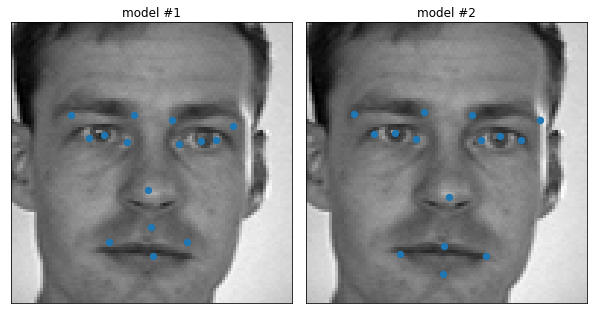

In [20]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='o', s=40)
    
fig = plt.figure(figsize=(8, 8))
idx = 30
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# model 1
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.set_title('model #1')
plot_sample(X_test[idx], y_pred[idx], ax)

# model 2
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.set_title('model #2')
plot_sample(X_test2[idx], y_pred2[idx], ax)